# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

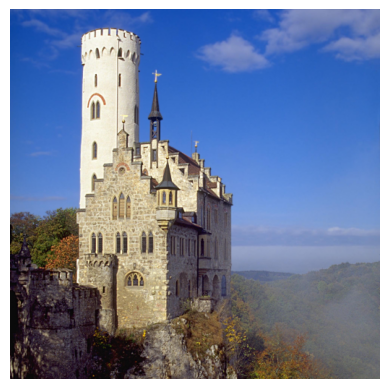

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.
import numpy as np
import matplotlib.pyplot as plt
import cv2
import io
import requests
import base64
from PIL import Image

base64_image = """iVBORw0KGgoAAAANSUhEUgAAAgAAAAIACAIAAAB7GkOtAAVtzUlEQVR42mzSh5nUMBiE4W/mtw/6oRUapEuWlWY4vI/Jr4Nylj59/lLNLiki56HDqJFkjzRgUCmQZKWP8Fx5FmuOMno19Ntbz9GH83g7ZtQR19sfUHHliNK9m629u3a/reyyi1pAl3NkcRiL+E2SskQqkuZdA5G00S6NjGykQmFsA20PjVU1okiAXqaobQFom1aJWna0URnUYYGzSXiUnSaigkjYFizmys9aKy0eMVc/0XQ8siQ3+rbW47meu9EJSAIiRE1ETnRY5/B26sNI1TNZmw2tAFs7eVaJqAFmSeKixaYBLMIKRana6nJH+I2AJEAEtwHbkpJwkQRUFRXjqiQKRQWoLAlI0vJiGwq0BbB7D9f2rkBecUkpl4pKiINw2zW3ttxULN1xqYq6W/5cbdgCgUo1/JcK5SapFyEwIImXOx7KLaLiRakkoVJX+nPad1z2vOK2TGwBeVeV/6iQZPeQpDYC2iYZjCTw+CRVV3Zge6hcBKYjjXqYsWWJNIvsY+Y8z5mxGIXLftc8nn0sf1082l12wTPglktUpFMW0Nh7VLVj2f1w6OPhj+//6YfTb8cc1ri2XA2GNe4xnOPz8DGZMQqIWkIyNF38SRJ/3iW1UGBmJFDbcnlFJP03fl/dQu/6tP29Qi/cdGnLn3oRTppLGdDd/1BzsStXNxRu4mybZO+90ufOivf2Tko8zGjQIdmSK2iQ4kGSiW1d7HAT5PJ4PI7ioJ3sMiJ1kKWSsgVNgiWDglZZmxWlYK+2YOzO4zsp5oEkOZRbwcwH1ozOoQPpjjrlmq6PJ7sMRkX32ixLfA9HBL++dt3uWS97TV5jE+lp39taQN11S0uheNotAkArskSKY5dqUwLF1UbW1t1d3NoKUmBBsQugeZfoqCAKWwQXRAPAgpCYparQAtRQqyvQRJCm2ramACpJruuqFrvuou2yNARBZ2a2pwtBVECAHZQEAhOuJIrYaEcpd34biCDFonh7s2B7dq2gKqoqoELhkyQAws0uP7AQTkW4bsXjWdqq94R7T3JLlPYRPJ/xYyIAC6WUGsoPe/4MSKACVFFuHpOnKKf8nagqKAHa/o3+5f4TUCBY+oPaKQAFoeB3q39mn7ZnN1HkJqoaoFosLXRLqxlzhQmXHU1IvDKp+romMwHaRgB0cp09u30vYQPFQotwIwJtxZjY2AlRPSHBqJF6Ti22bTVkExJnvK65xhkT8aEe9tbYk7bfyJ/qsh/OtruACjz/P8ojAWC3d7f2nkduvpPc01Lhrr2+sSZoVJIARg03BZgRgtumdW1SANptcY1BABNAKD9vrwCY/Pr9+3pXytfpKasoGKeWarOn77N468uvd78Oi2yjV4xltXOWr7Pvk9fwWs7yuhJZ9uvsUlBLs7Xtu/sui+DSthTDexldiNJOUlxsQVqLZZacuoUK2V1IotrdbaM1aS874xBLQXTPIzeK0vShpLbbPZTactsvCc3BslvblgWBmakWF9rGLOwWmiSiJknYcmMbDUYuuIaxYSW7tJ0ZYiiwu5xCVmiBVRAAqoJiuX8VEG5Ubtqn6LPyBVRagaK0tr3SK1wT66Fv+t7Va3fbfhuWt7ygfshvicD9r1S2z84Ln1WbKtxyykoFLbjlgTz4bie0par6sdaTtknaAqV3z5Qb0SIoxWe3p5bMAgqW0t6r63eHRQDKEzUzW2hlgW6NS1Zy+xiGfSWjY5O+htdknNiI0u52ASBqTLLb83/F3ymobvXpMEVuZyZwkcAko7/GX5OhbE/Z93tjx+sKVxNnvIaZZDDcUdkWF24E1N3l5tNA9XZg60PbPw/hW1sr7TMcPrupPwy07XOI+GgvbIL69LRouQOHbqHb1Uau0NLlQCkUthWVKAIFhMpz8vLgdCsAk+vrnJKzfZcFaLexqxjNOX3vqRtFqac5yykV6BlesQCM5FDY+t7++d3Xm2taOeW9pSvSUtGFLSUotO12+951YjdE9Ox0JHSh3gna1l0Wuy6C2qVSdLfvbm3CsRd5WUBUUgJQEKVp6dLStmV3T3t2pTq71N5WPrCle7ZlCyQxARZuu1Moe+ieXm5RY4JIC0ARJnld/o7XdNLLFRAFnYnd3ZXG1kpAMAxQWiDSClAW62IRPtJc/w8V5G8RtSpAcPTX8LqapM0Xu3vYhWdVK9CWf5lFAJC/i0pLpXLzD8ygUf4RktyHDaoAoAg35XMIAC0LqIo8MkIpPCz119hd4DyKcaulWhgdDEQnXnHCyMgrvIZXVGyxeypbM4lq4nKmr/Lr8IaeUlGo5tatEBkNBKNXnGTiFSMRcPdYhHer20nCdXlNrnHCJBHonSvhscg/RNnuXd23VX/Q3k3b/k2XSdL2p6nuVb7t80j6JD425rNmMlBcCBeKEOhUCG6RRoLPabfQFp/7KRQAGnov8e//8Z/A2W0LmZloNFsokzc9hzaZEYrn8N7zXrZAX8k1XjFwxbGvCUGIXMmM0cK22xYs6sTl7KFNS3O2dNnFNppEQWJfk5GnSdrucvAsp20LeCsidtvuQiTJJK90Qqg0Ze6iiIG03e2hX+05PdtzOBVUnwHc7Rt23aXtsoQYZYkoctr20HN2sTiT0pbdfT/L3jr09/g/z0lfTIQq0V3Oto66e97vAwBrKE/v3LattbBQ+y7bu6jN4taSfdwAAE1iW8BtpQCEQGu1YQYvz2Vf5hVeF8y85XTP5k/v/unr7KbCZ00NeP9fb/nNZ3n12UMAWlD/9n1FRVtK/XjaTu7hpt+mZp/zYPGOJn0OeSb9geLhOfaD2gKo0di9faArqMA4KEB7OGf3IEQrtEALFYoS48+JZkyUIov7ilf8NXldA0RGfofX5UzHygot2+qoKvBe3svX4Y9//vrD1//Y+s/16wgYo0nAwCt9uVJk7BVnEvkVfg2vNLQ9sddrrFf4t9/zX4yaCZLltq5t1wJPuvzaUbzx/Hb+E7FTWP9fXx+Fwvkqwzvopk5REtgAG9zgv/76+vWjj8PMP5uAiNja8ifssTv2MfDzSM5GRb6HaN/spefv9V1PUAaqZ8Blt6V2typ6AQWAKaOOKg/M3FpL93bdtqiubbc6i+1Wt4406nTPCjDDDA7QBDceTvS6AtADFdfVmnoAMFAAZNtHwTQtdK4yTGhzxoUtYnCv9RNHYGtpZfLMnA0Iq7btkoEBgHCDiI7JNooQbywU72JA3JvCXKs2ZNVtp2Zf4xFpYOGoIUHF0lUb8RcUd457rwQ1xQVEExgLHh10NNAi2Ecqd/R5fjzyR/nLM8zcFOboHD/3DxbZVLU4zpwRbmxbuZMkwen9RVi41is+d4ENVaV6iM7jJAnAggxpH9OP8Zdzfjn8o708h99yP7s+267WQZxsv+RBP8OzAPCzSkAFAQEE8i3uTgoBT8Tfhgo3hHimfiBzryYLwPcWyjiPl+dNBufFjQTw5jGNHp6rEwDR3zzTCBA04ww3w35uCx6xgIN4z3+oXgWUOufwy8e5ura5Prss5p2oeexDfn3NxyBcIHveVzlew8teckTn9ZrXx2mj69jI6MjIzbJR28Bt1fP6wHPWKwVQwCr6ftmVviUAlb+Lbqt4Y7cKCVSV53Kpoj694KYZ9Wm3Oswa8Rqra2fiwt0gYMTHO0FIQSAI5MbjW69rUVV0g3f/i9RXjGe4Yg3him1UQidcusJQ1tKVzwWaWFjpKiIakoFTLx0HiGKJUkdYE8apAtCtVkfn9sfdNn7fNuCxnvFUORTo2l3ruMOZSQoWZaSiguBeDPFI3Unz8FT3VADNretKDbQQ0Rl38rqqZ4LAALdjDR8zH4fXoM81CgYtnnriOaNIT/FxFFSAS9CT1+5t5if7uc3wuV4cAMietCQkKpAr+7KX/pj99Rf+5TU/XpyXr5dDffLbxe+wuzUiUOBXR7LimYrr9z72k4Lbd/L9V332e6kX7k+49eUlXx/p8XIj/h4e7p36Fwsdnz/eyZOP0kKIyDOgo7678VN5WkQFRwFR9Z2VtiGjKIEBVA4jyhY1DtQGfwg120dsfda9uPrWlM6MXGAMvY4v+zj8kUP4McxwXp4z127NLx+e2bfchHJDja7n6tRPZph71VYiAjLY1C/yS9VzddSve+nL2fTpmzf8/qBwrwV0939G/+fL9bF8Pc3YuxytRc4OBYKjPq2608++P9a8rm7HZZcb2UsnD/Mx9yrHxWcQ4+R8Nu3FpoxtLBBXkUF4xVVV0ZIOHfeTeQ3niKn2wiF2uQiYQjHykw7KU1+n/IyNz0AFzxDb7tZWKQrC+4ePY/kaGCqvdAH1ztPhzzwF2m3bljCeGu7oKa3PP1J0EG/yYV7IzGDrUs0MIAzc7j/yh4bWkScBXEVlPfbBzJx3FbldEVhSiZkJoGUnBxLB8cycq7ON89vlFiDmQ17VkSBwOvqhv57zLx/Xv/zw15c/DrxG2gt3aCPigeAvG1qQr0WzL1C/V06/uXv393hC4sZXS9RvcmoR+ibTV0EeeJRzIR74GnGYmWplKwAOj6V5WhgUb/STITszOGowI8zcwf7Gn8U5l7PwvL80aFV1uLLNSnqN13AddqeogM9VZnLyYzisavvPCvCPPzbPj+MfctOco1O8YF+n1+mh/H2ZKW6Oa36W2a8ICqybAcCQ8HW2IQToDR745t4nX38pGOB7KG+kAw97/i6en05hEIGZe+p8UAsI9JWc7v8///pf/zfc2NilKNshz3j0z+PbH8s2o1Yt65xQkiBERn3pIUrCSRd3+Vw+M064y7XsQgXS6MyMBtden9vWAiJBQXgfOMLb7NoqFlDRa3epp1tWlSe9g+ZFV1y5UcSU5TIww5yZGc4AQcyoBsHRUUfFAYTnjUvjjCMFUcIMOmrjjIy8hjP8Mp5xxnHEzW2u2ChIkGGG1x9NsSSohgJGzqRUBaIoEBp4ZiAIKbFnH2BGhYYd+/XMv3/Mf/6Y//jBv3z448PXi48zM35e/Pa519baYkjPeu0oiiY31B5RXjAEYmRU+NrwwX8gd09FQvLGl1xvvHF/FefJTwTPyxR3724TFHlCUWBAWcXxCZ6mPiwCEiRBH7FLNaDYhHQhqEgQRMMkh5sPFEVNUGecowKKjKsdOcNBimiTnWnGYJnfOxcGAXTX7bbZDKvgL/fkiSBYu9oLcCjbsY+XPz78eDnHGc7hvJxhZG7ZkxQkIKp6crEwIlkbvJu8EWABFnJPVzcxeHeMAhAEgwhAeUNAgx4yPlkERPSwpAjD4KBoEHkDRlXBPxFfb+IpWIbjoAgSBAu7u9la9/1zVajQ901DHZcaJaI2mBKEKcr/TwD/p3i3iqDVURSUGV/jvKs9SZETeAcNgBkcOaqN4oQb17a0TFhshgE3L2FjurW1671+ElWVWxvFVgxYAk/BjJw4ejyvOf/AjKoyp7rY3T7Zz/hnK1mud/tcCsIZ5pEcq9pCrAXV25huBwzmPW9HCxDQM3IGRT3j0MiMIyOj4Mbn9vtyLVQ1OOOMr+F1PKOspkg11UxnfAlSgSqK1oI6ZySIjW1T8SVHBkbUoZf7Mfx4nX/9mH/78Y/2L7/Mj4/X6+UZzwz4Gb9fu2Dn3nLMAKFwI2G5kdwwBHpw5zPbfbfkxlH12QcQ0WeUBQZU+QsCgHkSwBv6NYeHnxxZHG4bZ1C+4i8+/3h3Du+M5yHwhHdqNqOChiKCIgGA3v+iBAhkQEDHR+onKztyYFSet1BQiyu2qQwMSHfbigmqqnX/aDAI4BgUQBW1sSmv6fXil9ecW91nAaHCVAmAjaqgkr+iqJ4EAMKN7e7SI2S+EUTPqM3zf9p+cprspqPnvhMIvkIcFK2gx4ZUHef5BUWf10x4Wq3cCDZ299rdZffmSB1nhG6RQFWkiihii6Ik7vV6PYt1CdoS0VxhTl7bpwwCt7OzVOJds/59AQ5dehSAgqq2iMICEAOgpZld/T0HEE7TbsIoiBByTylPgQsmWoqMAy8dRw12ANRqcS8/Lz7VxVFEjrxuRibIZepa56TCAD7UGKzd3WmvT9yAoARBDwYQ6jBI3TccSl3piA5QBC2/XdfnskggsjO95jXHIyNHFoO4FfxGzvDS3RiuCqFAibBRpms7sASrc0QBqzkdOfqaeY2/vPrlY1+vznnNPxAGUqPnnNmd48vpajcuAEeS3aBaGPQRYXvEMJE3/ltJJ3h6EXHj2bPH48KESnTrY/DN5Tx9qIuPzvFTVKTKz+EbFYQpoHRkjtVuy0Ag0MNOYwJEY5/XN/TLFFBflZM3Qpy2FIcRYoZYqfu9ewApVtw2CFtvIku3QRRTruAq2BW96PfdGV/jMpufm/qaKoJoO8NEr7IBTVMrLfwqyBQlb9Tyhn4ZPQDSkzOh78tO3+/Gn4k2NY81eN439Vn0nZlnXvGAVQV2PwLb8sYyRVm21V8Nm7nnd0GEUPsTFHtR4N7z8OKBFGzaRZBJw6X3FX5GEce2svYxKq/d38mLMbUgFBQiNkpAVIPdLpqSx8E8KuIIDMVTyxJX74V4hsIxc1hTgDbeOAPNJ35uFVeQeKajyp21DRj7+7rMAMx4XJiZ2RpnWfjTgS8EgVgEGI1Aeef75TjD9nnt0h4Z74Xc3a78/epzyzHU15nXi48Px5GddmwULC4k0LGjryFF3cKgmjF0FHbseC27ADO8ZFQFzuzr8DHzmvk4/iHOXq/XjgBA27bXVqqO7J2aVKOKAUiLKIM/uVAj3+C7Hl8LnoBAZQyKQJB3559iAuB+BNRKiG/Qz2y8BatRteqRbgojRwIkKKAnGQHP4i8zilpUTwsKBPyrwusjWjmABF67T/n7Ud/2pTNK0NXNiZ5WfV9A2HNYvPJzz+eu1za0E1ItK59w1VXX8tvV1mVHV5o+6TWcD5LGI0NDX0PtXzT3+lkgDm4s+Pj9fpafcbpS/R1RvvrLa0Gw7r9N/b4IgP+9st9jgMEQb0QtIIjIc6c9vxCEBtRDv3LfXq+PInAGBoChLPoYzkLLBctCM84MHBWIvQLQGQU2ygsHoGHDIzBb1KIk0dRcsptyaG7GE1PYZYaHd1MRPX4h0gsKd/emX+Bx4I283AKDhYBCdru4VHPs47ie6HM56MXIGTpoaMgjIwr3UZyZJV1ZvQCRahkd0XaWFRdEWZJx22vdkFGP85p+efk6zVBboeK8CV8m2lKRRnAkCgOiQMFgmI8XuWdmd9QXzOgwNnJG5UxnPOM/hJ+TaBXV5/J5+dvVdVUhlSUpAhshCw0Tz6DfwBKJisobgUChPB1YfWb6N4ynWwmV8NTgiflJ+H96cH5lFtQnHXAbmQAJ2hcaMAB4Kj8zAlJVWSo4mlQzvnQUqrfnOupuinhmRmiDrXJhY0VtdwDjqXZL90CymSuuXdp76lwQSLgSYFI2IFgojUaPng/VouW3+O2TQXkYjldYv6/ncnTrd/dj+JhewovXuEjNxcCMMAiBgTzD4rJFxPPURdzoL5G3UoG4YAFRiRsS8sw4LQHlK8eXQNww+CoOxp19yfMNki7z4Pr4ygaxC2ykPLE38aMYwCozHMXgngHEqtqtaL2qZYmygN2A8+t//Q8QoDkxzu0PI6MzHWUtPqvY5drZZnuqtaCio+fP6z0f40sGHEekEsYiB4eSJFDSoMf8GKMwikaC9PDhpQyvO/KAERYFmLOwsVcXLC0lcbeAyBw6swyLF2/eAg1c2Ip2bUenvGCtuidNVUcHVKU2A1s2r/tIqMMqILANjjJ6xuM/RX/kqZs4900kuSpCdRhCsPh/tJ3hbiRJzl3PYZRmZ2H/9Dv5Pf2S9teq5LFn1q1KtKQ2FrYvCt1CJJCRTCkYl5cMVnCXIYDyQuDM/77t0cfh7eGZHg+OKBWijjOvwlug3d6v+Y/L59Vz2VwgaEScILpRLX/l/JMBjkflBUH4LM2bfL0ByN37e7NVRQDEb3LLiT8/8cLn+jxFkARRRkYUPz28GPfnv28H8fpogaNKZ3zIQ95mH8PDDjHjiCkyM/MYHw8fMzM4sxikdzJ4txZAnRGS9AJajUAHVaEqwShZWIeCFQJE1J8VZTMPRYAZ5SixRYrOOKSMBpJ1hr9NOOc4w/Gj9sEzM+oIKPd4vyDANqCfgHihb87zbRQgaPD6ZAEGBF/+NgmoIcOo10yGYPhlXgHAbrnp2dgIoaooCrJo29rtauGCLXWKILhlaY8AOJ2Z0Rk0dXyMAwK1u7TuurQtEK95u+UAjgRCAaCgiog0bO6eq2TjYndCQYBiHQUQHtOfj/MYbK9t88Ln+v6c94vnNTm18SSvlZkFAlDAYCJgOQdRRvHX2JBio6kCFi6QQCBx26rIcDXEILWyocYe/9q0Dulzt7xIqWWZkW5TMzJRX50dr4pABRyr3YiCASiQdFMogjvhjYKoCCoVvVS4XlqMANAGwXzWhxe2DQFoZs6RGJgZBGiLos1r1Vy42IMAXduPa/9uBrVXppDjYZxaYyvcRaF+p43DdzXdt3H5Dqrwe/ymmY/Cp2m+a/RYgRCA0rc3vw8K/VZi3t2Z+7blOQ+luq4rJietrly6ghodpxzYlqpUvp/rqsktBYUBRUXBGdprL67rYjqOwOjxSBjxXhXjw3GONnvNMDHjwVPXvmKL3d2LnQ45Pc6/dEXO4ciwg0ePDchLUqygCrgH+/f3Bjj9whXg12r6Arzzha9Vo+JrLFhLE0T8xK0qX7hj+ECjkUUs+NXcEEWxsVvlqAzuUojZByhBPxcxpxUQ7OveEX0AULnnAAQAbzJkCiASBcsss4VM2U7N3JsycmTsH/P4519dDebIwFaZE75f+/7ej/V9ed92e66smymw7TCOxIJwpciuwwFv5JfaKqr7Ql0lAKEFPi5PUiQWL2Nn4thj+OPNtzObcFVPpYSF6xk/sWw1Q9r9VgJVwC7Jq50yIIWqSAqwHYAA+TXXgbzuWanBcxtRQeiWhgmkPnV5g6ICEIB11CYBcNdFMAJIrkWgXZ0Rr4u/foN//cu166io6uhD9MzM+3X9uBJ1xFpeSO9Lui89db2M0m/72AXqv3+yFyD2xs8PWN2JPzfctisJ9Lu+YPG6JMhX249CFVBoRMBdvQTBKjagq4B2jyPEEHd82SUNqMpFYnzlnViaDoFU1lZeF1w4Hlk7ylAQiacJttHb4pt4odpqqPaKnnPO28O/9wAecmz0DDMdPaaAQUXbPQJYfunYDOyu9GHvzHBDrVq/9jMEeeHWk/zb7bx6/R/dacpvu0cAfBejdLtQEEHVh0xfCqQCSPSapcAZIbjPvrVAUdvrIaqAfmJmVOAxHvB2FhC5By9tQsUumy0odmYe05s83h5CAc6/fOjxj8f8JV4PIgGmMX8u16Mf/d1Y/Lk/Ln0y+B5hRSIlgABYEU0EAqp6ht3dK+9JYqpGPmuzeM/gQNyujz4eP/UWUSZdbAWcuL1CWNoyxgFv0nMSIQBFIuD9GA8Dilib9CIPCpAy8BjnL1RbgCVIpSIyfKCwKHbZVoxAIATEuAfQLNXVzq7bvSSMpGet5zS76C7Pf32u3RDOEYSAEc5Euzq6jBTFB0KUir3ZfaczBWB8gbltht/596gQVKrvIgwBv+JjCJQad6gDBnT3J3j7l3jB+cUzKIU3m7uzz2WmAlho3QjKhQViJRKzUBy/jTNekIhYoApILZqUAiBrSFAWWLhsDtIg9P5ELg5nvGrr2ioSFSTh78Nf82Afs29/nSV8+09/nP81Ml7KcUbmMBIsiN5FjigKiKy7iSI421NoA+6nGnVvTIKvEktA9x8WAekXv3H3u0C316yfuEGA3X6IhUBQXrfduPI2f8Auu9t1qyNlFVXQ+wnwuwkhvIbi5QHYZbdu2eDdBbdGCf/Lf/1vADAzKy9sNy0bYpuSOO4fD/9484/DH3LOEQPPm3XYM810jnOABmluC/hc+OPZfzyv/7774733J8+Lq3O1V5vQgOqMDy4JUM/w8fPMbD23962LIEmqwTsv+333PnXo0D/e+PMxjxG58NqeV/vkY7fkdirk6ctdyhtYQMMOP8fV28rHV/93b8+2lBCQeGaOHXmbOeM5nsNVz2fAjCPTOo4Chxczyrlqm+dW688Z99ZQK8ifRkm0y17VvaIGpsGjh5nTjEDb+/rjudd1qY68Xk7qtf147nP5kbupuxsHrID1Re0m/HQMeHej9MvI4OCHsTPDV1jhdvN44R5YrPfx22OUd872jYLU7dn8hn2rnztbVMJ8FWQob6dRdHe5zhVLQUSv6e4+YOMDF9+eEJYXPmjgYxjyxTOH2FZwXmzgGDCO+viXUvq3npPX+3Of77Tn0h/7vK6reoz/fJt//vF4s9nnP9/Of/7z8Z/+wduEC8yMynSzPQkWc2P5QPF6sXZXtuB1h1fIyN6s9/tz5n32EtxzyDd8d1UdtZuspwWd4pr3XXBsBEABtzZ+Qdt1XZszOskeutX1Ny+ldyqnGY7NoFZQUbbscrH/QlW9foj5G7v74IZ7eZGjd2KpRwYO/OP45x/zx5uP4xigAYdLgKXyLLRBeXOgNl5n/MfpPHxcj/fDj2c/3vfH8lyf6xWrLwGOAgG5ChKFNmVUb7Kb/17Xr5v8ujd73dqFVFQVuCvCklgv86G6z/21VqGCstxgtAs4HHk78/h5+E43kI4FlnhMgD4XxrXF/uI6dyNn5pwTLKnVbk+2ZZcSBdjuFTt7cz3bXjvXEjO60aaoZPHcnutzC+C+uqyAQSEhkM9Q63sNp+8lnVL5LdTvxr+up1e+gQD429t+pxJ8P+jzuWoEUsXSiiHci54BPlUp0dfGygvdyUd3K5CSICABgQggWfXpPnY2rlR2XUCwD6b1+EsAmD//OH+cffPxp/7zz/P24Lh3jxxVFdwd9w4MrxW3ew/4rhtF78s/gAr6Mrf03QYAEtxJtADCHX1cN1BIkvvxlmsrqeK57AbB+qnmVLhjq7iJyM39CatBVR1QBeOGotuZ2XhxfxWYmd0XB1Mfv6Qc6e4W76U987BHPc7848zbw7fDEXktS33GLCzDIuoCQ2Mo4Exy6tA5vI3P44/hP/Rc/Xh2nOfV+1AV0A6Av8QlAQ0EKsJdoenbll7fBAHo4FYtW3U//BVw78azu6PUSxBSCbHa7sTwpiz3LautHHXs2IEhHQyrpQYBQHZEAYBruxsbgaByfyEz/zoTPVveopln7QLDjckDBAoSW0HVEoEpTnVdCzmKre/rlVvxSxh+fyeAUHwN9S62fnna6YuuasonCHyS6b9DBXj/lX2/BxgCCOz3z/D7eT+T01UAfMm6EnhX+SOBXhFAqdwfA7Z+n6YGilV6vU1eeA10s0dm1302155xHAzpRsN1Ruz5OP35xn/St7MKA4t6P1YCACxhLBQ5f+HT27uTG8DPrv8Xulbfbb29BqP8RTWC+MaL3EVkJWpe72qxpdrlCddCgMgH/My4IVAPKChIqV902RJFxR3grupSeVf8v4pahp94nJkA2N3tZbPiT+CoytjjDGei59Zwet2r2dXncqVckyOIpEGj4yGHYIfGnRkfjofdM70/fY64z2t36+X5g9TFcQLa2hBVkYL6hqtBOKq19QtrECqqHFUchIqt3ZC474gA3aVfHXFlgACEhAK543UNGEWlV0dcEiGBgsZ7+xrGFH0J0xRIjF396vhmRgG2fe4GxNbz2ivCgIJudPiV/rmWAGhf6yb2qt0FbKBdr4jZ2N86vkHGre/243G+Tg6DfI9PzDD+bajqN/d8we/G7/sNOhJ4C6WVahf44GW8LLwtKHjxcV/rPFoDESIhdlcYVYH7bYG+D2JCv8pghH6jIV3R1bFrmdlRXPDDOsGA5HrMeYgsCHxIl3vtdosAGkpBJQxC/JV9fyjAwPCp0Vs1hlB3vxlQ1Zd7QA24BRA3pP4uBJSkqyCAD011r+VZW5VtQyAiFqx4J13iCCMACHejztwfCWVG1KjtBauN3Z+jfIZVLfCYnutc6xUpoAZXBYJk6axeZ97BWnQB1gUUUE4bZfu+accZpplEOPggyjEZISpq5I/Dwbdxt8f2H8uPmffV2r0q1VGpVZ9YAxKwGCJNdYthbABAlJ2x3N2NQq0Wj9qBhJmmgGt7OgvB4rWrI+kMK6D3JWbgoHDpAo2sKDIoUGCO7DHJYcajx0xAHee4dgGAjA6upjpHpYBHC+jZi2h0F6EGpLY9A+6F1/LcLcmaTWrpaoFzk9dVh2C3ikIVA118LpsEQl7tkycOhSOP7zw4gNzHP5PlwV/bvjvtJgMTgpEE668y0RTQpwBC50NNHu6Tfi0HCZUabJuAcsBmgWB35QCfROqbLtKvpPqui1KAWIvzMlwAQfCe0tZ75H0A2V6tYCrgwIexC84A1ZY1aCiKSqnMVNXWNR08KOxNeTs8x9fC2V7PDwyOO3Xpuz7XLt/feMApNo6BMSRuFgA2k3D0zMykVQBFiVCd2ya9gLK7MPzEBnf+4baSRMSvcGtdYFsAD/iVknZLOcDgfR/ZzLNF+7x47rw/e2YBObjtJqNnIY5xOGfQ5zG6Gi6HPHXGuCEhRcEQHB1ajKrd3KbadtuNAojbBokFGAKP5xItbmpw1xmBCHNhh7LozMLRE073lVwBxXuzdeAx7oZMrNTuqebYDBCxuAGc45kBZztz+V5c1/6avFKr7eZ5VQYQMH0xoHbvBZq8ZDSTChgbneHQ6JiKCEjXB8NKUzVlVEAEMeLGo4MiSBT13Csg2SHpMZ7HHBk7egRUMQmEu06F44yjaAEdJcHdiwDUli0IECtg67q6WoAGpm2ptkJwgPkbAAhEsR/TUdHi4n4YQ1vI/w9IgLUEAM4t5Jb/G8zM5z/gO15CBPZt4qJ/d8bil7AmIb5D9SGwBElVfTbk93d4KZmh/pJEre6743EGBbypxucxAlzXdY/hatUZwa0fT5j9g96nM1SNiTLARoX8hDTyOPMAJ0z91JP5l5LrAXZXLe74/NssyL7JOW3c+uHH1+WevdgI3h++3Fj2iuJ5+bx6v/pxpYO4KkUL7EI09ZjOcLx2fIjxGxRApYE3wk8BFtd1VVXwof5XJQAWywBb1OOKBRQHLqgCwJQAbMKura5YJjzD2J1AEdsSwLNptSRnZxwc2HhQXc3YRnKIUhDgUv4YORK7/A/Sr75ywVFvgy+Fq66b+hEAAXpTFbVNnZkjR4Y9w2MYdQTt2qtpFwYEgRqZGudveGwghKiI3PWKlQVIOqoAo1dre2z0wfM4Z3qMx14x8lZVICA7II2MRRCCILWwJYCowz037S23YdUG7a2NdgKo5xxAp213ocWgAqHqos3uDkeJF76pvamA6jsdXwXuOARER55I3BVUQ7lDEX/nBD+rwN+jAnzdVBGMu+e906Bvv8VX/VKy8DgO0sgG/P7LbRL4P2ez21U/nw/wNT0q3s80vS7Oz4+RBKoyOmM3OgBUMkBb7BOvy+hPfT+caxerHUcGDXNZAPg4nf6QMahPb+xuQlVpN6vd3S9TL0U7MNGVlXoLAdnY4DX2XUu4XuN3Wr3VbLwvG1f+xf3X5+V73jT3q2zd2Agehzf2TXpJyEwVSaV+SLiRsMsMbMztURioXiU/n5+/BFQopwqCx3NDg+B4F56oe6HkLBFte7X0WLTtusXLs0WBTyoGJthGDhzVRcz2glVUPcSEszPNOOmbC39cvDds+blwRBwqvTfrEGfmbjx84V82FEBxOPK/O6A9GBmNyAeWw4S1Feh49My/4IPOqBBxQTXXxXN7Zu1ugNOIoJ456tBDH9PfHx6HxzgDUl0zu9EVgaLz2vWkgMC4dzcIVUWFupcoCJAQQgijKYAc556gKzaIHYGEQKL6REL/fdwDMr5FkKQCgyL/LzAzwJdlmnwFZRRsgbhh5t6ccv7dL55MVqrq3K0LRAjuKGr/XQPV30YkAbt7jwYGj6MtKpUSW+wuME7CncsTQuZAV1z5fl2bjNCFx5kQKkiYcx7ToZEjYePd+3/QiDuBqIsv8Oux0JqCWlsMCIG9RwDdpMn9NiH0uvlEQLVLyxXP7Yr35e8NgOflRSGsAGwR5WYW4Kozbmxt7jbQsGQLzEzga3aiWTJAhq3apfiM3QAaoNi4XrLu/6TuL8McyZJlUdTMfUVICVXV1UwwDJthZuNhZnyXmZng92P895iZmWCf75zNzATDTM1QlJmSYrnbm7srliIqvtRkd1/27q9bKQiFAtbyZe5mlrz+5/432AdzlqkRI5BobAfFSDMWysxm142USzuFpAFwsa0l5WTntiroR2VhSWEM0qy5n7rBjYU0ZBCbwNkG2wE1goCkxDw7SQCJ1jTMDCFH+aK50dI8l4wmZocaEGRKJ9y8uPcFfUHn6AgnqZRyl4xE0gRL1QiNKJHBnT7m4zkqcsBc4ug0oEhFaLR2QYLRITqUoiImijrXicOtukWx6EwiinPIe7t6Kj7Us/Z8c8AQcWLSIAvrUsUEYFvzKAxGgwXqkXKjQIUN9CqmwHHNqYQlLIQQY/SY1tx4tXm+TinnAKUEATAhFyRGSdOKMier/8uyV5IH6gGN3nQJ5Va67OMiJ5GAOb1Al+n5TCh8+8aYsaZNU7IcSAA+q4S2LaQQJCeS1FXtnjkvITyYRomHPYdbJNIEA7kcdEB6EoKWPaGYlCds9u0++5YEUsrMRSrb0jKicRsNaN3dcIMpnQi4RvBATpmIlHIypGysb5jJXCQgFdNR5+vOO1cxdC4zdZQZMZ5XQmmsfWE34k3TKmsRGmuBiRacsYIFy8zLnNwhMNE+FpfOhcwwaQ8dZ6NatgaLGZQ+N0XPtJqWYiZrKsEaeX8CyFAmBqOwD0oPNtZDXbFVYW/pJrcoxlLgxmLwdlrMQEOZzegEbG9PopAyAhIwP8uCEilUMaV5SbkmG7DOcnVHBExIzGawJCTVGuRcomssGix75+agOwk2s3rtEQwTlkG6WfSw7GhUbbhWzjt2ZaASDDGVAk2Iydl3ErXD4fmcD6rqZqJK5kan08ysOBkKmDBWidsEwH0Bkm1ScqaZQBWIGX14QUcLKCAUkeWirHdkPX/rddSHTvr+ycd0xA1iKK46bKU7HXHr9u3z4Rk/+eiNI930l+7d+jzKtfPArXvbxGqz0/VHbw56eIhnDGVXQtgJXTjlQcmhrAAKaJIJY218bBJJxYy2qdHunynNUZE9kjGH56YqIrmUvBckHEbYmblMrFKpy9YEl8LlU9PNf5TB0Zga7z7aj4VwMIQWTmObioTE3P+daXuOky5pc+LhDlSSnCX7l6bM4mVrLxOBwgRlYxJvBEhYgVGkCNJYaB1hbqBCWSFKRkSGAzAbWzkaHujuIszgZu5mDpvGk8OEZtgl2gqaSNeLgkHLMtrx16W9ghIozKt44yOjYb+pWaSQiRBrYIhMsaZCqKEQUhQsIcBmgNXcbNzQCukRqGrVbEFJkRDVpPaknDWcSoA1b0zNrXzFUUMOVMNDogFc8y75lI1SoG4Fs5h8DOYN1ND0WJIQaWYct2TTqpmYdRJL8yGXLWBIYsTcyITZJEadKbhGUMaYbnlU3MkwZkpN+lgCNLadJRhiBEMy0IGY+/yQiVlw+plNe5bNqigyrYbkNMoMIJAQJUCZKSZGq2FSlBnH89EZiDSHE+MCiQEDDN364tHrm9Nykee3T7qzErd0/ubtV1//+lvZH71gd/uTsj46/+xRR7qFwuugiNPT03s3n7+1G26s9A//jR/9mR/79PbOGz7wbr99862z23fubO90Fze+r3/0idV69/zx8PLXPzfU01it06+F1hVHjlUghEgrMZnwNIaLT8NFqM0EqZgrrjyoRY6GSC7MRefHk7jUZXfOA1ia1vJSFP5bGcXMN7uUAzazSz6ynFEOQ+fgpd26ix84j8zEg2FkPnhwFjfX/DACMGNm7PfN2mzrNHI/E9PvvxMIZU0ID3YFNuLS3L/MZoutyKRNbPxlJ+jMtB5gezguoI0wRDEWojMSNMLvg5YGdzeauY3GEmBE1rSNNAyRSgkSNSsWRIgkCZmAVkmjyKXx+mWrpQWu5aPnkAgZoUzNOgY4UTuwr4FBurzAqvEfouG9BeJMlVZT2YARjEQVh8AuM9X64tryUhwh/UyR9qB0+Xw4FQkKJksgRYdJIKiUGdVkSGUGyEggMQVJV6qtdTLFkU0vSzClmtAE+hJqF5tZeTewKSlYKyU2rdylo2YszTFsLDRVaE6Ib1LIcpMSoRHacsqVbgQt2K54qhkXt9YXsKYqGWnNR1cJZea41KXtb1RJasUuo4nZ5JoTiHalsiZYc/RJxegTmWIiAAOYmZlwwpr6jrk50029X6w8+g695bDZWr39pF7p3vxcubjz6BNPXX/soes3P/TQY3/65bfu/vQv/tZu69/9XT/4l//KP9l3Yles66v1rnjztZf+h//rX/YoqxN79iMf+Se/4z+nOEFspRw2m8352RtvnP9vf+xLt9/khx7DR96v/9snfuqrXz8fjq73J0/0157p18/SH1n1NxJlG3WbVqUcj4UJmvcfBqZISNDcGGvOLfuPK8zmhq7CZdGoGW8/punnP5hCQoskecgq0HhgI2jQMylQMKKYmWPPPS+AmwVyV6VULBJhYCTHGBeAvmbTL+/HHEBSPjiHieAczTJ6Kexda/eVsSdpKkWdw10d3c2NhvFezEyrg4aaltwIu6AmOv180jHAUlFotEnI+rKYK24Smm7nlrCPbTxLa1tp6vIERGQidajyP5X6I2fwpibgRkROu4QUa3II7WpuQyEkOPq+7i1vYZBaL17urxnCZsxnikwoINP4G4VUzuEKzYxpjajksktufyEIimytwUBN1VBmkmODn/tYUZdUiNzzTUzWTj9FtiQ5DDTywYk3Jc39xOe6S2YUjKRAmQkpKFshZiIcQU4Y1TqUzRvCYMgCd5oR3rSUaQQMtofkmAlJHTUwdo5IeHqmpXIYIUpzjiVkERp9LkGDgU53yJ0FxSAoyZSyJiSMrUF0Cg4iM8wFgHvZPu/IDrlGHJM946i/WHX12nrz6PV79e7tL37xy1aHPLO/8Pf9jY98//cc3XwMxcCOXH3yE7/xU7/4E/V8fePm6enTL4ibzEEBU6is/LhAuyLvM92Ps6iGqoq72fVufWrPPv5k/1PfsPrSd33bEz/85/7M8++59us/+9tf/vKXX3319W393K1Xv+p49ON/6i+ebezVW+evnvvtTb8VYK4MKiE3UkQlTKgKjK3ZBhDkflQgWzqVlDGxRBokLoiZuoSAGtgHJwya84VjA50uE+PM/RqcENFiGsrGTcz1fy9N2A2c9cak9nurucWLEuD+nzSMwbkU3UGeqIIiaA07bVn/g8CMqUFMsvk4HoAbCLlFIfZweU+acSeG0jKRSgmkCINEGwvQqUvFjR0YR+LWVkZyybOlaDJkBzgI80KtTCu3k47rzoqhkJ2jlHHgL7ZP7CRANDiLuRlRIQQYAjqWrjRvnGwexQajzGF0gkQe0m+YXUvtuwQ9iFgm2izAhueS2q9lJOWk0C0KomnJwqX2RWA1TCb3A5uJRgoWQoohhbhLbMO2TcbBWm8hkCBSSDT3q9l3mU0tGNZktpCCjRVpkimRomCEg0k1DEWw6dJWQtpzxglRyYRnShqRjZRShUqnF5p7y/TSCoV5Z91hCfb5FfOt86YJMhPaj2nyy/N2cUJpopmlACQt9234yJQ6n/q9BRgWUr3mBgEmISnJYjx1Q8rYDoqAuRUxoFl/BW2UNi8EzTIjU0pLhRnhdIebSTS2gickoVelaWU6LXF8ZCf99okb9Yhv1LtfOf/aF75++6VnH37qj3/7Rz779a9/+IMf/K4//ufs5EQagCAN5Nn5ObO6oi8CmNIwDLnL3sFShmG32+7qUGMXAIY61O3mYrNxWwNYH5WLqPfu7l766ktvvZxi9/jz7/3L/8CHUkPcvX339r3f/q1PvP7a+T/0T/zQrXv3ful3f+cnf+VripsXQ7/BMbtV1Bo5KDC4BckshqIEpcnN6lIUm99aOR2HRfd0iFS7fPbg9Tep0X0rlu/hZp6ZYvYVoeVOcPEESUmH8PT27cuak6BMjX9qSe+frwYMKsZiLBQJNzejM42UGCrKCDIkUfuiLrWnc+8VAGOxDzMDcF6yz5BRvXNl1hkKsnf2rnXHvnjnVgxGFdIdZnA3M1hz8cUIpdqoYj/Whs3NOvPWOUpzRCYBc3pjFkrIWWutQEnaN8rMdT3B5F6UZDYBSDnZBVKiZpLfjR8735QygaW3hJZXOPeU6LHvJqmGNCCESMb41SCU2ayCGkeL03gV+0wp80GqoMCGUEVTaBJRIFqDAskRbWh9ePMJIFuSreS+/hG5uAV8otKO2GEUXBWtEIgrQ9JSOHPMdmymiEDNKr0pIPaQJYqZQwa6RJEhs/2bLdTyFwmEu5Fs3PDmSQIEA9RYEwEhJhQN7tCc9UMooXGhYl4sM4dByKREsRiLyQyZMACBIJRIyNh1Xh9ab568Njx+fHFazh473X7pE7+0GrY/+kM//O0/9C88+23f/eprr/L//n9Z9SuJVR7be0B0nRVH1iDkJkMIHJmKsIiwhMQISYgIkhkZdUcNdUe3VVa/2GStZlhd3KtAt626uNgeXT/yJ547eSh+4NFnN2d31zdvPPXw8XedH/1//xf/NwxPPvToC6ubzz725PNnd+PsbnfvIt8acJZWUU0muGBAgMjMed872lkjliFdrnVD8mBD/YIWOxsfObd40WUIwFzf4rCEw9z14vD8dNjvm7jyt9DsUj+Axr/hbGcvWRWxPV4QXMxIpdtoQeoc1RQMTgKUAz0Bt0pEE9Q2MoSamQlwUQWZvigzFxSExQ80WjF0xq5oXXjkXBVbOTqDOQkZ0mfNTZlphCCS7rMB0yATMuXq3Lx4byAgFQGSaq2SnDTn/oRGimxVpKaE1nQvqOnE7Id7AbYf7MZSJ0yYUKDWJTgpPErcD/2zU7XXfrkfnM/MnBJHCkhZiKkMIYQAY1Fs51yGaHy8qIQFoJQT2E8AZMiGHKENicUIEqI1Chpby4ySmCx7la2422jVs5/fOqPcaYSZhJAAoBSALDSCMCAJ5qFGoFlD7jsJAZBSVDNUW+hVaaZKYeAogUkVizSmwROcYmZrkErVuec94AbBZJCR7l4ToFl4SENGKEmLeeu6MLbpQ3IBbs4OQMjIYuqK3OUGUQYBYQwxAa55dmN177nT14/PPv3szcc//oMf63v783/2R5584X3l9Ca4DsdGr909u4uLqJvN6vh0yHS38QqvuSodHMfX1mjS00430lgitNsOI5sbMLfVaq3ICHMjs66sq8NgfXnuQx8QnOhMWTeRqwixur96781Xf/HHyPV3fud7/9Zf/VO/+nO//6Vv/Pqdl3/j4Ytnf+i7v+/hxz/40pvlE189/8wrF69tjqBC9c6SRmFaZ+kqiPydXA9L5WQuEX0CuvJbRAC4QvmSfJfI/tV7Pu3rpZVeSeQVmqALuHuxw3tCuBNuUCYSE4lV7EYlVhiUbPdDoIkG2SFTMEnf+liRdNCYRBhp7l7MfWx0ptIgAwSH2HD2FEWOLYtspIBitMLiBW6lmKtK1rwJw+jK3BMBMhUUpJGBycl9Uc3SVzN+k/bFqkRqamHKWQEg2/undf+k+MZ9B/kk6y8xCS5VYF2w8W0UpGYKG2AK+5ENmB9bHbAZW65XgMkfxKBQMjVB5Pv/Sk5YK1cKk+XriEUr1UZFyKT5HNYSo6k+MtaAzemOkhjfaQ96JnCi+NK4lNU+wG+cNxGxmQ7BFAiKSFLgntaEduSU41dWIFKE3DC6xxkcdNINxv2OKSNrCmajNmEmUK3VSAxyWpcEKJeALi0CO7EG6ii5MlahjbCxrAMvoyFMMTOjGQsTDBaSKFQlj7Mc2Vtdfun69sv25le/9wd/4M/+I//Yl77y2e2wffIDH/bjGwkR4VDfuZdCgCvS1JU1CLKHUJgdul0O63UhaHC3Ahm8p3W5dcBCAERz1C4zEl0wySzdqvDY1t3R2q/dfAzQkOTKxG632RjKLnc/+xM//vLv/+4//e/8Z4Pr7/ojf/Q7fuhPvPXqrd//jd/+xR//qZdOr/3pv/iX/9RjN3/9t37jv/bf/P+K383uuRVYqVAJE4wMA0W2UtjMZWU5dpELmTZJ36pSKh22cCUg6JIWxqXmgmYZHHnVnDE9Nlwd1L5UQc7MYS5t3W8i3pMmwUyweqZbebj9BuBeIs4gA4vbqnhf6FASISSyZU8mNxg8gbHZA5rzZhWCCUhiYsMsnXBEIGGt8ANBZDjlNAdMYw0QYiRIpI2en2igDSSKSIGtN5PNitxkkJMdAcospX0lVoo0UuaZCiWJBCpJ0kUzgg25HUdYJXOfJjI5Ez4OiSGkSGVKKeT47nmPt4CZvyQmqTkRc+CR++tZmgyFCYKSCBcQYAqRSFlT71O0I9zap9S+RjnJ6rogATGpBrRvRRI0GJWQYCAaZSwhWgJdjr4qZII5+ZjD1LaEtmXT6OE4DdcaeQEi4DC7b8/JMpflgrgAxUjO9dzffhrIJaiq0EwwByKWWV9i/y2MyFD2ohuLMbmnqMBs5LvkflJL7NU6KdrYZwt3UghLwApKRlrNHURQIJVGubEv7I1OuclGVvDUmmYjHyRhKK6b/sbTx350dPetL33yCPmP/lv/2fd9/Eeqzjef/wSG3W63OV5fTwVdAq14DrvV6SndI1KQwQEKGmCl7npsVicnQENgzWT9jrgY3ix3PnN09vJ7X/igWBN93Z0J9OLmVlNJj91Zbu6Vco0oXX801C1BZe8oblFYhnM8+vgLmV2tbt7deOShP/In/9j73veCr1aPP/dsGB99pOvf/IPtS18pz3wMD70/j95DCxqYSUpwiIRJFKS3kSDn25FcPsyiaryEqzfSXiWuDF5yLV61WfDSHZBALq9w8m3uFdtmdaBJ1ID7EPxR1x115kyTRJpQI/dNvK1+R4ImxMz4nQkhBCWMBPNgtys4skyddFJIEm4wygAHvPVIRU1QcDphIECffHxEjnwYAfN2eTMWc0BgCpliAysmTF1A5ETudKPGapuAoKBRrzDBmKzBco7nIKFIZqPp16nhZAyDZooV1JyNBS7Uks3QnpnpBUxXJhvuj2wVXxJmZC61qwjcf5qT/TtFxphIiRzfsxf2M9DMzeEGYlwhZZKGURefIHLsiUgJIhs4B2iWRhkhghhxPzMa4W4GGOEdu2K9W1esLGpZizR/9t8rRKauuKlISUskdAkyTNKAKQhJWjaygVMGGGQGLw5jTuIXlEgIJBMY+8qMTLPZ1xl6BySDEixgcbqhd+sLitMcZEKEwH3Pi2CwgjDbnvrtZzaf+L7veO/3/sj3vPHio+/70A8+9PR7o9vt7m4gIx2wDMEYIS9+fvduySgkYaKZQUpSQBbtHuvP6/HuqB8yh8iBlBClhoqfv/HSYxdfu756/SR0fud1Hj/i5knVWiNifbzW8Nadl38hbr++Wv81qRoLUS82Z47SFS/mx+t113WlrMhVRnntxdeG7fn6ZD2s8MnP/dabu+0P/6m/duPaI3/uT/7xH/+Zz3zupZ/LNz/50Hv+JB760Jn6TRYpATUO5NXoyvz5xRW1CB5ePuJKc5Xlp0Dy8Ktq+bUu+dLD+MylTl4HWlPad10FPV3xdSIBgwzoDev71FDKpRRqijaOq0oR2nOlrcHfTpKWBimaTtjhu1I0wJiFKNYIOIKNXXm4j8QCyAhliIKKqEIk3C1JczM3kdMPFyZnu7nCtIRMRCrFBOwAkcLApAQ07q1af6c0lYuoZo+bYgh7BpZJ4+isWWkKewMaStM4lrlH+E2pfWNIzL5qxL0JzirEkQqpjtZNmgt6a4rxIzQWMUfZDFUwMSN2cD6sti4XM1jTuN2vuUMkKxMAKgCTxp9bHCun7WtI5CSaQlBJRUq0UlzF6KQR5uoL+sLOUd6Ra9IVfkaHNkXA2EAvLuiRwhhqXepoNfeaEFEzzeijEYqYLAjSzJhiNrIcSYkkM1HARJLZChyAgoIjO1Mxg3nH7Lzp/5i8oAEVD3oCigXeW3R2cf3sd59/SH/mb/357e785Pq33XjmyYqdayjm69XR9mxXSi9QCRgho3jUlc6MdDOPqIClAqlnnn6y//N/7d5bb928eQTUzCpFZqaqhqPr155+z/f8AK07z7PP/s6vv+97fxRRa9bM7Pse4rWVf+jR3YsvfvnFL/3ajWdumh9bXfWdducXpfeLs9ub84uInbu6zs3KjZs3t5t1WfXV+1de+ZXf/IX/8xd+53Pv/fDzj7//u36we+roN37juZsn3/0jz33qjfqJr+2+emt1gR7QYVOMQ7WipTv5lYn8f1CQ/eFcRHu394P7cLiQwHahvv174dINSvpW3wuYYGQhOwtHOLRy6+gCdpFDzZClLJGjw5SsydkSQkp7Gm0SSNmynD1JfhJ0qgdXBaVAUK2WMZIii6m4GUVQk9gxYVSjT7izOJ2Y43VKpSCN5rKipFadTc9EpARw6m0dj+1M6d2ghva0CUCSQE2iHRSUTagqsjFvW1tOiqmGvECkbO7hMysiab5CnFcMOKJBe6sYqlWqNXpik4Bysl6ZhZEwttSeDkIU0MlrKDICyLnBUVvYZTIjE0xDAYk5aW2ExzMAWeOVqCdoKJOyPQrBMVAU5paZThWXG3ozM5lb53CGkQWZADnBsOIcPRPblDh3V7g6EgJn7diX3i3AsutjT2gjgTaZE0xZa5kyogpmKA4CIsesvh0vI2NkPUAiCDaaoBV0cIFm1hm6UXxNZnuLFQoG+Z40RtQCdUjbnj/MzT/4L/1b5frDr3zh1aPCzM1gZVcL4KiBIZFGFiAi0izi4vZxlyfHK8Owiw0CZqi1mtkTL3zoqec/nHWb1FC3lBsNuR2KyHzh2773fd/1MaHUszeNdWBEV7YXu4gYhiESZvgTf+LP/NLZ7sf/Hz/+q3/wuX/8n/nXrRyx+unp6SDefOjmzesnX+IgPw9bF+bFblvW69KtsInMlW11w8vx0bU7u3zuucfO3njP00/d/At/849d+5VfeOONL37pa9TR+42nuZ8KGwx6BQ6zLIeOH6FhWcad4uqsn/RLHZrmyOShSoAAjiDutxqg28vLqul+oJoxgWYW4C04cyZZVlZnlo2CCBDa03c5CZjLkG500pDF2BesnCD74OAM+RAoVE3UBngGrKa2QSXUNkvSTL5vCJRahg0nnHJDIXuzVaG7QBWiUim5qxjNQI45KM0AOEWguHVON3OjE0YKqanlD5lN381YFXt3lBASTCQkcMJbXFQygJyqS1QqtY9EkziSxhqsxi9CjOASodQ0B8xb42EkaM05YPKlkRggoZmXJt0NePC8ARBFSpQQylCGZI1FP/avgIEUZAJEh2N0QAHHkGSVOVREZoBQ0mzkRShBJTNJsgiZlBOhsUSaOcqLRiITsLT787RzIBJJqXD8SrZwMyGkJOCW7iwOG9kbIiGhTMsPGKlp4UZhDixBs//yygQqOb3b5qCqLhGDVCM+z2htLZ3fSxCRwJghRAQiStCdZJvb57wiJWEupozjfXGfue5NnQaFcIO5SBlmTnLgXFzT4Q5bWz0q3V/6C3/r9Nn37PKMWWHHyt6YtKyMjB0yrXRiRuwIz9ie3XrruDsmjEJByl0SqYghMwQBMHpmKs1EByFDrTKTlLHZKkkYska6u6RSSmZkrR/6/h9674e/38J+7bd+5sWvfump597rGGpYpdt26FcdLra/8v/5/3zwh34k+25HFKlGrE+Ou3VPw8f/6B+//twTv/mbv3FycuM7vvvbPv3ZT/2X/kv/pS987rO/9ztf2XQfeOSDxR76ELoSbcl2pYqZDqfApA6i8MtmysPyL2+/NjD/6sYiIQ9A9mPkTGRQknB5vqMDbmM2a21aBqdPkti3ecg4VvuINGahOuP93ofO1bm6DiTk7NwyWRPRlZoKWWAEQLahrMSgGkpBRraSwAgBtz0ysinORjG6gUZQJN1JUoIxOqc7zeio4AjoOWQkkWQbE9U89ma92ZmaJCdnNN1AG1gItinVDC7IEBVjUm97bU5LjTHTIhHAcW0jphRQZkKUmEAmIzMAJJF7+paJBNsUTEGWYkJBULCUkTQzI5fXdvtFZICZCDFEEUGGKEEwgRLHYq/ANBipcIcLbnQHDSl1ht5H3ZqUEkhYikEnmcwkimCCUWbgWHBOSZa09qNaXxizYisZVQAjSqFR7vsFVTPpQbrRnU1XbnKoK7OG7EtWz1ev+g8YrpI40G48tXlw/tklKjoJAirnEugTX7SGIjmeNsGAvQEfwNS4UvNMEkY6rbjIbG5XdNvz4jlbDHK+IhTTWK+t7n7fRx5673d8YDdsa9ZVf5zJTCTDHamAYXXUw1BzI+3ceiCf/eBHv/27PlZWp2l9wAzDXhp61JCXKwnCTMyUUIdq7plZa41aYxjMlRqJhH3fmxkyixh2dO3ZZ0N4+e+9dXzjlSefeMJLqQGpZuYP/OifvNatPvcHn/76V17/o3/7b/en13rjvbMLwo+7viu88fgj1Wy1OoLZrWEQ/fab5w9df+HJh86//LWv3f7sz974zuvuT4StxvN4FQBCQAdHZF3xvsPo/BXg02Vl1UWpqWV/BhL6VqBle8Oiq+/q++EwJ2AKzuT1aQBlghFOdoZCrJyrYke9Ha/sqMO6o1mShKjikCSGGEIImXkfiygDJLGmaJmQNFnHiEbLqV4AQjbSuNLYjMZlEjB6dFtxOuFGpz94BiUi0Jp/QHDRMwizseoYiZz3nor7IrpZkmkcMSYZiyMS8ybvJsrSROmJ9liTPbUQzZxIYwFANRWizYv0wkz7hEnTWEJAKscJ2M19cbpH//QUIiVDQpmIVACaShEE/EEVxbFyWKCeWhd23UjLa2ikZzJSNTNCQ8a2YkhrFDoa0yAfFRCkRDqTSKIYEkgx2donE4SbOw1mcFdxuduoOU81frMZMcrtmWx2nEv7zTTyEpK/5l5aIHk4a5sEuw/RCJbWSYLagVvopLgm7yAYlCm0PG6mcEtAmu8ptH8hR16lA0Y6UMgy2lOCNrPulR6cACaxdTITQ2Lz5iu/f+Mjzz78wp++2AVh6/XxMCRgmSFV1e1x37344osadmAHsVYV92uPPl2d20HFqQjCItLdzQy5iZCxN+uQUXNDVZNLM0dGwQSEah1Kt47JsgP0cnp6c5sx5O6v/gP/2Kd//7cvNpuTG49k5LDdrjq//uhTH//rf9/H/sxZ3j4fzIfOz7fnEI7Xq6cff+zV4/X1mzdeubiIAHKQWaZT3frk+vs/+KHV0Rvl+jNv8RyM1HjxYTZhLyuu7wQcnPPLdMjMZGkjw8vLTou68eUUMIE5LnJJyaZXDzrI6+A3QpcYCbzNoghoIJFGNocDONAXOynsvaxcq87XPY966z17T1BkEmUyAaCNXZ5hNbSt4UgISFahpuaOniYKIggwODkKZ5KCGUWo+Vqaj2LsThaDcSpsAkiTxoEzBY54C2nUzAYYHFcM40AZ0cz4JpaDGetMthoyYEzFSM40nJNjO/8eTshxlN+ngWlUKwDE/VeTCQKzLBLaD19qbSZN3iFH81XSjJey50RLtPJyZGYGlATIJgSsTKX2ExYFGLHq7LjDSceuM3NIomQ0kIBJqKma2g1xdjFsqkTAzbgnQsENbgmaSLih495zJsUQI5EgSDMrnTrPztGXPcYhp2gYW5VgZOPVzpCeMid1cg5rToQVHapcLRPDCetfMEenPzQZ603PsnWS2fiF8nFV5iMVEsLef4KaqfeRGpflQZpgEIXMNBA0Joxwwh3uMKM5oQk+VmJvBcSpGqRJDFirxG57717uzsMGL71kNSmADAJZ4/Zbd7w7evTJZ8wdtJAIZgKCpRhZshKohFmBqNz3JChiJ4KEUpFp7kJqdNtIUZnqva81vNh4d4m2OrrY3Pu1X/2Zn/3Jn1hde8JSn3vqK3/uL/9l71clh8gchvChp5V76xzqloNtN5u+9JHR991rr778qd//ne6RJ+j9atWvhrj+0M2vfvEb5XR17ZFHf/gDH3nqhQ/+9le3n/xGhdyUQuoqrGbe9rG8SA50YhKcUEYdqqZy3jhMXZ2Ac8pZxqLjuHXxcMGWAA+m+dL8bdKSyiVlKzXD9uVGEM0RjqCmryFI4+gIuCpcd2XdW8dYF/YF99F/J8lWPmg9kIVjOpwGs3FbBgeUgKBdVkIEqEklbm6XJDEDIpQI3I80U7FGk2hDfeR06ypz/HjuKWBKjiaOmNcNyUyFFKnIRisUCLVBnsb9QCE3a7CvAYpoGD3G/p8UExQgWEgT9aHhToJSavXYPa4mzA3cyAYMMCGJav56NNIoTZptNBipPfPFKFlG7iJDkzmTxHa4UgAFEw0ojnXnx71OVzzudX8FIMFg5CTDe//4DD2POu4qhszIcXozws2Ks5BG3wtGpNSlQkrZEKPtjEGdaVXQd+hcxWw84ISbSLCl0jTbO4yhqU2X1q0BIAAuJkASUqYwvTRn7y/U9qd7fXlLz1vxxOnCIqaimRHuLBwpwaAlxuldomhEGS3D9h5KYBuwKaNBVBplmR2towqzNyuO0qEUuTtpOaojBQBlywonXyxBarmehGoi6gn5uKsCRzWl3AmWuiCtt9U39RXw9DOZtdI4ct039zN9gqAG1TaneiYpKkwI9ypF3sf3vZNRSkgZw6rvou6ElAh6KWA3ErtXXWHkZnv79CQfPjn5tV/5udTpi0++ZsJf+Ft/3YsjELudWC92Z04MtXa+6sXc7QaPJ5975vt/5If/u/+N//rzH/neH/wzf/722d0atZRCstgqi79169XX3vjc733mxeHhPx/XTnpYCrgM31iif/PHreyG5cibaGGgyOl16VIHxKbGNptdeFhqYg79ECBbPz1BAw514/iB52HTTyPgs/bTWCIkEkCfmlVorQA2XqeUEQaQMsCozrCyLF4658rZuVZFxWRmRmuglUgFSXoT+ZEoM7mzE10UDUSx2FYbAikkVBEpCN7OGQmDLDBIOexN5IkiMm3sRKY8YTPJUHJqADJZb9mWMACR01mWgSlWqaYikTni0CPSRAGWGCeMVBIGwm0sOqbA+x9hgAk2V+3MEEPIJHJiz2UEgLn6j0Ewatb6JTIhyAEIrdHTYKJjpB4nk6Sm6RIBAUwaTZQkhFjVxMpk0H6U0KiyCVHphuN1Xlvb9TWPOutLuItsHtyUme3XDRIyse59l1ZrRs2h5pAJwM3MrcBo7XaSKDnlUsBIc2Qm3Ni5Vs6+WDEZsfduMxuBT0Kt9GKLhL7M5Jpt0d1Bcl5JG2OG+y8mDAjvOop7DxWzYihGlkwphBqRQYEgzNINNnYgGAVxlrETThqMkON+cyeLW0eWwtIZKdLaKjhDkpjjh0GKE4ND0Gh7TWTY6olnP/j48x8QinLH3dnrX/vijSdeIBkRHHFAAEZYZMxM1dvc1twwMB7qIhmNJMxYayUNgJsLlJCK3W6XxE7J0sEQEV4pyYzDboc6HK/Wz77w4X/gn/6BT3zi32Icr7M7e/l2PdscnZxc7DaZimF3frbZ7i76vjsqRICglN4f/9Cf+Ysf+Oj3/sZv/faXPvt7N598/K3bZ3fePO+8rIpt1Z2f23Dur3/+q/b0V04+/FyUa4JB+e4FIdpxeHemLtSCeHUV/CIIWtR7LytN8xAta97DcyUtYOnEOxZJwxAESRvxH8oZHdE7igEQBRLF1Jl6U+/oCztDMTrlD7orGAliLwtGpAFuoFsCRw46V53vahkiI7Ud4iK4U4Qk2D5xC9XZHTPuXAhMCaiQQ0bZZJ5hZqIIpDH6Qhrd3VzGpGGyacQoSVRTQ0WIBIhky9TGsqpmZh0GzsvrusymJpVSauTfIqzlADQ69qVoZoyO5eLMwyclYYk5mxnN96XhFJCy5iUYOao9KxFgpIbELqUk4QSMImQezTsTbihmbug7Hq/iZK2jjr2rs0LTuLeT4U2bTJWkwWFgdiVCtcZQIzMBuYnQfq2Z4thlKxjgbllMSTMUU3GO9gzGyWTfZAaaAFF2qUhimSu48bJ7Zv8htphrV6UO3JCXbXCp7UXMQqTIJEnKW0tFCAox5QVe5EQZ7xAS0FyIegTOzIhCmsGQhqCZuQHCCEoqIjIzYClImLvpavyDe/0QqpgGdLd29YuGD+2y3j2/9020/bHHnxh2O5Y+I2kCInI3xM7MJLo7yb0rf0SoUcSVk5udGSJq/mG4dwLG6aEOtVbrO/MuIwNDVzqJw263X5Zh0MMPP3XvzN/z/HNPPva+u3cuqupP/70f/97v//7T6w/VDDP03ZFZ1/fc1agC3KwrxW03DNefevpH/uTNr37ty+v++JbOjtZ+cuSQZPSuHB2f/uj3fOyr2xMV3FWXJDk86MfNOXIyeXYfaMgxs3Y0gGURoHkKXja4732NjTyQYywbCkAQ1AFi41UNbMvCBqbfO59IdGgiHAdQwscUjJkJCJmd6aS30956h9FqaltDUEE41BlWe/kTwglwnnepITs0qpFbZAYRJhVHLRgGr2khbIq4hSGHUCoFS0CmkABKjS/fVr01lQLJKtnk8wgbnY/Mod5lndkk30/jfLBGJGpoSNVAJugwihLFPbkrOJUjqKS1U5Mp4TKZUhBsPGoJFYC5ubHQ9jKCaa3BKuf6P5qjF2Qb/cck2RNUCwMNlDQEI6VUBAII6f5/jea4P/6M/bL7skUB+l59x1WHk1Xpi7vJpyVrg2KgGVDeVg9ISO5j9aUvntn48Jo6rWNWFQ8iJdhINzaoGJ1GzGpgTZCuaUddTrQsB9mCSokz7wxOL1yeB2leHIMdBov3MWNeCKgQBCOTdDlH0YtqEN1LoTu6kaYIo0BCU1XRTE4WhxFGEKKoTJhITD6GGgs/OVq7aG4dLIhCTt1+SWWGbS66e7cKUFjUX7v51LVHoAEkIHevOQAVCDKBYtZxZh6dEeRMYIDKrKoBgvTIUObowd0IlebW9SsAQBly6Aozq+RNccsHFE8pBKl3/n3/0N+uLOe7u6+9/Npv/uZv/cgf+WP0UYnLzDfbu0Nmlq7r+xq7i825JYfsLhK+Orq4t+u92+S9b8oZwW4/+f4PCEHf/RP//N+4y6f/Lz//9S+8fq/q6Fu38EjirGx4eVJOtCYtzcFAsoHCWip6tgXo/rmF6RAELeSXpWUFwuyy6oGIdxCtUayJjC+aQQnuO5gL0NN6x3oUGWemZUYm+lJuHPmNta2KSdpW7arthnDjytmZShv6Ww8AufTq2Xcnj7ZhEgCZZCETrLiHQjKxonO3IVQja9qQCkiz0gvBbKgbMaIHnDF63Vy0CElwoTMzmtu0MGqDASREqoZqIkI1kUmDRBhkiSQCskiOH0REimFBM5KwKZVbVGJh0FiQpWQ5NncYjHvbrxx/VEBECjM5+vmYRDPT6E7KkMixgJASImgpYQhGNPYyTGymT8xi1nfoCnr3zg1QRkLZk+uVrVZYdexbGkrsKdvKBC05T3s18ULMEjIafJzGmEoAc/8yl+117ohsyWsaZUQx2kh3yIZSzoqv4iHX1UJTe2rZwCMl78d8If9gR7RRGsG1tAfd2q5IrxYvCJIJUJjoMe2AvLvP27JiKghHtlFB4H55BYfc6DYSTMZ3kLSpSZ1yAJ13MllmTZGoSqkhzUICORalZbJeCpPWj1x7/H1QcaYAepcNNQpViFRvssixD83cCQhOlJqCJQHnCpk1diRgAXQSSYJZ3KGEIlORO1rCu9GV348ia2rrnrQchnR1Jm2GO756ZLcbgNWW8JPVUafHnl390I2HS7cKL2ZD5O7s/O5ut1uvj6xJj9zbbIHjrHHv9u1V56z56Onjjz/x3Fu3hi988itetSqroW5++RO/8flPfeaN/ONRPkBLl2EMJdV6GkFmM+wmaJkJwMwerBlI0HzBID3IxRSk5WUzTQCWs9yjzIaGJIQxTHPIZLaCA/OSfIXAtKnDQQJkqzlZPuhARk33AcbSVPHuuPfjouOiNKupTEl02knnp2s77tmVrMriXJkNhJlKDy9ikY/NgOMFOJlgSr5wzYYMyr1NLD2hPe2JjjXTiWq2hXZIgrtkwqCmHUkRVI7bc8CUkAQDIGMCjqQiZYBSyFQmROzJTU12WJGZwujRnUIGAIQEi8lXVlPGL4YKIU+YzXNKGeUGIzNAEwVvmFmiTDh0W1xJ48sGJkQlxBRTSFBzYZ+UIMlmDCdmKmggsqYkVUtoUCbbogEypZm7o7h1hV3hygwKIJ3sSqx69m4dzSzMWs18Eq5tCk1aSEklQJO3eRlJjk8DRKIFkRIyAI4cNjNKKoTbSJ8gJWWbmylIItKSdMO4SlcQvt+BggOxAIyuDkJ496FWVqoK5kTPbtoW3C/FRc74afPKtPbEE7WjaeYPFj0MgAhNlQ8YVUNDpCbnXKjNP0msNNTNnV/4u//vj37kxvXHHu0KdsO5iLHMOzJoWIMka61d142DlxJMd5NAM4AzShzdSiqNFPtMM7pkZgohM0kpza33zlKD4MNwIcGMUF2R6ta+Wm3u3Fkf9V4MyLPzMzpOr/UAL3J37969zv3i4qKUMmwv6hBKH4ZAmvf1bHN2ctopfXdeb9w4ff3Nu488+sSt53bVWUNJfP5zr/7Sr7949L7BHnG8c9nnw7pA7z5ISviPJkiyXVMGGcWmNAjQgJ4kZeaAUqRkSDdf9zg9suOOPTOAGkgZyZXbcW/rnp3LTD0tnV1h31NKH+tXGvVgbFEJF0DokuNsQM6zSoXTYMReEpGkrMm1MSMEppbeT5Jyv402z9NgCQkDJGgn7RR9orgDc/NFRURCE/CSiRQIhUgQDoxdqp3mqBExCtETpj1aiHFSAUGTxDFDhRjQFONSxkBkajRABxNMIIEQq5BartjmnQRjoWF81349IACGSUTAiQ5ZiGIjb4NMA7zzcl9MrJgbSOxdY5dQIZVsDNN540kbzozUQkB3Cbpq30c1s6nDpFR7UKpnvrRSptqmWA59YDoZMzG4dtjZUkHRuE+IMmW0hl4tq2dXzigJhQACEWnYByEpM0BTGCHu0VGjme2b96kcE5hoSF+CJJaTlCBpOiQjcZGZWnoWJpLRUTHkN722VscnIuswGLzWoZTSDi4FuRnp5Ah2m5kgIgCaFTPPDECleETN1N54kVREpZuZQmlmZIkA6e4WMSgTcMmAjBiyDl56JY1FGX3fSbnbbTKHfrVi4GJzsVWYWdd1R0dHALbnF1CSuepLHTy163veOdvGYGdnF8fnd2vdvfnmLbgHZO5f+cJXn3ry/eX4o3nyGN0ICpoj7ACxJEwRc6idvLIm3K6r+TNXaA4aLTPnIyPJQz7yJMmDdWMermNPb6MM8nEUkNnItHXjinAjTZIiR1bXqveTVZ6s0Tu5h2tToFZFR71KMVqSIGAuOCRgYtyYE80efWz9348PAsllOVqa+mMlmZSQwZyj7SIFMdPEds8GGOJkEc5Jy0E0sFnWwEbkVK2rdIz7T5sg7XsEJ9HH6apQCibQRANEMEFp5lQ84mp04166UeOuaEzQIFlAJiElitOoTYockQMqpSAlwgxQDDFEVlgKmo3BmjzJRdsD60RTFUsEBSON1uwZ1FnpTKtivcsRJrO0+7Xfvph5sqlQk54JwGZ9bQKgGf5pAgVS00BpjYx+gPEuKSMz2Vzd2P6n6SuUwIgnsw2dc0y1faP2KqUFU2g5+VzNAW6hsZCa7ezz0JsPh1rzLwil9ptwkUSMhD+kGQ0minI2qXbBgExAIpFSs8im+bzWl9NtM9b6JyWp1EwMjkkQUJGcfv3GY/+Zv++Prq/fON9txQ5Bxe5+sp+ZkNGcRgrkSMaJCElVg1nXd0f7QxIREVmKK1WHQaxOGRm5IXvCAA5DzbCueK27iC1ZagU5at516y7E4h1CjCFVMyvoXV+yqrD0/XqogzHGcnfU05Mbm4vzyHNCfV9qYnd+ERWbi7r6Zqy7N7/6EmnFS4AF1omvvXb7ufd938vHp2JS/h9Gfi0BwqXLBUkHyF8CD/jWKfdXmhmv5u9efW2LaDwSWmdYu9xNgJGdyR20vdSvOueqt2sr6517fopsVNvqi4qFMUcZHOxrgxwJwinSwSAJNuHYVMvtZqaPpNEm6iXgychRnMf2TB+kuRvIYqkQQDNQNUtNhcaSgC5T3dgzfTOrg2v3lePItTJ3ymgY23Om/HRvOz/63BJk0gAyxPZFVAo2fqoBQ0buBYi41JthU5cQlBCsJWqtL0jY2z2OsI8UiSrURAWqKLUZR6QZRnd4WRKkcuKxSBRpFEbqKEfdfGN/v0nXQaRBpAg6QU6QgcAIAXyw7QgCFqnzhIYSIqx5pFxGoR93vxkPk6DmqmuZaLcTgUyRDYBqkcpxAKTmp71wxgUjCcx5sHZ5a9DiGUAShJTRDNJCNSUBENOqqv0GaNpmU9oaz5+BThjhEH1ykU4hMsbVNsemIDcUY0IGmsyA4B4ZhFctlHCN4zXXGHxJ0MgKpIg0w7Aud71Q7I6invruqNNDT9yQyZA9UwhzSoxK95U4gDEM1d3NuqiDGTNZrNTY1RyUIYlamQnuBJQFgBcnfVXWyJ007DJpLtHMKRtqJdLREeiKgha5Qg1tdwIHXHTH68g0R8cT82GH4gkpt8O5kJIbjQYqN3FxEVHKaWq34/m2DifXbtS8B2wvzurmokbQHQaTsao+9fxz2zh5qV5zOwpYozPxwV7/bKnT0hQIAGSYInB5aO4QKi3y/THmnWNE+LyHaN7gwSQ5f4mEQKFry15Ye2FBasvWwENkuyLTITM62Rl6x1FnRwXNVz3N2v0Bmmpx9AXrPtfuRtA06yECxhZnuo1QD5D7jhRLp0mWbLaxFUqYpWb1t5Ri3CAt4RDH7owUkfCwLgZDSlAFKBTdP6Gkl7youY0gfVeziVkiGupB7sU4pxJ9Kl1Zip+seG1la5O591YLZQTGdH7f505BBaDRXYmmTww4xb1iDomkBICOMDcwA1S26rSY8mxIRausN3tIKAGyQKKCiZoMOaVIBJiJKtZUTQuwJgYJghqkTO2XOAy1AZpGpI0+a8WowuxcK8d9teDO0Xsa00jARizamEYJVGYSNIGpqhzbwebEcsO0YK37q1ejXoMMJIwAYo+7kKYWFbkvQykhTYWNwAiaGdwAUjQkYDIzGgWkNcgEAlrd7vIaQEvE2o3wDiIJCJrvPRZB2gEDGecSI9rXi8ysGIsZlJmqqVDURBAR6tzS6ITbiPLkDOMLYR8CckiSNBlthONapUhgCIittm+eb145PYJ3PvSbu2d3/fhY+TzxvZmhiP1FL2RmEiLNzDDVOBOgO0WHiqFYcSgzK5SCUhvAMtF16+jN0jz7ojIMFdL9TNyt0E2eQO62O8lrhgRJtQ7HR727D8PQw0mlZ60iLZUZ6ksnDWYwM+PRZjNQZbepQhTvdqzb3W4YdrvdlgTJ6zeu7wbcOd8pUqmyWg9b5pBNP4v4jzbmDUUk34bNAEiTdKDbYeT620EtIBHgSNxlgRVn514MHdWZVo51x86NZMuncr9UdhR39IWl0I1GgFqIQTjppDtHNvvUzG40kbCx1DWmMgnMb5W5455Ag9S6CkWZsaO7m6eUykxwZM9DlmLJflV1vtPZJjMyidz75UoEjZyEsUjtKXuEma16HK+5coIo6aSAXLre7/EN0s0whzIIJtq3aPoURUL3Y/ZLx8kiIWh+ivazTSYaOYtDIgSlIhSjT4AilUKKeQAa19LjM6cyPtCZrdxWhX1hZyxj0xGNY8x/uoCx0qGxoyQTrd178uU3gC29znZ9tIMuE9g895Vj46ZS+0hS2q9U2nX4h7GwVzEDlEbS9rhZggYgc0mpLPN7bMEJOATdLq2lW5gJaC2PLPPTr/aYmrazuICcRlLQtNCB2GYMM3O3QpO0q7mLjL2xQ2SK6QZxT8SZ8GVrV6A0ivlJSMwuRAKsQogJhHXoH+qsXHALZdk+dBKPvPrS7bdexnMfIQSSyqwxdCsjRUtictxOVSDBSpSh7rw45FZKV3qpZjJSoIRKoOt6d/+lX/7xb3zmc3/+z/2Vh556TyaiDpEBlJGj2OHum6//5i/8ykc++J2PPP10dZeKkRzd9rFa9d2xXdRdbDbH1x/ebDeEb84uSmer1fr8fBtVUWvvqwBq7MyslBIxdF2/udi4+W63O7t3RsI7220H0hI21N1QtygBjLqRl/fIgIfx/cN0sKtryJOP+fyDh8Wf+Y64aWY23xQl40iAMmTnXHXeFevIjtGZdaaeWQxuPubcME5bo1GdsUBk0kiCNhshCIfZVByZHR+CUFtPCHIppekKnt9x+w1K+6qt2CgDDnYgmoNuMNCax0ta5+gMrpqqOUjyCJbW2koRZCwl+9oaBaDSgKaWmgv0SGMA2md5OQc96GSCfJBOhJjZ5HLSkSGzCYDOI4WkCUophV2gBmowRMhqKsQY87L9zZ7zNd+UVTy4BDTIG3WjuPXOzrAu1hW5qRiJJDQ1p7F1iyhTJhWMj6E0APslMiRQDeJiy5RT4/MkaK0L0wwgjEgJlNRaAIQkpPm1rbnd//xSypSZodWQlDIqF33SbaQsszIvMhPvKpreXSyn2MOxYCBzLLURZlJG68CYShupBGQwwo2dmMmEIEgpQEjKZLCWhpDzZnOkMMACikxpXHCZce/3LBpAQrQjlnW1lCulow6ro0eObj4nica6i6z1DyeA3guhPZ2MtVZ3d7cUatRiq+Idi51d3PnUp7/woQ98+3rdZ9KtDEP0q7509rWvfuHn/1//p9c+/+Xzr734N/+Ff+3k5qNl1e+GjQRzoGizufX/+N/9z3/7p372Ux/89j/51/728x/6cJJKgWZmVTE43zx768f+7v/zrS++8ff9U//06fXru4td7z1pZ2fb3W4LJBl919+5uFd6eCn1rBpZ61BKR8VuqJLWR+vtq686PRNViKh37tzW6mlQ7yJtn/pBZ1UlScvGhhYEuVQSvNpcbIb5SHj3Qcoov39pmfXF+mLFaATNSdFES1cYRqkSGhdmkYZk48lwjuHyfoANZD0MhQnQlf14JAxQqzLmyG7lJFzhVKbJASqZgiHhgFwr30qDog5qncFT/8/k0kVwztJIIYmguRNxSX0ypwmghfYjComZfOacITQ3N59ZTaYykRM+g32hu8bYDVlDu8SQWcNCMCDAAFOEJJhIjd+oq8YuOeFQKda5r4oVjvTs4qNTJjXNR5miAYKIYCqVsOk4pAFJSyBn7KkKmZuPv31qYQeBBCiYjeuA5Kx/NCcZrlnKpfmKkHOObYKEyJEzkKAp0cYojh2GaFEuvd8WjN+5IQxJYmmGN5KsZNOOQjNi5vSBNnM2Q0vQkOYkkNrnPGYSwAQBotngkUrRQFLGLAQMMdKhiKAEkxkJJCgCbWeRGWgFshSbmTIjAWpaMSipkfbebDAqiVSaG20AU+6ZtvbVqqyzpgQ3wUqInR+ZQQyESKUSzF1e/H//X//7H/s//5//9B//U//ov/zvsrtRtndQSnq3q+e/9DP/r7PXX3z+yae++9s/+oVP/Nq3ffxHvfQEyHSaE7/127/5TTP3uKgXb73+ypc+/eQTT66vPxI2EIwawxDB/g9+41d+7Sd/gmfxKz/91I/8iT9rZQ0hhh0jOnrxTgbzsj49lakOQ+f9nbM7UqxW3nfrW7fOH3ro+lC5Lv3ZxWC0AlhZH53eOKcDZlDjLyoXE4KplbqIS5P0ZcuKAa13RXOBUGXm/MI7JLN86fPi5YwTau4Bq7R9f7UkJ0YD5EIZUYjOrTjplkANuQGCW4LYS6w7o3VtEsDM15aCRTIlAwxwmzdrPChuNzdTJHJcT5iBlFw0jRWAA0sfI9uTjZNLkiPIhTS5kI1e2BxUlMausDPbigCc1TmaNQbSoGgUG2M24ZmBsJAFRIQYSlHTSARQsoQSibn5jVyJkQ05FgSMs+qQaTnBZ8vuU9T4L8bqDqFkyGpmJofIXSLFUAKIZrgIKWgBppSYOoCWfrSjXZQcaaQbnOyMfeGqjPMBmBIlJkgY2Ih0MiRgGRjrGaL2ngVVlZALRiANE9NOgSCWvipGGcmkRBmBnOq+KUAA2erqYpJJQKmck4ynpgVZc7FJGJQGTKmVpEwjFxPAlK+9OzbA4SU/SC4p3gBbZmFoxF0i943ERJv2oLEwLwIW0thDK46IPynWGNfDSqZkk8tbThNA5AjEgpGQQC4QwFkLo9QQXLYeOPWrXiLpUrVSOi8QM0RSKbp1xx1im0p6ATrWcFLQK6+8/I2vfi229ef/3k/8yB/78+/9/j+mzi0g6pWXvv61z37m0fXNv/6P/GPv//6PvfKNr916843rNx/NDAAw5277u7/yS7bZPP/Msx/9nu94+PGHXn39G484U7XvH+r7NVBefe213/79Xz+/uznx1fmte6+++PLzH/zgVhsINbJf9ZvNRtYfHx3XuFP6dUZ0va3Wq2HI83ubrdWzs/NtTfNut91GlZxSlrI+Wh9vaI1jpYOZFA8087y9LjJJE0z/H2ZwTtxtzcoj8kN0fl8/CjQiMwQJNJSSRmscQ7qrmBUHzfajSeZ4B2WKZKYy05wymnHW372XZ6YZF7YzY5l6rr7Ft/m75pi09meE41YkIIUaWQM5djzIqM7oRh+HS1YBStXMpZRv621rSqGJsUuuTX2je3uKkMAG2UsSM9WG4RzbOoxN17Z9wX50glIKUEImMyFNy4ZMRWYNVVFgTeV+xclUQrLRHEa6yqp29MZyysj9HEBCgojRsyUVexVTgAuKIdvPbL9CQGo8CkYYONEOoOW4I0iJdvJESmjEuomcMOqDumigYcT7sk0B7eMz5uJ+8QBSKTHBuWyONJeC4Nsa3NuDQ45gS0y//blAddn+IkfAxZy0xmZs64nYqyjmWKEPwUG1xakZO7eONoSAiFBIRI7s9pZfzn82yX29ZKqEj0wSEbl3TMUUAhPQ0dGq7zuoj7gopYtQ1IpGBLOElVK1+fH/7/9hc+fOX//7/wnrTikvRjC/9uUvnZ9tSn89zu792s/+7Ae+70cHyrwvFi99+fM6u/exj//R937sh2vvNx9/8vbdi8ghIozcDRe333zp9a9//dHTh/7sX/5rP/iX/sydW6++/tZtWqUyYidotVp97otfeOnlF2+eXDMrm7vnJ6v1dnNWc7fZDpC7W+l7Wx3/5m/9+le+8Jk/+Wf/Ammb7UVGdKXfeRSzrhs2w3nEAOk+u82832zktJFYKoizsylcbg+py91RzKYKE0QsGvYPPCb5Nr3DSO6rR9/aR37eOTTxe6FibJiPgBRlQKEVV3e/ElgwqowYbbSP5ixh0oRlhzSXsRNgkEBqvyCwVga4RF11jPFVXXaIFrouQgtOb1tuM5GJYYhd5SBkJqWOKPcrx0CIllAgkClASkvKsDDOFUROJCdyzwxIKVLTvQ9o5OKakoLGPN2SwWm93/bbRtFNBBBiipnIhMRZx8Xe9QUCtf+vJKLtFUOZB6+ribXQOzs3oziO2pQUkdCoY2E2+g+zTbMS5t2r7ahQMED7LzUmwGI+m+FpSF4qXjsNmQoptYfPUIMAjEZjl/tasQycuAuSEQ8GOf2PUkITyC8pZmNyefte24vR/5AU+7cu6zlJtbSFbcWr2E8AmZlCyiZPVxuLTwmYJr6R276U5EBmIpUQLt9Jga07aOn3R1Dg3E5kfkcpQaSqF4c8g1KSKKXstd76bp3UFz/9+7/6d/7fZ6+8+vDqxp/8W/9EOGmI3G7Pz+ouyvpG3Q3f+OKXcndResuwiPNXv/GVG6uj7/6zf5a+iu1g3p9c8/PNptZaSrH0l7720tnd7Xuef+/3/fE/i/50dVqvh9VgDNXMzAPcvvLay7dvXxz314/d7r71yo1rayvl4ixrqji3w5CZr3z5i//H/8X/6EaHj330o488856drcy25xe3vLOT43Ugzi52Z+c7L2W3zcgUEunINCIBI3MCHA4vBK5yBCMp8R014x8Efw6vQuYfXLbiwEAQE7LshDcXDiOce4YtC909i2dxucmN7mYmo/hgRc5sVl2kNV4n9sOWGROQZkkZLhuhDqeuki4tpGvmkUeRpkspFBrlDDJqVolgX8xM7iQ4pFI52k2JTuaeKmo0o7UOGGgk3Aqa8WhTYkrx4O0jUZosHiG1RhQBNEKUJiyCEENZgZCqkAmlCQghlZDGFichJ4nYpYMYDjvTzf+01jfoNCKHNI7nLKJZjVDIaYXSfMRSUpDkxKFDqv0qyKji3hqixh3iTLoKh9fHGvnSkhSRCR/JTCJTJgWTCQP3V5oxsYz5NZSQRCmtkbeRENsCtIjzYym2kCjMTXLZpgIsso/FLTd/vhnCigSBscRtZk3lZATYYCnlPImcUUL2veDSZNtroEApCRRLmVIMIWcFtWWeKM0BuJx1YYjctyKYEXsKOGCkISOrMABFuQOd1teirg6wo6hbIYZ6/ulf/9mbnb7tY9/5vvc+G8M2vHO33fZsc36veOlXfZbVnTdubS/uHPn1zb2LDTYOvfDcB649+eyuEtklwwnUGtuLurGwzctf/3IX/uFv+95yfVWHbR2qFYvcbS7u3DhxSV/58mdv3b23C51vdzeO1tuLu9vh/NrRY9d4c3P365UDaN7ZZ37vt+NiM+yk7W3aOaTdeV33x3e3d7U9v7vdpFnXr1Z9f3521ur5fboZAlBYAaAmNHVgCXj4fhtBfyofzP0JcUwFpMkgbmFPulfpnpzeZoVfkphxSpbGkG0cgwTQOPZ6E0gKoNPMSJtRrPZghcNtpNrbXFQdAGQMgwgHmIaZ0WnYmNwQYEpQCklDCCYjaYLmdtuznU/MJO+0N7vW+HAG6sxWNYk9vWZez6WNGaJgTHOYAwar6qjSOc2djAzuHX3HaiZBJgyWoBGe2EvuBzArRCZDGG+9NMlAgbBGN42ExsjRyVWUxnrIrEmKQRGQGMlo/o5CZrPAbOiTCczU7H5m273pwmhbBdr/FgolJDIyKZoMcKaNYLpBVaBoAWCq/irBlkFOXlQpNYIGTEahM0JIVyKdbhAhJ0CDqWmazkXVlLORSbJI1VTKSDNIiaTqWPw3IoMwG4uuMiUbNERKyPFkyoR9iDEvtCCDpKSCPRG91RqApeXG7A4DgcTVwekMt/tHtOb55WThPLczKTXDiWw+kWt6pP26UmROaCMpUmgjii6jgE4YExcbbj9xspdvRO0me+Vu7szYdn2JtPV6/Yk/+GXcvfXR7/8TdnRC8OzOrbO3Xnvsscf/7N/+W9efeH6zvVP647QCqNa66ru+685ht+7cfflrX3nhgx+p53c22Hq/fuoDz8OKGaQgDeZgSVkpa3OX4vq1Gx/59u+gY9hcRK1d34fh1mvn9+50J4/jG1//6jCEldXZ+XneuGYqXXdycnpzo7PNZrNarWG23V587atfe/LJZ1YxZMb1h46zXmxdF0Mo8/U3b33qE5959pkXSnckpbvRvGaklUpKJdEDRgUhKKErmjslkTygsC/MQtNZoCZ0hgtkYyb+ZLNSRPvfgZRqUhJFNjB2NEA3yaDkJCOVUm3WsW6wdj0JhAygoAQpMZEmpJzYg04i2Bq3DZjDO2o4bwgUXaKoyed+KaOlmVgNcsJwUgQXh1EE938KtGVrZk7saY4Kmn2B0xIULWEp1mQoQwgokAkkx1yrEJ2527jCrpSApNpUpMjRm7Ammv8X9uVxCJGpnCVg0jAxBjRHDoyiAFgGQhqUVSlIYKTNsvvJQSjnPqC0hEgeNA1aLqcoWgoKOUFrMgRo7T2ZewKempzQbFIRCGiUwAtQKVM4LcUKOeREBznlkHGE54Vs1w0l7aueLSZJ7QTcZEQBmMox00lTyq0ZSksJGpggx+lLSjAhmabOIUGYwvbAYJFETKM/yUt6kA2YGmnBeSMXeRBlI2cEcxqbIWaTdMYsVc8HBweH9hTjbMZvIkPA+K88Ce7vMXIPSAo6gBoLWApGXj4sSXPpG7Lr+tKV1C6qlW41DJvf+YUff/mzn3z+PR89eer9VfXi7u2b166999u/58az7w90w9l51rrbFbr6vh+GYdX13fp4c+/2a1/7xns+8uGuyz5ZuvXqxiOZUYcNEU6Yn1jpSx/F16V0xvL+j370yRfec3Z+dn7vriJP+9NidNjJ9ZuR9vWvflWSEUOtZ2dnfPjG+ujmNze6vXt++/btrtt2q+OXX/vGrVt3bty4ec3R9+snn3gK9fU3X31D0qpf//zP/crv/vpvHf/J1ZPPvbDdbJQyJ8hAZt2QG1mBnNMydr7+06WI/CH4QtLi+Gvx5NUxvZlvMwtpKvQkp7Z9jH+0XgskkMgAXSrN3pHmAkKIFNTkGMRCQGiOqUzEvqd5fHKMqUuSQMIb4E1oMu4Qcm79snCiVPtHqQXaJnGeruVIFmqz0YyqLYKmvoObJUxiCDW1rdxhslwHc7/tAnTGVUFvcoPIgE03ICBxECJHe9tRiMVgkBkpKBU5NVgLknLYf9e8mkHYzFetjk4slmyFPFHzqW+c+w5cV7wCqW7zj4XEBmMBNOM0saoN1O04gph6IK212Y+V2g5KIszMXDSkiIARAtQU+1wUCGUrQc5MrRrkEYld5KhOJpTGDJBgaKo3YuNncj8lUTQImtmtao6j+qJIIEhQmahQtLnrhbeLe0RDqKmyoCuEVpbLcIFAY7rIIIPGFrq5GwxszsvggzrBzXqVVJNIIZiT6PWIChHSwZFoTPqucJeVtLC9RCkuoBTL7Evpb9+5XRQP9faNz/zBtz353jQO24sbxydPvucD2d3kkF0ZzuvgpXA3kLx58+ZwfvtWd+9c8ebXv5EM9H0Xtuq79ckaylrPY3fRl3XpnDnE7iKwG7gi/L0f+lAAF5uNGY193x2ntkfro6OTh+6dbd564w1AZsbIzR++5+j41MyF3d23bh2vb8RKL33lG733q/7o2lF/fHJ9fXqjO97uKDs6uvfm3d/5jd/uA7nZPf74I9948c3z83veo7ifkGcvfTG7t3Dt0ehO3XrayuTZGtMuG/d5QIlQBwhii+1cHRLMDmzh0CzChs+21skUzOgUR3qkAAshlENEgUSEITNTrqQSojpHUmg00JBI7UHg/QRzuKyNECWaQNH2+DVAzo4SDC1y8sniUrZHtuAxE9R8GUuIyhTbV5FaFcohIEexBEJZmTIRMDLSK1ETggqxdlsX9g4jBdRkjl2lI8eoAkOipkJAgpKTUGO7i5lIMVpi3sY1NQ3q5aWjROao6BlSttFgjwsnODVQ4iDxe152WjQ0tscmWCIbB4jY1wgJqB157ekL2hPZoJnDoomCBDLd0PdamYxMMSJDavcLEJlJY1rDkGZGulKzsslECnU8dCkRToEPOm+bkcJoa4gUIDOOj4l24UwuqAnDMsYJZjK75sKrvcUkltfgfAHKWWHKCFCyBaN7XyxvoznmS7S5KB0AnzqpYCAkcq60JIAOOeCgEz7uUfsejApCXBoHYh+ULvWVFZDjB2eMC2lMXxjmTiuhARiqus3ZGw/dOH30fc+ltrTMiN795hOPH197uOAoMXS9r91k6Pv+0UceffX6m7ffqsfXbtx78+Wvf/1rhmKl395743h1dO3GKQLr7uiiDkMdMs4sq2VE1OqDm5544rEhN5DonVuXQB0yMyPtrTdfufXW7aLRomOI3fq4dCsXcthuO3kMsT72YTvA3Nm5+6NPPxVcXWw3r7z88uqhxz77+S9EZn90jIhnnnrst37jE7SekSqsqQi8+daLu1e+VI5Ojq8/c/TI+2Ud9ncK96dVEJYxG9TAmZeVmq852e4tEjyYwgtAEQQRFDhh5/NPNbPE9hFpBkbZftGuBqGr9SAYAEOkZSYF7l2rcD+9VS2IULpAIuRmITIAyCiwYmYTTMLmpBfuq3Gcr6glzeWqTPPfkfsMLhOtigByjn1R2PutS5ggaRurwjSjlBg56gBktgekQMFoxWSiyfsh1sEAdokaGEIhmOeqs85gFITMyEQKSuRoTa4qq6nIMXc3CiIEphIG3X+oTGqcACykEFMQ6K1ddR4CEnuhOgGYWKyzesncL4Uw0C73IJEwX/BNL+0Zi9xfP0rNPj4t8tCIpu26poMGOtla69OhVeFRZ8cOgkPkLjS0L0shFcbW/TjPQMfungRS7bwaCCOZNKgxxZKgCNLaMiiBTGmEKRNkKpXZEDZRZkYJIZuK2TNNujLHH6e2pgZMmhGYbtHJkWisoc0hLKHJVc5r05yqNCBp7SCmBGBvymigzYvAs7vIx+UPDOygsXZvcCMSVdyXYgSYDERyXmGwzNxnGIfNDPa/l/tDJCJJSXWISH31i5959sn3y092F2/cfPj6tUdPH3v+he2wOz8/M3Nbn5TVaaHXDk7fnW0RwVK+ib2U0tF4dLwujhdfflGRykrmjes3yvq4bkOA2armBoo6VIirvtto88Rjjz78yM1t3VCAuZVSMyJq19vq+OitT3+VCZY1rCCkmu5ONwgXZxfwLp227l59680Us+qhm9cfffpJoXv15Ve++sWvbFevf/r3P9/3R6vT64p8/tknT0/6N+7s6uYcx+v09Y2nn109uhp29y42r51tYiUHIc5XSETT1zqA1bT7aAwSjun9yYbb4pDgENFuD80Z8PPgTFtHADmfGzhfzamtpAUTEq07EyaE3KAxyRQBCYFE0ASD3OlCBCGJcgJGIsEEPGOEcQrNOAYwWWByvytSJjRNkLrMVkMQlIZJTnKuriixcfkXHmXK9nEmEqCysfUmsEWCSEnmPTvDqkNNxOjCjV0wkmlmNBLKrBEJRTIEpEWiSoHM5F7CYTIyCRFMeOs7ZGqGmgOCEhSNmaSk+XInG8S/X7LNah6LvjJxJk8+Xwgu1wUEFhTslIho2+W8P9AwoR3UZDYykXfRih17MK+gN18XrAtXBYIF0jsyqT1oTiYSQgCGeYV2jy3RCMpCoBASIeN8wmrGMrNSdCO0CGS7HV3tRZAJjtWr1KItW0JZiG1BSwPVK8gUmgr5qTSKwOKzuS/hNaaDjPmgDJSZcY7QaebhSVAw0Ugn3OhOLzRQTdKz2SNSQCsVXtITfWWf6yGWTY0Kxc/+2P/9z/2pf+jR991487WXVsenpyfHDz/13Dfrushh9c2/rz9M9yBScHPRAUL20I2bpfNStO50elR2Z/c29+6oZGpTldtkZ0KmW2G3rkPtj44DBNDZ+sbNx4KdUIp5zdhut+7c7c6HYfPvsQRuvR6bi12tHuZDlM4dK2mk1K9PV2Hl1t079+6cFZau+AsfeHa17gx4/eU3LjY82wy3Xrt7tL5xfHyj74/WR/8ePuSvbr7x5S8//NQTfv1EYWE3cPRw99ATD8mlDuOgObeCvfRgLlDXJVLUWMHz5s2DrXtCkNAVQkNtU/O3zewiNa3u5kn5+OaO6PYCWxGzlp7mPmgUGONtBDe0Ph+D9v2OIpFMmknLK4pcKFfPDxgnBeZ5GvQggrQ4Vpe6b6qNiZmI9iOltiW29muqSXPJLCwRggSldlV9RSR3tMi8D/GnOESGUFMUI1GlFJoXY+N1EimF9iixlEhJFIR9cdFomRCQsKnQbSkIhKS2zaVN9GHsERLmhff5FXioMhSXMUtIErz8siJmQREJATJnKbly9oXFBYREUu4wQ4bYrL6UNonBUZoUQUkb2YEuGGiipTB1w2i+hyFNxupNQi0AavwTM9cUAWoVhUztW7EzZxPARDCZH7jF4W4z4vxPE2etHDklfbRFnaAV2WlCJnJcTBxo3mCiRRmbds1A597nPkNMWFUmEFKII+NhWZw8cAXMYuFSzMuA7Ew98vjjd85ejJdWseHDjz5+cnziR9d82LqL6Et3km4gZF6V3q922+1uF/2qv3b95Nq1oxzOTtddbDdnt+88/MyT2x2Or9/w1arGLutgZhFJKzQenZyS3NWt3UB4FzBPCOo69yIgT46vdf365Ogaz4eHK9ZHXWZeMzp7qBAoxftiKN3Z67fLjteOTz78kQ8+975nIgavw+uvfmO9Pn71tdsa4ujGzc6Pjr65saPjoW6jbnbn9xg3dzEEMy2TTB4Xkdl0UFvo8IHlgQFduSAMTl1DhyUfNG3wMtcXYFn3m2UVcMwskWj7wb21StLMutEbzgCgmPYIEoRRMAqCak6tzaRJbET1iSCqWWvKXPet7cNy5mQD1AA12Afkckpb1KzUglywVtp3EdkaZFOAZlwc05gsYuRp0WAyCQ2aZw0wcwfUUVvfBiCEmkIywUgkYUhr1W83SZHJgEliQ4BTezF6gvRRgyEpipRyalPhbCkxT8Fm3FZBl7NQbT5w63I2a9vUnO+zsBckyfmRv8yp1MwECAplSsVhotENMCHTIpUiwEKgjPo/FZatFVGEZg1FJI1sDakw0mRmUk6eazSb+ZcRANWEMjkyw6rSSAObpVxk6n5EctwOmKl9lHmlTiQejEiBoPYsc3FWYIYAm+4/h1qPPnPy78BsipDE2C9kiH2fZQqcuTiNpWljW5HJkNZg431nxUhwTzT/T0EJmDBbFPPQ0L/f8WXP0nzZDlD00vNic3507fqXX/zSx59///PPfZB+0R+dih1wMew2VqNbHYXoAAQzI+BGKtfr9fXrp1E3XnfXV93ds3uvfuOVx1/48KrX8eNP2WqtiFKs1tr5CmRk0Eiis/XRw+tNyK2AcdQd0WIYLtb90XG/9nJk7P7Un/iTH/jgdz7x7LO73ebOG28mKwqA7NZH/aozK2++/PLzzzz1fR//gceffCRxb7cb6tmdN9+6tRni/PwMhr7r16tVOivyzbfevHvr9vroqHgZdB06JXpTGBKaT44zW/Cp02Z6dSHpQ0zRzqAwWfRfMpMIUxjn33mAR6PL2/6MdJoksJUQCaUSioaem2RjCVUkzKYhwAAzat8L2FxMBBPZCsiSMM0BUEIUBNgMu5j+nWCNeWujMC5Vs7XxCIuYbqTMVjyjQMyR6ml6m3lnzY+PSYIBlJAAbRyCkESShaCZu7xGKlU11KgsKaupKst9a2CDHMzoThvt40dLPkr72zWlpmbDhiLbSLRqSRcPnUMtJ3vNgK+FA11CuEwATly2hks6MBpofpnlvNUY0kzqKDINIqSkiRAjsU2BjAoBNIeN7WcSvMk6A5yVF8g26BM0o0EiCDqMMmlP383mNKXEWCiyNDNmc4unwgxNZAeJuWW/lEI739n4eGWefCU0b+Efl3ik0yi7/wQBE500Jg2iZlqPkJCgSFMKSCAS5Ny5QxKDSNIIU0MDhDKXpBZoI55krJRIgTYubLJ1FIxDP1NKqNVoQrDZV2q+ajZygUVMA86cVcR9LhJJD8RQz27euLnZuPOoXD+2Qd3RTWPp+nJ+PsQwlNK7FcVIWeyKDZtd6cy6br1eb87uHZVSTo6Lr3K3Jaw4hJLbDct6iCEh0JWsUUkJYWY7MJWO8JUpht1mlwpHSQn0u/duv/DhZ86P3vqtr3x+iARXTL32d/7Xzzz9ng9/6KOPP/vkyy++1h/1P/QnfuD04Zs1dl2utoNdnN/a7Kx03cW9c65KKeh7x7q8+Oo3iwUX2tTSn5Z1n3U3NrOJArLdY3ZpsReaj+OSGtGOi/MA04yK3V7nAtCHuIQ1DojEzd/E9swsSxCqcrkYJWAcJAOUVCCkYixIJ2z8Vz6ObgbJoLSExKYOlhQAkwjM10WiYg5BzCXbJvEgGYgWqamqblPjEtqENeMuTxKa42VG0GaMzZh1UiCJPbAutOOjwGyh3pB2Nharw2DKxEAXbRPVqV2NmqpglUEJCILRSNIkKDICJpmQVFLK1lM+wuX7BHa0jzeBQoKaoyoTxD9fxLe3zPJQCYKWQAU1/fx5CIiF9dlSHo5mILFwv4hlBgm1BlGTJJCmhEYHAgpMEkoKBQT3BUVSUUwaVZ9llmY2v4kIAywYTUUNNhZIx/9kajyDQkgSRc56W0wSM8Zqy9QxRaVCbQJQTgnbQgvoYDudRCYhQqScLEY3FiOZpEgCHNLGzqem5R+aWGbzvFoQJILWrpJZiWZphdx02mYoTSr3hg8yAQsGuGnuNb9Ec0guKwQH8kdQQAWQw7YjnnjivS+/8sZrr7/x8KOP9X5EK5m189KvjgLKTMFAjh1aEcfH14q7lXJ68vDHPv4jzzz98FFXDHb6yNM17+2Gi85IU0R1d6TcLMHOuiYp7JEyU+ZQa4XCKDfV7bBenShxsTl//fOfu3t79+u/9Zt37p2Jxcq2Zl679sh//r/wX37kmSeA/vT45rrvMnd37t6qqxXPN6+9cStjd3GuzdnmeHWyWq9ttZavfuHnfv3sLjKwOireQdtduxk6QIAO8SoktVd4qOV/CrWXDpDF3mYchoyWMsUJzeigU0PqWL00KRSBcIbBCCfNYFBnLE6KJAVwZuwhsYaMrbl5xiqf0ocFb7kNUOOSXJdc6iR8DqBNSyVyNmPsgV1pfMwJhp2OZKg9rYnRb6NtFczGd5MPngt6pkjQ4aGV2+AekVIN0faaB83XfMzhI6VoayCKl48nmYlEZgoU8kpsdrl8BGwyowEEXOaXYKCgd3JFXboOvQQ/4Iw1ABg44iODMkKABAREwcGQfNbtWszMQDOCRpXWK5BQjnO0EdYuWJBy5oRIUCPhC0RaRuYeZptQSuQooaGUxInLltN9h3kBqVyGv3N80MJBh0jRYKSbirEQZIKGttVCwJiRJpEjFOMQYNhvcCrNcx9mBsEB7QNz/yOT5mkRpLFbVlIICc7tDggaDszhHGOJD1LSgUGERqGjH3fHq+tlMwzben62ueertXeriMFS280O0tH6OGkQoRBiHGVSqPXateur978/cuD6aLU6Wl9/aLc9L2XFBDR0XZeozpKpUsp2N5gBZAxJFnPUqKHqYzU/hIi8EJIszz33vj/+z//5j/3Sb/7s3/3JF7/21fNNPd/W4R7/3//3n/pH/6V/aHV0vL1IGrPuutU6mK+98vJnPv3Zo7577PmnPv2JLxUWL72vjzcDfus3/iDD1kdHp9f6rqxtVxTtEC7g9UNaT7iiJX/x8XfDCThcxTn0Z87QFFfOLgBLiOB4wgIhOkXIDIUQiJnUD2EuApQUqTA4VYwGwrJBl2YNYW7lgSA5o8IiU5kSF1egcXYFKjXvjyfpiQfFMTgTqOE0w6XGITiVZErEvE2PIE2UmO1ISJo2O26SQgpJonc76QoYZLDCUkHuIXcBIUFNfGBmDizlchhtlsEmpNDWBkvq6GUlWe2pfy6ExDb6LhKOedlA8+6Py9K+KyeASUKE8+xh4lpIEJnkTsmcUCMCBrhkE7SAlcxFM9E046BkjmmCZVJSBdScEJxo5QFyHMlsVEslBVRJYjGKDqjxJzJyLO9MwtLgYjI9aAk5u/La9AI4acbGFRCUCRAMcOrHyhFaGodggze/dUokuSDhktLlOgEi1f4LAURTE5kLaFjkJP7D/al/MGic/3Fgql9ggXO6TSdo2G0ybXV6dPPR699k1Q7DRa7WhCJCNU+vXYei60oKUkTszExKIyhFaH3U37xxvRxdg7nRlZm7wdhJSWjYDakhlMY+atIgKSIAJ5GRFA3elc4Mm21C8hJGGN38uJ6c/vCf//Pf9T0/8Hu/9uu/93u//Y2XXz0737366os/8xM/9Uf+xJ8QLTJg/ZBbL7CsTz3+6I2T67/4c7+zOT9fr09K6Y6OT1O4ON/SbPWHkkCA7waN+BwDdGjucz31kyx67q4MLfs4L1cWArR47d0tDjRrbybE1qPZbGAlZQACIjGiuoQBxUciUkeZy8b2bbFppysRhBzGSSPIKLYjQ5KMqXmxybZFttb8RZ3DjGIiZkVK7ctoSfDSYyY0ogDmBAhJybkcnpriJhNiEhSI5GRsJk3FCCklmbEvZjC5k5UMVBlMAswyVUcF0MYTn1U39qP2uE4yEkyANAcygYQ4wWTLVEDzP83GBu1mCd8IVu80BECXQ4hvw8qKS78btGpAghTNJFUJwmhpbm3uhQyjWSiVITm1d7sPMKWIrJEVylFfD0Y3wiyNdGsEVpkm1wRkZE2ZCRi74TOk+6/Olugtf1j+Yj71N/+PeyiKWrbEsFV3C9l2gN6ynUX1JNPQJl7HztwSvgtlxqLNBjCJyqmJbFo4jt/IyRZYuU/hQlSb9xMW8jaZpyEvGYgOgwNmi6XlFIBMMNKEHvXU9YEb5//CP/S+D3znw7u7d85u39sMJIYnnnjSyzGtE4VWoiGZmWa2Bz3dCWaGyJIajB3URb0AE8hadwykIDrdySCynbQsZsMgyAHRYqgbwCjr+t3Rtff93f/v/+aU6x/+83+l6h4A52ndnH/69z/xqd/9g5e+/tKjD1//Y3/5L93LRN0MFzsQXtK93L3YdmX1Uz/24z/3s7/x0CPP3nj40UefeOzONzUqXn/F7ei4HK9PLnbQ1+489kb5vi1uDq4QFkDaZer/JCwzL0m4iEXMBjjNU6rpJS4eXx0LHODSj7sdnC3miLMDbiikmYwoPhrDFs6SStKNBhlFN6dMMsJBNzMDmEK0mQAUIWiMVlWX2LoG3L3huSkkkD53Xpo1uRg4q6MoMYvJmipTmhWexT2GRRqt/Sm2bpJZnxJTiHRJSqW0rd3FLi6G3IW2gUGo8l0yc8hMwUSDQGgG56eBBjhYTGZmZEqRiFRNVSGROizsMT+DDho4oV8pANXm7+TscQKXeM8JlOZJaM5RI1waFGZxKchJoUxnSlUxeeE1o3mjuoLOrZghVQzFaTY6eIeUYg3tIgOmFoAZ5UgzFhYbl1YSFKNIKkUIMS10lMzxRATnx8dxWRQciDlzWhj1+dq6FouVI8G5vqZNvTzonKKPKOY4WQoAZQkZxm0utNpTOTeEQYs5tNdqk2r9bwfO2gHLszmuzWXuOT1MoEoXg33y0y9/+NufODo6vTjbFiGqUl6Kp2BEreHuJCNiz2mISHeX9If9+97UIZMQWUhkVjMWC5FDyEshVGtMhFGJzBrVrQBwt+K9kl4E+lCrr7thGHa1CqLOAXvmfe978tlnLs7uFDiKd4ntTiCOjlZg7Hb12sn1ocZ3fs93ff4LX98NuTpC1+ns7DyjX62OzLz0q1u3LobosyszlZLFhXG57DD+4wszuwJHasn7Fbc0LECkEsFAoWcwCDcVBo32h0FCMZrJQBlUIYySTEprGyZBTjRWCaSZ0TkjwWBMYiZxfCPGj/Ly49w+KyChKyGyTHGsZSApUpymgfH/80bV0ZNrIhkJ1H02eQ7KGiEZRILGGCet5ZcSMI5bFizBEaAmsmloXBmaCk6TjwcI4cpYNqQRoNm7v1BbhndJhTlnak6crrSEjHBII8LPDCBVE5b7Zkmp+RwMMaL3babm3oSgKowGjqLiI/QNaC5cBhEa3acBM1xp9Fv2Y+ICP5lTtAA2gA8klQA1vVlz0jQwEiGMMAeKicZ2+JruFQSTgSnMYtYnbpw7Te8jQc2TPMbean6ajy4rEi59wJegIefP72clkhKqePfCP/+lO+dvXRw/1JejdaI+dPORslqnMORACZlmRrKUAsBszIV3u6273f/TCqUUBopRq/nor73ZXtBtV2NFKOveHNHMSda6NUNkUiZlmqImCkDSuwQlKMtut3OvAqrSVt3KT3Pg2cW9IYbtZlvMh7rdbC7cVtuL87fu3j596Pq3f+dHvvKFF1er7vi0Kx3dV1Z6GEK223VV1yqKiIa3LobLg94s76RmK+hb4fuHCImL5O4Q429BL+BlBWdJy3fCBALpMAExDsTK1IB0uAFOlsTeHcScAgNqUBClduQ0M+lKsbXOGKehhApMCwJrK1QioUlYVJiXWCay21yccSm+NPNB4jRltGK2IMhAmriARzQXiQeEAJNmyHTCIUO6mdEFDaHa7KlmljeaVSBlkBlSCGVIIpfuEocvqpzjgcSVQeJASY9LgsE7iUOOpJyoyzOD9ExJI2WJAjIDAfm+D4JJWpsjFYkQBc8xazCO3BR5u7qnZlazDCWYGq+6vWWrk7lXRFEe+hX7may8nUnPzEWq8f0OUX1Ck69kiE22LkFOhWzCMf4FMal5ujCxroyzZgYAHIFXEpMQCoxzMj3nEN67D80fUWASVeX2Pe0u8qEnT270Xi+GUk5SebHb1KydWfFi5hFVUulKtiheaKhRS7GIIaKS7uZ0CUPEkFlpiqitXyuLe0ZkypyR6W5gsKG9Uat5LwjgUCt6y4zdrnbdSsrdxR3ComI3IJQX2w1VzS0ytmcX5+dnxWux9fHR0ZD1sSce+coXv35yfO1jH/u+zXb48pffpHdkPT/fXGxQ+yOhLAfcucbOFXG1SeQcadQ7tnWf1iJvfx+Mi1HyUBD0kexJwZRISpEWAinPTEdn1AjtGzkOmuNnpKWpowTJxLaMTjdr+8Y5AHX1bKfpR6n9qFkb5DTJJcZQYhrQ2z1EAEzCpsyVXKpSSJnKzPHOY8P0qc7MjYDcMGQOVSku9O9GtTVSqbFrY+zinrr7rjiDBGiNRAT+B3FhWCvV/wez7myRzc5xdnZs9AqDJRCJmklBM3qLIR0QmLQUwJyxkeDmRgISbbyoRMhg0ggBcT5uJUAyUgTIvFrQ4em/9X8ieVkNwIDLG/UImzbKS1Bas7Fw7YKToHGEwyQJ++5PIDTbfmpaUpmpxWy1KMyuMJG4DDVu7khwkEBwxt/jfOrOEesHQYpwwMD5gXN4SbG7eGadf+XjD/+1v/zsy/dejVu3VrDnP/Bd22Enpht3VV23MrPMMLNUlcKMBkeaUIXBDZlpdLMOsuSQlaq7YTg3lmGI1R/GxcXdUjxDABPMEWuTIhtQAO+7nuHXnv07/5f/6c2jRz/6wx/PoSrJruyGe0S324YQd+/dq3Uwse52RpxfnJHcbXel9LtdfePOnYuhfumLX//c73/+Ax95vvQnr7x8sZUZh+GtV9/YnLxx7Yc3/vjOTmR1EshuazvpisQtEc16ySZ89oBl/LI3g9Bsgw7iskjO/xB0WM+DxDKnMSkOK0tPq3lryx9qsng1YmXoCovpvm2kkU4zABymDkuRojB+CCSRTpAgzEyjGZklCSlHLKEdN1fuVwYBiaBgAohc0ubmrhlGWiYoxijAOdplJygspZKMMOwLexKwB2lBhlhTmQohxKFGlWpVTcCMHBk5NTEkhsjMMakVRyTTSBOnW5tz6dPLNS1ardCVBETTITRmv6yX4jCsNwXJ5YCzHMemjb+TRuR5TNdVh8kUOGCai1GznWjBNVXLEjDAQSO7LmdJ0qy8DxMYfxgJU9sNCjaNqAnUSWUnL7eZK9Ns+R9oSMq9u4pyhNOJNjVw7gM+w5paECmIEJYybZm40u757QcBkocgxaR2jqKjXdz9vc/88m//4t97881v6NWLv/33/VPv+eB3d31X6wCIEJFjRwmRNWhys6hhHFu5IquhYCwtQ0mJpK9XRyl6AcndMKQosUb14nvW7G43GCGp6zoz2+12ZDBzhKJJN0/IS1erRxVpBPq+bHcXSpDaDYMS22FrZrthELlarXahD37w/Udcfe5Ln/VyvF4/WqSosdnW6idpR3JfVABGU98DYW3avtoa/vDH8a5iOfRfXQNY7uGBTkQpsReomb83BBdgBlMFXQQ41jRF7ZemcxUeo4E5zm7hgTTK6VKzR3WzeZWLECclOB3qU5nc5AGBVFr7DKI5aqQYUi5uk2aECdAA0tQ40pYSRq3/SKUQQmi8bYsxxcjIVIjB5jVvBlkqBTUcfL7ryKnD9eC5kxL/KQ5rP/PBUgc1J4wA80F/Cs3+jRAJYdm/n0yBmRII8vLrfN9pKrKBMJm5H3aXYnBvsyhD8FLHDzNbjOOcYYhGGIzU/AYTpMmbplXHxlASEGK8+GY2B9MOUAd8iaWJIE9Il9/t7doTtDCvnUJJCHZng9/87Gv2UvTnw3c/9fwf/zN/n+CZlSSgYsy6M3MHmOrMhcihkj652NMN/ZghxBDZnDO8iCjmkalMVBdoxeiphHsfEe5uQNZBUmaaWXHSKKWXfy+G3cVuFwQyEaFM2+22oNbrnpGbi816tVai61a3br3lXQez7W637lebzfbmw6fP7Z5/5fW7ktwxXGxTRavHw4+TTqZap8bcL+dQb9WBEivbqwfb/9lCkt5e5kUubb4lvU3cNjPdOW3qoNUwObuoZsttiQ4zGapSAUKFNJAsqWxWuZhJvMmZbizNYDKkogQdAE2ZIukQ2XizTdSkSVjPpWzmto8k+aDxHUmEFBqNDBN7Dyw2D5zx4zICZrAkkQooW9oaUg3saoJjJ0jCjHKj0YcI0UJZpcgpB28V6tm6/O3Z+i8XiIIWF9IBXPHKK5Dk287fp40v9ufQmpXkg7vNlAiCyJlNtDQzQcODQJk016UHOTEmJWsfbx8btQ+E/fCGy6Fa2n5K8XEobs80zLCgxTQzXIGdXQ2HteCs7YyEWi/aJLaVyr22hjSuzUESKjbemUGDkBF6J7kk98U32r5nyWizYmYCuiqpNFfAL7Y66k4/fu097/nQta//xR9+3/X3P1MzkA1PAFZdd9/JXRoXxcr0rq/3HxhGaw6kEvdrxQqnyd1q1iEDQCitdIlMYKg7txUiSLq7kyJqrev1OiLMHYJSkiJipExHRiTkSrh3Yp5f7FZeSrHN+catA3F8dLqNYcjalaKUQ33vD918+NbtKlCKzmi+Huw0uEpS4z9499FWb5Lm98yy0eA/6CB5xahx5dnH2MAuSUvh5pYO1yQiaRQq0hqmnZIS2UQqCRJyQxHS4IQBBlH0RIUIEKIlCQPms2ampIUcHrEPXebLJkgMKcRIRUvCRaphzGzJTwIGBmCJROZeEU5MoUopSVAzkgQSpDA+H2KjHe19C1qbeIt3vawzG5lti0FZ0tuuNs27P+bisFd/8N1WubjvIskZCk8IajtPghPWpAfPp9D6ysFWWiA0UbcTSk6KdoQuufIfxEgjNVfInzSPXvhb/5ex6EpQ8/TKDupoLgQAzKYxtwWtIVxkAZwc/0QTSlfjMkAyZspmhrCd0c0aPYIpjYpI9JwOouGy5O5bdfUal0+kKNCai14zgica5i5zC1f2xJOr4QeefOkf/sd+4PHnn9lustZqVjIUOdDU911mzSRh7h5RQaeXrBtoV4rtqlb9CcmIShVQxFBjG1mJ+7UBRg5S1qq+W6cqkGa23W4NZI6r/Iq8fpR+8vTf+b/9zx97+JkPfP8P5MUGETIkLELDLkrph+1ms30rcxu1bDbRrY42m91mc7t0RpY33nxjc7E9P7so5fhiO7z62t2XX74VNMvdq7e7N7tvu1ueGQCZZWp+JWhGGb1MXKONeRBaGIlLQ9NYJr5NwrDN3lMnNTkBWH5EOiBfdDAflASOl4OcKganBIvMSEUzJQdQGH3xQkkhFLRuz+YDDwnJ/U0CmhWqmHpDIVxZDO7Zu7nJCB9tuWwBRg8BgaCIfe+mbLZ2MSHZitHQmKqLkkc0uy7kvBdebW+No/0qJ5v30Sx3L7FeMyORmnoFBQS4q1HTQ4hs9KWZCW1jwoeWDTmJfTyYDeBg5OyQtKF2CdbnfKsza7/5StHAQiQVXLYfCf8BRUt0luX9+cuHmQ8T39j20sta5it6kEyznABaRXqeA3lOIrRmQntP8SZtqnc+6Y3IzVWVgNAkRuI0H2tE03wXGmNWn2E6yCQAM6jJDIj7dECALmvg4bvAjtsnjTY/EoQ0KnvADJ3hPe994dGnH4+oNbJmMOHed04hBEUGYJlNwYMCRNp2szP28/GRQGYkgrSuHENGmgSAkdU9SbkxAhFRSqGmC3okFKSMliHsotAvYovidbuDWLoyDLthN6y69WZbo+rGjYdu3b07DFtzN/PtdlDq+PhYifOLoV91oLpSrGakZXdjsBsCKS0IuQuJvQOYtFoTAd4BtCiIeBuRB8RaLm0xuv+gVSauDgKaXG8J0twI0omgBiFSof07pXH7bf2e+0IuIUsikWM+HAomM9MANxJG9G6ljLQAQxJzuADSOKrm/tqmkrKmVDg3XIq9vx4RspQUiFRNiMYZvVaE9iawlpOptii5YDUUUOZYNK5iBQSNgMZoHcO6FyuezeFaCq/YlSutt9eWp5aI5BWfWiIacyc1KEf6wn9IcfVigjRS0tupoWoplCCzS7IZI99+t97irWUujS2IuLqYRnLx3SQ1x6qWv0QSMG5coMgHzZCkRZmuylJhRnMDbHZ1zfdwcpc20nNmPmXEpcFLwGgK4PLoT21YlBOF6IgO9ennXmCxOkQCIjOljGJy57Dbme8bbGOo1b30XYnUanUkJZCZ2XV9puowuNswwMyV3ngDqnUwRyk0y8h09+12W0qB0hwRARKgxOJ9rSK9Lx2i0riNKkVh2W4vAJYOdQizbrVirbvt9pxGYwe4mU5Pr19cbASW+/REQ+Sus65WyVcD14CBOWfqzofzecUFh+uxBKVMLcvCs21S0jsZF/Jbo7cLWsDh8sPhAsbYoYgcVZDYGYqZZzK5UwJI5ej/TrhRYYvW+8nrdIIfwZQR9+lUvaPz7BzuBM04Lj2lpRIOjQabrGRSGL+ZIGzUv5VASYILFCxSGapCjmZ6I2moCbGJpARlm6oFtWahEGMsGqMJyygliJKksSCcMpsv9QjiamXJpbrmlbFs81v4PbC9utjqZXvSiAcCbAHc890xGa8wgl6850o5rKWTFee3DAAe6KWGpEvrEwftsNobyuLbacS7i8OHT8QYREiKoNm+arcvZmACoJiykeYeqYQuSyXnM5XRDFPEofOERbSGVpsJTnFaHRvlQGmyHj11dNyLyFRKNIIUkBJCJKV0N3ff7XakzJAKEMZiRmCQFBERNXPI5DDU4p07IoeIHZniEImurAGHYG5mRrJfrXabcyABi4w6oKTMXOJOUQxOdoEKCUFDRmYMmdpsKpC7GkKa8fjoelRuLrZ1yIvzjdHXqwL3yKFGhRcZgWqsxGrm9ch3lr5Jc42P/yCDAjTTaMPbGdkPDiiHcamUSA0pKZ12f6QWKDcDZgCkIlKipJmzHpVMipynaVaMq2Krwr5Y71kMbjIocVANzcx87O6jUlJKmaKA5szRGkihlFwUEVI0yfScpaWpDI1inGQwydHvEvuBPUSJMUruIsQQIiW1OWNE/ClaGbM7gXgXQfwHEPP+jauuUhvxSOW76Rgk/8NnvBPQ2/yBkg41TZA0s3klbLmp9rgkZy/YpZ6uXDoxHbiLErNntPDqaP+ImbJU8ZFjNa105h+3VNvvbLC+kT7bNCFw/JSZbF80e5AvMgmq7r+oESwN4Pg/zQ+x0ZwohvFeFkA4akcdrftMV+ys0tzAkHYgyVKrCLfOFSjWj2aGQxg6WMKT0bmbMETeT+o7s7UU4+KaSAiwSFnKTDRGZKZSm4xUWKS875Rptk0O5sUtHGGkpGJWd1Zr0qTY1MyEizTrY3vXBVdBHc7Pz4a6Y9HptWtvvnF7qEO/Xrv1xi5Fupeepk1gpeiBATCBE0h6eMwVG8dISfK61sbdHUhykeNpYXDZfC0IIlsGcDm3w8yARdHLDhQaCUwnXNBEIT2UnS2dPwAyRUKhHEIEipsZS3NzJVxQKhM2AruSmY1JlYlAgfYuFMXRGc0BQyAHIUULMQCDEcWsGI2a7SoBOpGC9j7pNIH7qRAUkAIyITFgOQ79SpnUDoMSHOXTY4JTLIHcv0VMaQ+C1ZBaBlDVDruwt0IEM0RBapyxAyqbix5cXd6atUzV2UrhJH1xii9bgPLSeZ+cmwglm5LAXE51uT+HR/nDikDLAqSkuYfMHH4YUeADG8QcR5EwxQSmiZqM7IHUDOSaHCRk+2FSFgZCBhlRZ8TlovaQBw7i4XrF4eeXtyOnI918PzMFIh88qw+O7u0h1eZuzOWxmkaWzWc5Caa5MhQXPDIA2JvuUOMFIS0wNTeagcgk1Hwm3NCvu0xTwiizzNxJVSqAl9IZnYQyxhKQm8GUGurOBahIlQbSRuw4YW4kc0j3nqZaqzlGg5+ohJOWUmQQEiFUje3iIxiAjF1EKosXCG5FCKOOj9b3znZ7xc7iRclh2Crr6mgVMdy7e3Z0fNLV4XyzyVAqKy4cJ/2gh/SWLKse2VGLxEQHOyZB7mUhsSaef7g++9y1X/3U2a0N1c41lzmOgEueJXlAJpoHLr8DRWBAnH+AV8rBtx4O7jdaUyBScjPAxtEuM6E6GfoCxHzyabKgtjeehCmU25oDVAxusNFU1oxyUzF201jHmbKbNIooUDAJnFohJCbG5ymYcoSRQmghZgAMMcQkWpk6U9QkS5nR0AaBmZiNOLwMXpEIYbr1vjVLnOQ7W02SvKT6JLzNuGTxKs62+mBp9vKv4OHfcgj2WUyAl3wQ4Lfa4KGkZvlb2v+43Icxc5gcgbOdFWWAEB0tymIeu/IUagn18m1isu0NzbgAWvT5HtoT2shUNJB7E2S1ksiyj3jpQmhQ6wQFsgIC5u0QmpPg55Y1SgipligQ6Fe+Xq8gAC4OVhxZMkAV0swIJGk0G4aBJOkka+7cSVrXdc3uqQhJWtcxtMtEKZ0kSMUZOfL3lDCyeG/ekTWiahiM0dEEEgYRYMTYCLHZbMBRcMati1qpCkWtte+7OqR5J9RvJv5nm12EhmGgsN1t+66PCNLovQvD3c988bN/cPzCX+8eOma32ucvV2pzmvYTgB8hX3h8+6Mfe/aTn793d4uAjNOxxmGW5rdSb1/yvQUcdh2YLlcdYPweQo05q3Qzx5Z4JNMTJLMx8hNKQppzeGTzWlyTQmMipZojZ9CB4ihJJ2hkwkjLrI5IkXutTiMYipFtGwyYQAlEG3mn+i0ltv2hUpiHPNScpCBhRPw1CSxCkzklc08ZwxIin+dbh6svy9LLoQmAV2AsBy+AK+HoKxwpDm+EvMKdgodfWv5qck/bsOlgUpAu/clX/UySizocdHCvEtB+SZdJiJkg6I725vKOnTewYGe8s49rT34jKAHfasqxP4xiY+5PQSCmZF+ZOnCk5hMA3ECalG7cX40J23eUZl5axMw5/4JOLzw9PaENBg9TTRN6oRTvMLrC1RQJ4/0AATMH6YSPcngJwaU0IlBhQRogJd07cKBB0jAMBGqtbmuCgNMLq5hyL15MdAnK0fpc0nq9vrg487JKIaIRnDMMzMyI2NXoVz5svxm7YdhGxLpf3zsbaE4zylbRwy+qhltv1PPTW48+VIKdIRMSrorG+6dggJm6yDVVvDqLmkWoYAcZhrg6jZj+/A8tyBlrAQSYyGlCaJm3NIn/YLJ6hEOGMVKztIwSYIDTklAqCSdtzLnTgAIkRIJsepBA5ujoVAOhTJkgzqcoQg32ERMtfKZ/l2AIVQxBkggllDNk70FR5HGFPmvTuLTUmXrHjT2Zk2IYcXXo8Pjw7i2DDmeoV77/6ldnE4AIZftTsLbASEKHKwDvTPz88MwkQ6YaCLO3wNX8PYVLOi0v+YUk29XA+Ut6ZxZ95INIwoOwr43Pty8i3Z0kkdBotJacg2uC5os3TtOusg3k40E3JijTDEGyxnTIET9Fizkiva94kMrYmAUQVVFDDNCYKdXzrlgmvFhmwlMZZr2ZDRCsK0KYou5IgI4sbp2ZR6TSpDRLQDkkS9TYkWa0UnoVRFVkglnrLgJeCqDUYGAQkaVYEVW63tiZZSpBlH49DBdeymrNzcWWZN+VAZEZAI0cdmGkFx6fnO6qBIbCWJV1fe19L3zPD+xuPBmlU8s0JXCOP8IIat6WI/XUujiFUJQSkt+9t00MRnNEqiMRCKjZnbbqAimAOlhamK/NlnjCpYaU5PRRAy/3Fiem0IIOP4eDQLLNXoQgtTeNlljwWft5KEWSaGLl08K0qUGTZFWGmrBaygiCkQzzqU3QEgRGWhkzLVOhTEx+uCkI3Gf9AtRgzJwp3YtjQ3aAaqmXjBQ48wujTYPLXPEplZgv4QFgme8vWX5X828nMveE6kpLpFGi2dsYuw9gCTPWPyBhuS4xM7SpLGe2mlfaUBsILPFqzLgQyxx/Sn8XFrYE8DYRJGlG4WhrYEGXG5+l2KYVWk5O7wDUisBvZ3XD+akCeKgB/LCE72VrcF7SINZA23mj4dzNckpFD5IAJkFeQISlUAAoSWjmQS79/5l7CzDHkSxr9JwbIdnOzIKu5iHamWVmfruPmZmZmZmZmZmZmXmZd2Chh6i5IMG2FBH3vOnMtL5o23Kp8lXv/9/V1LqVUrACzoXj1w1pDEYIA1O+g3Vdh/NxMNBEcwYEsLiCGenKSWpCiIFNnDF7F0MwRqCxZg55FBgKeJFyF2P0QlBSMTNXhFzqoZ7IJXspTqJp2pIBqk/dbDYDBGQyiJZyFwJmIAIQ29IeW0izNua+LOLtlC9y7larBCI0jUBwPZ8tzs7Oaei67mK1Ei0GaxqktFx35WKZ3SXCTcgJoWlfeF8Oz4B0yWHQlrOJCAJW4x8BzXNt/73fuF5fdF9+/agNfrcBl8t7wbvZui/ZvRQxqc1sEpBCotPcKk3QQSiX9WpwGDhSlSC5ldQkgLWuqap449oi/728XOKwXGSIEMHaY7e27ZTow5kCNCKokDQjhazrZvUhish1LQyC4NdkMSCGeNTVEayOhxjNKkDj2qTH69ahVJ0BjKABG0pCEpJGQuRtNy7Jw9Dx2BS3ta3UgU6VbrQxr4EnCiMmYUNRpiXOuhqCeF02l4YW19aMSjjqTDVADdJIPCtpa7i6ZNxwRQgmiNIYDCVt8UuLcA1Dc3cBGEedpjc6yYlQHbf06YC4xejtJIskqW7oXUpxuSTtbhsphwi4E2Hokc1JHpQJgWYGcHN011iIWi4WixBjKWsC0dQE5tyDqZ0tgjWSmUXRm2ZeSpLD2qZYsnJx9mh5fO95C3O/FMlJuLyUHEI0a0i4kkoSGIKF0BhN9JTzleagFAfsMhf0XY7BGhcNTWOr5YP/6b/590Lp3vfyh7/jB38fwF05NoCaknJ65+FZ6lOMMYRwqQ9oZVwulyFa6nPqVoFRJRvk8mimrMqDkdvwLqAqjOOwjjvdQ37fs3cf6tXlveULcfnD3/nc7btf+a4Pfv7rVi/1ab5Ob6UcliW8sZq9vj6+UOMKj7UGFDTdOK/+/VjElkD90HRgt1YmD1Mwa6dVDX8mB4UTpA3k7rq+AdJIMBBWHCRyyZtQlcqbyMGkGUUBJGDSoN5THUamnjQIpOLVAgBhmP1V10XEoMX1QXH8GJT/8ZH46gg5BxYASbuv83EFIDmxl2vReM8SxJCIAN4Ed5J0ABUfZ1/nJEgKUN0C796YH3i3sp2jIIJ1jnGS8oS8GdZ2eEew5Z/prJpGw6CUaGDN4qZ6O7DXCcVZV90gB8Dqw6wMgijCINqALXEk9o1SSptDpKP0QrFrLSwcFqxxRqLIe2NgaMxw9uAL/9w//Dff/8Lbf/c/82+f3Hme7N0TDUAh1bYx5wKgeA9XtJl7FgbIDTHGoZrGAAZ3b5qZUaRZQGzs/luv/tf/wb/brLs/7k/4c2/fefbBwzeCFy+l7zPE4lLxEIJJV6jaYnF8seqhJvUlJ0RjTqmkHipEK8GGr4skCHIL1qxYGGro0B8l+8//n2VkE+NqvrhYp9W3vP/sR7/9lTfuX5RyD7PXb92+99rbH/6VLx09+k3vOsuiDMBBhpmpgH9NVVYbEWB0d1KNGKrKdyT3sdMtCQqVmIYvVDYYyTglAoM7u65fdVBObhgPq7HHLPhG3W0wgoNeERg0t9SWAybrmAmD6ZUEbEg6fNBvbSMR9YQzCoiTxAgv0NSAa5Jqx0BJ25x89Qc+whK6BQFJ2p186vNR3aOHtE2cqgl4IqWCRsKVH9arj3rbAxRIqPagGhciuhw7Eh9j4kkAHF8MJiwMI21RM4kNKoathCXVB4Wt4rybCIa1BZehHnYSUFTjboMnP0QJDC5WNliU6uoSIGHgLAYGpT6XUugyQwyhuEk0RrNAA1yCERZiS4tp1b3+uTcefPl1dcS1rYcbXcM3LHflEGiclywLsRRIAWCI5l7cXVKwmD0TDGYM8/kcBBqS5q8/On3zge7i5Ht+4o9gaEqRspWkGFtItFCyy8v1MUKW0juUL7jyJU7u7utudXxy9Oh8JWYgFC+kX1d84Aq/Em3tnquGUvBkb1nfaH68uv1Qd/p0Kl0sWqo0qxWaxQd/67X5z31y+epFONdRH0Q5hkTG8WLjjb1vDm2vOMU1jHWltxmHNqF7RNQltA1IVkHQA53qQL6uYVOHPNjW1/aJpEOiMHA7aRN+gkMfcPgMtMOY5fV/aTj1Xj29h6bf3XfjNhE8YGi7y0E28vmPBuncS+JWKwb05DMvQQ709FRVz/FlaWSlmXKYqJt97PXxk9DodvlQSSRVXpHb4WBHmO/2rzEf+WP/0/0loI19PBzxrSVtOmQ0tHa1nmtPzYfPbE/ZoZFNmamq/AjFIKuKBILyfSWXEYGYKz/b+Pc+v/wr/6af7Lt1KYmkxGsNEqMQY4i05J6BAFjTzEOMP/dT//l/9M/8693pq3/xX/sPffyHfmy1uh8giojXn5x7kZemWUBMeWXBpIZoQmCfLtwLgBBCSsnA4m5mMB5ZDscv/4//2b/yoQ99/U/98k//R//iv/Mt73vx7/wX/oX2hZe/Ru6el/2q79ujZrW6yCmfnp2iSMXJ2K37VHLyBDClsl71r7/xZpEePFjff3CRlZhnD/3Wa/kTF+GFQopWRFGPdY0BSEH06L4gP3Lc/Uk/0d26/fqvf/qtWyd321vP/9Ir/Wdeu/vWsu0yEmJBI4rwWgE0wc98FD24uYzvKwEBI+GCx8rm3NIzS9pNiuOH5sFORvLqFY5biNebqjF9qaoWs3cHnBD2i2Gy6FJG9H+SfMqkRnI8asL41niXEAY0VnGzWT05YRgYceOAEE/6JMmJBwivE6+G61hTT2S2ieOFm+4fcMP2moiXCfARX/Oxpix1KMqRLR7rNpMMe0YwSYMMNMDItp0HCyG0koY4BGbmghkFd88kJIdEivCvfv6V1embH3nfLaQHZjZrZ/LkWXUk5CHYhQ10sSW5AsSmaUopAGIIKfUxhlKKFyEYiXY2I6yclZeenX39x9o3P/vTH3j+jwk289DPj9jlpZCyd01LFEOJ61W/XC7beWOBukac0/HRyflq5YI7wcYCCTfjlVRHYj2RZshL262Pw/EHfuWLb7zddT14kY7PuoUzZhWnYIkwCE9P6iVhnH1sn9wM7Z0+2veEvx8vT8W5T4jg9FzwdGQcZz/chpNbcnqLTd/411vG+k/STuHrgXF4OGgEfbrBdD8yciYkOHm4Sk88sGMddWSsJ7bV3+TNVcRPrk7QqM0sx8BBEQOzPHzEsaimEBEE7daLEB00UQjgbDYHQ9MY5MUzh4AbkHuWAGZQRAgWNxYBPFocnT46vzhfg6CxZAcIoJTSNI2kEIPcUyoWBCGlpYUQOW+aJpfezEopUmma0HUdAJGDer9pYl/S6/fXn//CW8uz02DBzGKMpPqc3GEWCafRi6eUTk5OGJHXZynl1aoD5GLJmrVzaE0EKJOFG/bOihHsScB4cGbhzvFRiTh3f305XykWBhgcEgMoQgTFQ5PgzSy7n/RzMrPx6Ikkt1ObvpesjZMPT5ruvmcYOyu3JAchacoasJtU3YPu++/Xha9g+lFK8TFIp05h+OtT2VBPXshZr6MaeWyMmsZsewMxOonVNZ0sdbMccH4cC4tysLm0+6fD5wB7d5Z1Erq6SIDVfbIWVDLlTm2pJvmT8Plx+zoonOoqXgXI5fUlcOuIHQgj2vkMIAEXQOZSuq4v5RrQd0/uDneo4JoPT4zx5Q99ZJXmp6c+ZGlmwLWXQ4VWOkSJFgKJnFNK+YponpR77vp1bCw2wQxGA5FS6nPf3IrLfPvLrxvs6CrQkLv3fUkJ8hA4K8VKUS6lnc1AppQkAQghkgZxuVydn50DTggU5YDAepTQQE7oLAJGGNFw+cxRYlrFZHSqRGhmMtBFQaQiYKPR2EijHVaaHS7J4QfGuQfACdEqJ4884YnG4Uaq7K8v7UDGtYpKm3enfD4kMGKHfrO9GjdSRyK7+neCYmYsjs/h1preqpy2TzXSjEbavqoBmLqY1SxYT8JgqqtrSuL7ml032wlFsh5+3Ls12BBIGBEGNGriOUBSdaTFjs+ItswWdoUayWIMF9ry/amJ4CvHMa/bFBTlJEmIIEwiRNJJwYESrNx95pbr4rVXfuOZlz9WSBdcCqSyiEK5/B2JUWQ2OwblWbMT+vwYV00HiXSBtFI85xRCAFzeM4CYi2YWQcLkfaJMXmAl5w6wnMrQmCJbWGxCymtJs1kLrcEcovfLVcl0Vy45hND168Dgjuzq+iR5Sl4K2naR+3W/WrWhXSzw6PQBFW02b4oJRTs6FQfEUcUpARKgTApUk/zuycnZ6qvROtgR6c4CcXCwFcqObklXAhJeadZGNlz1WNrrijgFxKjpRMixGHPDi/WAG9MbW5W+AH98ZHIJpEv7psrrJ6ghdw7/8FLcvUY+zGx301fPa5KT2mhYuYWGjsVyqBIcQzPGSdhRHSlkGw5/wTYxEgSRGm2oQeRyM6vVLdeh1CvREEjPyB1ztf2/xUrjX8CaWl3VuYpj6MgwgVoVarSgnt8ojWnINXQZGepndjU942oqkQD4RHClYUTqBfwpALXVvmDr9++Y1PluZ00MngeCUAmrd+fRqPTo7dcb2/4w7FLI61VAlwLEkhqzJpU1rWwhlc2lYOM0dNXaRhBOL/Bshr7vzAxi28xiaM0CQMGKF0EgwpWRD0rbxhAaeCwpeA4hNJK3scl9v2HTL557kwez+XxxRS4vuZkfHy++Jv26f/ON170kyAkRekIsUgIoi1DDtAjL5jghncsDbLAondpBT9anG8GTyJO/MqVsN6+UVfKY3S4P9sjNhbaR3XSmbPCnnxs2rxMAr1OsKj7ebsMJnTrQg9XnLE0+MLgZzGodzHhb7ztymdnQgjcYBtNH11Mc58YdOayg4EYOt8WILm5qibkj+7LASOFHRe5jJalS4BizVDi5XcLJyx/9pp5zmpGMMZIEYCG0bWtmsWliiLjOwtzZ91m+4Ziy69Eu6So+D8CBUl8Q5SrZS7r6F3QA7iAjGcyiWSTYxEbCVVonJ7fbNlpQ08xAlixayGVJFZUC1zw2TbDZLEI+axsjcs4hxGDWNHG+CH1akZC0vjhrAo0yartVJYwc869+gBBksAAdG148uo/482+/+r9bXg6sDwSnwyjuPv0EfWBwckT8UvZZketKxmg3xgbkcGd3TNb364dZyT498JDmHvPrGi/anbjNbByYxYhsV3x62x5u7fFFBSQxeZKBEEAKkFjHoni31K9MHT/U5eWgC9o7C03RTEi6sV6qTmSvjezeoVX/GGTMbo3kFgu37awS45sCEL/rpC7hzYUQHisaezWWXv3pK5/+ZctLeZGUcx6aNaU0RKSRu5cslfV6mfqUExaL2wLc/ZrTw72U7KUQMgsEjVby5R13uptEKEbLuZg1cgaLZAgWQ2hKyZC7UEqJoZUyoLadkx6bUDwVrYxS8ZJy3/UGGNDGkN4pTX/lX1aKp9xL+eTWsaSmaW7fvlVyptygbYpHM07sKKkNpz/8ow/f95Ef+eiHHs2bV+z6bYrVyfK9pwuZvtc249M6QEh6gtwnC1nP8qjlZmcmvAfytJLV+L6wUok8zWqa0YxTXuTjdiF+Ke/RoH3qh4YYSAByNzPfBg0HrxTjPl2KmWkSC1otrGGQ4cAFcIBT3B3wHWW9P9EMYSAlAqocDh3BBTMCDCqEyJGIpRSvLodghIeclDJDvvfSM6l4E9vsWYBKcWMpIgMt0hSUlHuUpaJSPqentp27RQomz7knINKMgYXK7nOHAQWAHHLRVEoqCEUMsbWA1GcvJQQIRSZQRO5oosNYcgpEylmghQAG40lKSzgoztqZ5+LuTmZma4M7aTOLiFBOclNX+h75Yrm8a5IzKpIiITlgzg3kvXEl4qVUGLfoighOz/Si/OWvfvan/se/9X/9X1956405b3+jEAWKQiUahQhIMzr0GNdK3/UiHgpWbbtt3JSi5pbYvb875L26tfs17gDlEqDtYBXSlv2PYGaD5sC3J9Mhof17WElePbfrWKOaS53kFruDb0pIsLKZ5hik48SQKAWo9pPzqrI7FFL1V8sqKhcgjobU57v1JbLg7jQTQHjVd3XjjCL1ZOVVWreOF5o5MQRHqiAgw1AlH3Q2EEUObVXNVLXKWNUYk6yKEy6wCmgIjAfGlzTodeqRT1KaajgraXAxqQeYvUcr1e/aREjSaLaj0zeYDao5YZJoUCdbLBbivXsvGeekxRg3BysZBZVSUs655Lwx40tlfW6ekNfwBFCA3Esuckl+1ak5J/fiKqATTioEmhFylUJ4t1qV3JNOQi44Sw8qeKacX/jCl2JozEI7m0vWpS4EQgyNyRJj0dWkbwYyhLhergJpgEEh0NmXkihrbN627Wx2RNK934qcVvXLfihzUBpkhLN+8b/9zPG/9C995n/637qH/Ud7bxwERPF3ZmCYDcKbQeFPZVheDcL6dfzuJsTefeWAZk85l+B3bzGzp3K85D4dSfV7+rZ9W+FhlbynZ7jdLGy3jXgpYxqMwyWoHxgBp0hyH4gPdx9zs5Q0BiYOsh913WpiYrgeixfX+wojSczncyiWbCHEy3k+SyLpOalkgwI8GEOM7m5GQbPZzL2s1+tutQIkycxotGDuIlBy1kb7FKOBLnjfd4ATDs8qqQkIJlI5Z3fEMGtCJBhpuU8hNGQI1swXt8zirI3r7rwU71NJ2YujuHpXocmiCm8dnxwvWs895d162SzmTpydntFlFkuGWaQVEgRpNoXRiSTNZAThaB7p5BV9m97/h9755j/64Z1v7GxeaGKpo27tSq27c/etM/WYnonk2Nd49QYrGbdOhqT6qTE09bAOYBsNryu7g3TXZR5yP2wUvzto649iiv3rltqA3GP4p1rGm/1w1eq1ZPe7PpDsIf3zgQl9XGrn/6Dry7RPW1nJPo3g2CFytFJDUrUMNdmr4Nxb/Z10Jik2tpIdpKYLNjyhsJ6IzWrhpexdNqqhNqoQf8oLoLArBg0XnwSEplkIcTE/lmJOpfhKKkPfBCO9KCd4kXspRRJoKZc4P2kWt6xd2Pxo6I9ggWQIIaV8mbKVklPf5ZJS6gEXPJfknmOwJhjkbRNJXaaMnDORqOSlM8pockhYnp5DJnnbNk1saXOGBe2dS2y6UnLxdjYn6CVHo+dMcHF0xxiOFm0TNWtbspGTVgZawslCEQAKYm/zpS2+9PrqrYfoOc9onBv8R1sD4EbbFtsdgKM2JFPG0lPUAUzJbvqecXpS9Yw8PXfeqJq1Gc+IcV2dMJ9UBcKxkpvdrPFrg0leXgelhvJ1I63SzUWX8p6CMXUFYz0arGbE2DY13QoU5XUwcGjAHHU46KskQHXo1H0ov0scceKYGKgviCi4yrC8GyMenAQ4JGd1ZYQgGG3zQZUgFKIJ4e6zRxtsRFIhSJpUslKMsRQX+uCtvIE1LrTW3Dm58yhiFuhwsJAUYHR4TDmDjbtbWUGFTgpkKJ6kIlnbzFLqm2YOWeo8hjZCpEIUYvTQomRam9zNStMIoRBdKS4FQ44stJLLSsUhBe8vsZ4AgLKkMj9Z5PPy6P7Dft3fvn379PTiwVuPINA9EkYJLE6DEwQx+AFU4bJr9FPUhkELkq/L2RurDjOX0wIgmWBAqYw6tG944Lp5ydqKnKyjQ/Og5gnAMDcNLoc0o6R6pHFjKF6PN8Alr3QAfLJ4CcOQFkQ8qRQQgGgAbItbcDTf4bfVHy4ZJyml5VWqVgefHxKXYRCK3BcriRwQc4MEZICA5AKCkXIYzL0MvVkrQvZv3qpqHlBsAKAcAM0IiKMeCb4ZCltBkBTigOUPYfm2AspqYBjlpDgS2562lDD831CjOsBgPTh5MNlakaNa4yAYINVhog+W026mnJfkPohugKptnQzqHn8aC6ADDrqoehnUWDG51bT1+ZBmdnXXqrNe2PjrujtBgGaWvyapKyWFGAEyGFo7X16U9fqojaQHC9drr3qzIqUQEWOIIRpNcvdC0owxBAAhhFLKcOIJwaArarAisG2bi4vV8u0zpqzUhXA9qbnUdeuc133fhXeEbbRZjEfzeds2/dck5RBD8bJcLo8XR8dHR33fuztJmmwIOA8SZjQ+WQcLkHlRXplBKNUugTpoAc2NDHcOmHhjRMZ4SHd3RiM51MfWm+ifnpYOjDfZUQpPIsQTn8g5zWO/AuEECZAZzHh1HXYRuHFbHX6TBKccCjFBbjwYiN2zQj3SRjtishBPcryugZ2xoTCuGNgTLnGig34tUwyb9kFyo/AuieEaxxyxVzMBCnCgAF4FjWcpxYuTtBBSTpL6vpe0UTVbzoLMvYQo92Rm8HXMD07QffS5k+duEyguN0YoFC8pJ/dSPJciLwAlZBKllJxzcS+lmNnVf6bUF0/pcnW5vErxsl6tTXqW6/ef6OPvv4vcS+8kK/cQggUGi21z1DSNe4ZLuUQLt2/dns1mkkopIcbj4+MQI8kmNu5OFloOFghyy2+/6oJ9JB6sfkv9Kq+XOV2ICdDw9gFEeyKKPfJw/aVxLwAqaQtydfd6MIwi2uMA69j689gKjKpAKkGF/N4gjNp4dqgT3IrLL+mwvmSsETaJaA/8ay6Uq2vMT6hOZDRc/rizEetqYtSlaVAmCaNJmSpVQaVTvBluU/uXbHVxne8BX4rpQ8jAABoYVAXBPOiYZaikhvKNNlaI8X4ykjcFvOq1Z5KH14G4Q+T+xenwnpF1Q5rAyliICMEsmnC99+y6bvjYcvacPVg0i00bUlpB3vepFDzzwoc+8e0/+KN/0B9x+/0fSPkShy9yJ9EEm5nNVIJZIwlyM0gezEIIBMulhBBijPP5DCiAF0+Au3QZx3+dcv6R3+f3/mP/7D/rO36vPyg+/w1AE2MMIRZ3UvP5Qs7l8kKlNCG2sWljpCTpKsR02zRvvvXm2enpxfLCgl3WZZVL53IQmACgj/Zr6nK/JIujYArmXJtt2sjYu0FJwN2k9h0yiAkyNjOylinbnfFkbXKAI+6I2bQWG4cXpgdfGptWBlCKrEUbWmWfED1svAwTKzhtzsSIGDlcI5qVqSI93hWZ06OrTehXE0zgwLPyOOgy7o1PXcUJQY2EcoD5Byz9+n8antc2qw/evU6T1OEyHbRp1Ugg6FEKGm4xFohkTYBE7n4JojQccATJ5A0VgoMsZXkUnxWMhFRoMoVgUfAQogsWo2iBQOHHPvZtZ3fff3GxnN8+Ue5U3AIFUIkM7gCDl1IKhhmpTz2ktmWIIuAuv3TnIo0h8PqUhMCIppm38c6HvplHXzk6Oblw61/5VNPEDVEC+35tbAMbobMG3TL36ySYmwSbL269/fb92fzYGdqL/my1CrHxQs8ZWLEtQgGDgYVS3Z5EHVC+JncQIuGmHnnVxAZA9gYygKADwm6ExQH3h7jZR4A26AlKDQFPmMh00Nmg5hwkd7UCJFllqBHglcOOcjhA7MmRIEb5oUagD2dVkSlRdUlVN7hTd+0kBXJbi7NbfpH7I8bYJklpn45EZNmuL+2xdLP1jCOI0BhsO7zoEAViIBLX0OYSqG2yZxKhqkrB/i5wOHcgdDMbZvPNG1NOBlV7wobfHGfX2Z2Qt1xYRsith/4AWA9T7jsgCrhWhcSDGyjtlk+AaFe5bNGUaXRnPTW64shzOhDwffoOsYIpaqO3PUWvuePrCJchkmCItGClQO4gvLix2dhEx1KUUnJlMqpkGV/6yIdjbFJOkktFostZElDIAFHwEMLG3cOlGEK4ytfdQ2jW3dK9Jy3EEGOAAe4k+5z7bn3v3r2c8+np6dtvvRaE555/LrZzSaS1beg7Byi16zVy1tFi0czadU4XF6sH999ezI/c8ejsUSml79OV1iGYAkFpIA0nWbkGQePoua5eLJ33D6n12cPXF2mJ+b2xMcL6e9oK51WBTSPuYNxLBL/Xeu/wmlGFeRh7fRDunbWHD/Wmx6btBWpvUvsiBGhT/psE998KBgdob6hFg7ZKKdXay1p0Y1yd+yi2SKie4LaY3AhiGJ17lhNxhLmrUj5vjy5sdgbccqzjSLxlPnmoWB0m1Zkwv2n/XVaDUHsgQUm1ztkmIX2VbFVnJFzPtjbvBrQBtYFzvWMa9UWYbl88/vx2a3CzopLuJVyi/32f5B6iFc8hBCiU4oDMTNJQbHe32Jzce95mR6usYhEQOIy5IEnIsGwGM4TAK9phSUN0IJe6rjMaKSLl/uJrV7e+sGDXevjisHj33nMf/PBHP/SRjz374vsYZ8UFOYguJYvWzNqUWFIwa2fzdr1e9uvV2aMHJ0fzo/ns/Pw8xubk+KSJESohIASW0gOqWoCDHGhYgZSCcigdugcnC5rWMywJHcb3d+/XYbwmQtIjCY4OgL3xasaG61hS9eCfSAI+Vp3Dn9IoA9r4PnQ8iymEDpwyA4zg+KN3hiqMJbhHJTOG24y7e0D7TxsDquuSQwPYcKDw5Bg6Xwt2/TBqOdAv05l0JyY4Pn7qx+zJWN9YyUSAbV99eLNt0WQGtZtPFjvKzLqlSHAw3pc0n89DjF23jDFALEUAS/FS8rBKNU1DUg569BKaOIdbudLn5lKKh2DzxQzI7p3kmwi9CsFCCCRzzjQbdHRymNiwCYh05JRxKcUdFpp2LrDri0JbGAGLMfhlxtndiRDVzNi07Lr1xflp7rsXnnsuUOvVhZk1TbNcLi91wpZzD7oFVq1BTgoKZqQZEeGhdCGvA5i7teU1ocfCmtJ+sg5JN+MDkDSNz2u6FTZvRg1G8qkM1BH0H++FcMKctfV79D/Hqzx1khl/xcgxLv8rsbqZCCdEyCjuVw5NJ3iZPoNxT9EnDdf3one3ihLJOsB6BQuODF9ioAfYPobXKK2rTpYcEHUQ5OFtwuMQT0oag3e4CxqqTmE0VQF2XXPf1GYTuYUOBFohQowxLE5USrQImIUYgkhIfkXeAiiaEW6UnLAAy14Y41HEug2lK0mxdSkXwmaQW2yBUkpxR9POSpEkZ/GcY5gRllIOIUgWQiylkAixgSFInos8p77AZSh919MsuxtNMvcEgMpNA3lKyefzeYwR0KNHD92ZSjbzdV9gsYiUyVFSybnHQqAA1eC3ePV7uF3z7dEE0Ish+BqrR1gc9d1bVhIF0ZxOFWOoNq1jEyir6DyHw/iwusN9FLh79qqblHR4GyvpgJK7tsI2ssZiNRK/aHx/p8dPKyRYK9jqNqmfrH19Q4UM1NnVHj2s27BOk6PK3pq2HeSeCh5maxijZWfdLKwONxtwW3uAuwH13iou6j7eRatIcJTJ3cYg6DFscNwUyrYoDOvEDtOK7dCroc5dI/EtBdWhliTU7gXktn9V3NIXDSqHQ5sXbBLFyA5/3GFaE+zVDtv8jdoeV7/1hHucQbVplAkE6rkOcMhAZWbr8/pRt3g+gm7GknvQBcTmOr4mqavfJC3KzAWTCSxeGngqngOa7IgWwDYEE+Qq2X0+O+n7TmJKOTYkTI5U0mw2K97LYyolxoYbczgrHi2ShXJ6Ue6CStvMi9vFqqOsX6/ar0kTEzz1HqwxBkCl5Bji7Pj4bLkEi4DsKhLJJsZuvSJVE00YCNKvR2Ldzu/+KuGARMJX0bvZ8V3a6313Ri8MIGjcHh6PoTQiOZkNdUiqmh93Z6VhydFYmtLW4B87Qww6AxDV1ucmhuQaqTdHAtmKU9YMcG84Oe57ZYdFx7fU19UHaxU8MkK2M43ac9QnmQSrUm2AeG5PxpR8d/yQYztrAaxXr3E+zkE0wss/NncJ0N7+5fjef8wSVNKYemg7/f2VJwlpx+duNxz0cESS6iRv7pPFKktOhowATDHE3r9nHJebV6QugFFIv/3Lv/LoK2+lAtDdeyGRRdqEfwDMGgtzhpkjltD0ccZwm82iZ+7kfWjnt+8wXBcpxhhCGEZwSimEJsbQzoIEMLpAxhAbF2vVSAxhGFByNq11/RJiO5u5K+cSYzQLV2GCcnaAV44Ly+XS3a+yPr+4ePOtt9wL4Cl1MfLo5IiBDLRow6pIcoDAD7a0SFBGL0rns5m9/L6XZ7Ng/RnVEdkAg22d82oZgYxHBRDgpACRIof/HINNtz+2kcLgsYaV1b58kmPKkx7nJ6rNpr+u7XVl/Jsah+/32ZWPVm06SLuXsaCGHOpndnvzSfd50/eXuzfHk3JSl9fjATqSk+xBbyAEycP8w1uJ23bsqo1w0iDb7o8hP42oL/g4u+aJ0Ni2qTjxXgvBwCYFfuRbPkGVYI2xAaK7kXT3Kzb2ZrZwRrEBmxAXgVL/Wj5/bU6eNIyhzWoZ5zSa2dDCOWcJIQYimJH0ECyEhqEJTZuKYmhIXvkE0AxkKWXjKqyUOsBjnMUQ27a90kDE0DRxBpmcMTQDC42Zte2seDk7PX3xhRek8vZbb8znLY1vvvXwYpmLh+xGEltDYvdjrnuNEmEw85LXp/NZc+fe3fm8SRf3qd5QCJnACXqwsfvbkxTL1UUrNL/6LeTK2HxUn3zAA2ualTrrE/pEsvLpnpKP2ydxog5j3NVmW92KgzJFhz+h/Ntztyo5kPeEPdz49pG1jG46hzJMHpBCJcPmg9waaaM0NdNVQRxk6D5uy57gg/VvckyTFCmoDvBd/UNwpI2HP5LgY5l3VBv5HjwQ7DXe36HD3sMHO3lkaATP06YiEECRrGa8jdVzYPMt3/99qfewFmnFC6QmtsWLma621VSJTSOzGDyv3njr13/24uEX3nr1rZc/9E0Msxe/4Vt552U0t0O7it6hZFcTQtvErpTecyFiKtkIQ8zJSQMK4LkUIADI7i4Xw7WpaAgWQpGF2KS+KCUJ5TquZ7lSJktMqRwdH3XdoxijOcxCn9fNrJnN5jl39567t15jPmsXR7fuv/3w3t3nDA1gAEVooB3n0I2qgcQhwAkJgfTMdNo04eL8vE9l1i+jd0TwKor8BBtIkY8zmKuN7cfHi6HartdaPu7BLevw7tvgeKWYIA/YZfOp6Fy3jTtrfQY0XVVYv0Js4yVSbQ/N6uPiu62lbauyJCSNgVeqWrjqqR0dAh4DtW8gDGGy1BwAddbblqK6iY63Wif2j1xu9GV7PTlGUH5V96fZAlQJb2syRrVW+5OKBriwYUIYwv9KI4wQHD6FKt29iVfvqpo2Rluk/s26HrTqFU3xv6BGbDAIbnHAkaibiOaSVVoiDucZeFGCe+kdnEFXilkBurLQNzOAoBwXMZ3/xk/977dm+sx/898+9/JLt/r82hv/58nd51799P/z/m/53hc+8QOLlz5SeskLEYRAi+YpgA6SIaduFpsmmJQAykuwFtYAhQRBByOYUirmklzWFzgdKl7cC2Kk5K4MOsCcIKxpmRbgQRaLdHLrJHWZHkOwnJcq+fbdO8dpAVekEQRNoAP1XCtI9U5AwtCukkOxrLh6K9yy5dkZbLZcnrb9WrOoIKNEgnqcl5ZYLwC0Xavt+isgCNTsHBArHQAM+4T1KBHHdKp1jjX7dm2xivrZcf2ZpBFjfNtVX2/rgCvtxESLI2kr5EulhCRHAq+x+q0xl4vDbVWrnUG4ZDuP2b5X6pRR1VWjChsdMBvZBoik3YlwbPWqkoWknal/d8MaAMhFMxLuLo2uTGMVqbvgsBUlWbWVBFX9XmWsfe1TcxYdCgdtI1b8NwpYSjyhiMP1XrEHkiORrsldcxQSIQSLJlEyqbj8SiSFQLMANUS0pjl/87Of/K/+hVf/p//s4pc+2Z/369O1eTx762G7XvLVz57+4v/yK//hP3Xx+Z+3gL6Z2yyICs2MNoMFWKKVECzlFdilvHIvQDA2ATRQXgwmD5K6bunqQjBJZjabzc3siqmGZNs2gAvFDDFGwEhe6QO6rosxppQulhexjW1o1ssebCBVRMeDql8YlXfHqzSQrrxSWQWz2awhlXMP76FESuMxHh5nyM49QITZ/iFKVA9zDKUcVxSpogwaeXgCuL9VNkkHEICRO+O5V/JUlArTWWpvgJ2OQRkcsd0EiN9ZGVVNVSWZHpxmigUzbizj4dEkPWl9jXVpJngZ7IZjnODhMmq/zxGZtgDUSXGM8WD8G6tLOF7yzbIsuZTlJIwmeanp3SWGEJpZWb7x6S//3//zF/7Pnz+ZvchnPv6tf+Sf97Hf5096/+/7J3397/vHPRSb9uS1z3+1nC3/j3/1n/zS//Ffzi7uB8bQRFcIzcJiFJyITTwyC8vlOlhbyhV7fLpadOjwUkIkwNlsHkNL8kr94KUEC+7edWsAKXc5915SKcldqS/upKwU7y/F3W/dvgUjC0qPZnaccgYgd1VxmaHRmPLaMd0kCnwdvAe9lB70rlt6WRuKQwVwYMTDa2w23M7aKs3sWM8OsvspPpYchiYzpzmtkBqLEKdLuUHkIjM7MCz3TrVTnDTHRrJdymH3nYl7u12y8rr6Y9pB2qhWnGa13CwSkZlN7wLuk4m+JgfKsNe2jeREGrhqrE4Pg1abnN58tTNV8Y9YB6PYyKGFXcN2SQdzwnu9SSHBSmpQc9zdvBZtHT6qihEwEjHG+aIljRYA0QwcFE0WCMbSrd/8zf/zPz/9tV8/bj/0sd/7T/zEH/lnvP/H/pB73/17nnzrj7z/9/5jvvvP+9s/+Hv/ibdf+JA/eO0j8+ZL/+N/8dv/83+ui3MzhtiA0YUYWzLKA62ZtUdAaGeNBZHZPRlgZBODBQHerbOXIPdgJBRjcOesXcznCzOa0YK1szZEIzGfzYM1NLNAeTFj27brdZdSkmM+W/RdIgjC3QkZwf3xd7h/xw1dv91fBCu59O4FcoPgvVBsfySGQWxK/3NyrDQ8BiMkwNFEjMCueTnqvcXEI+i0/aMAHXylild4E1/om29ISR6emresQevyDteTxmYjdXOLqfH7I7CTuOcVTdcV3Mz+kNX+ktz7qWGsDUka7fDYm7jeRxmriFDv1p5j17B6KPY2VTVJwQDsxj6tt9vSpJayulbUY13PBWhTQlXh6YwmanjFBG5ii3Ar2UEVRhbACAMkdxrRhLC067oWiO7FzAQwmJEW5iGUzsun/q//lV/44iq3P/hn/fknH//WYujXb4mwGI0W2uPnfuAPO37pI5/77/619WuvLZr29DO/9sv96jv+iD+dYVFKodxLL8mpnHMTA9wJk6x438RMNqUgmqk0gAebEWhMnnKAu8vsSF4YAHopZIhSaWLo111KLgDmOfWB6Pp+cXJyp2lTl1LBrTu3z5Zv9n2UlZw6QzYUwolrLREGYaXOHwKnAAYEtyJn/2jeWDtfhBBmTVgv3ddLoxo3J5wYObSqQthZP2PUflo+sNqWYhBW2BW34XkXCAYXgirVICubQkGqRhp0IMK7pE1JuNfni5UWVPui+rj7JmvfF/NLUtXg46D/PijDq9/bn94BY+vpUMm7Q7ABqtzQqnS8rrpVqgXZkO9O8arHxtgdVO2vqWrzum3hU6lbvS7IoKMuteZGZeBhl/aW4bDvqleLje1tcCOIyh+ldhaoRnsg3Z3cbkOC9XjSVpCoqkjuftgI1Z6ir/N7RI6Bx1GIbNv8baD53VfGDsWSJg16wixcpVGfQJ2lD006uz9789W3Xr/4rj/iTz7+hm8sMF+utV6HnNF1yGsvZwnp6EPf+PV/xJ87e/nFrsnnX/z86ktffPu3fjNCxVPJy5QuclmVsqYVd8lDySTaNh7JQykOwL2U4nJtQlIzZyeDJAt9bEVYt1aw1ix4kbvapiFhFiRTiSWbMTSNnZ7dXy1XIYSzs7Ou64rn4hnUxpJS3OdQVI+qGg6S3Mqa6TygWC6562fzeaJKf04J5PSevQnnxjjXYz0d8z1gcRlQCHu3cIJVyViVp0uddV2eKRW8AYnmqGpwIjehDDLAIKvxZEGYIDeo4N77HE+wTmpo2KlEnuP8LWMJ1neMfIq0kVOescNON+OBPrblsVhnrUMfw9HqcTzIAYPrx1iLC6pky5aL3O/8UrdDvcklGWOzcapWuRR3TylFi8zrz/xv/+npFz/39T/yB9779h9co3EWeWcGwmMgIJrkq85lL378E3/onzxr7h1/6KWzr3z18//X/4J0EZsYjW1sYmzMolkg4V4kD0bSvBgQAJSSAdBo4Xo1kiDRLII5545U2zalSG5tMyNCCNd+YTkRssVidufO7RAiaVfBIYq/I20bzUBKcMkrQLfu9zHUmKBHX6I/ZVnH2Fx5RHvOMa/kpcAIVc+Pfqt7iVzGKMVZyT6jvWGo1DxBMLMbeCaO++tv+9NulbBOfVcnMaYDuEHo/MN3WMkBM8eJSdVvuTuEQQ5iMgYYEcgAYAr+Lmkve/vukCC5rXSsSWCEeiTUMpbgYXeHWqYY9deP7x+0O67RU8xwhq9jt+/GnF04VHkK9fNT4SCuoy7yybd+JCfuTQbGetoNlQrcd8fM5A7SLAAb93EyNg3Rnn75t8uXfkmI7/+R39fjrHV6XueQQxvdqEA3c1njOZQOReGlb3/fT/wBD1598NxLzx/p7NP/9/8SAw2NYSaP0WZEdC9gcqTsXS7J2BjDVQvHECDFEACsuy6E6O4AiUAypbWrl4qk61h1XoonCMFi00QhhRhS7znT5W+++cajh48uH86AAL9WcdM4fRgQJKx0jTpjicdzGaNZdOXlGTxPsWzB74wIgMye9vF0nK7SzPgkH45fCsaPLVu7yOqVpyxWyWM4CG3SZnngDd5SAxOcei65eRWqpDS02E24+J/IjW6fipuHz0wEVZVw9HQ7yJO0Up11NC8AzSLEYhjEqmhMAAUeDvFhZj7oDnZUKwJqgm9wCMaxJ8LXWNyo3aPAmBe7YdAHCMKwtXTW9NCV5a2GxcKNsmqrEEQDKcBlat1DxkVgQHCXB4uIjZs/fOUXTr/w5rf+AX9G+9xzxZXSCuK8ue0lx0CGpl+vvvLF33jfBz/Uzm7TSeOz3/ZDL3zj/9q99tXuwRt31sjf9/128pKWFyo9wCCnFTCSsXjqutV8dlRKgUAjvQDqupUrM1LZAfcCESyaWduLgbmdtavVRfYUmrZRE6MkT72bhZwzjU3bnD16aMKzzzz7+tunnnLvHtAGMQgGGElBhFd6IAK7rivGAsGcM52F0MybqGAMLCzunaEHCyA+Tg+0GyRufNcsYMuPaZSV6XoAyAAQTgG2RS/OfYNKkFcn1xr3t+m2xhUMPzFM/0ANA8AGe+SRDe+ebaO715nVI58CdhpZ0t6zTh1DZg+JjWDau3KLNgLiVzdYP1P3oJ5gFosgXIWgjfQgvF57BvYhhjiErSS8emXLxkb18Wi/FlxeKTzqCjpkQzTFAZQXDTRJglizJEGBDlBOwgo0IP7kXqsBceCql3zL6c5YbyNqkn3JaRtyqSeEC58OTXa9atml3AxZ4zR07/+/I8Hw6YRoXoqcpoBike364Rc+9/M/+8ILX//Cd/5AMljoXnv1t7/4+U9bUGxnsWmD+ec/9+uvvPLLn/rVn/G8DkHwpY7vfuAHf/8mWhOa17705S/9yq+2DBaCBcsluxdiRjQhGpmBPHyBg84zBGvfkfnVB980wbNCO5cFM4sxSAqXUnJZr9cp9ZBiE6/RRin1vYDbt2+d3DoiPcTYNM0Qnoh4AhEIyfszQ59zMVLZ57NZE6OntacOcBHk0B2jXOTV/fdcKoXQezXat6tWyeFSBVrA1MKNJburjSAxlASYxEV+M9XC01JvHK7miA3ZVDkMfmzrAyqZUjWjmXHsmChpYtkOi6rrSatsY0jLYQyrSmXkQFD9aTy81DYVNSp5LJpkYBDC1b+CucwVBNtB6LSRw6wmh2FWQYC7StctiyeU7CUZ3Kj+td/Sw7PbH/9OPPtSUblY3v/CFz/52pc/++CtNxEDjY8evvrlL33m07/+yYuvsXZ9/reFHl4EPPetP+T3nj9bXjz3zDFefxW+9ACSRgsWgkUAqV9JinFWb8RKzvIiCWDJIEPThFL6YDOElrMWFMkrTvmrMHCz2QxAce/WHUldYkcxNiHE8/PT+/ffnC9C6vsrnmHStnw4OCJ1a0lF+VHLHrDcpdT3ues9ZXVL5Y4SQI3odeoE+Tg5GPdm+2a9w2Alh8OtDMzhYw8fnrAmEVmPf+e6FFYsr7aT+wFcWNLBVsKuwm9vG26dD8YafEp0972qDozKqPPHdiNUlrtPyqheV2G8l/cAetyR8ft1VhjB6EZZXKZocZxwolCFknHPdmq8tPsXgBuunzeXmzMgBxo3QR0C7eoyEE8skwJTkwCKGUi5upKXtOxl+YVf/Jl5XLz43T/gFlrhq6+++ubrr37hs5/94uc+n0tx1xc+95u//Zuf/Pmf/rVP/tKnHrzx2oP7r1s4mvnSZ/MP/9jvdXzv1unZ62/+9q/l1X2YJBR3Qbn0l+h/78WI9moAxUsJMYK83PU3pMmVc065C9ZkR+/uUts27qXv+5xzO2vNrBTPKbmXGIPc16t35Ozsom3b45NZ8Z7EZtnIAjSBZbsGIeVeutOjuTVN28SY+6RcKHWrs5LWgPC4efM9HXvTX5++FX2KZbAdIUDASKOBHNl3T0qc3CrnVBezJ63OE1X2KZgCmuF3sYxXZxyyf7rjWbzOg/bEbiIRMACkQBkN8DrqjlRxgXA0wLMkM+M+QlFJHN6r0CtJAyRn1eq9j5uiNmeu86ZfZcSKBkA+xB4iWDN8Dv4/klMgjaipp13Snq3cJtZwgAmF3gWfFeQcyhxNicfIj9LDN+PRs4vnP1iIdPHWm1/5/Otvn33mFz/57L0XP/wNX2/Mb77x2S9/9tWvfPmNn/Pf+vbv+s7V/a88c+95NwXNbn3km9uT+Wy2yK2lV18NX3cXgaZIC16KLLhCSpmwYJCntH5nL68ZXB4MkWJYZRWFJjZWfB3E0qVobeo7M7Ztk3MJ1qoomnmzDk0W0nLVlULj7Jlnnk2pt2WO91dEioYgukVYhAWQ0IHJog62pUY59svQYjafMVru+7adWTNzX8d8KjlghN9c6zv+ioiBC5CguP1wkYOQV3s9sSIULNVgrhhwOWD9rEb0KPvFLslBNcLGVRomDCLbtuAeN8bbnaC9HsPb235wwqS/t1Ikt/QBj3MpIMSdxGFGWBWctdLCbHUZJ3DIVCT6W2WunqwZ7ao4VnWV6+wqGL9mxyJJycl9zAD1C9v6krAJKVhq33nj7uuDYiYAh8y0hj9VE2r1QL1t29yXa9e3Ti4z2kEkXOSWvcHNhU8VHMQINz4rK6AxJJSgmVWNJ9ZB5LE/QHnTRBKSe3bKqNg0M0VfPfzCm1/+0vGL7w+LY4Nee+PLbz94e3m6/NQvffLTv/BLy7e/dP/+V7/y1YevfuW0bW8nv/1bv/3aw7cf5X4lh3s6uvUsn3329Ctv96++ffHqm+HaPM5yLi4ACDHO54sYo0shNE2MLnf3wY4lZ3MnYEAIXuhptgjZOoeTNIskU0qrr8m6Syl3XerWPcAQgqA+pdV6dXFxQRmAJjalZKnm+9DE/qWvc/dwtepScbSBs4gmqgkMprRiSQTxXgpJO3gCPBAXZMvia1w3wJuNeT5Fy5annRTJifqJ/9+25xzF6Grl0Ht07CMnqDrGmnccGJiqW9JTiZxGcgzhlLSrq+BogiJgkvaBidsr5WMBL0njtM6YGOi/TnYKncDhsh1uQVLDVXt10TjkXrOdu/sGhGlARIYCGlEevnps8d7HP+EWPa3eeOurkH/uM68ct7c++xtfePDmqw8evf7wwfrs0dmduy8e3/3IW4983eXVxWlgI1uLs+MPvXw8Z9N052evUwoWc3J3tO2M5BXgE5swm7VNswCMcAIE3d2LPIdSCuBmRhiAPnV9Wbmr67I7vIDkuluasW0Wt06eadtjOUmGEK6IilNKp2enkooXM5P7xAjHqndz6Yw4VQkply71s8U8tg2MIFfnj4J6HkyLIzIlEhnBUauwcfVVTS27N0TPtkoAeDJ8f5xSfKtIu9xbEyPb7A1hhukyrqWrW75OeTcI2HRiAEl1aYVK+cdRpx9WMu3zr3PnmLvPbh133QVqGVVnjikSxjcZBzQlj0X/d6OR1zKmJNsy/x/wunH1NzDCqjFxWWadIn53FNUngL1TydZNuWLTCCIZQIsLcvbWF149ff3B8QsvFwv9+uId0vW3H7751ddffv+HH13w9DwV5O787PlbcX5ylDh769HF6dnDtF55VvYLWXt08pHm+KVbX/cNt57/WO7Z9xlgYJQLZCnFSwnBABDBLIRoAgSUUsxMQogem+xKSUFoqdCq8exNbGNoALu4OHNPcl36gsHQXB4mGhJyJ/jqq69+/vOfLyUTkCvEAD7ZtlculYsYVsb2zp07DYzZmT04Yojer5k7SJy2x3zyPdq45XUloybzrA8QYyO//j3+Jf9OyQ38pa/k/09Sknb1EDdg5jismcBTPdaMcYyPF1gk8Tsi0+2CnqKTVt0FkWTlAldjSQZQILdxN5G1lSxHBpO/mwWTVVVJ7ov2KA6bJsGHHhqckbZW8Cpgv7YLUFuIqyYZ0dW/BK9yqg0jSIEQ6RrWazqyMwPmvrLQB2OwBGeyFMjWM1N/98UP337hI86yXj3ol/n0wf33vXD7vMdpsrfeOHvx7p1uffH8c/d+8w0PtsypUXJ5MkjJUdbPf8sPv/SJ7wnHbcohewa8mbUle0SYWchlLeTS58DGTHBAIdAcAonAJhQipD67K7uZilyIMyGtUxeCxTaEdSCMZheri2Y+i2b9aplcIdANHptX37x/dn6Rikefy8+cJhKDIQpQdjZlVQOboQQldKeLEErRen2q3MJzCJBK37svH2YVEiaJ49/huGl8xWU6TgLBKlh6TVQzFLjGtChg38FU3Gtuv1EGYTeQu6suqghBIjmMPkEAMUaPLtaVdffhmTEPGE2Ja1//3vtK3WDcjsFVx4UkRKNcRgmGd7cndZ2O1+1CQcIOJQM5QjtYF48gKgwAOsDoQGIPn1ddXXHYww0tYQRJULvs0ARt82jNi0BII+AeUd+pa6u9kQtcImEgBULgYaRIW3mq/r3r/3498iWpVujuVdRHkuMfVNVCtQzpVnPo5IWUJMhxamOBpIC9cSPqvsL4aatubqsnEWovCwcIDkplmEiqTlCUNTGCM3kBVxZC8UXXzKCz1z//yrootAuhPLj/xmrdXVxcvP/lF3/2196AHTUxztomRsSTW3qTTrt//6GKBBfcYJ46FfUMsacFqnQxBi8lNlE5ewEkqRgVY8y5EzJpgiC4FGIwoqTiBYQ1TZPWXdPE3uHypg39uvOSYuRsHsTczmNWTl0BcXJ8fLZelZzffvDowcNH52fnfd8rucrSTkI1eIGRLiMlcMPelbw/pxcXAKW+S6n0fecqEDyvSkkRDhDg09/was/pjSBJV61a1PAp6XFuyTtzCm23Hbid75A2B88RCPsm1joW0N5gJJKegrM0+Ri+hUGPSIyHc/CK+p67nzlrswsJwzQl3aC7CQ5dwEPucjpIHDu41G7NnKw6aI+wzrq6f6AmtgW8bJ7U6LiSKuJFA/ayy2lkSdBBKovr37txJcZLzv2TNLmH12JawJBagBFGyu2nBIoGUGMmvarvH1DLjAhGZJt4GsSm3OTQlpS3QFMU+pxnuW91gfQgdGd3XnwJTaD6rl/DkHM+ObkND8HaxWIeYjg+Ps7Fj46fCXHRzo8Z4+Be3PWrvl+FAMI99yX3pSRXcc8hymIGM6muX52evd2nc1qKEcTw2VIbMbOSepMCBM+ec7RgAlyr5UVKvXvq+5UZJD86OgLQdV1J6eL0bHl2YcT5+cOzs9O+S0AYoJVRG+SaWQ2FSqZlG13us/lRLnndde4eYrRLXzDmNQE8DsmdotdRJYfDVYH1Hew1Rd96sU6/NkI3cspIq9N5bNyYvQfzMSXBRKh9K9+bcQDsxb53g0GxSkqqkmJdhUlaurGQNSAPKDym60vG8uKOgDykcxpX3uzpnZFeOHxT0vj97b4bLR44ZrxTp2ljFRteGqnSqP4KNxRWKlkf8+6x3e+YHGuUulTT6JZ4dW05X5MwkgaE5JYRjKFB4012w/Gdb/6Rj/zIT8pIz123gtl8MZvPFk0zl0egTWsQbQxHfW+xWTSzhUupW5XcldJbwGLe5r7v1qv18qKU5J4BuXLXXyyXD1NeFc9mATLJ3Nn3OfW9hK7r3EvO1+SUOSd5Nni3Wqpkg0rKKr48v5CDjF4MiimVtmkveWO600ent09unZ+eXZyfNyFeLM/eevvNPmUqAiSJx3wDIJwUKF0uAJEll2sDpr7vQ4xt28bYNKaoDOnAHPreY+Ucy3f39+40AT6x24qgCXP3za16xrjSpjCzc0uqGo6rFqer9+pM7fAD0wfDDf4k4UmFT86LMDqkR/u6+q0n8MwgOZWshlWC4zukuBWuZ5SiG1dSz5A2xsV8kHxRFf30FoEq6+IB4LsNdY0EKVISJII0SpKm6m0MNkDDAHcP8gQ3JswkQFB0pwHeHocYk7yoCAqr4gxG3Prm3+9PYkm9p4hiAEofEC2klOz2vWcQFm6UySzOj9oc0K9X7axpm1aAMIMpFReCqCxv2wAoWpBU4CUXYyCCnKBLMINIa2ZZ7iVbIOBecuq7dtbmbskmsAnMmsUGYLCmaebFIcKCiSzi+cUSDocTsmjnDx8qe7g1C9ZelNOLdTqmbcWu2WuNQwWwuIFuQR3zefbiAUXIxQAdH7dQXqcc+I6GvFUB4rs1LxrMbG5suEJyPII3jTVIxK1oV9XgqcdBNeI1QB9OVpPjMJbG5/fdVUCoo2DtI3k3VibhPDRDVRvzvXGBBK9esb27NA5R6K8rqgr4rjuFqpxmtEM7LLJ2ehieMm5jyAQrpftepLsmeNgmbajfYQXuawQjIVU5P08zghp/ZsyaUdVvI8d47klCGqpvBARxz3qrekDuwpLgMFTFrXpzd1SSHPPqiFtQ4F79jOqGoEBpGDkToEkS42qNum5W5b79vglWx6SrCcmhuvgTkWKSO3pjoq6RNsOXZsiMgiyYBcuUL0KEkidf9jmQoY059906GWVswIsQmtX6HY1rMwOtQCWnrsPqWMViCHFGmoUZ0QlmFiVFRiAZYu4heYjBLHhB27byQiMp90TQGRxqmhBjaNsZhMXRUbnEfELTrrp16XJszKXsKeVEU4wsSjAqyeTFy9mjB01El7q07igwxKY9Wq1fX8xOjkJ49/Ad8UWSiQ7AHCGvYukCgnsfwH7dQe6pmELOHUOiEpWFdqvf68H9pHaKACa4+wvjwlo1wH2bd1Z/qspZ/XmcWv3dSVW88qMT1m6quxWkUJW6LtVhP5k9z6heAwQRldMUBxWFBGishUeYc8Razzxwkdvj5gppj2fZFifOMA+Ot6DqNiHf28OlxlAgqe56Yu8um6PJajwEpw6OZ2LvDmn3jGuHP42bmOJOk9GKTTfzrzBHAmNmBhMZBOv062FlG61EtCCEUlRKSnkFmATAhQJmUjkVIBRncuVSutWFSud57TnR1XcZ4IxETpApRIYoz/AMYOD1lWKIRxbmzexYaIlmNltAiDHyMneJZAgxAjKzEIIDIl0SaaEVG4YZrXGVlNYprRxJKIJCDCSgAk8qfRtJuICu66+CTMgYyMZCn7N29Wm7oB8FgDJT8fWjsF61jBFtEBaLmYFpnVEaFYTcWVoSGdA0Mr+bY9zTH6ifGVcz+gaW1A1jlpC7cA2razTB8dN9/e4E9GDyAxquqszT0xznDa0b4cbJ1vf3cnJOYG6YIvu3+Y/F1vbqfnZLuL0fHxGAk4a0nqz1tgo8imrt1f4dBqem9O7h2F6H/gpJAjRyLhlxsRlHPGvtQp1sbUAAyAADDSgpm8kCJRhbuQGheCHdlS7RfJvNFoujWwyx5NIEm0VSmcolpZIdYlqeNYSFGNtFLvJSlHtW5oazxayghDYWuVmczY5LliReUvg2cQYEY3B3SeEyeictwqIQwBhnoSBZRJxZ285jnLXtYt4ez9pjKHbrknukBIszCzOG1kJztFhIato2xGghmMtTHnzVeXijTYkw0VSUzqm8yuUSHIvHd55d3Lp7/MxdzEwO75boz6ieI8ERd1V5j/1OcFMZS2TE/6hyGZmwbk3DrGDgcD0xoTkIbq5pphC7h3W9W+oFwEDb6fcxP+H9RFJEJY/XjU8hM9m2p9zK8aDyY0JI+VomOa7udWk+RBU5DtmPqDw1aWBwz8J72DewbuoIqjpi+U6Ui3381TSA1TGPACmIuNlmRMKYMUalCYBDqJ/Z5sfUKOrDbb3Ibnh2QlT90gBqXlctBjPzvstyAw2ewBLNitwsmEWwhGCiVBINi+NbJOezEANjaEt+BPriqG2DWwhgCBaTJ5ekDASj0ZhzBozmIULOnJXlxiB3z+5eYmwMRsJzWXWdF3R97+7FPafUNtY0oet7GrzQrIUk0KUQ4jy0y9U6WAMqdZkWmnbe5WLBICdBkwUILi8QRQOtMjXeDuZPmdEdhXnd6uKFl+5ZZDldPve+l2Ht7ZeO1n3/0kW+c3L34u3XjkIvJucQDMpAQFs44Ygd5AiCOIJ48AZ+UmPf+XhOFQrB6vZ4gvV9q5IazZKCWNer1krUENNeo0/S9u8UtVM17vkfoGGjZUaSGMWPRBDgOIuvBrplbtdxUMNsZaHNE2Id9Ays/lrlKHEwQx1VmuzFBnetSLaNemv7zloTyqoSo2Nx0LCO7TPGd/N1snq3Fek2AKUbxueIpF93jBkhkNe7Xqg6B9TCatDrumragowffzKVtMWzcTg0qQzaNgXbGvMa088YTVBlGqvh83B3kibYZoz6MP1X60c2Wu0+jp4sVxraGEN2RBhKciUYghLNlr3uHC9osc9dlyHTrG3PUrodBCLEhrIY2qKegBfQgpQJI81LkiTQYaGZA8gptTGk5MFigBlNxcNsLhmIXEo0u6KeNzdmAmHd9ZIzEFZiROp7Y2uwrl8KfRPMmgCiyy4XCcjpCXSazCWYYC4QXqmlWLD9GQgppvt34sPFbPbo4gIqvcuMNnvmzu10/OapIc6PZihnlk5L+4JkAv06vZFeG9mscVvLWIGttUwARlgB0we0fADrB3bCh6G2Vph+GHdqKAPBvf5QRF1hjqQr7oBy4M5f6KyN4bVtHKVd3hj4uz8xbUdPI0SwPqBvZNt4n9rozyVyYJJxCqrHUl0LVSXTDp+Lhja8SoIumkHDfExJ+wjVtOUuSg6PQdrVTWrEOIoRNngbqnIw8mp0GWBmj/NmQN0TqqP61A/T3m2LMSRFgodPnIMuZ/eZ6pZUmS5NFQlPXcgnUz8ceGwMlavhXVKgtmxB9yo/3ROYYH2IDLFp2hlCEEMITckq2b0opyxd8eu2q653xsLYO93as4u0WNxq46xhAACWEESa0a6jOks0AH5lDNqtO8qa0AbGtmlLKZJKKUaSLKWsu3XTNLFpzCjpSouQc7568hIfug4iTRgZzEwqMUaikVvOebVafk3cBZJGOcwiGSQSILEbyMkq8Notiz7r13b2G/cWFy6tV6sYo6Audctu+eb9N0MTevSLu7c9r/T2F5rVeZABgdraN3EMNx/lAbZRa+4bjzS893IYcRoryfhfOS0W1igYvfvEzaBzgtSwNR4tiSQIBLdNaw+VZMJf9rXJ044/TwOGixTpgAMaHV0jhsUTanHYxRXcyA1sZFlJ3F4xNkWe+ElIeqKvqP6eRzTA1Z0n31iRPMAuCUnDHTgoI0FRJLbgoS3TKJkFeUhp5Q4oIhgshhBcHcUQGrHkfD2X5ncE8yYaBSgaCCkYDavlaQwyC2Dq0uoqpn9KKYamlFKGPSktBkRT7lchBC/viCQAgwLg+Oh4CHkDIOdM0szatu373ouTvHwyxNiWgq7vSAcoD0YcHTVOFLYhhhhDc0VGzxCsMYsY4vipahCAYNj8drrlvll+/pZ9xUpadR5CvP3MM6cPH7Wz+fGd49IXlrQ6f9S5o7/gG585uv1BzJrCWyYK8h3j6AOshNte8NUJgNBI8M1Jo2j8zs3/upfdfmIBrh6eVjyN+wfxQFH3/55UnXFvSlR2mdsmVfUx63oy9Y1t0hZ5irAdFqLOYji3oUrWtks6BYfQeNXq51XlvhWNHhyKPyQyYhI64A0kx4BBjfODqrq5lbA04i4wYRo31Bkc7PKR3UfdLIdjWRxGc2ucTlM0yTWCSoCkPY49StulEShAYK3mI7UHjC0qFtq2nRGx5ADSjCmlnD3nIklg08yaEINFsyAhEI2hNbUsMThRUsltYxFOgAbSg8Fzgbu8BDODeSk5dfISg7n64uuUlzTfGAAZIPfsJaNIjvWql6OUAgkylZJWa085932/Xuc+UVyv+uVFly+DdApo2llsm2YW3/EHVvGSvYggYe4wC/tQb9VucdeXGNM5L35rbmfrruRSzCyltFgs6H7+4P7y/iN2fSPvl0upeD7rzl4JekR6IK3qImJCzNf6FaI+AQjviXAj72HqZruUs+PnYNxIthOvAN4pu+tx9/ndW5pQaRgJHcqXVRbEPn2J9rxxo731YfuXqmbb9KeX164pJaurbnx316UccEKsc9qncqmHDHFTMeNgixENFOGACMgAarPrG/WkrUQy0jY24YNaTI56EHPvQWGYf0kDCHiFzamqc9hSKNUxKTbPw1R50BgB7HH3Nw7pUgZxUGXUis4gYdj+kyCjQ00AC0Mfw8INJfcW0UR5Ca4sK4JENRYpdDnHps2eOwgpU2unW4Hhtuzc3aK1AkWLcIlAgTsA+hxe2sYamyVHaGa0VhSl+TyklAQBEj1asFUqqZhKtHzy7FxKqevUPTg6Ce1xeHD/AopnZ+fNrO2SLS8y2MYYQ2Mp9aAAnl2c9stTmuQe3MyCmUke4pabj0AIAjZqIgpCKLlZv/KMvmqrlBqdnXdtc8yC0ndxtmDf+WoVpBAY+04KgMLFV2P3UcbnZQAKEQBwoHIZpN77w4YvnlbvE+roK1J9VK8MIcSxDU29LT10tK0e04S95B7XyK3D6DB5OgTAyDry2khGg+rv6pdI1jkKMjNqBPYRJLCakfaap5M6QAtT7xr3Md7IKy01VbcyBmEx2lCm/fp6gpANWdRW7Q4NXzFRtRgJ1rD4IAOj1O5aZZVKxlFXD6o0LJuSmARVOMJ+YMPIvWbuU+KSEhgfBqrUMFtjr+7NCT6VlNn1Y4b3RjgSirauPwnj1R0+TSoM7gnkO53PmqhlszjSSoa8IaxonfIjKeXcu7tQzGhmV9mVUtx9ve76vm+axl1mRvDo+Hac3SWD4GoMbIDWuFCZESbp6l0hEwCYPaW07vveL++n1PVpCejSs/coxrmAZtYwoG2DK4E9uJ61Z/OjZXt73Txz/vLH+dJH8ye+Y/bRb7VPfNvi3vPtM3dfbuIRqRAtWJQbFJvZcXYwBNgQhxLuhSOOKpt5QgH9Ub6/WH5+wTfM160d01tTSN1q1jJaDEaLsBahPWrmJxmWpP7srf7+59p0H6DQvBeEMFtdfzMex9/1bC3jQsLMJhf4MKE5MVmGV6fQHz49Ong+DdrabeGEYbCdu+o9xGgQnqcyDKySiWOs/s/pAaht3G9lvwPLXrx+j4JuPCD7PttkkFPcFmrtx7izBvaHD5uuQ64F5iQkeiHc5EYEs0jClTfhAfzKznLYmLRt07Rtn3oLJsm9dP0696vo3SxADvecUy+xFJIMl0LSlUD1fe779XzehhCuknSXWbzSr7r7uk8OppJCazk11K3T+zh/2Fyc3Xn04G7p3hfsfeAJw4JhBtrF+TonnZ4+FByEGbs+PXxwTsxu330OIcqM0Qa+FAioTKJ3jqgEaVo2/Zfn5VXCes47hPbk7vzOcxfJVjmuki5y1Oze2m6F2R3nLLQLa1q4n7722836VfO1QIzIqPoXZD3kBlF10N5KYXLUwjGP+VrMjFPksD5gp+J7k8WISPu1x5LM7ICPjjZSv1Wh0jpM7Tu8LWksl6GEwxq85elW51Xf3+ujc7hTdss2ltQgGJfDPgGbemuvy0LdqgfKtl2d8XxVya4fw+F2eyIPvjgRSDOzA0qgaWuO9qcv+HWhD71IgjTJgW3tsZlRIA+VTdKNLAFEgKBL3Trl7KGJRDTE4ueX+gBLqTSxNVhBkjsZstR1ueS8mLcGukAay+r2op+H86PoBgMSwBAMTSie5G5mJC2QiOYsJeWcYjMX2PdrYzQGGt374iXE47LuYSzK86akLrsMxXqWJsypRiW9+qX1elWAVDxdnIXlheVyDpnRaFiv1k0zm80Xr7/1VskS5PAIgDUCKO7DWp0AZd6Zvz1b8LVXw1tnyzfPPrc+Te7N+dlF05iAUhyMwpVzMW/fOXnmmTuXVk2F6zdt/gG2cz0hBO1yaIt1Du4AjQOko5HBdINQkdPH0uGw5E9H6tlzJE1NuDv+gQOqKzi9mlf/TsgCBgJDXk+BcX7vmjdiUXJDGSYfQVttBXBz5ybtdoNhOV2G0/BhUngHrn6YAaw5mllvz72ao0d92IZcuU0crl2GAIJUAAD5YBLo7ma2jxT+oN0eJw0n0xirp0wCQVBEIUwgQBq9IZSbVXeWUreS1l7aEALccp/bZt6GBc2MbSnnkS42KVjsF/ficrE48r47l6ecn80Xzz/zFu1tzI8NKq4QLOU+lQTKgvXFjSFEeXGzaGjkJXerEJugKFOWzE2wYG7qDfDsTYx0LzkFo4PRXL4Sb5Uczs/zapVLSeuVqEYoTcvLk4c7cXJrJmG2QH7twrwLcnkxJJcXINJFBGQiCJQogDRJLsH6CPjq7DOf/vWHX/3M2dm6lJD7ouxkJ2m9KhRBffRjHzg9PXv99bcsNueny69++X5s+eyd9qUyP/nmj2n2LBT2Qk2sRlRt227kns0DQVQxZIgtT5nhM+AOU7SkLY+bA672gtejpuYsGjFnJKQtPTVJVUqOw4Ga998BWWkv6sfkXukeC4BgBsihrWB3lWirnoehavHdjaB9rxAVcE/bEOrV0dkg0mqlxHZIoF1TnwMtQ9e+Qo2bM0miBq0Sx7zYKEAYFJMaUmO9p9/xLJkezGq8UpW2c+sZkVU3qiYwsHrM17mjDL8DzEBJEAyVcBJixSt5LOuYbYRTAC9anWmdlFWC90Y4Cuvp+qI3TQwRYBJy153nLHetu9Psj8B18d6VS1mH/nzRny7Sm9/+wfIdH29Ds87p7N5Lz3/Hj//g9/w+P/K9P/nDP/QTPxRbLzkDuAJ/zCigaZoQg7vapgVF8+L5a3L1JOSByH3yLDnkLqlt2/SO9HatiffUZ/iMwZIHR5zNFsHms9l8Pp8tFjOpSDBrSEspm9lquYpNjCFuTIwCSdZ81tB2LFwSoMRe7Rtvn509eHhrfnTUzExsNtJ+TeZ2tFisV8tudTabtYSZBTATtl6df+6Vz5TTHLw93Ke2IxiXKUnhd1bICst+GpSBY1mY2e/yKo83O0f4OEc5aAn8zpd8OkF8/e/NEvzdp2q297ndkLajgOZ4MJ9xYO5xB4hxkuXprMrDCjT8PnSM4m7MPL6b8ETu2YKZmSQBZIRIquuXq/W5BCq6Z6c998Gv+44f/72///f5fb7nx3/g6GT27O1nv/N7fvzlb/zOWy996Oj9H+PJPWtnAHwj4VLM6O5mIaVUPBXvXGlowFwSPLcxRmvgvBTknIsXobhKKal4DykqBnvUYDWLMdisbY7bdkZzoZA0NnIaw6ydn51d3L//IKVkwYKZBC9lG1vciS1OBopQ1PyZk/d9W559ZJmOgjXtRu8XYwSBGLrUe+k++MG7z79wK0YDSGpd+qXiRQmd96x2JeAeeWzoFZJ7we4p6oRBV0xy/7CvilVpGbSb1PguaX9J+Dgft13iml31w27L1OUxs/p1ow13OIVzZvzjtVrGlXy7Fdy9s7dPp5RtK9npc0VdDe7IYUT+cFygoTBb58u9viBb0+MU4Zjghv5urHvzqZs0+KXcfKX6nRZuZVppPh1wUNfovM28UB5iiE0zk5oYjuHB0ORkUlzM4kc/8dEXPvb1tz74iaPnP9A2Jy/c+8gLL3/zvZe/5UMf+PYPf/T7vv5bf+Sj3/Cd7WyGS2maBqC7930iCYFGeSmeSJCUVEqB5CV5yXDAKYlgcZcLEOAhWIwhRBjS21/9ld/6hf/u1S99FuB8diIH7eqZaAwhNCG0s3aR+jKfLVLKqU8WAiCXtgOX08ysHmSkBQaQbG994Ft+z2//vf7cj3/37/P+j37sIx9735UF1KVvRFkuU5/95GT++/0+3//ss23TMrCJ8fjo3sff94k/5Ft/8M+ZPfNRt2pcPe39zoFD6s1GOMHpB9ONOlo3+4h2M5o4QYwmxf2VHWmxp/wlTm63myf7u+cu+8DwOFx+M+N7XzUCUTQA0SD4ZpNjpIEc2fiPu72ZDTf93XRukHbRMQGw/UqnUEVh8uolq6IHOaQqdycCNh4m0m6EFpqJtbW4BjpmgXkAViWDAkl3DJGWfWZhXVJndlXsQoO7zEiGyGB+1lq+c/cFACcnzxwf31ss7sZ2FmIDkgapANm9XEV6ULFSUkCkVChAIRhJSnDJDWjcS9M0RJtyAgzmgANRaBmiIINFa5q4cL8onskolC//1v/2se//oWX3ys/81//nT/xBf/787otODxBRSk4lp9i0ZtForcVgrecABMlDtBKje0ZeI/UGFViBmUrt3C+g0EDQmvboucXshXjv1u0O93/7/Mtf5mnnwZW0WDzz4nx2so7z/+u/+8WThf3g93z7z//cp9qXvvX5b/m97r388TA7pkGk1/PXWCDf6ibN3o3pV++NEAwM/y1XFeZSgG+yezfQLL475Jv2MpDU+lLCqhJym5ld0Ea1PgxN1jtBcnf/tG33shWbUVVbVVahkvbrGF002sB2XhlgqaqIgUOauxiAGd1devd9qapwFZurahNjHTTfh9LKMQjf7fAtubSHFdxQhjFRxKGtSq3kILnJegh6f3UL7gC449AQ6EPLezXqrM57HKwPGvSkcNSApL+blGbPsXVMU00gjAD6kACB5A7bBDGIwvWfKLnLAEBOGqDNX4vV+WF0w2I3AVgn+9lP3xSYcXCcrMG42uSU48vdaEXqAcq9egB2fUfISzby0qyzyzmbEYAbVqV3m33d13/3J775B9//kW+9/dxLzVHLAFef8zKl81JWJaVyud8uuWwO9SwlE4FoSqYXwwaLBxhCJEkrISYLGaKrZL9gWLu7XEbr+95dORf30rRtr/LpX/mps1c/+eDBmw9efePzn/7N43kbAruuAzifzdumMSqlZZ8uXL2Z37o1C4FylgRAIdCMoWlqUxNuK0wqBzErFsL5o7Plo7Pv+PZvDGL02Yc+8h0/8GN//A//5B/1jd/zIx/4lm/52Mc+ppKMunX77jPPvTg/OWHbMBghTJb/f8b7dcjYOn7LuGjChn2alkL7AnFOT3YvUD625h1oJYJPcn6yqe0zyE2t3Q944ex9abimdMFQHndJeOqy67tr1STjLnefdL4krZJJB1YcFu5Ow6RtoXBbjVXt2sfZFSaxj1YDtzagrqt6AHkcy0hwoZCF5qTGVAvcETMbYNzrO2MknxpsFAhQm9RCCEPJY4xGunspRfJUHBazmGV9Up9KzimVrvgqdeeeVypr5S6ldPXKdSwH5eKZkBzGEGNDWrA4ZAfQ3SV3zyn1QGibeQgQ1jFGlwOYzWYkYwwxRgBH8xd+47dXf/tf8jf9U3//f/TFz90/mi3MfL5oF/MjInghEGjh6GgejGYEnMqzaCX1lKMkSmDICIDZ/mDr3JrdSu69X33sQ+9TWc+R7t2K3/e9X/eH/D7PfvvH0kdfnLXWHJ8cvfjyi8XT22+/CaMTDhXJoYnz+F726SclhNlw3Etyybkjj+UN3wPpVvIkrljVpnkf1+a+Uo0Q+ZrV+Y5Rpdd7TIKPZXHhCHW+mdVMBhxlJx7lWdzrwvYEoc1kwzWBpWoSiX8t9Sp7MyaivXFxxnD/SbquEZkeA26PC8img2xkPbs5zDodWiX3JGiV7DMrgtkWQcdNd47cX0ISHJZBbmjohVJ88IIhaSE0lxJjbEM7C01jgC/pF6V7qLQMnpBzYKCAqyihtZmsKec+pc5ViveOHsxC6vp1KUWSmdEgKWdC8xDmAEuO1JyIpEnIpehajRxDCARP5vaH/il/zUsf+QEtn/99/+A/8rt/+AczMqC2mc1m87adkyGGNme+9dYpPAZrG5t96IMf/MiH32fWK/eEaIEW6rHAUYYTk5po4e6d+Usv3PnwBz/wgZdO/qK/8A/9s/6Cn/jmb+q/7Vv8ox9zzh6kvCIVAoUyxB0Rocmji+RT8rDVcI68gVLhsUC5pMeOf3eXV9hOlcgNVGh83Jg/0ErTjzh1OoEMNANMVe88bch+PFlW13ZFDoQemC6sXxxvq9/1Ml62bYuG3cYnSAqKkFAH8KMDgggOhywawRrwdydBBwGvsql9BUzQJnSwxkll6xh0khOgYEAwgXRAUgAH5IEIHIhJqtAlEkBziKQIVjWnHENNKoTHyHcz4cl2zKQJEAoQDQqUNQx9iMgZpeRgjVnjhTTkkswEEnAhC0abSxRgNsveMbihFC/kAGF5aMJ1MAk0ZqGUdQglpxRCuJ6mmjYnEQ0gMxECWiCUkgNLRiLYNM2VAjkEBfDrvv2b/7A/7y/53//r/+73/2P+1PN+/ejh/ZPjEzbezOPZ2cqRU8oPHr4dg2WVyPjii+//id/n5Jd+5ZO//cqXH5wuk1jco2dAledtPXI0ANImgAoovlovkZ5/9pmPfuSFX/zU53/19f/jxRef+cqXvtDpJV8uGLqunJNoosNBicPAoMZ2HvtppCrcVvD9kV9rhdXeMD5SjWJUP7ntU8KKdIVXKexxw6JdPSHaHo8UDllu/ucSMeZupr3hUQ8slxSriJu7BPjCsO8b/lBz+2jIpCqQQLA+7lRYPwi5NBo18iqtjSKBUxcJjUTtH8XTTDWfFAHZhiVCUnV80ZCm6rFU/at6rhy1+KlTA2lDOjQNsWoJDI0j2uABq3f3EDFodSjtJ0GStKdUhxuTAjgwtbz7PswAOkgTDZCnSOzbmFNGEzi8yz3R8rQ1s2+NAQLkUH0cIp6sd2dAoEUjjNndCajufQqsPVJJXje3QO6D5EZwUNVndqkqCHc5k8zYzNuNEpLB6LAQgheRVry4Z4mgX5dHVyFCAyAEK15IBYKAkTlfWZSGXAoAswggpXT1GIjiBYRvrBTNYsNYSgJLsIYMkkCJMsGMIbTFE6iuX3dcvf3w/KJTnJ+0hju8U7JfLM/Pzh9dnHc5s4mxbeJ8fmSMIbYPz85+47d/697zL37r0Qu//qmveXVduBd5R+hxe06BglwocL9YrT7/5Vc/9NFv+KlPvf5cs3jr9d8s+eLomQ+282Ol3lXcPUiBRpKbnvfJe0BWM/VhangO24qx4JrkY/RV3Pmtx/ksE5AO/b1iwJpYZU3nLNuiyoKqOzDju+nsNRouk3VyHMtLAG37r9rlGzgU2+6GHst14bmjbCdIQkQlGuW20vYOYBDuL5DqlhodPqxHi41VrCrVUJDRBWCqrzwhjTWj6sGs6zzdSFYZjEBjY/FStso99saTBNqlWQhhbKzUUVVZzeNGGApRDIWbH8ZiLHUuoxE8zPZTbw/BQITZbBYCyUZOV/Eid7iXnHvomp9d0pVl56aEZhak3LaNWbx8HoCRAQIZjMEYjcG90JwwWqQ1FppckHMqpYcKOfhNuphpfpmXhxibtinvCL1Y3/WnZw/dy8P7Dx+99bDvE4iu7y+Wy9Wqz9kk3rlze7GYhWAp9aenj87PH7362pf6Lt1/+/RrPgHPPfviBz/4IcGFMjYAAFYCUlCRCqjzVf+ZV149XUdvFt3yPsrpUesNAUlCCAGEAKuSmgD7buW3IemnxoaYKgtxTED5DwRhRp3UuGPBGO3GAcvrbXh93NL9cYsiD1vf7/6JGAkaQ0wJl1Qvuo8NaTAJhR8/8Gkje18XIcKNsv106rvpTyWKeSLyem7NUKqyAw8KAAlj0X6G5q3vT6UVGp/xNCwBgqEWPiHP9RbtwP9vqm4jaw+pfWO0Fqs1YfHdVzCaZJoY8mVvyYnNYLry1HVPJXvJcBUyAgbKgmg0CySu1oC+7wC4BJBg8b6ULCdpV8sAYBLliLEFKBkpUoBJVkQhWGgstGRj1pANGUkzs1I2DmIu4tp3LIYF0eSS2/nxrF2szs/S8my5vFj3/brvupzmX7vfHD3//IvHx8dHx0cAcy4hhPl8kfpydHRnPp+t1o9Wq+7k+OTZZ++RTuMwuHlgs0ORitFAemh/7ud+9fzh6WKGb/ver/vJ3/s7Q3nYpmUMRgCS0bY4mp9cfEPD5BgR1uqvp8cLdigIVyUTtdPTHh7+dIBvFRNLVX+2B9zW6hdHkxqnargBdD6896SN6YQTIpyjJ4mtEH54QpnyFrcI96uKjA3A3co+dutz+LGJtajTcsnlcbBRHQoGWVUpDGvHHm4AUDCpoqmG9rYaqygotVBCXThAUoFckIC9euPBBhRiZf0aOBjGEqCA4tK74d0AVePDCGwekPa1owkGFEOAl5ItEOxBMzZAQ9ICrmO0lVKKByMYGQIEyqQio1mAYBagwe/UwGASJTrIQhPkBqe1AZTnQLoSYcWv2AUayuGllGQsgIPRlEWV5EAhAI9msxhmqe/TetWG4CFGtoxGRXeUnPsCqfS5O1ocXSxXfe5gbWz44PRhLiX1yaKOj2/11pIiAXEbRauZYcSNmtxmTWshxuaIhZ/7/Bu/8NO/Qq3uPfOh73h/bJylkAaLZuaECBklwbU5MbMezRrjbLLBoFMQR+fWKgntNW7ex4E0QsU1NvNW48orU/pDzAGCNMTxEchhzO+NHLfFXF7vtWt0dbfpHlN+SRAJEoTAurG51/+fE2Iya+CwJQ/wJI+noz27jEr7OIaNXD1wXaM9cf9J2CYlaScX7VZH1DCjPa49Je2s6OPhh+sshhRqW/4J9O57x+1jG5sSpGABEOEuUAXyWDd4xQhfUeyNR6qiESI00CD47mO7WiDtMEdvoZuqU9iGtFRXKZDBjCTkJrEKXFccpBXJqty5yymuTbLkXoUKCREBghfJpQQ2kplFmsxUSqELkNyzg7QYm1KKGaQiEbBSSgjFSw/SXTGE4g7AHEQpOTdNLO7BVEoCaEDJSZ4LAbiFpngiGImmiYZSPJcCz+9s8G8dHbt3uaxjCBbR9xfr1QXkbQzFrFuu3YuZ3Mvp2YUU5D6bzx88fDibvRMgCERRsRBzQjAWeM4FkfVgxTbPiIaOI2ik0WKICMwhnBwdP/uBb3zpI99m3h/NU7v6dSzXkLm7gWYiri+ARgIUJBIVL2m9L6lHPEWDuXxkUzwex333NkZITqYJaxx52nsbXZ9xN7Px3Hnwr/UgJilhihhZ9+ZgSUGGG4fP5A4X//TZf5vkZGz0HabuIGsCyoq9a4R+rFqqrfoNUC4ad/QlHD+jqUpTIy+MVULgziI6ancnHjruQKNtNZjt0gg3QDDSRk86fPwRGADpYKE56OPjmNgrO5DlBBCwErIKHIQMZrAIZUN+pK3CTFIh1iYpm1lKCKAVmQXJYwjBjFbM6A4hu5fqkOW5rGjZ1bkG009LqReclBlySa7U96uc10ImLedSstwRQiOBVwEb4jyEedvOGjPK+74v7vJr8neXm1lsgphSWbo6hmyhp/Xr9Vnfr9yL4IvFzALA0rRhsTiez9vjk8V8vnjmmXshxPW6c09NE7quJyKAEAKgnMvQDo8zOXChyEsIQY6slFhscdI8+8H2uQ+jWahfxqCmCWaBCNIe+IKksb4/foytLNynTaATucL1uHQwJWDOQR7ECtI9xNN9c1JiSdOwrFrwFPDbEW+AGydoqq+JwN1YSfa/chjpmu5YsH1vwmA4lIveQ4JSM6tHI40kbRSfAkk+Xj1CkdtEvjsxpLA/qfG5eHqdB3WBC8VVhOJyLy5hR4UgaMSifBxFJQgEsREGlL+8I91V8kCxwCtxd4B2pd21GK/M8y+laWaBl5e9cxmbGFogts2iaWZm0Swao5zBGsIgs9AyzIBQcmrM2rbZcOFa2UQDbZqWsJJdDi8KwRaLhcRS4F4AT7knEaKaJhpj28b1elmKQmhOTm6f3Lp1cuvo7Oy063qJIOUyC3KvPyzuSL1jId0MBjRuLUU5EQArjEX01AHl6lGzxmgjfl7cQ8Q4kvFhFpfxCW68IhiFuccYPCYofqe6Ox1WvU5fKiQd3t/woJhdV3OsSLu/JyjMJ8kOE2/ta7a/8Hvv7B1Xh+f3w4TMPCA1k/sgI3PX5O5TbSkwxmzDSqYPob0DONa1hbiB5UGqMiajOOyKUROyDm9uR0iv2OIF6jHHgTFDLNXHVW2bONFdw83KXE+GIXS39n4PkrQp4EBOvMsGCUlQEIy8ffskRMs5WoDLLQTB3fM7Fz1YA5E0iS64y6UmhqHXzILFtpTMzbE7hIam4k5DsLb06+xZhDHEEGkuIOeUSyZkFiKo0nkuXUmz2S0IkmDKKIaGYWaL9vVXP/vqq2+9/fr91SpfrJdts7h1+9ZyeX5JL5OBAODZ5+7FMA8WXn/1jdlClOQsSTHEq5ijcDAGwAiaAIK1+Wx9diYlQCgldSV33cUzzVHTLGIwQ4Ku7WQlCnIVSTAaaap7fDuG/KGQ9DXKy6rPa2o51QOyPu2TgFiASEFmG2UYhnlS0q4yYI+j7+g5f9xqk1sgiTAi04w+K4x22r51XLgXPRibMg6j2+T2SNl7vpe2GkFbmU5pJmqs8av3WNerSnm88KoZhbZ3tNgRcbzFuAm7JEnEqKhK53AUhvG8DjvQQG5V+KbNaESsurPSsUEG33i+0GGC7WqcCAShxgIGSzIDuXnWAez0K0esnjXqpQGSenf4Lq+SlKqmoYa+EbR3KySYQLCICqSJ2BaJIBSciNYuAlnk0UxgJtvU9xZEBpKCSAux2Wj1ZJt55erQIEFwC3Rll4cQr2mECSFDkaFpmpBSJlDkpRR5UsmAQOtTFkBkAwzBQBQnILMYg2bRYvOlr37hv/sP/nVgZspHt+dvP3zwsRefk9BkR3/hZWmI82YeY6CFi7NVQDiaH0eLpXdjJLOZ3JPJ5BCNIAGZm4bJFoWo9VeUmUAgoxRf/+B3fPP54iVZAWPjF3H9Bl2wppQ+BIRgMBIk6Hz3Yg4RqHi9YSPw3e4cWj8oiQCF4b4Lg21AQ7plLw2gAg75kAJqWvYJ5m31fnlHM1nPd2MzYP3wRJSgToT19HSYT2a6LoPbU8wBmkkcEgEaX8m2M9r6fqGa5lzQCC+/y2jXKbN+veJPB8QdSqjRdqteIneUEzo853JHCWPV8l/2rAGj7vaSphzpajm8cgRVQwIiCQIGO2x+ZGZ7o3yQnHJirftm4sn38B0DAxlIA3Z67PryyTorA4aT5i7t8KbkRlLIs3nw4kS4pHtUKblpmhhmlxveebAWsBAsBBuai5t4QX4pVdhU+kYABgtmbNsGAAQz80tpYksGOQErxQmWUuQeLh9ggDuomVLLo/j6W6/8L//xv/783eNv/ZZviA2eeeHuz/30Ty1Pz0tyoiml8cLYBBApJdC7ftXOmvtvv5VS6frknoUCC7CIcHkNe+rxmGIEaQRgwUwherx9T88/3x/pwbxftflzof9so2xk0zaqd33SJI6HaTJ9H9QEv71oDV5MT5Tj4UhTe5+ZUsIxWPmA8ftI1Z62HF4/JgMdT6srD1PgYrI6fWtOmz7epobvJzlW/n1A5XQNEMkbjLGRM+qwoZONzcvj2WP/NC3VodagurF4OP3p0ZoImK5nbQiDiPDNJWIKTGZAoBkZeMiLxGg0kCUEJ6M7jIG05fICgFkMNg82l0KMrXspJdecITVDvrubkYC7k8w5+6WUS8m5uDuA9XpdSmnbNsaGCG27iKENIRYvGxcemkWokAbM53fuPnzr1f/wX/3nrD87amZf+eJXP/rRj7fzo1//lV/4r//z/6jk9eJo1razdtbeut2mfGGGhw/ur1bn6/VFyulocZL61Kc1UBx0MeXi2naGGOkjEJCUc44xpuJf/MprTTlvH37quPvN4+5LIT1ygiGUXCp6Uo31+JhGTtJ0jqDxDYoC+5DXpuLUE5HFj7mAkZwYd+xwCfcWeOIWbxIQPE5tP31yH6OjOVzCG0159evjG8R6wODxyhihkvG1ZGLjjz5QvV7/toMuWmMsQLuFHFNQcVywbaXK4aZpOCWRm5/a+uQ5ckEYExEChOq5ye3I0S6r74kjUaIkABwJ11rPajSoVjRJ2ms1KIhU0xiDhRjMQoyzr7nUAijFS/acPYYGQC65Vj1JAjTETDd6Kbm4EwZI8o3mjaV4KUVCiGE+b2dt4zmVkmMTh9NsYJjNZhYawQiCDLP50a3br9//6r/+T/+jz8+bF55/3kt8/8sfvnPn3td/wzfdu3f7537m//6P/6N/9/TRmzEol/5s+Ui41F/3qZ3NLJoFMwtt20heSparlGwhuAhwc6YC9w0GIzk8Qzq8V/nFX/nC6dsXz8TTRf+b4eKNVz75hVKRmxppNNJAEtzr50FO3T8STxwoV8q5XwH1OqR9CxKq68b77LouB6Z1TY66qBuXYW8FRxbj7agAZjyc4ESnts31hFtWjr2m+v/RHu9ERoxINUQf57dVXfWcszOMhqw1XMREEeou4FS33MP1ozYGOzSzwdI/ug2wDoMG8Kto690amGf9WVIDnFnfJ69y0Damtqegw5vDiC/yvWF5NpUogBuMYuWRKhqhYf2xutflopmbU7DryUuSE9xUQVuQLkkQhIsCYNmlzgXBgEZKoLxki2YAiZIT3EXFtiG9lELClQOMgnsGeynEuACjl94Iwo0mtk0r9wSal95zCiTlQnE2BcEMZoCXXNw9WJxLBFnm7Ztvv/Lv/PP/0HMLf/mFZ0/P/GOf+MR5X2YRL7144uUD63X3ud985T/6d/+N3/8P+EPe9+Gve7hcrS86s/ZoTgs6vzhd5yXYrLuV0QRAaoJSKSEGkaCA4rCad8IqLhIKkEOJRAgNI5bgK6+u771492SuX/jUL69Wdzg7ZpuwdKCQhRQJI92ILW0fVZkzq1Jf7bEsdPd6ARGtPrQ4VA2M4T6Lm8kzFQqN0uDAZQZuQ72S9lkTHrbC3tVg13fqm6o0pbaXG4TcDjJQT6b7QmTvcZ0DDNDOs3WBNVRA1L7wR2a2tQyLrL+8PXA/WaPtdWkdO7KzvZXDh8AVFCvo0LGRsukaVWi7pHqoUORwXCNodaba13pCLXWoShqwV8UiR1Xlajcpm3S2qGmBvHJqGAMz60GCymFTkMOHylODIkFm1e5WZnJIBTQTri/cQKqT+w0sl5/S82YWyMbUUNE8UORosrvxY919i/p8PH5LIEPTRtCLw4tIlJJd3nd9Sn2MkWY55/pEltM7slquHj44zSm7ipQBl4p7KSVBJffry3+/JsksApazl+KSAyAtlz4ED8Fig9ki0KKsnD16/Z/5h/5uu1h917d9z9sPV83i5O1HbzKWxRHe99Kdb/rGr/v4Jz7y0vtf+twXv/rP/4v/0i/94s8fH7XPvHA7HjGE3HUX52ePIKfZNYsvEEPQxk10ohACXXJQoY1tDE1sxKZbr49PnvnYN30MzS0yykXSWDHLbwlHw0HbpTyGBYUwoxl3O7CODBxikK4TpFkV5HlC8OenyZk6la6ynmiskr2BqUnbFYzL9MjJvJSxikyM9D6lJE/0yl76l+2KEzXq5TflhTnQktPLNqVSgRY20/KUXjOaVSrLYT6npgzXTU5XWY6Gx+FYGJNqX0bWc2XdagdVLtPZ5IcFWruFicFmkW1kGxhNpB1yOyAhDEHlDhjeQpBEMIQQYgQCaTknV5Jv1ldkQABmszlJ7hTeQjCztm1v3bobY+MqQgZccFCCUyUGwj3Qm9AYIxRm7aKJLcmmaVLqJXcX2RobqSCYg5/7rc+99flXv+1bv/cs2Xf+8I9+zw9///x40efu7t2Tu3fmL75w7yd+8ke+4Vu+oSv2c7/4qX/kH/rH/u//4X9tUonu548e5lUfPBzPT27fuhW/JiFqo5woOQ97zNq4YnfuJkWT5DSVUtKqu93ywy/d67uzN77y5ot37s38tVn/tucEIoZowQAMBroExritd8NAHUZvBQG+uVT/XZdyVTVJxYukrewwwi9/wBXxpgQdo38/HNNt2ryssQluL635Lvw9ZjleJ7v7vdRb+ANV2A1wNjEuUzWrcIrmZtf7ui72IU3PuLj7mDOsNM7rMq7jGY3mJlAINKONVVAbqfICSW4AbQrUllnBfqbVrW3C2DgbVhlhRDhlOzP05bv57QiOEmHvvkhyR7FshjawNc6MbbAYAsnDhRTk8j2Ga4AZjazxqibEr82UQJDgXtwLILMAWinJPZfyzrUpPEmYEZCZSWq+Ju0sWLQQILl7LukqxxBCyZdqhJIgkdzwQfPqJAFo1jZtbM1aqskZ7iBRCj72oW/4xq/7ztdP1x//1u+a37ktSx/80Idefvl9jx48/I1Pf+b00QOz8m3f9s1vvv1INn/wxtn/8l/8j5/8qV9Kp+vF/GSxuHV8/Mxicef84jyndJWXuwPcnDwEPAa51EASTFdR6PVNH33f+5+ffepTv/Sl0yPe+lBYBGENQC6XpANqIUzZio5OstUCMPYKJEheSk1sWQvHKQ/HTiTT99TjdeLT40nnYWr4A1tRd4eEERkvoW52cppa2cNE6tN5E3nzBt3Ldlkp0jFR6kYm6iblkPhAw2ITilzrCAYnmer1rU6hme0OvChqi2uYQ2JgFUKnDNuFAV7fongOKmZRIkSahmS9mkYoBQwGkRyykVATBNo+fBBAEAgIBgkU6BvnH3MfjiRqUEgUwAXQBzLxMFg/Eb6x8TTSIKBAG/WmSDIQNDpJGfpuftxu2sfa5iSXCxfhMKMrgSzFgRAj3fthSXYnzDKUvbhnQ4yxlRii5ZyDhZyyo4QYDK0ACAyB5KWTQTCI6FzKuVgMQiILrSFgfXrh5efe/3Vf3z88+9Jnf+vs/OHXpv5u+dqtk7uvffHzTRNL+tKds7cLj2ewVs0Hn7v3x/5xf9I3f/93nT565FRSWaF0/bl7WhzNuxTWq0Qhyyw0CqKJNMLIUo9yidAwMAoKI5yeI++1sfm6j7/0ua98+aw8+5Fv+tE0dywfzJqHiI1EYyAISnCDsQ7GNMLSKwkgD/iFDWA9CO23DnRu7H0lIgcGAkT26jOhCkkaJUG8ui9/N/sj4Nw/lw3bw8fFY/AJnj6+G+8T2NJJVHeGj0UCoerFAO51tSHqOy44Kp+dgRReI1N5oIb1rEiuIQtug+Pb1fTJ/grvrr7qZ7Q/tuOIab8gQMOLUL17sOph3+u6YYBt9iyO/SSmZpAmGKG6oCFdDnZoJgQdDB262wUAh94DDIaN1yo49OAotapMcoP8CZH/qrlvLBxNexqmRgzrJ8E6YQddlxfgxHX9yelI6J4oEWSAGdBEmrngXbcuJUsOl0qJwaJFo5mZLuXKqvPqR0qFipS7d8WXNADXm+tSylUW8VLMDOTVzZRTLglGqZCSEKxt4tzdU0okCbhcUozxe77/e194/517zz7zwvMv3Tq6Q8XPf/bLF+cJarqumx/Nbj1za3E0P160f+wf/0f+Hr/fjyd2ZxcPY2O57zynW0dHx0fHVwUGASPNYogBhulyWZLsfYn9qw/PP/Pl1Ye/5SfjrWcfLd7X3/2Ysw2BMRoNNKISTgJS+dheO7TxvL5v2/tcbe0fWdtr1396ivvZcdFw1UmND9ExJYc9OQk7bRA+QVJ+KUM8rt9thRuZ8pgNMowoEBPkidUtNViPpyHaKQ9tymRsY5DcFBRyoEofML4tS21V8riYQtiFCw93Z/2AS9mRXH327Cry62XAeLjPD6QvSS4TDDLlJsIMMRJw9+JJ8FTSqvTFfdtvUJKZRbPcrZUzPKFk90wT4O75avoOIeScIZRSru6YiXT3XEpvbIjWC3LOXbcaSuiSF39HpG69Oro1f/vt+1/83OdzdxFCLFlHi+Oc/eTo9rMvvH9+6+5ymRqz5567l1nunz2YH89CtFsnRyfzmVJad+vVanWVWpaL8FzoshFYk+8On1IblRfpU59+5d5zL92+e4LVl8rFV+nLXHpXoYEUqWESoxlrEBl7BsAupjzxC98mXZGs6lVWsnuesO1jxDZE7pdSj/mJdN7jFXHAzQD49NBskrBrobsj2pFRE/66NTZ4y+F5gBip1GT1xvRgR3V+N/bXO8ypMlLNcRlH/B9fzg38QOyZLevenFLNPVWAxmZySQQJcFglttCoq58TrA54ACKcLrvZoU6WI8kSQzTQ4l6kq8sFlxxyQpzafyMc3KSMUNuGxVHjngUnVUoi6Dkb0MQmWAQQYyzFr9S25WqGVoLW8qzCGGYx8jLkfueeAZRScs62GQBGA64VBICT8hKgOWlSalprmmbgSiMt9X3btLmUPvvi+ORbv/WbXnjhZLFoTt7Z1c9Xq4vf+o3PfenLb/7257766FHnPeHWudjMyLBeL7v1qg2GnO/euXt8fHzlyWUxAqQh7LOeJmmVueT1aLHBsDgctXc/+r4P3Juntz73f53+5v+4/OR/uvrs/65yelmjAniIJFmpc2o7nGETSmM9uG8yrkamUUoo7hgRuQDSrFZyTgHEn/gr2IaAYTYCgw3NPiISDlu2WCV1gnVvTi7t9pd6A2ufCaz346ZN5M0NeN57mT5QDYi0veaXdTtPtJs6bCRWDw/bPlMzUuAGxKrdQySHQMaN5TcH/FwoJAgHWBiwERPNCAhUGVg6N2pbVsGyt6iuCSfA+miuitSU5KDClr3bQUS77kICJNrg1jDiMh6AyrKIRJBIUvACNw0KDFIKoVhMJaOkXIoHxtB4ySCt5CKDCIhEI2dWihFeEEIUszF49usgnqlEm4fQ5NTTrOTUxFjgXggBdHfIzUJwz+69QDMUV2DIOZMMbQMjNCdKtDBbzO7einnZzWbh7bdff+0rXzk6uQPaWw8tNka349ntNoa0Wp11KzoXnJ8u7+fUl5zX6+7WrZM7R0exAc0JNozFIL6Z0VGEQBEk4AOQyoEy3GQwg8xUPJD57snxC8+c5Nzf8n52IobZql8ZY6FTakkzubmb4KAMlgkQohgAOUx0qlDywV7LZQBA0xafOx3UdT85Ie5hnTBCEggnSUWHkSJBGtw3YasMlANgUIAEG9hza19TCZtiGSFVAQqrrwAkYDTsUVJLUs0hQxIgZRtjkv3g705YOgAaQtexyivUdI+mvZ4KAgAO4DrqD4GC4PINquxm3ILvN0aGQ+JeFduvkyEC9zPySKzbii67ro+0Tw1Evlvf4/tJhoM4DI9CCRrclmo/JcprFQqGOnB/5KUiJ4ntmP+cqLIO9WxG7rpP7RoIDEN/eH2XMOGwJVVFVV+GqqKUISdDpIwyOa1WSddY2LYjCx0QKBBmHDRRJh8uor5EiAYzWOW4Qm4fMkju+gtaJYMOsN5/TNm8PCGcypF2lEFNsCaa3N0LBJJyxdiSdGX3Dt5JnSG5OxRLNokBMdrC2FiIFgLKUbQjOb1kAF5yEyPJK3bfIfIVaRvfDZIofum723WQAOScXG4hxGAhRMAuOjXtrf/kP/6vfuNTn79Yz7/86tnbj1arPp3cOvHSp9TdunV8aecZV8vV+dnZxcVFTrnr+qZpYtO8+dabfdeVUlwuFMnNzGIEHJAZjDAGY6QCFcCoEEQ6DSzGPsbStL3K/UV/elQeffx98z/iD/zuP+FP/b3/mD/+J/7QP+wnm6BQFgLcCtBEtA0Q2Td2EbgCV8Zz2oPIN4/s1aP4erRzsN6qaKxPjdiy0ODjh0SIMQ7Kt+ho5I0XkwAHs4dOLI/TeIlPA/3fAm8Oo8Yjao9teZJSaaxYVXrclyCfSJ3G8W+TeGKxSibqF3dbuVZ4HIYZ6tVLT15OVgGIpletbv3hGgdjDjv/wsiwXdkN+mSIdcw/khWsWeeizVK8Y5VFcQAxVAXvMArgJmYxtAeNqpXyA2h1VZK9GOXGQkO7Hb7XErl+fULQ9kp7vkleEqFgCIYmBiGHEM0oKVgkEUJwL8Vz8WKMMBBGNCG0NC9lHS2GtsnFACAFwmJEKbl4iiHk0kkIbQOYiOIZgBmLO8DBEpSkoBBCdocguFRyyYD1nS7O8qI5+u7v/ZEPf+D9Sf8fbVe1GEmuZCNCSiq23ehpot3LzEz0tPy2jG/7JcsE7/cL9vEyMxMMuqfdYKLiJCli51ZWp1WdTk95IQc7LWXKFSrBOaFz/KP+EduUCPLh0b3NjUy3sixVSo/HY0Bk5pXeytHhQZIk7XYbAFrNZnEQTJiF4PE6CYr/IgogIAsey4BzsV5DYBIh9iQPOPOF01e+8fp73vPGd33wHV4rtOkoTbKN57a+/jUjQiZnj+xqlF4O9sUeKbCAMaRpFse+BkXWV0knioOo8eO7GHTfknlrxVdCAGxNBBGcUxdUJBjJ6TI1zBaZ59GlAIRRrEJBJgYywMAohFJ2pxo3xPJFdZ3oxALlncJhQuZSpcCVMmVnrlEVdfr5opDJiSKMBdhyimX82YXhXNtIPMEG4ElPP6n7ntZJHJ9eWETqRD3rarnOX+7HUnKQbkU367QavpoWnjYp1rWtSnlW40hE1bZVDqxU8+JALfjqOX0SBcHOmSdY5prTd1KAlc7qA4ubWuHjv6H4WyEognn5uglQ4BilWnZ+lbMev6wWPiO5bhVBIwyC0AeWQsFtljcPIoVefy4sngoCLyJQIsZyqpQAJvc2f/rLn31j0N8ijUbEysRyao1V5GlNxmbWGkQxxswUQ4UtF9wAkVKKZiSxQkI9u4qjTDyji4ululaaUG8+t3F340W/1dyPx4eDhwf793Yf3ZV03G42e72OH1BuMgBcWVkxxvi+X0hzNxoNpVSe591u9/L6eqfd9gNPK/R87fsBgkZCpGKVDYqsIkOYE+aeZL6kIWQB5B5OkcaKxNe+Qur2olt3bkSdXpLxYJSgwl6vJSY7PNp8/unn3/fmN/7Rb7zqLZc2n7LfWou/elP9pBN/EXf/yzv8tNr7bDf78bX2w+nOl3/5w0+lk8FZnY8QTpjgafFyZYcV0YUgvugP1/3Br/XSC61BN+i3vWlIKQHXLCpre9pCkrWccFqqej4AAahkv/BsFJrI/2SZXGeFBP+rC2u/Vsvj1/VZ9mdYLNfsnJYRWVp6Q3P2R539coH7lz1OXPe5ldsahVjmWji15hrIRKAFgRALgBLnIDgClK7ADCQogOi8QwSwNOlGB9ux5VSqGFjKzFkCAfcgmQOeunD/8mrjZ9cNrj58fqSgQAudPGJBQSrmvOIGCmltiSwq9Ewjz5goZZuJaCRhNrNFfAikWIxIkRllt+7f/clPvpeOkzyd3nzFaxorN9ia2cQA1hhmU56tI0EEnu0ndNE8Y3OtNAIKgiKVpkbNanKhy5Mn4BlRINbEWcxBI2g3kHBn6yFBLGLGo0QrBjKXL17JD0aECCyaSGnwgmDSH4JlHUReM2q09DO//N7DF+7HA/baXURfA/dF+UgJMEKskUmMsEW2iAbEeGBJcoI88EFUHidHTW940N/qBXb9/O1L1y4eHu42m122kjO0es0r184l947e8Ir1j330vVYnW1ubPDpsNXxK49H24Gh70oehVnp0MNl9aJ5+/t7B4dr58X67dwsR54AxHkfNuuBpKeLv7Fir/YfK1bDMKosFYYXQDMFjPudN3vHKo4P9+6NUDdLGs6PrD5NILB8/B8tn1y8DYU6YODCUw1yhPE5Jd3oeQlmY5hS0W13QRZpc33AEdPi4ck/mah7B7A7JvBoBcbkmr+6SS2qhklnngPXuxYu4NT5uBgo4FKLbejjZgYsWlsYA4piEi5Q+NVzuxioOnyWTzFQ67juFFr2L5k13rd4RK9Y0QI6/MTstBBGU49Dyov8E4TwAjLKwEKhRnpOSwxTEWkcdPo4aOfblJPMgEIKAk9lcxqCIPBfhcYy8S203JrTCoF0vYaenV23q8UlpTSo78zxyDivrEL8A/HIqgEsacs7fJjUD+nI7MrdLutT24mYQHVEB0YSeBiTKUsPiv3QZNmwFhNiyUj5pXwAsW0FRnvI0HOw/eubpn228sPHiM5tpP2k0mrc6l7UXZNmEUAQ1YoBIxhpCAhGlUYRFZAYK2V+9wqQgRKTzPJ/tEKzWntY+kigiLFg4kclL1zhGzi+uNeLhweWLa4Rm6+7ur//6jcngiJkVejbPxVgBsMakaZKmifZ0s922xEf90ac//fXDgwx0M4qTi+cvsljfY8Z96CdKQ6cdEJk0H2TJxFOiSHQgLDGROd9rD46G672Vo0cPRPorq5cuXb4YdVuSJPk0CcMgaPgxx1k2bfmeH+bPPf3Tvf7eKM5feqnn+d1ut9NqvfUtFy5dXgPA8xee2rj74g9+1g+jW8wdYSalYM7WglQi7npOycvBoK4WvBAWkgk7AxMStdvB6loE8V3SxgvV5nSPsAXgnckmF0/2G4fKvlbOdFoVayo/IVleh4GjONVwAWCps0M5O4FRz5Oc+YFYrYSPye5Sok/VmuNLVV626pYuC4NJxXSqMtuVbapoYi5qX5Ys/ZK0BC6OsVJjZkkWnaQ7AHEmHTkBl3OUOrHSsXDBIL6YwhwOoOL1AVCjqW2dWVYd46HFf0v4vghJGRSHsz5prK/2zqU8H+rivYRjTqUBrumYFP8QohJQyraaAQp6upElifaRjZ3pPyNbwRlcY6xhZiIilCwfHxw92t3bPtgbPPOLB/2d/Obt2xcubfUu3UBEFgYRpMAyk5oRCTi7g3O/FwGxxiIi0Vy5LAxD5pyUMBtFSKSQKDdmGk8B4Ffr+EjHkwlYDnQ4Gu28/vW/jsJJoJTnD4d9zk2rFd28c1tR6FHs+7rZbR8ejRvtyCT5G9/0rp/+YmO/P8zz6YPNjXF/kOSDzD6bo339G1/doQZA3tBpqmKNANaaIVtjsnS6eS8+2N1rBe3tnb12u5sbzLIMALI0VajDKErS6UvXcDhsqNbr3/K6qOG9gq7EgM8+9yBJ5MKFtV+/eeHcSgBolNKNXi9audP+wg/Wrrw9uHQVlHKi7HQDp2MsqmtKKcFddQl2sRpBmkUBYvEBIafw/Pr693+WP7ODk1yOuGskRORlwfEadHspeL1asf4OLI70eEbncXQaVmm8w8PVHeJlrjZkaUC8SmmUjamx7qnLfjnlIPHp7Rc5RY5s2Xihw1kCINaFY+FRuDRQcfpwRyLlw9hJkKw487phrdNdRpzTW6gR6+T3sfa8g/O70TFoBSjHOVvMXHAuy4/RdcFwaWEEhNoVz1L2/zXlq/KGiMU+RqxC7nWawJCnjIRZniCCiJkB9DKz2xUuhTwQsyy7f39zNIzv3t3prd3xou4vn7l35cat7sXrSpExDABAjChSiAVZEebHbE9IiOWKxdq8MIdhYREudOVEbNFGRUpE2qudZuBPB3D+0q+vXbjImFmD59Yu9M73wGuJ3QMWP9TnLl1KWTxSYegzAikClp2H9wcHWyKjKBSbpSzSCJudhvYwGthperD9wnO7ZFI2qTUGWHzlk9JKaUJY6XZ+/dVvHCfxtaeuJLnJ80QRZWlCRHmaD4fD9lonCIIoipTBt77rzZfWz3Ea7x0eBtpT5L/q1TfaDe17kqaTJE0zTm0et5ptDBte4JmKIUyFT3O8f0u6tmqY5RYRsJbVvNjc/TrLraDemugHeS8zkHOBlpxl7P7fXcsbyrs7gKX9Y5069YWrPGSRGr7MF8oJEEoNc1sbx7OQfqebtLha3Ms76J6VA0d3Qi1Dc4oW8tk9n932uKEhtyWnfCwLU53UDneChQiORodDEywzn8ubx6hI8WRZRLfsgup6CZsDAs2qzJHP0h8GcTFsxws7FqkdwR2Nb4HHjZD66Nb7Z0pdhJ2kBcTSJxJAIQVKRYGAsDEZ2wyBma0oTzhHYFKUZpMw6mgdAmbaw+HeoD9IBrtJJIE+d5mwtbmxl04ysZZUgJyJNWyQyBIisieSF2ixNez5obG2OKDPVhC17ytAKyKInrC2whZzEvaQtK+JQPvUW7tw69YrJ+M+2f6VG7e1otHRYT7J2CSrq1300Bg7ONxvXlgBZRHBmER7LJBGkb++fv5wnBgzmZok8Fu5QKAbmjx1NM12dt/95jetdRu9Xri61gs8f211rbnawQiEbOiHjUZvf2f7xc2N733/Fy88s+mFbaSO2D0WEwZNDQHbZDoZtfzG+vrK6lPnmCHstqOoZfP02tXVDJPh3pFYHo/iZqt3bf2Wp75tdWTRU0WfKEyQwRYdpZRzx8pyYHZfSs9o1zEecMFOgpEYUAFryBVh6KVHg/uCKRsBIY25RVoEuMv5Zf6ok9aSXCc/t4DMQ911nErHcIINfUVB28HXcdFkwP0JctnjySnLiAC15gflbaofx+v3GVKixo6FuOvzvLBARpzzcBVf+NpVP5706pIpmNWrppXjnMtbpM9pPk5hCdbJkw6GQABFRUdBVsodgEh11Vw8cFbn2HehYkglzu5WuAj7/I7THpTHTO/inFFQq1Tuj8gZo6WoLA54Lw7aJDjvyEKALKjd9iNhRQ2xsssp+wqg+5FVwC86Vvp6HOxy7HbxPsQlVxlOP3cSt5bZTxRCPXWzsGsDPQszIZQpMIwAofZWV1qIQtqwWBLwPC8HLWSR2VqZeQFrEJUbSwj9w30xPNzduX559VEWTKbQzfWwP7V5pqPGbDTP1EwhB0SYhcUUXhNKayvWivU9NYs6WyMsOYKZRd0veOvC95gA7azVaZxOJ6PIA6R4sr+FGrzAe/jg/nCvH3RWKFoFApMZz9NA1oIxuRWgZiOaTEZKk9LaD3ylY0JCUkC5AWA0iqDXDX/nD3/vqdtXgPvTwSGDaq+em44GYTMUpcGGpKLuU9AcbSXpKEsmLKT9lp7sW8QwiEwu+7sDhSFavndv2+t0A8p1qC7cWJ+dajY+x2Zrb3d3PxdoiPV89CjF7ACS/TzqMWkSFRjK1PHiwv2Ku2EkKMpU9TwXdMSQwIoIFd+YxnkZvTXcujTIO+NHEb59QF3gWY3FNxzvC1GWsIUhx40EcOEpcvIiXY7TE/lkG5CKaIyr4eiCyW4prPITUlQVxBOq46Ko2dmNZ6vEjAgvPApRpBKpevilms9djwYLHifNu0PePB5SeFY4nxVVZhT343BgRpdekHLqcuaAhYuOp7EqHe1ilgVoWfHhAXEZSmdCkMV81vJBJcWNRQWnxQjAFacNBD42StL1ablueinC6XLt1Zvilp5PpITu+qAoUms3f/pbTu+apfh7TQeqLKnEQRJdXgYBQUihpxWIYcxBiVgURK29GTGrrWHEwOSMmCEqyTkZj0NfNSNz/fr1h09j1O5Ok6ElAjDG5MyilM9WxCKRMmyYgQhF5ofjPCIRmakD5YBGxGR5piicJRcJMyodKNJsAQSbjVavuxr5eLi3wWaa9fs6Cv0wShO5cuMmhtHRFGQmLRTHcUgtItVqdqyl8WSQppylRnt4/ca6tTA6HGvPM8xQyA2ZHJVwgOLjcGdAFBj0Juxh+zp7GiGxkjJaitorly76AbabfjodWjPZerAZNXoTGHd6a+1mlzBY67Vf984PkW8HG9++++zd7/zg6cNxcjQZjfoH653mX/31n4lCZJUY9mVy8Nw3/YNBePHVydoaN1ZQNRR7AgyEjIIsS8IpJ6eHS+l0ISTsq+HVN2x1Xn+l/c1fquFNG/QIYVbTtRpjdxlas3+vcXkVQXCSrytd8eRejVhDkjr3sQamKM8wO61dGnrC07DjZbDseknUMwkz1Cu/1iaALPo1ymLSyuOhQMR9VL0o0ML9lycjBRDd6qcc55aTFg1SR0zScuMelplluNDVqRh6kZ9cTyAjyDzDpfpRVsVd61walgmeO9mWSKbM/4UMS6M39dfy1Zdx1MRSdBYFRIosLe0REpL2iUhQKdQWGBAtGwDMcw5CnPkGBwApBSpoNBudDmkg5NxkIgbAMOcEobXsaY0+gGi2jIqRPC5yu1AVWqHFBABs2OYiAuABegAoYrSntOchakBCVM1Gq9vpbG0+rexk99GjK7deaQiScTI4nKysraxfvjjcPLC/unA6nZ7XutvtZpNkOBwRgTUQhW3txYP4SHvk+5EQ6cBHRLZMmogY2E7HgzQxeZYmaSa7B8MJZNPkYOf5wWD3937/T3Tg+3rGCgAB5yYbr650m82Lg8lBnExQ5drPc5tlox3dFNWKWu3GpdXVL37+U89tPNCElz/2ros3r6fJKB/m+Zg9zRI/HG0exdtPNy7d9q+/yrTPe+o86ICxMOThmvGlbg5wGc4iulT83FDSj/uf/Psv3Ok9+ubOKr7WJzGMxKCc76RUEnDqhs7yptsDF4yVnMfW7yPquq4sOY6zMxidVZNXziycXz8c/39wJEtztvhEyJzloHNX6jwp8WwNc97mZta6dxzutopIi9R03WWu2gMI5Ual0qNKSB4JtNPrxDn4iLIw7YgL1JS/xfKugXN5fRS3dwqiFbT8WDSoEuyi4Sy8ePCv0l/dzdPpE8D8X9VZHhAWuwYe0z4KRWtl2VjDBApRMWhFzDLfB2odFOpDInOPtSwXARoOJ5OR8Twv8n2xqWX2dRQRo7EMjOiRltzmCmdjrQiRYiPMOJMryEghE2ZprrUfNVosOEP8fSQNxKgIg8AY0z/YOTjY9z3dO3+zcekWITz/0x9lOW/vHBoV3d/cDbT82u2rX/vq559/8MxgMBr0+wz9wAv7h8G73/dOIOj14PkXdjI2u9v340mMglmWnWt2SDxJksnBbqDwxbu/+OR//rsgkh9hzi2/8e73fyKk5uHe5mQ4YCNGJGy2SPlh+2Ke+4NhDNrmWWxkmnMYH95vYIRR4/zt27/51g/cedsH//Fv/u2n3/t+GITx6Gh7Z/Nce90yMlFq4lxMksTZxmGw96I6dxnW36h6VyBa0+RZUopnfAyJgEbBOcdURlbq12IAYll4zlspDgZq/WDl4xtHXwqufAD1GgoJ4jGj4KKnAK4lbCUH6QnsVPAY8n6MuYojvLPYRlqAd8XFC0rMxN1TL/ZUcSmHEr44faA/e7qmO6j9r+hxEVmOoZW655VlHStxgVpJfSlNv13IAR0CsrhT759VhXrcAav6SgbnKsmDovtglbmRklk9Btnh1LNQUoI9IvMtjpt2LCdYODqvKA34kBDdCQAKDtgdW10DCqeqS2zVs0Puy5ERpfDlKF38uVBcLikjB7JH53v8uFnzv5DcLlAWW1wiua0SqS4NSjiuPkNXCvhQCWi0wBmLKAK2Ns+ZiD0ghSSKAJQSYrZIPhaOKv/N3F/ASZIcaeKombl7cGIRNffwaDSSVrTSwt3eHt9jZmZmZmZmovvfn+GYb1GrlbQrHuxpri5OzkAHe7OTVVlRnZU9pdHe7z1Xq345mRHuHh4R5u6fmX2fI3IOrCHwfc+TKqyykRBktAPnaT0WDlEIALDOECKwcJZnJNaep3TFzs6cwKUxJRIKQYaN8r1ikqb5uKzYarv37NHu/uP4D36/1fLe+NznGu2V0bgcTYcf/PS9tNcHnZ1MJv0Uev3Jq6/e2dleL3W69+Rp5RjJJXE6ON794ffTL3zljW4nqrTzpfo4cql/MlKqIUTkB00AVFIlSSJUqsKG10h+9Rtf/9o3fkm02lxWeVldf+VzlZsmSTw4ZhIeeQqk8rzEj1accbear2k7ffTgPlLg+coyZ2kug0BX+qS37yj7c3/hm0mA48nI5GUYRmWR6pI8paI4OTmZolA5T7P+WI0e53sPkhuf93bexuaOCJpIaBEdAjo6xTKxDiUvXZwisEBEQg3MIB0BcSw7t4PGxHmvOhUyKmJH4M7e0BlqjHWilHMuB+AltqqG4fIiUj/P3qptF2r9FDWrNhe0XJr5XDN985yzOovisokQcBmgwVcIycGfARRayNu6CmS3KM6OeOF0xEXRdjH/vDBd1Wvji426JUFNDhEWK1kW3DkPfZxz8NXsE1+yHuULAehcN2lzZQhEqOvLP/+EMTGeJe7OrOgp0R1dmhjPfHFpQQjMSBKWLBnmmM3Vgb/6y1Y/fAZ92VpYAJ8lGjJ/Oto4i8mpZR2f1c21Of2CgvHPnYRS+08i6wUQhADonEVmIAFKErBlRkQPABxY5QlrSwYCo2cjJ4Sw1oVh0xgK/JBICClQAJpTsR5Ca6wGZkEegwOmGS0EADp2UiIwSimdA2utr6CsBv/SP/dPHO8fDUZZEDWqfCjYumx659U3kMx6UT158qzMjqeHRw8+ery1ueEnDZLB2lZrdX1z1B8woNdIADgdHa/4a/tHJwdHg7/2L/zNf8e//V+WpRNndIjyF7/41aB1I9UqjL3+499HZEEkyGPhySBCpaJ2A1sdJbw2SQucjQah54dBgx0BiG/99u/0BscgeDQeFpVLi3I6ngrwSaK2DiqZDQeFNSRTNNXqSuull18aHz07PBj7LZVPxs14zRPCQ/zca3f39g6O+5lDxSipGkw+/A11eC/YeTvefst2usZLhPVorrHkYGFDfyHNtb53nDMxACE7QHZFmnlqdtyp7f4MW/KrQFJLwVx+kfb6p7yDeAVHyKJKF36WRPr6ML54fK5O4PPHlfCPFxzsvCzqlOFKyUbLaMCXhocinh3AsIQI7yqEQoiLbc1/RQCuW3IGPvNncW3zCFyHci6PKZiT3YJExM+Aqtez6S4fvhqUxoiOgc/YZRHwrHVenC3OrrC2GwCA8wkAuJYDd2EdtcRFhp92A+ZOu/psgBeCBSwiOIuIckaW6ViDswACQRHNekDMDphIiFm0vhRCKsqLsXOOlPUDKcSMB9QBkLPWkQG0zrEzpfikTjaWxCxBD9nNtAGclJ6UgZTqpz+9t7d3ZCsO446zrtFoEldhFFhL3Varyqfb653Aa600u59//fPPnj0ttY2UbK6tvfveT7NpFoZJ1h8NJ0N09t098/77WVa4n/zwg/e//PnG1lrYaHie2NjoTICUj1l2RMKdSQRD4LyG1whRZf1hPi1XNm+0Vtel7z979ydKgKmKPE+FkntHveHvfi/Nx7kurRWa8drWVsNTAoQfrag4qsyxMiZPhwpgZ/vaww+fTI198MGD1np899a2IwT0B6PcYf/aja242ZhMyv5gOqg4FNbv3y/Gj3X/YevmG2H3NobrVkXuTAaVa3Z78b2th7eznb00ZJGJmbXJJlPVdMwMSwCBnweexstC4xkWj5kftsQ+LompX/QN1xPomLnOenZ6Yu34z5jvtjzNipmXjsZykGC5q/PqMzHPkWrmhViPWhDki1PVnvu7LE/i553Plk+WiC+47xc9GXyBdQ/n70CdNgOXPqWzY2UNfcEXJbgvdI1ffD1Uh+uQz9Acx2dQLUMdtqIlkH1NJZUQ8XTRR/OuIfNp2KsDXuSoqu+ml96tOoKIOHfdnT0uROismZl7dtYhzUQQ0RnkGZeXA2vBkxEgOK2t1YjOOAuVm04K54xHE0/NON+NRDDOMQChZTYAgp1BgQjGOqONVdIDxqosEawxRkqfmdM0/973fkCqqeLQAoWECvPpuNdd32y02kEonjx4srW+yn6E0n/6+NloMHbGltpev3Xz2eNH41EuyY892Qg9Fch4Zc0PD0AelpX9wY/u/8q1m14YWXBHg0x7UWkqyaYqctGKyPOZTaEr9LyCCOOwnbQTPxgOBlHcSJrN0HeTQaU8Er4HHhYfV/jD+1lZgeO40XjlzksCK3QUJm2v1ZS+19t7QJgpgSejobPTPJ+Qc6EQk9GgubVmAZHooDfoTyZbG1vXt1o73dbRyfAwMwNrha6qvT/Ijh40tl6Pbr7O7dsUrqBMcKYiwHyK3uPF16AGxTrnCFicHuIQwFptqpmgPzIQzvarCyHlZ19cYR9co7DHpfHyyMuXJgtoex2ShfoHXhIUO69l0W83Z+RanDN4ofUrvu7nWfS8JHRnybt5WZoO1v7+TBnUcyRwoes1mGVe+2dIxr5aWbrAv3gjz1yRcCXMbdGvvQAIzZ9+moHtCHNhJbfkPiIDSkAHQPDJKQuJlLU8gMU6agRci8FVlvg0eJmB0M6SdPBcYATEqTPBAaA47SbVYmnFzE9An1Q2D+fCmcwXYR0oZGbHAHyeqIws60FtV1u1MSLW2aBOxeLRCuY48AAKdo6QkKWUyoElCUQMyLORFmoG6wML42wB6CpNkiILQRwiOyFkwGw4z9BrABtrTnc4ShA7A86QIyk9BnauImZjrbMWHYgwePenf3D/vR/rVGZVUboMtGsEEAXBzZt3hDJZmp/0Bo041pZ9T915+eXAa3lhOBgfN5uNP/Wn/lyW2zCK7ty6ttJpAOgP7z9+597u4X7LQAaEUGlXaEEyL0vPY11WKKUgCUJahMpa35ZSUtJe9ZJuc32nyotR/1n/iNsra4PBoJqOdVUSeUrKypXdjeuvrl7rbmw5PUUUmg2TS4eHhjPHHIcx2hVj9UrX/9JXv3jj1k1fcpGX7W5TSpmEcGszOUir8ag4PB6UYd5thN3t9ezR04avJoWZVlVZ9rKH3wtPPmyu3Gxe/xKuvu6iDtE8mtoxgAVx7upnnjuTSEiqKjl7V7giMKUblXkGqE/z/8DUs7cEMF8pyX6JD3O5QjrWNulcw6yRHAAjzXa5ct7u/E1c0DJZGpLBjvGcHI4JqUbHUovQ4/N6HcISS831aaWWWHPBTb587e+eO31RSXG+hK8Pcv2wF4f2MdN8rKiGLDNdsH/EF/zn9SYWFXg+1W9x2SNx0ZWxiE0gcG2JsijpA8ALFrXmPaoliNX3JOKTjgITMCE6JEZiBFtreEE1C4QDlH+MUsRENG9DOJr1nAAQHSLSTHaLGJHxPNue5uFHrs5VhDh3tTuc3VBkx7x0Qwp4/ryiY/gZC170wl/gl3FuxsEgEIUQIIWcR5Q7Z8DhnLtfKSWkmmE41jJJFTSaxvrKy5kkAAslyFe5szPioJkUMNJpz2cfiEhJ32qtTTVjh1bM17eu8SRdDdurN645aaUf5ukkUN60fxx6GCfJW2+/XZQlCex0G3Gc5JkOGg3ru0GWeUkyHu4KZaydTLVxCDkbFOQBffmLX/rVX/2VosyERG1KpCrPBr6fEJqk2RTCeb4/mhSVLYzTRjuJPrM+6R2m03xtbbsRNp3ONY6kRAEGgD1fJnFy/cbttZc/b/PewaMf+lw119ZWN7cMSCJfrETu4MmzR++0YpTCbF1bn4ynDCRUo9H0rm23n7z38ObW9aqdPdo92D8ajLOk1W4GoQJSo3ziY8DaWFOkznA+zvbvNXbeaL7xTWzeErJdOTLgAIDO/Gq4wGPokCyCAIuAHpRaj32uCDWQluidQYxY3/Uuiwr/OeUDl1RST6Y5zZz6+VvEhdNxVvPyMxZ765z7TJKcfPXzFpN+PgOWUmeHdsB8hVuwPPusNtstqWSht0u/v7rs8GIlSISXik7DaW+JaObcP2XJvdq9k/XaPjXGth7GXxc2W+wxoSUEwTPgxiKyEEhIAoGQz3IW6iJw7C7IRjp3Nt1ZRgez5Ge2Z56DhV7h7MOlrqf6OC7iejXSi3oWG865WIUQZ2TwZJ1xbIGNZTv7aQb9n9ZD5CpnDAMjkQAHhOBJqaTwlCRiZ7XTpWEmknPtHefc6fzsHCOhdc5Ya6oZ8GWMYYDO+saf+df8q3ZWV0Kffvzuj7rtjceP944Pjnzt1jc3qqocjfuB70v0inSihHHWjMdlXriTkwkjZelwqxtYneWZAymByGgDzO1WK4rDbDSe6SgrEkEYlQ4F0mg06kQxCeH7nivy/uH+b//GPxKe9/Vf/9UoipO44/ue53vrW7caK23xG7/PnFtXWMvW6tFo0jROIjFz+YnovM5zpwJUwpgUyQrCUa/f6baMwwmbMG4ZrZ2edFqid3SQObm6mrzxyrXHu0fHw9QOymaYqIDeePNVKUMJLvAxaPooG7/3G9/a/+j38vGj1btf23nzT/Z0PMXIIhC7eewEP5eTSORhEXEaYhWLno77ZicCX1dUTWxgQPLFEJQlXLMvYry5YjTkpcaOGc7edMaLjV7ayguFREQtbAb5Ul6gi2EqiPWGLvTtCutfWmbdFlVQEK+apHbFZLR6tcvXdngV8GfRdNSPWXQYLG9xuYtoaf4dM19uteZ36HnqDr74GADDPOCeP52vUM62I7PZY5mc1vOZdfWeMc3moIuRTCBRK4ESBREiWkQmQEInmGq4Kjt28/8SSPMtkgM7n+4cEPLpFsItBCEsStXP3eGXpXxcdJN8ujeMEUBKQVKScERo/6g4RGudEUI6Z6EmVeusJRJKeQBEKMAxOV2WkyAS6AwDOGvmEeIMOA9uc1bP8sgq62b69koqx86BIxIIYC2UBVdlVaQpW+tIJN31LGdyujDQbnWJXZVPq6L0m57NNRuj0ZDxXWmiOLHNhvTVoN8Py6TVXQmkKorcOpeVRZ5PrbXMzvM9AtlstFXQyLNhQcI6Z6sy8P3j46eBz7/0y1/bubYlhWSWUdLQ1VhrP2ru+J4QYVyZlIiNsQwspcj6h5FvJRETCSFYYGnS0aQ36D1TiBsr7TEZWxbsXJUOfY9M5QM1my3/5ZfumHi10fIjT25ub00rlsqTKBqtdnttbZiOwBZhCGFL7T88HBWj3Eb5wZEe/PPq+Kfdl365sfX2CFsFSwunQXl1eV5GociFOFgTg5Z6ttk2I7F7+yu3U6F2J8N7J3m/ipASBFULNFu6cqx9dldhM7tCMP5Fek53aVVYjxW5YIQWV44Il4rx1dUFCGk+QyzGu189ZexsR/Gpi2UCgJ87qurqRKRQw76uWHgeeLrAKf3piRRE+PPk012FOb8+1c3dGoRUc65+2lYVkRDZOQksAWqKDqdPMyLSxRnvMnomQInzeQjtTN4EQREqIkkoiQkc4WlkknVo2SEAowAinmmD85nUO7r5nlsA8hnY5dgyznWwaX5Vp4qAsyYBkecsWrWwXAQidzZIM2vLgM8Jrc2+wDrOhjg7gAVS4AsSZB1pW7lTzyHPKDUACUEwW0CLAEaXTGyBga0rMqWSoqiAuSiRpU9SgaUKYk/5YHPHBIIYtTNGSm/WsLUakJBkZR2AJyUikWGjBAWhOjkZNmJa31oHFQaFZqgcos6N820chMV4oDyOong07BF6hnWeF02f2Ja64u7aloOqP5xY4yJPxYEEYmtdWeZVXlSlLo2NG9FkctLxiLgQkhxJPe37scd5Cda8/IUvttdu54X2gsSPm9Pxga8CZwyyYqeRrWDhLKDicZaFZVlOx1YbwSyFo2biVeT7M0QvTqIW+4+evP+dtDdVYWsyLuIoBPCuvXzzrV9mE28U02mWTh0bVVZsrAY7LoZH94+QpMc2Ix2M6Fu/d4+tanjSaj4pZPr+B9d7T9766m6n+8W+WO/JbkkK2Z6tnsgxsONYTF9t3FfpR91kPfSaR6UaF1Wofnw7iO4fnkyLO8nK54Xf0iQAHLCrS3PXKVvqf/lsl/1cZCECI7hFOzZfBM6mf3wObXKXkMsjOj6XByGYP+0IjmBeAXLdJvH5ghHOc4sEzt4vvhhCxDN/AAHWGe5OTxf0nMQKAF8mKukuUv0w88IOoPaaX506u7bydXUjVq9kuZhhLW8PLw1XZSR3+dTFAi7ygsyGsn4JF90b9auoD+bsIusGh+te9LnhBRA1KMLM92dUyxomujhu+HwiOYDg5xUPLNQuA5HRuZmzlF8Mxr049ArJnEXOgEIiZkIniBSBJBYIBG7mJ3Vzcz/L/3KzDDg3mxGAsS6oRPUZ7NTBL9yp+Z6PDl8gA14IFJtZ8Nk79lw6/oupd4nmEUqMCMqThOB4FrQz652YUTEjzmYeNMYKIaSUxhpgB8zS8ypTSRWUOesKlPIRhXNWSCEVVbZkkETKsSWSwMgM1loAFELMemmdFkIxAhE554y2kaeODg83b2xmZeGsqcocGJRngxCqvBBKnxwMEDjpdCtL1oowlCSU5/vbN7elpwbjMmx0/SSOpOiutgh10vAFUT6eVKPUL20EFUDuUqMnYzB5mRpjuNFc3Xjpi8g2y6ZRGOR53/fD6WCAoPyww+BZY3RhFHlGV8ACQW1sXDs6Ou4kKAjIySpHgsiTAJC3utuDQW9UHQkvaa+/JrzJtZsvq8AfHT9lIwi4yHuHJyd2rLN8ymyBmbUSSha68nzfahMKsbW+HrhmOXGSpUCWIZWWRmWQn4xH/+Bf+tydD1bufhzb+pUjXs0gqpAQgNhKVxVl6kfTrRVwQjtXptPJcDS5498WWBw8e3D04U8+fPyt21/9d3ZvfgWlBKb6+311/Hr+l8AhnC0/8QLl7IvKHLFFulD5fKnusK5SQlfGkZn56s6M+iaDL7vM+ms1/08i+mxId+3Iq1/Okl/rIMBn0Jq9mruw7iFg5p+PS2Px0txs93oOzNTmFobadLWo6HB1fwk7iRd17Bae46VI3OwgZneWJ3mmLAmO2Vk30xTneRCAA3KAjOjcDNYnRmYkBmKHpw57BAKaT3ezS2YQZ9IDhOjOeRD5lPbULviiebnAJBEt0sZh/cLn5806gO6TMyyDBbRE0lkQwhMzYMZa54wQ0vO8swwjS84gogNCwllwQhz7RI5QKSWtMVoXABZQWOtIKKVkWZREJISUvmdnXUI0AHxGky2EIsInTx6Tc9Wj/aQdS8T11RVg7LTXgXnQT7PU3Lh7uzRlaTlprzT8eDQeZZOxtQXGIdmQHahAWufyTDvnwJoqS8ssHw9HZVr6np9OJlEn8kLHGvwwzKeTv/c3/s6/8T/87w8bDVOWVBWlHhkzLIwpS1NU1cp2QEJJ8OIomPJECIHuj0qeZd3u6nTwoJsQsbKVBkZw7vjoqQdcjY/j2PO8JEmkBa80wyK1smFLygYnB+PHu9ZFYau5sb6zstqZjMbd9tqdl+4GUbR9/VpaZZNRf2fnZmGD779zMBm+z8SWTcxV5DdSah6Uk+mD/Vv9gy/e+eDGrT951PnKyEAGgRMeWhX6QtqBj0HYvha1VofDPAgiazhprq+vejc3Bj955/1qOmSoEH0+Dc/Ac+W/K+S9L64u59H3XN87z4PWrki4hvWfsH58vVW3YMiuIs/y4lMQoL6KWqa3voyxsW4oZxPbVcZtmdMFcXmLFztcG3+uXTIuBmU5xzNihMU+XDH+Z6Gfl6ZG1arFJYlap17/mWLLhRuNn8Z19sK7Wb9YB0Tg+MwJjK6W+CsRfsZ4A1YAwA4B0dAsLQcFsAWBDggcgiPm2SGAxEAWyAI4Rj7LlAYU8yfZcW2v7WZXzud4+SzhGXEOAf1jLjMdfCRBs/lAVyWij0DWWAaHeMrbhkhnswsKQgYwjpE9ZyQACglCGQBip52zgI4dAgqiQBCxMUJIIQSfiS0zsDOOHROip7xZLFAYhtd2tkM/mmSZVBYcrHQ7UgghKwRNorjz0paTweGTo8Gzpy/d8cOWPDk80vl0fW3FFiPL2heeYFMVXDrPGFTCz6f5Sy+9fPflu8PR5I0vFWVqMLRZPg2STmP1err/5OFH902ZI2fFdNRuNQaj/tNnH3bDdQTlZFCZKhTgTIlQWZs5nok4Gm2KzZWX2ByyG2ltgKwpRlKGUegjFd1wW1csQyl0GSvlM0sCyMfpowOy+Z/9V//rxcqNTjPUumy1G0eHB0qKtY31vCpLKgkMuKyq+lnlBZ5T0uXakRdq6TvNCnIMvaKkhyf5JL1/p5+tbb+3euuXT+T2kFslcKZH7JcOXGNlzVoGnEWMCCt02A4okF4YK987y1wkBoY/psIArm6hrrAYdMsan+HawBdj3n/+viJRDV9eiPv4Yy9E9DMezMx8hW1E/UsHyGcnIuHiYTy78rqY1WeL41p0DoHjn/kpQSa64k7x5yfXI1nH0QgvJMcuPLEITMwAxIjINQ6fGmU5MYBhBqjp2DDPoZczTJRONQmYL2Uyn3Mb1ZA8S8izcy9KPZzRA11Q6jRQV8h27sVrNwagWoKdoxmL74y/VTmSjgEtg2O2BaEjJpACERndJ/au9DxlLCEmVcWldcY6dhLIA8lcVdYoV9FsJrbOEQHIEFgKks4gOydkyACM7FzuuBRCSvRRiZnqJGuwXKXjKVbF4cnxVncjTSfW2q2trSwtihRget/3qdcfTqaFyfVGo9uMPD/wt1ZXe8eVBN1NWknS2D8ZsQUSgS8M2kKB+tzn3vqVP/+vm+Qn9x98EO4dPTvop+OJ1dJUelK6ynIMnhSddDIqtW6i5By6/laRY7OzlXRWTeUAuCwmprBONjRnpWMJQvj+YDxyHDIMpRIGSWcjfyWI4i3HY+cIlRS+DIE8OcwrmwTi+HCw+drXk+N/4aOfvPPL/8rXjo8OJ5PpcCj7/ZNsOuX3vPFo3DvYe/n2zbXNTSXj0rK11a2dzTTNj/rTDBClIoisLkkYjdHeWGs+nqTj7cHhzp1fjFovH1DLY21MOegPi8ooQjBUZiPJlc8YthKurBSBVD4COSYGi+jACQCH6AAQQdUe0Su9ZOcx/gx0kaFyebR4HUHGc2F5rOvfmrM6CHj+Cl8I/XYozlN1HMN5iGQ91LkeIc4X2OPpvHcCQJw5Be3Zi1bLTeWzRJ+5oDY64AVQ6/IQKefcMk/AYlhKPTCfnHuOocIt0KhxzZE/v2ycfUI7u0UCgZnmXkVkhnnOMLmaZ/EC/rF8FzI7ZTGXbi6z88IUa16SIcgLbHMLgpRzYrmF9IKaWBKCcw5P1b9YXnkqrrfFC9R0Z6pelx7Nsz+Ms7jm2RlzkaIrF36uXZ5hYXOW94Xn7Mq47SLXHzIjnL1/zrCzMAveR8mOGQ2e0ozzzC6wk1IqBKlUQEhoK2Gz9aaUO4aqvNtZsTTfhLqyNAJ9qQSDcc4AMqN1zs0wLSEksJOKnEWtNSIgEAG5SoN1d1571eaFMDwej621UkmS3B/0w85qHLaUjJ6NnzrlF0UmvWm3FQnaJCVkHIkwkGrU7x9013eiVoslWoLSlun08N17P3n3nfeOnx6PesNhr2+LqsjyrCjdtBe/8RKRba3d8JJsmqdeo9tRqsx1lLRKU7isTHSgwKF2bFgpT7MFy+PhCFQLtIt8ScZZK0yRW51aJp1PrDVIwbRwxuTZoOcH0UfvfZAOH2x+4SXpyfuPf/DK0Td8Sh/c+9G3v/WHWlOBMs90MRy/9fKd1/7in3GEhSkKDYyOhG3GMk7Wnx71x9PCofR933JluKKATgozOShsqdP8pLP90ivrr+/rwJJIc2qr0m81ZBj4vkfEQkjtQHi+A0B0Ehw5ZkZHxqgKnUJWyLh0qe7cshD4mQ/garv1z4ZCcw35ZLyY9gQ14d0L9F58oaplmaKLa1ue5eNcxrGLgHQ2SWDtlPrya9HVcSXtl6uvwWuXORt2dkttzHlg/exG1eNjABf69vOvuAGRnpvSZn/nFFXzdNYXt4dXGJlamjHD8iIvRLwyLufKR5iDLnXPDzISWeDnHOx0EfGcM7JibTZ+MWK1TISA5wNEwKfJxKfQ02I+yPzSrs7xMquKAIiZYObHZjpD4xEkoGOonGOEGeMbKOULQdZWDjSiBeus0cqTke+2OpXnbNxR2mlnrTEakaSUeHop1nIlhTDWAIAgYS0iCQauqoKdBGASTpAPIOIkIo7CJLECJ4PsE6V4VxlNhhrN7mBYRB5EcTAY9KbjyerWhjYZqhgESi+K4maRT30v2NneBhVOshSJHPNPvv8H//v/3n+tPxke7J2QkVJRnmVxEl/fXGm3oipbee2t151LzTg/fra3sb01qXJnbVaZduCD1lKxtRXzDJkzSkhii8yNONGVbYYxwUgIcKx1Ph4cZipeNwUqCoKgEaAHCKGIhPDTaPp//Z/+z//mX/ub45OiKKLprw9FJ3zl7ud+8+//6Ec/emA8QSRFpb/++VYYqopLazAflc7ZRiMMBA0G4/V2bAqtHVRliYI9TxSlYakyF3w4NK+1HB/cwycP1jfvjldvyU2l2iGjY3BSIiI769AaXaWOC4eGBQM5waCYlJEOwKFhImS5LA/gUmR89kJfnS3uMo5CRFyI4lj24iDXKxFcM/U1Ajh2XA/ZrsvXALpaK5d18sxAXuS7x9PDeSFmZIkrcZln4lNTc+v8nQhLmebmoUEXkx4QLvTBvYAa8rwqeLGg/GI409K9CwI+d7ELYWPLXSnLZyNEXHQtzGQya0xpeC6P6ADPVu7y6hG4l/Jo1OdXSbRkg1yn2Tlre/ncdcWcQAZwpzUS8OWVfLb1BTKcq6CxdRZtVbDThBKFYGeQKsushD+7s85aIgtoSWi01mkTJO2v/ck/20momjEYlVqwI0IplXNGG8tQOpYIUsmQ2bIDKYVzjkg5V2pdSukJ4TunkSyDc4jsS1fC8cFxonhjY6PX6xVFEURxVjieVFma9Y6fVWi3tzdbjY5SomB21hEJdHraH1RFHre6XpgMJtOnDz4a9wYK6M6tm//yf8VfqECz5fvvPkgimReF53tSqXY3UVJtbu+wnU4GJ81Ws7REqh3Fwm8gsxcGQaEz4TVNCeT7jkZopSAxQxviOEnHhyKwxIBkPGGEUFKFCOR5YKAMwtiZygukarRvNb9y/dWv/uH3viPsyr/y3/xrX/j6r9z74A9Wtlb+Zf+av9Re+dEPf/T+NMvRw6TbZl0MeruNzqa0jCCPj49Xk3Cl3W6BFOA93e8xCOOcrtiTiECVNVbivaflSox3dlrHo0fD/rE3pNf+9NtqrZmOy5WV7vr6KtgyK1PhivV2sJlUMe8R9wXqyK8sUz+PCliz1GD8bKnyVw/RWV7qpAhXizTHJf24kBMAF52ntbycq9RbrxCXLB9rmqxXYtZk5k/Nv/1M4pGzC/yMWcFXWHHzWSYXXx4bxp9eIQPgcmOI88ir+um1ueSKXicixNOoS5J0BgEiA4KrBfouojQOkeGCZDZIuPDQ1Cbhcy2a56j6zxYj7nxyWmRwIjr91nH9ZHbIp9LTSMBYF0BYvsZfnuTF8wxJPBf/IDf7lmc9JbSIqFhK56SrrETB1iMpnJ2Nj0BXohXGGPQU2NJo1+6sKC8qyJEngHwVeN2VNQZrjHbOESohCAmddSQYHaIDW1VCCHYlsPNFJMljZgBbFqXne9ZalEIXVSvw2E6Kato/Ody5dld4DXN81L522x8f+r7sj6aHTw8Gx/tb5fW1a3cCT1XkkCuHRvisFDy+/xEJ7/G93XTCAvnOze2Nm2te1Lj//vt+bCqdJknD8/0wUqvXNxRxXhzdf++xkNHK1h0G9pIG2qoqRqRUaSSSZOeEMs4VDFQZy5ZZUrtlK7srcZznU/KIHTtqFMZ6Ze947yAKS0dV3LwBNgmC2FVZEMN/7H/43/vn/z9/rZzCv+Y/9u9MR0+Fh0e9g50bG9/81S9l5WR/d9Q/OQhikqrs7x5Lvz0YaxZydX0ds+ng6EgF0c1rG81W8pMPPkJAEpIdG1tJIR2I0phUi4eHQ8/DJOD+gfuHf/33t+6ssgwK0NFqsyp6MhPtreTf9UtfLVl8+OHvtpOoEZLvF1aE73znqPXyv8o1mjRDtpFfQHmG9chxFDjXc0VG5EvXdAR4afwgo4P5i33Ke3r2+HNdjcYu2c7aOrfEMpaHi2yiij8p814BM9JFajx2fJa+g8infWcxlxk4Swvlq5NF11MH6h+Y53g8MjIyiEVt2hcnbEMdFAJAu4Sez7qz7YK7YI24BqSIc3cLMoC9aIEvaLcx4jys5dMSxS+q/bhz3Tqcp3XMZX+JGRyCu3BbmWtk165G0Sb5FHW+sBOlMx0iZ0niwsyDC1kvF6332TgtqlYuldhaBJQuU/Cqqx8gYE3weEFtaS6Kw59ZVW7uLZmT8NR+qMsM0IwlbLZvQgLHzlOeAc3gBJFj55y1FpWQgsiCd+ult8Mw9vwwCBMCRWJmEWxZjQBASo+Zq0ozOxJIDJIFO0eIzlpA4ynJDgCMtZbk7O0mq8vJKA1VQqhWNnaqKgdwCJbAMGf9cTrsDzbWN33l28pubrV9L8jH6TvvfLCxtdluBFEUlJUZDR6m0zRprgipwjCcotNOt9e7xtg869++uX795u3ptNzb2+uuNMNAZdMUGBM/KsrQlYGnAmdYgZQsy7yyzrU6DURwVhMSAk3G06q0CHRy8CzNiul0tNppeq0EpIci9Dyw2vZ290tfVUbTzYL8Mpsebe3cgkql6TSbDnwZlPmzfPqsEQSuLLM0TSL11i/8wnT0PS6mWBaZrl55/c3C9w5+cq93fBgSrjWTZmunqvSz3ccqiL/01mvv3Xs4SnOSHkrhmJ3TSlJaGK3h+k63KG1aTB26wY8eaRDGs7/0678ocKrIS6LGvXc/+vCjw+Fw+s2vv+0HDcXBh+8+efjBBy+vfi2Ob5za9kvWiTU2grrndi4vVJeEvPraFOsGiM5nHq5DqLx8n1FDJJYcg8B8ieIxz9eAfBazepnXD3DJkh8/jU3z6iz0dSEwXAAgmOeWdklUbl3tFZf1Z35blxV+3lwhv9CmL9R2xYs9TxBcpDZdltnAC09RLS3q9MLcEqQD6DlMaukK+qw8DwgulBccvxh9fPkpNSBvkUNjWT8Xu7rYVr0s+/75+FxgEpbIMgNaA2wZnHaawQJYx5YIpOeTlMxgdalUuLlzt7WyEyWrSCGTtOyMy6fZgNmRIOestZaIlFKzsFHr7HynLIScJQAZW1injbH0SRFInvDYUVlBXoL0m3fu3G00vCjmuOVLTxCIZ4/2J4PxrRs3y8qmuc4r14ojKKZkqqcPHvaPjoHty6/cWd9Zf/n1VxA1oLUoysqc9I5R0mRafvjo2fsPnjw7Grzz4cOf/vij+49O7j/q/+TH95pJ6CmbpidKlaPR0yw7QJwAjpkzZhQi1JVlZ1dbyc766vZaV4FpR97tne1mHJdFRSg8T0WNRhR13vzK17dfeuvuW7/S2XkVvW4jbA/2H49PHpTTk5NnB739nskZnOg024r8bquzvtq+dn3767/4RU84hbh9/S4I4cAhoKtMs9HI83z/8EAbc2NnOw7kuHd4e2d9Z2MVrDZGI4JCa50GENbJx7v7peXO+vZwmk8z55xf5fj7v/39QMXZND3aP/nJ9z+699On1bQs84yBHz/u/+7vvFsVMOr32erFB+ZyMOTiE7hw7PKyvPJLIyCXd2PxVb28B7wMjn/RNdJ5E8tf8PqJV+j28mEEpDOmVny+FcZTckm3pJKF13lJqfsXL7UPp2Hp5IiYiOsjdMX7uPSw2vH102Zu4au0cpXxXOZtlReopuoF/9jE2ReotfAKQQ41i7/oSEB8sQL4VWTnLj1sUdWGgUk4BgPAzhilZOUsCySWwKcTBElpjbbW+EpaXQjFiMJaZmYh0LEBYCmRHTvr5nd2Jnzp2ALAjEkUEREVAjM4pXwpQFuNRESklPAUSpLa6lwblJ5lNjq1lWWkLC867fbYjuI4aIRNx/nqxo71YulBK0BjdRx5Ssn1tRVjrCNa3VwF0F/68heB5L/4V/7qVKf93oSs50WeFOFwOGTQt669HHaSqhx95zd+d3W19aVvrIEWZZEOeodK2tIIIQJn2+w+uTjpE47b7fD6tTuInKYjYvri177205/+5Ac//GGWj4+OH7uhvHbt9fF4WumpJ0wj2fGT5rN7P/BYo5brm5tCmP5w6MUrZZVPJ2V37QaAw0lvpSwGkb790naj3T46HB7uHXZvbLT8yLI3SctrK21JcNIb9vI08P3NleZ4PElIdyI5zHSRVwRIJJ1wDkCg3Ds8SdP07q1NT1WHh+Mgid/78YNrOyt3X779Z//Szitv9n//N394+/bGn/7zv4Bk/+AHHzWabWrdWbn2mvFIXo1EbKlrcckpV5PbW/LiXHViWWIOatVelY4N52wrCHi5LjwvsRvLQfDlumlzn1yNn/ncIl+IklxSc61jV07krheuWWmYtYBLyPKuzFB08X4sYaIGWHb6UuGBpd8v6aEEOnXmOnCI4uLmjrEO0M+zEPGsi89vQLCmwsE1QOUCHIR4TqexDBYkhrOUuAv3/uzR4sUNNQLOPQwMrqYSd1q5c4yIuERnGuejhLOq+EzyHaQQwCCEKrhiZ4QQRMQWAUBKycDOamsqdsZYo0RgTXUmXsCWicRpcDGjASAGcRpNzWKmfMDC8z1H0p1tUp2S/uxcZUoiC+Sss4Hv5XkupFToeYxH09ya1Fk7TnXIpsiylWbn+Olj6w3KKjsusHPtZhiEMla+gEiNpGoYEeSVmQ7HJ/3J5trKxs5a0G4S+oEM1tfazFhUHPqdVvt6u+s32muG8OBZ+uP3H9347T+88/rbWnp+0A3jLQGVIwEiEd5KVYyVFKWxrshuvnz7m7/yxfZqqyqmg+OD1a3GNFv9yU8c+XL9xkvTfFIVw0DgNDvOxxAHXcQiz3ZbO6+11+9U5cGwGI960/H+A78b5VlmrQX0ws7Wtq8++vE7w8FJ1OnuPnymq+rl7rYfDECIp3vHxXi42Uk6SVMIStPJpD/pdDqtJkghTHUi2Uk/NFY7Z5mFdQgopkX17kdP1tbil+/cGg8GTx/v/t2/+51/w9rW2kbnc83O4wePNnbapckZXRR65CBe2fAaHSLB7jTsd86IyG723NaAUXTzgHO8qMuEtcD7i0sjtygQXKeoQgDGOi/8OcBdJ//61EXYPPijLkVQRzdqngWsd+Xy9wbdRaH2edrzEsnh2qG4TAyFAeuw1Lk7cY4qMxHX45RqJD9cPxMXHKvP60QyPBcmT3Q+JXJNx78WccRw5vXAGvFSTXZogW+jfrPnl091FdoalT0z0pwqyC2dSxDx8vkSiUQ9CKoOyjFDrTunDEgSuS4Kj/B8oNLlPIQIywszEtWe9EX9oXp4HC5fr+BluxCuMyZeql82JwlaWCExLs2vnysK8Nln4DNPlFSSSFSVJumfSlpaFIKcc8zWsWNjCAEEMbjKWCQiQnYOER1btmydmW1bidA5p06p30CQRESUcjw+KsqJ1qbSTmvTOxk4h72TITmryA4mkyLL11vJ2tpKoxEINEVRshDIfjUdxSizw142GKgtj4rSpBOyphjnx2npddr92H/p5VdcIxDkA1npUUVeaoudl14P4siEkWMA4U/HwziJhEeTdOpbiZNCBSqI4x/98IfjqfvB9z/8t2mr7ShPp6GfCPTAU37cCaKgKEbMnGaZKXOAHMV0f383n46tFgXr9a0NYAKSzkk/aNoyNY6ipGkr7vf2iskRSUw6GyiibFqNBtnR4cmzR4/urL29urm5+3DPOb3e3iqpePX1V7/y5a+JKDh6+lFV6aODntYFovYCH/yAo9bIGd+j1vXtWCOQ8sLwG1/arpwu9DRuNn70hz/cf3TkSjGaDg2wBTKGdo/zIr9/Z2vl1dt3M5395t/5h//2f++/qZJoTDro93qDjhfFjMoTtpIOEZRFTTxbK8xxcCR0joGR2QGeW6L5C7WYx4K1d77+FeIipEu1z3wZwS1fRTrr4uSCz4vbXFoBMrNYWhnOT19KjIywvMybXvYyXvRFcn2CrJ/G9Qrc866OWrTooj5w3WYvDDsvEAot0rZeaIvmU+LZY3ABsl42LngZYyzzqSo90AtRI75UIpR5sd5ZShg5dhcaJyYGOXNS1xwXXAMBqdavGlK0fMPyQqX4ReAeeeHIZRHEy9399YXDWWYWXV7hskBjrHWS5xPPmdNbCmJ0zJadsA48z0NEYwpE0MYxW7BOSTVboTkHgGytlVISCWsdgCM6ld402ioVIAqHmoGdc77vjQbP/qm/8pdHw5FzLojXgjAZj8fOOQki8gPPV0WRmyJbC0NX5WAdEDr0VjtdD/Sj4/1yVPIoW49bQpeeJ7liwaQYYi8ASwdPTp64YP3ll3a2No6f/eR4OAX/uiDNeto/OBmdqCovi7yUUllnCzMGK8liEgY/AVMB/+BH7zKLvd39x/fvv/b2raqoCLlykGcD5YE1LIREgCAIEGWSrDaaG/3B2BOtaWGs87kCQGkNmKLwksjvbLqKRoNS+CKtqkyXd268LoQHXL37h++A8wojxjknrW1bFe1O4+TwpEhHpdWttdU4DPOqKMsyz7LpeGK0+YVfeKPVWSOpvCAIY7W3v1vklUThB0mYtHNwUvF6a73RaPwz/8yHnIovvPZ2kTXuPXySactEleaTUWGrg+ubK56g3rPRj7///he+/gtWa6fZU3FnZSdPdRSLqc7m/q5FVIGInL24TMHLTdTSpSjiMt5/WB70UvdO1k68wmNfnzTq/VkIFl3aLl4JaF48d9lPyy5/0fgsjNsSxfklcsTn5y658Lptv2r6Qq0sRK8uyRnGi3Mp11EmXCZvUDfUi525Sqxq/chZfZIusiDUdMtqsVwXB3G5MMWnOGYXxn3J6mWZistyn8Q8CeWPgVh8/u90jeccm5kTyvPJWgtozh1MSM45PiVMJAIBxCSImY0xAE6Qss4SIQlktiRA6xyRAElKSUSW+Xvf++5Jbxr6HaVUfzDJU0MCmo14PByNndlZu5XpvKyyMAyCIASAoiiU7zjncjpuIT84PtpqtAn5uH/ke4GRsQbrCbfaaOw+eeYBHLz37mQ6aIa/osLVpERGKJTQgz5UWkbhamdNbcgoCojYDxBQ5qVF4SsvHmXp97/3w4jg1tZKkQ6Muab8ptZC6ywdjYRDX8YyDI3Rp0JmXpKs3Hqte9uURTU9coL3D08sGyV9T/m2cqLZcm4axokthfKqnVt34/ZOlo3YPP327/6ecUnpvG/9zre/+Wf/dJlOrS1aK62Vjc2q0q6rweouQuyJylTaSff0qLESMZaHJ3uT6XRjvXu4dxiGTaXk3pOPTGXBOYTy9c+9+sOD6biXSavuP7p3Y2v9zdde2T04Oun1JUntxPHUVs8Gm6srBvh3fufH7EVZYVqO4zgCVyIDQBCFTSICWDAol0bWY/21d1DL41+2Qlqa1wOfbtARwNVM3qXRkER0IemJl70LeCXRY7yyj3F5GOiVlFUWp6J6hZ+9LMY94kVTeqUUNkS8otfkuWyvF5yBV6v2Khq3V0xSkYg1Wvza9GjBAdB8sqktf5Y2WcsorI/w8q4v7+SCBj9fJHNe5IM9T4RjvJL3A+s4HAJwfZs8d284QaQ8nx06R8aWDIzI4pNyGmpN5CwxwyffKceOwTlnCQhROmYhBLO11gI65041zYiltUxSHh/vvvP+e0HcyDJXTqbZeKSkaHca/d5RVVXW4dMn99PJoBj2G8nXSUmLNiuKpsLJyfDdb3377Zdvbm1vpyfDRrvt+VIFLQLhC5JoB3mVjVOfbbfbUFnvw+/9/s7nv+b0xFST7trGr/yZv9BstKSnNORFOiLQ9z/8sLN23Y/joNWd5tzwWnsHz9DhShz/F/6b//Xbr94cjAdc2qIYyCBstzuKlPQCay0Cs0UAQZ6u7IRVI9Vl/+iw2U2AjQD0pCjyVLPzgqTX34sCNU3zypRJIiaDY+OmArIHDz4apbFhevBod3pygpiDLePGpnEYxSsOXDY+iUI59VSli/v3Pth99rTIocpznU9FmY+eDNtBE9nGnkq2VwhFu9lEMNdv3nr3h78RU9Ruh1JYANRVdefa5kan8fTgeJSbitWosOOn++1Os1nKv/23v6WLot1tOTNxuRudjIwVKEgAAzLBjERFABPjjMjcIVogbyE2z0H9ucVzEv8LKPtFNGKuq3J13cRTeeMaS+il4Ofsf/OzFpdLvKD8i7jwHfIMOoYaSnruNaupaS4UV19cLfGR1iYwrCPmvMw/XC8XMfUlOXAM+Clcq4tS/Jd5XpmX+94vAv4zjwvhUiVO5gv9RV40kXjx8/K7vKjSWL+dF+7z/NokI/BCUD+fE/sQAjFfadp3zp2prFxMClseio+Anwr7IC6lE1ncK/PS1hZvuZgzVeOFvfs8J45n6pWSJICUSjrOjTEgiBmds6cSOjg7A5yzp7nXBMgG2bPOoUCYJXo5B5YEgHUVsCVmA66qitFwf7j7dPfJgeclwEJ6inx1sj/UpkJASaIanjhnfSHiOHSSgbjd7oItDnfvb7b9g8cPui+/mfmqe+3GVqPFgTfzQOiyGu4/kcNE5JkMgIHjQPlS2M567+Sgmo5UpCAAA+Zob99VU9Z57+BEyk5pTjorue83o7Xw0dMHxiA49pIm+K28HPT374/7x1t334z8YDSeNDdvk2SdZWVVMipA9CJV5tpHvXX9Nkq9v3fioW+qnLAMQ6nzA50fVtCIowDSIptaz8viyN/bHQzHE8cSCHqDNEuLIC4JnQKSnBVpWjpnqmk67CFDEgW3b+zIIAlUy5RlOhnqsvCkXNu6lhl3cnzQaDamWZkk8drayu07t3//ux+6UnRbcjwcFOloa2snTTNwcPfmdl6Zx88OC0PWickke//9R1ESpZPBzetdpawXYBRHRVVUVYZWg4eAEsEQz7JoDCMaJiTBUPM91tZDC2ugulb55dTBjHXL+CK6lE+P8kR3/kjjBcfvfA5YCPojPgu5x5ogzByOduzQCSJxdlKt0jMK1YWFLNekPpidWIIi8EU/n1uwdQvg2/NBMngJdfblM9LiANb6Q2fnXhTLmaeOAiIvkkDMYZYaAcOMJGVRs+TS7A3EBaiD3aVRSYDg3Fyukms9WQbCI6Kra/LMv5f1y5i1tvAg4pV4SZerfeLC6QuvxIuf8qsEUS8hIflMaWL1XgtgAkZCp/Us7AcRrZ2puuMstH/2YXZnjNZIoBQREjmhbWWdQWGtqdARsyMi58AwIzsB+Mqrb/3r/rX/hn/4d/5uI0qiIIrbTeWp8WggCAJP9fr9jc1realLU6WuoEoQYdzp/OB7f9CMVsAhSDHJio3XX8HWSjE1/cMneVlEzc7G9vWtV99c3do6+vA9l03ipJv2Rh996+9/4S/+qyoU6dGBFKjLNAxCm5dB5IXt5K4M48YNKXml23YGj4YDdBbZEaJUaDgLExElUTEUkfAiPwq8SAURYDEth0AlkSvSvMqy8agCkze61wD1vfuPsmLidHq4/6yxGhV5no36KRCj7/uJShpCiSAK/vD7P841eIEQQmTT9OnT3be+9lJZpNYUUBa6KrIsR0FZYUJfxI3Gih8YQUzh6srtPMt9LxACyfOyUjdWYoXoNDO4RiMsi6mQrtLFeGzbrbY25dPdh76XtJrdPOspgLdfu314dHLYT7PcSgvDo0FRTD+OC2JwKnLaTGyVQzmKxIRIgXOEJYEDQEHOAk5tVMEKEMKVVh4OEc/cX7i4h77yQ341EGa5Ku+SyoEQgeee5SUNXYSn8UpbFprb9+WmgGu8kczAV3ENLpkOgZdjAEuHfflwMuNyP+IV8QZEvlLM69VFCH424I5roQe1Uy7oODsEB1xTrljOP7Q8k2vpQYvcPnyxkqXeIaCzAkvLcrWjRZ/bQgHgS7eUhEgEVldcFWxNHWklovNAKXREDOiMqYQkIta6slYbW84VERCZSTM5FIhCCE9JBHJo2Vt/6ZW7X/jC1379V156++XX374rvGpzM+k0ZOiXO9tJdzVc21pprXSKsnBl6qEmV+ysrTx+dpCptl29s/76W3Fz9clHD3/zH/2Db/293/7h7/zBT37nO+/97ndGR+Og0d28c5eBxrsP5XA3zAf7H7zjc+l7hl1JwM5yq9vJ8+Lp48dHe3vZdCAEO3ZhknSaTWc1Abebje7aOgiMGsn65vW3vviN5tpO0Gg6dKPBftrfzYZ7R08e7z/eH/YHg5Nja4rx8CTLcnZYpNN3f/TtyejEE2IynNgK0qGtchiNU1Kh58ehUvd++OM/+NYfCBmgEESEjh988KHvR36QkIoM+o69Ypylx+NQJL4UgNBoxpvduNv01jY6nbWVsNUhP8orVxTOGuwd94RgJaER+1JwpbPAl0qpfn9QFtXW1mYQyIOjXZIyaSTD3vFKK37rtVuv3N6KPUyUDAPVO+5/97e/99H335kc73/x8zd+6Rc27rQPbvjv7uAfbvEfbsOPtvhH6+KHq/Tj0bPfJjdABPz0wkg82w4i1mIilmdTLlZ76cFXz0XCFxdAckAM5M6hiGWtX75QA1zSB0DET7EYeDY4xEhARMuudEmeXe2Yi0cuq2r50DHzwuy5hPpt3sSsFViwY8sGn4guGdVP6+fiKYtGGi8rovYPEfisyOcv/Vw7E+fbt9nstYC8X77jWEzgYq65EHgxmm0u2Fsnr603gXXKo59HAAGhDuE5BIQXRqMSQDPyd7ZXAA2zEULxDCAiZACrNQnUZQHMSqqzhctpXx3bM2lvdMyIBIIESWaC2Zeuctb6PjmDzOLkqB/6oG3hBZK11VZ3utHOjWvDiU0HuXFGpxas7jY6J49/4o5O7q54mStWN++I1uq97//oB9/+9rTMnuwNpuNJKwnzbBpEpGhnfT3Mu6CLabvVSp0s8mFHtKUCNgIpSAuDnpfnle/FcadRTXtqPZnmExkmfuglSdJqt/zQ9+MmeWaapd/51veU8N/86teltMqXrkqz7MQVJWgWSOx4MhgmrRWpfHDWaffFz7+++Z/+D7Vbm8cnvfbaCrK3sf6yAd1NfOkHSRTtfvCT93/0bu94TKoxo1cFFO+/8x5XVdxosmv4YTDRj7L0RDKKWIUqZuvuf/Te+PjwZJT70fujafVk9wSQhuPpaJjmo8Gt65ufe/vVX/3VXwSweZFXumA2aZqtr24B2+FoqJRcXWuW2o2madxoWGun/cNuu7u+euekN9w7Oby2vfqVL/1i72D349p8lVP5tOodrW+s5SavyhJZhUGjyEd7jw8f/jR9rfk2dVq1TFW+VAcel628F2lh6jkvXCdB4efCv5kXKd+4/rbUf5l//WmbDZ5VUr8ahNr5tASGOmuY59j95S/9wonA57jTeS/xgthuvVq4FDp+7hq4HlWzRK5rodSF1msL1TO9ZJ6r19a9ks9DFDX4Ds8wKFwICcPnhwwu3tRle7U6gs+LT1nt2uvuCK5T1GLNZSLPjqwjPnUODUZ0s84uGWt8zgeAiDXMsEbmc6ngA/CiqwXPmj6rUFyyl7x6mW88EYmhRrvqLo2IQOCZRo5gCITY6np3brctDgAqZ52zTiKgZSYEcOhYIaDwGUgQOUQiKYSYyX4hEaNCJxgkITh7qsdc2UoCgpACkSs9HpxMx2NTik7bD407Pj70RRQHoQpiEP7xya4x5HQFIkC/4QVJddj3RUh2AsJf6a4e7O+++8E7hTUHe0e379z56KN7ygfhczYtJidpkEjR6KS6d3BQOlP62ONGi4TXaK5Ni1KQKyZua/WGbEXVNDVpXwlmqMqin2dVUVXTvCwCkReFMtV3/97f/ugH7ypUdtr78p/8k+gFAqjkIMu9f92/7d927ebtQW9/cHAkKHQqnoynU8iaK+24+UW2gESeHxhtyJl2p5NbLdiUWW/33v1erxhpTELfITIpEOHjJ/u2TI97f+RGDjlGCOJGHAetcZZ6pqmrDBnaq9u//Tt/77d+69tZ4aKkoxnG0xxAbHe6X/3il9/+0tdU4JsqLcrS86MktCrxh+MxQtFoNJy14/EgiNtJI0mzFJA7nY6zdjo6aYTqjWvrzbXmy7/w+VfdS79QfHl/b/i/+Z//X5/t9e6++lIjkkKqje3tKp/s7fd++AcfTPLOuL/f7twAQAQBQMCmTo/IFxO7lsPQlzFwETh2l5in2ocLCAwCOnfputadWaQzg1XjFr3gGeZz7Jv5XPm1Ji3AOEfnF3s+F2k6T1Vb2J27hTMvaEYBA16YqZjZzbrhwDECMdJ8rlvGJz9ffTNwHQNgvuhzPxXcnvW+7lqozUqzWg0g1oWq6s6eeke4lkGFjMA8p1fC55H8upZ/3f1em7HPSh3rP6N6rrMgzR2u53fQzbV5gOdzw9kF8iyCUS7GRv0xFvyk2M8q8vDZVRiuGkTBy4+BGQWcJw2QNdZWFsQp3bkDQmAhSQiBzmjLwGyR0At8Ip9QOlPO9HHnSh0ArDyhtbbWeZ4CY4kUCSGInC6KyaQVrq1318eTp2EoAl92Oi3n3PHJAFB4vm8cybAZbnYxECuN7XwyLLUI2w0StPf0MTBPs/yNz729stKMQ/6VP/GLv/+d7zx4cm9jc1WJViknmqMg8GxppoNC5dpvYqtJSkCam1Y3TnujvMq73Ra1YDjc086F/u3yj0pRltVkCroc3fvBDx6+8y5PJmHS3P/ww3eT+PPf/GZmNCjpBHQ3uw51GHrt7vWo2QIZgBONRovBlEV1sPdQAOw+eZrEkZIyMA6ccaD2nu5Vhd7dPwISEpVxRCgZ5Ulv2jsezlSwiYRDT7NyFAdxNC4ozwwHjevXb/47/oOvNjfu/jP/zL+Ya1rb2BJeNp2kgKrRiFvNIAi8gg2A1Nr2+4PQ5zjpcsX5OEXE1dZKVsGgN/Q8ESd+Pp0q5XW77dFoNO73w4bIJyMRkhae12x7Qevf9G/8V95++U5rReVVlrTioiw//HD/hz/aXWnfDFprMy68c5o2pLnZ/fmfVWa+OjvxFViHrhCh949P+nE55fJz6Eo9FramujOXHufPNIDLB42W7Azqw17b3OHVVC0JES67g885Py7wXiyXyF9Ukvk5/Z2ISM/Jp11K2MSfDunDgr7B80uMS0+of1k/5eq6GcserBrEtuzil+FoON+CWObD3mj34VMC4ZG8uOZiBuZZ5A8CEKEUltkyWwBAcgCnWvdnReuC2QoBzIbBMqM1DojXN1ev3bwWJ8l4nBWZbLd2mq0NC43RxO4f9IVUqxtrH6u9d1c60tlpUT4dTweMKfrsR4N0VEy1IHH7zs0n+49+63e/HUXxZDJR5GdFCgzOQKPbbVzboPVWcmtj885Wu5UUk4nEEmzKOg2gBJ02G4FSFEY+2bz37PH+k8ebW2vNZgKABGqy/+zpex/oTAdxHCWJAHry4YN0MBZIVVE6q30P2RVbW+sbO9vNblsJBy7VOrXOgFCOcTwat5MkFBiGQT4Zl9OJ1XxycKILc9yfkvTE6ZtUMXGp7d7uYZK0/SBEmqWCYjrO2Qih4mZnbW1z6/D4SBP9+X/5v+LXfv3PAYiDg2MHIkoaWZkJ4QRVjvU0yw97A125dqfT7rTyIrUOmq1OnDSzohTCtZsJAQ57kziOPE8OBn0At3VtG4gHx4cHe4cfvfOw97hXGm7e2mrf3kIBq6urURjneVEVGQD7YRw0WgKJAGhOlV7bbT/3OuCVQd5ZqePLi/DF/MirRJHXxFLq+PXzPVzmRfh07iO80lS0/NdlOHv9ek9fO1woi/SRRLSYYbfoSkTE+TezX3nhTtVRvIv+P7zSRS2Exy6n8KP6VTxHTrfY82UWrB4P+mLPB1328OGSO7s0e5tqBV5c6o91bSivqKqBeOGVWLD4P9+6ZoGgyTKmlWedJ0FKw4SEMFNoRACLaB1XjishJUnJPAM4jTa5Q4sCiM5uHp/ub4UQxhgGB+CsZSIBwCix0W5S4IESylPMxtjcQZVmeRQ2VtfWpmn66OnT/aeP091nUeitvfHS+udff+krX7r5xissiY2MgrjRisNE/Zm/9Kvbt1p5frC1nnzpi29L6fm+7KxFn/ult1//1S+svr6ZXIvzKv3wxx+8+5Of+qHvh/6zxx9l05GpCvVHJYiC6KXbd65t7wS+mo12Vep3vvP9YjwtDWQUPOpPwU+s4QcfPgIj4qCx2lkha9FUg96JNq5Ip2U+BS6yYpxXeZpNm82VRrLqLPZOhuNx2e9Np6OqzDGfFIPBaJKWJJS1hlkDVCiscfbBR4+DIBQCEbQvrEKIA5+cK/MCAZpJsrHW9RROJqMvvP3W177yC1LSNB1PpiMHptkOhXDsrOcHcdJCFMOPW5mMm82GH8ejNM21DhtJHAtdZYJEu7mW5+U0nXq+ZLbbt69v3tj+6IP3j5/sowxsEsetJCIr9TSfjKaj0fHhSTpMy8kATaUECaJapN95gAARzcO250/7C3bYl9gmrn1e9rTyeRO48PYtm0iu8p7ODl6sBJe+PVd6nX8WK3GhDzS7Qrz8Mut2efmvV7JXszu1HJ2rX+zsP640+EjnfWDmZQwZtFDOY0aZr7zlQiSkJRNS3ZDKCxH3TIR0qTYoLZnr3EIeyawqJlHjCeHFhX4dCFvcZ1yco/jij4wX/S+LSXeEeDkXaa31umIynDYxR9aQERwyM7JBQSELZ1AIEsZYILAIbJAIAYWQ6IxQnu+4tK6SaAUoRg/YoDNSBM4pi+CgsI4RSIrA2lIiknQMGlg6Nj4CCyGIB6OTJInICk/k3YgkivVucnx0lI/c4cnRSjNx9x6SsOSFB4PHr77+BjD4vm8pkL548823fc9jmGprpik3nHFdvyj6+XSwtn5D+djudp7s9qYpf/Frf0Lb6WiYpeOJdSjCiMDLCwOSS9H1Qg9CTxdaKeUHARi2lfIDJ6Poo+NGUVZehGuJ6R8eReGq7AR2Gg0fPnBQqTiSYWgGz8JwBSkWgWJwqEdaqEY7DjZWi3yHIt8DrNCe7O4HoMda504QE4Nl64iBSTqhHj7aY2dGxw/KcpLnOXpe1AkGg54QHavx5HAqyIHkKKLX33wpisMgCf7Rb/2+1gwWrHOD0UiCTAtTVqYy0Gg1Is+OBqkMZNxMjDGD0TAAFzbahbaTtBf4YRiHo/GJsPr1z7/8pa9/+Tu/+zs/+d73m51u5/Zd67TT+XDay6bTRqvdXklGo5Pp4CD0/BI9yyQQnZsphFhwpztrZiaEOpk91k1IfZfAdKqzAiBqbJcMjPOErcui2ti52svniIiXBH26WR+WCBrWk/0vp1iohYg7rv18ZU3Heqv1X5dUwhdUG+u4Qi1KhC/K9s6ZGBjcUoB3wSczo+dC9yJ5g8U5AIGJ2SIwzZ3XpylLBAvuhEWJLoa6q6Pm67+o7cN0Jl7PAGIejorAL4avnXNzjzDOTOyFMFA3v67a3ufK8+rVZvh/XPD9eT8RFvv84t7i0pn/4ukXoyeIBBIJQdZqZgTnW+3PGUadYyFtWU2tdYSBMx6idC472Lv3zo+/e/D0IWElJDEIANDaaK0BAVFUlS6K0jGMRqPdp0/TLC2KIp8WroRiUoYyaiZhmp38xm/8Heum7IrpJNMaDw7HzKGr+PGjw4cP9hpRkjQangqqIveFY1vZyjbjVuD5AlW73SwqP3XreydmMKie7A41NlTUzasKhCw1h821ZOMOhcmof2TzgQNcWd9urtwAuaJdAzEKgpil7PfGSnYdtPKC1jfW1lZbOs+LyUBPe2jyyXQCfrT50hvgy2k6ksm6xajSJsum1lRhHHe6myAn/fFhnpvDZ08Onz44ePJIWs1OHPUmDoQQhHPfPoMg+XR3n1RAQAf7x/3eMI5jIZ3laSBMHNI0mw6mVTExaKYrXRuo8o037nzzl75Mgq1xwGFZBA8eHh7s77OZEtp8mrPB1fZKLNT0uK8n6Vqj3fAaOtVc6dV2M1L+arvbbXQDER3tPjs+2Hvl9Tf+Nf+2f1eR2//H//r/8tH7H2XZpN0OBFVSVXEMUnEYNz3fY7YLT1INKPi0t2BxWfqzAbi1srySqxf8eU5n5hev9D9bP3H5S00L5TPYrqsYwEXIgc8AXkISp3LDvNwuL1Zb7zwuu4Tl/VnsVf2Sr1Thcgionlu4OG8vlypdFs6/VChmedhyHYNbBg7OwbKri0vMTlsidY113wDX8iUZeDbgMw/wLAXMucrY0hpH6FlnZkpu7Eh6HqBJ06P+ydPp4PD44OHx4SMSSOQLEkpJIaUQ0mhWMvC9CBwVRSGkZOY8y5qdJGyo9e1u0g6kH/jh2s1bX+ys3Lp24/b21pqxDmQ0zvQkK4LmtoawKIpG25eEoQy5qlzFOidfttZWtq5d215dQV3mQbhKKskKTNPSkzLwaDLuW12VeTEaTkoD3/rd33n68D1XnngybzQ8z/NV0FRJyws86Ync8fd+9O7vfvcn9x7ura8kX3z77sZ6J/aV4mrU29dV4QW+RSrBE7ItNFGwJWXLAZf5xJkcpQRJhgvHsVBhEnth4CVRjI6Kkg57KQpPCiEkIqJz7NgRib3do5P9EwQvSdpSeuPRpKpMmubGVkUxDiMphacrNxiko8EEhXFcfOkXPv+Nb34N0E4n00pjUUEchYGwvocbayvOZZPpfhTg1kZ7faURh7i543VWIWqYUvekn54MHqigdDA2tkKhwkajs7N9+6XX0wnvH01/53e/DbbqdmKjh8ZMWo24vbIJyGxLtBfSNeuvHNKnIP51ZHnRfYUXvWIvzgYgonoNL7TR9RouRJHzQoGF8oJrWTxl8bDFI+vA+ryHi1D4C5y6ywzCc1eBcHlPlqcUXDi+7kJgBIcACMQgAAWwAEZnxZIJYPF2XVUkCOGyzrxIqmuJV2nJsC+bDBGXLlhmfxdPucLM+f8XxX1SmPlThp3wXCkYgU93oiCUIVFIiVIKz/OIJKEilEIQkgPUFvLh8ODw2bN3f/yTvd2HR4dPs3QihEeCrLXA7Jw7jY+yRghJSM65wPeTJGl1ruUmGufes6OiN80wVI211eZ6d+vG+quv3/r8Fz/36puvr25tRp3Oq1/86vVX3tTETNO1tU670WnHK4FqNOONdMRr3Z3bd3e0ebbZpVgW6bTvHOp8vP/gx3a632lIqKYBOQ+sMPmf+7VvvnxnO58cCdc/3v9QUuV7xEprlwmJhXH39/Z+cv9+f3RcjB89fvB9XaU7W5uxr4ggaLRRyigOAVzoQzl5Opo8HQ4/Er4iNkogIKCwDoJ28nJljGYr/ShK2ha8rIJcA4OYYXY1kJrStNjfO1Iq8JQvSPh+TBivrdwx6GW6YFuSrVCJzurLXnhLAwK50XD01luvv/m5u9LTQGYwGVVVOewdT0Z9JfnO3bWXXumEMcRN2V2NOitR1AmnOssqZzEyKHZu3iotaFDX7r5+582322vrvi+iZvPmq19qrd16990Hf/n/+VeO9o98Jaaj4erKxurqhgNb5FOwFmur0edh8bMNJf7sUDgi/Twv0WIT88oWm66/Ef/4y3IUHp8/ABB/fsxg0Wr9/IXxdIoXgAgOwQkCQVe5s3XM/MXbGiSkpacvN8tX3+JIpHPgnhjmMal8gc3HnUu5PM/puQRLQT47GCwD82V435x+DpEQa7S2wLW+Lo3kmbPULSRzIVCNzYPru2Z2bjEqg4HxfHGBdBbH5wjZU4YILBoGx04IORsad6reQMYaY6vZCtY5BgGjae/4eG/v8OS7f/DOD7737r/j3/VvSNcehtsNi0oIh2zZWudIKAPOsRPGoPRUPh76UYAU+M2IIcwnupnErdA7fPij1Y0Np0Jd5M2dbQSYDPclUKMZooAyM2WatdrdRqc5nqbFKHOAt+7euH5r8+jw/X5vNB0crHa7DGjEeqNzXYgT4KzdbBzuj0QcyMBrNNfihIvcc0aXFYRRyEaDK0mZ0EsQEJy5sX3N6Kw/Gf7gJz98sBtNX761qmB7Z8c6EIR+EKWOgkaX/Tgbl1imrfZ60AyqTJWFk+wAS5vZsX4PhPGDrjCaoAJ2R3v7TMJiSSwceoYNIxNhJaBK4WT3AD7/xur6tfZqZzQeacd+sOFLx1qFnhiOSvZEUYy0zbvdFWdV8dHD/fvv+VB0WrHNx5BOikwm7TVTOYt6NC5lGAyLAqRZi6LhUa+z2SG/EUov8BrSk5OMhd/ZeGnrye7+/pOnmR73evsPn3woYq/RbOTD6W/95v2ffPun/6Z/x5//xV/6xeHgRPlF5JO0KMhKUfEsV4gRwCGePVpOfPK1RUfAgpFqeeZ1NRG3gMjjXJ/jnJF3WUpBPcXpsgRUABB18mgEvqCrQXMqeYfn5+DSUOxaHuzFQH6+oInrzpefFyKXapXUvnE4S0BGBBDI55Ldc4K8BcplXOBTWirHi3N99dphs8t0jAzuQhOuVpW7zAox4mlOzwzlpxp3/zxHgfnMXXI+4Dw3msQW4IxDpBb8inAufAZ0/hjgxQyG+u2rI09c50FyPJ8CGfmTCk9hq3NJyGWBMLOO4WdNE2DnGICIrhK8PJsf5mGwDGCvhqPNn90lSSlLSUKWAUdEBHxxjJEZmcE5dvPFuzEWwBGRY2ZgqeRsIQ/AUtBoMDo6GH6MdT9+2gOjfu/bP+1urrZWx+R3ATVzReQ8FTouEImBEWkynfpCgsByMtjY7lgk1YzZTdO8VEGoKwPGbm/dUo1kNDh8+vhDwaLf39/a3o48cVKmNHGNZoeo9Fre2ur6ylr0bPfd8WggRSNqJIcng9ZaJy+z7sqm1r7nNcGLvGTihI9itWDBRQballmxf1h2ui70p5HnJhVlg7HJs1YSaHDbN29vSzweHo/T4v0nw43Ey9RI3rsXXdup8pEusrx32F3daa5slnriqaDMc2ervMpaoSoz1Ui6nkQhWQRUDY6ZQCjYPTjWTirBRMKxBLTGWC+QJMChuPfhvW/++W/4Uayn4PtBksTIqrAawXPgpKekAPLAgGt3N5kSJaUi3V1faa2uZNlECBdFvlRee627tnrdicyA3NlpFlY7Y2PZqAjitQYCKc9f2dicpON1pQ6ePtHMQdI0KTcikwSHio4bUVNURbjRCjjrrL9aujgrsmKMa+21sdZN6pPLmQGRHAOaip0hYqlgWknnbTF0rHDIBlhdPQ/mZ1pNX/34F8e5iwsRd1fqSf21xctI6l8QdGSdq1XiaI7G8mdm9FpOLbOkEM4IkH7GAa8rIC4XmcfT1Sie8Xbj2b6QCS/xmnyWC1zedRJn4ovIF5qotSsvpqHXoCJcQizHAPVYeOZlOgFYkxNYRmWOyxNePkVp84UnXmSyxUW8bwmX7Dxctx694c74MBjOzp3jlTNWOEnCOYdEUsqqmg77vckwu//hoyjuAG288+7RN35lupENm/GaNWQsABKDZSYpFREIQYiglGLmqkj7h9OV9dte0mHXYmuSdvvk8GTY67218zqTSyJve2Pj5Oi4v7/fiqNwfTVodiqjj3onwNDduHvcmyJQWQDhH3lfhQxFcOD5fhg3EGQUtAklCfVxtcYqBpFOhpOqZ7MBGyehVeXZ8cFjKb2wczubTG/dvvH2F77gSd8xl1Wx5W6h8KIgdmWWF4NH+4e7//S/UORT4nJwsv9n/+K/9ovf/HWkyuqMFLDVvqLdJ/fzQu9c2zLsdF4Wo/zJ+/cKhnRiepPMYkuiI0AmAYYJkdnNAij2905IqDybEHmE7JxGNJZBlxU6Q0qBdVaXDu3eUd8a2tjYDD0USkZxNDzMOt2k1W6wVDfv3kpaW9NiVOTWSfHxrHlyeFwWpqoMAwvhnCsPekftlU5ZlpPB6MhT3Y3NLmwBE+Ty9777QBICUmlM2JTf+cEf3nhla2O7rfOsu0Ff+OXPTfmot/csCgKpRFZmmp1j60npS/XRD55de/nPc5SUFDh0zzFELHDcLoTH8FUp4Oux6vVyNSUTnG+8z6KVZt98etMXvBQXg+6vYotrP9UC/GFW03LKueWT5Yv1wD9Ve9m587X/oubVIu8bLnz5vKIJ1wQ4az/PfYzLJi3n3HOXRki1I+un4zw5aWEoLCAQzuYeunRMaHkAA3yq9g2+wAV/IXAYf66AouVlucuBAXgWNnyl8AB8wTLBOWeAHSJjzcNurZ39rJRyzvLZbitLh3k2nI5H1pQbO5uN1e2s9N9/73E2nTDkgE7JUFBEhEIoIT1rdVVVvu/PJoCCfBk3fV/pKmcGP25SmExzrS1Ps8lkOnKWo7C5vrUTRQ2SXmNl7ZW3v3H97ttvvP2N2698Pomx2VQWGfzQC6Pjk94kz8JmIwwhn+yOe/ciL2vGlZRlK+qYqpiOHw+ffXjy9EE+mbA22WB3dLzH1pUlnwyGlbNvfvEtvxUYT1SCwnZLRbEXsgit8bGxtt5e30QVdbdejjde/uBJ7/0ffSiDth8HAGO2lSDhjAi9tnAinaaDwTAdpflkGofNtZXrcdwtGCqnlWIGDchIBGfInhB0eDCsckkQ68qUhda6MnbihwqF9LywMhWIQCqf2Kw3Gz5gPp4oosD3syzzQ7/djqWk46MTU5nJeHjy7MnRR/eGu48HTx9PD55ND/eK0bHLp1AWWGoYpaP944/eff+DH/90/8FHOhtbZ1AqFfm2Gmk9NbYodT4cpe++89F3vvXdOAo2bl7beWnL8rCcPIlU7oupqw652m/6ZUQV5vnevSf505808h8k7keR3VdsltjBK6LY8I+7IIAgEAh0xlb9s/Xw54seRARBSFiTE78Sov3H75mYveJ/LFUJPP9HZ+w6eFlIzxWt6xln3FVaP2sSHMDS4B1JFxzKfFFvHWtHunNYiM+vhNHVyKMvn5AJua6izADMdcxu5ig77SXPMDWmc2UZxMt5+GbtzdsFrrVO5zIcDLNqFxi3Z9/Vw3LnMhcOcI7Z8UzuxFU52FnE14z031jHRAKQrDUo2TpAgnwyzItqMh4249bhxBV2Kox9ujtECBg8ISV5AoGYmagCJOIoCD0/DBCFsEUcqGxaHlb7pIL2yoZEN+mPWu3ujeutSW9X+qoEhx6Xk8xyyTbX0wH7DasneemQVBRFjbZFgc7Gvh/s3/9QsLbl9HD3fhgGQSMpiqF1ymWwtzcIoqiz0vYaa7tPcl8pZxy70qNAAJOSWT5dW4v6k6rQKNlDl5PAOG4anWaTUVnlgdeR0gMFIvLLsdt7Nvxbf/dvvPqFVz73pZePDveKabp97TXpJbIqPA+N0U47x4VwdnV9BbzGT997oAHAFgA+CwHOsGN2wCyA2ajg8VFvcPzs2it3p/sViJiEPN5/2FqRWf841eV4WmzsXLPFIAjCles3grg/PNmN4yTPSskk1KqKXdigvR++l4+HIPNQ0ead9SBq5mX55ht3nTOjSZ40VtY3rznkdiMslP+P/ubff19/75u//msyiHSVO1tOs0G/1z85GRXWdINbgoUr+f6Hg+9u/WR7o/PwwyfjXqkolIEMPMyySdxoFuU0arSeHvW++62fbrTol97A9+79g755QyUvj/0NQy2BbEkh18N83DkRF4va3pUBLjDJzLmsFnj/ERf1MJguF+dipvnRWGc1Qwd4aX4AIl0u3YWIS7ggEbEuiXDh9Dk4fDHGqUYexvU+1F0JCPycsMky3H92Wm14L9BZMjPxzDrOxtbNXn9mdrVLxJpCFIOYeRGRuVYbz6D8y4WFqeZ4YIc4x6HP3JPMSyU2Lw6sYz7L060P17z6U0/0xXET9aPmiwhXex7kwi5m6ZZqjtJ/WrIuLomzrN/PsxDUZezetW0XL5WTqcl5XS3Jd3nhpZR7LJ0lsOTJoDLVrA88589GqbWWUiklZzOHcRqRuSpWQhoOxkIBey7Nx/3ecdxuOqe1KYo8ZYCqnJSlZhunk2kSdyTBJwHsU1M6T5IDBoIHDz8y2YQZj57xJ95mNhazoup2uzJIRpOJd3LS2YwGvePE87QFKZVQ2vNkEq1QQAgOAYeD0XQ8aUQNMKCEl0+z8XgaqESRAm0slUIYQkyaYWtlpSoqRlPowvdXQy8sR0dss3xaOqcd2KzQQghrUsf6afXIGWu5itqrH3zwsCj58f7x//S/9z+4e/va9vVrq1sroyxvNBtoxOHB3ssvvxY22g4qAgijCFA9efIMEMBZBHKWER2es7wgSlHk/PCDx9defcOPE2lpOO47DLzAa7TbnvB3gpZmkY18QOknO7EBnfdDX0FVWmYGZ3T58KM9nVVvvfWmBhz0j9dXWs3O6uHh4bXrO8yunVbGCpTobDXNtcWk02mubKw1O7T74Duj0Xh//3DvSa8yNs9TAxx7yiOX+NHocPQP/+Zv/pv+Lf/Kr371G8P+tNtea7WJrPnwg482d+4YV956+aUf/vj+H3z3w43rL/3yn/jlX/za7m//3v2//+1/qQ9vxTe+KqI2A+JFb9RzT90LH0t4zq6+2D+3CGLMQIm5Fi7/jPqphMiXvlYLbPh4hWoXHISXvPeIs7oXW6h7hvGKe6rFcWYAsch1sSjXXLdmF5lZEfgKozenR63N5j9D4U9d+yM8L+x8qWGvO43OBWEWrva8tSVMIAt3rH7ZS8ax3gkEwIVj6lP0i2Xll97w5RmGzrnaNoprP9WexYsvhXNYVcZodHzBSzNbBxBJPCUUZCKWChnY8wOP4Obt9e0df6R9v9mdTPp/7a/9VV+6aTq2tiqKwhlfeUoJ3xja3Ln55puvNht+4AemmqLEIksNiK1bt/dtaapCkTIO0jzPM3O439vY3AmiJglZFZMs19eilrM4naaklC4rBiOlYO054YzV2jGLsLNxPep0nu4+89Ki02kLGQP4K6s7VZUJil597VY+TY8PDxpJlCRBVpLgSATheDh5fO9+5Hm6KpNG0w8SGUpBHAQtXVXOCWBoteNxVvz2sz0LMvI7gYw//OFHj9/fU62Vr/TLX/szv8zG+Z5CEiubW8PJwBMS0ACKg/1jNigA2TkkZOeEEHSqnueEIMvqo48e/0nlhbHWpa1yFHEbnNMsGDy2IANorLfH47TUI0CLQgKKpNkqqnI8yaaTE1eWnUZHhF6r0Vpdb8W+8ALfcTuOfesg6XQeP3o2HqRb26trq6sp0DtV+ovf+PrnPvf2sH+kZPjqnc+BeULyB+yA0EnkQJLgcnx4aJX79h/c+9KXXm+tdm7euFUVh4dPdze217av76TVJKsyIPA96TWigogN3Fhd2fSffnj/Q+y8qqI2P7eCg9ramXjJe1Z/uRAuqukuUa+FZULB8791zy0ivCDtpm4HsU4fcGVQ68XJOkvompdWvnDw0urrYf4Xv4RFvoDn0i8uZAidDibjqTsXF72nC7kIri4LiuBqyMqS7i63WlfR/Rf1bSC+SHl/VqFcajGvtjRYHNb59S975j7VqbvAE8eXauhc3H7WcuWvkEI5v8TFvp39mYeZWiQ760v9gRNCSiRgQkTnANFZtqCNc1AWrC2SD72To2TjrRKFDOKsP0jZNOL1PK+UZJQhEviBavhCoPA9ZJcTRY04KtLSlhz6nhIsCIz04/Z2N0qOfvLDp0/2A89vxL4ph8U0XeuuhWHiqyQIYuGEQ8hsGUWJ5ykvjvxAdbotDYH0GyoMXNjcvtvWVZWXWdBKpEzAj1HK6XTMhQYQMmk7kA69uJUkfuOwd3D9xrVbN293Ok3mYn3zhtEibDWzwa7Vk9FonKfOj5vNbvLs0dO/8bd+0xqx2Wm+evtasbY6HI4KXT358Hj6ddrciZiq4aBvqtyYVAkBZA6OR3t7h2XphVGkSDijhRIWABGNNSQEMBPRR/fe1XZQFuO0N5LgDaepnqRxZ63RbhbpyFoGJfJyNH06YW2QSCUrjc5qWFZqOGAyEHsrq+3G+lrQaIaRPz7Zd2gm09HHCpzdzmqnmTjWUSAklHvPHjXX1kLFFsOosWnZ73Q6zDYt71fGMTCw7ff73Ao7a34rbh5NhjZY2RsM33plh12RF2UQxWHYRonTXhnEaMs8lMYW2WichzKQzRYlrc2XXoWVbUCSYAFE/VVbQsywJBi6fsbVZcSXv+aIzwOkPy/NJPw85eqXwFevZ+FcXIh/uYx79XnrNHeVM4BYMo3VNUHPQTVkV5vv6bMPwvJfqaYHwQB2UXZ00QdQm1jqucwz87oIhdXFwRYM/UWak9pw8PmTBjW5oxfk8SLPqxOAjhlP62c8x9Tq48g0U1LAOa55LmizSJ113odF1YB5/g6fanwIQdoUhakkBoIkCWTHzjIJRgTnLAAKIR0zIaEBtMiA00IHja5jmkxGoRIIgUDqT4DAbyVRxc4LIwTNXCqyOptqygJVhXErSl4Ku8PJZJylkE+x29nubmzu7x+Ahq3NjW63tX1tfZqOiiJLkjiJW2k5jZpxpLoWdVRZ6UfMKBSdHO/5QjAb3w/YYKlRenHUasQYl0Wx0llpr63lZjo5Gacn+4ACfJlmqQTFLn18/4NBoTc37kgv7G6tImR5MQRq+Oz8Rnj05GHiyf1nhy0/SNCRj0kjISc9Fk+fPF3pRFvbK2TLzKYfa32J6PXEa+QT4zX9KLTOUJA0/s4//F3NwjJK36fAQ/aRIVbUO+oTeMIDY4yU6uMJLz06ihqtgnkyHjCQJYkofD80VZpNh3k6qbK0KGyWTv1A+Z5ob9wIg1XhxXl2zMbXlfy93/yNP/zOH2TToj8clUZneYHa/Cf/a/9ZPHnc238QBYnJQ2t5+8ZNtjzsj4piWpRjpGQynpgyl8CEAsmCswA4mUxsPlSB+vAPvm1euu1b+/LdzfXuDdEx9z/64OPcC8uy1Wq3kubdaxuNwD28/+TGyzurt9eM+L4Xd0AlkgoH0i2J/MHa5xlCfInWCKPD0zhDqh1wkZQfmc757LGm81eLC6zrqNfWcwu9qse5O3BzjxtC3VWHdcu63PF4nrfDNVj8eavCeNYtvkCYfGFVe2ncUX0DtOBSxvops+vl5zpLyPMv6io/dJrZRDOdAQJXl/E5vwpHpx+YEak+wpdPP/ycgpCrTzf1e3/pZMPAOO8wc3308Vx3nZndTMqKGU9HlS2ylYj1HA7i8/rr1Hf1sb5o+l84ASzkENRuW+1mLMHsawncXPfiMJwHa9b9TIznMVYXJXsujuGL9FPnLZ4HREkhJKKZ5QIYXfq+T7PYJpxp/KIxzhiQUgrpCSGBrbOmKmA0nOT6gQGXgoPKWAaNxFaXEwaLIANnrauy1/7crzbabama03zksGyvbCqPtzorkhtvvPkFCYCKrt/Y2tlZY4SiKoWQ0A8rI6Z5SkpM98ZKuCBYr6gCnBprhfJGo8HopB+HQZxApGTUSdJSN9sNASVYOtg9Gp+MNotJ2PQD4RsU2jk/UWleZukoy6bXNm6tyzgvBKE8PuzrchpFCYqsKEwcoCdjMOX21qYWQpDoD4bOcVXpEsRKu5sX4+m4H3lep7v29IMPvRh/8Re/EoY+KSJPhY3kd373D3/80wOQUWutEzWbyveElFVeuSpFGa2u7FhRVJl2qhpOnn7vWz/5E3/uV6MkJqGE3xinw7LIivG4KvTe3r7JxwFRXmhjuMynRCLpbLVWb+TZgAhW1jcNyF9s/Eo+yn/rH/yGTktdqmzCsZShjCVMfAnIFhh85SkprTHNJG40AoGBLqfOFJEvwVollWODAAJlM27KUI6ng8mzJ999etA7uN1pfiNpxKsrjZXtlvDJD2LhSxHSrc/f6TT9737rW3tPbr725pvDzGpPBkhEwjkJ4JZ4tnD+d65lsvgY0/xBr51dc6HBLJ7GcT1BiOu+5doWAJftxZfIePG8xufweryiPhMCMy/3HdQF6xcZIOp/qVZJvYqlveIFf+cy8mPE+YTKC5YQZ1KvcNmSF5FmI1bHuC/2djnawoxUM1xMNcfp0m0Qg6vd5LMeXzTXBM4BM9DpHI8M7BCsZHCI9UdtWcy+PZtNasc8jzzWUarL+bIXmrgCynRhB8eXVTursrb/AlvnzbhiUnHtc+0RARZCCuF7ksChlIhIczWBmZyQlIIZpJTsXKk1IzhrQy/ysEraLS+mJA5dZcn3lCc9Twii1faaipMgauw+fnbj7qbyhBDCi9uBR2U1Ojg42r5+8+nhe6vtsH+wF4SxdfiJOgu0O+vHJ+NKg7UMkAah8LSe5Fnkb3CkbJkrL7A6T8e9JGoi8HQwQLR+sBLHcZb2ssmwyibtZhtBjnrHaBJJNJ6kSTMip8PQL7MiiBMZC6t15CsGLFNbaS/yIwT2JI96/WbUyLQFYqMLT/kAyllkwQeTYaHTl7c31lfXBv3es2f7xumyKFu+//LnX0e/EcXtf/Sbv/u3//YfZnlLBbq7vgkiYASDAJ7SxqikI+OO9EwUUTFOScC/8Ne/1eg2v/D2q2g4N4CARTGaTrAoymbSrATee+ennZWNZme91WwoX6bjY6GgyoZFNjWNuHQWguBP/MW/9Npbn9t9+FFZuN/5/e/v3/tI2Gylu3r3LiZJm9kIlINBbzA4bja7WTbJiyxOIiGjMPQAoCxLz0ciEfkRmzTPJ43Y/7gMC8tF8b3f+c7xo3fu3rke+mF6OPi9H/5kbWXj6dHJjTde//IvfuWtg5d/9Dvf+b/+7/+v9wf+5he/HuKYIAAEcq7OAr+MSIeZn0OxLypHfqrO+zyR2F0IjPk0XBeWx4bggiBjPW+g9p5eHv6PuNQDXO9z3fTXDMvyxKDlGRAvyIrAJRK+FwZjnk9bF29BXioJQLPJgAEX272sxatz1dc2Z1en57uQS7HAzCYB3PyG8lLc7XyDg4DMFy7oZ8St8GdGGHnJkcjnvyHWBpcvevnp6pDlfNPJfK5Il2cFgc+OZxXNUjRQzMh8LBExn5LESSkZobLWAftKNRvBn/izf/bmK6vZdMJa9Md9skXSTNKi6h0827y+rlnSPj24f//27Ztra92iyIxzx8dPdC6UjK7fvOOK0Xh8ZKoo8Fsu14q8xFNDsIzApmq1G2SMQ1CBarTiscl7h8fdlfVplgfCDxtNIcTx/jOu7Lvff+fm3VdLDvywGTejwWgaJ2EY+nk6biUyiOjgYDdOks2NbV+siCB2ym82fEI/K0AaqcoSZQWuakTN6XhcubCzsaaU//jp3nSaCgpmI6A8P6/0+492V9vNuzc211ea+Wg07E+/81t/cPuNlzW43/iN7/69v/tTbZuDSbq6uQEgJAnjrNEaGYmE7wdSqdJpFIKiSHD3cDj+y//Pv+n+LfbzX/5iu7093LvXz0dlgQJ9J4QUKoqSIIjW1teNMZ70R9l0NOkrpscPdrPUtDrt4WBAXjuzHLYad9/Y/Nqf+fP/9//F/6bXP3np9Vvrb11P03Q4Omm1QuuHni+ztGAn02nV6cCMHcf3/dNXRVDgk++DK8s8y9jJQHij3l7/IH/0A/PBZgecMZWzSOmz48Ek/bN/8V9+6/ar8ubdbmv9n/wbv723X0Ur3263Batb4HcIZQ1QPd2ZOucuRMNctNVYlys68806Bq6huLg06dJdiEUBXGKSllqAGvcyXc1e8RJ83NWdHMvEmp6bAGanLxg1/JlebX7hwYsH1mc7RKSLapfLhcfnDDTuYvuES8AHvIoxXP7riyfyWUraKUW5m1tLnF2dBOBLsnNnK44rxEviIs9+7bJw4ZTZs1oXU/70CQ1ndc0H6sXzef3hq2/NLod6AJbGvM7uozMuTSvjpBTCOOOcQwCllAXHzs0yhJFw1ig77Zzx/MDzg7Qw73/wcSLog37+LAr9RtDYP3iCulyp1gwAmOLg0YNWd9sDjb4AW54c7iHyyWjqBd7H8rNRFPZ6ueTYVGHFzlQpCM+PAggIhVbWyFjGYRAHQT8dM6qnu48bnZYnVbPRNBYDz2MPhZQibLU32mvmmhDCGHJOohCM6TSdqjjqNprD43vG4efeftshOmPDJCGvGTTbRVn0+70oDCUWrpqOxrmpCi6PXT4+GldBeDedjGyZTVAeHfWsccYZLB0pWTEdDKfT/KOtRrDejNdWusbhb/7d39NhcHyQSdk5OdjtrK0KKRxDVRVCCkmAzCU7FKAUGEvOGZTsJ3E+Nc8OT/7ff/lv/oe6K5//ctNTIgwb2uhAWVMWfuC/9ubnhPKtKaqiIpKBHyqWAsXWzo1ne8dC+pPB0AlhwQMVbuzc2rj9hX/nf+Q/3T94f/pxGQ6nk3FlqsBrJFG82mgfHE7G4ywvqpPjo06n1eo0i6pga5EFEZbVJOlgJ+msbb1UZfrh030Uim1iNGeVicLAOSN9NZoWpXGkBGGQm3Gyvf3a62+X+sHxh9/fe/Js640/v/X616VCBkKQRJbd6bNNCO7io0k1cpj5g0mAZy8o1zR0Ac+kTN15ANA85LoWT1J78AkvhIIuCq7zQgo9npusJSGHzC+2zJdo2jAwvmBLcYoJMSDzJXnIZ7UsmfvOyzxGh+G8j/Ud1fM1Ic7ldeeq/8xYmxwWTPnZTmFW3SVeRj6D7ZEBLwjoL+jn14UNatjgaR3nTh+q9ZYvVV84a50ReP7UMKDEmgAFMhPRZUt7XL5M4DpqdgGeqy3J+fn9xFzuGS/Tr1gs9Q0gXoEfQtSGwM3PvdDQ7BJ5YQt58T+dhaywKACcI0EOHCBacDwrYK21QnjABEgMWklw1hk2GnyUibWWWfpe5JwlAm05ThoWwZfCsSCUaxsr2qSNdtLv94nESqebdDtpmZ88PjaV3dneQuWDcM7ZZqsdtrqC/LIoPc9P2s1kpesRdcMQHKZZKVh4YeyHgV8WwvfKbDoZDZUnuxtrpc6srdzJsMozZG2LYRwlYegZxqpSBDjojfxmo6p0p6tI4XQyLDPtyqoyZVlM4yjqrm4NB/38+PHg8HDz9q0yG+ocIiVFK7JswTqQiIhaG7SMCFOgATpbTpEr5cW77+5FO9dRNncfPOiurqAfKRUwSEaawZHMFklUzAaMJ72qKJwzgBgmyVRneyf5//3/8lf+bfmvf+5zbzW7q0VRVOnok6sLUKhWK2B2QlHUSrIsVSiFVH4U3Lx1s9vtxkmyf9B3hgfj/KN797s7N2+8suJ0NBr1Yl/EAVIhijQvyyOsjASLRO1GR+eT3dFuWVmppJKSHQOJksGwy4ZpWpXZpATGopj6fuj7PgMUhU2n2ivsJLOSwVUFAAdJkg5GbCFZW/MLAzLZamPoDtCAo5ajdcsWzwLS+IITj5HPFAUumkIG5rrHF7mOWc+zhi3MTq4zvtUEFOvWft7IYkr8QhBhvUOO6zkBC9ronyr/UkON6i6Fi25IRnaXvuy0ZF1f//q5uQjpnLmOavYe2V0KNiDXlvNzrHlpSFX9Iy0cY+chXg6IgfC0fwzo5gmtF9VI6rul+hhybc1NF5NC+NIBdzPqkfoeDtExznt5JTnpZZTTnzUN6zNEmP1cPcFauVJvEZhQSIGEJCUDSCnFJ2X2qxAkhJx9PkvYs84ZrauyLJAwCqMkSdi56TQFQN/3rKuSRthqrkjhaW08T8WNzmiSMwlSYm1txRmTpVNntOeJw5OjpL3WWr1x4+7nV7ZuJO0NFbVffuOLt19+q9VaY8JpleW5ZlRBGDIyi8ARhbGvlLE2yya9o2cP7r/3g90H7z97dL/IJ0guDlWi5PpqlwHSUstwNYhWHj7YtZWdTso0nbDJAsmeJ7Suwjha2dhMVjtBJCWZ3skhKqzKbNIflaUm6RGKIJDWGiWDyI+TMPE9yVYXRTEYp5PcyXht0ljt3H7Nj1u7T3fj9roXrZCKkXwihYizoTvND3fATIAkhJLCE0J5fthorzCFT5/l/4//+z/8w++/Z0zJVhurrCUARaiKwhoCI7g0ZVVkVZY7rQU6JZ2nRJIkqxvUaEG7tTmeih9977erdDeOvXan5SnBbAHZD5Pu2kp3vRUmfhJJXzmfGKz2ZS1MjiR6jeOhLis1PkmN9hBCYBmGYVlUwOQs+F4QBg3f88IwGA6nKCSzKdLUOWh11pqr3UYL7mxlN5sPV/id8e53QI8Z6erA7qIYBizhX1sqOFzTD7iUon4piFQry1RU6+XqOsC19peocy+pBJeUF4ifCDj9R2dnv7hamP8hvKItuoroMQETOwRHwHN1xhdbraUNASPyGeLEy27HMlN5yQSweMIVredSuiVcdg0/761FxKtXuEwxeFkjeJaDT0oCEQqaKfo657TWtZeQrbXs3IwdSNDsVlpjS2bXbDYBIPujUugSq5J3d/c/Xoc+ebyXpqVUXuB75KwEp9BOh0dPHj2YjocrnVbgqd1Hjz98573xYJim096gPxlNs6xIp5kf+GUxOdx98ujDjz6urSgZhSqqCgUpSc+ePDl6tqunk49D+D/OyF1Z6ew+fvD0wcNJf9JpdZ2Dw+MBkDo5OkpHJ+noWJelH4Zh0nIiiOOuIDg5eurKNApkd6UNUpaWWVNv72jU733+K1956xe+2Ggm/eNjBOH5cRiGURwoJZyGdJyGnv/6q6/euL6jpMq0PTZctNdW776q4s5gUCivGXfWwQ/I8xw7EjgDKIUQgkQYxEoFUiopvDCIPS+UwkOUMmi0V9YZk8FQ/r//X3/7937jO2BcnHTW1jc6nYZSJARwWYyPjnSasjXOamcNgGkk3nTae7b3LMsqBNFZ7bTX1h+8+/Cv/pV//t6994ytZgie56uP8SIv8EbTE1KQtCNHlfBhY3tDel4QBDMxZ0Ekpb9x4yX2I1Cy2YyEQKUUO2EtK+UDCM8LdOWQRKWL+/ceAHjOirKqAPV4dALMhLblmRWZqbL34L0f6iwjuII2yHIytUXmsrrixbzUTrxCgtWSQmfl0i+h9uLM63hxnXBhNlom8FK73s+yTr0opMO1CPMrW+3FaheFVj61kudsDCETMKGjCwGTn0FYn5ktgJ2t8n/WtbKEujsI+OwTEhJg7afnA6Tw0/wq9dj/+n5z8QwE5ufihuo8F/Vm5jUi4PyHes1npyPPGcnr2BmfQ2jzp4DxskCwee2MVltmnr1TAHQmgWCFEIiO2REyMINzCEyESkpBBMxCkBAkhTCIZVlKFTaanVYnSvPx4GDCjpqNVhSFJhuxrazJuEwdSOV1DfPB8cF0PBRC5ulk2DsC59bXtzvrmyiExCazWe12ladyXQnyjg6eaVshuWI6tGVR5qnNi2kBmk2hzfrW1vB4FAeJkoEfSGvwpPdMkfEkh5E/Ts369tbmzesawFnw/FBJk+XT6fHESeHFiR8ExbSa9MfgRG9YSaHbre6dO41pyc45q52uDCOSJNbQ/3iSeOvVr3/9y3/1b/ztrHI7r77W3NpAx+mkmAzzZmfDOKOtmYXB6JIAME+1EOis09rqqhwP+lKqGeseAhlrpae8IExarSrLJlPvr/6131Fe8Ku//mccajY5lpXvq9FgMj4+SadFe2VlOh0jw7Vr11rt1nA0ASJTxVHSQK3zUlutPvpg7+U3XtWlDgJKi9yCQpJKUVHm41HZOx6lE1AUB3EXJVoGIGGsc1Zn48m9/ODu3euVEWVvVJRFM+k6Bs/3AUl5PjOVNvd9MS2cthZAkIiMtUK648PdjfUbURyMBuPDvfEf/uCDXi8u8kJYmJFa1pCZn2lDjEQ1WAZPAbWlZOiLXC/4olYX7RozL+Z7nrnMGBcocfj5tM4L/A3n+DLjjA4UuPbWL5YacnVBJLguMnCxw2eVMc5N3DKOGeaLHs25qcG583yJbZ0dX69qsSF+zrWANbD9M2dQz3bOZz7X+RjzmenF5a5bQECJIGrRAXUX1EXvUv0/gc/D/JGW93h2DNeyqBc9TPi8EeeL2RzO1R4Rnv2dMe8/5wK66Cvjeb1IEs4KsTv9AGgR5+ecz3B1eU9mAJZMAUiJsiIgh0qSYyelcGyJHBEZw2w1srBsBbmyrKx2ZB0zk5RpnmtyRTYhZMDCC+JG4qeTybPHP755443xiU2irlSu0iWwXVlpA3he4Fvhy8D3I6H8IIga+TAj56bDE3BZY3WjtCGSpxp+Nh0i24+TtojN+tY2OYtAVZGXZTGtqrYIK5NLiWnBSXMFBT199nR180azvSa4ioSubBE1GqKRTMV6VuxzNpLC1yZMi/zw2UTnFLVbepyG0vfAhKFXaTrem8RN1Wi2ZKIiP63ySQRNsMI5NlQKj4ps+uOf/vjrf+KbX/rVbz591mOhHn30wah3nPUnnvD39x4il85U1tpZBItz4NgBg2WHiOi4ykogdB5J4UmphFTKD33Pk0joWMqgsvKf+xd+o7u2/uVf+VWjy6B3qNCCrkSgwkZbM5ZWZ+PhvQ8+PD4edDY3292146MUnGg1pDPFV3/lq7/2Z75qqsnHs6YwzADKixGFENRprf3dv/13fvr+f219Y1uohghxPMnGmXZIUqIMXalNJ4pl4L3yhV9+77d/v9LHQegPJykpb5KWQsp0OpmUo5DkwcHoT6xtgZs4UhbAGjsZj8J4tLrZfu1zL7//zkd5Rjs7d73Qc0jAdh7NjDD3yV0NAr0oRetmcMACmTQDI2LNgVs7H2qzAj9PsbAINLk6j+NZI4gX/KrAjLX6GXheAWH9ilzdtbAgN3V2Tq1euiD8Und+nJ7q2CEizA/gM5NyPlanrbh6tRe2VK5e+Zltp/nkt+CzZObaLav16sWcSAwLHNoLx1wp0JNP/f01P7NjBgRJeBafArbOLD0nsZOEvAxl4/p3l3f0eUXQTyPpXszGxhdrALwIlFyIil28NzWfc41eEXCu0nB2ECM7OIV86psARmTHdqZUrjHVpgIA62YBFSyEBGApAmet5wnloe9Hn9QhwiAwbCtwPlEzjG1eoDImGxw/G6J17VY7ilVlJpMJy2RNF7lCYapS+nBy8MiCPznq28pdv7ntJW29Conn7T/9QJeFkl7oB0U27Z/0dZXfvLEzGETZYMjOyEAG3JiM+mk+bXa6SeI/3T221oZhvHX9lpC0t/to//G9RqPbaK112kGe/RG4NM7y5mbQlJ1Jlq20YnSO2FtfvxM146Oj/ZYXjY6PlcKk1RFBErfxEwTMFdmk1QzGJ0MnoT/cN7YqDTWUT8o/Ojr5l/7FvzrW+ZOHT6ussEZbW1lr3Szv0zDN4h2dcwCOz7k3GIAQaBbjYoRBZgmaICMPkZSc+VqUYu5B+b/8H/wP/yPZ8Bt//l/X2OpMD+4pJT8uWZZFzU4UJ1WRewTpdDy6P1nfutVuNB49edJoRoHvA1RCeUdHfcegLWW57SYBCIGEzeaaEK337x30RuLVNzbz3A6Gk3yaAxt0DpGFAqyKpz/+4Hj3+LjX6x0ck9kvi4lUcjKZxFFcVWXcbBDA6sb6Sy/fOX78HvphHHhZnpfaTCZTAL516xoY/rt/5/dbrW4QxQ6Z+VPo0ha/5IshMp9ZZ2a2erw6+rS4cMYlfa7lDYBb6grm2kyDVwR1PvVKHfCnk9ogCuBLI02YX0RVdPUQzWWWbXE7BX+cpW4P547rCzcZabY7YOdYIjucE+ktIeq7VPWFmYmQlyPyy3ThX8xZuAzWX5wYllWy0IG6ZrebP8UIYn7BiHNHylyxBwGBCJHYWQsgqtJYq43Rnuch4swnIIUw1grwCCtECyyBhWOw1lWVIaAkjKxNPUGD0fDajTVJ/OH7H0Rho9HZDhrdhheioHZnZTxO89xVOXSiqKpG77/7vtPu5s1bUvrgnAAmAddu3Xa6IuEbDcpfQbLtzmpWYGtlHQqjRFBYLo1VYbgiVpNm49qNjf6gf3w8NCZTnmq2G4O+/7GHgB13VrpZafK8PD561lxdz8a7kV9KM6wyQA6TJJymKHzZbsRQFttb3UF/4JwVzM1GczAcARiBRZlm42G/FTWiKLLOWIMgA0/5lbbf+94fVs6CK4Vz4Kgk5VAwWGlZkkUEBoeSJIAiYseIyEKA8ipttHHMRKDAMWtHBEJUQMRgABGEsSwKZ+8/2/+f/Y//B4Np+qt/9s9a0690Zq31goAIpeevbWwXo7GpCu3c0wcfbW7fSuLw6Kgn2HxsfwNfRo0OoSiydDSuOuuCGbVxxlmh6PqNuycng2d7B1vXr0dx9wj7hTaA3mSKyPlmmwIiPc70aFoU5tqNzX/5v/zfNOztEdLa2prWursaa6Mb7c7WTmM6OYnlNjjheZ6U5JzzPKl1UVVp4CkmhSQJnQNcsmDCq+cHMTNfNPdzO7iwnEe87PSrpoYtf+8WX8Al17UsdrNmZ38+YQNeuMDTz/VkOnbzgxy7yxgmXiROcNGC44vHbbGGK17pFcZwmbjhbLd2qVl2cy+LRHbENKvLIQHgFRmWEfGzaLMB4PKDCdExL72pL/T0Ii5Gc86GqeYHcHV0CYHPmRWRsMaTwqdpG8gzrS4AlkoxK08JQQJxNoSgtRFCsEMhJIC1xgIKYLCGi6rwKY6Vh5GI46DT6Y5GvdFoECUdQcrKzKmqEp5SYTqZxGFcUrSy3jo82R+Oik6702g0jXEHe/ur693ewX4YNzrrG5PeCYK8cff1cVXGncbx4dO11ZYXNKZTnTSgETRarYDbyeN7766urUZxEIbBK6+8NvqjaPf+eHx4dLQPKA8ODzY2N70o8pR0VZEOputtf3S415SKnDM6K8facCMyMTknFFq0LGkyzbzKdTtNU5Ve2yuyicnKyAs31nZC/xjYBH4UhaGPyBy0BDPL3nA/TyfMkBAAQRL4X3nj1W9883XpQRAGQkghSUhBRJ4fomMhvQcP977z+z/48OHTfm6sRQbJlj8ZV+sYHQpnNSNopArUo930f/xf/+/99t/86//af9O/1g+9MAh0WYJQHxeJRJWemipUyjUkoYuTSBvOx4MiL4fAnq+KUnsy2Ny6Lj2PlFAS/UQJz93a3mm1mocnxwd7ECWt1c3N/aNDm5M7qeJAqo1WuyEneXl3fWV7c5Mjbm9E3/zlPxHFYfVxKasqL7QD6Td9v91eWVfJ2u69x7osCRkBqqooq1xKbjRiEUVAtICLLntd+FIKaK7DpDUw86oFP50hHa9GE8k8FxLEz2arF8HhuvIrM/+cmpfADpFqCXF8ucgy4+Lp9WTseieJapuGn6v8/FUsbvjci7eAiCCZkAmdO0PS6eIKgefhuUx4ThRdo0vlF2ha4mJEMII738shuHpUryOkmVSmrd0DATjv00yed0kCd02fYfbJMREBUp1dC5ixrtQ8dw0j1aUbCJ1AJkRgaawBNEhOqtCYSiKys44VkkNyiGicdeiEQCRkIZwrFKlYOo8LXWRGKlDOB2p0Noq8aiYkucq1rsaZjP286A3LXjHOEMPkTpxE0ePBaNrvB0rNnBY6Ky0LCCILcPT0ARsI/MBvNAQplw6GxbO17bdEFMTNqBo8G1WsVLS6c4fixiTNiqpkSDsrrb2jB87qUHlba5tCkFNkvQAsaOe3wrbLB75EG6BQOBlPQPjo43gy9qUDRIQkTU/I2U7HOxkMhQqMMcpXhD41wfdVVU1Y25dff63VCF1eETAo8uLWXX792cN7Znh8a6N17cbOjbvdX/uzX2ytB0anAGwtDHrTyWS6tt7xQ6+qSqWC5tb6629+42h3/8N7vd4YtBaKVFWlVZGmJQwz9eDpXlXlxNxodjeut9bX137p135Zhm2C8v4776eTabPb7a6vT9K0u7IBFJEfNhp+u9kt0hI0J4H1pFGIelIpGUSh5/uEPqbFYVWkGgoU/tbtOy//QufB+x998NP3ewcnGxubO6tbw+E4Tftp4f3wfvXajc5Kk5wlTkdVbv7Zv/zPD/7s177xa7/S6K7mJ30JsXCFc4YBVGOdKZYqAK0DIFOmzuhOu3ty8DQv0gStQ+sAqAYyENRfFma48GzXltW8SMiIgLKu3LJoBy9nT7uohz7nJDurnM/I4Hghu+l5PxzWZia+nATHMte+R7jYpYWE4VlXbK1RfM5Q85JMhVm5oDNTC5Nf4DETC2oBlyIZdctokQH48hTVehJS3WPxQl79JR5vXJwn6CqeA0T6VJhEXpgfsB7h9ByFxeV5zERLqZZgscyT385T+y7vPdWvDZcoz8z/0sJwLCl06sZfdL/znCbjbE9AhE4gErEQgqRCC8yWECtdeUqCqxwbXRXsyPe6gpAZJCl0iM69/Prr19c6RW6ysgxiZUqdZ9NGLFtNOennXuADhFVaKWXzdGzLzBS63xs02+tRK9nY2nn99Td7/aOiyJgwSuLeYLixuub5avvW7XF/NOidyHSytb2jpKpyNhre+vzn0umR01kQBNaa8ajUhsejvaOj4+vXk8l0ZNKSEHZeuh2GDVdWzG48GnRXGp//0hdcZT0lN7pbGiEf9pokWu3Vw96kt39cFcNWqymDDicbZT4d5NoLygilyx0Byqhppffe/YOTcUVec33n5elkXNqR0YVkL1Ri1OuFAv5r/7P/Snc1f/Tg0cpatxLpaFCUeaG1PTke//gHj8Mgev1NbHcFohEyGvdHQuvt7eaNV25+5w8e7u8f/co33wzDgMAyxe/cO/q//z9OlOBf+NLn/4P/8f9IAJNhb2BRkKJQqrSdd5sVCMOuipLEC3xtMM2yje7K0yePrm3trN7cIuhkxThpNQfD6Xg8TZJYSmbhdj/Y+8t/+Z/66ftPj/puzN966/Ofv//Rh3t7z5I4IYHX/yiaNh9PpqPxdDge//jD8Uu3NjaTMAxiNDobjv/+X/uHwOpP/cU/GzaaJss8DPKiqEx2GjoikKViFEoIgYTAYeA7Y8uiAMdiHgU3+/tCqpz695ervvDPsUAGhpqhFzj//POWpdLnzi3RuHd1GTBm/tQKkeGiQMLS0VvuEanbtKux7izXdiGiq0L8i3j7z33w1ct5ngsRMdYaqLloiATAMgjMEtFlk2SNwumi15jqEWFi1oRDQKqn76Ktx3TWB7b+uItZVYsp6AvxuXPW75oajmNgnBW+eAkAAlDM8sAE+74HPAtAsMZasM6iseysK4WQ0o+QBYAjmuX0uVCqG299PoxUnlVHhxOwrtFsOCViVR0e7U6nA3TtNB8y+kePDhzY6cRKlllelZUx6eT2q68j0rRMUaHvh8cnJ1VZnewf3n75bnN9++hk1Nt9GMWR54lWq50TAcJ4cmz02Drz7g/euXXnc0RJOs6K3LSanc2NjUqn097Rzo2b3fW1Bx886ERxWeRpkTVDrNg1G63JpF8Bb914SZvq2dMnw95wMi27q5sFB1JIZupGNC3zKh0yx1FjSyDkqa6s1Sy7G1va/KDb7VZlLom9hKvKeQHm5QCqVAm7db3TH508erhblWL75S3HWVXaQS+9/+GRYfrJB++0u5EnN4PAsxbZiarKkMW3f/Le//v/9ff/0l/408iQpqkkDpOkLKuqKsnZO7duXrt7s7f/vigDAR4RYhR98c/9OVeMjw8fa6Or3AAiChEnQZFOTZUPB4cCO36gpnmqkQ2Q8L37jx4qsDvXt/qHxz/94UfDVBknHj148PE/tmyNq6piOp2srm60mq3uSpuU2s/LwTT78QdP0u3VO9s7AstWU2gj/sFf/0dlbn7lz/1a5Au0zhpUzGBLIoVYOmeZ0RPSapNPU4EkEBUJPI1t53NNU+S6KNNVVjbMvEDBdnWdAFxWLzo+i5UAtwTFrjW9yPh2ORReP6VuiJc5GvEFHmzgS1Pk6t2s090vKlB9qmt6+bjx/PzFw65+Cxb5t2f8ki8Oq2F2zFi/wDpCVa9wmWrLeeUvYuBBB+hIXP6QzPJBZofNjyQBs89LddtrVP9ncwwvykfXVd1nn+f6n/M8FIFEcOGfQCQ4TymhWoGF8smhs3fPITAxEINEkoCiVhWzJYHsgB065wSR8pQ2Vgrp+7GnYiVjz5NSAaBFYSPf29zY8qOE/cgoVVntS3VyeDTo9Ue9wXgwCMM4zW3h4qi5feulz29s3dm4dnv79t2X3niTQh8ICmM1UBgnG1ub7ZWVzkpHSnG8v8/WBY02BSEARL40VaakF0ddFFqbqe953/vuD8fDzCOv1Wy0W3EUhq1WWwiKk2h9ewekPxpP95/sjgcj4SvB5mT32f7jZ5XG3vHJ3sOH+XDMSFlRnBwdBkIIqHQ1EWS1LtiWa6vt7evX165di1ZafuT/+Ic/PtnvW22KfJRNeqYYPnvwYyyefuXza196s/PSdbWzZl+5tdJuJ6kpJ+McNb3/o/cF+2HoIXC/P0zi7jvvTqb5zR+9M8gr6SgAkbCIyU/64+qv/tXfOTp0P/yDe9NJLqXQ2lRVlaZTXRW2Kj0pxqOeCptB0gGUaZ6nWYrOTQeTZtT1ZaQ8zzJ7ob+5uZFEYRz5ZTGpdJ5qZvKPDwfTXurYrayuttudRtK4fnf7pVdf6bQ3G0E7Ur5gRmapBIDL8+zxk4fvvf/uBx99lBkng2h9YxOF996Tk3cePdMIKlSsAl3Ab/2d3/idv/eb4+G0qsAaWRZGT0fV9Ojo6YdlOhLAUkhfKSVlVeRgnTOWGIiZwM3/Qe3f1cTicfEJX/rM1zNOa6GiSwt/erv1hmrfIFy91Pv2mctyMfol1f7/GKZf3rfl93H5jVh++qekGUpBDDzjDj/nA5oB6LO5t8YhPptJiLCO7deCqRgJkc/3YkyIp4dhDa+s0YcIN0u0mFVYc1nMIDm7II6Ms5X7DM9zDs9AHWDm2tF8HvpJz/kAkM9dAMB87gdmREByAIhMBEwAxOCjkFIh+M6lDNo5ROF5YegRWGfQk0AzN7MUGDOI9ZtfWLvOSIgE+bQ/Hf6m5sIPqJhOC2ta7W0mEpFbjZsrqzskvbhoBcPhaDCqymqym8bNyBOBpYzIK9I8iSQ5ZjZh4vWO91fWr928cWd9be342bOqcMOR3r7x6nRyvxXLn/7oEQP8+Hs/BR3++p/701pWUjKw/umPf9jpdHZu3CmK/MmH77/55itbW+vv/PTHVQlVWTHaPJtYBzzJdZGmLiNnDLNWoVEuiiTqEsDXmoxHJDnwPSWFxXDr1ksnB7tRIybRGhyMiyJt+OB73ocfPRwNhl4QjIuiJYOdnZWyKvNSl7o8PNxlm4Ed58Oph97uSb+g9bFu4mHaP5qGiVxfua2tycfTe/eOD/dYeF1wYu/ew6/9hV8anIxQBmmRO+cAmYSOYxz38iIdVmXViKOymoz6z/xGzKASKfXJQRQ3nLWjk2fpeCBQBFHs+1GYtJ3favhpUQz8UIXdThB5XiR+8IPf398bOhmLgITTAQmtdVVVksAheFHDmGoyOCmnZdJMXnvr9bj1xd//1ncOR2P9oNpe63baQWs1LIv8N//e75W6+Po3vkBSRl4LSdhylEShJc8Zh+wEOuaxNkdO52idjwVACk45K5jZukIRs/A9MJWMgWPLwiIQGESqyx+dyeRe0CZ0zhHx7ID5m1kP3v+kEuY58QYyMc/51hnPNKQIZ+fUXii3QNXJl7FQnO/ygXkJilvHwi8y79d4IvnCutVdCpHTLHTF2suCZbGWJ+FmIt4viMPBmjelPp4ADi51OgLSvKsIiPXRwMXF+2IPL+1JfTlfY8wUzgGDu5i84QDmFMi4JESeF1was3FDnPl4GKQiPnOQ8FloDM9zyy62BzMXLbBbjrEjUV3VBhGXb4u4rgnDFwmNLhyPtaeBLwoozAmRqMapQj9DsjggEjIS4ymvJ89FDxDZIbBSgp0FtggeoENiBxVLV2aTfDRypvq4WJuXVaErh+BVZWl0WelyNJ40kpZSga4qR6ZyZSBDQEZn9x5/VE6n7e7Ks/1nT58dFrlhJwHUxkY7G09azaZjJ6VTwkiFm5srgABorE6VcF4zCuV2letpbqSyRJXR5eHRXlnR/nTletl9vD+8ft1vNBqTSe4FoXGu0iW7KonDosrHaVoZyyQsutWVdpH1k0Y4zs3Ecuk8q1rRahCtbBvWo3wqsWquqqrQSsYAdjIqkSJAXNtcfbb7dDIZvPXG26ud5uuv3oiToDcaHxyc5BkbO62gHAA3GkIII7kKPV/IyGJQuqw/LionwtY64xEpK31lNOSZq0oUQpEQlXU3Xnn53Q/7h8Nc+u10nFljvEA6q4yxvhR+4ANBno99Bc1GM02nvoRyOiC2lXaT4YiZPSkBoCxSrUvjsNFaQaRsOgkDnyEPI6m8kKRihjxLh/1hHDWjYHX/6MRUHjABo7NQ6gI81equJUl7OhzuPvxwmg9/8EP91a9/5U/9+i/93m/+7nQ4fbzbs7a92k7I8xs+/eHv/xDAfOXrX6z0yFpldTrNxo6EJXJs2epqMigmgzuvtN76lc7U3h8NU5K2LF1ZFlxlifBkQzbi6PFJA1ufR5kg4Gk6z88YDENEl/LOYz3ZE8+5/vF0tcSLQDktuNk+MyR9JUmQq0umL+/bYg8vxV7qF7hMj2F5gNbsRGbmqy7tl/etNoD1MB6et7Zs2K8SMc+86D1Fx04KtgDubL1L7jStbYb+4TkmjqcSbjMhoEvnsxkZ2lzMiGsOZObnhx4RL6oRIdVy1dyF2YOe9yGfNYHMCITI4IDrWsKulmCCF56SZaThNf0YptMGLAlAAiE/aQBYCmWdmS2+Kj39a3/1nzl88njS62tNjWazKNOysOzI9z1Ezousu9p9+0tf8D0ZNeK4ERSTsRTCGFOVOZeFK8cml7GnwiBWEoCFcyLPsrDbCkNPSLS2Gg6HiBh9XOJYSpFlJ0qqQPkWbdyKRWAmk2eedO/99IOV1c7f+ie/9eqX/nUQeh89OlxfuyaVnzT8RqslBSKY3ScPkijMq+rgqP/aa5+bTEcfffRREDVu3nlZSpmvl9pPUA9v3XmNgYQXAapGs5ONT/qDo9iP8izv9XvDQar8MIx9rVMRRCeD6U++/6Nf+MqXvvGNLz589N7j3UfMa5Xx7n30zNfJ7Y1utxNXupxOJkVmywKZBVIAwrdgPvjwUa9X+ivxcX/w4P7kxu03yrLI8mma5vfuPR1lMmmvMkynuent76+sdaXASjMgKk9FcZxNU2AjBAwHx1VVteJo1B9URelHEaEJoqYXhR8XnYVZ6h0fD6SUROgFgl3JYI0GFQZBGLMriknqq8A5YGeVR1EUlkWpFAnhkfHTsszTNAo729fv7O0+CkO/d9z7W3/tb6yut2wJq50NMLR3OBln5c3rXXQaK++7v/PjIIx+6ddWK1M5Y5VU7Cwis0AkpWSyur7xK3+yJaOT7OkwMRIsisKG7FqrMXIhW/5osPvBO+mdX7gjVYCgABbQ6iVG54rhlnTOjXKhCMQZJcN8CYwvJPVc/hMvKgvWw5yQa8pSCwFFhMhz41P7aRmW/WLRY1w4d97bOdrunKv7Mi8OKV8Sd7+k9StKMddnoCUH1/I5HCMSPC/QtpCtveSmLE4w9cMJrZ7/A3bEjMAEfPHezL4EwlPcXRDP/57/QyAEZIfsEM+/XwQNL7tP/MmJPKtE0PzfRRcCkjj7JwEFgsCZOCefHYOEOHOyzQ4jpJ8ZBEQGmHkyHLNldsxWSLRcOKeJpOc13vnJe08fHw1GkJUJynXDLQcdlKt+tCm8NS/abK/cjsJVU7CnIt9PHKhpbisj2HnppCJS4+m4P+hX2u1s3/Q8L4jE6prfWml7cRi2YiessaZ3MkqnRZ5VZaGFQqKKbdo7fOYHQgay2Y3YpeR4cJJ/eO9hFO5sbCUW0oOD3kf3jqtKkPA6nZVmu/X0ycPv/+H3rNUrq6tZUb3z3gdH/aNrN3dWNzecL5xyJ/3dbLp38vDDfNCrpqNpby+J/WarE8VNk5eeAstVoxEpT1oNcdRc37i2vvnKzs23RNgMGq3mWnd1a6PTWrt+4/ZLr72qwSBBq9W6du0msqpYPdsfgKVAIjqnCHxJeZp6GG1u3EIZDvqTwBckC6m0te7Z0+Pjg9QZqZR/78MPnJ6udEMhjVAEDITkBUEYx74KBChwlIRNIcOo0XEoUaqkGQ8GB8cnz3r9vbwY51kWRpGU0lrDUAnJhL4Sa9JPsqys8tJU5bA/mkVCK094ni+lCoKw211tJp2GHytTldN+VWVB3G631n0Rs6ZnTw96/cHTvd1BOmx2uypOnh6cZKmLVCOg1ne/9dMf/eADA0lj5ebq+vUAJdlKGz2YVB88GbQ3b03Gx/d+/FHam6ST48nw2FaZ00UxHQ6HByd7o+/8oz8cPXtc5qNTki8+x3no+bL8tVr+dNf/1dFk5Nlqjwg/A4hf78nS/szeSgRA/tlohhe/pFqp9+FTfQNXGavFqhYt2NUh+3pZZrgXq53xjy1L3/gMBHb1J2b2pfRhBnQx4wz4QXHaRQUgzlEXnO0Q8UyWHXmmfONqtD/oCNHN/Lc1BHLGT3WmHl2n9yMGqvH8CQAmnG9YGcAhAqKbXzCdSS0j1ombkHBGdoHozlK+Zg/zWazpGceHnbdOMLuGWbU8awWBzrXP3GySrdhVJENjiYABBRH3+09+/L0fT/paqEREVgU+SFB+HIjY6MqXKJAVIRH5frL/9EBKJHJFOTXTkTNcFVWz2dxY3z4+6WXTsQyo3V2Jm5EvrLEIQmkDAiirMt9zpkwdqVQXgdcRiL/zW7/RaW3/wtfX0eeymIQefowhxe343d99+Mqbf4rNFEh3tjemThghPEFsdTrqv/fTn0RR6979g9uvfSHNy8r37r72sgB+76fvevvPNtfbT59+2PvR6OMuGeuUJ8uqbCaJC1pWeEnsCTTlZGKd1br0hGqFkYp8z5PGBpbJAY3TvlTJ65/7alZVu7vPVppRs91d2+ySkMiKrI4Tv9SuLHXgZ0ISmgKZNKrxYGgMVo6kdJ5ALZRU5NgTqMqsZz0dJisOCATrdIplCVUhGqHyfCTlUEzG/TgI08Ku3LgembSaDiXFRZ6OBv1Gw40ng04SC2YQ0N1c6Q0yy7E1LEJU0ifH1k2kp+MoXF3dAbwnpedRJDxHwqu0sSSihkrzTHpxEEZ7Tx9ZU5aVqEyBCJIUO5vlI23S6XQYx3Gj0bSMH3ep2QgDUr/79761tnbza7/yzcYaJY1EOIMgJhX+zb/7u18f7Xw85kVeTXpOSd3a2ep0tnuDUdwMoiAZjYc/sM4Lu4xKsEAgRjcnowG+kDnGNdZ4xOc10xcog2ZF1MN18PT95jlYPtceISRYDNGp6/SdfVrQ5eWao+KCji/SBU2O2gluTo3DzgHXRFpmx83OZaq5DU4vnB3P2p5dDZ0zQjIwX4xU/+Q4x6e5TYRziZV6ZONZygXWM4Gfz6Gaj8nCenwRf7tiFFD9AOfcXJ0L0OKCO7ruj5lj/jivZOH+ENIFJPCTIgXN8zaYZnWdPhIGwJ6OI56ef8aOJxyQZQYgBzzXcEZmRBLIcxkvnnkTXE2JArmm1XABl5y1TqfnutnVELE457medYVPuWeZZqOHiA5m/qu5xjMxoD2bA+aSeBccKVxP6uCL+Yfn4cTiVAAeiIRlS4jA9vGjhw8+/CiblCQCA7oUKAWVRYHoVVUpBLB1yNxsJbdubY3H/Z3t9SCM2rIDuhj0Bp31jt9sB6ubL19/Oc/GZEbTrNDW6jwj6WdFlcQrxmAzSdrNVpGmCDZJPCn5vffeT1rt737vp9c+Jvd547pFIaT38NGuVJ2pbtigm5qssmo8sWn/5JW7GyoJynLy7rs//Fhy8i//E39nZeWlr/5iubrS7vXG48m4GTVarZUkjsGVq+trnh8kYaJNhYytJBr3jxubEYIzVdleX8nIaa2TkITwDg720BMqSIwlL0iYbRiErvCFUGmZ+Z5485U7ZWHGw2OBQ+SbjSjwPOU4RSGIqNCV1qUfhH4YWp15UkhJyBaRTGV0VTEKIQPBTMBKeEEYEZFzlakqhwpIAoLNp8QVgjaGPalQV64swbm0mDQazY2dm4ie02VWFSwpiluVUStrd0AqSVxMB9l0JMMAJZaOEGJjyRjto0AQxmohpWAAqaypLLMieXx8Mp4MO51uFPqepGG/X1Xk2Agia5yuskrrwWDcaLSaiTd1HOTUyOmf+//8kwTmi1/7ctQKk5WVifFIBiafPnn/Wad5d2MniAKTTtmW1cGzZwxCIHjCAk78JNxcez1udGYvncP6m3zqtl0wB3jVvH3Eeb7XpdF3FzDdpUGNV6cDmDuHzw8nqluqmr2uZz/V4N7adIU11x/PT8RLuUL5XHnwXMuXgbGua/98jOUM9alTeuJz8ypenhyNn2nb9HP8ujhtANWmoqsUCWDnXn86XdgzEgJaAK7DWngK7xOfThLISPUREMDo5unCdI5T8jyZ8Dklz5qoL7MAIDzTBCE+SyxkBQ7r14xn5Bt4jsU5QMvntK+zWFQByEiOzwXrGZAvJ9TCWgoJ1gUxEUkIAY6dc2dcjfSFL3x9fHD06KMnziIiS4XALJF8JX1fIIGU4WiUDceDVidmyMeTgZAdIq/Ki+s3r2kHWToZHWdTIabTqTOTIGkzyzLPGLUfN9iaQe9IAGe5uXZ9O24IQeVknI0mozSjn/x0/9rGveu3b3rCS3PdbK493p20V3dkHIIxykI+nciiGB0fX9u4mWdlWaUnvUma+6ty48c/uv/Lv/KyF6jJoNdtdDrdDSFYCBXlTc+LrCHQAgWV2oDB2JhhrxfF3SzTecVe0OquiCLXk3RiK2MnWafTTMcT4SWlrnqHR0mzZXXVTKJuFNnCVKa8eWsN2DC7qqoQ0XxirUkoC84ydlbWQBL6otGyKMhaw8xCSiSKkmaD4k44VULMhBZmkssoFCON+73xyZEtBMFKnlfAbnw08ELBQFI6KXFz+3pvlK+srIAuqjIHIQk9Z0FX09KVbEvfI3alYwqDthBBo9UKoyjP85nfyznn+T4pz1mRJEmRmdF4vLOz0+2uZtNJMU2jKGFXalM6a4mEEGiMZkej0WhSSV/66+12ZSgve//M//ufQode3BwWprBqMBjHXe/Zg4FxD155fdWXsR8FZeHYmSCIv/vtH7382uaNu9fCpD2lgISchafNA1MWEeRPNT21w+YOQ4cC6oD2vNKLnI+109HW7OD8RV5MUnXzZi/4LcjB+TnzhhcE0y/nAmK+oM/kALjet1rsPC96LC4a+LO1Kdfzlp+njCSukQAtd3hAXQPg6tPkImPSclWf2qUtzVq4QqbI0iOZWTK4eVY2g+N5Ii6euUJPb9mcpvuUR5mY3AVhGpAAc01Kd5YIdg7wgAVGBmKswz5zmn6WfAoWATDxbLXvgC/uamY9qenfne37WABfcCggOkbHZEDMXd4M8ipcKXXX0ycwjs9OG2PZEgnnHEgIX37r9bQoNlY2B73jGy/fcA5DoeJIFOlRGPnvvf9ERm1WLkuLdqvjbJVO026YODSeMPfv3xMAN29uIdJUZ9oGATWiKMqzQgmZRGFV5oGSSRyn6eDkJGut7uiq//jR7ubWjf/r/+2vtdfe3B3Lx/v9W7eaWTFJWp2j79+/vv2qT0M0JSOSMCLgMs188p8cnmxubv/mb/6jrWt3goba29u31Wt+4JXp6PjoGGW8sREN+6PxpBQYrGxuGmvgE9lzRiHDZGM7sXlGNufQBo22zqppduj5bQQqitHJwTEJP4hFOhml45ExmnxFSOl00ghD9v3MkYXIObDWep4nhGCQjEAShfTzEhxC5EUVpQbJA1RKOmsZbFZNJQinTBT4ggQgep5XlqWHVoAzxkatlZKc3whH04ktxzKKW5sbJyf7Wf/YVSeOxMratbLU6XBEXGlbicnIV/Hw+KDV7Uo/qJxVzhlr0XLUwCLPAIAENeKWMSbNc9CWjI2jIIrCw/1nvu93u10plCAZhrGzxvOCLJsCuEqXZVnAWY6hLcus0IfGHpNpNuPCib/yT/ytaUlh1B0d9Y6Pe1TG7VD0jrPHXpY0cX0rWGmvCuUTJdJ/9L3vH91/Oi1SgeFzZgOv6EV8zoIvIxa9JMIFcW7U5pdTD8ucvxOXV4IX4KBFaeEaM0GdonFWBdeqXUqKh+ewDy7yki4Vi69f5zmcwIuaJrOzySGeUeo7BF5OcAk/f1kecXT1XcJnTthmZmlBnLqFHM0NvjulRqD5pWI91dYxn9Nc0HwdLmbAO5wxap9RcTsQfD7WjoHn1p/4DG5kILRQpy6d848D8Ty+kx3g2YzAxDMnwalc9Jn++zlsiQiOYFatQAaLbkHCFOuiZbPZwzEzsgSWAAIrRWV1GvyKM8eMNWaSZaN0GvpjbdLB8TNn3Xu7uwLctZ3u6sYKek4StjudIIqsrcDh2uq68MBLIqv1amcFiKxxAC5KGliAH8QyjNsb26ODfdYyT49XO832yvb9R33MUq2LPDfTaTY+1uM0eOnVHSfV00cnL99pl1XuN6I8mya8a46PZeUYkKtcl0U2VrqEo8Neu9sajPDWnbU8HfYtHR5P1nYi5fsV2zydHL9zXzKDFYWrqqJa2dqaTEdpNmJWw/5J3Gg4iaOT0er6ZqXTvd0ngYrjxPekLLXQujVNi7iVAOnJ1EcKJPgScVINKl93V7adM2VVziKDy9IQeuBIEDlrnHHMBkAVuVErJIRj5xyzcWwcIHCRDXNVCorDMBDI1lTaakIKlReoKEjWnR5VVel5epQNrUocGKunldUE0rHzglB4fpaOQtXwqzLNstSMpCBFKgriajSoSi0DXygfpNRGs3NJM7EIn3RYofCAeJKOwQFbjVJaQLYWSQoZEFlSpRe2rbVa68lo4hwbbRDJskGgNC8QOS2G/cH0ZFjufBzk9NYbayc9bWTaGz18srdVJYEXO/LdSbHVGVx/6aXjnpYq1sY8fDSOVBSfgrsOwCLXoPDaCmiOmlzRKJzTJp6G582Z+nF2bJ3eF2uZMu503z170x3UgOu6HnhN44RrSA6fw/JnZf7ez6+KgetCTPUF4gW21HpzXIthPcUMZoabLsiR1wx3rVfPx/bXCcdm/bkMDkM+jWjki5sBvhIP6PJvajPcxRPPUPs6jeeirgrXNleXpAQDuLOJcy4nzwxMKO1Mn3Ie3FkbhjktENdvEmBdxEAC47n0mrtAsH+ed+C4Frc/+4EQa3fpeRkeyzXF6vm5c8WgC8eeNcjzempn4BmnFcziXJ/3ZeEF3Yn5nWU+c4cIhNCXJMFpa505FepG9wlarZ0zADw8OSa2t29s9k+OHz98Jv04DPze0dhTcZFOwOrVbhucNWneToLKGD+MvKDhysx8XJhQWOXJMI6lkpN+z/P9hmg1V1qOZJYVr9x9uSrGJ8cnUdL8rW//YOf6ayqSeZo9eVJV1d2yrAI/Ia1X16jR8oQzICgrrc250/XycqJ88fDRfnvlWtJZNSc6K/NnB707r24JcIY8VRF59Pje+48ePpqk1Ztf+IIK/IOD3aODR8zecDR65aU7yhdc5OTanijL6cgpByxH+ZRUGEZxpyVZGCVpZWUlirqC1Kh/rDxCAdZoIivICEGI6ClPSsnOCSICcNZKnMmKu1CiRGecQybrgEEq2TAi9zyyTiGi70lmW1mtgR1Be22FBYogBF2eHDwjLppBVIwnWW/YiFuG0Y9ClL7NcyF9B8ygkmbXEZRegX5Eym912mlWtbtdLwqBhOeHjJBXFZNUntIaut0ueTAY9PIi02UpiFCQEoJQKYl5luUVE82cs9Rur7JzWZYZa0tdGWuRyFpLxuVluVccHp8Muivt7upaq9st87x0cHQ8SfMPt9Kdu5979WRabBbj42eH/eE0DDxSbVvpuZTKjI2NcYlq9XL2zdrrv7Qg8JkiHl08khHOXzYHhOcvjjuHcZ7Xs8JL20VYtIB0eZwqPqc8yPW8H37+YrhWj5uzwzl2CASXm12EJeyjNYDhPP4ULxnVucpZvWv42SiTFwErvBiwX4fq5puvy0L7kZmXNFoDuRAdu9rUjVKDhNm4MAHTzDSf4eo8q41qamt4FjQP8yQ9mmNDs2di9rke4M94kZEQz7hFqeYLtrVJwM16d3Gmnocn1FEsPJdXw7rs0PyxczjjWxQANI+VqGkVAeJ5LjLzha4SUhxEM2MmhWQwp8xIyJHvC+JpOm4mTU+yNWVl4e6rr/zoR+9O0wpQHx/uShnGYXznzt2joyPj3Mr6xm5vuLK5GXRiH4RSEhistWVVCClsmQ36PQaWoY2jjbTS7/zo2xIhjAOUOk9T5YdHx5Nrt1YrXZVVmZU0TrXEoJyU5PSd62vd1a6QbpyljVYzHY7Xb6xWbthda/3ox4/iRgcENTvddNwfDiem0tYaYElMxbSUqF5/5TUDhFGUTwdVNo6DKMuMcHZ4uJtEnlBgikkQ+9dvviT9JE9PxoPjkFCifPT4Xnt1C1mFyidhyjKv9KS7Eg/G05OT4zCUAG1jLCKGkcdQSYmIBCC1rpyFIAg8iVJkRlsgMtZZ44BVEDYRhJC51iil1FU1W3lZYsOmrKZWT/0kJkqCIBgdDXYfP73+yivXX3uLSGoHXujpQnuoXAUl6LX1NQDs9U4sQtxpI4IEbsQxI7Bz5WQ6mqYWUACFQRhthMcnx6aaBiIE47Q2SqkZyTQhI2NlXBAoh54xRn5SqsKGURQmcVmUeVlUVWWMyfOckJx1prJa5+igdzQW0VEYBmvXtjdXuw8+fPf+h7uOkluvrr77kw981dEatM21dbayxlRzm1XjxFrEixfMwRLiyUXpWmbmORhTWybzArpNXOsB4iJSWi91d9oVgIslYjIL3FyL0Hk9VN+5q+YKXN01W3cNMvNFZy8vl6Vaqg3w4kGY3Y1PdScsqtMsEKkudAwvHFYfJelIAiCwOF8CENWQvplJdwgOznUhaR7xZVEQUp2/YVYYzj1FcwdQHR4kJEQ4j0a4mGDsQNblfGvY/tmesRb/VINxFkhyT6UdEVGeHgu1k+dZ3RcQxZorGdn3UCl2rmRrAZDIE0Iym0YU3719oyyrRmPVGUA27Ipxat54+wuT8aAYlzeu3bAglQq7G9vtjWsWqKgKFsJYKSo4Huy2Vjcajcb4pDedTAdH+512bIBA2/Fwz682UEX94xPUs7VxZavSSQUQAPmC4OMTNeA4Nc6idcRkhGdIGd8PRJVZZ4RA6yhLcy8IhqOs2b427O11mo1AiWwydsaaSqOQjsmSe+n120GgtIOpkcdPH5psQiTbcShc0zmdlc4TngNvOM6D1kYQNqII0+GRMVVR5B8H/o+Kii07Z0L02+22QGd0po1i9tqdBEFZy+PxSPkNEg7BWOPK0jh2KD0r6OXXXl3x75dGKwnAJKWHzIGwYYNM1ucqmCXpIKI1FhnImWLQy04Oku5W//jIWVZhFARqNDhZ2dzO0qwsCjZq7+EjzwuDqMGApeMyz5MoAQVs7SzmDEw2GAzYuDIvesM+Ki8vKyGDMPSFxCiUEpEcxHEUBAF6nu8H4Nix0VU+s51CCP6keIF0yJ7yyJpYxlEUjcdjIiqL0gFoa5ud1t3bd8vC7B4c7z19du3axi//m/7Vv/6nfvmf+if+qQfvfnSw++S1t1/euRYKYOGpMsuEwLP99DwSZQlefFXesbo9rddTi75ZXo+ofengSuUzyF0tz+TCmoaku+zg5wS2CACXVHsV8cUljtYXrvQXJ54rjMxnuJtX7QAsmLNL65GnHCNI8/h+QHeWa0a1gEmsATZ45kEnRnJnFyJq9bra8c+JSzLB+bIbuRanbOcDzCSw5qTHutWet3IJDoYXEKIa2kMzIKumPexOL3Yx0fp0iwLgCG0YKpJgKmOtZVLWWQDyPFXqokiLoNkGVOPJKAikJPTDaDQ8GQ8Hu48eX7txB8CVZfrs2e7HCG8+GR8+ei+b9AGw1V4fjvong8Hbb39B59PByUE67sWeCaIYXTUdFJ7XrgwAyI2tTcPOOiitmYzHzaitAHzlMebO6qKwQB6TlX6j0DDJK7aiSI3Vha3MZGTQ95EIEOMAfM+LQ4QgkFhl47EXhiB9tNLrtvOy3z84Aknd7Ve2rl27/97YRwGAH7O/tTobKCgMRRy1JtlE+IHR+d7Tp5OsajcTbVwvTRnQWCeQqLSBss6W02lRluBsaZJQV2y5YNSWjXUoSAJbx9A/7o/ocCO5vX19K6j2kQoij4QzmgWZX/21L3tc/P7fe6IkA6NmURquigIICckXQhENjvbzydTzfT9Yc4UZTfZDQVWmnTO9vpEoo0iicJUBXZUETldWIJByQsoiT9P+QVkVRaldBQjCV762yMzTLPOkYKN7/QGzAJIOyOkq8KTRnOVlpR0iCi+oysxqEwWRMTbLiiKrGo0ECauqSpJGURRSemWlI0nSU4UxSbP5StLMN9cPj/b+x/+j/9Fap50EcbvTEQ7ufdgT3nZ/MNzaWQ9saSuNyMiILJjxLEYeAc9WNDXEYgHTXjD3tbU71pax5wzS+BzfziI3F82xkRr9/YuW/1eQllkMrD+/HK6FaRKc7/dp7hlcxJ0uhhcuaRkXNvqXaCEu0R+8wFFaP8MBw2UC7PXDLAIzE1xIHKhFHPKnWXlexle6rKs1UU4mYJ4D6LXNgaQLKFZdBpkR3LlnFERNhB4Y0CEBkLjoXyfE+Wck5HrmIeKFyNszRs75mLuLidRIVDPtFyUglqVmLAByRHM/NjNbBoGEPKsS3blsPV8MLGOY6QF4EuJYOnTsyDEgCkLBAMbiKEuthvG0kqgFlVIq75O6i/H4Y36ITqczHg/RGMmu0fRsOdHFGKscXFUakxeTV27f/eDxsywrokY7Gg7D9e2szKaDsUI0jkgIz5Nf+PIvthoRSB2qtu/H04n+4uduNleU86xOfTBAnE+KMbEqC/PsWa+dV0fWSCGstcaYa401khaQ2rGKaCoCxTwpTeoATTkNWmuVtVJKEqosXBx2o1iGvs9y5dZLr05Go7jZaXUT6XUYnSvGj3efNDsr1XjoKfY8T/nxcDwN4yAOG1obhaA8JZTXH/Y3NhqtzlpZQpblUSyMK4EYiD0vsEYaIdgY61wzifI0d2U2HQ0qk8FWEkVJYRyC2Nxa+ZVf//Lv/p2/1e6sGBRKBQaISRIDMwGIQrug1XXZdDjoKRU0Gq0qL9GSioTRpWDJmICURdED4iBOWBdFlgn04iC0tnSuYua0qFAJGaik0fbVPVcZcp4D53kKIazGI66MQ47bDSH9qsqzLFVSMFdJ4jeSllM46B3m06kzbKrcaUsoTVmESUyBJyVlWRoFXrvVmqSZCv5ooKzWxhg/DMIwOTo+eTI98YJxGIbXNrc8EB/86J2iKENv5DcDFUjLAOyQZ5bX4mn0/MyPdZYPVXs/8EUWgxHr316aLFb/T36+JqzppF80VkuiGy/pxPOpCK7eYv2AGQ31OYjL9akIF9WJF9CkOYUOLpEjmTszfqaYnIt2iC7MNgx4yY0grtd5Ks1Ps+OYL1LYz7HsK3h0an+XbF/OlfkR5+PtZsC9Q5ybULkIMC1Ly65/cEAExIB45Q3g8uCteVnUHJ49BpfDmi8G+xb5f/A0Wshd9CctlrMND7BSeG17hcgyOqaZawOFEEKSkj4AOWf9OI7JAFToBDgMwjjP882trV6vn4SekuLk+CCr3PrGZmk0iSCWWGTZ40ePQz9yDCpp+1G7zPP2aicIgyqz1rLy214SVLKUPjlrPBSxCsoQj9JHxu5rtjqtbFVsrSWFBaAxYnnzxnrSiiJPTafTIAg+/pt0goKZ0FE5iTFotTqCZFEGcewrzwGwUt54NNJFdrD/JFFdAutHI0FggeLuWtxqlXoIoIIkOennk7SMGzzs7W9urty6dWPaHelygohCJIP+eH/viK0LPamRLQKAQRTr6ytAhXFjtqEnoyDwYQYAOWLrbt3orJWxgeN87wfCG7L2s3yM5PK88JUY9Z4KaYMkYSkrrYl1IEFKJY1AlklnDb0oYNfttsuyHI9PAqWa7bgoKhkEpiysSwM/dhoYRFVVCJqZrXMnh8fNViyEBBAgY8smL4qNjZVbd+/+1scEPkEglFJIVaklkZASTOWqVCBICgE86wpfeYxmOjyMG612GEKljRXGaZTk+36WT8kjJGw0GsZUwC5OgspYqaKq1IKc1mWWTfb39zwVGueshSyvHu7txn7UjJtrnVVX4dH+uLPS9JUCsIgGWcALSWYYlrDKUJ2vH68I2vycWuS15mov6VLheHce0sTLpN+R+ecQBV4ACZj5auLkn3bkgqHnFw8O4pJdGgLWIlP4Sl6TSwd2ocP8qXCcvGhtPyW1oaYJifMAmmVKCLXtV00VZmGy+lQqpQuhW1fwIC1nRDoNgqpvdZdzAfFsY6eEBaiA2DEQO0TrHIIBIaTvh9JXUoJAQSiE8kF6UWt17dodA7KzsiYIWu12ELemuY6aza07ryryrda9k8MgCn3PbyaJVcndN79oqnQ8OAZbteLWaDxJx8PJxEVBzOSTFIzWsGWTsZ689cbX8wo8v0rTUbfb3D0aB0pKRF+K0Pc8JaQkzxNh5EdekOdVrjWBe/nulpd4Sdza2ztotRtKSWCPyB+PDwIpwYmyKKV02bDS6RiEdz1Zs04Uk0mpp+Nx1Gi1W51rzlQm9pTixmrncO+wfzL4pEVtq2JzPQ5CvzfKOq1ONjlp+43mWtM5cCyqHMajXHlSeNaYVCmwBnWhy+yooaZS2vLwfrLSFLBd6Uw7tNY+e/z4n/g//Z8UADn5KJt8077ioRVOCyGYHEvI8snx08dRpOIk9HyyowJclU0p7m4YxxqmeTUo9SBp+Eo2JllJ6HSli7xgZ8pivLq2NhqULKVC4KJCdHmWEZJzjq21+hMvbFV6zVhPIZ9MJQnPnxHkKEFelvdQl5hNlS/DICitILmSZ0ZIT1rLTghS43FuNBKSp8IwdBZASAB2YeT7zms0k7LUYLRlJgJnbM5FUepJmoVh3Gi282nulZlzOWM8W/jjCwzD0u8cM5+FytBniEC/QkJT/adln5fzlFGNWRroPPF0wfH5MwVW4lKHef1IxuWSNXNbtBxmqSMsF/JvmWo9WXTL88LgI1x9vlnUzlw+bddIqpcbRol1gB2Zwc2DapbwZtb9UksmnPksUZf/nZ05/xIAiWop4Lg8rg1n/zsbdL6E33Uu+HvaB5oPNZ7/RZqtAHCOMArmWarHbPJjgTWaEwZr3O6Tp0ngqyhGIOesIGGs9ogEEYFTvpASWAuSQltX5JnR9s23f6HIxuyM0SaMEj8Iya+KMo3jCCESifTiJLfp4/c/ODoavPLWVzlJnCkO9p42YznWx8xkrGu1O4rcoNfbvrVe5Zk2DAYin9c3ZZZVjjBshH6iuTd1nBB5WsN0qnOqjAZ22jG6ihX6LMgyIzpjKu20Uh47ksKTyrNMURCtrawhF5P+kFkDUFGkUaRacYMZe0c95dDicDrJbt5pMjhjdDqdJJOhMUaK0GoDUHTb4SQb93q9wO8oQo0k0SpZVJWsKovgC6nG03HQCBGds9Y51+6sgJCeF1SfREB5QVw4FSmVpZXRsLO1tbGxZoyWKElExhjn3MyxZJENaCFYAEvPM7ZSnhdHYTEpfRVFYdOBG1UTRWFVFmlqfJ+dNaUudKWlVOk4DQJ78PQpY+iHQdJttZuxwHIy6ltrgSw6zrKCrXFEURJbh1wycJrrAgmBA1NopxlRIhvSWqgECAmCICLfC5Nmx0OWArO8IPKn04ny4xipKApgE8cRI4zH4zD0/MDL8iIvSyJSJB1gaS2bssqqYTb2kaPMQvvatTtNlF6Nk2ZBtPb5IMZ64bOID7c0AhJrkY21X2qS4nwOCy8sz93p0vaCD3bpurWGXuMCBSiCY5jD4y/Q51rmreX5n+UTw8VtxqJjfE5qz5dpxNeTJC7iZlS7DW4JZ/VpXMnCpDsnKjivsba+xksT+moo0IJkbu0ql41D7Xd5ZlwZwAK6M7gf60/M7B7XUsmJzmyxO8/f43rDNAvQXFAPxgtzLDMhAy+6jGTtquiissUsbH/xknBmIIAZUSDxWX9EDVabUck5cA6R0aETyI6AHQgmi8g4uyoU6BAcG2NP+oXHXQLF1jgQwLMMafeJEtaRKRUK2VBgdO55SooYgJ7cP1hZTVqtVpGDLcZ5NREk8mziyDpstDdvyCDc6bQmH+Mme8ceaXZVORqYyThYuW6ES6epY1tUuQqg0UoA2JrCsWUH1gSpoarSxmnLKkpCNFiCqSrb70/WoiRNM4FgjC6LIlk1GtA5Deh6g2FjpTvuTRXKZ/uHK9vbvhpUBmw1JdFaWV2bTsZgPSlA+EFrbY08ZMFRewt0lQgqSvP00YeOrIeeMcpUxvMhDGM0RTY5saxAJpZ4MBkGerq53kniYDQcpZlQQSx90Wh3br38mh8miLGvTNL1t29dt2w95Zd5NRwOjTFeEIBSFgxJ+safeKu92s6mmQDprDVMhZZZJS37RhMYkt7HQ7Wtq2J6OIm8MFBdraa7T5+m2ZSB82wcSS+SBB5Kn3ShPSGjpl8WuRC2f3jE7IJmO048ltIQZtNhqJBQaFehDXwKrEP2vOk4C3x/kB8bWyXdlik5DlReDQDZhR0I2Az2uLXi+XJ4dBhHiVTgKd/095GgmzTLygRJAp70vISEUuAMG5LKD/xG0hhPsiRpCVkJIZSgrMiZUCgZoKpIyKTjhe1qPEWHzALZADHU3zWsKbTU6MPqsPiFdRK4F9jEmimh2mGullKk6g09Z4mwJve0zPTXF85uju5egMG5hhrQPA9swTbUeki1i6qz0/FydPcSEfILYP3z7BG8DFpiQK5ziJ1bb3f5HkWc00s8PwfQeVIyOzz360h2c4F0x8/TM+PChH6mqYO1ji2g984hn5N0y6tv+vjy1HKspXTbJf4DZL5MAwGR4SrFnT/Q566v2iDWVOYlSwAEMKc+dkA6fTwtAFtkBvnJP8aZ2wY1MBOIGfuEYUPIxJIBmdgR+s2uH8cGC2LtUNlPHKeIxOAODw5LpJs377a7bV1NTw72BwdPX339NRdisxGyM+l42D85DIIQgIMgtMLvj4ZBezNsiLx/XKZpI4l3H99fu3HDVGlR5T/98U9arY4QMm4m2SexgH4QOMdIkJVZbs200Ecno06UjEcjFCYsnXOKnIk8vL614kQVdqJ0MmkkkXO573ujSaYkIWJhGMbmpz/68UsvX9++vuaHgoGrkgGEdYUfBtduvpJnhVKot274QVwYHfpRq7vhC8nWYjpk4la75UmVpfmT3X5V5IrsSy9de/hgev/xoVDNvNCm0IHvOWeMqzJLma6anrJlieR1VrfKygIFpUmDpFMxaEuWOGgkndBPp+kwq9pBY1r0/SSIlNfurLRbTSVZV4X0lJCRJ6WnZCduAFBeZqUeCvCkkux5YXdTJGPy8OGH9yfDcSP2TvLixu0b6Um/2VRVmoaRr/P06ZMHaxvbyveYhec1hUxMxQBWoHCgSm2cp5ANIjGyZTg87u/sbIMkEiIMQoWO9NjZ3Isb1FoVJPJx7utShr72JNmKiLSulDOgK+OACpPEjXKaWQJBJIQihShF4fIwij0/ysuKpELEIPCZUGrtBz5qEbZ2Xv3qr3c3bnthS8jYMjpivGp60XK84kqF6yfWAs8/vd0FDAOvYlWW+PB4VuFZ62cICdZ0yq5eFuu/esdmXywmEl99RJc3cVlEPyK7qwgwPKe+vtwB8Cn4krwgiHPW6hUfMEJ0gM65F8sRLLsEZq61eCGz4+J85xbV2hbp3ABnkqoVs3OAzIJQIoozUbcZXxwQCwSHkCMwco40ZsuO2o4VOctmCMgoVpEEIDM5a/WMzJqFQMY50bkx9MH79z//C18ko01elUXhkUiSkFn7Ulpti7xiR0mjJcUfFUbRHxkm3znWZfH43ocWvDuvvHrU68EnkezXX3ptNBwX6TTLMlIibjSk8AAEETJbP5TFpPID1Wm2v/33fns6yr/0y1+M4pCFdKwBiRSpUCDJOI6EoDiOZk+F0UYq2W23P/jBR7vf+0iM8lfu3BQkDUAQ+KGnjp4+bnfWjBOm0ra03Y0tUqLfO1aCiXkymbTbnQDVZNg/2Zt6URS3VpP26nRgdTo42DuuKs5T7XlpuxlXHpVl0TsZDvpu69ar3S465nv3PhwOMm1Es9XdOxqM+0OSgmEmq8yer+M4FqKZTTJ9RMauRHGCzhYukIKNLS2AFd7hyFYsLBWada5VpWlyPGqvb6s4CEIfCbxQOVtsbm80Gy0loCrtyTD3fZwMeiBlVnAYBn7QKkojvRBJxM2GF8SNyM+ySWmscYBCAWFlSwXeOJ16QWydMAzS97MsV0UJ1jCWRDYIVW7LwgZWRl45ZBsrP5iMJ9Jwq9kGowQIYCEFomXBMAOwNAM4jjw/jpss9TTLhBCBLwBReBIJW62WLgsZu3Cl2dnaDlfWHSu2M/cTcp19bHlK1DKjtJzHpl7bBbLEZUZ/GXnZWXbQzFBj/VXlmtzKssyvescYuC7nVC9I54e5hfQF59zisvXnY+V8zhAxnP8fF0WuatE9fBVtgHpa1kLK23LTv7y+RS34+UReG5xzfRhZ72UtLP/TA3gRz+IpP73wsryMOe/UhZoYeAmlUz0hAOvEQf9f2v7qP5ZkyxIGbRs6Bot1OPkyFXX1x8w4zPw8T/M6v/kbhpmZsRmquugyJOdhsYKdjfZUunQi/SiVt7Onv/E6N1Lh4eZmHiptM1t77bWut0XGu5XRa+djGYwI4+2zvXICcGuKkgLnxAKZonMtqXOxWFY8fYOqIXNVnb1EZGLQp5QiOETDkFAhhBTWoXSIBBmllHGP6vs/+P3Du9voa2wa15i0l+4d7HMu83zNaVDki0Y7i9APEya4R3p4f4KIQKEscxWmXKSokv6EauM8IYay0c6BLdZNlalAlXV1ulz1h5AOuLOWOMfARYJLhPOXxy7zrqgYI5YieO6pKBpjbc1AeGMporU6GmnBhbOGEGoo8l4s4lSmw1Vle6UngbO2fPH0ickX2TLb3j1A1K5xgO7ls+ezs5dSiXWWe6Tf+OZ356uzapUBYXF/KMJIBmFRVqY0jJIkSEd91zTZsNc7vcgJekrDXi8BZy/m82VWZzXmuR0OB5PR5OnTp598/Jn1Fhg1hhrrCMUwDAGoroqDve3vfP97J+enH334MVERQd/vpUpJwoQSQkmxd/edH5Ldi7OLP/njn7/87LMoTutyLsBTmhAJRT77q//0P3v3jbfydWbBP3rzcD1/QREtJf10pLXfPYgouGEvXCwWpdZlXehytlzO9x+8cbWOoYw12gghoji0DkgLzXt01hjvvRC80ZkMhLUlo8iZkEkEy8vKNBqpiFLvMG9sL+2htdaQcBDVZSEYK+tGRKH36J03xrrPPzVaG6WUdRhEYWOaOE5CpUgQNt4k6ZaUfeKpp46CY1eq6AQ6vtwEgP7/wNzpNryN/ndDLbdrCbkJbd3OsG230XZsM4jXqv0E8TaG9m04/ZcfB1ri6UZq//VpwN9I7f22suROTcGre33do6tL1H3AzUS0+eRW+0zv/S0d3o7Od1K7G8Ri08tv9eDsEpy+vuN89ya8C8MAsqssNkJrxtK5uKsIt0l9YEuNuSrQhQ6O1t1MdKWFNrfquoC1ON/mYgrtN+teTQxw5V4B6FtSNG8pwo5QBEaJZaivpaI8IrFOF275NJ/9HPFQPvirGDEgjgAy6xwupfnlOlPp+FvWGVJ/yonkqTPZZxIO0WluCwuz2s9iNmJ2SmgCfqXzs3y1T8RbDAxlrO2oIkCsMZ757Qe7ztRS0qCnSEUEE42pPIN4tFXUNeFMCmaroDGScCAstdIXixfFwnAlhQh0uZpnUS+CZr2yrvS+LooFFaooC3C634tWi7kApN5HIhE+AvSVptqy/Xe+WS2qIB3phgBy05oSH784Ge/trsrMO8cArDaTQ6LCqDRFU/vnn55t7d555w+DQT94+eJk+/ChUlzrAhAgiB2NPR16vAwHfU/J5cnZ/GQ2nPRsWa6LqmksNZQip1xNLxfWOSXl4vIyTVRjCFDenyRSDebzuavrwagvo2BdVeeX65//6qOTk4vzo6OyJuj1e+8+SqNIUcmBl0W+NYmTKFwvM6OX63WOltgkfv/nv/zzv/jJ5dkF56KVqKJlUSKacDiIkt7eZBuEXOTLjz79cBCKUPTiNKFMjsbB5WJWPv1op3/nO3/4T0VRbZFq55P+nmsKYnxRNnVTLhbTxexsb/dQyljXHnTh64XzLh5uxXFEfMNwgMbVepUXK6F2nCMemmumGwOHmllNZXh2eTrZ2Xae8zozyLlr0FLnfBRF1lrCuEYiZOQ9GyS80aUSwBl4BlehzVpbNo1HOkqGWVmEQSg5A+eDKKy1Fg2ljCFDQrGF/an7IhEJm+TZ607l2Mlp3k786F4M8JVimeg7y/bXGrobXcD1Op1hZ/6gBDZiOu1QN+Cs7/bXZeLfMiog2MX6ERDpdb+A3dAP16eRIKGI8Crc+84j0W4m86vJ34zeQDKumzn8Iv7S1g6xo3zdeRDEDVjvroB7SjrlV3D9HJuEdhcn78gtd0L/TW932t0hwUZeoUujws1sstGuuDEfdDYH15M6/3qGxXALf3bjIr0RDOl05xC/thtyF56Dq3YMuhV2ANf60O2M8UpwukUmDfVzUp4Qrxtfg14tjjNqQzFQ1GXMRoR7xBz1oimnpnoZKymdN57W+jwNe3U219npy/PpnXe2jf4YkJr8/LL8+d7o2+loUBcn2fzlp2Xvr7HnZZFXpUFTe2/qujbGjSbjw4N9j9471mRZIIP5auFctS3EZ7/6BQMo80IIYVEFUdQ0y73dN8Iw1etVNi2SfrrWl2DsQAbjoD9fncdJ6Bqd5wUjYI21auR4iu5yfn4x3o6NNRq8Y1CZ8uzy5P7DPaxtWS8bPaEAAZOc4Ltv3fOMbE+i5XyRRon3Lk1UidfuOttbvTiyB9+9u1pM++M9qZBx533DOCAIqcRg0HtxfBwFrKrrxWrtAJQMqjzvJT1nvLWGUsjWOSFieboY9HuRiJM4WeYrA35rMnZOz5d5EvIg5IwjJRAm8cPDg5ePP/vWew8Ov/leEGztbO88enN8+uLs04+fvnz5/Hvf/waYArVpGrNYrEBEb333R5P9/d17h66uh/0oCMLlYvnrX/5q+vKotH5V67Kujp8cnV7MrfWmdHt7Ozzess4fT5fnl6dNvvxbf/zH/8Z/+T/jmPOmZpRWTeVqIwVbLldlWRCDw/4+hbAsSsrAaZtEkYoijo5zzoTwBOK0p8tyOIqyQnrvrQMhBW0l/znnrrUrzdfF7gHL8wXU2TBNeBAczxZCqivJCgacCQDQlDljyOdzG6HAPTAquEDnKRLi/CDtNWUZKxUoRZQ0xkghrbUykZQR+Gru++2o7i1L0fb1/28HUIBX8RjR3+AEAmwqtvw/dk/XNgOU3mQoQVfk/1WMbsfRkcP0XxX0vy7KjR0xsn8MxP/rG+h3MPnbNxn/+D4zX+zJ+D+mTAfrUJIQXvsIb4/yAHBzM4HYfb2WpUXcyEJbJIRRBYR51MRbduU+5pm3lpCzcva3WTUlTj09OQ2TH+3e+SGRGsi51dxRE7mz6bP309He8XGxs39h8AWAjMRoevnxOp9zz+PgHcXcYv5pQPi9yfjk6GgnqZr8PHSFkG69uvyzfzAr8ryu9N7WYZYVZVnFceBqLRnb3ts2WhfL+WQ8Wc2XlJo6jHSdx2G0v7sFhA627jXEf/LxQlIWChYKGimOpqnLPFFhIEN04J2pCmoMEEcZhcn+nXAw0RYYD2QbVuAas3NxJB/d219nS/AWRCA4aXTNkbW0CkY5UMHCMABKBGWUga6aq5kySSKhoDcQ1ghKPaEGaBBF0dTNiqLyhGrdFHlVrF/uHh7u37vXD6OmyvfvHIy39ryMsyzy1vqTi346ULFkkluPTJF+oiIecQqmqntR8ujtB+BtXeThMKw8bnH4w/CfvTg++vAnv1gtEYFu7YaudsVKSxn+svmIME8ZBWBaOymr7E9+nJXVL3/yC6e1TEWaJr1eSgHvPzwARpLR7oO3v//+b178v//G37+cr0e9HhPhk2enhLLGaVevNcVPnr54/6c//95f+SFBVq3WlJp4lHDijQmCQHoExoVHC6AIeIokjgIVRKfPn00vp4RyY30gOQKXKqA1ALNCKAe5s05wLoQklDeNuSoIr8ulYgQpnV8u0jQ11jnnAOD46EgKMhz1lGJcRgSBCWGMC7kk3jmH6Pyg12vK2pYVg56tKaGMAwVEyUUUcqJ4C5tfR9fbFvL4ZRzZv46z/xZODiJ2w1Dno9cTDF9LjqYjwnzLILu6/ze9ElvOElK4XcyucyvcqCBTCt06Htol1WDnJh1Qhb6Gs/9Dir/+4UL/m4F1HuqGe/Bt9PmbH8CNp8bOw0LXu5D/w2spALpKxnhrhvmmXSUhcJ0v4d779hS9nVXaHhthuI4a0BVW9dXlKZTC12UsdFNYAHi1w7Ho7NWWwJrMIwmjPqMB8TpfzQJO0RvfZFUzS+Nyfbk0RY4i2B7ey1cXevETh9UyO947/EMYmPnlL8rlycn5Vtp7gwSs0ifU4nI5Hw3HW+NUl/l5PlvmH1wefzDp2XqVJvIdIcFbrGrWmMggovYQSEqryzwHkNEoYQIRVH8wttbofBlyevzkeVPVO9v9NIne+857xSpD750FBzwaJpYwpDSv1pZYT4z34BGKyuzwqDa+LprhcOjR66qcHOyoZMhViN4k/V4YhG25NsRC5W4lkVDTKOo0qYFyhzoMVZZXyNhy3dBAATeNRuK11SbcMYxBGxlcVjQKxDzLLxaZKn1/10lg1tgw7I13dhgnnNMHDx556w3izt5eJBXQSVmsF1URh0l/5062Wmwfcm8bFQKl4PKyycuzi7OmwXG/pyiAc1JERbZ68fx0NOgHiRxH6S+evm9LODh47633ouFkMhzvTHai2XTW6w23tsfWEe8pImWMN3XNBV9nxRtvfwc01o12TufFar5YoOwvZ8fHp6f/n7/2Pz86O3I0IFytioyYzDtKmPBYg6kdharS/6//3f/xu3/wQ0YZY4aQkgUBEEoUTYIepazI51Y349GoripOIc+rs7PpxenZcrEEyjhX2jhttSKi1oZyygWvjQEARKzrmjjiWkkja3wrQhcyHo36/dOqIsQZY5RSRb5maZSvi9NsfXj4iHGBCEoF1lrZMrJan2QEZymi4pwiscYFUlnvwjA0NlP0WrOd0lt23pvo+R+EIcnrRTlIELqEQvx6y/PrJMFGf6GbT6bsChG6fQ27if5fL9WJN3lKX4901E1y3BA9Jf8oxw2FffqPrnZ36wNBGyw3LCPv3avwCeQ/6INS2kHk2gkAcBPSCaUOkQKwdvHhWnz/2redAvXEE9QULBD0wIgH6tFR3m4DGHog7FUhlQcK2NEOYtgpdOgmORDhVQoIoW3niSPtKtEWJ5KnXghXrZrGqi0CEUOKEisznXqhLDURh2r+hLgMXUTlONn65nz9y/OjD4YD1U8kwePZy/NyejTeeaPP7fT8p3XWc+h1WRWrVRBQqGqrKwVxuaC2pNPSRkq/+W6MQIp1jUicN/R6o8MApAYbJZIQtM4j9ZzB86fPBQeKrdg0gimtkFFWrtHYy+ksHY7L4ny5PIo4ALcyHI6VjOLmcnocGTI5uLt3sHNxcexFLAfDNIjiLPVUOBZaz6ji/e29MI4cWVAkjWk48d7Sx5eLQDFTEOAuZq6xzZXUUp6vBuGkLhprHQWwDoEwrQ0As9YvLmaHan95tgpZ0tROMIneE+pHe6OoP7h8+fLk5UfbO2NgZHG6lDKeogtDvpyeGaPD2TnlcSuEYeaXZ0rx99599+LyzDuHtUtUUBUrEkRcJRfTrM6WRaWjoYjC9OLo/Dvf/+7o4A3nGgTOqWqy3Bsymkw88euyFozZxnIROW+Xq1UcDdfrerh7kCZpvs5UwAjRxmjJE62LIAj/T/+n/8flMjM+qsxKay1RIbXEq4DzglPieO3dn/zFXzz9xU8efudB1SyX60IFY8Yt41eVY3S4f68p10KxsqrzhiOLGldM9va3yxB+eWTrKun1mYsYlYQWTEaSpzIJRJIIJhwhIhiAxmVel7ps6qIAHcnANjqNk5TSrCxUoJSUoQqauvLWqDjmFpumZNxQbP9irHPWSCnCYRzSgdWgZB+bnHHPhfJE2JxQjUBY65sD+MrR1IPH1xNp3VVyJzR1cRLXEUTxmzpUigAb3+s25MBm8QldUXS8fQPRIvxXYAvFblkSvhoh3liSU8AvLM6Rv1qbM0bc5jE8kM2gGADgNZTTOlhuxoDMd7WAaHv6phUBw67CkUdwrxjrAJtNDxCP3doI1lmtds5/leZa+2/TTZfFxOAr2FaIsNl+vQb2Y1cxmRLevtKrN53MBO2URsFmkoab4BFu3tDOlOnbGHvFhqcd0Ix72raiVykSBoDE6/ZrQ6CMgvi8HdMAJdbaFxpAsCAEZryz3js0FeXS08AhUGo14VwllKvfMn157ztaFnAlSQ5XwwRLXenLpV4cF8uXMtgKJjvOZGEYV9Uq4owDbcqLi+NfTHbfFjw2Todya9EEjKOnl9Plz4IIkU40KUilq+YEeVZoH5Z+OAqJZ6efXU5GSSSCwWTgIXNOV6Yc7QiVFKxSi0XM4sHJ+XNb1KZqgBBrtIJWM4/z1gWmrlfSeU+IC7a/0TR6f29HMOI9JQBKcOL9fGWYGPa39mR8oJ0RUjDpDoI+pRwr75lK+jsqHpJ9lOnQeDIcTQDQC+WlgjC0ZbWcXyZJul6v0ySmPvKttQi2wzC6NrpuylpS0lQ+HG6j4dhUHP3uJDUkH/XCstScced5HKl1YyilnPM7d3YJNJNJul4Xk8GgTZpjv98r8urlR5+Uq1V/2Cu1Pj0+KhbNcDCRcVBW5uT01BkzskQG+u6dg9apmJR1U2kznGzleR540hgdhDFh0XjnLiqSn5d1UWHjqroxxoaJbIx11lDOTFMDurLQQSS0s7rRoeK6rmUgELz31tuGeGu1LcuSUW6N1cYwRss6oxQZ54yJXn/Hk8gu8mK1rCEN4nFdFYktQyF03XhHzhf5//B/+H/6g7/y+/P56XS6DIPUuaZqtCegteHoDJIgShptKEEG/t/5d/61QT8uyzNrUDe6yHPJGUFCKQfaFi47zzj3HrmUsUyKi+V4vCVk2Djq8vrOnrDocmM8hTiKHPprD1G0BELnDKJjbeFIG5wgiqLKF0YbGQcarVdCjlNRsen8glGgnKSDnhMMgLDrxZMHuA5e5DZ9Anzl0kQ3trbXFxJ8nfCzAQgAb1/VAkGKHX0auEEIIs5h2+RVeMLfnpm4RhtuYtmswzH1t4RUAPrK6us6OtKrC27ht3Sxo9c3Fq++GYRurRZ+OSn6H0im5Ia28z/mIv0f+ikidr/wryuI1HHJ71YCI7YIIgWKwAhW2GSu1o5yIRUAgPOMUuIys362Pn+mVC8Y3pWK1I0lVNbzhSc0TgZcBuv1WVaLvUffkX1GQACBjic83KYZS74sGI3O5esVd00SCmDUW13lS218f6u3PHsWyUig6SfB8vyYBofxZLcW+8P7Q9QfCba4nB2BD4uSDoLBcjFHW8mkZlwsLi6aFTCilCOQw3w9rxCDNJJhFKZbZd4U69niXPPw20m8vTj7iwd7B+NHh4rLQZJQBVu7u0EUeILWGUoCxtjZ+QsVpZKBLhZWl1xGO3v7L14cB2F4evYyiJL+m+9l64v55Sl4l/bSMIym03VdVsODg73d3np+tpxXIM6TXjpMI7vKkNY0NPliGqaScyhWl7qqclOFIuQB9QRbygEdDZPPQ3xmgoD2eaSkokRf2XKidx5aYisFQjxnAAAesaoqRGSMC8W54K2GBSPYmt1Qmq9XYBpAX2ubnc+Wy1zRwHunTS14MBpvmarMV8VuHGSraX8wiNIoWxfnF1PdNJ988klv0B9NBnEa1SUKqSzzeV55RziTZdlwJq3xok1/AmXaN9Qbxkxd1lwGzvjGa8Gl98QhNk0VcNpUGWWBM9o0daAUcd57YrHhnDbaGOMRhApid2mcrmiYHDz40eeqmmcfToI+dSVBarz4m3/7p5enhnHvnEZEj54yQbksyqqs7MFb3wmg76w2iyePP37/4nz17ttvfPJs7hyhwJyzIGjd1JwpsECI07rR7VFrTVCXtS6KmlPR74+9KRCYJQ4IfH6FMWEcbWCVNm8MQrAmb5yQQooraR4hBOeMK8koIhfPT59KT7hQzgM6LSLhKKHgqXf+Ogdww+wC2xMdHJ/gl9ek102+yq+XAN7KF0LXors3Q5sjr2wXW3bSa7qJcDucAoAbSQNEclU909mXgPfYFYyjm2iOrx4ZrpmRXV8QBLihdQOdFXc3rGzavM4Dwq8K3F+lOPn1hfNuZi++GkfqlhJ0SZw3uaRfsnm55eevbwHvEeg1br/5lHPnyqqklEohgRPwuc5PzDIX8YgYBqBts5TELc6fN8UJs07Tgbe+Bq8hGuw+5P1+tpyb7KKqK11fTna+hVZ79LQd/HVuilGg//C5EUhb9SKiYLRfXphsfilYRQwNQXAeMuTM2tnixXiQrlaKEj8Iyn6ycrIveXB6PJvPCluT6fmzIIy8xbpeD/ojEpSiIYMkrNZzxKjX61Fd58uGDUZoY+fsqlgyL3VuAmGSflUsHg/C4l/+V/4JpsTP/+InQsidnd23v/FoVeYeCGGSkqRpdGHXgUop2tXs5TCWQnjXZG+9de+Xv3pfUGYLU1eOgxKEOeObdWNyK1V48NZbo4PDal2dPXsm2iqk8xePxc6EckYlt6SubZ7SPhJUDGnAvDXUo9OIhLh29cUZgreBkMQ7RimjCGC1NxbgbLqmgVyslkZr570QIpys6rqx1gLAclEgQSGK+XwVRMXWnUOCxFg72dk+MU2ihHHXarUvXx5985vvJWkY9EbZYu6ML9Z5cH+bc1/VBTKglFdZ6Zzb394n4NGYST++aGar2XF/sheqyMXWMWqMvryYDsZRyqV3VytU4olDk2tbg1ZKjTzhhMmqrG3rUFPkOlsvkQRKBQSruvKMchUqYGitRU8Qr3x9HGecOADngIySsTDlGjklMO+FikvFhGSBTJKkKHMgnjGOwBpjLZqd3R0VJE1tJeqs0i/OVsvs0zi5l2WWUikEQ2qrOicQtYliRylQylqvYpRKaeNlFEmpvHE6X3FJqYoICbBqBBe10U1zZYCMiOic8+iQuNZj0lnXCMmACMaYNt4RcvbyxXA4qtdFCXQ82gOC6K1HCrQlG107bpBrhGdT4o/4BfK+cUnaFKlS2nZ+k5UB8Hre9rZyX4K4eX9TrxIIvqI5Ut+OxPuu68YtZFPatr3eB7BOPPKdawBecVspwFXA20i7bOwKgNDNVgdvyUB0lR7amcTfON/lJtFuFLqVb+M3zly3kXYQ8R8D+u/YMndGcitM8uU8/NcgFKH3CABfLg8EhFtVUjmg17pqqjxkLElT50va1IGZ1y+fNo720rAqTwo9NdbE6T3C4nWZxarvPRsOd1k4QpGY6VJNBtX8uV7bgCJgLfIZ5TGhqG3daBfHEy4CpNgyZBm5/sI5kFbhHfzG/5cR4qmEYDDY5iqOp2fnqexTJPPpuWAsTuOsWeV14T1GKmiqxer0GcIpDwqT6/W00XUx6AcqoESU4UDUdoVFM5vplT/thZKwUi+amPu9w4GOhTEm6LlH7919/un5ZWlAcl9/XMwXO/f2LXpBZH8QzGcXW5PRy2cfGu/K2jI5CcJSKCFFBOBcUyRRiIwh5dqY4uykF8WUi6i/zWQQRvHUeRVxwtjB4XfCJBEBa8oqX0+ZTA/39hptJ+Nxbfxqdj65+2AwSO3ls6akFhlXAVBqXA2hsgSxJth4Y6w2tsgbRzlFWFfZQI2RSLCKEtU0RgbcewOAsVTGOHCkqPIs0wTJen0RJT20lAmSpNK7BhgBBtPTi9nFHMCrIKWops/PpBRpvxcEUZFXTVX2+2rnYDvux03jdEV04YOwv7W1M59fBDGpszVoc/Licri9Q0WETO4/enc2n1EVBN7u3Oulg7HWa2jZ7IJKw7TzIQERRrFxTkklQ4XUI2FROCaepVU4nc7DAJBQaxpLLKJnUhKAspxXRemsk8KgpQhKo2ShSNWdKErt7DOjs+9+9zu6KsOQe6IdcUyKzaSB3oVhT0Vb1FYSteD85cvjujHWZYW26WgMeb3OcgDLhGhVtJF4pMgFFZQ6ytusjxBSohIoJcrWAghJucqMR0KZB3DEMwbOWmQ8RNSCkiqvVdiXMgSqtS6bhjBGREiR4HqdjYa9Ir/o9fbQaaEEAXTGUkup59gmAsFvYgaS1xAcuNWHl3RX9B0xyK7jChLm8bodBaTXmwtsT9xYU2+M2+kN5g8CYtcmfNMjbrD37tLbX3M0X7mTd1Ss29drdNxDV1Zn4+kOfoPH0y5wj9Dpwr2665eLjV77jr5Mf7oxATjciPNf2d12Tck7kv3Qwcu+JCzaJTrebtEMX2gpI95ianOzyBn9beev+tpkZ65TAPQ1ER18ha3hK64sor8eBrdEB8pxnWenL0OT6iqjer0+/VRyUTeCmIn2aGtOPHWEDsZxkT0z5c8iCMIwIKN9R5yK43WunRc0kIvF0RDrMl8pYYNkUPleb/wWQwtYeYeInlJBHVzJEdFNVQOQFuWgAFe/YEdDGsJkNKFVtQjDJKzXs7NPw7g/3ntk6zI1jhjt9Lwyykh6f1uErhfuNFmmsmzdGE29yFd1scqHw55tml6cMiqdc0kUM1+MBoEYhbPlcrjVO3txsryssCFbeyPms7AvQkZd5eUgefTuO5998BGPo8Z5DzTtD6uSVVXlEJ0FazXqerm8GG+NT0/Oekkym6/iYERYWddVL+2NRsOjx9SUWTQYRmnIA9DF8uj5s/393cnWRJuGCTEZjFerLA3TmAdNVuqiOpvOdw/vBUJUZdXU9Xq9jgYSKc3KstY1JxhLWtsaLTpkTeMIY7VeAil3xtJBLfvKNIaiAaR1kwdKPPnsyBq/PY4J0Ukcz50OuK/LJjZuMZ9dns0H6U6+XkhHIyXe+/Y3gTMZRw5IxGFr2JcchaRIJA+i0WB/fIdZh5zxaLgXKLDOl43nUlirET0Tiovgbm8ghDCmJg6qsrFNgawBxoBwxgKKyJmjTPXiIC/WdaPjuIfeMkY9UOe1DIAyYJAKnlyVU8pAMMZUAN57BoIQr5vGOs+QUN8ACSglGrE/GA+G4/NaZ5VWgUBE43xrRs+988b5JB2KSFlTULTTy+nZyRkFZhrz+LPH7337OyoA2TSN1kGgrOW+cd57ax0QIqW0zmOrB+6t1k2JznLB0RpKfRSFVW0I2Cv1NIvgKGdcUNDWEvS0KmsknlLLORc88N56bxQXSkrGmJJyMh4SELT1mfDeOude+dZd/e92C/guoeVrLDlx0xw6JTuU3PDQu/2G3TFsiJhwKzEUbmsOX0QreotXfZe9eGstLtx0df/6R4fk8o/A/d+0hddu1EHHEL+W0NDNM13l4q6qHFD6j8Ml6uzfbvJ0sdPZ9QWdiZqXxYrYzOYXUF5cPj6iHgUaXZoKCwKhAzXc2p9XGmguaEnsrB+YJss5j+v1jPbXgtUBI8t1pRiXITi31rPl7PhlROloZ6e3d8fnGmDH26B14+JCRABQVIVUCeUBoQJI0LI/DToDBBG9s84xKb2KZcyY1qahNFNwUi5nTNa2nl0efWYq30/51v57tPfwycd/f0S2lutpVpRxr3d+eTm9XKfpQAY9D8nuXlgt1pX1jIvGVMQ2AxdhUQ8k1IulM8xlxOelyTLZUwxENi+soY5KqtT27s7l7CLtDWSosqIi1i7X2dbOnq4bGYgoTnWvH4bSWHt5OZcqPD+fjsdpWeb5YqaUIizIl9OtgyFj5OnT97OLeV3XW5MRElis8/2DwzBKCJPPLi/p5Xww6kdBaqwvy3qZV0aXRdn0RzXGXgYBD6NPf/n+2zvbpjHalK4hmkSJjHa2hp/+5n3ixOK8BEHqaUNafQ8G5Lvf3N+JxZ//g5822q1rCOL4onAGwoDHSX/ECA14ON6+E01GSbFVLudBEvXDLSRkOB6VdS15PN6/b52pq9Ib7b1CqkBK0lSMC2fIfDmztiGE23UTR7Ilm5JWATtklK7z9fHR6Xi4k8R905oZKJVYC0iwrWxgRaGNdpSS1r/MUAboXV7OrLXrrOn394ACF1QI5lxV1zWSK761sKaumwKAMSScYF3m3qy8t9V6uTg/tsZYRGMqJaW1BIh3tm7308wZW60XtTOSwunLY4oUEAHxyWdP7tx/SyjZzhYBAKOMOqcJASnEylnvCaNS1y4JZFMVzjTeGUQ0xrRS1VypUJuSc0pBEhCEUutNoy0SFsexdh6JruoqDFIpqPfIBEenKaLkMgpizsE6DyC00d41PMa28tYh3uRNQnt0gYivDwRvSJB0s1S/TQ7o6xua//Z5CAC+jqL9rQ0R8daTX9tmHb5qGDd6vJX5QzdbGyAbhWAg2PUZQHKD8+o6SQv29fV/Woyra/Dy9QXsbmYsALp6Da+1AwJfZQ7DQ6mQ2QwZYYoxRi3kWcb6u6Dr1XwZQlkcPVGcWa+L8mJ1TjhrWLg19UlUWvvJLwSpUhUwJ4KQZ0cvVRBZEvB0guB4pFyzmB49Gd55mAy2jKNCRRRDBKC2qvVCqFREW5QGhBA0ZXH8kSUsGe1YpIzXFOcS1oRLFQ882MvZx8SPlKXF+piCnuy9NZj0L+c/FmufT0MaNvNZHvUj5GT7YOf5s9NCayTBIN32uCCyBoJxP8qLhZLqclG702x3Jx2MR5f5Ouaw/XCvMPlsRYppI72R8UDG6eXpU51nnBjqLfNSm6qulkkcGZ2hc5RKgtQ7kYQ777y3//zFE+dNMMB0bz+O0kF/eH5xmU62wzTi0Wi1Ki7PzxMZ744mKh0MglSKmLEYaCRk8OY3vvN5WHGaBVG/N3KEDZIUnUbvR6NtwnONZvfw7mLxR3lPXaxo6UEXJopV0h+TmCM2DrHQtGnAEsoptaZKk2gw2UJhQ8kLRwioqvJNo6uqjkacJT2knknuq2Z++lTX3juXF6vxeLK/t/eXwZEQAm6qCQchJSfrxaWSsa6z4aS/unxpGzx6dsmpK8r5ZLJjEb/1ne+ss6qczeu6uWwaxmCxmiWDrSBmllvwkoBFolvOM2GEhWHMHQghCSI67p0lnnHBg0AVhY2TtIWznDEaPKcAUgoA55wjCGVTalNTYAQkMCW4qBwhXktsfDF7+ukTCxK9Y5w565z3nHHnENoJQFAhJ1tZVerVMonSy4spImSr7MnjF4d39xpdAeGUoXWOMeacMUYzStOk9+1v/2A6PeMUkihUUjAKTV1Lxjnj3nkuuZJBm27hbcUfqbVG0zCwQhJGlLYUiHHWG+0arWOh2nQ9ddqhJUAxW665iIRkKuAO3ZWCYbcCv2vc9LXTgLdH9lZUBTeJ4S5n8qub/0Oi+W9Pin79811KZTfu////6JKIbgrkwcaeH/0tykMtQrMZ7dfUAe0G6/9f3Xjw67v6fFVfXLB6efKcW+uSbYRaF2sbsLVukmgn4qmAmhFva8vFKOwPV8sSBVRMJjt3TVOzZpUO++hcpMjB4f7CHThTL7OaMjWa9M8usiCQaTpaz1dhOESQui4EWROfRyFaFjbaYDB0DNuyNJ0vnzJKG++8IpBE9ez9YnpU09Hkre9YV4EyvtLvf/Lp9uRAW+EckdyGpJacLpk5mV4ESjhinccwSgaTQb6q6yr/6P2fbh8OwNZ1VUpqgZB1TWzI6tIEhQ8HsJpPY9VTklSeJ+GwZFkQciRW68bVKIKx86UIokZb70EGigoJjDNq4yDxJtveO1DJOBTqUdJzaChxBKlQEaE44AkSrsL7kgvOyY/Gv2cNESpkPAgQhumoRfUdldIjx6bhlOwd3rfGcBmpKFqvTtfzVaJJwKWAJo1iSlnRVH5uLJjVYjXyQRwppwh4W5hq2awJpYyLsrF1USI6oERKycAxBpezWX8Ya62t1uAMoiUyZJThMosYLucXTWV1o8t1yShfr9a6rEw5C5P+eHdPAB32Q2NrqQLvHDGlzoqI2yQOwDPisv5oF2TEICvrdbnK4yQp6koSTo3px9HaACUSvfbWUfCeWqDM2AooshYZ0M2aUy4ka3TlrWeECcYo801TciqpR3RV1B+u1mWe5YLFtq6Is94RCoJxQqXyLvUsIM4MlNnqRaq3BWgXs5XxdToc8jBlnDHOPeLZ8QWlYWWl9SaUlJFp5QEom80v9+/uRXGvqTUh0qBuPFhLPDqPNl8tzk6ey1D61sSQMwFUICHG1s4RpaRtcRvV6oYScOgcRcIY8cQiQWuRMSaEjMKIMYZEoqfWE6DAOGWSeXRcBECZ9YZoIVMGgJQw95qg5jW9xfuuuNZNHearc95j+3N3qoAuSNM2wLYlePTQHm1r3ER81yGo3LD27ZLOoeNue2NW6CYzbw9bhHaS1R5JV+3upq3Vdetu81v8XTYCkZ2w2F0JA7lKOXdlCDq36oIq3dRyF7bfNOmgcki/uKLbO4HuaDe0XYDbE7y3CCp0BL2x6/XWuRg2qXhE35FgAsCbtv6IN7T5uFufZyefrRfz0Z2HtLU04pQybQMZ01CUWY3erdcXcW9UVgLSOOhNWLgb9bYl5nr5OFs8s7oI4uTyaInWR4GCdc6oPD+fLVfZZDdFLVi0/f7jp3cPtpOYpAkp1jnqEROp92B8Q/VKoOe2Cgd72eyimc5lSiRZNdY31kVqzuxagnKlhaw+6IehKnm6jsN8frqmumG9qD/mIYRA9KIo8pUTYVWstTfIKI4GwrmiWtn9wdajezsvzy6rCoSSmMTLwpjj2XC4o7jkPJhfTi0pJ6MoFUxJSsFGYWBlyEjMOOOKKKV6vWSR1U1jmqKYT0+dzZytLCHe4nAyWWZNnS+Ws2kQJZbYJFSCh/0xzWpLwKqA5WV59OIlIySN4q3RJOgnTAjXVLVzVbWanx81TSMg3Nl7ECb1yyefZPkaDX/wcIeBUJxNJpFUpt8P+8Pxahi1acYaQFKhDh6+lfZ7jH5+GGPSgROUr1aF0iII4gdvTPrjLU89j23QVFHaB+8Zl3Vdz6cXxFZRHFAo8zyfP1tu7ewSxpLBwIdgjGeUGmuLdcYECjUUKi0KDUjCNOxvjQe7o3I5p0oZb6siA4y2JkPnnUV5fPE4sq7IShGOW5UEtMZ4NF4viENSB43OssowqQC84IHkarmYzy9nUZgspjVbBc4WgZRAKEJpSFOWvKlrY5jV2lv0xjrj8/U07DlODQJSTsejqPf53mePc2GcqI213uVlrY32gEKpnd3dxyfNG/feccWsmn1y+eKxkCEADaMg7fWyLDPWSUEDxfLSorG0LZMijtRFqWJlrG3pWOAJcMYpaY3gnSXAlVItRAUOnXUePbiWfat1BVQJwYwh1tordpCU6gqzNdYApVyIIBTWXXmvSwD2CrO5VdCZYFd94XaTd/xqIYOu9iQB6GRwX1N63ER++FKAQugQZgA3Q/vKnIT/Ks/CWx+wG6G6r7/dvaB7G/Sdn3HjEtM5t4F9bk9z/NZ+bq0/ho0d16a7GwaQ3YB9i+Hh7dbo/rbvpyuXDKTjRN/pEr/cz60TJz/9+BcBsfEkXa1PeDAcjYe1LnsqtCYHb1MZZFkeqYCiVDKd5ybuB9q5ejEd9e3x9MnY+1FIphfPoKmiflIWdRCGSbxjvGDBpQwMp4P3vvXdn/7kbwZ0GlDe1LayofVJmlI7f2yeH1O1V4pROtpOxm+IYEL02tXr5mLOx4d0yKvZL/Pz6eH+IVV36lmjT6c+XgJrlkWmwoB4qGoPRMSKJYPhhOx/+MlLW1KGXITu3v2d2ewUKbeG15o1xGZVsV41vd7Yo7eeMcNJ7nU1i1Q0Hu/ULs/ylYx6eV5G21sEHSIul6soiiil/bRnrWecF4tlXRecu9X8fDIaepPr2pRrisY4XZCmysrcU+zvbAdSUl8wQo6Pjh88vGur4sUnHzCrR/1eNZoMdvaEUtlqfvjwm8n4wOQ1s7M7D9+oHFFpQIOI5Ctbr9AN27KqvJeyJBDAXNnkTVNIoIwRgzDemTCIGqSm0YQgo8o7HTBRNkgFSwfbxdrOMm/RO1sHimW15zwApKbS69mCouPDFBgJYrG3/ZBRlpcZUdIZnyR9INQbjdZO57M42mNA++kAnI6HgwaREhE0Lh5uN9rkeQbAaMCI966qQPHZarFaryOaGF23BHMfhsFw59GV/Zw2w77xhLArjqB3Nfg6kDQMkjYJKqbTpTcZpYCcMjTFKltna611Veo4GmjqvPefvv9zEgSjYep1YYv6+Gw2ioNy5hxpi/0m+1lZNVbX2jWNq2obhRHhksQ9GUpTHHGpPOHoPWOsaRoA4JzneUaoFl4J2sY24M6RLCv7W2PKiNbGGNvmh20gGWnVPY01URRd1dwhAgWOYAlS74kUCkF4T4BQay3nnF5V9mG7voerWl9KGXJglAXWgGtdM2m74Ov402IHf+6mAX6Lza/rBsbOR/510dBXC23sCNQgAej6O3XmD+zORDciPvyjQRPgvwKswNenLQftB+1peuvNv5IpDwCblAPpEqLgyyA7ANz6FLc91C14+q0gfqc5foVdGnS3G+3XDrd5fzL8GsIet+5c8KvnUE70TMWDy+lytLfPSXP62U/A6WA4sjVJkiGlCoPAESqCwUVD+sM9pZI08ATPL49erKbLurGTIeGcFVmhXf3ozftPXl54LI2rnPGlqQJ2+ewXf3dEZmZBTueJiJPSeh+iKcqTly96ZJAMFEkCRxoVBZxH+fQjvZ6aio0n6uDgjRf50+NPf9VkhzLsyx1eXlRFVQUBp9grVy3NkS4o4/vx4OLlRV1D3UAch1Ll/XHkaV67krkk6YmwD/Ms51L1U56vZywIRMTyal3XKuTKoidQpQNGiSpzi16WhQmCuF6vGVBnbBDHdVnlVTPZ2x+PRxJ0vjodponXTpclMOVasMB7IlUwjBOmuKDgjAXrTFUOUr6cvsiX5VsPH6DznNIsX25xJYQqy/VnH/zyrW98b/f+W74pPbEBB6bo/p17Lz75RK+fPXrrAKE+PX3mTbOs9Wiyg46UZY0gmsb2R4cP793PMu8Ja3whWKwEJ6hNU9a66fHe/v17l+croAqACDbxzqRJiCi8wfV8GTB+cTG11o63tkaTwf7Bw8pU+enLrK4tMOv4fDbvp1wJGQXBarHoD7ed9U43qqmqwkRRP0xiLgPkUdrfDVRimaurdULQs4DvAWWYZ1NEf6WT0zTNer0WigQBu2L0cVBAqfdGSspEHEBEmVChfPrs2WefPu73Amt9Y6FanXz00bGzxBNTlhVnYRxRa8C62lV4kWkC3pb0159k9/fopCeIK1brdbbORtsHYaBaCo+pG4uEWa9NlTFfOgIOoarqgEujTVmW1/JYYUBBVKXTHpBRxgmAa3QJFJvGKKUYo4joWqd3AFBKOa+ttVJKAMKYaG9D22onjmis9ZWulORSyKt6qLIqoyCgr2KTdcgYGKOBBkA3W/4bMejLO4JOmLg9zeg7CsD0qsnNFecXGsXkhvI+JTe9tzbrzA4r8muwcja+jl1XQrh1DQ5fscz3LWrSvnTsVtob460OlHibvXv3/K12893jt4vobZ4JvoZk3j+6Hb/vpJdfL/juHJ3NG/72UmD46j0UR2cuzk+liqvVsqnmAhrKfLG89CQq0VtdMUqpt7Y+lT5g6O26HLJ+bdapig++83vT4w+bZrpcLyLepL3R8dHzpiEqsGGwWtVVwAWaaT2nYNelZ3z03cnBOzrT4egeBf3WeztxLPPF0fzicT/M1qWL42AYVZ9OT0XYb2YfN/OS2lUf535euFT20r1yxcNeGkucns1WpdEWl6VlpEoPhBPMWK91FUYqThVl1Nlie3u0OG8sLhtvGtcn6EZ9qYJw7VyUcOa1rY0DyQIFHL1xigckEJQybx1SyRyTgqX9HgI4RBVFlIPRpWDQi6JstWYsDIPIAvOUa6dVGKdxqGRQFFVd6SSJrdOL+VEShUggSdJrVSwG/XFPJalxVxKSq9n8+Wh739JmfvTcVfju9363cJyz4NGbbzAAQVik2O7uDkUx2trhgRJcAuVKBKaokqjHSO2BeJYIFhFEZxxEsbVlkc8Z2l4vFUIwilEYVWUdh7IqqiIrQhXduf/oL53I6sZQTvqjLSBuNJhcnB3VTR3HAyTAOa9L14jGU6m9c96lw72yyObzpW8aZzBKI+GtYkGw+yZXIVPc6po6d/Ti008/+s3i08dMRIWt6qrWlQlVYKoMvUavKfDSaCQsUsn2zuT7P/qd6Tw7uziTKnAWf/Gzn87m892d3YuT87OLVbasVNRXcW91duGd9961aKxpyiro7Sb9kUFXePf8cpmVs5683J/07t3bYaaoZ8dEpb04ZgLdutDGWqOF9+iuyq4IoGeMUQJcEG0sGh8mYwRL1oXF2nqLrbkXJZ9vAZu6Wa5Lj0gZDYKIMguUcSFoyxlF9IwJZ63WeaASb6/9UrS2UgS+9cMnYBinMY8YtGJbn/fdVhNUFVDhnCYInH3e3c3SffSvIyYUCMDrqM1mdw9I6DWA7zqJgg263b6+fhJbaKeziER6C/UTrrEhbF9vwkP4Wuy9BsQpIKGvXeVpO86bsxrQVze/GdFe3aBtBJt+PSJendqg5Zs6iC55vztPIMGNadkXvjUAvmNB0I2fN2k23cmjg/l/NVTV9TjoHthN78NXepB1BoFd8yvSxexutYSBW26M8OUJoFiv+/0e2tIXa68dSwLKoMhqLqgjlcc1twHjCpjr+1W1WoNURqSe0F7cN/XJ3ufYkVMEQkobnRPEUHFbPo2HyPtCQeALt1xk6IgK6Hr5VD8jOw/e64/Lo+efPXn5LIqZrvK7Ow+PP/37zeVZfzhJe1nkodG9er2o8hNv585bb5rly7zprbYHaSAM+gpl5RttaysNTeLwOz949xcff6DrIk14fyiOzl5SkEEIjCZGg5CKcnExnycurEHH6Va2nBYl3RsNR7u9jz55luVLRjFgfG+rH4QiktSZvEa9nJ6PtiZRf2CcN3Ujw9ATXxaZ9L7OTVXrwWjPC+WqZT+JHGkYGslgNrtQImFCFJXxzNVNid4qHicJ8ehIW9zkkVbVOgwjCYR5l5+dNPOl8dphGdNhY1w4Gvxz/9K/UJfZYlUJpXqje+9+727MlXWu0s1wckiAekrqfK6kNHWelVWQDAOlCPFqEO/v780X51EgRmlCobXuR8MYGY76SRL0+9H5+aVUoYgYU2mfC0fW6LhkYdW4Ow++4ZucRlEY8aYqvPWeCiaUkiGECQCL434w3CK+8t5Z4xqjQ2mj/naWn3LHrLaL2Yw48+Dh/f5s8Pf+zp/+yR/96RWBhzJKuUd0jKBgDNERh9SiVOrv/j//dtHoRbayXhAqCace1MlJjUZXxtMgYVGU1eVytg5k4MBZ9EyQMOS2Wck4SuJoe3SQLaJsfmo1rI6X07y+tzscDixVtUqHUdRXwcgR9mz5IhABqtgQ4gmlxBhrAIlzGqhH7xRnjiGCJ95QgtaBc5R4YTRyLqqyNLohhFjngXgCVGvjPWEMtWkAOedcKWJM3U4JznuHSBgTnLO6LrTTUqgoiBhgyyGiQCyjoGRAmUK0iO4KZodX/h63BhYA7FYadWDf7iodXsOeoeud121Cby2spZ1OPWyGcUWJ2Qg24G2DuxaM28xHN3jpbbtNj92htO1urutbl+7rhkiJJ6+XBcMXT4wbFP41gaM2vm+YsNcvLf7WWSF3vrWu1eRXM267v5pX7b8u0YiQbjFaF8f7khFXxy+++0HXBH5zwZcUUmmnQTeH3IWAaF3VaGsDBMAy39Da6jgaAiNVnVGCDTamMZxBQH0ICNTpSnuHxfrS1CaebJFqQZ2R8ZgFcVXOhLNUN+aSVqbCyDZ57tBmmeOVsnJaltMAT1ZHdDVbK2IpuMRtxb5o2LI3QOvO0RLLHMGxUoNsRRerqrcV93o8UE1dnDLT9OP+ovCUqzTiw4DO+BKkm6/n3vggZKPtpGpKXZD9vUmYkMefnOWl3dsb6ZxwEtUlNuDIchVyQXhUa3l0Mh9ESWUrrpQgpCgrz0m+WqNxceDRVXuHb2jizo6fSgI9KqMkUmEMuvEoGU92Dh6yiF6eGBBhEIMuVs5BHA8JFTzkzkC/v4UEraubWos4aXRT13UYhFEyLg1CEN595wfNarZcrhZZdXB4x0Kl13WhCyD80w/fd9YOt3f78SgY9zgBvZpS7jhwEaRxGjElijzT6zUiBjKOo9GV0qOQARMheChLXTa2aWopqUdrDDW6YdQZW1BOjCvXizWg2trbe/HyI1fBcHd/vLPHBRIeVk312cuj9Xq5vbW/tbVTrpeFn/fSNFvMiCdcxY1vgPMk7lurrTOmWa/OnxfZOgxkVZSEyO3d8fb2pG7s048+e/PtB9v723FvMBmE3lUUnVIsiMJQ8fnFCQGqov50vjq+WP/5T56cnOZCxizoDXrxsC8/+fRJmz92s9OLsmiI53EUekSPbYlpk+cXTyxCEKdhGI0mW9k60019vnR5vRimxcF+RNbr0WTn8P4j0h/xT5821VrEMaXcO4JIrPVXcE3dlIqrsiijfkAJ4QTQ+fjzK+mVFai3mjPGgKJz3nnCCCKGUViVa+100GJNrRO1F4IzDt5bxmnaC8qqYiwQQjjvoihsvaXcVWEsZYRSz6ioaxvFMSGlsQaJexWdNuqV8NVwOXQBitsdwbqRur3dlwgheBOEuRVevxYWJfDVTPzuuw2l6Faz8m5reo15YRfw2JDv2xOdWQy/AjYB3PhadoWANrgNbS8D2nUswNfO4Oa72sTQW4Te4KZ95lfKZd9u2vjVNQrwjyvu3T3867V4+GUpIQ5BaJA1/kowlJlaS+YXs7PeYECQFrXlgmtnAyYZoLWW1KTHgoBzwkhemTpbEac9gRLlel0LCHSpy6UGYnu7EQYsjCZQrlY6IzLsJaO6PJmfHDMIogB6QyqTQJeuWc2y2VqCKutq3UQ07EdkPb88qcrVYMgDRdDWg0HIxun8aHVytCI8MEKhBaX4eNJzoNfLglg1GsXDcdJcFE1BF/NZGMdJzKinwzBgTpd5Vms/2hkkg3R2OnPOhBOVlfUwVsN0cDlbDifbpl559DIQmpO8LHcP7vIwIsTs7G6HlAVBj0mxv3/odcVlgOCjJEUwvdEuqEiIGLgEdHGQGGO5JIGSaEmY9MJkzxNfay2spzEZjcbaCVnXrd+LC0GRoDfifDDc9sSJXU8i5Yjf3b+D3hIQpmocIbXN6vJS1/be/XcIkrIquVNSBCJxxJsgTGTcX85ndV16bZtCCAoEeNwfMJ47WzOukiTxjjhrqGeUkaxYlatZKPqLGVycPE95n0yG6/n55fnZIBKMhCmPBjuDXm9C6jw7f7laLuBwbzVbNKWLe0NHXG97mwEYbaerZ1VTNUVumpKN+6NeUtaWUW+x2Tnc+k/9V/5jd++PV9lUayRlPf88dZQxIsToIBjwIWXLddag3trv3Xnn4Xluo5FezWvCRh7dYplRxkImq7yos1wKfuUTQJDJMKRAZKAiKbwHY5t8lVOmvEMuKCE0r33ZVMuiGg5i62mSRqlwLJ++/8lJNBlztwZgrRsgbxPRVAi5nudcOO1KisRqQxCtswSJ0a0tMOOhVIIyTtm1jAySttrAMUa5EHEUV/MFopZCEOKAYhsuPWXEOc05tw4BgFGOllAQAIogRxTWorXeGC0VIeCvbbBe8xK5JRx3V9O3hP5Ok9fV+hmB2+R0bos/3VsBbIwYNzoQcOPK25sDdgfeUbHucBM790LoLq2R+Kt9CnSUkG+ulQlglxQJ2DGP7EjhA3ROvQafYQf58d0Ienv5W1eAoX13uwQ0+I7gXceesnvVzbLda5nSTarjRsHX1y8XQHQ3G37JbZ0vcp3Gn+PRy2XFon4ka69ngQLvnVCxcYRRH1AvpVyXWRin4Lw1dV07AOLBVYYIKSVnTEQ7O/zk6IUxDlSchE0yYZbt0fBwdvELQ+so0drbBrgGrkv5xv6Wo9PTp3NKtRIYQEhqHSDJ1roqVr1docISiQkD5Y1dFblzinJDo4iidt4B01lerVeNlCSOw9Nn0+cvZ/1+3MCoNubRG73ic8KPjoM9Wxwp6tMo2Eqkk/JisSDOlUUxGfYFGABERmUQclYtFjlxVRoHLOB37xw2dQ7W5OWyqrLV9AyslXIYDxRS7x1E45HVq9Pjx9bUQjjGVZmX3jZMxaPdw6effUpsPdzuH788zpb529/4rlTy8a9+XFUmTQfzoyiKUltXXPLeZOvo0w/QNb3+IJ+eqdGdQTqolnkYKKD07PSUtjJ+W7v7sRQqGUMvyfMG7FoFcdiqjIlATMb3kFpPaBz0Xzyb58uFYHVV1IQnhIpBP6HIi6pczC6FCJ3Rvk2VK0q2hgNKIhaG+zt7509Pp8fLgwdbjCT93ogHsjaVbxfn1pCsdnF/OF8XoMJ1vowCFkjBOBGUZsW6LtZlVSGqXn8ry3NnM84oIqnrhlL/+ONP3//ZnzqT95JBSxIL47CfpIpiWF6WXjfCSWvlclH+5u/+6Wcfnj5659uTCX32YrGcLW2VIUPJ+fziCKz34Kw13tcUaGMbBCqFzKBRIlQCojDwFgljDi0QD4w6RysrzULPl0fLdXb37vjNvfHxk+fzyzOjs7puUGvJwRjrWhhfBYFti7OQ8CsyvffeOKM4aK2Z4BY9eofEM0q9M0iwrErOmXXWOWdAM861bjin2Oq3GON5+xeitbmiPNV10y6mvLPgHXjHkHBtGsqZQ2u0oQHC9WLWbeT+sRMhOxz2zTIbvlgqdwGW7joYb67LkSB0weIu9tLRibsJjhN/UxphA0/fBC9eafB3luFdyuJrXM32oW4n0Gywp9enKOimqb9M5L/qsXszAAJdSuprrM2u1fAtWniIX9KVu0on+LYV+1LvcJ1ygE2K5WYO4Iveu9u5Tmq9Hb7/0iqgm+hu8bjXoagbCWTsfg43Cx14v9cn1nqvgyQScTqMQrPI+mEEUqyrKgg51aWSNBiEjqNt1zTzvOYyclXD0YoIQFDqc7e8bAzrCSomXLEoYmlRvbTw1uT+O0dHP+9JcG61nhHug8GQJH1RrbIg9cTHy5UPgvkw9UEqG6dSKkNCPnr+dP/Otrcwv1w7Tue2GTTujfu7T6YzoD4ZUKWC9XLVGC2VcgaIhlEsojReLKveMIHaesqLBrLZKQdzdrmK7uz2B7I0xpd2fZElg9RRy5kvVss44HVV6NLktTk4HBDaPH3yFDlvmuxb33zz8uKkujiT3gFnVbVQkhR1NRy/yXx4/OKXtDbWON+L0GblqnCEpgNV5svT4yd39rZnq1mZLbOLy5MgffMb36KmXk8vfF3EcW89n1NTp+Ph6M5eVWeksQIECVxfYGOK8+OjXhJzZqfnRxJ8o32vF1nnCUS9ODo9/URZzxA05UgwCHlvsLWqzvU6F2EAjOTZWlsjhRqEI+NhtZyOhkkQRGXlkQoqqIi4IUBVkq9yax33ernE3mhr+2B/tLMVDiJnsvX8bJ0tKBOULnYf3B1Phtns0nvKpbh7eEgQAxlKGjR16ahdF0Ugw929iYjUakmaPG9KUj+/iHq9JAp/+Ps/3B4OTJ0BR0+Ma1aM1vD5MPrlygrsy17fs9g1vb/48O9WlspAbu/sy5D96qdn67XzxM9Ws6qs0Hh7HbGccbV3FSHcaAEgNfM1g/miYUwqqcJIhmEIQAQh3nrrwKB6eapX05PhqP/D33mTJKOT09mLp8/Pjo+aoiyqxjQOGIggcLpwulXzJ4xycfXXxgUQ4mrja6u90w6sd86Dd4hREjdVQ2p3pckf9ePlwjmQhIfeizAEbY21XkoO4KqqtobQiDPqGSdIvLHGoFYRbwxq67zx6Yhc+wfgZq0I0GHfbKTYOn/gCAgdqcvNK0K3pKqTrvTXiAqlhHbUlG9Uut5aSAwbimGHNgkeuxdBG0c9RQftOrbDvoTX8SbEzcp90+PVuVda09dPjjd8yhDAdgrl2C34PN78EjwCuenkBTesK7uzJQX/WwzHADYC1NhN9XZsWLrTWQd5I68F89fmQuI3VmEM/Waz4K94ARsUbvP/DkCvdJe7anzdOrtr3TdPCcG2occO+5anvUG9XlvtRn3p9aeQBRGNLBpFndW594R7TT1iDYxwbUhROSWHEMTGravKDJzzxjDhtFnoJev1AkWcay4rI3kaOFr1lNkdqRefGe9GD9/8ZiRxdnacRj3njrJs5bHnWNnbTrZ21MnxaVkGYUAmWwxEWtXLwSBNtwZBJM/L+slvXnz0/tlC2zQVSSyY1u89evjL9z/Y30+tydK9eDjc95H6O3/863nNJKEN+CAinuaILO33p8vSelbUy+F4ggR4IiQHStjW1gQ8NmWexsxHnEqSJOnf+rt/a/5/+b/FQv03/uv/tXJ1kmUz45CHMUVutCgyPd4S2Wp1fnS+0x8roQCJMc4hNOjrxXzy4E5RFp99+qkD70vrHTeeEqF23/w271320h4AAOO6LLiUxnlCVTwaqihCxpZnz8D7epXtbH1DilgxOeolzsPicpYOlbVNrPquKYFLhJbmzWVRFEHSNLXLMs1rW7auXPfHO1VtrPcyCIJkUjUVUklEGCZ9xoR1jnOOhKRbI2hV6re3toGgV6ooZ9PTZ4zoYrpI0uF6XQ0mffTIwr4T9sHdN9DkTz75zWRrK18sp/bcUqe45JR5Z4tivdXf3t4ezdDm1lsD3kFdWRYEIoyQoCU2Tfe9fsHwotUWXaL2WqvegNOEPZ8XZ2eXEY+xIUW+aKolpw2X2lOxXC09tAKy/kqkwQP49s/LtkYlrZtLY71HCqpierlynAspVaiCXhQoLr3zDHhekcWzmTpbvPnOo++899Y/9Ve/e3J6/qtfv18sclfVIIVjQIWg0vvaE0Bnjbe2VapA9F4oKZWQQnl/VdVlGKVIuePOC0Ep9d6DYCqJo15fE2M9CiGot4iOUmqtTZJEyYgzSryhlHHOheDgCSIyAKDQytg5Bsjhiv1Cr6YBD34jDbrxAOiuguEmKILXNVCbYIev5SrplW4wfRVUYQN/d1nkX0jJf8Fdgd+OPHQs2lsopmNEc3UbTzrRfxO0Oj1fnbluSMnmYeErcxRfX20CANujyxD9+ij8LangTXoGO3Pc5lY3tzRwiwISIHyxPu8icl9DT+IGlNV69dxeEkE2KuLYHRX/63/9b9zd2X/z/r2AaStp9rmJ0qDMM1rgfJlF8VCAIoSUqwq9tERSIVQYhf1eaXMKLOnHq2XG0S/zPBxt114Jqohomrrgll5efPby2VNdXBCU2wd3d7bfYBH75PmMyHoy6b18tigXF1QAJ0E2K9D6QcqktJLZYZpAwavKep1lC2NDNR72T16ua28Fc1NT9UPe6NloJMajkFFFPdHWvHg8i6kaxOo8WwLnxjeDcShsjNQb72Z5sb01Qe3W61UgFKFqeTkb97erbD1IUsZEVja1Mb4ky3lBLJleXP7x3/zr3/2r7wxHmOcFlVzwAAiJ41EUJRxge/8ut8CFv5hejIfb0dYgGg/PLxaUBdtbByePH6NgKhjt7ex/43vfokps3X9v565fL2a2aZJeGIiIcd6Y8s69t4aToQWnq3p6fETqgqOxWnuC6WjsnR1OxsdnF1qDts61wpKF9YlSrVCaLsvKnE0tqSiqSjfpYMyo8iCCMGxjhq8aaxq0tuacKcGReKebvFg2dRMnsfPGVRWkQ4OsFwfr2WWVLdM0SceTQCZhwoxtVtPz0XhnONpRlNZZ8Zfk1CzL8rIsqtx4G4iYEhpHCoiiEBjdMAgIKYRkWbbe2hku8/zTjz/TZVVb3e9PTHUCfoaEZ3nlLCGejpZhOu7//FeXy0VBacIkeFJjU5q6sZZYj4yGwBlnglQNADpnvaeAjFF+bfxNPICn1APYKwq81s4aV5VNkeetpxtrHXcbJCK04a9/+vjFk4+//Z33hsP+77+zpZvtZV6U1hyfzZHi9uGEeueq0pSVM9ZpQwm0xP42VBMKhAshWkZ7yyR17qrKVwhR15W3pKm0ZKHg0jnrrpWF3BWnpRX79OD91dKTMy4Zb4xzxgHlhCOlwAkKRLxCkOHK2NAhXod/dx0Rb9BgEPAG48ZTcsVE3bgjXgVzRHwlD+w9vopItPXiaq/G9pRHv0FGOiVUQPE2/XrfWSdvjCehbYseN5MIbNKwXc2ftkVnCY2AnYfcFEz9toLd2zXsXn/b4bN+PbUigFs80m8z8PKdKZlvhkk78q3YyX50px8gCNe9+S+XR3d1ubt7lK5ExJVQ3S15DaAbYW5HN0bNSDfucIjcOv/y5XHM2YOHO7mVRrqimvWGA29IoSsnOKc06vemZ0+Ir0f7+6ssp86mk7DX56am82KdVyYgXHvGitkg3pudn1Jvwl5SNHq5uCAVhEzKCE+Pf3Y6e/7grffArR7e6U/PThSR/YOgWC0xL5I09oSEIcqIr7Iib1jZZvCaai0sJrujNI2kmA2FKvNMBiqeTLZ2KNL64vwUiEBCs9pnmQg8/d3v3PksC58fL09PF4lS+TqbLafbO+O6qfOCm1ojkLv3DpMkfmKfonWSyzKrEGoWRI1ppouZEiqU9PDe9ve+++1ktMVhqZtTj946A/RznywhlKV+587d1cXSYrl/eJcRngyGMk1kNBQiffPNbx2O98Nhn6pEKHl28Wx6cfTo/lvTs5eXx0eCyW/9/j9dVTpNJHWws3/oOQLRRpfJcMJcitMLpUQwGErhFAMlY54MnbMiiMKkl9itJOw5a549+SRWQqpABChF5Kytah2G8TBMuGTEQlYVRVkwBNSmLHLGqGSIxKJrFACwhnkfBMKhzVfHZUPiYS8UwsYpsJAHcrkuqXOKW5tbMphoV2b5HK1zHvKmOLh36JEv55nTVjd5Wa6NL/JmGkWBYoILogLBPC3KrMmrv/n//uuffPhJXtRhECoGglMRsaKqCSCXKDgHZGcXdaV7IrGLYtoDvl5kuiLoI4JsOAq0sdZ5GntnjbW6KNa28UIEja4RPVoKFAjVBAwh1jskKLCNzRpbFNvSQht00oIGzAKul000W/9yf6u/NYoHiUiUpAR2egyCqCwKSQcCsckLzjmjvFWUs85DWVXGOMakdU5wcM5p23jvPXpsNX84aa/2IHmg6xopImIYhO012FrLeM7k56+Utc2u3LI8pTQIQmvW3lnOCKcEid1IRTp/jZ579IxQBErwlkos6GZlKV5xP+AV6s/gOrbCK5aNJx6JfxWtKAd4pSZEvN/gDBtcGgDaXUY79d1iS/BarHVtc7xOQeMmbYAbMRsg3Xi60dy8yp36L6j90LE66MxI8MrTmHTmD4/4W2Uc4GuowuFX69PdjMJXvmavzWa4AZ0Q8Ho7c8MY8RV5a6OT7Sj9SskGJBtTthtWMNcOad3prINlIfpO9hj8pjFFeo2tAXDKOCCuV1m97qvEBz0+m6NudBj1R7t7LOw7bWtkjgeTYSQk8baqbXN+/lJQPQzli0XtKEQ8GIyDqqTPp5kpyyFVUR+0tlsHO2VeEVMuV6UKdhnjp08/S5Ngep5hzfZ6hDEznkRBEFaN+TyE1FKTWnubZ1XIYXucNglPoj4VxDb5t9/dmS90+mAnjLiutXNaCimjwSqvsloPeoO3Hw52J2pZXhRFQRzVa7+2TSRUkPSaohn2oqpsTk/Po1h+8tHH26OxEKy0VZE3kVQ7+5NFntdGu3bZPB73yqz45NnZ9x8+6O30gv64LNbWNFF6kPQkaZxEHwx3huP9xth6cbqYTvsyMNZQSoFYx1kjaH70rK4qORoePX8SME7eCKbz06xcTyYPjWfeZpdn521tgVCMZPNjW2fx6I5gyXI5h9YCZrmagdVbk/uBouu1UQzqaqEAAkbX5ed9oTMMIu/KXnpnXjw+/fjD+29/i0aKYyMjVhoLXGHjgl7onEXTVFXuiONAWh5R7RyRMg57vbI6kbQhJKzsjFAXc7uarqkIRBSqgPfCEZdycX6aTy84jbbuP8iyM7B51H9AZVpks71094Nf/RozbaqilCbt9wghAXe9MGYspGT9w9/7vedH06dHL4cRgR6E4dbsYlY1dUuU9IjEWWi0DOJQUlXnNUP+2fPLvCBhpBgotIZTJilBwjil3tRpPzG1ro3DihfLPJIRY7Q2hfF1m3ATnIXGGsbhGj5B77w1pPSWUcqyBsumms3NxXndS+Sgz/YH/a1BfzgIB3fGhecXC41St1RNAKEMkFVRpa0sFCIvSudbjkYbnSzjVBHKmPCOIeXWG8YtE4LxoGlqrU0YkqqsGOOtCR8gekBCvdWNZioqTE2pgJZlJxiXRFCsPQ2Zo/TaGRgZJa29nm9DL/UdP/RugKOIHdl3/0U0655HpHh9uguwUHTwCqMAgl3LXN4FEoi/ati+Z4TQzlIVb6xYN56OGxF6j9AZiYMvGPHuKm52SauvBtOlssIGNafo2hbsStIOX53HDlYE4ID4V6OiFPkmPnrvuh4AHSp9G8Gvm3BCAF4le+HaOd+3TwPwKoNNN4zaKw9SgkgJAlLsxO0OQN9uKOmrmfLaD7+9e/sY19AfALovWLPMd5wvGcGNK7Jvx4Bd0e/rM+A2TSjpTuVf3KqVJmFkXeTHL4/e/v6dqjYBi5qGW2iitN8f7L54elRb1+9vCSGMJoPRA0+MpSbXuYooUdw2jTPNznbPDsalDvmIri4+u5zqddMQ3jhdxREra9JLRw/fGj598YQiWy4u9rd5xOnysmm8P5ouwyRORtFyXTfGpsNURGx2+lIW1fZW2kv48cU5FbBz/15jT5ercy4HWVkQykvjilqv1/VqpcvLy6HCTx9fXi6s8VGp8zDgNvO9mFZYRoN+b5KWKz0aD4q8yZbk+NPPdg52tg4mVYSltquiBg+uagZhhM6XRUmM/fTj9w/enlijdV0R7+PeZGe/V+sVNtaaxjorg5AKma0WVVnW1eeouJDBcOtwdnFZrRephLopXcaHg1GkAlPkwsGkv3Wwf+B8/tnHv1pfnsdRb/vg0cHBfhSMSysCma7mU1OZ5XQ+EElRVHWWDfq+qlaKgs0Wpy+e9uKIbcl+fwDEUFdKyWVItFlLSQ8e7PfGfV3rfL4E4rhKVut1uc56g/FwtA9oLxcncUQVh8U8y+ZZBnVVw7vf+HZVuNVixgQMx9s5xbIoRLIVDUaOmKZaRMxQIprGrbNmNB44ypeL9XYUcqLTRBqNq2zeGw6KrGSCOUqW63IQqnK5to0D0AguSsJvfuubx0eL3/29d37ndx71++P1ei6444wwjpyJvHAffbr89furvKGLeb1clGVhGIu5EM4TFUjvaZatgLDK2OGgpxGdxTgIP1fQ7vdNUzPGWEnzkjmrKZI4CI1hhJLaaspBUNY0FVDNmQJA540jhDCbO16um/NcHJ/riJ0laTA5nh7cv7s93p4MGCEV45FHk6RRGAVXvgVt8ZimwIzR1nqDljHpveectlBP++qd1z7kAecc2kNrrRSllEr5+cXa1SpSMhRKhJTJNnw0BA0whgjoCfWI7fbgNpgCgSDcxryk8AUo5Jy/VcfmKmvZdQq7ulUbdTwgvU4Ht6HN463L4U0E/yJvvInUFG7gEejgi+0CI/hF0hX9F4Qh2NCQsIssfXn8GziIwhdh9zqcXs95Xdsu7EgoXY8WENr095e5QJsuXqE0XenTL/yQEcBTcFfCHhReVe21Wq3mShu2/W58By67gno27zY/w9VtAQEQAYG4VzIgYIF1ILVXkwFeg3edLwlv1CpvMhD4xZ6pA8N19hecEbDEW4+AZNxPns5ehGLomGicrVbLvPAMXG0Il/F4suU8pRwW0+db21thNPJYTJdn3lHn+GqVDcbcV4vKIhNlnOyEZJDlq8a4UDHOl6enP97Z2/u935tcXE6p4xKoNmZazAlXTeuHRDjz2H4TxhXLhom40S5bWG+nRVmOJ9tHL0/KrBim/fWqnK/KIImt15TKyWTbmsvVYjGdBp9+us4K0R+4xvJIKmdyg82dR/tn8/NUB8B8kgRpPK6qJk1pECZFVSNBBmJ6NuMMPNo4okpx4cGD181FvjhdLVZO217at14tFquj008eHty5vDhrpRzZvQePgriflyYIYsSL87OT0Wi7HynhVC8SQJGw0CP0h31guL+9v84qCGRVZWWxJt474/rbfUgDmcZktEOsLao66Q8O7963XN25c/f46REihElPBLG2vrfnmmzJinU66CVpL1vUujGVnyWJtM71ehHnRLd4QlXUsWTr5YrYpt8LqAAhe9sSF/OTMEgnO70garxDTygV0XDnjgPemJIRzoORDPtBkPIgzPLFxck6VaIqm/F4x9Y1Uss5hEHy8uj0UX+foOn1kpPTy2Q4Mp7XVeFNwynhPIrTeLHKPZp1Xi6X80dv3Pt3//1+mT3d2U/Hw/Gu66c91HrpvGaMr1bw648vCaUqjIp6tZ6vGAt04+u6TnuD5XIhJAtCaStTmwYJFWEiRGC91U4js4R5oVRP9geT7aYuyizr94Z5nsmA+/UCEYn3nFHOuNWec0GJRUqtswjeeu4ctc4XxM+q+un5xa/f/zQMAxnF9998Az1FpFXZEAJhpKo1sU4zRqUMmtIAoUqFVVWHYWiMo0Twzw9WVRXn3FpLCF4Jhaa91Bp35ZLdLoSpc1jVhmHLphUCgFiHwKAVqKAMmUPvvPsyKt0GFd9G7Jt/87gBYF5pyX0ZvriB2wASxihjgB5pG6RecYTAE99dLV5j/cBwg32j26z7u7W7hGAHqHgtjAI6SgFbNOwGwN55hQ3hpzt+uMln9Fex8hrt3rRo089wI28MgB2N0y/gKbipeIHd7+cVosIYoYiM+KtI3UoUIufXBs6css3U2Fhfa7QOnQdHAV+jyeLN6jICFIAhYQyAXvF7KPp26vVXKZpNUw8AtOurDJtSOfiKKrRuHh+vVTE8dp3oObbZJRA0z/PlchlIVusClF+vSmPoo0fb68uzreHANGUx/QQZyesm6aWhwDLLhHRgtG2oGowbl12+PA0Ub4raE7kkZyqJEGurq+kJUqcf3o0nKV9dXGbLdbnWgeC9YXTw9uF8ltezcn55uZ5CqHq9pF+vs52RXNWgVKSrmhFM++PLs9UgxMmA793tPzspksnYgQSqnj190eOirO1yxT/9eLF/OH7wzpax9bOnena+3N3nMgnWZT4aTpqssVYTlHEUc+tsTJbVwheNQCGN6MWpTETQU1WVm5UlmoSUD9Nt1A3zGMiwWBX7Ow894nA4cN4wIahUUdwDoXbvPuxP9peLmSNcN7WpqygK67Ur88o6J2lojNfW1nXBEfbv3W/CYPbimRABTfidh2/Pzl58/OFv7r/5rSCZGPQo+NbOWCaxs7ieFot5fv9ecHH5JE2S3mQCk+iimR4fPT6fXb717jcoT5oyV0qEYXz07JlvZr1tH/XHy6Lc39nNa2u8HQ17UQKa1BYE46LX20p6YyQY90FKPrucvTh6MdreDtK4bsokGodpWlXL88vnjKvdrb1+1Hv+5OX9N95TYTzeHl2cPjPVmnEJQW+d162Jo9reOUjTMdonC1vFQcooxoOeRRP2U++F84F3WDfZe9+4q8vo2dOTX/zkxXpVj7eStBfM5heI5Nnzy5//4tjD9t1Hb9Sr3HsmmGpQu9ZWsSyzANVyseAeRuNJEIbG+aqsQEAQBbrK2yAguOBUMK6SMIkDlag0anSRQkI8IdbleT4YjvJ1bYxjPDTaMTTIDKGOQ+08asIpYdZRXbgsz4JEOnE5HqRFoVfLavcArGkQ/RXS+gpxYJQJ70vnvHO+MRXjcKXLjd6j95RRxpgxxnsfBMo5b63lQlEWgiBSRSCU81n7OZUi9mCQgHOe2c/bf4VN4xVL8lr5vctdwdcwa4ado5O0vH5L2xUspZvFqX/1w+atZ3SD2Le2tOAB2MZpADYKDDfR//a7eQXJsE4FgyP+ld2lp4Tdsrm47h42wavjgYP89ZrkTUT1SF4XLEX0eJMt1EbQDku+DZ54nVnZ4CRXiAxt9xevIDVCKZXUC4pt5XYbtV+5KDMgjPrNvAuADKi24D11nenTEWqdvx4GetreEwAYEEGQMQIUvPcOwV+xQSnh3m9+dZbQzWRAu6wuIPiV0X9T14Bdg2D8QlUVOFKcpMmg50GTF3NHiXLWOtpo01S5e/bp061hLwjJ7PLUVU0/CXpS1OtVlajFdCaQ6JwESqR9mWWGca4UNx4qZ5aXy2gZDPoJS3UUyzTZUopprIltPGqDThGFhuSrqsp8FKRB4IUMiCd5lRtTC0HN2pezxZsPdsZ36Wzh0NB3Hg6TyD9+MT+/cHk9k20t7mpdERree+NAqdOBCO+/PVBbVvj+oBd88oE+mPTuvpFelORiqj3Si1mRDPoGfRiHoVJVqSmovd3eOsuEEsv1KsHEaMzzxoGRtgGmgmjsXDm9PB717+0/eMNSUHa7Wc7Pnn+yffhmGKerbFafZsPRhIBRcRzEg0VpDrcOCDuulktkseZIBEfkUkwgaXgyMoYsTy+jJN1+uK/iaJWvGcLz938uVPLGN99tF/HN+cmLqL9V1aQ/2fKsLvKVzrMgCsM4DXqT9UdHI6JtmREB/clOY0trWdAbZEcrINQYzXhYI7FgkzTQWhvHkCAxS8YAsbZmZYr6L3kwmS4iFiiS3L13eLY8/+yXP333u3+lf9hHB1mT5YtpLkR/Z5fE4+lqHZuSBQFR46bSQRhZEHlWnE8v0zTupYUucyG8zrKQpGE/cnrJgjTqD01jG7fyS6MQtgYhP9w5O5H/+//t/+royUwJGoecEMw/vwY9iWSkT54+rqo5sIFQoddlkkZNmYN1AWUKQEoZJf3G+XK9qNaVIzgY9UPRmhj3+lIpHsh8nVV17QWxxnkkUdoPZFDndRAPPYfQS1bWVHAqTNNIJJr4gtA2klHGUAFDi9Y5tyrPVk/m6Te/++ite2XTMEJJ5cEwR5nXFjhoJLU2AdNBa20mGbW68ERwpuIodNpLpvIij6PQe+esRsWAAKPKWuOwMb71w9clIgA4ADS2Ao9WWIOt3BHCqwzn68r9BDZoLwWE9vy1QGa7SIerC4B0on/XURJfIUVIX5m6gPf0C54ioQD+ixwlYe1AwAOlrL0cX/EpN7EYoJsGIOheucC3VVLmC0NjpOjawfsbM8dG+8wDIiebtTNxeD0HwBdL8muiPIGr5bBnpOtpQDc3dgCug33RjXWX9+2trhfV1GOX2dMpJWBIPKdOCgwY5ZRRSq52AIDovfOeEGB4daNrehXhlAAjnjjfYYha4my7Zdn8shhrOyDArqKyxSuGFrTTj6CvJAHbo0G0/vMO8Rr9o6Q193eeIHQ3SK+cLMGz1+ZWTwk6529ornJnMIqiMNYQAhP9utRlmY3jyTitzvILRtjp6YxLiIYjTLy1VaON8bD49EUvTZq6GvVjRsBUU/BmvqrKksiAIyEPHu40WVOsM0ehyPKA8zgYFFlGvZFecsjf/sbBcjo/+eTME1lWTX88XBdlGkVJwhn0KWesF2imtCcffTSN4jCK1dFplS/Xno6PXp4OJj1K04v5OfG+F9NeXB98u08dC/vDf/CnvxZUNbUZRmzQ5+eXZ+crcnbisRQiENpZ6sAb4hvvGwTBzhd5IOO8QPRhtnaMUqFUL02Dz5GT4f6dt4tinQ7jXrKrwqDJFrrKBGP3Pl+wDyXnpy9OsuXF8vx4986D8WQ/Dkar1Qq9D6Oe0+Z0mW0NlOQUwKog0kWjq4JJuf/Ou3XVyHQClN1/8Oj0xZMXjx+PggQd9ocTRB8KLwM1GY96aXxy9PTs7EIAgyA6uP9AyjBKkrCXSCUpcegtp0RwGAx62Xm4u3e4KlZJEsRhwBkNd2VTN0YjF6LIZ4vF2dvvfmuwvf2nf++vzc4vonhSmiLop9Y1krPtw7vJIHVokINB46zx3hGHRTEPOJjG1tr2ez2nq/6gl63KpkFribX29PTo2bMqTUZM8rjfA0ZoEFCRcCrKaqnANTrjlDRQcwJvPHr4b/3b/8r/4X/7fwsd/Svf+/bWJDXUVw7/+McfTTNRWws8HmwdINKUUmRAPSbpMIzSvDBFng89UnrNp2GcR3FSOC8YhGGwzLKIJioMVBSaVi065qrUFZEg4tAh6kZ/rsMRN5VurPNhGOa5BqraQEGcbxePmDDammDjSLLB5cV693Bw/8EdRxqppEiC/vYuFSFo7ZEisrrSQojWEUwG6GpjlFQEqbNa25pLyiR46xhnujGCq9YU2VKgSkmgQCkYg0EQXNsAEJBStkHj9fANcFMlrX1FuNYF/e26xN0mFKAj7YBfX2amLXQgiDd9Z26jRSLrykggbnzKkAB+cfgbiplwNZ9t4Cl6PRt1noL+wyxzAX1Xyuc6n9vudShc97iptrqmDTFKXy+g2Dygp4CcUclACKDX3CqEVkbWXeN57aIdsH2HFl37LVFnkdAvti+UoGCbbw5e/T69c4gIXyQ8CF5TQ+E1A33evkF4zfql9RDanNxM8v5qX8O6mRgPSBAouXFwCvTs/BK42p7snp4vesNeb5xML58qKeLQSllZ5+aLlQxUFMb90XC1WOaLEh1UhZEqJOCIL8pcayKXlSFZEUU8ShPGpFQs3hkui6UxQEhyeVlPp7NBGghJ9h7sNrZer7JYRTsHeyfT6eVyGQ2SICIxY9m8tJqVy8I4V2CwWFahquNQEqJWF866zKGwxp3Nzyh3QcgJsWj5xeUy6smVqfsp2d8bfvCbs8Wc/SbLTldToYQSQbZcJv3YeXN+djTuxQGVSS8xaMu6Oj09YURs7+zEcQyAQtEsnwcE67JcLJdZtiiLeV1BuLv72Ue/bFYLSYPh7v3hTqTrHKym3ulidfz4s+Eh29k+6CUBI3XS61EhxWgn6Q3rMgsFW60WiVT54sKgFv3RVn9CCQfkdZ0BQBCoR48e6bpCVOlwUGWr+ewSvHeKjAbDB/fffHn0QslQ11oAf/DmG1zyuJcqzp2zq6Kh4IDY8d6uJ6jrutdPQ6nSMM7LwlknuKzLqsgyNLYqsyFsHdy9Xyzc55qZTTZIdxG9oPTeG29LIdDUrQSvkgHzzmaLS3DFr3/10dtvvD3cGjlnRCwYY7OZcf7zWeezTz9qmmJ3a9KUVdRLeBzUZSkIDcOBNjYIIoop0EWYhkXGfFOxfv07v/eD737/W3//7/zx8uIUbB31Ag7qzbfv7pn0579+kq/KARdKcsJIWVSC4s7OHmFiWeiIx0Y7JZC10qJpv89lEKa0ytbGNN5r6xpwqJsmSmKPljIpA6WtCeI0Vmo1nXn0DojntNcfBoFIy3C1yqqqbP1/rmiZBWE18RVAEgRhU+fPn788uzzd3d3Z3h0HMhhtTdI4CT8H+gIVyCzLrnbqrbIzZ95yxrwnXAnvXKAEwDXT0mlPnAaKYRSt1gVnXlBGGRGEM8auLf2M28gjdCwBbvIbNxgOeQW330iZAoB/nQUPm4MS2BDM2/971aRTprQpIPV+YzjuHXoPnriOTMMG9/iiIupVJ7iJz74Tprs/3KrKcL2G/2K66ioRbQD6m5ub7tSIXa1N8AywnWiRAoVXobbF2G/X2AGC1z1RIOApvcq5Um83ZJp2PnNgDPH+iiLkN1OaJ857uLIDAoaMsVcjdxTIa4ll7684Qx7pTeklRGfd65G9sx+Alj3VnupKX7+q4Wj5VBtqE17BYegROe1kjNqnYIIyJGx7ZztK9qS8d/fh28YV6/lJk+nxcCcvtHcRZ0FTVut1sVqvev3BxeXlsN9P0gg5a2o9GSom+UWma+vSNAgD2pi6zEwogsEg3L/f2zoY8oAbomngR9ujwjUg2fnpcnFe7u3ueeHWuiBcTrZ3o4AKpOtp4Twoxj3BipIwCWztJU8yU56dzCiXO4d9IFYR108AOAvS/ovjUwT68rhoGvf2m3uKaiTR6VlxMc32Dg4+Fz27LGzDbWGLomYhR2E9I9bVnCNa4j1SQYB5YGiMrrV2Vgtn3nt0r7+ldJVVxUqytL+/W8yOi/kUPGVSJL0AScMZzcqyLjLmfRj04rTHaJUkhHIumEStCYgo7hMAa6omyxmaOCSKumK9cEY7b62p6yK/c3CgjZudHQEAC6Su82K9AuKfP3+ia7Ozsx/F8WK5SpMeZ4xL3hv3m7r6+Z//Ra8X93qR1midVr3o6dOn5yfnp6eXf/y3/24gZdpLuRDWNEZXpq7b7JKpyiqKDoqiefniUwny7sNH/a2hqwoR9m1ZLqbngVJB0GeEszZV+dMf/zRgwWJ6ubXTCwNujW5VqV3d1B9++IvhcLiYZb24nyTRvTcfxf3UNHVTraNkB6nyFIUKdg4P0LuzF8+aojo5upwvV6OtQZAmjpLlauaAFoYEg92LZXV6ugDClZLZ+pICNlVtdAVtWjlM015/sp5PGXjrfMBVOuiX1iHhQcC90867IAqq5crkRdzvaadBchooyrnkEjzGYUSBGnSOUepIFCkgoDUAAdvu5xkQQhsEDxgyGjtrgPqdvS1nYTZdV2UuWu6tUpRQF8eBlLSqCkZVy7q5siqwztgwjq336yyPwoRxUVWNYEoxiegAvBTCGPSecAEAnlFpjAEAISRn1NGwPzkArhC7YQ4I3FKstIkn+KWDAL2tdunG9R6937xtdyHtgd75TUjziC2nxZFXbzcHvBocwY7yPgVkgPSVVn63AWmZLd2bdGxqOkx28mq2AsKudjkdgRvfOa7G7NqfEPHG6FtszdN2MHBFW3r11Eig8z10Oax+w7Mi4AEdoCft94SOoifeo7NEG99mbsA7Yj22oyDWtyNwbdhtMfuObJ+D6wdpP/N4fZFvP9xMwF1Kf/som1Ft5ltCbJsTRmhbtt8PXn9RBGk757Wfvsru4BXyg5t/11siINwB9aQptferfLJ1L0n3hZKBJOdHL0AI4HKwddjUq+FQIDOXJycf/HJpnEk5HOzfPV/MENmqQtOwRLFQBqngkjECsqrKxaqZLUr23DiXD4ZBOhK7bwyNkcul50rptQPwNdUX6yVVCht3+uxof9hP+mncl+sGCZV1WV+eTvcOd3v9nscmZsCDaHsC77wdLJaU2mBvf3xysrKOPNjaqhtzrKvzT9fHj4vBtorGEqOSOfXkyYuIRd4LFGAtFcIRWjQl9A5S4RGsk4QO+mFuSh567esyM86S4bhvdEED1R+kxjSUBGEoQTdoPCJZV0VzPh2NetPZyeeeArsPT5xi3O7sx4StVBw8ffrpi8cvvvutHyou6rpA8FSAtWadZ88/+YQS88Pf/eZwMFhXS04DFvcnoVS+QdOclYvLshEikjFNe/18VTnHojTx3EbDhLIwiWJjliqR88uzv/jTv/DGojPvfvtbKmWhDNbLejmbz2arp8/OQJsf//RXPxRia3cipKLAR+NRXeez6WkzXQ78ZGdn7+VwOB7f2XlwN1ut1/PVgEf5aoneXpycjrcPwp4gaP/kb/1kqz/+P/xf/k4YjzxV77y9v7e/44CEyeCP/vYfj+Lks89enpzqpl69xWW/r3Z2R9Q7x/aDQP76578KpKiqpQiCPMvycpls7xydHm/tRMcnZ/NVnvZ3ltOV1QUI2h9OLn72pGpqBkFjtPeEOCO5t4CCkWq1tA4Ki73RSHJCyqIsXZgOuDPeOwrcNNBYF8loDXMnKGNqMt6tjaZCWWMFF5y3TA4OIXioaycJ5cK6SkpGmeSSzBclAeLRgaOccGc0KK6tzdcFQRnLoQTs94eXs/Oz2Xy8PdnZSq5ycNrUcRxwwepK80C41vWBEi0YfaVtAx4xCAMFihBcZ5lUsmkaxoTWVglJgZnGcWgxfNDO0ysezEau85UuEOlaomyAeOjoPADQVzWiZkPQociukQ0K/kblFUH6KrH8KmIjUAotV6Ulo14nVdufr3u76sETj9eWXe1NPG42JY5cT1/wirQIlLarU0MIdVfUTaQdh/pO6W/HggYJ+I4rur8aRXsgoehfRfRNEuGKzPqFsucrjzVPANx1XZm/7hFxE6OvaURXPQJB+vk/B76FVJBYBOqdZ44SerUdc/4L302P7dP663kX0V8hOew6G3E1iBa7f9Wr9+T6h+u8OwK9Yf5wZT69kW74wuh4ozaxIQK8rmHksaOWgddTCGtfO3zR9i3jXCJxBwd7cahMfnx28mSdzxHqpm7aYiu3KtbeN9miSFSs85kE7MVBPxoCCVezCt0aUEvGQ+W0ttR7KZQxCLTNgwAXXN0/nESKSaZQy09+dRKDDFP//PgcLDNYF3VyeVYtLxZNlg/CyBmNxEeRmuyFDkxRkOePL/b3dw4OtqNArVfrdx6Ox/uKBKwuPeeOkGWTeaKD4Ta5//ZeVbqjp5knLOoHQOXlcbY7HBdlGY7U3fd2y6KmktZlxRqZqiAYxCwOdF0459J+v6qrMEiKrNS6XY6h+9H3vp1OetY6rWshaW8wsEZXlUFQSToKAnU5vUyTIePheDIejvqC+zgST5989quf/uLs5RQ9i/vxlS58tlqVZf7B+78x2h0fX8xW2cH+YdpTuvGMKqPdYpEjE/3xfn+wr1S/LhsOdNjv3z085JwRb+ui4kwC9cB9nmW/+fUHQIL/x//zby+nzcHhvV4/CSL58tnJYrF6/uKkKP2Tx5faMmv13t5kNBmA4Np6QqUKBo4wqiBJ09FwZ/tg27ZAZJHXKkmYlLSlpBnX7O4OlvNpEPT+X//PP0IYb++9uV6uD/ZHh/f3BsO+0eb0+HwwmvyDn3zYGz0iwNM4ePRoN46Z98iYujg5/vCXPye6MVVdl3oy3Hnx9BmlwlusiiKQwnmMkzRQsixXQgbTRfP+B88YDdADVxFnkiDV2iLSIIjyLEO0uimHgz6hjMkgSXvGNGWZa1ObRg/6Q86l4DLLi9Foq9cbAEUpYDlfhErqpgT0+Xzlje0PeioIgDMqOOUc25yl4DzP1t47ygGdJw4JgNYl8WW+XuTZIl8tV4ulNXq1WJ0fT1cXi1jESdJvtI2ikLau2c56wghjlLSbiboxznmjtbOfH0JwALjK/XEhoihsRaSZFMq/0lJIktgLGfUPgYk2otxMBiC+WlxuhDKxe3QJNddsQsSNwWQbQG9Z9rYhbPPDNX+EbkKbfxXc8PXDd1b3QLAr79kuyjeabxQRrpbdFn2LR2yKZF/dabP27xxdoMkjXn3Y3RXhK/TFXY2wvcurubMrY43Xgth4XZ97DUz5zXN1tkoUYMNFInDVadc+sqV3db94svkvgS/UgVrcibVsn3bhf51rv950eQ/tK2l3F69la7E9OhDgZnidJAd2/13zWv3VRsT5doS46etqzJvdW3f7xQRTlHiOhtgM8wVxLu0NwiCazy/z9UpJsVxdct4IbH7wzcNRb7W/ywej4HK2Agic8VuTMAyZqfVoGNmGNGURqGBd1giUcxaESiqFvry8uKQ+efl43pR23Cdvf2Myz5f37u+vimWZYT9JpKx+50dv7WzHk53Yc/34wzMP/vRiycRwb7KbrWbGVMfHx2kvlODj0fAiW3LujKHHT3W+qlWAg61E2/z0ZFWXQmvd66dN5V3NstkMJPa3I8L8YrqM4zhgYTktm8wBU1IF46QnqHIetG6KrBBccMnyIgsp/cPf+53+3pZxrl2+hZxRLsMoGYzGk9F4SyqW9votCxCDQHDuw4iX2er5k6cfvP/sT//04+lcP3zjfq8XZNm8Kevz04u61u9/+PSX7z9H3hv1Boe7KefMNCb+HN0YqSg6On0xX14wqovVWZkvd7a35tOL87PTi+OTs5fHjNMgjZCSi+OzIEz/r/+3v4VkKNlIV/l77z0Sociz+vjoNAwHH374fO/uN3f3H2rd7O6kcU8IJZ0nRgN6Tig4qsMwHPQH/aFYzeeS8ziNRRABIYvZ1Dsbp1yAPXrxMkzHf/7nH27vv7sqvG2qe/e2CXXj0ejxp5/VtaMqfHFeWewdn509vLefhBiFECdxtlj96qe/zGaLXiSass6Lev/gzmSyQxhHgkbXFNsiNKCUMkRPmPiTP3l/ufaCBd7bIOpFURJGKWEySVJrfa0bj44TFEJUddM6E9XoDfFWMLJerOqyVoFK+r3+YBCqwBizWEwJmiavx4NBvlp/DmPOV9l6HcWx+byLyKHzrZQ/A9I0TVHmiB6AUmQCOCHAuOAgBQs4ZVIwKRmlaIz3FmxeHx+dPHn6pGkMl7TfT6uqZExIJYFgUzctBwYYo8boMAygfdSrV3wF3Fur0zTB9u+WUqCUCskahKR/h3LZrulu9T0n2LF0p52g+Xp2tKsY04F9utcQwFei9b4jGHZFL3GIeI0fX0cZvGGT28lAbAwW8YvcAryqWwDvX4EziIj0msS0ucfreYhO1vfm5Od9R6wfO1AS7Tx+x6r+OigTpJuiq/a1ZWBtOFbwmuZ+x9YMADYJcOjkiH1nSN0MQsc0uG11rcZzvXe66rH1D7/W5EQEfJ3Gv9ntdAv+2s1ZN+Jv5oAvsgmvADFEJLf86xxdVTsOLQ9s0u/1Uz8eHDoeDPdHT58+2dtP0fY/+vWnYSgCoQQt9ybr+9+7/5sPTj47qnbuHSLpbR9GaIrnzz5SLJouK0DSS3tVU1MhkVAPHjiu18VcV4INjo7zJArf+u6jcnXywa+OwyBerQqjox98743L6TEXO49fPh8k4WgymFZr2VPWhU0xO7wDAgBgGCdye2vy7OLikyfracFpbO8+2LqclWcLbfNmtqg/fTKTMS9rLwLPNM1WNRIiGDhHFVfMiIuP5lEgkyA8fnHCmUduYLXYidkoTX724iQa7YcyQlsyRqIooBxQW2McFdGLoyehCqeXi0cYqP6wQcuhSVSY5et2YQdKhsbq1j0cLy4uhEx+/pvnw91vEb795Mm6348peG/07Gyl4t7jZ9Pv/uhfXmarjz84evNeMNgeECLy9Uw3ZpWdvXjyPArDVFhryjwrbXPn4vRovcqFkId3DuJ+Okjj8/OL1TIfbe8iDR+88d1sfqHrenZxsR0dVmV9fn65tXU/jUeDnR3PONRytczksb5z714oWJ1l89k8iXuhHJgqy8vn+WoNzgnBiZIi2BaCm2o93tnq95StMl1VEOI3vvOtyyU7nOyCCSrt12tX5q7Kra6rMFRREPUHd5KYOUouTs/2d9K0p1QQbm3trabroiyZwMPDe0E/DHrBfu9hWa7r9eL542dgyfxi1R+OhBwqxi/OF1LuMcYNlIgNVymXMg0kQ01ImPYHVam1LlSgwnZvXxS1tdaYJk1jwbCpM+uCqsk8elPpOOzvbO8VRRZErBXBDpJBlIzHs+kll6IpCmfXRVEEQjICTMoM0fs2vhgmaRDIQAShjAOHKEUQRowL5IxTAXnZVKVrcknQN1WxmF7s7I+FFGVZUEoYY9YZbENGHEpjnadACeqm4Vxc+aHTlksoBLdW13WNDo3VFHgLpShr7Ubk53Y9sq/hB3JT0hlvKSi7Rhk2cQxeD52dJrzjINMlI3WMyjdJ6xYFQtgoFzniERjBV6D3xlUYW2Eh9B1qSkcUzfsvP/jNkjSEWyXbbjbxBCn6Tu4c8XrdjdiVg95U1iIAXMV55whtmTyvoLb2PJI2ml+PENt5CNrjxkbMWdtiT769Cl4V3qHf2NyQq8lp43R/IyMNXUNfxE2ldDfx292I+M75m5p33dfNSS4jW68xK/XBna3TiyeP3nvn17/+k5Pji146eHD4UCJKKvJlE0A9my7qwp6dNc5Mnr+cK4nRnXi4tf23/96f3DmIS2cZ46Mhp1wEBIuszHOztX3QaNuYIJLDGqbNYlG/n6uEDofR4jL75MOL3YNRXsyPjs/Hk8HW9h3nHBV0axDf3+ldnjuHfaUaANJUPitrSoTRSMNkudKBpr+Yv8h0uc4bUpCAKCFZURA1UI++NZifLs5PVqPRuMQ1ZYILVeYmYD1f6cujuVB8581+Xfldir//sFdz9kerJVV9KQV4ToH2gzAKhM7r+eUaP/1LROc5J3Q9X436o4ORdGbJqb04euG8A0qB8ga9lBAGcnVxdn50Go12ot4gGk88UctldnHB7twZPn38Ii/yyXi8e+/BcHvXCBHEePTiPEwYC4aEmihky7MCa9N4Bp5RYOPtEZVYm4opgYjL9by/lQpF86oomyY07tHb7xYFRJNhvINVuQC2uy5zjzCdzsfDgalzy1jKaTbLDrcHnNL156FLT0YD7xkjvmkqT9BqLSiUxdrl6Dnube+ElAbMc46lKfcP9v+P/5c/+tkvnt178C5DJL75sz/66b/0L/4Vh9Yxz5j8H/43/5csvn/v4SgI+OPHR88+nr373tuCo1Dq4Te+T2TULGa97a3J/q6MonVWGKpGOwd0a8J5fHx0ohujTZMM+og0DPsqGRrbcB97tM5WjGLTaNYuxgWTSskgloyyIsukUEIC844yQQiPe726rgjx3piqqGans/6g7m+NNCGGk7ypqrrijKajFMeD1tI9MK1NcRzG+TrjkjfaGINpksZxJIVQQsRRCJJ4YqRAIbwKBAAtGoyCIFa0DkNCyHDwRhRF6ThqtNHGc47OobcuChQCIGVAkXFOAMI4YpJXZYHEQMsRpCHnAKY0IoBW64J7T51ziAKIQ4IbVJp0l8tAbnguOrjWAd1UC2yqszoVwjflmq8Y7NCpimoR5W5R7xdNHNL2IrxCczoOlLRL3XHXAZQA4GY13WZb3TVC3cn3Xiu3bd5e41Qbz3q4bd9zxfBs2+GrINe2pB2dhc2P7cdX2BNx0C0wboM4fIGjIXYUJtq+2rDNoCWHgXPUdShVncpeuBbMuFbl7AbcriNB14zl6jvpoEvEk2uqFUW6Ucfu7Ofa105Nme9smMiN1X0nLd+dWbszHHTwLo7gCIPzy9lwxN54c+vDj36ta0kylq1Wa3H6rW88nBWrVW5DHszWYHxvXWV5bU6Oj2zzcnVxNNwdGEcawiUPgyhdZCfMkESRAHC0Fdy9HwpanV6sLi+WUtrtXTkeDM6ns+U6G4zEH/wTB3fvhoUu9u8crtbl+tnZcLJ9eVkw6z+cPpPQD0Ne5f7o9LyqqFRkPN6+c/jOX/zkx5JTSgWXVAIbjnpLUzGqOINGV9yR6ewcGBNM1ZnZ29s5qU7yah3GsbHWFo2k/mAySmUgjO/3U+0k1+bNYVSTcpCMKiGyIgtKrwhZE9oweHp81htvlW1BA+ccnNHFmhDXj9NVUdTajbbGlBHGmArkom44KAD1xhvvLnJK0AGlzoAxYCwSgov5gpDPHTfDMM7z1ewS3vZKSmTKOYRwMu6vGkGlLnxjdCDDgIVp0Pvgg092dnejOIySAMHnZR4Ewf/t//z/fPJ0naR3VRpMz4r8dPngm99dLpdhGP/x3/8Jp/HOvXeZlKWvTj4929/b2gcMong5rYr1mnjC+wbQrtel6E/QY0g5IGjCDRX9nX0IiNZuNp0rMXj+5OXDR+9s7+45axtNgrh3dnGxcxEpTp4+fvzg3hvjw7eY4oKTOkibQn/6+Nn55bN49OZo/xtvfO+HNiuZot5Xl2fHTmM6okbYJl8xToIwOD87W68Wv/NXf+/0dNZiBV4o7jEi1BZZluk5UCpliIgkiloeN7fWNkYLKeN+31gjXBCEKlCq0Wa5XFS15UwpqebTKQuVSqPeoM+QNEUuJSfoGWUUIEkS43FnZ5cT6h1ab5pGCy4e3L87miQtZRCTMOCCM84oBSGEUtI6M89cVVvXmFJo6zBIVBCHQKHW2iN6Z51jlBBnNRUhoa2GgPfaWtpKBQkhjGmiIJJCetSEEKUCJDW5lmeGsiq9UM5b6j10gAVs/92yyN0EmZvVXtfwyC3Cwh2dBEpe148H6KIQnVd6XaIFt6JS7fWbXl7NKBs4qBvJNtEN4Fr+2OOrtMP1KpZQAl2+fxfP6dbWwibag2fYMVyErvzPVYObepntw3Sqprscy06whE28dB7giyT55kGv33joLqy7FmNdJ4LrE6/yGd0u8Bov8+SVblK7G+iasiFsftWbfAviZg64+hpxIwQCnc3d69s+6r+YD3hrmmT7/f7x8WVV0yhM335wL9SfpGEw3B4M9oYyc4NaVEVNVPDps0WeWyrdvcNJHA576ejF6fGDB/ctkOcvXoziJFTZTn9oqzwN4x9+9/B8/uTdt+7cOQzPTlfGF+OdZHGxzBar0Wj3vW/t5dkqjoKL6XR+Wezd2XFNUFtdNIUpyMVSD9TqYH8IVLy8WFkkvTg6u7ycZ3Yw2DKmyqsVqXQyTBZZnQ7SctHo2jbWQO3vPbrz6eNjZ5xtypdlTigHjU1TC8YO7g76tP7WG/vrwlzYha31zz98/gdvHf5rP/rWRV2vy4qNY6KGJm+2B3t/8/33echZo+dnpwJoIoI8W6TpvdUiKJcLCmUQJQQJj2JwNeOcCVlZTIc7/53/wf/mYuYnuw/S3uBnP31W59t37/0zl7N5GCf/9//7XxuM79bhiury7PjF8gR/7/e+x1Fxzmsvk53hN7fvZ6tMCkmZC0NJ40Ew2vrm7wyId0Bq7z3xWOcFJ+Lkxdndg3f6wz3LCm9ij77IV2kUxvcHTx6f7h++EQ/6Hgj1tlmSsi4JIYyxtNdzVljHZa+HxgyirajXw7b8nDPmnKaUO2+KZn38m4+XF+cHB9F3f/D9vQePhJIApK7q1XLAmH32ySf9XrK9PTm4v5P0RiCZB7dernURAdAqLymePJ8X63ohWHT/7bdOXnz67OMPejJsdvfyen388rk3kBUWjXd1lUTxcvUYAKuqiJKgqsreIEZt8ywXnBtTI2KezzgXMoqlCvJ8iegqM98/2GdICSVFU3Em+8MRIvJW7WD9NC+KMur3obXtbRVbWNkYXet8NadAheI4HFDGeuNets4cOiSOC0LAenRA0HlCnPCEMcaM1YQ4BGAcwkgQCUlPVdoKxYB6SlXTFJxTLihB1PXn3fTH0RUZ0RhjrQ0YB0JbKxtGACinVlNrLYLhjBprOedMMqtpGEZXQAQlsIkmCBThJq+/a9fVFXvw3t/Cjm+P2z3lN+6Jt9oOA3RO3LBe/EpAynv48t1u3Lk7qs0shte0petA33VQ2UTtrsZ+ZxLszHadYA8EcHP3DasSiOt+M+35bjKj42YM0Db+AuTabAE27657vDkNbNR+CHwxQ75qcN2Fu25x9bIp9G2bdGzXaNfaDAA3vNhOV52MMbRv8BYRkXau23TJCXIAVxaFFDCfQh3D5fknD/bCOI5Kpy+ePa/rJhQqCKGo8/lqtrqsg0juTA6JCNeGA4uK7EIId9Dn4Bc/+t5D4sWDe98+e/H44uJsvqgef/IbHgbMx5JRSQRq9+4bB/FEvXh+ul777bGs87CvIKImIzbuSY18Zc32zng7gYdvbT1+OU8nIQuwduugp4pyXTRkb2fr8mK+dzjc2h82j08WpwunMQxj9GiM//Q3Lyd3xst6ndclOEBKZG33IvGj7z367PzZf/7f/+cwnz05Xn/j4NFka/Tp40/P89kQIl0WnFLBOI/Cv/jw5UcvVrVDs1yJkFWzc6KCrTv7k/19HiY7dx7U/UntnAplTzKlRLGuGKVF3azLpik5evbdb31TRCFltAnGzmKv33vwxt2Ly+Y73/3Bm+98BzkzrlqOY2qydW1i7FlTeeKMrgudCxHUtuEEXNNk56fppM84a8pSl9nnowvCna1trek/+y/+C3uHj8IkRGhWWcGzdT9Jhr3QoXzz7XuH9x7ygGrnddWUyhLGWpkRJ6WcLi9l0FuvMm39aLxFDF8uLqKAa2/L1TJKhlwK12iOgjgpRFLq+u/8nb+9XCx3dnbOz8+FUH/1h9/cmgjOkAb88dMXn338N7UnNFDrxWJva/Dv/Ov/dBhGxhZFlgnhQTthQHiIGAslX5yeEOZ1XgLKO3fuMYfHj59468q6dE6DQNICJ7XWzTp/+tlnb7/x5t2Hd49Pjou8DPsBISwMUqWMtdiUFVrrnBaBaA3C6igMKaXGOZUEcS9hVIAHU9Xe+6TXY5w5Y5xHbxG9E4zUZZEOB4S3NRuUIToEi+i5EIHgV4RGxsB7yxhryfDyKqYDaUVMPfVtMWgY8itOivNGUL5aLDkl4NFTBADOeVvX420b/QMVWquZQG095xwoAnDGsCVoGgKEMcp5Wxr2JZX3W+MpALn1uJEWRnxtwtjg152Q3vnpZmoUXhmMvG47023ePRBe93rZhNfforMP/uYANkDTV1nP4+v+YHAL3r2p67r6CbFz+Y2LO0JLHbAFAK+bb+50fQfY2BVcf3Ct+o9fhu9ffzCgBLvP5DfXw3Xk9p3NHWkvZaRrnoYbtSLSPa5bwA0Tme5E/do4kfBG+5alTqVS68VqOBm9XM7MEQqeh4NguD08enocAtx/tGsrHSrz4Nvbk8nw2ZH99MkF0mXMbRoGUtgoEpOtEZUWnbtcnlrRaE2VGlGRO6COgUYws5UnvDTGFhj2BlV9Uehiucr2x3vU+vXMpIyqOGGMWgRH+F+qg60KbSzT3oRxj1G+c6+XrbKzl+dNpYMkvlie9cd+Z7Bz/ry+nK5VrOqV0yWdn8+N17tbcgScD4Lp4+l//J/8xvDu8MnJZ7/6i18/2ulhs0p6MIzkD3+w+6vPZkezans4arS7XJnLk+PjzKQBT6SLWf6H/9q/5f6p37XGpeOJttra2hgdxAmjTAaMYr24OPYGWF8InhJgYRJ+/0ffTXv7QRQheF3pHjbDrXR3K/UYvkjmi1VOOFrSaHQ+KyhnTHrFtW/06enLsxdHkYo5V2EUhmmU5bm3VnDBOB9uTYxD6xwX3BK5WOUffPq3a1Mqkcxm5weR/IM/+A4j3qG33v2//z//j4uLVdwb5us8JPY//R//1+IwKkrz0Sefnp89C7gajncYl6i1YcI1WW5NVcwCpspVvrO36+rcOWOcdQSoVJ9+fOQtm54dARDAMnuUk0nfgQNOn784fvL0jFDJgqAuC2694gKp9SICB7ppylWhi3Usg7p2Rba4e3fPezsaTOra37179+zlc8EJF6qsfFNZW5dRHAZBJBQtZmulIhWoIAjRsfOz+b0HD1XcJ8goUkaF4hqcO332XEnGpQjDEGvNBIgwGo5GkgXeM9+iMVbXjDN0JE1iwWW/N6TOG6zRIVof9oRtBLZvlGj10YEBsLrRlKIQEq7p6pZAyIA5V3uknHIlmfHcWmCM95IEiPG29nilrQsECQO0LQOUtfqgQDigK5s8jJTR1ZXUJpeMEMba7HHd1NboWLYFwpyS1+XMcBOXbsT9DYZ9JbHmN0AOIwSBbu6Ar0IGdpap6PB2XYdu5KXgN2vR7rTUhb5v+o6jJ19QMDv1r4DdaNU1Yex6qfsNbnKNvGzsFlkn2tnN+tgT+rqT/I2V+Gbqu2Gx3g3CsMGnNs2RkPbRu3XTHajplayzf7Wy3zBb4boR/aJT6OSZ23PXbg8dM+XOcG9WKbuNuz9cX+OvBtue6Wo+bOaITYPN2S9PkJwADyNodFkXKEm4v7938GB09OJ4uTD1uinMWa8/PNgaNWXtjPvW23eU8oU927l3//mJbnI/SMnDt/a4tEyQZ8efFZWSgCu4xIC4ikqgQoarXFvQlpA+lVW5fPDmgecYRXSQsoCIu4cDo7Oiovfv7YDA4+mRM9HWYX92fvHW/Qf9omgo/fSzJ0IIKTlQ+9Y797mff/DLD/N1FQ3pd7735uVR/dknl0zSJA28pvllI3PWi+W/8K0H/9o7b36clf+9z/7WncOdz+YvF4vm/CKPpciQcluruqiXs73J6MXjM87ldFV4pgIixhT/4Jv7HLJH93oS6ml+5jywAoityqWbLlZxnI62D32Dp2fP1hdnW+M7V+IdFIgnbrFe/dGf/bKqXZok08vTv/rw4b/+n/4XJHqBvjH6L/7e3/+8pHZ/+/z49M1exP/D/5yh1BqjkEUiiqLUGq0YdyY3tQ8Eo1ycHZ9x/nmAs/2kqXNvS6mSbF395pefITjrwVa1mESCAW3VXimTL16cVLmbLyoKRJuqKSpOgRHCOCdUOMJWWX33/p4IVRKqKrOSjC6qnHBR6aaoCutqj5YwUunaA9XOEA9FVUWRwlq3PP2AUIfOtS6aVHChG9tWjBtBuZRCUS57sfN0a8c3Qstx/53f/f1er0/qtdWNSIZSRjLiBOpH7xy++613f/7R8zj52GLgHWE8EIwJGaWDPgjiAa2FMEzDKFSCGeOt1yoMJAQAcHZ6sjv5vBZverm4OJn2hlF/Mg5CXmsthPTOAUFfF0IpJkEQxODzLubnJ+kgASDeWtNUlAMF4G0ZmOScMoqEnp5N66p45603oygEagkx1msKyrma86SpLWWsqkoCvMhXnIMSvHHgKUVgQCnjzJEaW2aeasWi0VnSUj4lZ42tOWVlvoqikXFojI2lTOKkQGOMbstbLe3ae12X2XZOYSdAfEHKBPKFNj28SohiB5LGTT3sJlQCQCem3UIjocRDe7SQvX/dmGATU6DLLwWKmzsywiiFDYbTQahumhzgpuhtg560+gkbGW3ohFFGYGPA5aEbmcnrAqm+k4B47QE3B7upTN0+5s2tzGvcp6tSW0rg+qo26L969Z1WG8ypO9902KyUQHcXghsE7xbuL8CXxD87ZwBxcyv4AlXypI1NX9wW/WZkHFo96EGvJzmtcqiKYpywg70AmD05XQ16w34qnz97TnXIaZN8895nn754drE+uJ/v7z1Yr9G658XqpRJlrzccJ72TF4swkHfu9CGil3VZOX9+PIuTJJDs5OSiZLiz31cRp8qAN/k827kzZkGzdI7LcLo4ci6uGy0EYVxs7yWPnz+J1FhjjZ7XFfWW5Nm6yctBf/vOvZ1BPxhvR0fPXxIf7x6k+cpSSVjgVQLZuuxLvjp+Hr6zc/zR+/cfTt4/nyoJ/8bvv/Od97ZLM//szF/m+OTl82+9Mfneo8PnH1021t/b3+FoTZb/83/wroyrj55fesso1uiKQEXrxXk2W7DWQYcYZopVOuxxjyETDCi9Jv/Sftr3HvOsRiJPjmZI6HKRExDOYlmWxpjl4vObnJ/PgfCmaYQQnjMQKlst+3EKh/H04iJSbHFxUma1ipIoiJN4UDc1R2rKCkPOwJlWGbBpDKHEIOGM140hjFNGvTFcMO9ajPFVCYt3BggCp1t7B9PZxaTXtw4+v8rUKgyb2qioL4Lek6cf9XujsCwZd0BEW1sOSomt8WR2ke1sbS2XcyV4HMeE0BbZxiSO2wRpIAKZLZZbk+0gSFQovHOj0VaN4FxZrLJebxAFQbHOkiTp9cfa86Yui3yexCIJ45OXT+ezM8Jb39+QMyIlU4wyLoAy55xtlXYYZZR6KxgLIwWSKaoQ0RoTx3EQqOVqNbuYPnzzR73RcDEv1st5HCXeuX4avji9kJKpONoSd5bZ2lq/Xq4mWyNEA8R75wD4lZubEAJajd7Vsnjy5KiqiihK3nzrISC1hpDWAyTP8v4grss87Q0BvVLcecOJYEw0tRFxIkUQCtoSbTRrDWG8BS4UtL8pBgwBGWO1NkVR9HRCILhKFVzFzqqqnLPE+Q0S3LWB7cL6X8L3oQNrXNtTAfE3PXI3xJdXR7eL203e28N7fwPH9+iuu3p12UbI+fWhdlTrX8st/8PN3L33Xc+Dbl50c76zHcFbSbG3zjfdyxgweJXS8Js08G1QW/e5rllQ7WvXvYBS2h3Jjb1TV+mh+yvoln7d8g185UNh98xXgmz4xcixwy7jxHtd6QosT1lv0p/PLhgJg5hZZ/a2h6NexGTdG3GTiX4cXUxXi6UZBHuBHZ9dTEmggErBzN3D/cfPZy+OqsGwf3hn79e/+XV/HPVH23k+t87lZc0b3N0aeN7M1/m+3o4iNKXf2703W5e4AqmSdZ4vG5+t5kL5uirLRgL3ugZEDjQgPtUNmsY4Xd85GAuZ/eB37zbNeT+RZ+eUEOGRDIYJ4/Qb9w7cMqtfzrZ2J++8uXvK+ejO3u/epz/71cfDMP3X/vCth/eGP/3V82EcnZd63QTHc9r84rN140/Wiz0I3OLsG/cG9+7QZR0+O84fzfXuak29X88Xx6czdDyIgnSQOu/niyWVikJgDatr3WeMM04ptdYBMClixuIqn1GKlLK2DkZfVfpIqQC9krGtK84aQpCDqMqaMC6jWBITJANjdX/3nm9DG2WSBjb2JEpGIuBcKia4JS5N4yRJq7ruDQfL6TRMEgRwzodRICXr9ydn+fkg7a1WCy54EEjGAYEMt7e3D+76qhGKe06NNSIIRnt7vXiPJWowSQQPpOR5uVjOS2OI1raVqCSft3eYRjF4rZvG2oRz6SzhnCdJwkQQRGFTllobo71wlKAxdXV5OXemKGbzKk6qqlEq5A/eDKPIe+1tEUkKQdTrj9artSkLTsk6X8twEEZCMHYViBEpthBJG4CcpVcxABnBdtoFKSUAXNlcpGkahiEFYk1dZGvbmCRNCRXTeaEU++bdu4FQ2fJcypAR8MadHj+XggZpb7R1EEdx3lSU0qs82XKZF4VBFMtVWda1kJxzKQXXjauqKk2trivWHwA60lZbtqIOxjnknta1JtanNiqqMox6AGBsTTljXHBKGOBViVVbYa6vCR9teJVSGgKMMUoZpUBuii3DV3Her4nqNyMj+S0BvasO3f3k1nIB39ELuonCA26adW/Y7d2jBQ+v4IvXAmgnumHnDjcjYPfdF1oVCJubEADcEPNfq3Vq/33lHLDRu35l8Iv41aUVnYREBwva5IZvc5PHjtEY7VwA5DZMZvMddM93ZVZvzeR3ziDc5muPX/4dbwrBrr63qmgePByySBYLd3w01cZXjoG3Fy9Ov/uj/YN70enL1eGDg7K8+M7v3Xn54qVp1mkytASWsypLCg87R6f1YiVLt1rrIojGZyfT5fpUBaSu3eJ8zbnr99RkPx2MhbFrxsU0Wywu8Ph4besgjsT+3WS58MCx0e70qKFQDnZiK11WLps6H/THtKiEpLYMlvPFN75937qccVIW5eyyuDhbrVd2OIwko0Gv9+527xt7+z8+OX9xNjudY1Os/9nff+/0tC/ZICP4f/t7v9aGVVBfXhRZzT8+WT8x1Z2Dg/n58+LF5aNBKvrRguSPXxpHerPFqsibWjNL2N2H7zUae4MeFSADuZhXRW17o72mxt6gT6lApN475zXngjHeNLo/GF5On0tJKfUt9EkFl0EQLGbT7cFkulqpYSClEoRyJjynFkAosbU94oKHSc+WmW4aS3hAiGsskxETolUMod66qmmCKGRCcMGTOAGAdqYB61xRlW3aM2WUpb2+0EWrI24R7ezyxKOP+mNrqovpZdxLi6qote71CVKcX87iOHHEcQFRHNPZggDV2s7mK+LYOlszBuB1VpSEbLWOgzQviqqsZMDyskCH6ywrqjJIOBJLAfZGk2KFu2/08rIcbA2qsgDUti4oarDF2elM8GDv4B5yEYeBLnNTom8SxxsLtXOGMSF4CFeFNq2Ur+XAKAuU8s4KJdq5QXLBTXsxV84T651nlMZhYIwlcKUIz+LeKIh7AGi1joO49I4AXJxfKMnuJmlLmmYOW7QbiTO2XRUqAkSIyDlIA+mcv0Lh25nPXpXQBkGUl0WQBsYiJ1DVWkRWqdCZjKB3BgVTNTUEHRDKKGW8Rcedc60YNaXs2iiYMWzlExjlIBTnAoBt1AU6aEU3dHTN/To1wJvXaynkjpFAt8DsNuQfAG7ljfjO8hbay265/vbjuq540/3VqnlDV7mxxN4E2K7RDQDFVx7nABuQaPNC8Np1+NYkeddemMCrn1+dh6s6MdeZ4Xyn3ALbl9s3KBuaJUHnu5C93wRxxK5VcueugB3pI3yVFLj9e7yxS7j56+/oBHaqOLqvBDb2kF/qgXuPzLPhIEx6NO31Sxk+XZfZSksF460kK8rBIPn08VPvhn/8p0+1y+/dK4f9EYr+eppLTCQPjC8fv7jIcs8j6TlDSkajkNBBq4tQLpcGCLtzP+mPk5dHZ3uf09nTkxeLLIPluulHkvUCytKyNEzbvf1xksSBe/Y7f3AvHA//4ucfBoKO+7G2cx40UW+0tsveYOwNpcgvL2sVh8YRtHYYBRzBoXjxYvnWVkwnUZYtL0hAKvJob/Tkxenh/YOdUfLR2dlHL5YPJ4N4EEZx3Z8EnoqPfzNFcr69c7C8uNw+DC50/cEvlj5n9w+3SLVOJncTqYSIJJVhKgkQ45y1ltE1IimLovHu+Yunb8VvM5AtFVk3lQagKqb5ug7D0FsNBNrpwdR1na1zxuRsfgHgmqYxxhDiCWXamLOXT4eDUZmtokhRRv4SGCnK5s4b38gXF1iVgvMeS0JBqbdAKA/kqsgEZfl0RSxWAB7RWINCWofL9dx6cJY0xBtd6kYDo87X06PPrGeFw/nps8VyFiYDJJ/ee/DGjHzy65//mDV+OBk5AUk/bb0JfV5UjMntncPz04vDw4Pnz58qwcM0ZYwD80hIrz+k/gI9UVGyms4P9gYIxoNjjJ2en+nGK+Zms3qwNZGfD72mqJMk9K6fzS6ePT7t9QZvvQPT9TrPa4JojbUaaEJqq52zTVMHgRSccXnlnSS9B6FiyivgxjFLiKIofAvCWs88APA2yDBKuZBMMk4Z95z7JA6k5I74JI2ZYDxUjbVZbliq0jSxRmuHFhhSUCowxr948fwq/jx7etpL4yQFdMx4pxu3mmVxEFvExhntAotcGxIqZZ0llHhb6dr10gSQgkMgnjPurWOO2tqCfFWt45CxVgbDo3cVE8pYohsHhArg6Cnx4DdC0l1gHG8JsV1a52YNzogjr9iA0LHtvWYaXp+5AaR4AHgt9G9CW3cEXXIObuYD6Nrqducs7Fjj8o6GnSUdS4CWzgubMqaOXTsD2sJNVyiS38RTB9iBOLrR+XbshQLhcL2U9ujbW9G2//Zl87CdDY29Gf07tppte/c6Jnb9rAiIm4qCVyPs3GrjKb+pD96c9F8BYSFu7O5fg8LAI8WbGzJCbvZIO56X3YN6S4TEH/7wm/24T8vZwZB/552t3/nm+M2HbHvHK8F/87MXRkdCDWZzs5jCr362fP4ZPXpsqgwIEOd5VoUnC/9yuQRW9XuBQ3oyLxyjIgiooIOh7A9gMApPz06Go+S977xjEBhJ0nAnL0g6TrbvqNKulln58I0704uLz0Ulv7FT1/X58bP9sXhwN9iaiIePtia7gefFG++MtncEIfVytiComgYfPtz7Z/7p9wJWjWV4ZzxcN/kshM+gGgzHpMJkMD7P/Efn+Z998Pw3Hz0lud/rp+MUbLkYDsmP3rnzZr//8O4uTweFhcGwp612MJxnsQZ7sbjwEL+8WP7sl7/+O3/j//Pi098sL18+/fAXy+MnLz/8RXZ5vDx7ns9OmvWlYg2aNUPD0DttrjZlnDHn27pQh0CAcWZsDhSVCgOVJvFQBVFbXGqtqwEwDKNeb4DGBoyZqmYOJE+liNMw4AyQeuAoA0H5FTuFBIFijJZVmSRJo7UQggINwxCRKKWSJKnrSgjRNA0iSqlarxFukBqrFQeLxDi8vDhfL5aCs7IoyixfLLKmNq7WEkCJUCnFGbVOL2fTXhx79KPJjrFuuVgQ8N5rQpzWDVDqrNVNLSXP8nVda0TKhBpvjVX4l6/b/a1x401jdBCFO/v7tbV5ZT745Jk2KLh48eIIEZJ0nCTbu3t3Ged5VTIQzvm6rrSu4RqWIdYYAr4NUqxpjPfgrLVOA1z9aQv0jCB3jqAHIRSjXAhFCGt5OJRy4inIJEpHg53D/ZZqyZMk4YwB9YxTQsA5wgWVUgghr+qe0EPTGPRAmQAKTHAkxHpcztvidyqkVE1VF/mKglvMZ0Y7rS0Q7h250vxqhYIRKLvS+Wrtf6FN4dRlWaF3ztecA2OCEGm0qerKWLMRvcSve9yU+roNC7796MIXt/bYFerZ9NVNCXzNvm5eg93NBAG4nde46Qvgegy3j/b2TmEzckpbeK09GGUA9LcgYxvD926P3WtuT1pA24jCP/zZNxuOdhLc/PuHHN2xXb/Cl7MCt7W7/eDEW2f0anX08K3tg62dRVacXk77veBgeHg+W3z3vYeLqd579Oaf/PQXxDU9FRHqXhydTpJgvLUV9njjTZZX453eP/lPPTo6fnF0dBaHMZUyHcjpopydzndGPcKae/e3GpvHaTQvFs+fHxcXzWhyEMTRyXlBLpz3MTB7MTvd2WEHB/F86S5PbVWsVSAW65fj7VFgcDGtpUxNSYq6BF9WZami3uV8Hqj+bLF4+8HeUPXGW8MPeYmRmbkcFY0c+0vtZdsIwwgJequji//873xr9NbgePEJJMmnj6vPPviwLorde1uDUUI171m2vszr2co0dbo7PD2di7CHCHXd6Ka+vDwnvJ5PpwETjADt9Vr+lgkVbeM8Wmc9ccB4mxRV6yIPg+BidRkEEQCz1iMSLhiXUGYFVa1xY6IYE86Zpqk46905vLdeXs7O196jkGEQp1lReK2Lot7a2k76YaWrNI1atoStq8I5IwTL81wpaYx1zrpW3kBrXZaFVKooCsYYeEo85VQB1VxF2mYqTA7f+MZdCtlyLmlwcPeN87Oj3minfzhsdDEa9ygF42okDlvno6YqweHSo0HaaGuda+/qCbiiKHXTEEG0swydtcC5IIRzofqTYdVoFUQqHTggDKwtF5+73AgJ6Pd3dsUeNHU+HIXhKACmkTqgggtJGBEiYIxxQQkgtOiJc44ySqkHikEQSimIZKaoGMdrqiHxjFPvLW3rqq11FHhTmyAMlQqEYN4bRoVgHL03TRMGEQWQn59gQMFaTQgx2jHWYk3GtSq+iJ5B+6TOG6ASGO2PhvFfHkkTRWFemDQNRInWVnWlkyCKIkVpRrlHNFmWDbd2vCfeIWfCE1RKtIg2tAlnmSQxEjDaamEQgTFmCGmq2rtWDqeDubevX+PoYspffR5vnrwZ0QBugkLdH7pvu8A94leFoW6I7GSzgWxkNilck3qul+DdtOrrA7sN6P8t2Y4OOcij9faLUYBHpF+OkrdiYrfOAbeV12FrO3a1U4HfkoDpnthcSWDzXJ30RofjSdADaz+9rTbv1rrf7pkvJw+44vjWo2EUmen0ospCL+JCx7YAT4swIIwVewfjQDlbr964N44k95Scz4tqvqRkEqVx7WrigycfPZEv8c3v/Y7V7OzFy6Q/4KGknvT7Q91UB/cGxpbDUd8jvbhchFHSO+gBw50wfvG8KEr66M0tJtejsH9wYI2tPv107mX08PBgNp2uc8/SIiR0POiZwtVFfv+dQyC6aRiwuLRlsSoSkP0kHkTYk+XvffNgOw1WJ/M5cQrgX/2nfu/Zkxd8d/9Xzy9DaVfM9GN7EG6N6eTnTz9Ygt1/6618Np8uzocH+/3EHxymH7+4+Pb9+5988jwvyOHdO4f7W02dPV8sGuO4lHGczC+m4FDEqZCSeDDejSe7QTx2lDrqOSVNU9d1o5Q6P51zxou89J5wJikodLhczijQ5apWwNfrwlhI2yLbQAVV1Vi0QZqEUayJ74+G62yB6A/270kFVZUDM3QnVSoojG3LjixD0NaCRedYU9fOGaCitWOiaN0VGxC9s9ZZSzzCeHdnaCZCJJPxNgESCq4rw5Xc2jsYDkdFVkpJ0p6cXp64urK2NtpKEQ+Hg+Videfg7rOXp1KGvbR3hcZaY0fj0Qt+7oGmabqaT9PxqPW/ddbZk5OTv0wXnUHwrR/+biCDplx/+Jsfe7Tjna2jZy/1ukTPnj59nPTH+/GWc/7gznhdQNn4K7/U67jAgBCw1gK80k93zjsbhhEontcNEi+EbBNs2rmaMcIYSBGgyxz1oZSvLG8doqOWMYe+0bpqeklfKtlasFDKORBs/ytaN5FWq00gF2Cso5xIRa0ltbGMCiqYBxKFCqhH4q/1JdHBVfk+WE8a54CysN9POefoTRhGBLBpau91FEeEeK0bRNt6xyN6jkhrXYUhYRwYZwReyRID7UK9/7gHEIK3noarV6Bwu3oM6TqP3VwUbyTSNp91I87tGV247hVfL7+6MTd5j+2FlDJKOhldoC3QgtC+AbyF5nRbSXMHKiKwsVoA+Npf2w2Rog41iLYCD5tigg1EBl/ai7yGxcDG7fML8qbrDhy+jNsguZGFvm2avd2q03t/Y7bjuwl7uB/3J8nLM3t6UgeBSYIQOV7Om0Efdre2GxcDc998756uCsWdM/HJy0rwUDf+7MUlKt24EqhYTC9/8kd//Pa33qzMqM5cWTaRomHU87WwhgkRALG6ptmqvntv1OvRQAbzpQa5VzeQ9OhgMHQlWazTqplzIeuy0k0lQzbohduDgXUlB9C1Ht3bPTkvOUC+qoIQoRZek+FBenG5ylxirI+Ly4f3H0gVlLIchLzMpjtb8WfTk1hJDeMPZs2Cf3rA449PL21j7myPd/bSpdSIdFmulxSL4+Jijfb0ZOUbHiZVNTs9fbGazYk2Xlf94WA43ooH201jlYqTtGedT6wFb2td94gCj4xRFQRSKGAQBtIaI5UkBFpjawEIaW+cVWachE1ehBEFwTwSoDyOYyU0YCFZnI4iLqUjwe7BwWJ6HgaRd7xaL7f3DjwhqBEdRkGchslysUr6o8XlZZz0lVIAxDnHqByP905enAy2h8vlTDHBlWwzac2wH+SrmuI6Oz62nhXhmAkGeUE8NCVdrddhJIajvTiJGI0ke8lAo80saWQoyjzrhwlTyjlEKuuyBB8YkyWDEWUKGeFDxcAjqShjSiRF6XndgOLHzz/d2t6/OD0tV+X+4QHlEXV8PN4pdXNw92C4NQwDMeql+lC8PF41Ji/qAhRaY698M1wbVmkrGym5IGircu2dDVjaLvPZlQcteCsIYSjQe0FBcUoks6ARhTENAFKgiADMO2Jcy+pnDLjAlk8inLZAHOPUEnCEEZDoAS2jQBwExjF0RFJuEa+cv4y1VxCI0YZQy5Xy+EphDQjnwhreQtqaonEIoYpZTRkLGZPG1N7bq0wFY9zYdUwTIRii92AQXCtZCZ7CVXrQXyPKtLsY7ADS9FUoQtLJ8nrwX+j+IHYCWOuM+Dpfp32/4dJDB03ulk3hK7W0a647vOoXrj5p4Y9rcAY6aYlushe+IMbT1+Bqt0lItDf0rxTQ2k0fuZLPREa7g3pliO+v/R0pbIp8kXRc6m8yozrukkABv7R5uRnhNzmQ7pcJvu3ligREWyoRfcWyx/auDgBvwaOuB9op/6XgX8FCjGw6bNMcdEPqNdcW9lcOvxtdoM3dELuQ1yZJDQQ2Etn0VYebtAl/+PbWsxeLSUHXWZEEapjE1mE63J5Dk5fns8Ua3bLHOYNccHtxuaoLU+a4szNcZxkCgmCmobogksJoi54ff8pp2CyWuKJka2hiy8py5yD10KzzBYHg29+9H4a2qlZVabz244SN7sb93ujJ0wvOCWPN049XaRo0uV0tCyJYgzTP1qVtdCObhSMBLaoqFc133zhYrlYGeQ101mAO4fK8iBI+jHoXF82zfG5k8uJ4fjBSFKsQuDImDIaIGmh0tG6eTFfjw7ulMZWxjVA8oBbtyXwVOB8Phg8e9YNLcXqqDSF/9nf/5MNffrS3vXXvn/7DWmNV5daSy9n6cH9wenqUF4uiWAdMjHcmu7v9ltpvpZRBEJR1mSTxfJYppVq0Dh3WnjqleFXXBJxHE4QRo07XinOV54u6KpzVlPL1Ypb04iBg3GtfZ3mxNoT001RIceXW0jSmqU27GCee0uFw6BGttejCukLvoaryXi/x3gdBAJX2rgHfUFOfPD6SIlytzgZJmOVmuCWB9AHQu8ZZa8vMElUtV9T7lrParp0trtcFA5FlGUFOfWNM4513ljjryrJodM0E6Lpx2grjmkYb7dHTNI79oGcQqzx3/eb5k8/2d8dxHK61Hg2HRZYXRZ6mKee8aRqlYL0+e/bsRRhte+sst1dRiLaFAFeIp/NOE0YQNPHEO4mMgrQGgAjnkFJqrHPOAaUWm7op0EIvHFNgbXKPMiENUoseLSpg3tnWcJxbpx0Ix8AAcQxaI2/nsUYw1hECggLCVbURegbAX2GvLZiPbYeMIArK2miC1lrvPWOMIAPkQCQQcS0ODxZReO8pY856Rpl3vnUKpFIyzgXjhFHFABn4V1IEG1cot4EZNqa5HZ1QvwmnlMItcg7dAxDgtYV3V2sO8Xblhg5YT7wn9FXMAugsZQFb6RvqNmttApRQslmB423r/C/sV9rr296v41z7aO2P7bsOSk7bsAvXydyrSAjXBMeuuXEn+tKuxGlXcxvx9tRr93zb/dVo4dUIKbR9+e5k2d0rdct0ATsVfNB1cSNIid8MpaPHR7veALdsP6AzSPjSdoDeyokitHOebx8OooEsl1nE9FsP7k5nM4/w5NknTSWZNHE0YI6YokBTKyGHg+GHxwWQqP3OtZB8uTrmAATLP/y9v8yoJp89P18tXT8Q50eLZl3EEd++298+SCmv414cRL28KeZ5ITm9PFmEQe8779wrFifnp8+Pz2ZpL+bci5AVdbFYl2E/HI7HYW9sWS4pnT45h1XVGy8e7ka6ru/25P2tu/+fP/rVvTt7s/XJTpImMfvhozvNsv744+d0kH789PnpWTkaDLZ79p/4xlvPjqbvv7zsj/b7oXy8uLBRfLFYauMaTyEKg1D1CJstchrKZd0si7ooyjQeKRl/55vvFeeLt995S4bi5UefWINloRHZOh4LRYv1DI3lIQ8obclglhCaZVmeZ0zwLMsJIev12nlPW1ug2uB8vuLerZaaoV8t13VVq/7AGoPMUgqOtit1p6usrgtdlwUF0hi9KorhYOCsc21wQU8YE0VeUqBaa7Smqgy2hfKIVinpvCmKmhrjXANX6DkDSomp65gnSTAsV0VV0v5A5HqeJMLUzXIxEzwQlID3VruizhtdM5lSKpO4P5vOd3aG08s59Voq4ZxnTALQXj+tPn0pkVBBl9lia28LgBnjTYNRv5eruKjrt97+NgK89c67Oru8uLiIJmMVBEcvXhLOmqbRWgcxBEHojPPGG20oAOeCtscrlglY6yi9NlYqiiL3VVmbWKgNx8VYc6Xk7gnWxkghCQWnLQnpVULYO8QOJy+MFOeSIGsTHhbwlTC889YiZYBosI34FH3rEUYZo8a2+vatj59HQ6lwDoJAGN3YdkZx1nHOydWupK1mSHtpbbV3PgxV3VTeM0a5hYZSaslVYoNBq+BmjFVSUS45I4w6AIbkOpwxCtAR/eoSc5B4INAl8Xd1CMjrmmT4hfLAJqzQVxxFpIBA4SqxSoHekkqlryAOTgi5SmtvmDYbPAYJAIdNSwpXwJ2/Gsa1jMEX8pX0GvDy16XOSIG2YwLCaEuMQaAb3L7tpu14s91h7Urlddxk8wrYtUfoIi+dy4F2Qyt2pPJg865tjEjhVSIEKG0bAhDf2eO80qnuKIBuirzaXxeFjqzbxsOs8zu6KSENHVWJTTEEXLe9AWJ1Kg2wmwPo6IWwzvzLf/qT48kO566ImATwYY/rsty+m26navdw/Oc/edJL9q3Td3cfPj9+FscjJFpKIRWhgkdxlERbJy8uApomwWjYa5KERP2ddaZJ3F88PaPr5eRbe6XP3NoYQ/aGw2fHx4Sms3pdmzAcDP/kZ59EhOzf3Z7cI8QEKogfjMvFFC2bI8eT4yPdoHZY1dWgsf/6W2/+q//Ue09nL2o6WZxlTy+Oy6VZ+NPf/8Gjar7eipVsCs0DEicHwwDUzptvhdzbURKJKrsTBReCNcUi6vVlFCUU5rOyyEpTT++/88isS1P4SKWGVCWhz05LLAz3jaAqr+dpT012hzzl62lNKE0nCRAhA8WYF0wcPZ+K7WCQDhkFBO0R0jRlbN5CMdQSEkXh1S/COcJEHIZ9X2TpoP85bhP1oqjPKBjbGO05jaMoAcKLzOqmqIwLo8R4AlyGMUghpZIb3w7aFgTkeZGMBtPFYm8cIkFtM2MspT4M1fx8FUjpvbfWVsZoBKQySQe11qtyEQjhKRrfqMAzoIoHginglCoapFExrZ0zxuj2KXiWFUEQLuYLzhkaLIqMUqKtQ8QiXyPxjNG8yFQg1uulc54CJ55QHoSj3f39O4xKytgEyPnLZkCVJuCcO7xzJ6/L1Xx69rnFhP/5T3/z5//gl47E4wCKIovTvhB842pqrLla3wkA3TiB1HmCaAhcsTwRiXPW0eukmQQqAQQFykF4h1cefgyYqbW3jlAKgbiq9ncOrbPMC2IsRyKQAjIKjDPFmAZvCHGUEvSeEnbNxWtN9oACY4DogARXovCcsqscoLX2VU2P86iREKWufGJ9HCvGmLVuQ1+58g1ssx2sxacccFSSBYp5wjfwBX09Qm0UlTvF/xsJ+M1yj3ZherheHXvErupaKwiNrzSGaUehEzvN6bW/FVBA9B21etYB3zsZUdgEv3ZD4MHB9UdfYEToyc2KMrwSMqJXtQKbYSG2DFHfPu0Xms2I7LadSle2B/G2bMfGZL2zmfgKa51XL+2IfMckB66tC64kWjsyTd3XV5szRE8A6Maz5dbKXqBt/O9U3l25vXXnr6vmm0yD97fmWq4T7L4DaLUnr9+wzqVcyerB/TeAnAxVYIWFDPtcMjDrcklO636IXGXPny9OTvJ+H0+OL4sq2NnZiuNIMN/rp2UTVEVpK7lYyaNp0Zjq/PnzfA3JzqQilgmqQ39+uXrxi/X3v72zWj43uo56al1wB2qxWl1cFnfvTR6/nFbLUsiGJesoHOgqX1xkruBhSIoG414Yyzh0xZ1JvDo7FTWSQB8vLk5zMhzGb9/vL+ZTV7n5xTpDsVwVd7fG9+/vZx8/++WHT75zb/fgfnxZNZ98csFFHPrqopKWUU5clMid5ACsfvzp8+H2HlQlU2LegMvKSPXSfv/odDXPKpA+CCJOhRJJFBpCQMmQMt6K3Sgm+d2DbV3mRteUKoAeJbwuG28bh44igKeUKkoZB8eIt0XtTEGYyMuMMlpXjWu8VKioFDxy1PN4wIkzdXg2XSStqsRg906+zF1ZUEarpoh9ZK03VltdWl2JgK6zpQpEoytEz5VKrNB+sVwtKaVlU0je+s853iYVFFUjBqs+G2hNeuOAC6aE8o44qiaHbxBKBBra0lbRe3QoWSB4jd46FJwFzhtn0TuLzKAwFhtHrHMGnQGPlHIAQwinLWOVGF1m0/M/fZzs7g/GY21dONrJFnlKmaWVozqisH2wpyTSVsRChIPB8E7S6+daO++ca1qlZUJAU0pb5N0ZNMB723sPndM8BJ3niJ60jHnGlG6WiIaSJFZBjjMhkqQ/Qm9Yu7YVnBrOeCAJMGpJy3C1V+RA5C251EsCgjPpGtOyRpVHCYw7xxwiUNReExpSqQhn3hnbeEYk0sYYEQYJeEfwKukOtrUT19YQJLrRPFCEuKZuIAitacFuDt56pLSxRFsLV3sLIGGbNA4EkYoDoV/ELHCvE15wA2Vvwgqlr2vo+801gK/x+F9L4HYKkrBrifg6+uHbV3edve1iFBsHErim+3+J9u4QCOW4iYkdvegvyoCxnYqwPQDwNQWLjjsjot/cHD18RdS+oQvdfVp6K2EUETqiGm6TNQVwV+fIxqKnkxBoG15F9+sI3vJ94RYHLorXkyICtuPePPbmC+k64QBsVvqvUfn91ZcD1zMoBURCu7+sdseD7WUArQgrtnMq95zAK+JsZ2/Hv/XteydnLx/cTWvDphf1+cV5HLOdnRFT/XVOTy+qRb56751DgeXe7p2Tv/UErKur0g9DFQdBLJKxRNg6eV5++PHz4zn2x8KacrKdGGubqqFEnnzmsoVNw/j4xcKd+vtvHlpbVqt8cbkMFd3ejvPFOl/VB5NxMvSLojk7WTHmvfbOQu0IBuzytFbge/vwF/7pP/jAF8+aXsxgt6e4/+6bB2nMHn/25M17d8dvhf+nv/Xzi5XP68W6+EVj9O7uXsDkBx/MQCXRcBwxJkrdNKUkdHccnU9LbMrL6SqI+8Kue0RH6UAg9neTAIq3Ht0/P/+lLotHb79hak/DRKhkshUSJN4RLlQU9Rqshzv3+RYpFxeVNdY4V1sqmbW2rmsmWZ7njPqiyLx3V/q+dVXWdSlooJ0RAM4ZQlwr/OuRWI+EUSzXCyB+b28PQRgHwGUUR1Eo67oJ4rBlhpBWVeI6MrRGg9hKEWgkQJlgnAdhpIucB5J4y4Vr98yWUSqlSPv3EPkqz8qq1Ej6g5FFyNZZPl8EhNTZvJdEINQVFd15L5QcjQenJ5eD7eFslocqHI92BRdrvXAex8N9KWbW0OFgcnl5tjNJ0SMAMWiFoHww2OrvxsMRI05XU+ZMqNDURdqLeqP9xvokUsQbgz4dPwZ1xOOQR2F/a6y4YJwhesYYEniFqCKlrH1YVCoUETdFybm4DgRIhBDtTss0JmfMezQEnNb6aj1lrb1aSHvnKNIWRruyxkIuJYErSAcpQ6CWMgfgGKMeWl1NTtF6QHDOOes2yg1VDdZaQhkPOfgr5bIruAONsRTAIwohkRCttVIScUNsB855K6ph4cpGCwmj4JxD4ghii3/BJmpjlyx/M0BvAi5254BXmNZNOYSubEOrouY2Kjrd1SG9hREEX2IjIelKfd5+dDMTXXKRv8Hj7BCMPMANHbTbRgW3pyi6If6muXx7Z/hSsQIFtrnrpsyrazlwo/T2q0k3eNsjX2mBdgRV8bXHgY7L5q28qdsqCa5M37FLUsXrqazlJLWx/tVjQ+dxfLdoms9mZ8PhoHFw+mzWSw/6vdHhvZ2PP3niPclXBXoehur8/OSdtyafPT85PSsZyqps1lXDA85KfbC7zZZTB057kmVlkDDARMCI0fzRg/5oNDk+W1FnvvXtrcPDya9//Xx2ejlb6dqhoHJ5mf/hX71/Np8OBjIJAh5aUfLVdHX/zRG/sz59Zp0nQRj5AMiq1nOxngfL9TKvmu37d7xwjPPzVfHjj09dbtOw5MzuH+6WtJnNmj0ShZEc9PrZ5dQqWVp7+ezJdx49ONi+99GTo2meDbeYXS6DnnSMCqa+9VZvX9J5gUyQfhgeHS0v5isuRFOswyj65g++R9uIKwSHtjKRENrUax4GB4f3Zhdnk+0dqbh32KIEEIbhYDDI6yKOo2w9FZIDIKIVgkeRipOwWDVbe9sXx8fxqE+o9YhMkOX8kso47YVPPnl/ezxQURKGAXia9sdHL54V+aJaZ8NBDxG1s5wLaJmXtdZxb3R5dhqFUV3pqtYEQ239ZGeHOsaiuM4LQQlts5uM4Hq5ePn4M6miZBBbWz3/7Onl89E3f/D7vMbHP//VFYs9z7KD+w8dksbasqnzwnnENO0b4+I4BWNWq1VdjbN12Yr0Vf3eAIBZrweDAaVYfT7JycT5MBaTYKjoiAl18vLJ2fNnEfPRaOJ9id4//vR8scwBvZT8Wz/4kUcIwlC3NwfA1hmRXIV73iYbjGkQHSOKELdcXDAu3ZpyJFeXXaMFAECvdHSo81bXVR8/P5qmaeO2RcKzLI+jhABQxoEiF9dFZJQRAvpqoU0pcMEpA2tcO6cS7y14yqhE30Lm1nHGrjx2hIw8od57DtdVQIyxqwSAbZX+PTIHRCnVPoWjwIBQ9GC98+gFB2IFILmCeDlnjXcABG4o5N9Oe79JV+98ekMLqNuqK+HZAtCIXQP6WzvqLu07nfpbLvjq4b2qt/VwfY52oxd2utjME7/1hv7W81994Ot+l7gJr3gdrynADbmFzlzS2XPd+sibZ/nKHDJ20By4XXbpqx/2JjPpWh2o83/wuk0cEOiSrK5l7xh0u+NxFBGkKozH25KiCRJxMZsdndTf/eZ94V96R1Qq5jP9wceXcf8eSOYbO+ntJr0hMqQsPLjz7myxnOyp/pCcnz4p87ooCqkgDfJvf6e3f7j9618SsMnde6Ju5vfvHHzwyfH0Uqu+cs42mj5+fN6ANhaXhdPOZseWGCZIvbs3OX+88BVbzjUNSBTgX3nr4J9/MMbth3/ngyf79yc94lHz909OhaJjFuz0Rz//zUeZhYuLTPD+VpqssvP55cXI0/5W1FR2wg8uTtdpyJdNIQVLBdaCfvd3v917aj/86KXg4ujldFkT2uefvTw6z6BgZdgbc0ZsXYRxlGUro03cjwmBKEqssZSUEvrVumiyy+VsPZxs4SGtnUdiyrK0zgUqICGzNuCcITrOmUeLBK3RSsnVeq0CVdeFbgrvBoi2aQpO+Gp+OeonSgoCpKxzYxnlJQAe3jvMpkvFJUG03hVF47131jHG6rqJwqSs1mVZI7C6aqzDxXJVN5VpDFpk6ObzaV2VxjSCUW+b2Xzp9TDpJXd29i7Pp+cXZ9vb2zuTfmPosJ8ESSDCgJUMKCzXKyoHTe04Db1j7X6/lhIIgarE9aouisKYBijRtrHGWQr9fj8IAvB49OST+fyl8v2dv5zSk/ioac6z5QAlZY2gjVI0VlCt8qYh6/mUIYmEbBxyClrrMEnpNcuCMiqd80JKLih4YECAGF0ZEsaM0KaxxjiugFJqtCNItLacB5LHxhEg3DnHWqUdaAHoQCnGORi0xlFKGAcAqpurRTdyfrUKFs7SllxUCwWcUyG4955sAqb3ti128G08xxbBJ95dR4tOwT5ebTEoGKMZ420xIG/3NMx71yYYsE0wACPEWFtbI6LwSwGre9xc4XaJ3l99YIeO0lXtB+9pN3htfv46pbztVTddJ29Vc+sMtatN0Xmc28qAv/6i+HaDgZuT4sZwvouCde3gO3nsWzcX/wEdV6Bdd3fyZZL+6xT+G8+FG/QMib/V7qDjDQkdchF0n7h1K6J8VRSU+d3tCEmTrbAqy/feGq7OTwMVOWBWW1ObMLqTZ1FRXRIkdbOKcn4+vyiHvb/x/7wIk7iq6jqvAZVeN/cOt4IBUhLHk+TF+el8md0/GBuNtg7ydcU4mYzVclFrD5b4denjUaxtqViUz1brec0cq+bsrNbzpSeexiNSlXVl3HK1qGcwDNNv3dt5slzkmi6nhtL43/v+w5CWj+fF4YOH+7101PvkMu9vbw/fuRc4Z1+eZcfTvLHeI1GperbMGhBB4HkkLFG/+rPHTy8XdHjwy5f65QeXO/tboinztej3R5RDXSxDSR7cu7NuqnW+0lWhnU0GfesQLZUhTwL68QcfTi/OJQ0HO9vOe2Oay7O8tm5Vl2k8WDc50ZitV/Xi83TC8fMZePDWSy4q05BaO4brLB/pBojwDlBXzVqjZU3ldLZQlBYNpv3tgIf5RRaG0vIawTsqP/34ExVOgDdohOfomiqJIxX3B4n8k7/xJyrZDlW4rmc8CWtTotXj8bYHwpitdV1rj0ycX6wuTy7TiMf9ZLI/poLwiCY04kJJFQnqYpW8+cZbf+cf/Gzr3naYRufHl5Px7nK57gnylzafSeL39ycff/ZpOhg/fXECAHGSXJ48u/PWO1uTCUHtCQsCU2XLyjZpdpAETFAyz6vxHksH2x9/8P7Txy+NxWK9GvSTO2+8bU0xPTsKe/u0pUAa74xtkR00aBtCCKNcguCMEQhk6HkATHJd5AC+NVhy3jv0SKgHdM7TujKUC+MM4YwKjhSYklWpvbZMMOdb0AVdY2vCeGO0cYjItbuaALSUpAXZJKHQergHjdGOUODK8aKl9zBPvUVLPJcSbN14wSlR1ArJrrKGgiA4pJ5yaww6CVwCLet63RYkU4sA/gpU8YwRBDDeam1lYghhV9zHL7MSuxWwX1ZF7h7YXapjxz8ASIt3+faKjchM1yvmpgQxIXAjgt+2ybjmHiJ+QYC5TaQBgLBrYTfoVmk5Qvz1CG7G3y4z8rpJJzLebnx4m1VWV5qt7f6mbKe/Ueq1GWH3FnDjxje+B9K5mELXih2ur/Yd5s4tgwf6ilKFXZcv+kU3N9mf2NUo7V7Sgoa0zQjbV4Vv2E3z8JNpoZ2fLhYH+w8A1MmHR/u7YwGgA3m5LI9OTVEQFSR3Jnc/+M0RNTjsDUSIL158EgZRtlzPL22QhFKKUNACXVVZY7GYrhIlsZH1ysxPl7s7g/NlU62xXLo0DQdbNBA7Mk4vLqdBQFnE/+LDM9cUBsFoMCV/8VGJglrj+uNw/00V9kZlmcFOejJK5kv74ydP5oFQST8N5ATd4vLc9MST3zwdSDl4d/9HD/b+N3/98cuxotsCvZFpms+LdsVWBYq8mFWSJcNBb7ZuspqcPHt6980HT1cLLgY+FJiGz0+mq4tqy5DdnREAL/JyNT9fV8UoDerFZb7K1yv93nsT7U/npxeXRyRQ0fbOnWw+6/WkUP7em/f++C/+r0IOkiSpyzoMw3wxe/Pdh1Gf798bf/K/+ltU3eVKrFerXr+/Xi7f+t43t3d3HIHGgwdFGLWAoILKuNXaTAbDxjVZWUjFs1l+cr5451sPGYW3337z//P/+uPx3p6ntGosB2Ob+p0fvPved7+VNcu/8X/+66EcoHeEgSPOg4+S6HvffY/YCpEMJ3ul5ozyOE0TwZ998pElarEs4zgaDA+WixXzZBCnwIGJ9WAYluXaWb9ezYKArZZzgqStZRVJHJyfV2VRF3p6Jdy8mq8EU01dhZHI65zTsNcfv/3NEYFIJJGm/s53vn/vu4JYw6n97g+//9Y77zlLnDZCsMGgb40fjbaIkMZprsQVltJCIpRzpNQB9eita5PqLSzDmrqWQrTVvKI1ZEfGOSGecWj9kzBN0ygKSYVXWv9IkAsaBIKgaSmbChGFDFrQFFtj3iumt2vV+S0hKAUnxBmtnfGcCUKoboHXlo7r0KNSChjz6CgSYIwzQYE6qxmlAPSqGkDIsPRIKQkiYbVyyJz13jkKTAhxtfqttRYqZAiUMK3rV3xV31XLuY098tv1OPH1pWXnVl9B8Pce/6HLf0R/JXl/656g/fSK5+g3529dtneF524mM27HbaArSd3dWHzdZffXEtoBgviPXV59+9HJAeBXlXcjwa9IqeDtp28qPd+cvxHbarrOMLsN+UefVqay3//OQZmpDz79tFw7JfL97dGLo2nphSa4dWegguHjZ2fTs2k/6P3oh9+Nd6Jf/uLnF8eLKvdShs6gIxaAKM4Kw84u1lvbfGfS//g3L2aXbms4Epxq70uHnz07E4Ls3x2mu5zjen8cMEpyZ0a9/smL+sG7u6fPT5HTptH1yqRDmm43lBlJlRyytdd/9HR6ebEUvQQNRrNmPZ/uH+4/fVYer/L9YPA7DyfEZK5k98fqza3wxWL5YlFoLy4eP71zfzuNVTFbMs3LanZWzEOWpP2dtyb9+eqyWSy++923iiQu0cnx5KhcO/RlUzDtnOOfffbZ2enpZGuyWCwkD5LBttU4W16YLBuNd8N4IJBb7U1TEVJP9oeOOFtrdI4Bnc0uIgGHj/Z5QregLyUtat00jVQ0Wy3CUKW9ZGtvK3c1odAf9gWnHrXzGKZBmAyN8YNkCNQ7NKOd8WAykDIyTRMqTghtGp1nlTeiKZcBWimJDKEnIyUYA1wv55WunDEMvZdMqs+HZQ0TKtk7COM4poqi1odvvq2dZwR8Y/v9reHuXfTm5YvnW1tjIWlZ1U5rVzWKM20sEjDWMOWCQEoZeT/njAJps4iecEqtA8lly9YkhJZFqR3lcSpkyxsKwz6XYjY7zfKl4L4oZ3XRALCd/T1jmu999zu//3v/8ouT83/wpz+tWl2cDZviClChtA3TnGprmqYilEklvTbtBSBEwLlytqGtCoYH7A96dVMO6NhaG4URY8wYQzy11hBGrNOI1rWMHQpEcka8YxSJswRtXTforyK4peAo8ehMqxitAB0Qxyhpa36ZlKHz7exjLdussFlbuOwt4y15yVillNFlVeWmcRzoJloa085MlAIT1l8zQuBVHhOgi8XDrTjMV6HtN/YKr5E1O5fdbgBwe0c3Ldq/OiACIXhr86/2K8avgzt1n+JrovBfHurtvXRljrqt2ss3I7zhOnmz+e3zR5fLdHvvX6nv/5UONrQ7DCSd629RdvJIulYE2B0hzwsdIbl8PiV6JuIABCmc+PEHL6ZzT5WYTps4xN2dyW9++QunTX8n6m2H0Uiq0HvXcAj45xhCL8+KutauaayjxrDVvJgnTZbbvGRSltllvv1wUGvcv7fFSLCaTffGKkjANNY7GvcCi7au3fTFdJDKlbMaMI78H/wLj5DloKXgnAZuOlt/8mSdW78dCOnc4dbO+dnKLMua02nN70/CnPnj4zLzKujTH//0Z2KyQ2397TvD6P43rApeHk0pRFtp0L8zHG0Hf+fv/BTWdTxgW1vxJN5tpsf5MvdSTEK+Vjh4cIA+nx9f1sbP1p7SQZbR0qii0NHYgWL9yVtk5JRSaLEXxVE0EryQgnniiLdNVddFxVlgdc2kd7QNZyA4Olc0zCHxhrf2kcZpixa8UdTXOq+yKgiiKI6da+KQ+1hVdVWt1+hIGPaGo3EUB4BOMqcAJfpEssagUsoXZaCYh5pREipRVEUaR8vZPAlCV5QSuPGOqsDkTbFcnp4cx5Fy3DBKOap1UUwvTqbnl1uTg3d/9HuE1E25Zm4UREMbUGIBjd3bOjw+Oj043L6YnvTioCpNXWnnG+/r8fBgPptSCv00nZ3WcRxp45AKQmldNejKcj6VMuynw5cvXtw5GNfZsiiz8XAgkYhQWUARck7ZeCvZv7v7F7/849ns1NhAxgniFf+dUZDoGaOK8wDRW6uBoJCcUvDkWg/SmjYOE08Z8eDbVui80bq5Ut8kANPpbDI8UDJxznmvAbzkgRQBAURnrwj0nAGjhAIAcO81EEcJCgqc0raVZcBYu8SiwBFBN9p6B2CgLcW+AlUpYCsYYa52AJXWxPs2FUQZZRSMc01LbN2U/3Ak9Mo6nTLaSht1CKC3xrKvjoa/XY9z88HXufPtzXFDxbn9U9Jhat5+n68ewG1NcIPD/Pbmv/0pvv4AAODrf+G3zGH/QR7diflGeh++luTqFb/2qw/+/e9vTV/kOzv9rW3z4nLd608K7VAkIBttCLG0zMSHv3hmChQ8BhoslxkKJ3kUpZFgUgbCmjwQkGcaCYQyZqS6/0AcPowvzkwcopDZvTeGs6J48tkspHFd5EVZWUyXeZmtMV+X5zNtLIklDRBl4KhC5vibb49OFmfONIP+VhQCKavpImfSTVKBwqYquZwuhoN0b6cHCdcXXoySl1rbft9lJox6q0IPQ3a3Hw9583K9zptguqze/Ob95bMz4PTZ0dOH3z6sW92XNx7dvzxfVGX1vT9452x6vFjhg3ceXS7nPl/FwMM4+s4PfljMF0isBZ+oIOlHlZ4L4DyIol6fccjmp1XjJr0kq23VNBREkgy/8fZEKvqNb77hbLlu3OK0YSRIomh7e7Kz+x1CiUrielGMJmmbpaSzZb1cZ5xzW/ukHzgsalsGilK0Vtfj0S4QWeWVEEEBRDe1t5pB+e13H9WN55KXi8Fgb0wdsWipIM10+a1vv3NnfzcKQ1tXKadAA2CKcZwvp42xzHhfra3FNNn68De/IajvHB4MRyNbNePRQE+2ABrnFCWB096b1be//+63v/OeZGDcW7YuKl05VIJTq8s33hjfv7Pd1rIS495S3GVZLgThPVhVLkp7dTXvTUaW+NKsqEiLdfbs6YtZsoyCeLg1ysusXK3CuM8Ff/bk49npebbKqRKx4FfyC61evkX0LYxpWlNIbi2G4HXjaCv7w6hDRj3xHBkl0nnUTWOIifup96gYR4/OtiYFKmBRRIxVHq0GwqinTkpujQEKzlIk1HoKXBDa6tDZlp5POaGtSyNBB6DbbEObnPDW1kVl0jQi1AkChKImlnDqATlnDUECjgLxV+qfjFnQFIhzurW7CTkXznpna0TrLTImvXfeAxK7cRPpxgEAuCVU3Z7wxI0jORCKgN149rqcp9/ElBuwUie6+Rs8y6/Ydlzdx9+Unke8mZnomCDCl6YK7DTvUOZvtwy7seO5TSj09ggOncF7gvBKaMJfl+riTdZnZ17ovN0UeiG2+OGr4d02i0A71FeKTN0ZbjNvv2r8JSHPbvnFF+bJ2H58S3JiU+nWVqm59r+UXLeyrx4L+XRWrCt3MtNhPy2yIiubsvGL2Vobam2TxpGxzeX5GjACJtZZ8fGHTw6Kw356GL2598EHHzV1jcyYugJDmAqNbuKIv/HWzvpzGbWLB3cfjrfSyizny3JrZ4DIQDoZoUpk48xHn10UC6SUPHgU70z8sBeMDgZPX6xOXs4uV8Wdu3diBh5xnS1t7fOM5jXpE+zHkmbNdx7cr9frTy8v7qc7k35ogPJ0qylX2eWJdWq0u/PtbzyYX758cnS0rHqPnx3xKBqu3IdnK/kyu7NND/sSTHB0fDK9+Kjx1Fj2/Pw3d+9NfvrLpzKuBa1lVTPCuADTZEV2GSheVGuvUk5To5v5PAvTsbFOW3N58vL8bNkYnWULStn2zsO4d9jvx54Uy1X9q5//8v/6f/mLbLH4q//k73vCV9m5kFKoAMBEihbVSper+Wz1p3/0iyiJrQdA8/TJESFYVkUr/KAZB8GPQhXt7uyo8wWhztpqWRZDTr75nW9QyilwV5WjUbg4uzTg87wAR+/fvSPfeBOAeGewLFerMlzaoijLOvdAqsZS5/O8Oj9/OhkMDw8PZvML70wQgPd+PNoyJjNea212dnbu3dlJRn3SoklIRVUFvWE8GI/Wmfn2t79xeGeHt4cH0njjdcE4SxNFFZ3sbl2ezxnwumG9XjKYHGQ17Q0mB4cwnU6LxYxHwcnxyWg0OLg/MA5/9fPfXJ4tvYOqKIaTSZT2ytX0qoQmCIM8y5BQ5xlhMuoJRKNNqdp1kbWOSfTYUNqW+3ovhKCGqSAUQjJPGOXeEyGUcbbSTaQUdQEgNdZYb6w1ANwTjth6OyJjhK3XubUiCBLT1M6h1o11kjBwDq+KCdA7QCIEKB9QyqRSgN7axpOkFY9GCgwAnNXOAWMRtmIVzholGOeybrRz1ph2bsNWWMI7gsY7wwkj6F/lFjeR+retyrv08BuYQVc07Lcvmb+mnjPi7QPoVKh2CZ3Xb26S978c2m4IWcPN+P7bfYO/4tvADTJz+61upmg3mMlvyx7gbfDO7RsG7Jy62aCj89wN6/52wK/7XXlyo+Cuk9l+bZDQNdG8Of62FX95pG3N5ouKqe35POol6Yunz6QI4igZTJI4EessAxCMyTBSu7tbUaKCkBpdPX3+bLWeU5+kw6AV6bXEG4+WgMxXpnTkik7y9Nkz63Frb79Bfb5Ya7B1bWbzMkiCwaRvdJZE8SrLokANd4dHL0+JEbu7AUWBq+k4FBGDrD/8yelLZWSh7WA7Vo403jy7eJzKIEOLiwV1vpot61nQ68VoALybZ/O//+zpt79z74ff/c5/63/yZyxRjMvT58ve3v1iUYXjKMsWz1+c1cbce+OhFvLF8XK9Kp/+yQdUBE2VT3pRGDMOVEraZEtiau082togPzlaz+eLTz56HgxGjIuzswul1OX5XDdaKsE4resPTcOEsknK9g/eevrJx/mi+tt/48+ffnp09837XPmWNchsbRuHaaJOXj5G5vPl2XLGTs9n52en3jlrEYgABr//V35va2u0Xi9/8vFvnPaSs7t3t/vD5C8X5MPRhOCVyRFXocyz+R///T9CYIPeaPzgELnwYLRxDCjj5MknHym5o9EL5ga74+ePX5y9fD4cDJO0F3JaVyUjHB0pykVZZEBIHAvCvPP2W996jypltRWtvjSVTArgMmAsCKPk0Vv3OeetCYFlDAKGTEQykGE/QsnrrCjnM6tr9nmJ72CyfT9bz0t9kQzT7YMdpRRvnYQ5o2Gcvv/TX//f/29/LS9EmGyBsVKoXm+YRf2zy3VNU8qUdXBytpSxSkcxI8RpTHo9X9dCBtYBQwxD6ZrKX8kzc8lZRKloTRq4c8gIk1Q6Y/P1GqJYehBxxNvyPNoa2qCDtpZWeOfrojLaq6i3v7d7evzMA/EUvEOGCIjgkVOG7cEYU4HinCA64p1H5x0SBMGl98RaB5TGcaQ1QX8tftBmDDwivvIn4QDseqHOwFkihPiaCtBdaH7z9va4SfEWcOPW43Z0+yudAzoBt0NH6dJ7boTM7lC7fXVdvW4C6V/Ju//t0P+tk9ztcvm3ddGF/rsGAF8HYrr9AbtHZ86Ajktn93cKX1F2gPBVmQN8DRp6rfnN6RwRq6ri3I3jRNZ1/fJobRGK9TxRyfd/8Lux6i1X56cXR3lGQrWVpqngFokLwyDPV5eXU85JEAgOTJuil8YqlYWppGBo+c9/cnTwTvj2e4/KvKI0rSv9/Mnpzm6PlLBe1VuD0WJRumXOVDTck88/mccBDbf7l7NyNIwCNTbeB8KO+/JN4LH29f7e8fHFO1v7lxcnO98axXL0qxfnSM1WP5UrKkRkVkUxX33r9x796qPP9mQv6UUO9X44XJ3Njs+ndw8jFySXFzPUNerTkI6yktV5tSiKJImOT499EJdVFgse9XqTrUlubJaV/SSs60IEQqhwnR+h11RSi/VkPD6/XCT9sWdyd2v46O7e4cNHf/bnP3v65KjX6//BH/7o6Ue/OX128vCN/SQJHrz1g1Vt/sHf+0Vjgtm0+Rf+9e/uHsbz9TTPG3SE85GgZrnOiMjjNCI0GO0Mv//dbxy9PFot8zCI4v74F7/48PDw8Hs/eOezTx8fHV+GUfKD3337T//ij37nD35XMmGbhvjGQIlYC0aqvGKM9vqRIzV4dLainhOkaDLiK9QxMB5HESW01xvVvaJpmv6Ix2mgjRtOJt6TIAjLopKSJqkggmEDW9tj7X3jJfMUjWYCqDdIKKJUQSSEaSkrCADeGCmpFD0uBJXUWpfIoEmidDAhCpivgdPxeNLrKSEYBRpG4Xpd7O4fUiBURkdHp9m6EeFIqZBzRwllXIXJwHuTF1aFSZz0zk4X460o7Q+qvJSguFIV+vBzOtmipz0XgW5cUwNtNwIUJCIABWM9IpRFlQ5icaW171HXmnFJCBFcNE0DAKIdszGVI3KVrwk48NXpyQvnfWM15Sl1gM5Lobx1gO2K3TsCjkArdwnEe0dpm6GjHBGcQ8RXrk8trNAykRjBLzg5UshW+oYjoc7qa5HOV4kNINg1jr2JutyO+N+SmfzHAMe/Vgi+PfB1tdG+DnCPt3T29XMVX//n2y+4rc+vbax2+0N9nZK0V/ejX6Sb4ZrD81vGjL81m/0VbW8pmuOccykia2tPtDEVoGPA++no8vTiqHyptVPpeGsnevr8qJ5NiSvOCZ6djRygM3ZnZ9+5yrjMWCuotEDLqhqPxk1hL44dqEyJaLGY6Roznb/75kFACEayVOV45Pr9vkPx9PnZzvbozvYYTXX37t3zckpsrW12cZmv1maQ8mqYHFjMpvN39saPGrq7m4T96PGLi4vzdSSF7FGC5le/+Ox+3P8n/hLxubv98W8+5oNolldn6+Uxq//w+++tzp7fOUwbH+ynve3EXZ5cFo0LhkE22FlXJkx7L4/PVy9WOzsTRvzO9h4llPoi7vWQOeHC6cny7ts+7PUJ6iAOo2gw2dndu//udDb/4FcffOMbbzKua6OjuB/FlfMs7I1ELHcOh+98+x2P3gtPOfPOeYmWeE9gnpfOITZNWft1dnT3zv6zlytvy7+kGn33hz8UglblWir2l6iLkHyV24vzeZ6VP/qDb9x5tFuXdjqv//bf/9mzl+fnJ/+fv/oHv/vO2/c9rxtTOOcoCOucs8C48KiJd6YqrLYUiSDemnK5LKLx7u7hI+CKwAmjHNjnst7ENo5IRBACmJIhcEpsUTe2cE2Dbc1UHQagpDS1Q3CKhUBxnWVG216aCqWoVJRy9Jb4ssoagqSpibP1xfS4zrOs5kBEr9e3zg2G/XS8i+imi2l1hgRpIEQaJ0EUPHrj4fd/R788qx1CzCk6D+iStAdIk37qrUsGQ8FlP0XOIAkUetaU2lkUKmBcVpUJgj6F+NmL8/39kVSOUmSMEkq4giSNy6Iu1mVv4qQUcRwbqgUH4rxrjKDUSRnGYVnmzhvrbJREj944ZMApk2VjwzRwEFriRCuRVJYVGQ0FBwZg0MqAgEfrneAcCJjGEAJNo6MopiC9o0wA41jmuZRKSYneOdQEGJKWp4vuSumec6FU2LjCO7yyB0To0tc361YCQL96hft60RNcFUh34OIOkH9znwFd5P3WNCMA/NYQ3KVpQncscDub5TVmfrePzZsv9fTVus23Br6b7b+Qd+sCPfg1AmgH5MLrCgroVod1mTtfpljBF//rPi28Au6utUexo8h0+2znu4zP100gEG+Fpm5OrbixXZNC8squPNpWBaUl7yHPcqskem8IcESpYsWVZQSq0hKg0/WCciEpnk9PLXigjEtm0DWuSPtJVmWMUuPJ6WNn68s7byW9EdkLEsnZs0+PgCpJ05eP59E3+1yF77271WKd1lm+KE+kVI6Oz05m03lZL51di2Om7uwme/3kx8fHCR8I5qpMP1uWsjfMVqsXZzOWirtvH/zeZG+i6NGzk/W6prEpKrP2YnS486vHp3ltD97a++wXv7qT7ngg33r44OXzy4qBC4PhKDUGgzD2RiguB2N5Oj1zmhGGe3cOQ1oZU/mm8MAfvPWulMSYhpGAQsikZCFPExWGEZWUNIKCdc2aUbVezjhAfzQ4fXns0A13iS3zezv9/f398dawyFaiN6wbR4E6502dzy5Of/XLX65ny7/swlkkzkRxlPSSep0VpS0Md86madofjstPGhFxWanpdEqJKNbuj//OnweC/PP/2h9Ol1MOigFl1GXLigD1BJnkQhwgmkBQRkQYJoST2jtLIOSMoKuaamtrXJYlMXpZ5IPRgFBTLFcclOTiYjpL+8l4vMOYPL841RqTMDjP5gBk1O8vlnMtWsk35zm4pBcaTShKIZQujnvJAKkcjJJyvUr7qa5KoeRytcqyjHPuWJWtZ4vpcZyMVqtCSXXJ6GAYVPmqrCpCaRwkRbaQvATUQjH03HrDBJdxSIFSRb0HSvk6L6IwNaRRYSBEKARrGueRqlB4QABLuTe25JxLKd98900ArgLBWj+FMIqkjAR1g9EkKzVMV8PJARMB5zJQMQdJfBGGymiD1DKBxqGxUntdVE0cRzJItKdIhSPMegTb+AZVFHjiAhUaa1V7OOeMtdY6BRyIU0pZYy2lQgigzDpHKfn8lTPndVsrHkoRFiaz2pBrLs0NtvvGDRy/DullgzK3IMPrmHsXM8GOacxrmU+KuLnDtRzzzcxEp9ObMQs7gEZXl9R3x0xvEty74kWdte7XIQ7dvjyHW9mULdjeGQnQ29f+tDu07jd25fZ+u6ID68DxvtMr7WoVbUa1wf+74/nqAztxHNpusPPNA+LNyjW4xbjYE0KvCgIZFwiAV1K7oYoIQhQlhFApWV6t56vZ5fzEmdLY0jLrKPGEeOIQmtqUGo1H39iqMuvaZlm5LuuibDLjm/EYHzxKd++my3zRi/vnZ7P+aG++arKseePN3XQY5HmzyrI4kRqJiHrzVc6tLRv30aenusGt3eRgZ8czz0Ncr7NnRVNKKURT5M1y2aRxkvb4bLrMkQ3G6UHIlvPLC+2Tvd2nJy+qumCpWOX5+dHqfOFnjV7OV74g1PvdEbOVPcsaVEpKlmfrOFA74+HDR/tpDNn5XIB4+53D8UhUWW4b+Pb3ftTf3wUK2pjTs/MPfv2bJE6R4Mvj508+ejweTU7OXh4fX15cnILT4Ox4OLx3Zy+JOKG+LGvOguVsNhmkSRLmRS65vPfgbpQGXIpFXgQiQKsDDrUx00X+2ePnVb56dP+gKbJ+L73/5tvbh3cmk4nVdjZbAcpyXTEulquVJ0SqMJBia9L7nd//3uTO9tb2ThLHSnHq/WDQj+M4CuPd/TGCH44m23v7yWQ71/r4+Pni8nR+enL09Nnycnb3YE+XawAfJclolDiz1mVR5wUxDQcr4yhOkyiKjDFPnzzJ1uvzs3NrDKewWiyVUHEcN1VVFQVjfH5+/vM//4udne3p9LysCm9d0ovqup5fzARXs/VaqtB5FgT9xiOgn5+cgXPZYs6Iq/JlHKrp2fz4aFaWRnK+Xk49sb3+IAgCJFd+KSC4YIxdKeZYbdbLRdLrt4mJ1nAuVE1TCwEqYEJxJkRZlYwSb52zaD0wJVUiGcU8KzkX1noqmENAEI5Avz84fnFc5eXu3q4xNlsXTWOMcW35JNV1M5vOzs8vq0pbh0B5rY0nrDIeqGBcOetpmwnPV1lr/t7CO1JqXaS9OEn7iKyNGJ5z7r1H4hpdUeDkSl7aORWElPEwCqsipyIYbu1SGb6e+AVEwC4/5vYULmz+vYZrk6+V7MVOrWiX13ijn8377umvBq9vNv9HY0AC3LYw//qY+1dh9Ddi4ldhOHhrF+3PX5VaoF9G22+7Od6u47Q5+XVxMHytF7wlk3EzfwObVAHwa33qlgtdNgWgt0VDUaVxTDmnpnFOcwBLiEcfQhCIqEbN0HrqCRqKHtr5JE37Te1b8pFngnz/r4zSoWPcxCJYZ1mFRlI4P8/SUAy3VVGtEdM06QtFLo7PjFkO+yOJari98zyYBii/83CLWdOE/eMCV2fnmasHO3zd8Gbd9KR6uD9eVrNCbZ9frMc1Izz86GgZbEMwiX/4/bfPj860lARguqwoZbuhIDujZkE0i54tTRyL+cnJyS9myTg12u6Pxta44+dHD3eT7z86mK9XvaicLok2fSKiaHB4cvQxAF/M1+tVRmy1Ppj3R31vzYsXL9968x3P8PnzoyfPnkdS2KpxVkvBG2M91kmaINLPuUyBCuJeVnviyHqxdKT2aFFrdJCmcRTtvfGtt7QNXzw/qbPTs5cvCZp0azjY2j6+XK+L4uLy/DcffHj/4aNhrw+8FJJYTahUAP53fu8Ptnb3T44+zfJKKBVEQipr7aoodRD1wDFXl7lnSoZWe+LR1VWTZ97i1mTI6Xq9nsexHA93np1cjEZpqORqtkRHG9sMh8mgN4wi1TQ5pZQCXpyfVZ+3LpMgtFWzWuS7u3taN2m/p62+OD+RjEzPLiY7W/l6FQrQumlqXZZ6dr7cv3sASHtxZJtitNWLVNqPv+cc4rNndZVv724zFnrkSgVc2FYWvwXMiawa453jjFAClDKLSIUUgjPSeNMYp4XiST8GIjjIyTiAVjXeeY+ggDQMmTW2sE1TO4QyWxmg3hif5wUhjFLGGTUEJJd1XTdN4x08ffISgOTtZgURsc3oMsGtc9ZbG1R1vuat2CoyQbNivVhtbU/idACUWY9Vo6l1AHSxWCiljPEAvHUjMFciw8YYKSVFIMRxwY2xAJwCx/b3U5Y5XLkttm0IAGI3NEObQ25Pw60AN3RF/BH85lN4bbkKXxE0weNrajO3Wwt0A9mXUqZfAZ3fBDE688qtlFZ8LZJ9Daf735qbxa84D924+dWsG/wy0NR+eP3zDfd273131Lf23j3/Zfbq5ia/5bi9C7z927h1AFdJexbKSAl1JRTdLhM0QatEEMiUtGfl1f7alISwoRoobE2UWgFjaEl51LNARg/vvbGzdaefDhlyxQMekXSQXp5eCu+DNAyS6PJiCRbzdRkm4XQxu5gurEWCGAbQi+PL4/XjT+fzbEW1/vad/XcH4ZsJy615ceqX8/rOdpBIBhhd5IWTrK5q62tP87dG6VaFdeVJkha1u5yXZyczU0KaRJyaSS/43rfeORyEkrDzi/WqLFcG77x1cLxePH+Sjyb3PMj5PDs+XkxUdJAIxe3+/aGMetPlmKtJlCqVOrAX+Wxx9uIkjZJ7f4nN798Zb02OXz41td3amsiAX5zPd/buPnzwiHOWxKH3+t6Dw9o0dUNVMOCSHtzdo1IRyjkjzuqmropsPT2bhkEkFDeklgFRYZCmkbe5LkslKAJR6WSx1kVW3Ns/6A/6nCsA6pyZzWZaOwLSW/vZR+//+mc/DtDHvTQdjhijwle72xNjdCt8YNerLI57po1dkrG6LKAlDiE4GcgoDcP484mHyTBO07oqzy9mcTK0DhmDIEqYUMaR5TLLV9lyOiPWKalCxeazeWN9f5Cs1/MoTR36IJTDYS+OYuvMcDAo8gqkAMoHg/G9Bw+G42GgQgDCGUb9+PTk5cnLs6bFv8E7bXRRmWcvLi+XVVY6yqVUgjEJVDEmBWecMe99XZboLWUcEa3WjDEZhEgsgBMiQEcpUBlIgpDE/bo22aqYjMdlXTLGiffEmiQMnfct5QZDFTDwoZKsNVmljL58ftTUJumnMgiiMFJBxJhIkzRNkn6/1xukURSESoRKFUWh69q0Rmx1mUtO4/7Atf4JRltr20F6opS01iulhOSu1ZbDlikTBIqCn83nUZhmeSGkqpsmiGMuuFSyqStC5WBrj8qwE3022jD4RTxsCUXkZjUvYAcCuonPdI3Vsess3uGTb1rfxn7stsZbKaG3R+kbdBTYrEBvJoxvu1/336bJ7XPYzTfdR73G2Lvnb4nJeGM5T4DADcJl97Wbm7hhc4no8frYbDg6/34reNV999sTFVe37szLfvOUSLDDH8ZXl3a9cIAHGAiiHEXnvaNtVTtqoMRaVzcra2kSDyt3gegFkf3hkHmSIpyXi3JZRJSnUSqlitJekqR1451zVV06o7PCXi7Mb96fvbE/MIuzdBS5skqSMOjLzHjCe54UZ8fZG4f7IFdlYZDIt75zuM4vx1u9e/uhXmfb4fBT2xx98vS9sPdvfOMbL6ar94+OoohktbOLZhTQKIFHk9G6Lj979nx/bxJtC65lqcNPf/WiafDgTlxW2dnRcRCmf/7rY0LEdl8dHoz+6I9/vNQsiAMlWdofL5YerYFytr9z+OnZi4vjcjHX/9J/+L/63X/yn5Qsm14e/9Ff+98navTmm9vJqDfc3lb94cVqrWI16EcUmqZyvV6YJGo2PTe6LvPFaBRNl2VjGQIbjYbrQhflAiiPJS/rMozizBJOeShlP1VhquoGmXOSNrUrB/0h0YZBK0ljrOKsrsogjOJYYaWtwSyrojCty4WtKxqE08K4J7MffVuOdiciHpSL5fSsWK7sxeX5zu6OUIpJ5cAzxp31eVXee+vd9Xyxns+LPLfoxzsHYRhMl0VvPKY8Tnvhu9/aQeDL+ZSDLfOyccJToYLk8O693fG2a3PK4C2V0fjgkFIbSao4oGPx1rZz2lXaaeJQqVQiiUQAcZwoxcOY5KsK1rXVZVXCydHLy5fT5bJUoQold07LKO2Nxv7FioEHtFwwQphn6EwVCZ7XWknOOPFWY01YEBmkREQeqdUGmBVSGGos2tbQ0dCG5HkGjJVWGzRNnhnjGJVlY/J10e/3EdHWVaabXj+MIp7nzmnb1DXltL81HPR61BPKKGdca+2svTIF8z5gTFbayN5QN5p6eyU+/ejRW5kuKDLFgjBSUglrCBeECUEF9wQpI6iReA/UE8o92NZpskV4GHHE4+edSQLce0ookYFwiM4TSjtGU8QRuA4o0Mal7s+dtK/7Yn3dZcdDNyVI28VrVzYSbwETOrwRCtAhod9uOtbdrNxQCUX0NxR3rqMW0rZ/3+Gqs/ae/kY2u9u205fvqEl/Ne0SN+dv/+BmwKXwFVxSvHU30D5gVyLCdbqDzsTmfwsNt7P27567uSu6tfmmCwCPxLdvGbQ9XpvRAmDXsxI3bvyO98OtutYUIQlCIsyy0JZB49HT2oKz7RoDgHnDkiAZDwdRwpHCy18fG2LDNN3dGTYNamspcAqlMaVUAqW4mE/PVss47duAT7Z3i2rtGFFhGA+4iENT1Ohtfz+Zr89W81qJIA5ZILJgCA+2RwL0aWXt89PSkMMgfuOtST5flU+f/7OPHn2Srf/uLz99b7h/Nwy//cbbn/7ql7wfv3N/e1+GhVQ5lIPtKDIHPZm6eo2aaYazppLDYRTJB3d7iuM37jyMiVnHfObL9bocsfDgUbA7lB+8fBZEaeKZheq7P/zB/bff8e6i8KvDN+701Gh7+6724FyTraYqDHq9UZLMoyhIh+m3vvsdpXiWZY8/fqK47I0Hz4+fFuv17uhgPIjSwZ3F/NKaJowVECo4lusmVeJ7/9w/Uen506dHTRHs3N0pTFlXtimq3b09Z+r1Opuen1SEp30lOS9qf3F+xlhorR0MBlVVeY+EQoO8ImpRFE2jaeDi4SDq/YBRnBzes7pcLzPOY04jo6GuaxVHtXVIeZRO4v4+EtQGjWl2tnalDGzTUClHu/seGFPq5Plny5NjQhnngnM2nGyrUS9frziF0fDuW5P9i9kZx0LQJFst54uacRVGwaA/oBEVUklEo51SPBTACF1MFwRhPBlZ06+NO7j3xmhwx1SaCuKddaZ2XM5WjVSk14usp1VdMS44JYSBsQ1QrJtKMG4b88rPFBmjVVV5tEKwEmtd1YQRGQbG+7IsKPNRHDpnAXlZ1EqpIFBlWba1KYExxntfVUWcBI4SIVieFVY3gsvh56v9mCJxzrV/OS1sL1hr2oOcMmVMEMXWYpNba2uHDVIUIIhFIUkkuQeW5zqKIqUUAS+EuIZlABnjSHhdNZJCFCjOSCCFkpwRgt6axgK6JElAiGtqiOssMwG+aoELm5Ux3spnv11Vpgsy3I7dd2/VBTc20WpjTnt7JqB7Bm5lpgLxnRVx52mgG+xe+/nK9rkbn69GRX+bKN7t579SYQJvnzw2iNCtcMrmuTqT6NeqZnhdX+jGR+5rA0HdQm1AvDbTv03Y9XqSgXZDyQ4m97Q1QBlrjairpvTeUwiMNt42ioU7o8Hv/P47Ry9fDORgMExrXcwu5+eLGToTSzno9RjjXAhtGsk9EOwN+v3haJ6Vl+cLY8zOQ0oDerlYMRl7YElf1kV1frwc9CJHKqZCY7iUkbV2Plvp0hPLitIfLTJPYWewvV4W7E784vj822/uf/fBnc9eXK6m5e+/+W0wRZbPt/vjw3t3Iym4JovCOUYbY7wTy+nJtgof3L0jelL1cV0sd7bSSUJ+8tOPnjyZ/bPfvC9pPlvnVvt8mSmwFaGfXq4NUboBQtjv/4v/Sm/vzmp2dPLs4/XJ45ijq7NI8bqolmcXq4tLgpSIuD8c/urnP7+ztXf/zbtPnnzyy5//8s//7JdVWe9sbWWrfDgYpP20cfav/z//9t/6f/8dyVSaJoHyu7sTJeV0sfg7f/uPf/2zj995453JzsB6WzWFN3UcD188O13M8729OzIIF6tFVtSPP3mqaxtEcRAEAJDnuXPYaBRMCsTtAcYJM9pRjmAtRedsvVosLs4vm8ZwoRiXBG3r7mWPnj9fLme7h9t1vSyLqeDOWlsXK900TMggjQij69VivZgNhpNIiipfLueL8fbOaGf78ePPFucX2zv7463x+fGLxfTi6NmLDz74LFC9i4vL6fllXTaD7QkXzNd1Uy3z/PT87Bk6x1lgtC7KMukPVZBeLmZF5aNAPrh3KLl4+vRxEMaHd+9+/wc/fPDgzSCIXx699OhNaxyu69ITxzl31lPCg0C2KBBx3nNBnLdSSgAExLTf51IAYlnkzmsuaKBCILwqq9ahxVMGXAZhFHEpq7p2tlEyNMYZ2zCAs+NTIOTw3kEYCYJe64pSQjlQCVxwaN3JBWNa29bAkgElVFAhGaEgRECuFP3Bt0USVArV66fGVIxxRhWlpGlqyiQwThCJtQyIlIILJjgDAoFSBD3AlXUTj/sT4CF0o8ZXaz7j9St+qQjWd+AF2l4Bt8brr6+d+aXZ6KuKbLHTNQLQbl3ujcX2Jty3H9GOa+WtQj2028UNCc/OZXCj4Zc+xVtl6TaFbK9KMW7mYzff4W0zXHfk3RveVNFwznXTswBwm8gP4pUP5bWGN1wN6atQo40F/4bhA/T6ghutKHHoTJ6vnNXszt6hJz6r1nm9FlEvr9YEUdGIUw7ES2Rv3dv7V/7tP/jJT35SLXWvlzpr81WdVaUzOhGy1xvFcTwYpdbVi4tzbe1gOBqMhzKtq3yZJml/mC6L5XjSD8Pk7HxVrYvlydLWcHh3t3ZNZYineHq6mE3LIhPHz7LPPl2dTUtI7M7O1uL0HDjJmtr5INlRC7bWJnz6ZEryYne3fwr5otGfvjjKOb2oV1tb/d1J74PHjy8y/fD+m08+OJpdLBvi9w76n31yFDrYiXr9ODwq5U/ef/bR1H/4fLF778EaxGnJPj6ei3RQA39xfmGM/if/+X9pfHD36LPfrM7PvYO017OAnksRx9powtjx5TQcbJ+en/8v/wf/E1K6H/zBD14cv/g//x//Xz/78cer2eLdN98ejUf333iInPz3//v/47/2f//761kZyeTu4c7+wej04vQXv/7wf/4//9/+2R9/dH409379jW+/LUKlTWZ09b/8X/1f/sZf/wfPPjv6nMyTJtNFdnax+Omf/WLQH23vbpdlNZ8tyqrUhioZKE/GkfrX/9XfiSLS6w0bXa1Pn+ezS8EhLzJnnbFOBmHaT6nXl6cvGfEUnWBiNJw0RTHqJUpyFYVJKJwzjbW6KThjgtF+GiW97WK1AmfH23tvvvPNMAyfPflseXEZJ6FU7OTFk+V0enp80VQeCCdAAiFOXx4/fOehFLA4O9UNEnSRiseDvUBGF7MLpHQ42REisM7EcY8R9/LZY4oYBqqq6sn2znBr6y/+4he//OX7eVFSYJSLli/bAKOCy7psGHAkV14eUFa1MUUSB84ZABsEsZCB1jpfZU1dB4kkxDMqAhnnWS6lAMCmqYMgNM4SAsaYNIkoFYwxypA4f3p8CgD3H95nAhANZ23ym/kokUJw9K5lInFtbOsNR60vW4cfIoUyHh36K5svRGTApRBxEhpTE6RhGJdVboyWMqRMMEJMVaK31lvSQjjoHaOAVxwh9A550t+iIugGj25U68DK7TKvfUF/dZbgbQcAw2s8CboTQ/dWN2JL97LrLrvg9+bMqx5/i57oTTuAa9gKXo3XI/oOkfE6H9E5uuYB5NYRvsZZ6h6dd6+HQvLbGnbTqt2z/nrwCFdo2/UoSAdg3xT/dafhbnbcOlPVJbTI2MbSoDNY2EzolGIrHeuveDuvenEdJaXurw87yfx2mOja4Xlo7RYQnTOt1ght6mpdluu6zPnTZ896/XGlGw+1CAIvPLHw3nvvUPALvTr+8BnnxPtKSakD3tRVEoWDkXy60oTAZLi9c7BtTVMVK3AmDtKgPxqORkWxqspFNKA7O2p/dzuriTWrRIl6WeYVHfXknTupNtlqVfaStLKu1o76oC6stSyMVcXd2vunT07/yXcfPnyYfPx4+sGz9ToXJ0dTm+Pee6Pf3TrcSZS14ic//zjq9VFb3Rj74vTNt/Zr5wecNP4s6wnBKTP+7/3dZ4bw++PoGwfR4/Pye++l/+ADawiliap0Q1yzqgqN9vjpS9VPGZf90S4iOrO4OH1WVI1QgUqifhSdnTTri7lSQW/Uq4x2TbbM1jvbdz2LiGTHZ2cvXuajrTt/8E/+PgI8eLizrs9+9stnf/FnH/airX/+X/y94dZwtloMV0FV+Q9+8/LouNzdu/NP/OGP4tg9fvzs7W9+P+mlP/mLX378+MxYMVK9nb1JWa3jsPfpR78kRDrrAaDIa84SAmvjdUADSqxUfLIzhIjJcJhNL1ZZE8dJ3vistqY2UTxM+6OgH6/qTDK+vLgIkoGjtKoaLiIVhZfTUx70wyD0zEdSNtnSB2lvvO34iFg/fWm9qRdzP50tXJVhmQeK6TI7P3m2rlYsgL+UgmAsnl4uP/74s790j/nOD38QR3FV54WuWwqm0dokSdHMziaDPg1j6zTxFnS9PD3mhCsVqTgYbY8mdbVezQhhRTY7PT0FiMExSYWMOKWOohBc+BgZZS3GSZqm5hS8F2jhylkWqTDWe2NsY+vKxr20qWtONFJHiAPgSsVa26ZYJ4MhIUSpCCl479DpuiqYFa1sIjik1iJnnjLwjkgeorFAqG0MUKicFlIao1EQj4S07o+11mEQUqKcaYQEg7UAqyi0kYGi83leci5BojEmYKoua8EYi5R2vk10c85RmwoJrbWXEZc0ZMgo9V8iNG6KpCgA3cQUQNdZAPLX1+nwatPvvgSpb1zd6cbfEaCzMv0qYsztInHdy26yNoHgF9QiFJsugLhXpCCKnsAGQIdXCd/rR+iMp4vLwzVVv70cv2wLDADdD7omCjeyxxuG1Qbup+19ryiS7f8AbjzIFZ0C/avOoeN07NurEVxpjTXGKRUSygjh1lht1nk+D1QoZSJYD5Felax3Zrr2twLe2xoA0HvnXCvpTom3iIWnigvOwZraEpDAQ4LUee19IxgjtNV/YQItdbYBNN7WRTV31hpjtDEyot4iA8U85QWpxolQVaRLlq3ngJoTdvnyyXAysc4AYU1jP/zgCRq2uzsJAuKIQ1TEUyB0Mp48evPRcjU/Pzm1dR0miQhTwkXd6L3t6OBgnzGWLReeClPJ4/Osl0ZqWyUhkzz47Dfnlrjhm6GtV5yhxmL74ViXQRhKwhwLhGCmZPTPfvwcq+bb/XFT5H//F6eCyu3taGpmui9WjI56vXtvTk4vLziNf/z+Sx3060qezrPTwg05+/7b2z6Ij8yU+FxT+ZvPnv74caZGKUXLonEcwOz0eLI9bkIhekmGjkleN1ZXNWV0tVys1mu0jhAno/5yfZpl9SKrk4QCr4NIBFFvmeeTrXE6SLNV8/jjl6GK33r0iFF/dPzi3W/tLxfLX/zsfeqjf/Zf/Gfe+84BF9I0JTBojHvy9EUog3/+X/yneqkEtFVeH714/vzsxV/7a38BpD/oBX/wez+4f3f/6PLFbFlSymWQRGm/P+ifny8IhpC17oe2DAQNAp6vS45cSkfQqTilYbp1+EZvDy9ffKq1DeNIa1M7khsa9ibxcGt/sqONS1QIxMxWz+af/Hq5WFlr3333bQbQHxJKWmtUoVVAF7p2Rr98/+emzovZpSWcUTBV9daDN599+my1KlUEu3tbBwc7ja7jhDpdcUJHo63l6iKMQ+9J0k/CCL23Ecfl8XPPYk6pFK1be71a2AzdqNa6zLIqqzhSziQwgcRJeVUbzykVtbHGecalrirnXGsAIJAESACRerzy+xJArLaaM97+LVjji+lqVWoXhmErsAN1bcLatMVivtF1IJVua7C0bjwSyQSC9R4c8ZSy9ls2nhggjgI0WkulvCPYYgOCJ7ZVJ2WMMsqcs4wxzjghrW+lUtdrMwBrLeOcCe6QVkZTyb3xxIKxLoyQC/SOeI/Xi2Lnrau8a7yNCBC8Xe7fdXJ6+Hp1qLtFMaYLvt8kDgKif+Uvhp2isy4f8astB/5hova3WR66jn/YF5gGIMHbdw+39/PbRSa6I+y2hhuWwpvHRPcFvo9fEH+ufdOQEkS4no42xqAU0F/tY9zVabjajHFESsADQW7t6vLM2iYIJYCMk/788tKYunG64jmlC7ZzwEWERNArqU4KrWEytjChzldHgnPrbNPoOBpEYZRnS93kwFiSRnmTG225CPqDrbp2WbZi0I4XqAojxiUlNM+W6GrGiEXd1ruhUtRaB4RbayRTXIA4PzkJRdJPx7UpjNacxeeLi8bWWjAAenIxs78qTU2c9MaBVKG1JmAhMl0WVVN5Q4T2UOVN7a3FvC10L8eabO3u9HuTs8vLdb5wTeKtDqVNhslisf74yTEjAQ/kB79+lqRpnbs0Flv7/c8dJJdZQP0OGRR19Wn+7O2t4Z39YVTwC4XbcRqFQyrh56eX234QTAYAuFisev3xfNasCX5wdKmsv39/f53b+XpxNF3WdjqStCrtR2cFcbDoHyxmJz5343r99sPUEz/eS+ajYK1dL4Bl2VRac84ZF61MEpcqGiV3kt4uVwl3RX8McRIR4rWpl/NpqHjrX0j+4s9+5gx+8xtv/9P/5F/JstO/97f/+Ee/8826wvOj5d29u+9++82sOhur/bJaUh5dXD7PM7s72R6PgrIu4mgUh7Iy+fMn59XaCHQ72+k77x7s3d1+evrZ+7/6kEGsAtIfjWWotPNxGDeGWGuB0HVVvzDF5en0h29+f7aqivUyjJL+cBz3t4bJCG314ukT2kIpaW8QylgwunVwz3ifrZeSf87mrGv9/PlxlfvG1IeH5WjQq+sSvNFFXWCz8+jd/QffClRS1VWxmr3lbdQbqjBSURgmPQh+k0oeKjw9Of3pz356585eUZ5FkYt6qUGzHW5JyYIgds7Wuhj2h1JwXWbxOEEkjDqnNWdcBuE8q4Credb88d/5e89PmsKp8XZEvXdYM1TOgQfkQhFgWVGi1WEYImIQBAgcKG3rbQ1xrqU8GBkpJVQUqAp8XZYvj0529g8YY1prACiKZnH2WZhGW/f266JUTBDnQymLunlVGIkeraAMAKzzAIwCFUIRT4AyBOBcAmEtl5QCgGuLt6MgyrKlMYazmIFCRsJ+3xnLKBiLTVMrFV9xdaSUilNXEW0tEEIpwyvNOMJaOQ2GzjY2z9ezNEiooLdF1WuzsNugekRiv6D7IPuKKq3OrTpQ+G3pzZvTwO0i+O3xDzVjoZR67wF9p0L3tQom6MoqwC2qbd0u2ja35b1vz37fvNuXXVM6p1tcDn1n+sBN5O+8R4KuRYU8QA1AX50zbQR31ukym5b5ColtakSg1pbe1d55Yj0hHqmdX55JFfT7I6RgrSMEVRQQh067Is9aOgP1zjWN1rXXUW504a2llK5dgWAoEwikyC+r0upGcw4E0Tqsmtw5ZFwIDlfbWVtbzrkQwjlnG8cotosVx3s+QubqqhRxxIFzGpQOGKBZznkQKpZkeS1m1jZeiNA7LEqIB8OD3Tu2LAaD4WpVQxRE6WR+ND86PykqAx53Br1o++E4uUuBP7iz5QkwT1fLi9P5Z4vi3BCbbMfjyaCpq9lJPT0vExXNLvKgP60qF0q1nyT3FJws4eHe4Pff3t3r9378Nz/9MJ/fGYS/93Cf7g8+PXuZXc7SwOHW4OR0bWE6GETf//13PvzoyVt7e1u78dNPzs5I+OvTZhSrEoSIIq7xzs7Yna1yOVzxctxjv/NgFMSD88ouCxun8Xx5YkjL85CceNfUVa/Xk4wLrmWESMnOfpJMJi9evKgrA5Rcnp2IJBkO+/1h/+XLlztbW2lgnz1//6MP3z87m8+m+acvjxSLf/Td7zFJXI2zaaGC3vvv/6U86JFSo4f37/dS9fCtO/3+vcHW8M9/+tc/+PX7j/b3vvnu9re/9e6P/up3k/0t8uNwOWvQD5SCxXqlLkmWF0I4oMLalr2OjFJZV80vfv5LR4Ll4nx/bz9OhxRJGMT90TBZ9D1iq0BGVusVpcQBNaZp8kVVmN2t7Wq1SAd7+wc7p2fHef25tjUTfHtncHL6jHpbiogFKeervTt3nj/7gKPOswsgQW84KppSUTDaXJzNlIq3tnbu3Xvn6ePHO6M0EKmjopemUnFr/GJeeE9W6/zOve3e1oSJK0aiI8hGk93du/caD+lw6+mTp/+vv/6z2mES95w1jDNEXTfeWk7AA6XG2jCK0HLOmPO+rCqHhAvGOADDqiqca4RiMpAqkEygxNB42Nm/pxRzzllrgFJEkmfZ3bv7UaTQsrpoAA3l0OjKeQ+Mtn73jLZ/zBTAOQcUddMQAkY7h0RJRRBaQwDj0QBYFbCmqa3T3nvOldWaBtxTsNZc0VYASFmWUSgpYeVq7RhlxDiwjMmmsZwJ5zz//BAUFGMaiMmyRTK+45m/VaAGu4gH3jSk7dRMQaf57dRGINCxZfeA/rYmtzu8t21u3PB2t4DXbgW+A1KxW5ftt+radDvqVrptWO9fEehf1yV9bT7DG8z916UZWpinnQy6l71C/Z2zDW+l26piRWiNjvfSLYKsKmdaV85brZtKV0xyb3hVa6lIZWpLLFLJW0FE771pjG1qX2dC8KsHbwoAZF6jMc4Cd9oDYR6kJ6zSjZQMKOdMAHVcxQa98c4aXRkEKhHaUMtIy5KwlDPX+gEbo9sElmoBJdJa2rHWwwB4oCiittYC53v79wb13tnFi0pfeg4MhUWqgqRutLa5LhZBmCItdGVUEA0G8VIv3TwhS3Jy8vLx8yeOGA5UMDHo9+PhsL8dL5Zn5RJMbff2dgPJt/uHixeNdRd374dlNt0a9WwTnB2vhDQiDc5/swi3+6zvJqb4vbv3D/6Z9x6/ePwP/vyjOqfBMJK76nuPHszOZ+//8SeSEsdrbNTFWfXJx3PL8eFDdy/he4NAcvH08fRyVr61NVw7yPioqte+aWrBfvPyMVGyF6lY9s/W2f/xjz+8uzWe5qUf7BTzab2oai+CcHRxOc/np8N0ZzLeWRfr3/z075Jf/IUUCpBuHd47uTyPg8H50W8++OlvRnfeYCCj3k7p9cuPXvZ7k2j/sP7g6WgMo9398tOnUV9+84fvGrquTvV6/jyIovPz87PjqWD0O9/9pgoDKfu1yyoWVQUhtSiqqqn9dJH/zb/7J9/80Q//9C9+U3qIIskMEE+Ojy8iGaxXJ0EaGltzoM5ToXytzfr4EjjnRC3mpWkeJ3FQ6VWRLYp1EfAsL5erxTyJUiHE+ctnxPvlYq7C5Jk+RSL3dofB8GCaz3Rd9oa9LF88ef5xmvaevv8UVO9Hf/j2erm4fPY0u5zNLy/Q2d4oXS16dWEEE2kv0tquZ5fjyfYiL9/6xo+8oBlyIfl0fkbMikEPgtBJOw5DYyubT0nreKwdVNZxpHWlZS+pmuX08sjYWsZx0h9Zq5Ea6kkShYUmTVWh55yRKJRlrS1aJmSUpFVVATWMkWxdMiqIg2ptOFdNXmtiAKjkOBhEiAQUS1LpG8MOxkkaGgZpFEjAy8spACDwxhGNnntrGwxDaa0lAA485UAdQ8T2T4gjMGQNMOoceKKRYBQmnMXGZaZ2iN7qmjEMhZDeIkWkaLxBj7amGgjnVFCm250BQc+FtNpboT065xiiFsILBr3+oLTKAuEbMOJGmeh1tpd2Bd+7xw0RIUopwhfRC77wGoPWdNjcbv7ePXuNyl9nI7uxuEMehTYzcT2k10zh28u+rNd2ncC5Hstm8kB83WRmI363SRdTSjeyQni7NS5spkv4gmkK1074HepRxw/ZU0rbk65Tesfb79kBbYfnrlI7ja7OXT23jOmmaYyrLQCCNbVgfJ0X1jZILGMAjBrnnCdCKSGhqmspA08cFxQ9tR4BvJQUORKGkgF6Rwi2tezMI5hGU0ooI1EsKXEMSBwFVmsUnDguCPXe1o2hQGhLJdAGmaBCCNs0DK4KQdATB4gOnEENBD11cchN0yilvPcskX0hmEfsjUamaRgip1iXa4Zc8lBK1TQNJyQWShs9OdgpTe2cj5M0CIR3Gpg8OXnx9PlHHjRh14hsyOXBnT3O3Hq92BqNiNdxJLliYRIcHuxwaWufL2c58UgYtQ3cfTQECsUZFksr5tU/sXdvGOuj85Pz2TLsDRjjd964M7PZcJI0VfDLD0+FogdvTpzgv/j16awQu/3Bdx5sbY1CUdjxYPuj2cX47nacchXwx88+GwzHYQBxTIOAghKNqats+ujuUCjZ6yfbw3DSF8o7TvlJ3ggVSl39lb/6T8k44jxIJ5OPfv1TykQU90v9uZjo0cuTnd073/j2m7/z+79rBXv/5x/04vHBnYMnj58WRf7Guw/KIh+kaVkVFxdTZ3G9Xt59uF+VVZnXnAcX5/P5bJ0kvW9+/wEPfJ7Vi9ncaPZ3/trfKwsyOdh/4xvffn6c/f0//tU/+KNfLec6CPsyCIEaJYQxbrU4sRaDYFxXq+3RJE6SOzvJv/Mf/pd/8Ic/2r93uFoXyNR0Pj87OY6VQPRKKUJ8oIQUgtIrbS9cLKdhKEajfjpIFsvZarmM4mS1OFfcPLh3WJY5Ij87WV6cnuwf7A+GaZ7P6sYPJ/vjvfu9nTvpeOK46I127z56o7c11s6ira3Okog7QixqY3KGjeRUSry4uLj/cKuXsNnx8SorFrNVsVpOpwsVDUc7hzLsO0LOT46WlxdPPnn8+MkxFalUoZSMMgjD0FhfaU3wSmm5zbhWxhrHGOECGGdVVbHPT3PaHleIDQBa07Q6bJZSqoKQCebRMQLeM0K4877fT42xVVWFYeicq+vmcjoNguDRG/c5OHQGvROcATAhAy5lmxahUZxIKdqARyVPWgAdpRS0JfZd6eta2xDAKyWJptGUMsHlFUmDtx72YRhaaxlj2CY4nHdXsUZrzTlr7YUhiEci7rV8vpu4SodfQhDhVrrOJup2Vey7aHvnmk6DzjU3T15xh4i/ete9rHPzbk7iFtLnb6Xr3IRuuie7PX75Vjdv+9v5rHD1r+uYf+3N0Eb/L7em2Nqqt0tn61AL2jg9L9aXaD16bGpNGUOg7PPmXje1cQ4BhZTaWueJaFXHGWMAKDg32qLDq/QyAAVKwpAHijEKjHpobSOEYJQhpRgHEAU0VFQJaKUEOPpX2xWjWx/Tlt/lGRBqrScEnTXo/dXfu+CcgqfEK8kpp60BkUNPXGPDIITWbZyNB6OmaRhTSToE9JILU9sqrxmIFgbVzrpemgoOQRhHg54jyCkXijdNySjzQI6On+fFGhE5EYAMCOMyQAKNNkJyLjhxNQXfOEMYpwJW5Sxbzbd4uC2TpjDl2hrUxycZtWg9GTv37p0+SPbrD88d7w13JymwYRg2ulqenjw8jJ2rttJeXei1brbubjNFH+4kMSWfPLucn9eNVReezNfZybOLi9OVCpK9g+1eyryrF9N5WdaPHjwMFHl0b2dt9HwxH/bi9XpZFHD04oRJmZfoSv393/lBb9iXKuJp9PLJ+4IwArRyrlhnYRBEYXr/rf3J3jAaRucvj5Xsv/WNN3d2t9//8P29/cnB3l+CIXe1bQQPnPWjcT8dBNZY4rmxrigawcW//m/8yyLG6fy0Lumgv7VcTj/56Nf/1D/7z/xz/+Y/HQ6DN95+yxj3lwYAjAWD4UQG3Hudxsn08nxxeaxUrIJ+XS4k40KIiFZ/8E9/MxnFYRQ1jb28XFSNXa3Wvqm3drZUyIOAl2UupUR0URQg8SpQgVTZcmHRNE6/ePLSGe1NuT3p722PtrZGQgSMhtY142E6vzx7/uyZ/BxRilQqeQiDyVavvxWnfaFkY+uL8zOvK6vz8bg/XcyR+HE/iJX11qWDOAzjUHnUsycffIo8DMJwZzIqSrO1d+fg/kGQRqNBaovlsyfPjIGXRzPCIs5lC61rIpRxjgLhXHLOlVKr1cpZf6WobK121rfKoKI1ZqFKKc65MTYKAud0XddKKQqgVFhbrXWjGJcycJ8fRghaVVoIwTknhMRRcn5+KZX4S3SIsasaLEZ54En7t82FdZ5QaEFV5Zy3zgKVuuW6cs6BENMe7XoV67qy1iJiXVa60Una41I2xsRxwoXQtuGCewciEFRQyrhSMoqiNE0ZY4v5XGvc2r0HMrod/0G8tqzqCAx0Dd83/4DAZrGMpBuy2486ANKtkmTdYNpOq5v63luQpU562be3uAWE+fo2vN2rEW/E79ud5bsHdBD8zkN1SDqA3uPrCQx/q3paVxkJQOtqXmYXtlrrqraWCC6N9VIGDoAzTgnljNs2X0QI09oRZNBCPdrUFNrUsPPosS0tbKssBeUcoMUb2/ossNa3SX7LuGeA6C0lQAk0llqHhIBujGgd7rR1xBNnkTEhOI3Cq7APnFHGrmu3TV2FikvJCScUqHfEOaK4JAhaG8Y4e+fd++en0ygYIpG10QSkRxnFvX46aOVqG8bYeGtY6ZxSBkT20oEKZJSE49FQSaUiEagwDHr3Dh/FGCoeD7f2RnuHcW8QJb3BaKxiRUzdS9Lx1v5waxcVf3byfHVyeqDJf/j73/9mmkwocmsmQfKth9v5ev1X39p78+2oCvjZrFJpcPh28sEHT85PLkfb44ALFdKGqDJ3jaeliIKIB379rXffff/jI9IbVqGosMmbdSi5sFyXbrGumDK9nlrNl65REqlujLUtsVYFp+ez2aI6z+nc0vfeSP/w+7vH5/PasB/96LtRonr9HkTi9PEv+zIIAhX2Is+ReisoG05kktLeJKbei7A/X10wTpxDTnldl/1hEih1uHc3lGEYC8K95IGpbX+Q7u8f9HqJNtnF2TFQ+uDR93nQ7/X6d+/cuX//bSpBcXt2crS3u6+CsCgqLjlp3U0Ims8++403gMQjM1bbXpwEQfD2vcm/+m/+gQw5EPbss2fr+aKqrfV0a7Q1nvT39ifom/Oz86bSnDNoQe0sL+vSMEcmO1tHF+cnT87ml9PVfP6tb38jlBCGompKzhlQJNaYytYNXa11XTZ1tgypp8iiINVFVawXztSz6eWTjz8xxk12di5nl1GYRIqV63OpVNk0VYGr6cXJ8w8DmuzceyACVhRZbZBx1tRTGRJJDdb52XSlLX/27MyiElJYXTlrqAwdotONsXgVzdsMKgH0lDBKBFBgTBrtrNWEYKvA7JUKyjLXTaW1RkTexm5gAAQZAFAPlGhdiNYMpiwrRN+WkrHnz58LKe7ePVCR1AieCk+Vbpy1puUCUmi3IJTKtlzJAnNInPMuDEJArJumqmr9+VExRoUQut27FHkZJykTQgjJuNCmNrZhTDCmPNHaNQg0kOpqxyCVzNYZQTHZvYM8vFqpf1lkzfvNAp+2590mcnnikXxhzdtpeMv6unP+VsXKmzuALgu/e3T8xz2BTpT+bZUBeFM99BbFt69lJ9A9ujSn26YGfP0fvN6EbEq0unVnlLY0Y4qS6HJ1VuQL77n3DNudA2fCWqwbD4RTKjiTFpy1Hgn12BoFASA6Sglaw4BCO0kAJUhACkXAccYZldjmX1qOGcNWNQQAraXOg0fuPG8cGuPaxwL0tDJOE/C2LSJ3NYBTCoSg3nnB2+1GW7PAGUjBrG2QEUqZR0BHOaXor3SkWj/fujaUSULAUcsCiHsq+ZwazstyXpZzBiwIlbFNEoVb2wMZCgYgAASQNFQB1YLivTtvPXh4v6ozo0mcjljAKZFIgixvqqzO5wupJI/jUpNSu6cffcYyxytaF26ys0WZHBD6n/7XfleKpuGSAqXcXq4qS13Yjw1RhZiMh/E4Fp+eT3/8IivJbrJ9aCT1gjWmXiyyLIPDe29P9nYqQ3gsidBN1qTR4PDemyoZKTlQIk2i/ng8Wlj/9PR0uc5PTi6RkN39rdl6YT1jTK6LUvWUdaZc++9+87vDfq833o566U/+/v/brytL4ez8HLwp8kqFfDRKTbE6f37qHe+P97Jifnl2UqyyqtbGNEfPn0kVjra2VCQDJdJwVGZVnq/2D/d6Q94a6u6Evfjxbz4o5ouHDx9t7+4Q2sRJFCj+5ONfLU9PAqn233ynN5qsFwtOpRSh0c3lxTEBcM4S7xhTjqIEs5UE3/zuQ4/u+ZMXn73/6XSxECwCFFEiR+MAnT49OunFSVNVBMA4p8KkKhrXNL1xT4Ty5csXs+nSWDfZnkRpRBgxnnGerNZVGAjjsGycVMnT58fzRW4aHwaRjGIVSMWJULyyjhL6x3/zj4rKn89XaEyUjigNp5cZ8RRYZByrPO8png76KpCmrnNNCchnn332l6N9+fhpPlv95hcfXU5XDvGTx8/RqyCMEbAqSikVF9J6tFZ7S6WMnLNotHcNkJb74wnj/EoNAr1Bb71zQkijtVQCvZVMSK64EO2GoRFCFHkNnHnwrjEMubO1M9pbX9fVxdkckO7tTQSnZZ47b2mrdGh1451nwAIpnKmYCj0hgtH2r9oZU1dVHYS8aZzz1DorFW8F4AJrEUAAMKmCdrFKOROcM4/IKEVnEJ2gXEnlgXEBdZ0Lxuui8jxMJ3vAOCHYhS06UgHQxhdCblSwti7fQGi7YKUIFAkgQKsZ7wjZRHBA0ka19h+5egVKNjyW9r605Xpf5RwA6VXoAaTtLa9GxW4E6Q5tH66D8PUQbyhDbJxtOvEXuuL914PaFLrBq+5fW/Wj7xT0+usHJb4l8bfA+PVNr8u3aNuSAmVtVKfoWMujIIiMggDC0Jm6EIJTQilSBpxxdMRS6qhZmWKq60Jy3o7Ecy6RcNvOYJIqzqjk1Limsa2SKzpABy2BVDBQnCoZMsaFYGHIJZMcGKNAWTteT5pGtysVxhjxiFo7rb2nSGngPNFGt+kHIJT6VtoLGAHur5Z0hLY+o3hVR43WEWPBO+DUKwnoDHEAKFEjeKDo28uus0F8va6RkFU19eWMgMeZRySsHRtBg85b7wAkamcb3VRVwEmvF/L2L0MpzplqHTNMkrBaz7OsUGGfOlFj4RqvVOBzvbps0oHQJ5eXs7PL6erk6dQVJBOjywL/1pMfL+d5QoNTGz6ZLo7mTa9a99kIY9jeP+xv3UER7vcU1Mc6sCcXLy/X1dYo7Q33Y9+vdXl08vzouKqG+dvf3Mny6c54FwQdmq1zd7m/vXPn7sEiW9vasBaKIkAf9HYQwrOT09VqqZ8tXz4/J9R9870HeWXyXH7wmUnTXhAVRhsE1h+Okn76xptv+mWzND5QQ8K4iEx/fJBX6vJ8vV6V2/sPahsgCfN1vV5mVEUMSFMbRFytLqMoQk+t0VEUAJ3optHWWg9RnCglkdDRaFCU6+zl0mO5WlZS8Wy9DsOgqUtwJkmD+w8OTk4udOMoo0LE7R6PfX5IZV1LwzWD4/NFc6rLUj9651tvSK7UYDHPzy9efvrpY07xzp27FIiuK6adCCIVwbDfWxIotderIon6dw8PfvObT5I4mZ5fLhZse3u33/fL5ZzomjBOVXS+mIkkFiyYropR0bD10rlyPOw5pIg+VOqf/Rf+eZmmdx7dy6dnnoVpfyJFsJpPg0QOh8PauGrFitq60nPZq41L+nDw1t2t8oF1jHh/5529oWk8kuDPPjCWOotlpZFyY61gQnDBKCFKKCWqSi+Wq7QXcc4arYVQXHDrGiEEeqPbM6vl/MqQKwwDbxDbSuN6VYZByBjz3iIRgMJqDCIqBKcA1pIiy7y1ZWN+9YtfBZzqqkYAYMAZQ+9pS/oUkjuiVTJiXHFKjdOUuSRNKSgfRsR6V9fWNNFwxAWvyrpprKm1FBKdt4hxnOhGAyPosDE1Oi+l9A596xtcZRWgI8YFShkReEI4kM16v2uwcnPtC4D+empoX7pLYLjK31433Lixd/QgocWIrq7s2pQDks0dsL2+2297w9vLfTssTbdJ7yLCbxe4v8nyBLxpnLtRXEC89VYbFcy2J0+AdcVPAaB9ypY/3UZ8oC0O1tJiWvp8C+uhA68Z+f/y9RZcchzLumhyFjQNSyO2LRNthsvMzEz0zx4sekT7MtM5m8kgy5KFMxrq6e7C5FcRJdmXa41BrZ7GqojIj1InBPgZo33T+egzLbrqzPVtTFRAA4hoJo/WJ8rw7MBvqbeeMiK4gGEbB3VJArgLCYPxxCdcVicbAideckVBfkax3kZEihIImb0D+F4jUQRuNIAo8fdETAT+HcA1kMBn6ZKPijLJ0KuGsGPA+kMIrEUSzosB97SgAQ7OuFSyt44SKpXyPgiRZEg+MA/dAfFBbDQhUoFfAySezOZbivpoDVwGUupMUgJX0kCiwig4DNFORNdMS226F870apoF17a2t52ydVWtj9qfnVerLvqkRD4v9htdrf3lxSVQr4Tt9Wz2r354Ygg0mas5SSZm1660flKfJU9sCm29ft6tj5pNuLEziW139Px8eEVCTG7f/CDFWV4Uw5ZP9z/r+rPKd1zx8s7tHamJyMVBMRvAjbY3decozxeT2be+9k33Tri4WD19PiQXPOq6y3v3H3KtKNltGkqA++bGmclAHc9mTb15+vz89cPX3tg7IJ5RqUOwxnaJ0WKe8mkZIBvT7eztP/7sfkpsUpabqr5yeKucTJ1pPn/+BJg/radA6MEkaJ3JdFbkELX0zvsf7u1eHfNkjo42s8mVEFwIMdO5zAtBYoJ0uE1R6IGGxfRjCOjmUmqtmOB5kjqy/cOr5WKPtpVSLM+3els3XaVyNhAA/fpid3s+EM4wbkY3AH0x0BD6m6+/NuRKfPbZfRphkB5I2Vs3r95943YivkEM4+Li7ONPPt4uZweH1wkXntIrVw6Onp3Aa1AqeXv89Kir5rtXb3ZNM8/za6/dHDo/iB17MwSLRkLzYqKgRYW2qSPAmXS+s5fgXOITx6y75FpvzXaFT08ffJppdbg7++zhc5zKQFspdZaVM47nou/7EJ3SDGUVYjrga1MdQpCaSwUyhqIoKAy9hQeDiwWcc7wsgbUFjGa5XGaZNrY9fXFp+n6y2C6LGcuAHldKDwxQDNwa651TQoPuwhGemAMGS/EIZVkpBoXY2qLUIvpoSQcXv8syZkhHaXxcP9daNm1dVw3gvd4rOFWS7XtCyMCERwJRRYzyRGAxMixGu6YDEEpK3OGRX7u2R2HkpMGHfJojIvSVxiZG8hWrO6ZAf5WnNg7XX5b48NXusl8iSMj8Ye71eHMch3S8JeGADBXkK0fYf4WuvEqVGV/SCI1A7/hv7pr7pQoIfxgWYrjn/5gS+E8dW/gM/13vF6ab/XfvMiY2kP+8deErAYKdC0A/xr8CfCSwFEG2YGxv+56R6Kyp2zXlNEKhttETxbklHvssiwDiEyyTMCPDqTaaxBjg9lhP0UOCbVkrqRi13nXWEaligjMyeMhaBvqHJuc9AQunROQpvGRrEFtMASb6YL13gVKe56qLkSPbJIBSphbXl1wERcGP9qUQa/z2EryWRIJIBLgsWA4mzzmDh2dJMgoLa5AaSX6l2GYJ5ktChKAKZU+cwbNIfKQoyCAMv1KUORd8iPpSeVGt6q42ggEDEEnigtk+ffrJr4+PTpMF81Tv29gZ39mu3vSrU9t2riOKl0VR2NCtN2fR95KEnMtyWjIFEIwza0pdXkiV51VWPD53L07jkyeXZ6cDuHK+Q8KbB1s2ha+9c1PKaZSlzkUxK6iWi+GY6a2trIAtA6NH52pi0ZFQt73r/GSSF7nWIiVXxwDIhlRivj1/5/333nnnnSF9M6bUd6Zt+r2dwrtNX5sP3v/w+7/390225n1XC8+3tnebaC/PTur6XOdheK4UXaZ8Csb7NN++uro4o8FNB0pzd64L9dbbb2ZKemMVwL7cuq5p2r6z1wZv9LWbeT7RmV5fnllPE5cqlymwSQmO8JOzB31db+/sMQkK8eASoHNU1FU/8AQn5y9gOkDdCOPgAy8k+32/73fsX9+K1iSXOuNN27i+HZLgTGdKDRF7680qJedTAnJ4VRFiVAZBOrDI7M1E69/2O7714QfvDp6ByVTt7g3MwS5nsshne1f2KRfLVaVlrih5/OD+O3dfqzdnRSZ3t3eauieiyKdTygMVAsolpcYYmU+NC0LwrBB9V1uwgJWTUsVgSPTeG283pSp0yqrT43pztLp8UeaQ1Sl1fuXw2odf/5AyPixFuJpwIUDPAGwE6/smRCdEJoSSShBKudAEYBDQ+WBNo5wLawylUP2BNFZifbmG0gkXKx+JVkmLwbgBfABJUoGQQWsFpuq6Wa0qTvh8Xsics0xkZaY0aHaYUExySCHFYBZnGueBgprOZrCVjZCwVOcqn2a6kELrrmkZYUVeDpFYCeYF2GtmkFEwQr1zs+kE+GqlgbpwPkEUNI+czRYTqUTbgXhJ5NNyscu4cM6hduuVsIakiD/k1fGfC3kiRpgFGIBRLonSwOEIztm2aZHaDg6YCXA2cAbjId7mYwzjM4z/QykUJGvtl1mbIQDY/CVPjPjxl5n+/012lyASxbA0YorZePz3Q5tj+up2vDc873/Dg5b+iwh/8uV7/woOw5f6n70jBo13jHjwqB0IEOQE0gyWfLU57romJYi/jMEm6mFm8iGGBOR/9EpSE4mHs4YCUpPAdIiQPcP/Bi6BwQUkDwQLLAX4O0pIZ0JvveBCgxGdB3yTDGAejkU5YWeMDA98s/jAqBBCWWpA+RAB5xhPQAyQIBDmwVBU6AgMbDEcJQrK+ohtHdAlcCQryniEBQmHxjN+gyOGDIA/YSFR/vrudc11mc23FvuC5lcGnd9k+3D/WjDQGQlLKhHfexdcVoAo+vT49OjR8bMhzObp88/ufX5yCvk+zXrz8N5DZ6XOZyKTm+YCav/mctOuatskqoBBj+3GnFd2Ba9WiMiEJWnjqj51pq85YQrCHmlP9UnV1iu33DSrzWW1vuyqTXW5ajv/+MWKEr3a9Jd105sqJOujqzdDibt88PkX08n8tbuvda5ruuro2VG1Gl5V32yaF4Oc9OnZwe7eB19/c12tlsvzQfh4OdiTWkMF5YpnANRnva1jhA+tkPL99z78zu/+fVxSW13Uy2XSer6YyWRFQSbQS9iV/Xkx4bb3F8sNU3y9euGjme5sBTARyZPnL7quhasqpBCpFHJcMw/Cm3pzubockp6fr1Zg88sUN92maw2jegB/nK+m5VZZTILvl6enzoIO/ezkeV+33oXl5TpFkukct5UFn/fWovgDv/+3l7PMgM60ffj5w+ENrjcbEkmui8AyIjVmhNPNBvKZdhbzg73JsBE8k1nXB8XpfKbuvHVLqsiY51BqBro+mwyvYFrqIltu6rox07J49ODzrUV5+85VxsxsnkkJK9PpZDEYPnSuYoQRtSjzGSS8goSTJVd3LYzhOHG0VeNd4pCPwHUx0AH7iounDz4qJpOrt+4e3rjDVQ7i964WSjjPHnz+FO9PBMPZDcyQrCymQrDx+oESbG1RTDmXvemEoKXWpq09+D0YxDcj7eu8K8oMkXCSZdlstkicOABdnGAQ1LxaV7OtnWJWDi1zebnKpuXV6ztFKbMMYPx8kmdlwXI9G6Rc27NsOjS8CdW5yobivxVZmsLbL5jgJewQrbFRWS5kOZ2Vc/gB2R1c0SHLYFDL8+EdT6SQeZExwYeFNVyZyWZaDI8YKbcgAAlNH4yn67qNHlwOQDUDH++9tRFhAowMoN5ZEoM1pu06Sozt666um7oxfW+tGRwnCfiLvm3r4XSvN5XpTVPX1aZKMQ1JJ8PtoE1um+GS6LquN93y/DwYGIXqat3Axs2XMca+H+7SetePlTTFMBwxhrFY0RQTViw69qdXm1Yig8DJeONwoKMKy/9IUyNVjdDQ+O/RkTaatb6Khv5S4Yo593iHMbviFSyWwpdpa5Rj3hE+NCOp71v4bIEkdXV1AdiPAx6OUupszyFmx5hmE30ffO+cScFLKLUY7IGyeIrhroInJaWP1Hhw0loXKEz4cE98NwJMJpkGCljCzMEAcfOKE4wJIIJzHFaUdSl4ElzQCjPKqICsb8x7ss5ChFWAtUVvDCwtMEiLMaLw16WSET5ulDn4AJ/kV0gXfCuBAAiP3oIYPXwoIJxgDFkB/8oQQAFlSngg6cQIDd4Jkon1+XJna59FJoq5khnEnrRdDAG+XgCw0mp9sazOzi8op6TprPH4FUQYT06r6vQ8B5VlY2fTIsK0Gdq6r80K+zDwLU2qmaPQkoD00JHE3puUupTGLpc0UZQVifiua41PPjkaEJkDrp30jHfOnzw694k8v3gwnU9Fprt2A2pxie0RAof5wwfLb37n61/75vsvTut7D350ftrGAH9LZFJe1FV47e7r3/n2937045//P//vPzs6umBMgbxW0lxwIOJUGICO5YvzqfbgZlXwOk10Xzz+2DTu6uHhEHwWmX1y7/PJwVYmQ4Axk/ZdJ5pqUuT15SCpv/CBLmZzOs2rqh4udQ9uQIguYGC8ZjiDONu73b2rJrKqXvtovbVS8aZuynKuMygKbVuF3g5M9WSmpRQheMFpRBQAiRkKci4fJUv7g+92DqBTa6wNfmtrcb7eTKaTvmmXl6dvvPe1uqoF1avLi26z3irFzRuL7W3Fc362jp98crJ8sRw8XP/xX/+QUVfm+SA9Ory7q69dZ5RtFXxj+7Igm4o+f3rcNf3hwX5VVdvb28H7PrnVuusMffrk8dZ2OdTuSa5HkXLwvsilFmyid5sKglybpsXThUA3SmSnmEgtuSivv3735PiIDG2v77TOCJOnJ6cf33t8dNwW4D2MESL7eD70odW6LKfeeQZQqUDMVChFlQKISQtIt+1tU2jV1VVb9eCc4JJRyI72wWldYI1AZQVM21xwTZ0BEZGErOesUOWsCClKpkhHuWAjWByoTyjNZpT4iMO3kFqX4L8Dvw3vOjOsPxNY96NWmjPu/TLPtNRCKM4VYxo6m8KGmqHJWGnuIOcaSDypRCIqxC5TnEO7ikgVAy7RNl2fehN8p6jQ3AfWORoIyDyAJPSgN3POvPJ8BiVGV6xwHog7IaX3frNefUmZSjAouLGcDgOQlKLvOim5hSJO+85GA2RA3QcUxbOEqPoaHoEzCuSoBMYiIP/EJeKQKSbO4G+tNUJIBS2Qhlfp/AzrFGMcHmlMuAHYKDKOWNZIIGMBe4X5BEK/2rTmVS40lMivpn7M63tFdFBc7rzU7wefGBVsjGzzLXGdDT3cO1hrWshEA7LH1esGOO0sh3If+xC6hNodErm1TkoJiA6exsC2olwmAQcLr8A7yxl7BT4lF7wUKjpwwshCUYCPeiV4IZPAZYwnkQoqgE8IXMBMLhVI/NGxZVIknEqY43FCCdjbwOLLgWOAzxV1FD5AWxNCgY0fB/yI343g2FBhaZA4iAsoMEwQNUownxweObjAafIkEHg8FUIcfqQUBJtXDB6alPGBJiLGeNMY1/U6jNIG17pkKEshwQM4b0iM86JQgvW2ZSlAKhjUdGJM66yXPEOYSA3Z8da5VVcRRhfFVATKBJLvCCtplVGfxgUPqEohPJ5O8jljWSTJE09ZobOMsoACZn64e3jj3fd6HzZ1Bco8IoYJcu/K1cuLlbchV/mm6ifTxfbelePnF/c/ejTsPv+t737nzhuv7QwinLwctKfZ1hUu9Iujo89+/ekw+Nx95wOqSmsRbM23OJ1Q/DSLWQ4bczt3Y6EGTOTON35LZDzE+jf/zQ/iprqyv9cT0sBGLUuWLGX9s2fHDz57lukFlwXx/vH9B6XIysmkM01Kfmd7ZzpdDFOYlCzPixz2F1QxxnJSCqkGFjtJ1rTtoJNVGew+yLiGHVXy6c7BlU3dRaCLRF5OrI+fffpFinw6m56enY4CktEqr5n59rfevP3mjU3dNE0lhGBMF+XMh9jB0HfGeBLQ5dhm+WJ7Lt5643BrkVXV6h/943/9f/zv//xnv/HpowdnT59fPnr07PHT58+Ojj8d2uaPfv7Rz+771h/sLCYTlheqKCbrZSVRAJlp1fc2U5OmNlLl1vnnT551TeNDzxkEwNXgcmC7e9Pt/dnwiyCTD1BwJSiRcwq7jk15BDGBi0RlOQl2tTwhyW9vzbrO/fyXD1Yr8+LkEmpyUcJFDYiFoYxluUaZB6FjdCWCptGtnGkyqV0fhhEe+Iz1esz88XBxcsmpUkqAnjIKybu28i76AGkpFEOhlS4Y51LzZr1+/uyUBZFaY7sOJncH+ofove1q0/Su9826JlRcuXZtMptJrbgYKO5tISS8kODxeeHppiVCjplq2qoop3lZTmZTocRsWtIEVz4WbijLzgYuYIwoJoX3OOADKEQTyxLTDoZmFTCdzrsUAsp54LIFaerwg2UC1CqcUygHcMUooSQXoDBX4PMM/KU/Drc0gFkSjAwQtCcF0g8MiPEUmOSJjlVXwOSInCKnYxnHoT5SqD4EA7KjI8m3de1A1WCsNWPKZNtWvWlt34GwsKu9a8EVZQAC88F450xnMCMV8jAx94agfjeC5IEmZCbQCRUCDvvIeuMiML38A8Wb45fOYfbK44Z/4jRBSQERja2Ca4MDTj4El16JO6G0ux7eNkhbLPxV8oRE3O7tK1OYD27cBg46bfR4zoxPDwuW8cMHpRlQUERKJiQ2oRi8Bf/jNKMZppWAZxFaH8i48bIN+HQJo58oZxz7GNY56AKwMBCCRdzWTggKbQm7ZoKkz5ecfIRTEiApHOvhB+soalIB+IOWg00Krn18a4kJERHVBxNwQEUDiV9ia9CXBGVK6uHiBJVhDMZ03hlCbEoWBWWCAEPAruzu/rbvf/3W9d0rO3uKstD3HPeU0YJPdMmi4Fz1Ntx+7c7Z8kVfNzNVgJSaiu3FLg+slNnu9tZiOsfVTsyUmM+mV/cPfGe3FgetI41ZOWKybOq99bF3MP5LTdXNt293DUAxLIWckNvX9re282mZf+PDt7/57fcSs+98+OYH33z/Jz/9KXPxa19/57u/9WsxhjfuXn/7nTvf/s43Dm/fvnLj4NN7n9arhsf04Xe+e/XOTR/tZlPn02tZsQdokm/3ru42xkwYK0n7xt133vj6byMiNZfPVSTF9iQKen56IXMVbFBKP3n+/OTFmga9s32QGBFKlMDsZgfXryZGB89BjCHLJWy10tRnp+eCZ9Z6meneAprfttb2JoW0NdsyjS0HKEBQqdlsXg49w/ZBUGn7JvFUN36zMpSK3rTL1UUiBIZl5JJuHkz+yB/7HYZ0dWPrpup7w6iE6QHaqgguFnkxWLT7en3n9tbOdqaV+lf/5jf/p//lH/3y58fV0uYyXwzw/Pb04ObO7/4Dv+VP/bk/8tt/92/Z2d25uKiGsv740f1Cqus3DofdX7a3J7a31Xo1TJSMprrqlpcbxsm6Xg5NbrXuhhPi2s1be4e3zs9f8OR2dgBpERK+X+/C8HuLKciw2rpB5F1lk6mF8moZhfzmg8PDrrcPHz1/9MX58Yu1UiXlDKdtPnozLVh/E9YIWGELgEWglAbTaaGq9VC9N0P6Ut93aL41eZYb04dgvYO6k5clXP8wjQrXW0p537alliGRtuul1lywy9Ozo+NTLsXuwQDC5byQstAikzRjcpolrWmWFYut7asHYIKYT21vnI0EsLVKKYWzU8S5WNMIWgaAnmgCNKbvGA1Kog7cGeAh+cigUkBSYOVOdSZt39MQWYTeFImKTDOhYrRZTpQKUiYhaIRRMhKAUHnkwNzBzJRYAB1HdDCeo1l0LI6MQUl9JfJBND+M/xUCL1yCaQQIpBImIoFWSBFd4QyAJ/4yqh60tqAtTF4paB6QtISbmGESKrSJkUjACjlCEjG4SBMPHjKY0JVtremNMV3b9l0d4UZnAFzaONtZ28GQjl0EYNMYoDVEMxY5yKUVJBFseJjH8MrlBK/zq6SJBDF60XfBt860zlsofCR6eEFkzEFLALBF/PTZy8xn7HNIdNAvPyiB4zeDmAwHjZMID8OAB24FaRutNKSqxYRyHcYFLqwQW5ecaUFDBJVdA0iJ8gi5Sxjz8aNBVkpKhZYt+ASBp+XCo4qVoeEXT/WAL096D5gKhX7BMGwKDw4WHTiFAvBbITkh4HuQWkaacJ8hLhkTnGIikIyJofUgjOcAReKE4cHnKtuZb/tARFEKwQPcg+E3F6CNCAZkdIjoIXNb07IsC5/iMAS1Xe8DcNWZKLZnOyzRoZBFS67dObw8v4i1W+SzYMMAiRDMcdeUTCfTYjrz3ndNk3yYlAUTrG3Mzu7VzvnOrAi0HFBnUzLGb/BM53s39kI0N7bFe6/t7GbkD/+h3/mN7771ztvXtrf0Yi6u7G1nk+yyrT/61WeLTP/9f/CXomrX67pp1m27atpVmSnK0y9++ouM5n/hz/3pP/KX/ui6Xj98dP9s1YIMJJ/a0OQqqHk5oPBzHrcm8tqNN9/53m8j3N371Q8f3XsYhOQyK7NytV5vz2bXbr/ufTx9djHsOT48NeGi6/vxSls39fb27u7OXtu3Ral3D3bXVSW5ViobcJJBcEKCoSmdvDhbnVzkJYQQCCZ1ViilQrB1vQkWRk8quLMQxrparrrWKSUhf3S1Cj4wxoH6Sfbu7d1vf+9D29t1tcFBUqDKMM3nM9O589NlddlG133w/o3FgvS9+d/+93/yb//dJ3Ut+GAfe/Pm7/293/xtv+vDe/c+uba3841v3G03l6+/dqVn5hc/+9k7b7397vvXfvnLz2xvrx7s7+9vC0EH17TMCq6zrd3FbGvSdBD7enG6VnrYs/M10CnHCK/fg5BpEFn1dT0gPG3ddK0JrqaJut4Nb2FdN9b5vqnr9UopnYGBuf/ZT37xgx/86199/LSufVbOEqOXm43EXdFdsJxnHW4WIWWRohdCgpISt9RoK9Os66qqQf+GK19wXeJYGpyTjOOeW8rBBpA9Vn8afKqHb2J12kOAi0h4kndtM+SGpkR3F1PAYEGDH8siy/Jc5iVVauA7mFSOEAB8nQMxOBcw+wNOBSwqUKYkqkxR1KhkBUS+IPSHtSqGuq3KchK8z3NFoR1ERhBBVjrXEpTdCCh76gJRVBaR8pnup5mjYZ0LaIFSeBI6Ab1DwqI9UZQ+8oThFgF3S/QhoRsM//RKlT+OwIxR5yzjZMSRA3qbHdCBTAjmXWBE4JbPkQPWixJY9At4HwLxBCsHahdhzQGOBpRaobCE4IY5gsIjEAUVFKxSX4qXkOfkISBsjokkMUGIwujmQFZ2THMF5tmBJKs3pgeuxnWceZJsjBaC05tKCcWR5ASMxdQsOQEJqi2NJoXOu4okY1EHBq6Q0YvFRyoKiwo2RYH10qFoB7lZhPleHlFwmMZH/T5IinsY9vFGDgYPpdAahv0DH5wxeD2Q7CUFx1UqSJ8DoBlgy0DqmDM06WL4q5Qafx8QU+s88Crw4TMIQog0wstLmNVGnaNcwLJASJFw3nfuZaOVcJaOuqlQZEIKJrkgGCWBHgg8lRjkenrMKNGSYO9nIfmXHo2xm27pabAxy0sCjSLgDOWdi0IWMY6QJJeA4hDgbqkK7mUQlbdhVk5zpSXNus5ABpDOiafb16cDE2nbAGAWZ70zq6aB2cfBWpEoQTjteyO4kkJVm/rqweHtN++aYNYXFzQ6TjL8btNQZgaScbaY5tMs8vVrV/srOwBA7ly9JaZ64JkJUGB+ms/Krd1y5+DXP/+koOoP/pHf04ahAfRZVlKqOJeZYr11n/zqHjPpz/+FP6i30k/+488f3H92tjQKeXnJujcP5GZ9yftwOMm05DsHtz787b8t8fDki0/bujZd7Puwd/XqxbAf5NmR42J3a9asl43puNJN18cY66b1Pgy09/nJqZDSeSukQHhTTrPJG3ffHAI1Ly/OFKNt0xof9nYOpjvzJECnyCWDhu9DfTnA9RfltHTecsrXy4vT4xdZllvbJ5qGiLuEMmTAfIn73b/tm3s3Dlbnax88R5ep7w0KS2JeFCF52/bvvXdze0e0bfOP/uG/f/D5hQ96mOg/+Prb3scsC1s7+sXx8nvf/dbR6en/+j//INj0/d/27WTtZt2++/W7Dx+f+D564/cPdkUmExPXb7158/W3YLbl9PHT4+Mnp6Yx7773doxWyTFoCDOTE+3avt3UEGbLqHchn5ZV0wuVbe9uSyFpjF1TD0g0BNsS1/eNktPzM2O8Kqc7uphwKWiiShaZzhC+0DjzMQ4YIKAHTVVHb0SWBevausUU9cA5jHXjgloDWmVISEpmQmUdGPFJcEZIhXI9A64rqZWSaMVhw+Lm7GTFA+PWhKaOXU+Md3U/fLwWro5CUtY3rTd+PpkKRq01RHBEqKMQREDGj8zh9crY+eXFhbWmLEtoD1R6GMK0B0qOkQBakU3VOxNw0GZlXkgW4CDEhuRd5CxnXBNKcmmc3VAOTua+qznvtPbTMiOJexckIxyZVoH2KMH12M8oEGiQR/CKO4WlxqvsexjzgdmDiAseU/QIryDTF2FdAFMtZy9NZ7Coh7KFm5+EwJTOEgmUhPGLxiy3CCAYFDE+iv2xdAYU4gjMcIV1CZUkvpL3A8XCxnQDTHkFI5FODFoXsCCAWkR8a0SAeduk0DrAJDprYLQnzhEMYU3B2OYy+S6FNoVO8hB9j+uAGNH0BYUTKjRuIYQb/Agx8hCgL8B5G3lsBJJsiAjbI/gz1toQ0CrAR1kRxzhNQinWfYo/SWkZARgD2aW1DgLABTjHIN4PkBaePKz7gE/CSDvcGUKOfgmU8tgxNIKB38xDVgTOd5yHEe1MSYZgwJ4FLwdVOVjywaEIGZ9GCg6NB540Qc9mEAOBYCAl0OID1gMQagKMOPKHnAGFgK0KlhQO19Z5ljEloN1FC41MyMAEKEiTJ84JRQHfx6USl3w+m9d161wARKxqs2IipIqU5fOpnoqDG7uE9LaLu1cP80IfPXncn2ygQMQ6MX9+dlS3fVlOpVQXy3rCs/VyHVOXhGOUmZAE5bdv3laQyGgZi71pjp8c0WK199b+yZPzn3928az6eP/WAeyC25lkzbWrendeOgDW+mKy/8ab75/bs+XqI+ciFH+pz5ZHl3Xrg2XOXbz4bPWTx59//JD7fH+n0EyfL1dTRW4sqBT6+IUri6Lv1yVIyyG3I8vyoiwIC+V0Vje1c2ZelAO+r3QvIZQo7xqyqS/qHgYZAes0AkUFvoMBlYZxN1q+mM0AyO5qLSUoUfZF0/XbO1cIg5PP22SigciBtvdduzUrWBhSso8ll23TSKlWm1XXmfASMYgRfUkiwSlQdZtInSIAvkmtaAE0uu+tdSafZXk2XexMrAv/8l/84umjlpPyzuuL3/l7vvfk2Ysf/F//4g//gW8Jyb/57bdsav7Zv/zp8xf6H/2TT+/evf6ND+6cHFZEiS/uH1vz8Or1qw/uf37t9Te3d3ZRWeyePXpWTubXrr5xbe+1rfmUybjYnuST0rqX+7Q4PKbF5OhoZY3b29t1JObTqVIycksoWV1u5vN5lmUCoPm4d2XvYbgYcKG9XXG26WFR2dt+veIx2o5vbW+7CFVzOp2sV40DabbXWraVD6DE1yuoR5DIltJLY6TAY9CzMqgTUSnRuDSbTeq1h1BPQrNM920+neUhJmsNlxknKgEQwmbbwzIVsNhApLXp8uhU03bv8MbTx483l2uLe/ke3rjKJc+n+eoSVKSURq6kd5alKFN6fvTs0RdfFJPSNv2Vm9d6RDVIYpkqOAdJ0+lFs9qAPHD/gA5pS84Za6pEBWEKjJPAflfTKRWFjr4jxFf1mtEsz3VW8K5rYwJnsgZrI/gmTN/HkKTIkSQYN9EMAI8gHztG8MOIynDGZ8rb0S8KJT/gcM5eVmuiJfPWA0lI0sg9Riw3UknbOU4BQgecHj3NILlBmb+HA9XgIAxHgDlEjxv4EHwgJtm4iT+BJQgM/AhQCYF08JhXiRwx1GitqJJBsEAQLAm+TwDjcFwie4S1GtM2xjC4zoKVXEYfOCPO+QBEBdh7IzCIaZwGIPsei7hPlgYC5tqIAhy4gyOUBWjMHFhWlM8KPjLxY/oDQG6cw02YKA5rmHFTB86Z9w5Vm5E4Oi4yYqTWgq3PR5EAyUDCCsElZGcpk0AXhAi9dgTqsKMwAwNfKgoNsy++cfgV6GaG0jC6mhlW9zFjSgj8irE9M8owIoJgGNxIn1APHAZGqbMkJInJhMA8XC85ikxfrgKBxte8yLN8iLXnghkgwPqqbpTSsMLDyUpykkmxNwD5u/Nr13fnWwV+v4ZzWJ6ElHb2twfD52pdyZxf3R3gnOnx46dnLzZXb92cbM0GdHXgeAdw2UfTdd3WbBaMjT5JoSE5LlLcllZQli7OTr03167cfvfdd67cPPDQywODYF3y/EX1k9988NmD1dnGa72bZ5P1puFyPim3uch3b9548PjRz/7DT6a6/EN/8g975ZeDxyyRrrWDTDNQnRWzxw8e+ar5/b/3e9Mri9Wyp0x1UKMra8KMNncP5efHx6dnpoDel964+8Hb3/leYrFenSyPn0ghhqSzCO5NcFINeW+MVWUxZeDjz+598qAoFhzqdX1xftp33fJiqbUcClbXdhfHZ7NpXm6VifoHH3++e/XGsBSw3hTT+bOHDz/91a+LfMIoadZVrrPFYghSOuCMjf6cqq76vs2KYrM2UpUnp8cREEzMEqD+9dv7ky1lmppDHpHsbQeb3HJlATNJTb3WitEk7n3y7Oc//VzJmZTkg2+80ZlmZ+cguJBreu3mVjEt7j94+q/+7f2suB1IqM6e//bf/g4w1lJ98ovPPvzGh1mphlld56VWvG/W7XrjAWhSjE+2d3YSsVIzWSjrcd8BVD11XWeMaaomz4pBPrt/MC8KbY1tqlZL2XdueJsaD+CEJcPx1j24N2AwFwGly93mkrjNjVsHSssKmrfPcojWCSjpUIpxhglJnHZ13TXQCoSUY/v5MoQHMu8mRdt3MAYKwhnEShfFpOsq7zwFgx5A51xAyWpWy9OTCyHV9mIqFNeTmSymhrAnz4/LfDJ4wgfvGyyCGIVkcS32Dw8i8W3bBw+Rqx5zHRaTwtTNsHMyMJJQsIjQYjE0MOcUwiJjituqjpP5TZKUD9V8nkfvMC5UlOV8Ot0KJHDtCW+9byDkhDGc9ylSiBZowCC63uMOgx0hTmtelpEzLOfj7pAsAIgtAKH6KmknQs1NULxHnAAkypgogYhBIHC5x3Hvs0jhBwwH2D+8EEAJIF5NaLI4ojKAVGiAIRdKJOEiZDkDEiF67ChJQtZBlBJsrghzY15mTGMYA4Aw6FdSXOAOiD7LiZROywS4VPDWIf4PWkacxQn8xABlLgIwmHxE9T/neB/iHDzJaBP7MifbOcfhViA8kMqNcLahb9d7h3IjpFhRqwv1Efqq4EqMJjpM4wkxviz6SHmohLgWtlUCz+sBNeFwakBFBAQFumfCJse9A6ZEgqOdIpvlvgxfCsFzASpYa4ygTjECLn9sO8HFFMGhANVIoAvAJinhREUTyXDgKgS9ugzNgyhSQ1kUGgsxlAnKFYpQOYBdHECCCDwStgBc3CRCIQ7a96bMtfX9iMOBTYGBK1grAR2Th8U834J0TEKZD6DgdIv5RGCYxcCMTRfTra2dvvNSsZ3FkEzw9Ee/8ZO2iUU5yfNsfXLetr2e6CuHB8Fa+XIbOK5UhkoyUONdPbx6sTwfKMQY08723rXrV1wym2rTdRbYJGWXGxCIYhY3u3HtjavXDs4HmWfjtnf3k4CVyucPHtz/6POtcvpH/8wffnr27N5Hn+Q6J0iZXrv+xqZpfvnTn8eq/31/8Pdmi8mjIdmm2tTNgKo3KbD93H3j/QMbyGJgQ4Cs8W+8/c23vvUdn7yg7vG9j5wxkqflxUlb913TN13fNEvBp5PZhDJ6cd6GyObzade23pkcVD350PCauhown9ffeG0yK58ePRnenybZG+++45Nbnp909VBONySkAeRynR3wkDwvQgzZdNJ35umTZ4RLYyHjKS+K05NNXkxfnD5z3sEwkgApuHvn4Mr1XQKtnjIFJ0lRgPxRSt41w6NXsF3Pyvz4h7+OXnjXf/DNu+u2/sEP/u2dO6/v7pRakclM+UB+9NMHRyee6ZkNTWr63/473hLcpcCSd6+9eefeZ49/8dNP33j9tTxPBDWsOsuMT1RkMG6woDORRo0xZX3XgiYdQo45bnbR9X19en7y4umTIQSbU31xfHFyej7M5pDrGbxQer1ZD0aNZtPd++SLi5UpFtuwDK0ubx6Wf/AP/86h/radI1QAfQhGbWpNm2npETklhDV1k2JyIZTlJMU0rugTQso604SCTrcsCqYgS3dUItbVJsIw4qTgfd/DcM7p+nyIwVhLoa3pQm3qi5pTxYlYXqzAkNX3tjOU0CIXUquQyGCNJCxZ48Cyixo5oAUZe/rF47qpJT41EAnMXz3cz8vC9D0lCS5couqecTmnTHjfFbnItZjPdpwHUkBnk6rpASiCTy9BLXeAjg8nSZaBcLFrQXSDT2pjammK8LDSJQC7R20RVETkECMATFjwUWyvQHwC8H30yQOViZP3eAeUkQRolBg1MuIDQkmGED9iQVAzQzBSwfMwBj2AII8wCkFB40qBCIGPGF+E1hB6k+c6ONw4E9ZXfFLmUNQ4uvsImYJ5MwjmpSBZEQF3oLAXkwvMR5kIs96BZgc6GsfSyZEQlRSIVzzNCOYWoP6FUQEfGYdSjlIYLOPI/4PmAC1bMGKP7rgI9xVCwTgFzhI3trUQUTxgbYSJ3xIqQkTxE7oK0DoHv4jtPOLcHdC9MH6M8JyO+Ih9CClfwgVHVW1wFkCOsSWDrG6EaZzPJCs1V0zQSMaqLgHSJymC/fglq5Aow1vQPS4o8diBICVihAXwq0bPHYrtY8L12/jl4WQAABEqqlCAxCKgSvj/i2yCrA6DtZFLtvODak1qFiPLMmhdKcbDG1vvvPt6212mCMDlELC8f7AoS8CKGM+EgDQrl0gw/OZr15kgT4+eBw/mqbbZNKtK5MoQd3J2RLwxpt20lstiur29Xp8mV/cuqKKsm6barGLkFM4U3Hoph+Go22w6a0xXwWlEOU9iwDV2DxebaikoG6ZpOZ1ICRr7zz76OBfkm9/6+uDoOX76YmdrB4CIcjKUHirCZ5/8srm4fP8bHywWO0+eHTFWrC/7gSj1Nu5OHdXdelMLmlpvLzfdN7/9O17/1rcDgVXyploLTjWny5MXQpVZMc0BlA9dE0Aq2zsHEwEA2dGDouHum+9/6/u/bdNtDvaG4W+4tHcShRCbWTkYxfaGIv7xr36+PjtnXAG8yFXX29XqAr5UFrMcJPLG9pBTn+WEsHIy7Xtz9PxEKnF68cLaXghYEKqY3r57ePX2FR9ALpOXOWK5PAY4b9eXyyIrEklPnhwNGWdZBil+s53Jv/r3Hx0dh6Ya8lNvFRl8nGcXle2zo9PKAOdPDhf57/jt72aZi5Ft786qrv/f//cfPn7cD3Kh67dmYFom0vjEVXl488ZsWiZwGjUAfRIiGQTVEkYWs2KaKU/8yYvHWgGyQUw6vayNJ+fPT4e9w7KiIJSAUGfcclmpy2V7ftGeLuuIvFq3Wf7277x2cvb8V79+bB1k9XQtdFbnrCA2UwWj0oeeMdgPIA4Hjjqz2cx7N+7MlSndd12hM82V0popGgBPAB2fNbatawr0bY8wKOAY50enbesGoO/6jb3dvW3H2fa1q52xA1rlOyuSB9CDpiIXISUHCquJyLS1hsEgDG4BqXUKaWgAFuZ9BWRvphkJs8WMCgHZ1bbnklcN7Syh6FSDOdz1eQGEswuOMMBqAygMa++aDBLXjbN+OpkwZqVKbd3FQPE1jIr1gHBBkhKzJHFNr/KMJahZkQZBxg3CBbzA5ATM/qNAR6TEoU1TiAUegW6kDohPaDhzw+EpG9Gk0YecdIbTMZcj9wx/QwnixwGDjgXUKyxJIY22Xu6A5KUpqQS3QHBCSMZaHwKAT2MSAWGOCisU1GoQB/UO8HqhMMwhCgoAEPBGLFKkowH5QWiCc1y7YO1CVhN1sgkqOC5ZkFfGYo1gf2B0pLXHRRDcCOI6a7gCFY3tYLTCAYJZZzxG04eUKKppxhrMWZA8YWgPUutYr1HyFLyDM9AhB+ChsCpoESIx8XK9QZPXQpR5gWXcMRJyrSQTRcYlT4KCem+cRSIkPYCbjKSAUAD8PkPfLrxw1IliU4yAycUw9tJXWxrwhMgR/Bnu/erAlRFJlqLKOBH07IE1PQrK4M33fd7Xscg0nFhBpQhOq+BbTvQA4Ay1gKn24HBWZFMu8nJeKp1oRnmR8SVEd3UGM4eY68y67dY3bx6cP4+Cp8F2e7leXptd17nq6yR0ubEGHF4QoxGUzg+vX+Mip4I556QoRzLKWVcvK1lkQLWRMCtmq7NVqSYU5Nyx2mzqdV2WM63nz0/Ot3chZI0m8vr1/etXtn/xk99888MPb772uqNJFdmqWXMyaTf13s7W4bwc4n/OLs/q2vQeGLI8z2wr1nX70S+ez2blbEbLfPt06aiWcH5FstlcqFwuJnuXx0c0hvn21s1bt5tq9fzZOhCyvbvwiWwFXm9Y2zZDPW7qOmlRDlZXc2D7NfNZXZlHXxwNaInOVWWBrtzd2sFtpphzNkQPqsgJ5GvmeTY0J+uri+VJlitr+rIs67p7+vhUqYJTPtpKOBUkAXSpFJ0vyhSMsclZOOvarolhpKoAM66b5uxsOTx42zTXbtw6vTx/9PiM+N2j55vNpp1NgC9gNNvZyq9f3X/w8FRy/rXvvA8iO6ShRMY/+uGD52ddmV358Y8/ff9rV3f24Vzxjk/K3QFuSrGt143mUDIyoTgBFq8ouWR2NaxZutg0XV7MpwVAA6LqGWMYfQJcZQCPq0SFeDcbeNXZNIMC6kEb6FvJ+ZPhmev6cmnyRVmCM6TIc71yjnAYO2DEi1BHMs1q4ygww6yu6xgDyh9J3wMzv4FkvaI1RorM9gY8MxItSXCAaB6CPLMC4QYBdYrIcrJVzPJWSqLAtcAYd8RT8DJg8G9KMOhzdnpyrGaSAuCeUJibBFcvjo9iYIPMN6YAdxvFIsBmq5a0MLZHXtdtItraDjc54Cja4da1zocym/WmrutearK9NY8pdqYDCTagZIB9WWcn5ZxSGMKcTV3nMeICsJHRDgXx8zkryjysG2NIpBmlEQH+mAkjOLUm9R3UAMqF9xFroqLEUZLGGo15PfhYwI54qEqvDkrCGFn/KkQIJsgQEsLfDMy+8cusHgxLICh7dJZzzVJAsU3IJMfiCaUThUAV444yL1hmrIMxHLODLFyfklGK6k0hwQoHJQZKPUGIAos1FjLyKm0CfLVw4IpsBNwoPAIkXiiMAkfoBlYGfd9T+lIFFD2LSaD0E31UsRcCoBsYFwjSvwweDUVoY0Ip9FW0P3NMzVAE9JU2EZ4XOXxEI3+SiNKA0HMtoKUhvBNix3gsSuhPlCEXwkHr5EMYE1RdCAFpiTGKFTWsKOKBQQpuDwRsFJTDcICoFDQ8gPRxOQJCgDi6r1FiANR6fMXnM87VK/NdxAUSdy4ICqgBqJRSBPtXDq5EvoFryTHOTNu/duvG9RvXI9ksdvYyqQVEFUYIkmkHVKStagLFh4iYxGyWlUUxmWv4xcuT4+dPVs0lCdAYu7bLhTo+PbbRpMjzUgByavPWJFdXUrHlxVlCi0jb8r5j/eZivregMu0ebPc2EPbVjnBgZ19Wnsequzw7O90uZ3devxl88+GH73lfP3r8aNP4Nz98P1H4wlaX1SSXptnsbm/nGfns/kNKc6aK+e5gFNvpguwyIWl7uLUrY1A0vXjxeCI5RnWCa+fxZ79qq832zesDUZkV6ta739kM/eNkPfg/Y6BDzv4gDVJggSyDi1kxeffDr/fePn16P3S98+FikGIu111vGGN5kQcWRGRbswXhvOv6vPCciabpSAJ9nrWcAMpcXL1ys9rU1q4H0qWqmxpQDg4CeJ84DAdAUSbj6rozxkbcXcgYxxikdlebLoJzmMcQ1uvOdF4rPWGQ2Gp9ABEjgOAXpvdbNyfrqvvkF09+/cnpybLW2SzT+X/84cfr5eO/8zd/f573sbUXZ6vh9qrrmjpWl9VsXngLpsC2HhC4iZSu6yrJlVSyAfBnGZMgEhJAb96+/eiLZ3kxk/k0LyaUuOETOz46DzS1pp75iQs9g/NVOp+Wy+Vm5dqmYSRZYMOTt/4//PxBY8yVG+8LCEaDhldVy5i8VrlzvWRxmulV3SuuSEAglLA8z6E6CGp6A4J0lGaWU5ZgZOOzySLarrIdDnMkz7PAIoZVYCgXJqS0xpyen6sNVTB0s4gIC87FTkpOBfM22rbLtXQ9k0I0TY+rLl9kQmvV9W2MHmBlHGZRXK6rquGAjtO2NaAF8jEBnOIQQOXOwMBXFlMVo7Ee97cRkMsOQm/DRVJKcBB8AvygpBovAkBWK5hSyzLDHRN811mtMutJkpqwVlALuiUyco1R4TY2nAfc8VD3DqALgTM3AzmplSKBICtyhOgBvkKs4Ksd5NH8hHwtQPySMo/VVkAidyIMimxg8FujMhSBdvDiAYGcgEdkuMMOZHQxGP7A0IHcqgPsIEVo/L0njGVaEpo8EMWgXwFQSgnUgDopAKLpnUvQijDWLXhUl0aA4EGK46B9eADfRxB/PAdQ1ssCatYJJaNMIEaALRCIIhgWFfH1CFD2xphlpXcxRMiDIxHeS6HlyzBWMK/0XOjocOnJXkqNMvRz96aH/pQAAsW7B8YkQ8/s6AXDwDioxohYwrNBr2Qy4HplRLQ4hwEfmxwoMyP8wSNnnigfSRyEE/E0E0o64DfA6ughL0s5F7CDe+SlPX4aEW13FN54cpgkwbGlSb6/uEITC0jWe++AAYGo6kCoDQFo25s3r+eFGiopyozkoEyv1pvVcvPs8fnzp8vzZX1+tuRcd42nBMIJfLDn56uz5xc+utY2KcUiW4CtWrJNt+p9n2BHkYmWqmsNbhxmV5cgm0so5xC8mE0OFKflvFC5vHPn9rqtvnj0sDedC84EX8rZ1YODAUHKBnikWjUXF7niRZEzwR89e3j/80dffP4cEpiluhykhV3jfOd6Z7ru6bMnH/36/rOnF8aCs26wDlVt57yn4XyyIMfLyrlsCNck0X7jW7/78N33VudPP/6P//rK7r5UkiuWz8q967cvLy/appYA8EIP1XnhfTw/XQ1bRbad0UW52CqefgFh92/cfZ+rLEXb1p2QYIXIUD1ucLPwptrglApbnRSFvHH9unPhwcMvTE9gE+aujwA70AcPvujbUDWV924AqZEEZkBkBXL96vbdd16zvTXedLiARcskhdK/WsaQhvfXd04JPp/lIbl8uuisHjxc169tvXP3cL4gq039Gz98dLHRJhCVacb1emmOnx/fvb1/+429y4t1ItNf/OK5VPJgW9x9Yw8+BjUNyWzqejbdQSEKr1tjnCcMsjmzSV7OZ+sVZMn0bV3Odw6v3+JwPaZMF3t7e4NFgqQgBMgSEnEcC4UAejA7PjrrbLj52u2UPPSzYlbMd4TMpPBIAwK77IMDdW+0pl0LSpWexAjDGqTMDoeWk0lhh8M4zMOCU3wImOM6k0I/f/y4qTaz7YVte0bo4JbonMFSAZLypuk2Taczvbc/V4xqrvLJ1Pn44viUxLi3O6MiQXmGwNdCK0hwnGwv4ii/hKrRZVo+e/KI49XLhwO3MJvN5yElISVi8rRpQ2+hYQkJsI8HyXszn+YYrcOFzJ0DMQzcPfUp2SzPKUTsdRjKHl9u2pEiABdCgN/NNg6M1YkzoHwNkFVaMSNIq4SXPCgZMkkLzSEeoV1xRjNZqCz3YxklQSugXoUEBBzM0QzXl6PlloEdD6ZRykZTAbioRkCCwh+xXUmUg45a/4QYSxi/YsmCwOBJCUp4I1hS0FItTXA77nCbKHOU4qZvTI14BSdsTKvWMEZGDr0dVob4jJSj6ZagsguFACC6G4M/Mb159CqoEeUfc/8B+UCnBhbY8aEoynmCztioR42AyrTOmjHAbsy2AlU9d4IzAay3GGWV41JotJqjKYeM9i6loc8590rySTjuBZMQywePMEmYUwRUuhgJ24BBciNP4OMIylN0AiTvLeJaPCYM2kKygpJUNw1Dn3caXwge1pEQ6MgpwJFeRrEiz8LHBcT4fQqmQKDlDRPQtpxDKdGNKzdDZOVk4myDMbFCQm0LUlDIawv+/OL5w4f3j549f/bw6a9//enHH93//JPHn3z68PMvnj49fnE+oAyDVu74WMRM5lpLMDGfnnc1bIGrvAMX3ACutI3VxZQwKkIq5DwrpeK0vQxa66E8EdChLnb2rw1hZUPe7xBl/Nrbr8+2S1jMRn5xeVEPBF3SeT4HMWITpBCOCwdyPkmjgWbL9etvvfG7fud3hleiRd627cXRi8VsOyun0baSy8vz8yv72zdfv972zvq4Wi9TTNtbu7bbdM0mK6Y90s1PHh/R4L/72//Q4dtvnh59+vzjTwcjcSAa4Np+RZKnTF5ebAolq+bFat0sFlecNxcX5+uzpa/qIqO+ry5WQ3GPd+6+k8rsh//631ALRUFmghBvbT+4XUPXL7Z2vHPDCibPQZsfkZQTQrRAS5KqbhgHi8rnn30RArPWMU7Ol+chBS7BG5XJ/PDqzve/c5fzZMFSK1MCQENznecA7jVN2FzWDOwapixU1zdPhxbXkbyYTku+NZPXb2z1qTvflCZmxPF8OCb7EdhA/fat6WsfXDm/dI+eN2eX0brw4TffnE3EJGci18YDZJmprK7qURorhaIJwEfjjG2Ng8VPOl+fg8tkPgu+7zZ1Psm292aKx3bTQ43gYdgGZ2c+K3K2e2V3e2+3aarF9tZ733l3a0euTpcBZAs5gzhoy6kCaIcqSGYWKvb18ycPQrDz3Vnd2daQtmums0k50T70MbLeOJh88TovyokQ+uzpo7Ojx9NZUeRFv2o5Fdkk8yE6jD6jSoTI1pctyJa2plQkLjXluYj8xbMjKdhsnhGIBQI7zqTM+75nAq6h+fY2IaStNomkerkcmGQBLT8oXFMnxGS88/PphBKSZYX1qfUJMGUUWEZHAeEEKh4XAlKqLHeAaFnOHKepNxaxeCVk2bUpRmA7G2j2GceNCgqlSWDBJsnFmCUP3Yklyj2hVgDMbkGo0tXDEQNwj0rCVK5kximWftZL7oSMQmbOMRIRUE8gyseqIWgSUNrxD4qh54CPcZNyxFM4w6rDPKeRJ+g6WoUY2hiDVowly6gVEsjncWUTCXRMwiLwzAgISaE4thE0IEQgFonnLALXJRVynJTJzHgE3VGpiQM/ZN7jXi4w3WLDAkgqhHGvA54Si94i+8xjwkeDbh9x2+iE0DkwOhD1ijr+IlMCzuM4bgOHKWyZYIBi4XKOY+xaRIkog2Q3PyKJ8HBa6uRiZxzhUrCMCnhrIvpcUGQMYH2OezCgQBa819pGFqA6RwtUCQCaccz9BnA/omIHAp64hJofRot4YkB0RzCyoT0YekPwERd5SBaPmCNNo4U+UYmMPbK+gfbGAIguFIPHg4OxKM7OV1pmxobpdN8YI0TGKMedmIxKpMxJsz57+2tvXrt5cPL0idQc6MoAlO9ksb0BDZ4NyaELMpvNCkqB0zPWCZlplfed4MGrfLF/bdpWa0HLGgLct6SyLLUH+7PG+qYxRTGQAYeGhmGdIUXeQDS3TclfLJdFUdy+cVNT0axh5zKheeW7YYtKL0mekRcXZwdX9ymJeS4PdrZu3Nj9bb/j611NOpOyfDJkDOTT/P6vf0NKPoQ73Lx1eL48CUE9e1YNRHFwJDiaTRfr/vyTT5/sz3PPO2t5sT9jPACAyRLT6uHDRzfv3OnMslsfHd3/5Nbdd3dn4uL0Yr2uyvIKuhl9Vy93t6euM7/8yY90nr/1jW94f/bLn/zLjsaiLHiSWZatlsut7UVTtyrLjfP/4d//u6HpXr9+HWL0m246ndfVqmlAanJ2+iLPc05lvVqxlPqmUYxyRBEVAi4R9zUxvambWgg2424TbNUlkeXWGZ3rAOYN23uXGHEE8kiD0z/+0ceHt76ZUtzU7Y9//OjKLp0e6Dw3mSbZlattv2GUzGe7Hm0zMZqf/fzT/+f/+Wyx+9bdN29enMfL4yd/6Pe9Pd2lpE8hsrptfQw+ujyHoRsxp8gE99Gm4FFbovrOrFZnfb8xfRKZEqkk0RESpATn4qwsZluF8wCknhy/ILFWFHxYEqJM85TqIi+cNcSj5ZHhfzggHvfufabRKWNNj+oIlmWZc66uos6AS8d4HDE6+6uqKggENlRVfRXVMUILyN0xXcLhEBBhg87h5LRWi8XMuQbnKdL3DRj6oGoInUtMAfAJzfpFUSYC7pk1OIr7QuZNU0P8O+ZOA7CEm3yrXCGKrZ0Foy/hkF8xTosM8G2SKNhltRBwC5qObFfHdDkQVjA602Qw9h3StjpwJvtoGcE9cywmE8iQ53mMvbWtzrLt6WBioBDt2VsppI/JkQD1CrlQTOHpjV0L0XAGqqIQIWUkYuim6ypOFBcCVzDMeQxO9mgeYgimQGECaSEg8ICegc9Zi6SA7IBkNE4EVmEyStTHRYFWIgQ3wtBknIG5ozyiLoV5KHuBEumc9YiUo9EKcyyQ6sTqP4omIQVhTAsd9e+YnhQYNEJ0GENKYOAv9fgEsLgIwHcgIQXHICCBI8MaX2Vcs5REtKAbUJlSBdWaJR+6ts0nPFGBIZ3EA0unvYMn897j7nJRwhoNyjWu9FiIyOuiC6N3hnBoRQBXcoroJUHNlU8EASDEX4D6xtdh+jh6KTDESTikA1LiFrNOpeJfRWRHfF40dQNHjG8bkTeQa45bSI527jESG+kQFEgEByAVXBcRK4MPiI8p+C0nWtM1bS2ZmpU7DLKwmjwvOWMD1QqeAx9VFBkowuit64dSk87UwQbjiDPVwKxGc56XC5FNjl9coBa4QJzLE57AoYqKLZ2Xk1kR3IY4Nkh4AhHEG+9MlqUD0AJtrOvabp0wDiH4NCS2KyDoHO65bM5PK8KpjSDOGgZnEmXgzvadVrTMM66L6K23YfCL3bwhD64snj0+WejpfO9qMZ93/ZrTmBc5V3nrQJ6wt7+r9e7i8nJw7cKJHj2khZXkGx8eDL3w+NQGHlCkzK8e3n60fxhsv4FU6gsGW2j1q+V50lmkfrVq+n5VlLtccFQqs5P1pW3tbPvgW7/1tw0G5k9+8qPGu6LYqWuzWq93dqaL+eClOKibLsR4uVlrpbZ3FlIqY/vpdHZ6sspz2FJ4Z2turC2LDJRFNCx25m3TOvTaWGu0zodZ1zaYrNJ1m2odzDqmXPIC5AgxGeC3RJYrMF65ZPB0b1rP+YLSKWVdSrHatK6zZT71wX527973v/8H815vllXTO51SXdec8ydPTmjau3nnDcqiadLJ0WdtGwSsMNS62lDhIg1A0MksBAjzyjLVtZYzhM1DyCQspavLS8Kc0LPkw+Xpi6ZZWx9Sn4Qlw7wcG/7g3v3j44voyWJvr7iy067qpw+Pnzw5TUI1LcgcA9BYlnLXtqYstmOyg2B/Z56Jq8yDJg8uVJ3BpAb2ZiKlCuVEOzt6jcTlallMppkqgez1BpB8LVrbxrpziSckdT1UI/iBWkmTlCxBlSHotAoeL8iIwxp6fCLlDC8IZozJ8jyZMDAc7WqJFlo6IspcCRjq0UFfV22M1MfUGRcgUD5KLgFUAdatqStCc1gfEEzul9TNt3PJrOITgHpAuONITJmmWmFAWSQ9CInYdKKtbbiImHah4MkZ2E6BRDWBJs2BHx0BkkBTYa2HdAF4P81kEsbB0AXAeLRQ0I0wNCxhIg3YzAQJniPDDKJgxiE9aYS8IyptRj6RM0TzDWYvY4jPuPs0tgEI40QpEcNaKQL6XaEmuvjKu8SsBYArYvAmp8wjVCOFxGoJxpeR1gQkkWApxGPkKrwL+D/AK4wMEONJMhmihY5FqGIyANWRlIwgxOIUTQkEEMIQLQ24c0vGhAJsS5Kt3XlMGIQvWG+AsmGRMPDG0mSgqTlnsTkRCt3QcSGguwiuhVZBc2uRk4A3A9A7HGjJxRYYcRNhkN9CY37p1AsBsPg4tiVK4PHQ0ItUc/xyo5jR2RDxcMYrDYwuThIBb6bYG2hAuy8dxf74tPj5QE9CaUlKERAgYI1dDL0RkdrE/MjOEW8x98O2F5sUmZQlRN0xOci3WXSTjO1fXezNZyS4gdp8cnT2/PFTxfngA8vnRd9XFGRMse1awM20Z5D4mLrNynZF1xAfLAgrlfaJ8UAJz5jKLpZnmS6VhotTiaJQWQQpqF1eHk+n21vb89Ozp7btEhfW+xESjRS+E8mTressLyJRy+VlTvmpOu+aK4MWMIQnW8XOtJwaHwqtkTaMXMvlun1470GmtpWeXj3c7rsasM2qm0vxzhu3p0XyO2Xd87ZP3oNRUuvp4c3XLk+fuuBNx5gr9m99TW/pTbMOhO/s7McAVbZ3/Z1hP607bz0/OgtNN99ayDK/89ZbZ0+P9hg9vHH70bMXmRTb80k+LZmUFpzZ6vr1wyzLvLeDQzXE8Pjx06dPn125cuit2/QdBP6BvZdff/12kW/VVf3rX348EnGAtFgXMYCRc5EXkxrgSU4iy5WIlKLNL2bwsaqm7yQMmZREWje2KGYqUcgl5WFAX2ZFrhWs1E4vlkqlSVm05sxA7MS2UDOoC9lieXmhdOo7ynMID6g27rLprYslEGtoTvbAZVVVNSxiRgXGAGqXheqdbWrbdS7EuL1ddk0lNV/MS5Gxurab1cr3a0HTL35+/8r119/62ls8E0MQ9IOHT54+W3YWEGQFbCEB5TUNk0KAPhvgpMoYG4Km8LceJMjA34as0FIURVFat3GQuAnVXwFBD9Tcel0N3Zdh5rxQHEU7zLpkrJEciIYQqhgDXt6YgcjZptoIuKiilFmelZQ4Qsf6CMEuTdeK4OhyyZlUWjsk8TFHjI3B/YrkUquu9egXZXmh8QqXCcxKSgjddw1DWTRJExjkPCw2ur5RPEkeBIYLawnUPwnR0wBdTEXhxcu0fcghgPwZqImghIHrTnrpvY6B4qzgBVxkAqZLGghvAdFHwIbJnGsdiEUhkAi47XEuZSCh7yNDoAhz07zpjRBQ+zLlKQeT0JgRB9QovEArlQqU9MYhJ4Z6R4TjCTAfsFCFnxBH/Ykx8Fu4NYvDbdCxVwJGAJJ2HyEIg0sNpdnFHp8aOugYjfbVJvKYR8A5Dr8iYiLbyGrGlxQrY+jl9cSQhP8bk0CpLWdEyWzMZhDQA/xkAmGwMQHx66zj5OXqgVJgaiVO0b21WkP+ilQM8RlAgBhhUowfXSeEwLcCC46yyKxxjkCfwx9lHPD+kbBEQ6KJS6E5pJS3dYOlnlJ8/d75kUFRuQCVs3cB8/3wi0BRGR3neiB+YYkZUMRF4HIOI0xGBMEPAXltRNMQOQW5DZxdECelNCJWIRAprYk9fG+KBCAhfB+qPvQ22dbVNhlP4mjWxVgpA2lISg8pYMZ1KVBrwtlFY5KgwQir5wf7rVnduX14/fbOFw9erM5rETnmgxHTbSbbk4CR0iT0JFHf19G3TOTGsGS50EzkycY2pujaHlbrXWM7MwQ426btNk3VQjDo8nydKJ/MZxiByyXXJiRVlgzmTeJdKifZzu6i7dbVeqWzBZH5YMrfXmR1s6GgSbNMxUf3Pnv7nQ89lWenq2pZGdBuiaZfX643n947ffSsuqzsqu4///RnX/z0n1/dmz97cVyZen1yVhbF3u3rSSXXelen1apFLbPY2d3KyjQU02a93J3nzqyjX50/+vTs6RdEyBnsnLVsLi+GpP4hRpgxcfTsydPHj7qqHczTy+ULxkLXNhnkXvRK8bZZX5yeccJNb588fuZtsG0/dN8XT0/7xgxx0IKLIi/bpvPG7WxPv/bNNwMRxvaTXCnJfaK4WYolKKfZVFUAWJdmk8mqNk2n54t9Lamzvq+W776+2D3c/uVnw5vrB4MCIdaH2La1D+H9tw++9b33fvaTBw8eLm/eeVtpTTi5XB699+5tRn0CZihiwjNvKkMgKb7VEFCrCOhMvGRRilSb9WwghKs6eDrNVJHxlOzp8UU2mROUHHKmnecvTs9D9JyRPJ+0xtat+clPP8qygkoC6eAwMUGOCY8ueSsEbar6/PikkGJ/f3eWZUrI9WZj+g7SL0rdG7PZdCSJFEKegbLGW5up6RefP55Pi2kpy3mZKHcWAs+RxqgcUJfq4qxpers1pNXOctAgEkmYTMGfn18GyrZ3JomAallmU6mQnUyBBiZo3vdeKihaTV1bY6KzWQ7NEaK/83J4U6ooZ4ttAqRw6QN1JiiojBZ3/ANFye7ObPdgq7NtpJEiSTidUGeiSy4AE5KUYnlWRCIwLRTgl0IzxaEUiAzoSTASR+7g7mHM2ecAhRCHO7fkWRYTYcgdcgEYjM6AZ3a9YTECwMUx1AgRmBQz5wSGylmIWJAwJQuhMkkItCtr+kCJStAaOZQuIoIDoQpYgpijxCsowIFx5DwZGk5RFQOMC9hq4RaP4lEmg8DdPARjEiZ3qFCCC6Rhx4E4Ytp2wOaSlBBQUCi8cwz4RIUMBiqjeGnsJ9I5UPDDSUUpumMBrddaxOgc6IBQFUajcd4YGPMjt4H0yTPw0Iy73kCFlRgu7SRcL8Fb5m3iBHffZVFlVOrIiFWg8dWEcpUpGxxaHZygKVdSspGTgPCl0XQdCZEcegisiSWlY8I1JDxQhypSBRnjzEI7goOi6jsST1MAvwRw6TIFBBclTcwlKPFw1Sd8qIDvWnA2dkrTG8mZxN36IMMDjvRy6UIB28HwRMj/wRw86KPYkuEnJVxYgCuACt/Huq0ffPGEC3ZyvkVZ700bA20NW/chDHRr0b/23Q+27CTLsqbpz87W+M3bECPGeKkUnGDwa01Tc98SC05MNs1qUwEuSfkUQKaMkLSqLo5fnNy+80auRDIWYmfyEnbynUxLlUGm5mRSt0RqzaScTSXsx6KZM3g5cZYXUwvRKuzo+bF5cpQVjDgRbLu6WJbTifTFzRu3E+R1wMJtubrU5ZYq5p3Vl43tW8lIUBxolJ998vz+vfv/7j/85M//jb+ydWvuoq3bmq2XEFDSuSIrr712p++t6QDcWx6d9rbru/7a1cOdnZ0r13dWQ9TnycWzT764/+CLSbHd13XTPkRrPgH1rlQDcz6bqb39raap67r67BcfXRt4jnK62FpMphOa2Of3n3RdKIpQlHm9ucQUFIrGdAfqBaV8YHmmQ+ibpmrqloCwCBJIwJxMQX4uZUaiJhBVBpRgIKbuNsNtzkJAe6aLyWzLekNTXxZ8WoqLy00MbDCu6e1ZVnIK/H1SE+2JkZx7a8sc6E0hNcBMFBWBUM7MfCiO1K8ua0I84ZFx3hEAQILP+h4EHib0VdW0LJS57Hprnz+bzhdCKi4zpumtu2+dnpw8GOjm1v/H//DD+w/PLjeunCXKCsTxxXCE1PjgBKxvoguRC2BLE6XIDQhwJhuHAcM+zwtUSQEG0lvLqIa52HrAZWVOAWZVCYxOXuksBuCrOuuzLNvaniyrJWEejUVQZ8uisE2VYoQSiyQb2p0MwM+ScAxJXCzK5aYKsQ+eSsyiwJgzmFwBN/PdfFpKzvNShiScjw4ifBHVSsA+Ipcq8JW7ALfCc4UU6trY1sNHqSBcgQqAWprOUsYwagksGgQWwdy0AZhhV3GWY/Pg3ieK2AvaRINW2jkPhjWp4H3FxFCk2reQ7aM1yEKqTTWdLJIHcZXQwDd1PcQLEtlLTiaaSNZFP26gGCXPMFOP0+RTiqg7BMuz8y1mP+BWWR7ANESEIGEIAG9vsKJRDY8PwaIo56HAaKTovEUsUdOxBkeHHn49Os0AGceoaMy7xpwUPADhDhz3yo84JSeMR0ZEKOHN7GV6vpYYVweCXTA3OGeLAh7cBysCJz5IzZ1LFA/0eQCg5KGzQfNTgpoAIRlCykmpE+DGFmO9gTN28E0C8EMotb0bbfDBe2yr6EaDtFN4evwK0DUYIXATXjdI1Ql8qoR4iBbp4bvGfe8YsvqjS1lJCRQvCJWdgArFPTjWuMfkd6SW4ygwooyMclIKgloNIoBXRwhIzIDiHD4MXJaNsqSIbRqRIo61I2HOLEss12KovAPkynhOYuic+/j+s5DAnL1VFovtveuAxfq9YQzemx09uWfmi88/vndyfMkAM3PO0QBqs9huNsFBim1T98NUqKfZ5cnZZHt7Pytj39bVZrPuIU81zwZRkYu+q7vQRdN3Poa6byZiGmlQmX785PFsVTjvZFYKlZve1dXq5o2DerNp2z4R88/+ZR1cO+5BMS3UzZt7g1TfWf/s6fO33nkn+HhyfLFcpWVlEqrEnDWRNCTIBDqoLHmrBbMwJujapvOlm+Qz2zUdBEQ2VA4l+6CF3C56MbDVm0Yx1dX1Zl352HFGz89WzaZPnC62ZjdvzXvL5xtnLZsVuXemqxvCZdM0aPiiXd/2xlPG16vmvXffO7h69ej8IjIeGbm8WBWT8vxk7ZzLiIKOZjvs6nDOO2ci8NNpezEZDLqt2TAm+g7OVJllaPeHb88aB0gSWM26GStmQyOaNb/6xX/QirsuitjX3a15KJJzZ0dP+3UfUouB56Dfbr/+tgX6Tzx58mjdNM6YUpeaXZbFd7mgRaZthEnNGL+zt7N/9eDJ0wchcQH1mjgHRX+5bFKMXdukBFeUUBkwbCSWQ6FJyWIGLo1Q4gaUryjKQUn8j37wrz/99ROR7Qs1I0kDR8o1OPUxgx3qdfRMavTtCgz5FYTC/yCtBmA9xKRo3fdVaxqpAMemVAsNs82bb7/VVhdV22ynbZj6pEqYeC6ELIVCfSFcrRyNlN5HVQgNinTwywBWQOFHChKITYnnOjOEYDWxiHr7yAGUmM/njBCRl2izB0DJOp+rzFqLU5YI43a0uISlMG+TtgXIvus6a61WORnDPIH+zLwnVW+yieaROihAsPTFL5r3AAHastCCSsDIVaqrFu0SQXCJWV9kxA1CDF3XStwkxrk4HDobGwHRkieoq5Bt0DYtlmyrZCOEZ2D5pomDNQAmVt8yntHooDqMe26hLB0ohBjQDOsxj4PDswfczAslotFT7+CVQ6nmIzEABQiBbxT7QwVnYyaCtYAwIY+CUn2EvQPQIi7ik45JPgFDpZFOCMHDWTI6YPEBw1fZR2gbFlwMB3LgmAiNU+7YpRgjs1lJmGcwWODJgOYANBuBOBuLMCxDUVrjB/RSClCte2hSmPZDhQPru8TOhO+Cw6eC/pHo4C2DpBJVQBI+KIzTiGj6wq6B6dB4/jCCNrSEeiGACGXCqIpAiKQvwTUkwhP8P42I88LEAJF46M0efWE48DFMH4T6ZgMcFA/crS+ZYGCAQcEtsFDYohnFT42MKVLIv2PoJDAbA/LY9dNqU3EpM1kACtyub16//od+3/e/+Z33/3++/qpRkiw5FwUXgXNEbKLE4q4GMRyGYWZmeJtfNPg68DTMDPcQiFpqNRUlbg5wXDxu5ll9+bhSXVlZuYPAzNZnH5Sramj302Su9/s5BUXl5RwnolW1rJ8hHENzSaw1RpVVP4zW8cCFrPJn+uPb293ppVodg9Dz8W7b7TuW6Nn5kzdvXtkp8rrcnB/97u/MVXu0JEzGBU9+6+zYmqFv+9neoAd/tHzGLgwYci02OPzhYb9uaq4ywb315u5+GkOXklsdXyaeff3q3fXN49Wzo2Ect48P47YX0pQbkrEwjWNIQWaZkvXxaW2jibbJeTq7evm/+F//99+/HdbVsaCQo9RUMz294aUyXTcNcJbgvBTckWjv81ZL9atfva5rPYsnTp99snpC9o+30yPf3cNnWGfZ+uXLrusYmdZHVdvu7u4fY1CsKh6HbnIWgg8jP5rX13peV/x6muh4c5j/8N3bW+hCuCyyzkTvMwIqv7HvSGBVVSeglOPAAEcBNGcxmKnoJsl5UVTFQIkZLtaVMZNYZYDAKO09ELV/+MUPiuzIupZTCcuOwUiaPVz3dgyn63Xbbjf1+jAvsa+yPFMUzH+UBKKnV6pgQm770RNYvkamGPAshgC1TLXWMibKskb3cIk8NmA0Dsbjqn/idK+zrCxXhKdnl+df/PALz1bDICfrMZ9wyQ4EWwIuKoREScErn+5wccgD7FRNAoYfiIVI8r9ZkYVAggEvrayEGIfRmIe7m2i7pqxjAqgry4qpO3RdBz9IKVQiZA1SouxEvE/rohCcP3YdlhcKSU/gOgkvLfB/IhVQ+4DrsF4dJ+KjRSGTnbSUZtwSxstinSKfxkCoS1RCLoGSBH3QFktdEqF4Iey7eATlzoZA0PBSUaH44IbEMuu4Etx6J9DNXysdQhp6IyTDQhQZ4Rz23pJz4JHilojgHsgZAzSSRR8XQhhHi96lQcAiFKYfUE0FUIV6RsD1hapMEQI0gZ4B0zSZEVo90xmJARXI6A6HEJMUBIRviUuaYdHncEuofcJdJgueLenBAsuikmIpC4ggJbygFX5PVIf1IcymuLmIAeskOvxgVmHCSJFlVYwpZlipucRceyKRsWQxnAAZRMtFF0ME5NwCKkQAUEpjlnMJqQ3A5NdKWm99AB3l0jwCdBKHsmF41Qj4+8oyzyjzGBSaPEYBxwjSZDR+JwtwkgCJQlMiFxDegTosNZBooUoTDvxzD6E1EtwWKS6GZXAYnc8cVTBmQOoOnnyV0sYYnqBHCwprdROQM5ZwqYHDvmYA4KUA1CiBCQkATgYrBFsOxItD17I18ehaGAKsOgKxmS4IUBvwFMOoWmQfEMAiFYk2UsclyMPc5AUETqoASJhjgRa8WmdH3339ui7jnLqVl4WT8f76DVNku70f9i6TK4L5cdYS4OdJGwdrjKtWEPVVcB7tZKcUpvb2u/72a3tx8SJMkGijCza1psnypp7NJ44Tm5q1uLx69utXr9u3Bz8RxVWwZNUcl0UzDO3TJy/artsfHrjWKZKiKPOCq0JRhnvSkd89GhsjlWFV5LuHQ/s4PXn56WQmrdjx8eXDeK8LEYkrC82Oz4ztd/Pu4tB2bXN2dXZ2fJRz9j/9n/yvvn0/vH248faNIiyT1XrdSA2HuScXRxfPT7nyd+/erYqKsrA3jvFC5eVgfNu9qb67u3x2enwxYySZ1uLm3b3mdvR0v+36vWm3W+M81XHmk978a/ez3g0+5mbgivfjSCj5+MuPafDbh3uNoIWZvLNAWUkR40NxuLCcomVum+mCEd52B7DriXZ+FhECTk3I+OXl05cffXJ6FZ9++hMBVDiGQ8fAs/TYuh//1g9+S0H2VQoRv312GoZa0a9/1f3w9/74d/5mLTi3o4ExfLoNPOZ5Ba+pC5lYdjkCw6BYmWcKTBcmN6Uqy1erppseirPz5kiAz3fMdMYeHm66oettyygpC72ujrjKdFGumvVk7E+S/+TLLw99etibv/jzX9y9fwS3GjTZH0cQuzIpMZMvoNSFRxotrJSgPgJZEqoGy7JyHG1iZBxGP9pA2iDAvuH+epepCF8R6zLGxsm094csz7IcJCPRmghOUxTaaIynl1dSQdarGc3kmNR5kpUJLlk4eGRZXBz2GZdSC/jGZpqgwdkwWA9foVRVNbE8BBiZwwQZckIrQpPOeDcBCVwROMqjHbGHG3OBRKF0HuBgHobB0DhCcI/Kdl2bSM5FDn8DVLLMmSkha8bKmOk8RdLtjJIFVzDhMaIs8TJTGZN+YguFZpo8iL4AiYUEQ+DTOZTdSibRE8wz6j3MxRZokTDRFwXA+EpAsTc26A/7Tyi4UPQVQ/azywpAowgVCGkni1HkAcnsi938kkGAaibQKaTAlr+JSAiLBNTOMGBH2MnDISlgJKWknnios4kG+NmlnmOJ4xSLP8zncJtLmCQah8YIXtYRWIbJA+xOoN+HJX5SpuQzBRAgpQweio2Z1pMZiSQUGjIJeHpejD6l5sgz5h6fB5w28TlBuUdSKQlgK54WBbK1jAMQjcwiF5EHq2HCBy87D5x7A4ROD7nzImPOj8ueBrlhwM/NlEoRzwNAMsbwduIKYB5Ha2HeMQ6U1BiWGTnB+QFNRJYXGVP2MeuGM3inofWi4xFyqGHgACtpYFQyGbKCBweWRnZ0SnpeyRpiwqlGhYdQMPNEUIuQyHEb0KxqcMtDlFVyUdfl/nDnpn5/e+96m1VlIPQXP/9FrnUA9engbMpzTTldYppjisWqWZ+fFlU5l7OIGvnFglXDN0g3zRGXwnmTl+DGCudrE4QqLi7P3t+8dd69fXv39s3dBL5rA6Wi73vrprIsJjNSCuumaQJTBEpZpvP1+siFOHnXD2aYXFlvnI2zqPXhfrvbd8enJ7OKeRyGee3LCFW5Wh9vzAhDqcpnhOe0yOtxHO/u3s9HBCChE1JVJ2cnV6tqQzztp2hslLoUIneG3s8Cte1wf73vxikSUtUljFTOkBRgxuBF37uHh4dhGJXKMsg9J0cnm7v31yfNpmqKvMw//fLZn//5X/5v/lf/z3/xT//sL/70z/74j/+4yEXXtXXVEMLevnkzLxWMie+vt86n+XaQt455coH94OOrZ5+cTb0J0cJlAmDLyJLAz1NQOnv24qUuywNE0AAQiTJBjCEUrB/GcSCCZ4w4xhJWMSK1LHTGYChOqoQgx1zJVVNWZVEVwHjO8jIEOvajAoYNwD5a50qquq5zLfv2YXO8vnz29O3NzdC1H33+6Uefnp/OfKnnP5zb/2H3sH98TMAd1S9ePD8/Pyvqqpx/spmTkE+9GWcb/fdzUFq1unsAME0IoYuMMmYmi1JqGNUhzAuUK2JzUgLSDmxRFzDGBJbViQCogZ63JBAo8UVmXby93nGWVmtdV7UD1Bs8XV1weZ4bA7B+SAlFJ/nF5bEstATRNrfOXF/fZkpdXG6kogQupoClgss7yetmRaAYEF1VMUASLsWvrwfDdJR7IuIOHE0lwJrU+n5wBP0KAIcJDgC6Ji90RjmH+uI8AAkkFHlmLebcUmhXhCVjLJCBnOeUIS3SS0W8C8MwCMbzPBMSijIsZhIo1rAywQ0KIYyxjAMWL9GEeRyGSJGhTUCKBEH3habUaUmnyTpP0OEnZYVO0DHT/IuyuIyYKRHMAoNymSKuHRjWxuAwGBIjdlGTjjRTqiUsORD9cDSFtNQrlNrCRWFSXjQGMRD0mAsggsHXjRHINsFNUGJA9vDwGBDWJx8ierF9YU466nITQ+YYB0wPEsAQgIK/gPShJRcG2C/e4VFBMlD3KTgQmXH6fnmOvjg0wOuHyTK4YQqMIVkY75Lh3yS4wV0kC/AX6Ac/u4SLifkC1p6N+IUFTpGxVnDolOgLi0tmDuVRoNucEAqPQRSXsuDoFeFKywV4On63JedLV+eIei2r9fQh44zhWxCXXCDGsMfgLfiwxBGD3txBWc7MCFs9ISJ/ef6cJgF9BUD/zNlRSdAPAXQLVYxtjjcBCFbw3Dhlf/Q3fvf4vPzq17/ab/vdtl82/a/fvD5er4wN28dh6J3WcjKDEFoKBW+JYB6PY8m69WYjs9x6r/McXsSYirrJSylAYlYsn2Yw/FPK44mwHyZOi/PzZ2cXFy5OzoVVU+c57CjRB5GGCAb03sW+B87drCqALwwnYEo/OQw+k21n+95xKlbHqzlXS3OY754+vZAatmy/+OufX1+/H8YhepCwa8WVBq38/exPNINKXUeD0FIezSyfdU042x3a7aEdrSNJAhCS1aOTd3fT7Iy02w3Ee51JIoTxUpcbb8Pd7eHnf/3rf/SP/vHV1ZXMhLcjDb7e1NbbciV/+pd//ed//koQ9p/8j/4Hfut3fxijvX7/vuuGrh0vLi+6bry+3v/Vz37tQ1rOtiiL5NTFF+fND37yBFMd4NhqjaegBokcvpO87/uT4835xQmXPCSoS95N8E11wU6g2AXydRLeE8lhAwkJVSkGi1JxPKsanIvHvp36zpoxuq4A6/nKOQoLLSlQAa+nyRVFQQhZN2Um/ceffnTy7Ek/9v1h9gR8TukEvufZevt49+7Nd6aDzHyl9EcfvyQcDswSYvSAC2in8S9/+rO7u+EXv3z17bevtciyopjM1IKENWWZruqKMdoe4NUv8mx1BFpWmByh+C+8aR7xWtwR81yisJ+lkN68fp9nM2WrqZsmQkxVWtxxMYAJQJLm6PTtu+uiyPJMzObkQKay1lt7d32tOIVUZDdBuhz0cc4YtCL4Piu5uMUnJtvDru8OBLARaI593xHKliqoMo1bODKZ0O4H7+BMNE4dnDCGbrNeaQ154MsOUwmRcQg7RK+0MQSCGt0pQnHgwRmOOVbwglQFJrxHNClzGIdJQbCModB2nJxFXBurkg+ULWSaCDAF2HK6QHGecEASCkomC9kJmhAoPYxT4O2BO2hCuzBgdkOMPuB8+Oqh9kDAny/bVkeAN4jZhIJnWiWkposlDB3ZyRRlYkg10ejgBpnrDAPCPKImAt+SBeVHe2dGMUGM8A9OD0pK9BFiIKJbZv+w1Hcq0P8HRU9CIMACZZEyWBYp4BzgS8FiXNQD0Tovc5nlAohNzjt09l4goBiIQ0tXkDMxSYmMGL2LCxoQgRDsVYSS71cGSLvECz7LsMdAQhGBpxYJ0DmNdcEj3dc7pTFOAW9zsS3CcwdL2BIoB63vbx4PHm4oh9bEkS4lg0NKCDIOEBYLS28j5EMyMzaICEUiYMslGHGaAiBgIEqg8IXSgnOwLxarWk3t3htQXWs4mGZ1hVkKXgF/cN2IsuAmLJQsFtM4DldPL/68yN7ePdyOfWLsD4rqaH3UVNW+gxi8u5tb1YEebRzaTENOLKFkfXzck2lyvkhU6owJm2UwOpZAZGYio9vr/cPbBynousmlZJ3dy2Jd5gVY3bQ75+nlk6u8OeZk0Fq8v35rRvb06csQ+2n0SpZKJA4ARYGHaLauikZnr4fXh+1Nr7iPejTE9wPP3lvDZm57oagU6e3tTaIZ7t3idBju2v3f//u/c3a1ttDSLQSVOPfqbffVX/98XRf/vv/w3+mc3e/kqW8o4Q+Pt1/9+ud1sf74y08ebm7sEMY8s6H99nWoCqnr9LDrjInBujJbQQSsbf8Df58FG+ZIGAIntOxx30oh0ZWc50p++snzye1AhGIh/ldnzTbtDofhm2/e6RzQs4QXxlxYyZhm8fioLJvi1be9czbLSmPdshyLHoj5Ipo6T/OuvqxWAKyDygwyonNdWGNVJgiqi4tcx0XfyoRHOrrSCicIyA4H2b5zqiCbpioz6sLEucrzsqwgshw9dcFVP8uyYZqef/yRj35sbwSfjHHRREOnrJT722+mbp+8sQ4wbjPNMoDH5x8/i0AlN0iem9ve269++c3tveiMJEH0A0hb4d33AV2jU14sZdSjHsLhjkpOgYDIAaNGFkHQQlcsFKtL4VMcrWcUvv9o6S5Vpvuu37ctaBspDM7jOEopV0dnhKrjzdkcaDF1kBaZxikZQ10AVovx8EzR+n9RJzEmMWLX6AJstxVkivFl7OYS+KLGTzHQrCidNzC4UdCVDUM333sOW3SDVsjAGLSGWmOzUuKUCrNXnlNe6HaYilK2bXIQ7KoAshe8brKmVj0eYB4fR6lIWWZwnuBEKeYdmayTuQwulKqwyU/jBAm0i2SJJ3R8GWNgICXjAkaYAgjm1vkwhuSTyDCZnMN2vZ+gpKyqMiEJJ0WOCeEmAok+x7EVZjSCKf0ZE4DaI4sgBViULtYEghGm9WBJCgtT04aFYMq1xF4SooWJ9/vkgcXBCbSukCMD4znqmeCvoH1xQg4Qsn0oBXI5hQslUoifLCnQyJeL8GJ+6PGEOAKYHRD9p8kynqCbJkDG8UMOU8AismUgjgN3Co+ZwiRioACo1EB7AQwUKsfBUgZip6U6E5R3Mbygd0ZwyHPwIckZC2ZyC7OmKkspAf+Bug3iDIkWLzLhAYozie4axADozySX1obF+nQxFlRMwP7XgxEO4HTQEQgXNJfKWr+QrBZlWAqec2oBPAKdOQr3SLTEh5ErkRcZZx4MT6cxkcg/f/F5TJMxrYDOyU9OV5FMVIZhNDEAf3Qy09ib4KOdBjjsV7UP5rtvX1l8jWu9Oqrz3/mtH+RNCQiJiQFb0jCYqXduCorJ6Nw8GxNjdKaZzO5ut92hs/0AKwYHSeh2Gq/fvh9xSC/y4v7h1kXLGRv7ydmwfXjcz1d72B/a+Z9ANktgVhHgPQGPhKHrZgf8PJfWOEXluuZ5LTebkgRfFc1g7NgNwUdIBqtXt+9vMyV/5/d/9+Tq/H63S4lC2BMAgalc5XWVffHFy0iGv/rLv56N7uY8kKHzgORG4HX96b/801/+1Vc3370/zOllj7sJxuSpnYfb23fG9bv9gzET5cpE8vbt9bBvbdeHQBx4McjL89M/+sMfdv3dNE1a1PP/WmtPzo7++T/7q1//8rWi7Ld++GlZx2nou27YHzomMiHkTJAqiiagc2/fdQsfFLR5xP/R7/zwH/xH/jClaeym+bFEpjmnaHmCKd6BuRB7NCWlMWjBULMyoP8XwClNXRRoOs2oZhTgRa0lgVrsoSjHhFaLSSia5bKqC85S27YWpiXGhQbSEZyTQIkOrnaYur1vH+7u7vePh4frx2E3VmUeYIwlU/vQ7nYxkHG0BAW3xk1VXW0fbknym6PGWv+zv/zl7U3/uAu9CYOdCI0qhwOsnRJ6AHsYIIU6bPd3N3erplytFGoq5eRgffX06pIL5YGoCyL5o1UtBAmwiKJM6rv3d1LJerXOdObM1B4eTkHA0TSVTK7v2y7Pym9evf3kix+cnq7bw8GBt2s+tN3NzX3ibHNUA88dsWOgooKSE3RCWVHiWAa1qe/aJWeLpFhWeZbrepVlucqLTAiKjv+QmpoiAC5VXcqskGB2FCV3daO6tnPOS0j2NlJOJPgsY2UOb+iuc92YZJEl6oGpSRMyBkJZ6qwo8SuycBD9ALaHoS4rwfjYD9aBJGuaDCZSRaWoCyakgCVbUgrlFQ4xfgl5lGg4jFgHLmajR1kwUCEjsvVpBBdupJInFKnGaNDEhkFkbuI4BcMrQDk8V0ApSIQduCMJpwm6zKqeM6m1wrVqxFgaWNFijnwC7rhSBFAu5oEKi9CNJwLLH1oBEbwX/yHlOEkc6mEMgAmagXXqkmiG8Dc8moRp67CWhB+HAP8slwRYl5OSSUvIt1mGZcr4ZEHKgMRJYiaI8IKpBc/ZAs8YsB8iyQIChgFkabmMwCgERuHMtIgxE0YnIk+JZKCkiBa4OnIYJmci2icqzuhCKWLsw7ZWUPl91iNy3DC5DH1MA74sFMP8Oa4rlnpPCcUMTLpQDD7kbDJgo0IDY0scAGESznEMLGBx4+eNL4uSPzt9aj2MFB7O9VznYrJ9AlIdfMXH0e93Q/KAwEGmgeRoJgNRVlrn42TMMK5yNhMukyLW8zevb4ZhWq1XBHFSiOaArSwN3kslmAQPGc5EnmXr1WpG5B2YyvfEBdebEmILs48//+z5Ry8wZT+nGIaZ6eLk5NQ5n2V5WeQ55NRoAXwYkIYufGAhRNnkeV2sm82qAeOZpi6AU8/5+9udHSCY9erJBTishfDDH35+9eJJuSp3oCHyD+8fiSdCy3JV3dzc/tmf/fVf//Xb+YzxeOfNyI/XJ3NIGef67etbC1HkWZkfzZlWdbPJiwrECTBAOXD8hxASB8MULE6aTEAKiQTnn5BlKkXf92NVl9MAvnP9cN92+25s/x//93/xcNdlTPzRH/5OsxKTGd+8ee8DneklgrG264KPSmdmMn3fG2OAdS1FsuGjpxcnT+pZUvDmzbXx0keBU1KUkulcrtcbKiUHFvMCslDA2xFwP7s4m3fsPriiyOf0k836pKqK9brhkstcz+9dWddCyaPT2Z7vbHavOLt8ttlcPmyHQ+tTKmeAvh36tuvn9IIemPJA4T07PyOUwHrGRLRgyfpuHN305npmeHa77dD3FmpnQmgSkGO63T4ettup605OTrrD+H/9v/1rX311/3iIHiOvSaAhApK+aP1JAukGFfLwCBkTVZltVoijsjyArxcpqzImDlMbpGdDtT0M8ErnZS0ouYOM5bQ6gsIMGiuTghcu+UyTqW9xuRdfv3335NmT2bEjouaYSTHPCnd32ywvqkoHb0hCuDzTCfolERRIhmjQyDGT1i5nrxRh6Qseo4iwYLAhGrskqHLOLcTSxVyHRD8erXRZAvseiPAw68vou/Ew0AQbF2OptWA4WTawxCvKmnJtPTHWAENvbElMoEUiMPvHyKpyDTIHY2kiaKOPAVowTCQEXyCBQEiYktHxAk1GkZAIwgGIX42ANKIVhFZyEZ2gnyVuNiH+nuNkvJDuAWdAvSsjuNVDNATvAlPOsUClGHF7iw5l6G4NbCVc3AIUhkoLvlg9I5ofFx1rxPzdiM6ZYjGeYwzxGSQjLS5sBAlgqFriggBGtuRuwuLXUZTzLnHEsJvFKEe0DucL6SthhD3BR+0DJq3CLVCKZwlrfEKxyYIWcoBPHeJnzMJEjsRKXGWgKwbUeoL8K4S+GNTigPovkBDjERVhocXLU0qYOJHxHyP+yKIbgNFsSXRHOy18dwSGrRKmWcD3gQmBghKClQ89HwjwJRgjGmQFdKEmL5qUTGuAHAE1Y+hih84eLpnBUoqnJdf3D7vHwbkRMir58clR3/XeguTHRxYcHXtIl8symWfMjJ2xZhiNM25zdDL/hjg7mzp+9oPnskxfffP226+vx8HOitwoYl6WKcay0kKIZrMmiks0qMkztVo3k7XlqlnNKEZRCMpznfsBgop1XTJF20OrlKobmLyyqhBK5UUuOUfX6CQyfehazkVV19AQMqBMrY+LWY4gtY5x2t4+ehesnW7v3rYHMxkA7fbbGZ26y5WWgtrkbu+u375972x6vNlpro5Oj2dzx4R+GlKUx8dXRVEP/ehcnElJMy2pqJsUJkJ5ua48N5KKzdFxXpZFDgh4U8MY27Y9ifCBq1f1CjBrEiLMa5lWhLF37w/ffv1mVZdPrjZZRZv1mnH2s5+9ev3qQXP50csn6yPtkxlHXxebsRs456Oxw2DmOZQQijGKAbc9XFBVSrK5qq6vH31giUkS6dT1eDiCD5aEE1Lq+54xUldlWVVz0xJSGuOGadwdIJFxmTOmfsg0fg+iVzmYKsMvJdebpqpWw2Bg86Qh/vjlRx9/9MlH1oXN0ekwGMZhP4yx3aleNX03OpNWm+NqtUq4B8zr9dXzT07Or9b1yarZTFNvxi4vZVFAGmiWZWVRh0Dubx/evLr5//5//uT1O2C81KtV3ZQYfdWAiWqmBVQsKmBmFN3jdnv3WGZyDbETxCfhE0e9uzLGmwmWGHCgr9eUSevhXFII1m7vtSarzfwu46nCwKCelSrX4MoQCKub9XfffnN6st6cNM45IJhCmWezHXRKUQrABKdhGkb39s21AyGD3W53wzj6BO/I2HcAq0Pq1wQvvpIYzgeOu5kuFHA3sZMlOZoQGWDu1jp0dw+rSq3XpTXOGEdA2FaY8ZEnSZLata7rvFKqqYSSXvDUdh1Q9KI4HOzYe04k8FOjz8ssABCubG+S91WBzywjUNZh/QvSJKTQqJTYYAyFehYEw/oEtp3ZkugCKHmi8CsCMIqYAuLsXEHEJo9IQRSgMoOLacWxDjPMKodO8YGfA2QtTyk3Jlm3JMnTpWYhfOe9B5awR5e1pbJDABbOsIvjgxAUrZglo+hmIeB/cf8ZF7muVuDUAAU/AF5PKLjFLf9p2SHD1IMXTtYeo7IoQSuMlGTEYusw/pEzhm06AbgqeLBwwOB8cfFznFHJIecFioOn1kWHmnuJHOElg4iDHS9zMK8kmLsk0IHgeKKZzmCdiktnHPPx4gCNAW8Hd3sSCBV4fwhYwd+PCSs7dD0ZsflxPLgnaIyekqVJUUD3OYPTUohLkIILYZGzcUxwjki6EBJTfvHOkSeNezMp+n4QB9dRirLlFLbdA3ubKl2MPYxvWZ5XdWUG02zys6uTh/t3ilbeE9MPVxdPqtVqhkGQnshg65PF7e5eK5Wp1WpdHt52djIs0fvre2CeMSIKJTyZd8UJppVRlTkMy7sukaBXzRh8krHI8+D6OdAxzxtG4aBQnuQEQ6dYSv2h846VTfPB8AjkcyC1zoqcL/r0OB0fn+wep3Yij1/fZCJUOX1+VPRNMbq5gD6wCZh5766v3z5eEyDm57/1W7/95lff2W6cxqIknGf1Jm9g6OBZPxwCsbNgYDT29OllURVqVZaSzmeXv/zZn8ggn31MdJXNsBSnHOjTI5irQINBAcl8vonJ9dMj8R50ZJo5G8N+Vik//PjLp8aH+T+dXh3jOwLavVlTxVFzC5TPKNdVZaJv2/nmQS6sQClNlk8JxdRWCerprAjSOmDDl1q93b+n5IQkMQ7WA4nFUgJDRN/3MUXr3BxuTintDwcMGSGOpBlsYoBp7jinAA46aoYBYzQgxKfvXrWHfn5JhzGXKt97n8IklRymWNZrEOHmZXRAbHy4B4Tu6Gj95OllFPT6r9/94hd/dn75yenZ1WiGJpNm6KnrdLLzumi12QzDRImoVsdciGBtP735yU9+O5Fv318frk6yjz5/fhjin//prwjhFtBnryVVcolpi0qgNz8KwBYbbVxZgdPZcgGsnAKNNAPLNlgKNUdHSsXmqDy7WA39rm6KLNdMiTD5rFh5BmdZQX2dseBNiD7LgB3Aq4ZieGAOVCfe92YHSVu+LFO5Vs4AraIoCni5plFxHpxVguNaW0TKI7pbZlmOlYgLHkcw4gP6glJ82VdopRfzS3j8yIHhyR1tqv3D9LALecFByGNcpXVR6sHFqTd1XrpIrBLj5MBmIQOJNOiYEA4lJZy9Mw1WqdFL1JfBaOkDNZPPqHZQCaXzjLjABII2GDDrHKQ8UVROLT6SmCXpZQZTNRUYepIYaq0iQ1MaXLfg689AeYYCaIHHKc/gUt/Hh3EMzqR4L06CfWjE4K8ls8FFvIBaBIE/BaHS+sn6gSTQXTCiAmD+WGdBYqqsMVmWQRmlRCuyZAZ4R6Asotmz9+ZDU0EWKkbyUrw4clEdUK5A48ZJVAk3uQK+eUDyB2W41pwzMzlc9lCsui56izszQFogxj0JKRQerimqlC28ywwoUmiCFKREhZqEcosY/tLV+KJUCIng8RCEv4ksmuHl7IXrDaxuQkoU6aZcwfIJYyOThdSBySZc4FEUSSDmpQX49pjgFuWXUgrzSqm1ePQhOM4wgW0+YQuJ4PMGViKZJEt6JOYfddPgrX1+eZZlvKq0dyOuQcxheHz9/q3xqSrqGNzQD4+7A1hNeLaq6/VJacjUdcMM45IonR3evn6biaKpNma0NMADWm9WkrCpHx8fHiIsk6f1am3GiUtVrQF9J5xYb5XkuVZZvUosFVV2crI2Uw+bJJEVuRJcYQKqvzw7K8rch9B30zgCylnlilLSbmee4N4G3u47dCfkXd81czjvyWler3OZFbU8Obsw3jfVWjDdt8P29jZ460Is6kYoPc/1VbmWOgs+zIgzzB0C+AaTmcChm2gzusfbO47cu5BC3/dSgvEvJBdv9ywxEFxE1/cdhf2EHduBaSmrAqi0U2gq9bu/+3k/2BlfIFT803/2l9fXfZHpv/8P/oiQQWZ8jpepspXK9Nv3t4du2m47VPxlk5ko6kCgfVPyky9efPzlM+8cKrehwleVlqB8TfPWZBxGIeTyNXDed13nvLu5ueu63ZIpLTnPVKaloviRAEObLA84QXtnqHcspqausyIfzdju++DYPMV//fXXwYemavbbrTU9iRaJ2lQpTWPMdIrRrlbVbHn07rtvBc9Oj89zJVPo/n//z/8TNdOLJ7No/CImMgM5gqu7h0cfPRcADRnjvvn1G5rCf+2/8Z/IMiBxFeWacb3b7rKM0wSdngp18+r17nFfZLJZKaV5YiDPiJCtAsntmVYwaXvvrKMEpS3IjL5+f1dW+Xww3W9bO1EzBaURShTs/uHROjfLRO5ubp6/eKZzVVQ1aKvgRJ9ef/d69gd6cnkOrB5OkwQwU0motFzq+cjIwbA2iuQi5LE4OJuJlJcZruuTFNyYqWlqGxzlDKqa8UxIBK+XQNfAuK+rAiS7eHpIcSTE9pPrR1o3WZ4zM03I3pk4pbkWec59GlXOecaLJiMSEIbkiRu86aYQTJ7lSupEqI9AGllsmY1h2DCwoSWKTuEULV8wxSWCSzAWS4kh42hMYQMM8gzW74xG1OIBXrSwbpYUxsXRE32SEcJJHNvDwkYG2oyUDLl+8K5M1i68mAXjXkLLUVsQELoBGSreOcbZQh0H/Rlqx6JCUzolwa4fP65ieRQIl9Dvmf4sAh0TnW/QRpTBaSYsAnd8wZfBMYZgQfkMHCdITMozjUwCjtWeLnIH7AoMQSqY5VGHwCNK5wQ0EJA2wggL5TEu2+8szxDGod87TiNTCEXVEbk48FohqhOAvATHxEWogbQr2KJ/36kAI8LWhXShAKEO0YTltgQYJ+ENwpDhF6M8PIch7Rg5ot5bCBmArZliQhDOlJSAJuEbKjUmQYcEojul9EKoQoNuimQiV2pCwuBDBzva7tB3uzna18VQFc3Hz1/cP9xwCGpIIDcRdJr6ZlWs1lW9rn718+/A5MsZkNhZPw4GYFEfZs8AiD8anAcup52MKasqJbDLDxHSnoSA9TR+ksT9w1YAG514OwVv5wVvfxiHbrp/eJgmP/aTGYbg3DAMjw97OOFSWHkf9qbdj2Yw0acZyC7yQpd1P0WXxGhHxtlmRli0KhruPBtGKBqzjejb1++nttdaz2wZnVX1qokxKOBp2IiOfWAfqbLLi8sMOOVa5wUMn3aa/S9mUv/x8aas8hjj6qjhnG5vHrTIKH6UjB2tD7vHLjhf1A3LMjMYyRSL9uJqLZHH1vf+61+/pow9f3H2k598PKdoWh/M5CGOeOyGyRoDFAhjwGe771tnDBfoMu7Dk9Pm8sV5P+zM2GmReYc2vAv2UmRZDrAD+ixyFLXz1WqTEpBGIuyIQaM36x4oBpF3XdePxjngIA52NG7SSmjNVZYRrrspjH0vmLAutF33/vp6LsEppLmeVpXet/usrqMPQ3eYxsN33371s5/++XjYgWlMRLl5gGmozmMy4/qIH51tutbsd6YFJq3L4I4kJXP22bezMygX4h/8+/5wGId/8v/9k8PgdrteCXDKe7y/1RkcCL/55S/MOFaVBss1QSLVxlGt9EL/yLSaBnDb5kpmuZZKIpFD3F5vMVYh5hqpRFAIhLNjCIZzYkYrmJrX11fPnyJcq5TMgnPGwK6DEUCQ5zufXPfR5xdT59ou1OuzZl3NJypoJLrY3b13xkGmLuoDgM5I+ZKYLqWsmyYgH8kGingI0QoazLJiLQq5XjXjOCWoIIA5zIoVDytEGOzLEtj9mCFt0VRD+0QPnQNdaLIh2SLTLMixHQuZrZvV4Mg4pbb3ICGWaRwNFBoq2w5qlcq4UlAPU0D5VQAfJCmEseAQg8QW6LMwAZAoGEdkHsVXKSGETAAFx+l1KV46ow5glEhB/Il/ByJHcCDBPMKFuuwxYdhHygWkISz+OART7ZcFCY7qYjIu4voUnjy878srmQgovDDnPUHZxTMELN6gVANplS7mdFB5kRCFZRrwrOW95Jxo1EBCgecUqZcMEjUMVE+BPcQv6t8YEZeH3rIM7Ng4ApfIU+ICM1ugonGGQgr4qi9DPWF4ee++973AJpjwFIJblrCkLsMNLok6glEgXUAXpHiPy3ZeQnf8HuKHyp5Q2MFRa411HWF+bGoSLUXgBcTb9gnlnEBnpzBXEbSaWM6YuKTB7zsFBbkjfoJGKb4PHMALX9EAWyz1+WefBCAAwEbo8X736s3MiJlmwH5WwL59m4EL4DSpShzotL15nKHti4tNm/ZCAgkJlpGcGQ88Z+vGXGYmDD7GQ9dXdVnllcx0VhTjMOiJ52UR0WulyIpZoRvx0ZQ6m8b+sB9db3QlQgCTt4eHbYo6LyrOWdMUET79McvgK7e3ZpigfoFoSCQqYfquV5uHw2EYYQjmss+yLWfk6unpN1/tUgA4U2eFOM7eHfYUcEZy2HdEQBiUCS1Em4MNhaWBl0XDqKyaOhETiRoBkFGYE+2MGY2dpAQw5u76Dg7RYSo0GGfUZRlSvKc7EwA0bpimGRDkRuNsT0mtZuG0Uvnv/daPZ8ltU5du6lM47swUkFRWlsqCw04l1TROtxJwBY7jAUrhrcVl8MJcTl3Xa52BhkeC5iyCdNiWVe3sYqIFW4KHh0e0r8FxKen5RsexF5JX5SrGuPBHd+2hKDQTcpyAKpOXI2Ol6ydgnUoFjolOvHj+6dHJqfVhtSnNsFOqDA4M542JHsCTqqmrOUKO02JztlZaIg8yu7w6JWbf9vd6SwW7ONmc3zzsZqhQAzuCDsN4/f6GYLr3NME+9d27axf2h8F/9Mkneb6C1LYsQ81LxI+opwwpECCMAR6IAKMtPPUjbL3gGCB2cKHQWXQRv/YAfFnjpSykzBByDRNE+ozITQLqSFnVEwifYfDh+DWdV8FKXx4fr27urv/qT7+RtJyVMfVxpYU0xuo8q6r8vQdYQBc56pSomzxwPY3lAqrK3d2D0NqZZEe0d6FQgEEmhm4vjPDFFr+qGuwNHFFaCKJBuUYEnZgmWjDnTH8w/SgdhHRAVcpKCKLyE6IZND3MMpxYOu+hbDqvFHgjGwNsXecnjCorADJ3HkMrIfMqJoKKLpCBAiroJiklUksJ+zA0wwmSAEK88H8gUIGkNJgp03mIVkryvWUZDwC1RxQVQSIKrBgdZpejUT9F33JUbKFj/WLRQOiC7wOQlGBYQdQevlucShqDUMyTZbyleClccibcr2QE1xvIL8DYSKQwSSYRJA+oBgOjBAdwaIS6FKDIol8aRwyFSaGwCX3ICoYbdxSeBEbVTBO04hzoBgEzeKFeF4VGuZygFBoYBi8m6H2YVLxIH6RSDnM3CZoWIj0UkXYc7EEnCHUelxrYTylFMhNueUNYhnqGf0KwlUKOACBsnsXF7A7P9qidDgyKwAe5gJDQdaDNYIclKItAsTBD1w8GpC98jEyzaTRiuacPBxZsBJyBxmOzWc8kGXh1WLy4yAmpi8zadrh+87aoctPb6KzAuM1IyZt3t1zW0/7Q1Gs7ie32wLVo1ifY24KiMtAIIReTUwr9joLPpHCUgPQ3g4jVV69fS8YUjNi5S3HX7aDHSrCOOb7YEBo6oIsc972dpo4xsd9vpRB1PSM2WQi+7+PmuEnRgU206QEvhh/n69PjlLaciqqoFePVqiiKDDzLvBEiSp3PENP+7s70baM4DMM8SSEBT5kMQEnDOLNxyjKjLPXDAdR0+Dno4Ornp7k+WgstoOc/bPewuM4U1+t5lXi2UbkwDpjvX/2yc8ZxzzNVBAWjXLezn/72ye7QBefyjLz+6heThUXxvIGf982gGOo9ZaKsamM6H5yxU1FXMcbfrJKMD13fMQZwkzdxv+04l5CHRTlq0ZnkUJ6+14uw5QNRlrW1PciUumkyHkGtUJYdhMT6qPDU5SZLEGmSuqRwO6nQ5LAbb4frzdGZmdrotRuHfpp0xd5fv9GMlqsKUpet+frb7x5vb6I1jKaiqk4uP+KcKs2NMedHxWOmGBU/+7OvLp8SnoE69OHhbpNKpWoukoOpkznrdVYw3qZIH69vqS7GqSuyvMjzw6El0lMiCWQaloxIXEVyQqClWWuaphm6D68J9sXFFw9OmFUptXBaoZlvBJoRMmWnLOOon4pgTbEuUWYQsOaB59qMpM13CoKVPJ8Pi4AqCE0J+B6VOU9RgWtRRLmng3gNJfgCzAoIPJnyLPPRE1To+GDAfHAy3X6MlA4dErMjLFHHzvjjyJns+xHAQ2cREIjNGpLdygLNljUHG4UAQM1+62UmykJklfDwBdeW+n3feVIaG6QmSnGgREMiHMA8iJwx44FJ4gP0BqSNWMmpFHn0zGJGoVAZwPTWTPglBaIQmBbAbOYjQM4RWECw3TVmFJiYZuyoNUV1mNQarC9QDiawOPmIxX0pi0ijdAvcQQlf+DBw8qPaGBhSNNyQIARihZybgMJo4YACXHtnUYQMRYxznPfx9AGABvG4igiMIeUG6/gSW5ZikJjLaGygTMBUmpbQAuWtY8h80hmHUw6mDn3vVUew7AbUDEOhEgqc/yPcBUgx8kIuiV5SS2sjRgfTgGHrOMUnfAARG0nEoyYRHBs8RvMsbP2lzaB1Kxj2YXB8XL6nqO8Ny2L8gyoNp5ngIMsHbXi59QnhskRFchiL76Jf5GAS+DFCaW1NhK7N3LKWB8AKEAK1ZCNzsPZnE8SsR67xUEx+c2Ejbvd7klJ3GN6/vn///vH2dubstY/33TgYzvnFUzDg3G8PJBCZSW9AJ/Lk6un9452Z0t3tfhrBdxb9FoGsilg0AfjL2VzJ481Gwt7Kbe8f2sM+y8HaV2ugliutIwFnu9W6KYtc6+xopt+UWko2V/znT5/Pclyg3ncDwla+bmTdZFkmxmmwwRrTSZ7gaA9zDbwVRZG1+0MO8EF+P8sJdo/vr991w1hUVV2vgFDl3W6W8Ha7YWjLOq83tc5Unheccc3YzPAPLFo3MpIw+9AxACLlXOZS4KfnF1VT6kzVTaWzbP+wn1ojuEygAI1aY2xDSLNkALwhGBiPeAL2ubfXt2/ffTczY370W5/PgzZjCjCxunj2/Krt28OujYH5ALPbYd9SKrOscBAKvyWJYROAI+7To9Uf/K0fz57S62aV5Rp2x+OEynTQ57jJjMOIGk54Wb13cALmS0WIpycrqQTOB6qoqrOz07nS5RoMHzgKzcDLMIkacgaohyEu40IUEKslurbPdH12ecyZnYn8dZVLobcPc+bBiqtsHAahiucff/7Rpy9mGyIkk+AUFsNsE3u/N4+34+n5iU8TeA4znuV87tzeub/8i1+8f98n8FYc/i//l//ruzcPAmw3CyrAtMRMsGHnKt/NL6YnSql5rSO0ikwlphYjShS6w4Cp4FTIExq7A8HDTe3jVmuyOSoEUyHCVJQXJYfaMpFEMg2Bjs6FvKi0luM4UiaZ1M6Ps95j09Qvnp/OYQwff/nyox9uXv36Hadz8sQp5UAikFwP/WF3u00p5pXWmWIMrFAiqig4AuaHoQMsn/Ou7S1gmBZ9DLwZjQQFkq6a0kx2QBROK+qDKytF6CiFVzIWWQYSUotnP3hUwrhQVIDRbR9HRjITR65YVpbAIeJcoygSGCbWc8mzXPhodJYvnu+cCKwqFv7cRzNZWNdqDXOih4sL6GMIX2DAOcDmIgYGO1Kc1mOyaGCXgU0nAcIJVj/4afRS9Xi4QB+CBPXOGthtQIlEfBzPHJFLAZ0ZTFgAB0a/Goo+PxZHXQZHDf4hDYYLPNstRdNBDYNhFh01gF6JNQvzkQjjaHocyGJEAYAIgleIfS+7VQxZhEPkUuJBIod3AuC+MSBAcR7m90SC1IzJJBTAiwDuwQaSYzgl82GMxAOPaHKI28DNKpUBZsXlMhZwBoouYzxnGj+cQMrGmDm6WJ2jyzMFP0/8uH5AwxJ6v+G1ROEvHtkLbOZxr47MVIqKyCUQMyLth+GGgKfFOy8kwjHIHlEngf0GuhduXyhmKAmdi39j9ad424mxPoS/+uWbQkgHsBwnwE5myD3lj11/QZgqJc9kjDK0IS8a0w//6P/9L1angomi70bKskblKQ37XY9JnlNVl2nyisury7MXH19Nybx7cy34OSB9KV3f3s30QV3URQ6e4Ndv3yXbCaHWc+zwfpqsMAZ8xpRkg+nyXM8dBDdpbrfvy6qGsO+yGsZHRmI/l/ssZzIbOttvr4VMUBGKPBBfHJ92D2+SJ5eXZ9MEKZ6skI+PrYsGlHiRjEM3dFXdrCNlIDLkMpI0Th1NVnFeN8frzToQYgZwfqyyTEjIVhr6bVEfgfF976IHW5wQ7OP9gxawj9w+DDnPCRHWGsK8yLjIqofOHP7ijnf2i598pDP99Nlnozfvb99c39x9+6u3QmT1KgeLQhhlgpkWHN8jog0TFKSSUpapwocpRaCHc2F0noyBaQg/Nr6CSsSdh4ynPGdlVSqFIA+8I/HqcjNDdt99+367NdvdYRjaFOLR5aWu8q5L/USCS4Prnlyt5hnfToyw/NB1J5fzxmNN2UHlhQ2taa8zAfmdVXHaHUJeF59vzqC1FFl5dAzoUNCMiMH2kDDaSdl8dHpV5vW7w+BUnq1WNQdbI/64H3Z3h/fv7hJR7RD+z//Xf9S1vS5Wp8fPOFOHdo+k9azKc55XWcGX7bVH/Rp8NWlKXJEAgy0sGyMMqxr4VDAAA5oKqKogCZ1dqOSCTt7x4HKlCRo+o35CjL2XNOv3nXMjXUlS5MUmVM2kwQfksDp2nXl3/YvueF1VR/7ko4N13I95HDYRHTsFfFd9ilBMOYb7FyVEfR0O/TC51ZHysAszIUyCwTifKBJjMOLk/gEC9NFph4/QBryQoVrxpsixXpJ+Nw2j55plZZaVBJjUCsIw2n2bgrahPTlt6kY4Q2iUZmh9oALop0YrgcAKVEMHVB069MBoySu1SFYXKFoLTBHhiZeKQYwiA5jeYM2FJxb7iXDMI3d2YLCy4dbh7hNGjEQpZtsCBYbgKB35Mgk7ArcqFEGLYbAfIGw3GjDOtIQKjZluFChnHqUXC78rpcWikgpMekkLKM+wfnkuYKjCiQIKE0G8ZTQjBK1JjuKrgEWfCaVAowaZa4iCMixvLCzba66FB0InioHni0FpRC1hBPkUQjQmGYlnSFAwwxTvIyxm4Fjj4MAhAUfBlQ8sY5H1S4kICzc0pQWxBSYrg3IF3BtOUfHMUMkVGUrV4P2J8LnEzTNIgrETLOLmtNCfPIGlL/qeEs7RSskxigzPZWeDf86AZTKZTGlUV6R2cmA/hwcvwIiQNYd9MwXgT1IlxL/1BMDgwvzoIAjEaUZDMK+agMAPqAXBF0WBlCuw3QTlk3EM9zAyzx7n/tDbTFewq9FUyKLtDjSJ5JjAF+w/+Z/+9/7OH3ziknEWPDeM9207VmUVvOu7aWhBS9q1ewap1Xrp//MtRjCXHwy4Gsb15kgpXTUNnrbJOEzTYPputMYApAXkxDJR1bW9M06prDdtpsTQW6mqvCratp0j3Q8Ph77dOjcJJlxvx25kjE/weqnN+jgipXcap6E9aBqqXJ8+uVB1ZaYD6AAD297um6acdbwql0Pfg9HDNBf9QwxcKL5e12AcbqM11BkyDr3gYFsEGItmV0+u+nYYeiNJ0pVu94fNprm5v589rt98e+1GenR8FmKccGOewM5EL0Gv8yJ+ecNJgmP2xy/Of+9vfjkbrP3ql1/d3+84UwwvrdTsAiQYGe2kM9WsGmNMArZSNwwTwUhx5/xuN4/FLYO3mIxjr2SaLc+qWt7MmQn3j5yJZlWhE6eZTKqqDYdo58JH2McywtbrTHO3fzhwkc0eq6fPPl6dPGl0qZUa+52f2sOuUzzDrRqZ09CEBAjb+qhUQZicCaD1+rxaHVEgpPL93rz67v5woEKVWV6MHWnWp1Lm4OUqc/j0OsMlePGE0FMO7kYBHfeLoo6JCnRWwe9LlMiXJhS88yTI4IrJi/ZxrzhtmoqWVWJ6D/tnWzV1XuWjmyhozsf5eFjVWSIhwZZvYqKrqsPHHz959/bxix999Pt/4+nT5+rF85dPLk7qNVeZKzcgd9rviLOMuh6UHhAwm5Z9AxpUAEzRw2tOy7LEnV4oilLCxed/rtYVELcUX1zMAH+zJgCfMeicZrkg0XbtdHfbG8eGKQkl6pXmPMH+kxHvjdbyaNMoybwFAjtAT8EuKirJacEJEnAsJPciiZBzDptP9LFAsBuwcCXlBIpxx1CjJRCIwIyRCBKqhV8JUHLSGjSnlAOntetbxkmeSYKiYMTWAMcLUHxFSGSRaHIhMLEFXYCIs2EMAUaZFOErJqFh0GmaUiIY+RDRdgxyhqUChA8twRNDoBwxbgS7F8lYhIbGhVgMstB2DMqcg9cfx/zlQlADR/il1fsF3gkxLLxhnKgXTz8eQWSWATqI1EkwqwiJJwGLJ1hQITaKeUHYYmRCPxLGUHCHN7WcJ2CHix1+SZ/HiwaE5uGlIstym1G8ItRXBmxOuNhidLFM49EvyWsCj/4J/VAR+4jwHPGmOc588DwXIQYnVBBO0ZB1cYWSmJQvKVsiB+DmWEbwbXMeWEDqNw0AX49lIQ29dV0WdZkHH5e4VMyNg5sApBVD7OdCwxRYrwgK1JS8KYZuhFWbD6uTVVGrfgDGLlhQj5MZ236/BXmvSN+9fvvm9S1j8tB34MBuXd/tCRFFlj3e3+VaF0VprFncnYzzs/o/xVTmeVHWxplx6pjgZa4pzhi7x10MSSsYXjgIoAiMJ34CfaaNk3VPLq7yTEcfuxaiu2qQj5Uq05dPr+YUwMNuF5xp6ho+9wCmBYYSFGvH2ePh93/3yx/+6Af/4N/3DyOjj3ePIUIq4SxhhYOqAvQN9KbWt/vu4WHXm9HZvu/3QkHilUcl4dHJUV6B66SUSpVw1rbGl3UNGronp850D/c3szLr6dNnwfj58ehMzmYYVVMh/Jf3vd3tD+MwDn0PJQaMXWBE+vGPXlan6vq7Wx9IVW6CjznwXrJpGi8vT2ZLg8snF0+fPcHFyTAjdiBZBJ+9oiga6wIiqoowqQGa55nUFGxSpr7tx36CV57YfdslMODKISFdgHf/67ffTWNo6qu8zN+/e+9GUlVlVuYyL2AC0LDOef/mu/7x3llyenYxc3JzSbupzVRUMCbQoR9j8vW6mU1Cu36kyff7h9W6lCr/7ttblSuMNwcypo8gMAlQVkZGYSLLqyrLymEIRbkqqopLXdX10MEqhaSQ54IQb+009EN36IWQeVltD7uUpu5wz1iQuRKFgsWHi2iN4BhzBrbhNnhTVjMYVazX5XpVCZ6O1loq0JnM9LCTi5rRADIzWEgUkq7ahzgcpoyt+p0sspoLD3TJspSq9N5P1sCAIpbE/MQRNkSgQD19ciXByt/OT7kslVRMSSg+UiB4gCaYm6NK6YThV2K/95OVHIwbczTXcSQAvJswfCTLtPM2UWFs1BqOpFCLmWKEV1oxrHlLfIpEOzDCuPURrd3gXBRRRcxAruWkhFoBT5hCKPASsRLCgjBQ5yHeJMvk/CsR0vddUeiq1qh09ugGR+hiLgo1m0dCjZs4aFbAzWBRHsEvDEGgWGlw+Qm6lw8BdhT6BMI++NQXPJpGNCVZ1LaJ4oUMVMyaVAItKzxHe7glGR12CXAlBIU49h4AuxJBERh6JGAdg+b3GwrM4qEPEzCniwAYWJuwp4E2CdM3rBwAMSbACPdSFGBBn+UkRTOBQRbDRYWEI1eAN0HoBAIFxL0Yw3kZA7ioonAReCx4edjCo7AZr+UsiGktiw/S4m8IxX+R4C1W1PALc+3RYMMjMxzhKS4wT3PRezOOMPSiAuagfOZLIh1hkSs4MfybGgDBfy6uTCrFq+P1HHIomJwmgymADI/S+MpSeLpn5xuqyLDbgzIihyBASJGGf3Kuqc75fjcCoyDCNweZtgTlivnb9/fj4A0cdh26TgBLAT7uj9umbvI8y/PiBz/4vG4KJMDp+SIJBq5hnJwzJ2fHWmUEHCoMDHlaXl5cAKM0xaIq8yLn8OE2ybuH+wdK84vz06YpmKSmhxNis165QIbBREKyMvvrv/5LUFU6M1erfuy8d82mEZkUml1fvxE0zTbF//Sf/NN3b69jEImQrpvXITd1kV3f3Vjvr54+nTrrLHwDqqbQmhwdN1TwkEhWFD6GZy9fnF5czOG3MADWOax9QrSm/+LjZ5//6CMpYg4eF/lnn34iwKRjBG9UKfK8ss7PbqQJ3tcEDkF967xF028gfj99ujp/uqGOD+NUlSt4yzTFc6g97B8pJbPiKsR4aPv7u+0iaQH3fJWlRPZt60PQWQ4DFI2CQ8+NIV2/vXE2Mjw1zi+ytWG77SiZl72vu248P3/igh/G8ejsTOZk7nPrehMxVGIaQQKtwXtDDO0+jv3xyWXdrLrDrsrE+qiss/Tu1Tevvn07i8UYDTPFoKrKcZxs37EwZiUfRvOrX70SmtfN/OfzAHFEAE8GLVtZ5EAAXyxdYmYdcJ2KOk8gvhunoY/BFqWkzDIOT9OCAynQJsb5MgdJ2/UqG0zvgdQxzF281EWhyMW5eLi77g8d8TzTrKjY5risqgK87ZQgITXNUQjSw/J1tINM48aMBOKpH3dTb/xA5xAkB3YxB9BBFAUHx+8MkmS9wyQqQF8MKhIUoOAw5YE9CQQc9YTitxrEAPCeMszFjQHcwcqSCwlS4f7gxxE0MDaY3fYA3FwJgeRj7yZjKeEQYU+pI8oYEBkklqbegPGViYUUg7WES4BrvPPwokADMCbYAAsAaPEADYtxnJAlEqWWOJun4ICI5SyNESZW5xabHXDggYg7wZSWS1wPphYznD5ZgDpGwuJTjy4/XCJz1DswmYigLaFJMaRpJRDuQk3C+RwD2HFtiv4YRGJKAI7DH8wkFr2YEHwp4w45oIvPWYLjjljglGXzzDFdfbHKQeEDQe4vBoTBtE6wG8CVoIEtBwGGjcmj9xroxFDwECmgwXBqGI2Fhq7gq8GomAaLExX7frsmGQoa4LFibg3acAbJFzAMayoheExfBMz4R8vMjQxT/GvwOD1WfFSEQdNFdaBHQhAYU3O0tuMMOwRaijOeGP5g9BBaGaANJ/h57P4fCK0hLLEJqDhDYhHxAqC8f+sJAJcQSyOIEDowe8PVm/Kwb7mHISLPNBjiCpUzfXVxRlWywc+scOfH1SbbbccJPAWZEPPclBEeH+96P/aROa71XA7uZwS6H+3ojUHncuJM38/lmGcctDTTKKgAEmsup24SnNSYRzLAJ3rC1GmIsjq0XYoMunSCfVFdlU1dhuQHZyIJeZmjHDo8PLY372/bx1sp9PHZimX88sVT6zvK4uMjGD2P7cjG0E9mjmDclKunz58aDzTOi8unda0jA57Z+zc3Gc2LvAouHK9OdKbXm01RFnYCqVRZ5rPETOSZd27ZZR3PCHgm5oBf4F+DTkI93B3AtjojXW8JnjyT92bonh2Xv/N7n52eN55AnMk3X72yg+vbUReqXlVaZbfvd3PxnazhTA6jAQXv0I+jp1RSLll0P/7k7OUnT5GzmyNQSIwZBNcpkb437+bnfui++/b1O8DWOePLKOAJcQkCAODLsOycTAhCCSC0kDQDcIlKVdSegrCIBuhImdZ9b+CBp1gU1ZyOALykEbTb1g5C5OuTC6gIMSuLlR0tjcPd7bdEVd5CmHV3eOinzrSHb776ztJMao2fNOlc3HXdv/in/+Jw11PZ7Pr0q1++6ntjLZgc6hyAe4pUApDhSh0CnUZbNYUL47w3VhI8L29vruds/aur46pRVZPt20OKsj30HAJTzdlpvb19+/lHL4wzc4qnnZxrLRU2042g6qOXq0RS30HcTK7Z02dPnz37+M3Xb958d+0csdab0Y6dBWNbm1hkIDgEiAbyvSJ83UKmS4KU24e7x77rGYWE7UxJvLR30QwGpSRJSpVXBRWwtVCS+NDDx3dyJHgpQlHl0Ts8JUTjekpDpt3hYe7cBrVRTsoiBZJr/+JJVUlWZkoqqjIRoIpT59h+57QuqIT66SauVJ54ZCIBZmItjUmU8O/WQFxLUeSoL0rOAViETvIsLzjFKHh08wShhFlWjyC9lhpDzDHgXcawRLdHTqESoY7HBc+dTXjmgDj04AJFX/tFq48OPMoaR4HE4OBP0MoAAnWRvAukapKAwEqIBkkwwvyQVygpwCMOtQugsqLYeZaqCe49AZRcqH5yUGyxByE5h6EthKBwfcg6F/gjxpHASKQBEB0GWcdUMLDXRP9bBi+pCikIGmh0MlMJBBNOg4lzwOwcrjGZXnDIw8A1M1GSYXgkjx5O1QTFZHLhmaISGoZ6VBQtmcaL2Q8i9SgYBqguLK0IjwNUfO8GscjBsEEzKRbZ5pRo9IukS9JF6AODCY34/LClMbEozhA3Q/Fb+sAf/SDliwAdscj+jQ0Aeyt2XRSIp2EajTdXT69u3t7HwOHdh3lbJA9KpePLs84Mj9fX02HKVKayjEMlIhpI/ur5py8iD8bRADsZE4jf7vcsKcH4k6en51eb49NVVmWHYcizgiUYihgpo4U0zYftrVYSQHN08a7qvFmVZ+fn24fDV796myJbrxomwjT0ZrD73dAepnn3ALt7LrdQ3R+tIfvHHryXL64YZOVyDWGF5vlHl+cXp7c3bz/6+KKuV2Y0LIOGnOvyb/y9v/v4sPWjWzfrxInIMoCM9u35kyfVptZlUdSrceh1kY3TSEK4fH4GEjuMxNNSTcbmGbg8LpJUWGNKAOUfZ/Q5Uy4MAb38JJMKfDP4H/3hF598+iRSK5QAhotzc3CKELyscuB+BzqPmVXd+Ji0LraY2L7fTQFAJaoyTb1/dlE9/fgCuQf5MNg8Lzm42BPED6lWucD8QsaW9FY47v6GWMa5GEcDSkjAExLEioZ0tDlab0p04gV1j2DwJUcbYbYB+4a1EKzru9VqBQOb4sYeMk3LvDm5uoqQV14R6qhMxnb9sE8CjnEPjw8uunnB27fjbj9IXeuyCjHdzCkHcxO+u3v9zXc3726vLp9/9+3bb19dHzrrHTnMf7Uz6OarfCLODB7ZmZnOKKIkiyuG6Q9jt58RpOTtenU0E9Xubu7NNOa53Gyauim4dFyaOa1UiszZ1AP7S/7+3/qdQwcsuU8+e0aTr+u8WpeffXb15NnFoevubx+DS/PBcRrt7qF7uN33h4FCxiQZW2sGe38z6yB3kpWJQp7zN1+/ef3q/f39duaMBh+mYWA8YHGU1oCRmbUTZYg4I0m8KUtg4sIBdVA0rQtdap6iwUTi5MMkiUYzH3J6tGkPLitUJGEaQ0SabpalaTIwb1I+DlMMpMqrCaYsz4Gv4jiHhg3sey00rv2dscF7JkspaqRs8mAslD7BHVrre+sAnFQZ0Ewxa0wqARCBhg+4AL8hhorctFD3MfYcqC6ceyg9SQQP6ITWQmeAepkxGusZmvILJQD9QJe7FDArBgRWCra46E0vGHSU4AIUdKzmSIkhnGMWfgTcZ6n3GPG4iKDSwnjx0SieoJtgGPpv3PO9j4imxSURAKmQeOEYHlIApnzAIwdqnqE3qEWjxb1Nk59yDaJsrfgSJIMllmTAGIbXP9rIKV9iWJYLJQK4LIYb9ej2IxCWkSSJ5X8XGt7yCD/sLaT8NzxmT/Eiv1kBL7Dab36lBaRPyNJe6j7F2GTcK0Q4zE3GJDTywxaDPtdLKiS6AiHABQ97qfdYCiJfHgRZroT3sEQEY+z/ZMxJU2/vr10YezP21nbTOAGib6XSHvIHPIni6PRMFIVPpCpXSzbbXDBG03WHyY1BCv7QPkACdJKVrn78W1989uWLzenm0MHps93Bt/jweGBETu0YYzg9P61rVdXldrubv1oxkPV6TQi1bo53f6elKkqQ8JAU9rtDexin0c+DYNOsJZfBwzA+O07PDsCrZk0Vf9x1JMV3b97MNsVSlWOfcl3O5vvd0E/QAPSrV2/abTcaD0lJiUJ0gRkgJtwnb8LJ+dmMpTAxX9qOXeLAkgSf9M2acallnjy5ub1xDvQ1ZhpxOGAGdvFqGPuxN1muZwxkGuxwaFkC/8HL8/Xv//4XMU1v370JkdZ1PYNU1sApZ3IjpeKw7xOJKsv7ARSz+0NfFOVuuwshVFUphBYx/eCTs6uPTtbr2jgISfFhEmADB/2JMeBxT9O0qDcB3RUcwrXxgu9VINNkOaANJUX1t4TIVmdMC0d1DFcSuCqMQIoDjQIlYC0Xgod5nMs8q50zsJTWDfgPuIFFsn141/XbmSB88/76eA79Pzm/vr4mNNVlU5arslrlYEtXSCnHYbDGaqlW6/VHn35UlOpf/os/eXe9F/m6qdd+mur1mguxrNc47kgRjCbWwwVKCAMQn3ewZALUUapclylQrQWFCRQwh0N7/+zl7Haq5ynBDHa2gM4LWa5myV4rmXr28gp578Ozjz9br8qmWd3c3m/vd23bWw97oIWDIZWA52dN1w1tezCuH8cJyHuZag99ikzK/OPPvwwYwazhp2J/6M1oJVfj1OscZhnUjbJV3QRvBMQJD1UuV7XYNAUJEMWFRsFZTGEYXFmuxmFPKbeW1nWWYhj6FKzLs7BeaziaTF5LLaiINirO233LgTKrdCGUBImfUjCqHfa7GAP8ByEnFxGfiKDFAsmxpIJKJZcTgJQMFKSRD5PBXECeCGAYRa4ZVmBExbGKa0FR+KpBQgGDM34b0JdZ8QC1DEIZUWsNeg2KUlWsLcxNDvccgL9DzVqmbRKkYLBRhN0DRT4lFD4PqTVkcWlejhGUw9gMh48PgIcHER1FEyH8b79Z/EYsYJg0Rhd1FUBAKK+KOPoqLqJfLKxxAcO5iwY/NhEhrLiY/gCIY0n0eFSIkaHUOxEGrGgmFhOqpX4i/k4ZXQS/YXE8RcVDWtB5ISTeVfrNJTj/TbFdfrPoAyjKgJc/x4eAbDEM0UT2JxKKIsGwRYLgWMQdOMfumHDa4ynia4TisgRrDNQgL7GdziLW86HlwAmAfH/xRRGGFzpqEFAUe7uq0t/9B7/7y29fjx7EJYZYEthRtXr29KqoNZe5LOog+DRO0+hacDY3GrzsH0pdE4ia0fups9TKxNbl0WzL7MlEKHvzel6y7qUor6/vP/nss9evvrW9yXSplD4+LoahnwubAAptfnd7f3t7Q0i8effuaFN/8umLTz97UTfF3e2dMX4763UOPex7J+AYUMyrq/PSBnu/uycpnybDlW6OT2O0s/fkZFouepUpa0KxmsOq9tSwul7JTDIFlMOqqZrVxvYmTK4oyxCAwDLXX61oIABEzo9M8YJEBk1V0qHvU6JaZ6t1XTerGMiANpzzSL3bQfbs2cXRONpu3+Ic5MqSf/7Zs4uL0/vH7Th560ZKILJ5ABK9SEl4G+dU4ldv3rbdpLOSEDZvcR8erxeHkxCoZuK3f/hsbgDzeadtR+/ZenWCsWhdnqvnz58QGnukNlFGJzsGDIleFOc4XoGKarM5AkwjDILTGCwYpEjqQyjzgoIFZg7eq8kXpeIMxD6JkrwoIolVvSmydYy0XK0Dz+EzZtvr797s7t+37e7h9i65MPV9tzvkOpeCr5paFznkLAIvxZdZdnJ6fnx6Nae8NZu6XOunL0/u7x/GURPVKKGs6Rm4kWBGVYrjNHgACwD6D/g9SRGs1Y2dmBRNM7eWJkarpHi4nweCLiUHpUFEXUxPXszs3/LubperTIDCNJVl2T66MKWzJ8dVLqe5MVx9QgJ9/fqtlBqsH7Pyj//u3/nk85e/9Qc/vHx69pPf/vIP/+bv/PDHP1htmhefPvkP/kf//m//3m9dPX12Nk8G61VVN8Mw5JuTerVCZo6NSNnruhb9CID5V9dVVZfQ+gA8HPruEUSICkYazuk4Tn60ZbGaGcmzmnAKMctXLvjtrq9qvz4OJ2c5Y7QuxLphkntgQjKVYIYldjR5tvQn1vYTYSJ4UFZyngRPmM8lFWhDg9AUU0eohri9lOVinA4MIwZ1ISgLQmjA+kFfFLNCgv7WAXuD4fitCjgQgpOE5iR6JhCBBQFQ9J4mOFIu2evgQc8FOpFjZGgkEcNkIMieEgJ1KqTl3URDIBg1kDxK4I6gBBEPoxSQfbiQES2XPRLX0ZSCUBxd0ZUIif24ow6I5UMF/D6scWnemNTCHXqOovhZeKBdOsUlgYcQQPOAAtoP5RbrMnqowGkAYHBAMQWcEvAoAUJb8GPWH+J5l+cQIsJLEgcvshgZYQQCbEpwq5ygtOIZRGB0DEL5WD04/BZAMLytD1P+9+M5LlMW7cWHNHxAccGPCjVmuB9AhCdyeLvR0pMsbFeGDW+RBGPtXwz9Q1jCxShe8HulFN4j3i/SLhnwnCL6RAF37Hd/68tNrV88vaQsvbu+x/wHutbV2elR1UCsKGgRHSny0qDxmGQ8F9nd9t5b4i1Iul2cDAFqMnRz+MSE9+9vZw4ijP8Hs31/E6172B+oVHVZJmgxsVkX1oBXQZaVztlpnIILmcovZxHaRx/lmW4a1ZxVM8p/eXrlSdwetrlSWOwcZZImcbe90Vm+rk+2d2+P4StYMQlmI8cnx0+en14+37x9/UrKQomGUr3f7vJa6ZNsnAbs7Gx0qd/ubl99uzo+y8pyf9glZ6XmRVNxlFZ3fZdlehrbuc5dnJ06Gxgcf3nTFOPQhWC5ZM2qPrR7EsjVk6cWXEeUsWCf2LbGDLvf/4MviYxTZAvCOo6O0YIQMXcaIBLt264FTD+G1HbDNNhxMIuWZeGKXDy5ODsvTUjeBiX1h1TkTCzW55xJ5+3+8AiEjTy3I4gSOMwPKiYgA8HYVem8yVli6KCiYwAaVVkXwzixlO8etyQykClVXEj4OPfGrY4vjq6el+vV0D92uxslxPWbN2Z/P7Sjrlb56iirSw/tH9ZoQoSz8zWwOREQhmxQOKebYEY/Tmi6Mva7W5HSJ58//+Wvfv3Ln78fhsC0tvBBQq0jPF0BGAkSPQDUBucBGMw4fETB9mN2m6bCMO6YtITKRGRR8qooYlLAm6yq2ze7uV5TBu/ey+dXf+vv/a1f/eoXbjTHG7U+rvOmfPLshTWAzr97+9pMZlU3fbfPC1XVxVziP/v8s9ny6fzqolmXb15/Uzf5j3/yIw95wupHv/WjX/zy1w/bISZSrdawB9KwwB9H1x0GzkhZlnVdSJkSTPAEMzkgOOzx7q5SvKlyeCX6UKzLbdeDy/9EkZcBbudlLYuSAuDDqFSuWpO8Et56GM49FEguWVHpouInx5mI7HBw48TrSmaFCpEKMTSZxvkXEl9zoQV8KkAoTrkarQXRJRRZODB5p4bJT3YscxWclZLmGSURQswDuGPmRCcbfYQaLBHQNgEkwSIETjjmvETk2/BkPYRUEwA/eCQ4pycWrEwcrOiVBB1UrhXsORSYGKNKFEBl57F+w5MVMMsygU6WEYol5sqi8aVFRZSIXmIbSAkVZwiyh99gRWC0hWgMZkO6hJARKh6SIJ5haQObHMkwSmaZrr2Dg6+ICXosDuBsibH01lEK3TQC3xhk/zRxAE41fBeXKOMIETRecniWFDa9eHrFR4z3DMgQ3AYVDMdGoPZHghN7DMQnZJeGCLUXNzLQtxguoPkSzUPhb6DF1AeBcaTQCRhXwUYBCo2EXm9p4Z8GH+B/HUvQdgIOjjASKUEkA1ZrDIv53fc7ALyw/eAFBSZynehprX7yw6s8g+3s3/x7v/XTv/p1u08V00/OLqMNEM16nA3jGDGM2xjgKoIPmhmnyWnYg4FJrEsw5CQaJKOl1t1uGvv47OkJFxMBqLTPIMCkKcrKj/MPdi4arqB2XFwcD0N3//7aGvf0+Scia4oyE7mcjfz7btg8OfHevfn6/XyDfTuCC02zSYR//c28SxxnWqZzwxz8O8NIq3oluDrApGzmUbqqmkzVP/3TX7a76f3b91999XM/DfM8bt1g+uGo2bhgq7ocYJi9gQokaV1oQcOMV8z3MQyjt05Jvfg0YaiWIInmebFab2aCUFUpiMWHmPiqbbupnwAuGLr9tgULyoVtYIbLq5XOE1O821uSKOwztv0cdwJhOHmutZ7d1h63dzGR+/tDTGkYW7Ds1zLCByJenjYvPzoLgXoPrXLJU01ovD6Npu+BeFuDu11jncMFV2IiCpjHGy3l1Pe4MgrMAzvz/PicEzaAFm5gFJyNuYhFqdAYMs7Z6NNkU2Qv5rs8vyjz/NU3vwLYbvtohl5yUhYZbEmaVdsdnJ2cmWabPJmBiXxwLuFZ3Qf/CIpc2R4OOpNUJe/HCtmL8z7pH////uSbbw4uKZ0X3kF54sijB3GpAxHqou8FbAGB51zroRujJ/vtnlORZZB3A1Flms1mRYnF3cPcRQ11DN7Kye8fR0Hyy5eXn3322T//1/5x+3h3fF7MwvKyyMsiu3q2smYmQe2tHY+qwvfj7bu3ydjz89Nh6ve7B63YX/zFT4cOst6gVIR5iLkjhAyj3e/Ho6NjStkMuaxraJwIOaTVpl4fbQgJVZ2DkyVAgt18W97auceAhV8GUAEXup8crDOjMC7SHEhwLPlSs3ZPzAR1oQapsLNTTIFJCrvMpsoKjVsDPwpFIJwZYkrC0UYDmXlKqzKXHKS7AcfP4DBgS1ACrdllGQZpJe09+OqMk6U8FSUerpAbupQDDgRKWCEQGFEY7n5xJeodfGKnaJ3VWcaBXGQ5T1kmGejEVISseaTJS8VhJAb9idZcAoCEljuRT4MLhAWk1mM0umZUBDgfEI9z7sKeFN8Hr1NMnkkIeSOMCTiHFHiL3i9V6zdkRooBLIuSVmPXIQRzzQT0i6XQcabgo27R5OhDgD5kRgLFnfIlgCxGmOQSNANAz0N0HImqcDvyQ4A7zuIcszSROwt+O4s7RVr2bUtlJbhzwN/ALeGiG5lGqGrmbPnF4T/jBQA9B94Oeu0JhggSArkLKYtq0CRhZ1l2xAxd3iLcyRKUD38MBQFXACCngAs0z27RE4MC44MQjOJF8MJ/hV5fCf6jT55++tl5pDC+q4L9s3/2CzOQ2Yf45PwopfDy+cunL867rgUWAC45wTUcJtyOwUOE2RaColxn3LQsvmNEs5NAy1JMps8LONZSSrazlmm/82acq57MxWpdfPTxLL25UEoQT5wP51dPAwB5dnTjm+/eNMXJw6Gdjbru3+/t5CfjrA0KlSp13SipInb+2QDZh9QdOi3VvFpo1iWh4fz8/NW313l+jJNyGoeuLuuPP/kYEBieMSpRRnQw05QIq8qSCaYhLhni4hjgdBTHIoDOlJQDZKZDVDeY3kx2HLsUIdtyBqas9bvdljNZr2qhZfIkYDpPiinP9Bc/eFY32YwRmYlonZEEtJCT0/VMlKyq4u7uRmkBulBPD4cpJTpO0zCMjC3cXvfy2dnzFxuUufss1wTfNfhuorkXgp7ohoYZT9H5TInVuhJCfv6jH8pVOYNqNllwqBzt0BszgfQY3IGQH5fnUmugq4NcUBVQAYT2zs+2GUrJh5v3715/qwQ9Pd7kAHBdOmfn/rbd7Yaxh8kM5RvrmeTUbMJkkwdMpusGTqUHO2UFKDGDUDkS0n6/L6v1n/35N19/9eiTJJyBj40PSEcM6PbD0XE+CVVQSuDogPJQMxk0luKH/UABBY6zXeDp2RxXI6+uzva73k2xKsqnzy5mbB+Evjz7/Eefh8n8o//v/+PlR6d5o2eT174bojV5JWa+lre07w7Nybo4Wp29uLp4+WS0Y992SswXh4yToMzk53D/eYzwDqpK14+zlDqG1PdDmWel4rfX7wMkwelmUx8dbQTY+sI4Ogy9YKTKNYL+bL0ps0xYG7vWqXwViXjYtokymeWc8ak/rJu8OSFU2AlUMtEaIhkEaoFHP6znwRQLUYRovUkcDCM1F3XNICvXk0wEDu7IBOPDXHBBZTKxqHKgMC1gIHCwYesbMFgE3u6A/R4xB6zBqIxSmVgs9oIFwaMAqZ3EdwAhRg4Xo4AsoO8Y9RaMIuw0SS4ZxtjqXEcCpEbMLU/eR8xPA+camDQl2CcsrFIMiKRKa8DTXIACh/AFFxT/FZa0MO8vJuaYpLHgNuhphvUUOsqSavnBgp+jvxz+8/vixtgiGnDLBgM3pEpJhPXxZhFwSgHwKGTO4DCi8BiB5nH4tDyeEhDHx2x39KjwFisw7ioYPrAPai8q2GK3bD0Q4pe5PCIRiC+b3yWdJ4bvd8LwWDjEpSnUePkIDUw5FzBePzmg9KaloyweomjCCRUiYlPCVQRHl5TgoeHjbgA4UHwJzIkxfs8C+rdd8NI6G8wkcyYLUH6TVPz61294ZP/F/8J/ztLRejPvZnWmHnc7QGgMM4Pt0GVMZUXGZzr8yrixN53xTjDJUc/mEvFALB52uy4GOU6GAh5HIJZ9Gi7Pz5pV+eLTl5KLsspPTyHA5O37B8r5BJYM5uRonTXFnBjTt2kY0u5mb0dSb9ZM8r6DbBljgTl3vDnph4ES1dRz0T/qDu352dG8NiibBpxMgJocbGTG27zKpgFsTlZHm76fVL5yjoJombOyXrWtyfKSCA62+ONUFGVidOgHZ12C3OPB2kkCi54VJY8QLzsxQrXK7m6g4jTNSmk+Dqasy34a9o+tMWaJKzJmOj2p1usG7FyEyHPJYR4HM9th7Bijc5WZxvhwP3SdgTfahqG3eEjGJFzCv/z8+Q9/dOWDiSTOzBylFZjYLJ/NCDrYeTGy+AOCDNWGqiiARcPkq29ns/7vqDEFUCWiBSZANht8FlUGzhM2FmUu0FxLCLLe1CHE3XbQGQzm0dtZN+edK3M1Dged6XJ1OkLw7IQ6qVEXmXVOgGO1skTX9ZFBJUIIQaucA9wU27b1HmwZfaRtNxjne0tfvdq9/m4bqeYSI67yHIFcOMeje4wNoKddewdZyhBnwcFOioMlmUWCiC8LkH+3+70zh2Cd1mp1UnMJDJFD33XtkMn8/Pzkm1/+ilDz4z/+bLtrc7XiSTloe3IyY0qTNW4W0VFByroQipvREg/fqKEfKSGrVbXbtre3d9baPG+ss/f3s1PWA6BuUIYoRC8b633Iq3J1BH5Wi153foPG3tjRlJmEw2Eyq00mBN/vjHO6N6Htxn3b6yynAaZK48fJdzCre9DBOvgGgfIRcIg0MkGsD1wqBvgtYsqZALtMx7M8cR6qIsuVBc50Pzlwp8jLUiQYSQFpyfMVWIQmmBZ1Biwd55KPFJ0MuIb1bpSK+vR9sAlNuEgEBiRGDAEd0ANGR4XkaGrm0cFGI9xMcOsLxSPhEGos8OICSUvMrfeL+yk4K8tciOzDrLzQlBmOzxgcBo+Kcw27KwZ4IGqwJGdwxFFKErRawDADbAnLcosJbGkeue8eJb50yU1cmKAYHP9hFF5SfDnaSRCGRZ8KWGkgFx6l2XBKQIsILhTlAtV5H4ZxT7HUUqzyQmOYALqeeorxxahGxr4oFukyWXQPFDLaGOZXIs0hoPM2uh7hFWL4zUKYpMW8M1GG/4sbXSn0Yo49Xyisk/Dn3z9fbB6B4iEloZJuSaOE7hnQPwO2PPCbZd37b28AcBNLAzAkTJ17fnGx3mSvv3kvZOWT/+TTZ3/z7/z+67tv2kfHdfXXP/+qbY231MEpILoJGNOZBHIR0Gqmg3EjAwmhYsmhzGERH0pQjbvp5ZOr6FLfHlKChdjusTs+u1yfHO133Xe/uv721+/evrshwG9onjx9dnSSrY9UXkDS7dAFGqAuz8mOSvHN8boz3b69taZ34xSNd0FzULe63rUG5VOT64NlxoBBgsq183BuSJEd7h+UgDuxDoqYRMunLMsnY26ubxSjZ1dr47qhH6rmmEk5TaOi1ICX+nrod6umQl6GH20KLjE4FehhHIBowVNWZMZNp6cn3rp2O0hWQG8rSNNkm9MZeThzPhRZpYvc2AmnCjd7XcxL76psZhXY/X3nPevBLD503SFiIge2kPjxy6uXn8wAhZ0mu9/P1b79wOtiOgaW5fNrdVyvVjovHK7VrLNCc7AU7iaYqKPPFQNZIIMwpLvb26kfKJBu7AQZJpv5Bquq5kxMqLbKNAQMYMwgh0FVzcX0aUjaB0aAWjBlhZZa7Xa7vusznesMFE/cDWb3wEEkUYJJC5htgB0CIQpwIUz3z7J6fXr61ddfvXl9z1UD51yTkLmkjLEA41qjVaVUATa8Ux+AqwE0fJgMUWWuM22nvVJglx+kmSePx+ttWZZmgvbsk4V4yGkUwj759KyQwGV3yhOXhsM0yz6mGNebQiZ2++4+AkHF/ugHX7CYrt+8b/eHuqm8m2YVW78/vPruvRDaw+nSN0fHFtBhtX3oXXSznHuWfGdHDQWRRtRCWW/AISj4Ii8kU0BT1qIqc8rJ0VHDSLq7fnCeRimHCbMkJdC7iAuU+cjdEE0C5iFAhsEBe16ycHqip3FAv95F+JkSND+2PUztwYA6AHa0VopFHESsizJTea36qXPeI36MzsIIFyQWtOTeweRvvQU1rdZUeJUJZ3ELmoAJjOmhIGmWCg70NuCJhrPRWoQKuBD6e/oiW/oBA9YAcg4TwxvWQGLl3Cf4fGWZYBCIiOtyKPheiwxH7UiopzCMC7TKYchvoVkmlp3qgmjT743rtQB8I5DoCRY+5xc4BbZEcC3cR2TwBGCz4Sy/NAJggYakOF/2zywQjI6hEfPcEwz/wDrQkSngvQKOFdG6GSA1SKKA3wM9TWIVX8wkhKSQ7Qh4DUHyPY0EHyJNZElUQ7N+QtmSmkCXjrRokhOnPKJVEV8CTmAjuwQDwHzh4dawoyUCEe3Q8QQFHzMaPfTkJWISk5OkgPOwQNGR82DDabFdoQ8gmuIBbQvNZc0HGui/vQGg3jpUNPvBp08+/fLMmaHtJs6Uad1q9tlv91MfTXLv3rwdejsAH7+TQmQqC26+Jo6G4L0dDOTo6xT84nutmDgqV8cn56MzoxmLTE+TrY/X2bq6uHr2cLubBvPdd6+r401KdM5uLJqmaDCZlsTLJ6d5xoqypEw+3u1neCdEAi7BgWitJSg/JyYkE2JVVxdPnz4+3m0f31rbF7qmgY89bJV1zjfohTkOHXDJp5GT8PzZEyGlzrWxvVS0KAGunf36KehFyOqoRjtz8rh9TCh8GQ4HC8exUsCQZCSFWKEXLz5xQxj7wcfAYZG++J7DYMVwQpnGATIv43B2Vv0X/8v/sfPLmomAnCXCJYcOH32R1daEtu2ur9/d3d8xLr1nsy0xSWSc+oWNgFAaGLo9e3FkrZu6gRP8ukfgeKUIPGj0X+Rw79YaAwZkRaFmG76ikEwK68PVs8uiqajgk7HrGRsqS4qfkTIDVL4bdjGxJYFjGsdD20ohrYVMEih/bjGaRlRq7J0dEvGrVeN83O+3a3grT2YIKyVfKnl42M4/762bwXrTD8EFLXLUP0J2uekGydKLl09+9rOfvX27J1zH5MYRfPYxlzCCBZ51QmaQqTIOc50t8nxJL+CUWDd4P7bdntKwWoE/RLXS3sI5DCO6RqmizFLXGRo1S/zyyYaT9O7dG+NtmNjQTk9mIXcYj06bo/Xpz372q9Xx8eQg9XpGjVxIcxPthhGl0eLo/Oy3/vAPJ+tmu6QnTy4/+ujl/HmIgcOB0Me6rBnhw2QBEgRMn6w2VZ5rzlieZTNkVGSiyjlNxps+UwIo8KIeTBydA98AMCEPRV2WuYQ9/DQJriXLzDQCEGYp1i8jaMiYABg9j0BjC2QcoTQgEkCrqvB+wrcJjM1dsrDf4WqCuB6fZSXuVInH0HSB0bVYAcEDJwSG2+aopEjg/YnJuogsIzRNMNY4USIxDAt8hhd2K4kwg1PuCZSVZCaHCln5IQYywFEAbZC80gpuMAWlJHRrIdCvBgosjRyGRg3+Bdin2FJ/JAhnaEp4ChNomoR4zpJ4hewX+DqgoD1QBksIJNAHB72ZLbYuFC72PfIToKSiwZu1cMAEjhGUfwk+VpwgIM21kigq40v2vISkNo/HCYG+EYu4ATIp8THQSBaNRFgOJaiyBGoyWqAGActh9GLDBrxAZgumnxZV25IEieP/YrGXls6ODzXhr/lCNQKchpdnQYXwMNGjHSvYXy+jIT47mr7vklTAU+BIccImTZOH6ONMgHncCDuAf8cTAC5Gwmle/72//dvPPln1fffNr9893Pbffv328snT2+2OOGUc+JtLmQFGUlSYfmmsnSbgeAgXzegnDB8F1pLmWY7mA8TFecy/fDbnvvbv3r9lJD598SyDeEjX7vdnp+cqK2ieVUUegn88tLvHw9j166Z6dnXx9s2b2UP63bu5AXXv3r8bR1tk4GEwDcDHqaujTz774unTp3meUU6G/mCHYXN0lMnM28ASR6mwZAKk+2bqq6oYxpGkOC8nrQP0bRwHIWkIZnEDjzCbKA1rOW3GjnEmNfi69G3vYiiLtRn2fXeInrkA08b8+H2w+C7DtAGqVgHa5iUWnKaUZQIdVMCM/tPPPikKjTzoLCRQESlGnY1dN87bZgmX3u3aCVZtKS5DDDYAGAA5OzkqP/rkrB9GSWUEsjwvsjLAliHmeYnLpIDkTqfkwjgG+G2cBghgGSel1dHJyYxmoEu3xawVMnVj97j1ZsqqPBGhlVrkgXlWLLy9ssq0Bo+1cZyf954LVlTFwsCelWvOwtG7rLKqLIRQL1+8JD4qKt00za9MoQsFu9oVDtGWydA060zqshBnZ2d/8ic/e/OmBb5LMDFAMsSSvxHgTA57eCRNcI7SyizLoLcZ9/Bw6/xQobYgJFAmx+CmcazzJiV2OGyzghg7SFl3O5NcqEp6dXE6TcPV+dNVvTnsunkhFKinPF2/m5nGj4lDQtHx0cnjdpcXBUmk73rnfVYUT188z+tqjpAsc/3Jx8+LXI/T9P5mjkY1zof72/uh7fc7yLFgUs6vbVEC/7KqCkoDF0krGt0wtI+wr4me8eL2oR9dUiB3lN6CJJAroSQUsG4/zN7ZMYa6Enkupn6igjx7dkmdFxEq8mQhYfjx3s4QImxGQdrppISFea5rwTOK4lOlq8mBvEvrgqC4B4j86AzMQWO8RDkKMyVnghS0KHjfTRjrklSGFYUxqI8sIhxBI1ZUyG2F3S9Z5v0YE85dzHlHCU/odIC6XLFkv6CECyZDYEurD2lZS6OKBBBQBMQX9COiR6lKcYGSgvdQefHAh2aW30diQJOTWNhxIeCT4wg9LVTIhKxUIaUPYTFYxs6Bt4AbAixwi1iKwQo4cAnVn1CUESj0zBEqA4Ee3phE/D+mD1tSBGQ8o0D7CaAUwPtNdIFVKPngpMRpwuYBXlVLceVYp/GugTizID+Y1hFw6ywX2QQe5TlZmJpobY3RxQyTMZmUgCnhkQbW8mxZRmP2PbjgUKgUqJVmJELAyZJADG07Ln7CjBPgf2U5/XeFgEiCPcVF1Xz60ekvv/2L63fbb3592+/dp5998fnv/fCf/8u/uPnq4QDliUipcVMfZ1lW0xSUBGAQU2JhAIFRMVAvKNcMYj1WTRUD2e4679L9buuiXWnhhsnZuN8+bOew3VmKM05lXt++ezOTTKBTeW669vbtq1e//qof7O7g+g4+E7vtAwVAjmY68wEShTars1zqbr/ftR2XEJdwsjo5vnw+f2mbdTMgXaesykRI2425Ftb6rrPBk67t67qhTDf1iVa5tbB0lVI7C1NqvTmCLStxcBbUBU2SBVGtKkwmibMj3vOPPlZlXm7KEC0wFtFPZL0+Bux4HABUXegTkQo8SVjj72/6m5vHi4tzxjEjNPqqzKIzuMqPQ2/vbuapcQDvTCKBel9mM8ozjQYjPCEM5fS4/MEPn0Xk98KHC7+OgCMRvt+3KYb1ukTedGDgxwJt2Vmf6/XUmkLx2UHv1atXDAMxQgwahNzC7Pvh4XB1/twR4QC7yJwx3jspAdkvqwzi3KqCYeYJBHdwbhzBsEmwH5hfeCC1OWomkql5Q3TS7w7Je11kwfuZIsWLHP196WHqPaqFnHVFmani+B//45/d3znIvIYoWM3EhyoPjgtKGz+Co7UsOE3WmnEcGYAIAgelUJbl7Bxu7KQAFRck0Dev7jLVcIAniPdsfuW0FDkYF7aUwTj5o89/vD5uSKRl0bhEVnV+9/b2eH06g35lprydxq5VnEU79Yf9ycnm5ctnmZbD9kB8EhLmzbHb+xBv7nb9CKYL27tbQSHPpKqavKpVleUZG7o2z7WQRMg0Di1O3HR2I19v1u9v7oiqEnyNTd9PgjHrLQKImhJmgGlmiypdXJbHR9nYH6o8F5jiOI4jZNjGYKdh3dQASnNJBMkr0F1JWt7fDu0ezgECQttB8wEfS+6qVQ5FKUYoTOhHuTjgjJPvW5N8yDS6LGCoiFCggIsRDDwBssf4WMztCpJrkljf9TRSnVEPWnGdAC9abNRw5RgcRa0vhZbDMgnPXGcZ6lOh9zg0l8fqDabN3hg83cJ4uyTGwGNOKcB4zkJYdq1L1ltmJod6dU4EJggHxHegkkvgJhlvnIk4p4NREkxPINcCgS7BjCA8IiD6j2E7Ao5ADIg/iCtStB1jhGJBx2iDKHF7Qf71AEhGkJ4PzzHg0pjFhbKcsK2gYp/BK0+BPusiHPdwVStQjUUTGhN9L7ldhhtofLjOwI6Ahxbk4HlAtFJkcC3rhIRE8IVvqmOIyyPEv4OB74x9/0bQ5SiMQwlHT6OAgUgZzGrJ5sW/eQfw4QF9uDA33xIzDrN98nbnpC6kyGYHzbc371999QDSaKUhz71QHPq/1lnprTfGdLZNsLSHI5bH49ymOLrcPC2LjGsGGKTOtrsHNw113gDPfd/OngF9OxgAq4JLZvtwZ4BcZA5DF+PIqDi007bfmjFyucrXs3rr/WF/D+QGIO3IFWT52r7r52SSEOPoXQ5xAisO3msAkJxfnTniHu+uu+1+6CemSsbkOEWV1SmKvu1ccHlROR/RpcnlZd62e/geBgK2z1J0nanqtbMAEIALrswYZwiu27quCUhpgKAyjn3ftkVZ5hnc9yyL5ehEC9ZNEt5e3NCaQNXhcffi6UVRiBy5QJzwdr8dIPHYz6X//mZ7enGWV3VKFJhFNLRtO01m2Q5ZY55cbH7wxZXSmSjLp8+fASAzjpwtGZ9z+2lccKMdOSLLLsCwVpeFYmI2ronRzbZFh92+zBudaylz72iwtLvfOUMgBY8DKtEeDjSkQmYf/+AHhIKvtTOTm2xAoy2VZ2WZKZGqMl/ggrrJCpVFT32EqP9+2Pe2tzGNIRCpklQBvmoh8cjFYpxMA5xTRdf7v/zZt7d3A/TUvJQg7pXTNKBgEqwRBIa5Btz3MmwbkPhKYZS+nWvw7jCaqShF06gIdnj6sJ1Yck+ebIap5aQchniyaYos0RSePnkeOH/7zTer42buscfH65nUxIJth2nXT13XChF//OMvZgJPXTWz018/tcPYeWdNP862UeNgH+7vHh/u7+/bQ7vbb9tglSyEGbtcsc2mzMoajFzAti8UGeiuBAPFDpK7w/lJtWlW3716140uQtYrhmc5CgZbilNkCWKKQ39+sT47K4wbQwxlJRST3tJxcoM1iXrN00lTgayOwvkyJgbV0rHF8V+qjHFa6BVnKkbU3UpAyr2DmQWZgTCZgn0Yy/rewryvwebTulTmWiumJfA1BmsIWuROxlq/PGDwMfaYnigVQv+JQG4zTPcfKI6LDCUGhsdKpCWCi+XizgDp3xjiiGDOQrWE+3VSgEwsoklewgAtAJ0w13qZ5Rc3CJ8csEV9wtJGCIJaAhNTES8JkxkDC1mRJUKxQENfWTLIlp6H0BBdqPZw0xjGCHmWcGcQlx9IWByHyGKsLZBGhPHw7DeI/YewRhi/GBBCcSmdlt4QF9IqWosjAzpxELTSuJDWMMIYfo+3ReARLa+bjwhoMYKaOsExoRBtvgBUEgqoaB9S4MMCDZEUGAp4oavgWsLjH0uhCCoDgE2HmxAYkTGbnyM1i/NRq5BL/W/aAVC8yHLRxKDTsHEYdlAzI4axiYeHw+vv7rRcqzzPK1FWRSJulnHikSUBl3wYRzcKgfmW6NgAgaWWeeO5ov3YC10wAUG38LJxJJMJ0PGLJQu3Kq0bKFwo9CMRVqtJoB7bBUdXm9P6qCbR7B8fCJWXT17mqojez/cL4ez1/H9rrkTX7kH3HOw82Y1dP3sXz9/eVX50fnK5mmdzIR3qpYTKnQ1Ttz/e1HmuH+5v+66FT5vgeM8R3+AIO5kkesgkGLXkUoGkIyW3vb8hMd68v/GT6Q7b9tABVJjoZrPu+oNzU5bpkEKWFXlRZWWGdoSirGvAprm/vCg//cGVLHOS0rrJObfHxycqyxBIKaSGldl+1w4tZNPv2ynGhIQ0cBU7O1v93h//4HzWU5ycKsF32y2jdHN8cnZ5fugOxoEviBIlKryI96iQTKDyTYkWZS4VtcZZFK5OxtPEY4hz/v40WKlkc1wTVPyURQF8ZaBXTcMIXHMOoZtOZxlGiqvDbquVnl/zDEzxoD2kmKSWCWyOiM50VjaYvkQV0N6DJqDxFxwkqPCaSDX/spP/F//yp2/ePQqZByRhDP2ESktg1igB65OFQrheraZxMhOwijMNVAJC3WqVe0OavNFc9n0grEBrFC81mFqvTpTIbddvE/q4VUXz4vOP2u2NGen9ww5sBKfu9Ztv6nq1WR29/uprQkJeFUrpuml+8atfdEP/+WdfOOt/+YtfbrcH732e62kcZyXzag0Lm8PWOED/Dt4YKHmUBe/rqpCCbzb17FWXgimLQglZFuLybPPzv/7VONFIM0IYfmhJpsGLO1PaWodv3JSIzwo6dOPdfd+2aehCUeTdMO4OQ0jAhS/z6uFheH07etE83A0xSi75ofX73jjPc+igUD8JuiQwkDnxsSN95zlV3nkBtY+0ezt0McECAAIaF9VVnskQTEK+kA0B4JZIlFZg/IlxFAlyAmBPi2gyFGmcIPEXyLIEnGCMX4iVEVVLk0U3+4gJsegvj0kpwKVf/D4VmEyi9xQQ5CwyfYH55h1UIqlgz4qkIwZQSQSojLO0hIVZC3bg8L3AiqGU0miFzZF0idUvodc2hXv3KCMALEXBSVoqD6A7okCMocGqJ3BHImHYGcULKKsILi1uRIjwIkKPe4XlB+drKZtLyO5iWBQDWahTaOu2pH7xGPxiMYSsUVS/4a0s31BKQecHDQJbJJxPFroS9HGk/S8PAr1mU0jYFXCCR7Ip9iD4kwUyZowhv3ZZwwDxGqXLtihokXNG/s2BMMueZPlXlNswfNm4DXSwbhht19vgJSUZUAc1A6weIvR6SnimSyb8/nHvvQdWEE1YvpexgCumSAzAlgGrsNH5OA4WfKymvXMeZmPY/4dK6c1R002DJwRHccxDYboCNkumhazK2XryBMYlKSlqSRowE8hAfYbqBqUVfNyTr5taZ3r2isjV8ULdIoGU5VFe17rMZr1VURQupclNc+xfu7ulwVFGrYGQujnrEcriCDRzpdR6U1NK6nqd0EgEvN8kL3Jxe/2WwOd1JJ7kGkIZh26AXFah8M21ZZV1XcuFrqo1ZQLKbYBtl8okA5k5+Z3f++3nn76sVkdS8WHYxmB84nlZ5SCs0uujRms19KMSxWFvfOAWm79C+6vLi83f/nu/Mxk77HZTP0jBwWDZQPk2YFzTKhhx0qopylK3bWsmfzi0Hph/2pjp0G0JYfXqeLQ2Jjgv2+Cklo/Xd8ZMq7NNWTd11YANQJ4P3WG+ImHzQx1GY+F7H+GNBjPkME7WWDtOk5mA13F0PPfoJs/g7Dz2o5l6H2CUgJJIPLeeeMKZnv2i526XIa36bh6pH9v5oEmYLMpG6QzTIjVjUOzM2BozLifooii7rnXOWmsoY8PQEjqfZprTk1PN+dgdXJwChfloHPYP2zsmRD/1ulBuIv0Biki73Z48OXm4f9ftobfv+33eFPM1tN3+ftvtui++/HyGaASTq1VJeWQ8czbOEP8sbfvhD3/CBTs5OQF1D6jAxrevb7/+6u0wuX7XFnmRlaXOC2OMwi0ixvPycWjrqpJSHG/Wd7Nv1Hx0GKJz8IkyxjMmylLPrQJew8FRLtqul5o2q0xI6iLQudEr0kqdK10PE/i5XlytH/vOUTE44HicHudFBfmuxjM7giR1VcusEECnBKBf5nmWKZVlKgYDblGI5FtD7YSEHpo0iMOh+kPClHd+SdaC4ZloIb0PGIioPgTF4CidItLOcNcE0q0FEo0xYA/HrQDHoBjqEXtiieLg/wFpQKQUIH60e0NILzpQuDrYRqAOAByGYMBWTC4sCYJJLARuFw/WzIPpv6JJoTOVjGHhSsKEBIfu7y2mKcDoIoFmCko8wwvjZRIhSxFHNzcCLSEmwM2RJxOkVIuFMsMLw+7hB5bQgsXKDdESNN5hAOUz5Kcu5P0Qlqk6cpFw3odWQZGCxblYSH0C0aGIFwPQ3qH/vyQJOgeOnomS5daBxo+bYkzd8YAeE3g8H9zlFgcIihdwjkJc6jkukBP7/kJnaI+q7H/bDuDf8HuEvUAXpDwsEP1CtJVCZVlWFMWLj6587GDBYWzfDoDPSu6tn8bekVFyHhemMT42PIThC6tkJLYbDjidcO9MWVUUYWjkNZHe9H2wnlJoghAeQwtRnj15onIdRkBpBE7nPhDJM28SKililsvB2HFqQzRdtwUS9tkx6OKsz6rjx/1NP+7OTy923c1ufHj17tux27d9d7u9ub5/d2jvSAhXMx3QepmBmlfmIgKoF5TgzoaiUH3f9f1Yr0rB2TT2QH5pD26yZrL4+SaTNaAgZyLTytoJEVYOAk4zes+tS9uH+/b+dvt4I2X63d/94Xot55mx2Rz1xv/6m28P+3mS3h+2ph/YZMk4hW4wCTjI4mSOOqhWbdv7OM0apbEfkoW5IefpuGbd/b7bba/fv3t4uO+6bm7AbjLBGvjSOksJDu/TMI4mBt6sjiKJowG3uMsnZxYRNJUXWZZDq1fi5PyUjC5Ye3x1GlFQbmAg4hhzimai1i47NSlhe7hu1lrlDI6q3Lr5Ct6YWb5X1CrToioqYLseZVIX3lgNUV50BH+9S4afoqzIcQM9/V//7/+vPeilq663UhdVXccQx6lfDtveWNh8JFxY0DRAIv3IMTxhwUmXEgOr2jITBU/Cn52tx3F/fLqxNty+GceOdtshUySrhAh0c37Sjd22O4x2AM2BzgDEIbzrxnJz8fGnL0F8MUJczPqoevv24e2rGynEnEI8N6q23cI2xYGP5bz3vn7/cHv7GEOqy3y+m6zOCSVZNv9+cM4tca/AiRRay0wp2MlMgU8Gpv65zXRDzzivapWS77rBmOij6LoRB1eMnAVFcRPCECJrO89E5gERkipngxkKrSVjRSFPa5FClxK/PKkV6GdtkdNlMo1Qj2R0DjmCUD+cJ5OxmDK85BMGDXC/A3SHWIKMy4h+OkJIpPwAFwjgCKzuBPWuC+JPkG8elvgSAUsCxL4FsosJkvoXkIMAGCYWUdKHmRdr1mJRKfAgYSm+UED6EtL5iHeRGEtY+hxm64MXFHLhKQSaOYGhSRwbUUCIHIGjSC0MvcEFAKbgwEzJUtZ9cFmmhFiWQ4GhjA0fReBSIsTPKKpZF7tN3BjjAWKprQsbH53goAcui1wgJwG+QjmS8SO0ryW5LOEWBJWAHmCxuMSKBXCCg4sjdy+g6XdYyu/C8oDXF5eFSwwO+gghXLacyRi0CoKv+ZIitPRUPGpzZB46hH3CMtOjX2lczijoEUTHwYENmP93F4Lh/SaaRK5LrtLkBnwhwaqizAqlxKdffsREzJUwzvXdCIRJJsAdfeoh2VlmkGAMdFpJ8RhaZTUDjgcwIQTn66rhBLCqqjnykAZjmeLAWEUJL8BwHNbQmiqIqciUEvLmHdhErzaNj2HO4ugPnbG2PQx10cxERpVn17P8fzoI6o+b9WyVA4YtWt9v29Hsh6mjXABOY3aBgW5lNIMJE7S25CXT681Z3jTjNKYU67qE8Y2L/b6TsoTpNdNllskcdvSHrqWcowm4ONocC8gsTFILjPuonQUaFIkUYhy5HMdpxg1mj+o5j94bQyL54vOP/uE/+MN+vBESJJtoWVsInc849l/92S+r6ojw7H7X3j8e5oTIt6+ugwvzMmMY+rbv15vN2I3jMEgqnhyVf/z7nw19//r1dxSWsa6s8761wzigDMcX1WliMibWDbAym+UFKcLJ3U7dMPY6k6/fvDc21lXNYbutjIt9e9he31ZVZZKdybpABmEQfEY4KLaqshFSYDp8PXMuY0pFWRozVWWW5dkwzZfnKawapiRpH/dISfMcTq5qOPT9vhsPcLaTGpQdCkaJglPi3Xj10cvTq+ezzLDtbF6WCIsSF8BuDL7lWR4TlAHv42SmxdEXea5KSaisgLGKnHHZd6MPtCqr6ActibPT6+/eJqsANw7u6AgSLmfuQNsdGBPOT4Il6OYtaGnzvIpUPvvk8xnKC3YEkgwMbPrnv/h2c3r6/MUL72b7h2uH3cjAGQR2jfONDf00gI/07WTG4xmeXK0Bnsq0mSZCXV1VwUGpuDw/6ts9EXIaXVXVx6frcerHcZACrOTbwzCMDuO7M+B2KHJ0VvetCU64yTdNIbNqu5v2wAtgMtPt4DmVcZoKBamKjSqAW7H1w+EB1t2FhEroiPcQTcq5Cp6PNhlPOdc+MgeEfMjSUJzAlloSpTkXOBHDmgqFTJzA1C9kAGjPUFyBcsGg/OEsbyePuiqog1rpGD28KVx6lxAmSuDvO1nvAV/iHCfXkBIaF2BmC/JvsKsoCfsBD0Ic2JimxKFeK/iecQgT9UugJmc0oMM8Lk6Jt1DdsBMFgHC4sHB0AYt2jGeJWaYTyuKFFIsdNNKBPKXL4LiY5yyCCYvwzRKKAiUYH+v3yQOMLXAK/nesjrjaWDRoizI5OI+b4yUlQS50U+w9gMEgSMaQFwvddEHw4/IS8EWCsBB5Eh4ykBQEjrx0ycpHgEvgpi0gnzMwtrjOJYfpzAuqxjg2nYBqA/SMBjjJO6ieike4IOwBJ3vkqvJ/RQMgGAvo5cvnLzi1ZgS0WFFVioxLcXS6ojL5YHMNaQz3D9tkIV8yej+OnQ0RTvYMvv+aV4JlTdmURcUVaJNpYlVee9AHTrCv0EWIU/Ct1Brs5JCa5aIVJLAA6ysgsg/g9qN1WdcVaHEng9tDAhxtKswwjf2w3+9ba0jyIkbmaAdJgQF+cN86O2Zaz4BDDGxyA8OMzIhaxIUKxqLcrI5lBgUF/WsVCPDhEbq6PoKxdmjrsmSArjgYHJDnq7nwLjzsWgqOx6XgwGuWQIrSgitdlM1m8zCHG9zeem8R9COr1fFmU882+FJJF8KzFy+UUnAez/P5b//Vn/1ld+hUnjEgSusEERD63dv37W7HmHjYdjRCNZ1Jq864ZxfNH/6tz28OtzKvuCqk0krLh/ttWcij44pSCDP90Y8+4xhCgsHCqd0figy0SJvNJssKnVVFtWawwKIWDCkbmsLxvP08Odqcnekyhxhs7yAEUbE8L6Qq4GOIgxbAPSEsYRMpgl+Y9en65l4zliswXRgH/zh3vl1/99BtH1szTvM+XGsV4KgNEVGHQwc+MWno2pujy6N/9i//6q/+4vVkCEX/maHvI5HjMApGsrLI8gxoJEqh1dooAYCGrw/qACYY/JCNh2v5ADT+sXv/9t3bb6/7g/PGWDOcXKwj8SzyrBBXVyf3d3fUc9iCTCZ6Ng3jyclZO4yffvYp2vis5/Vv14V/9k//8vLpy6Ip57zP/W543D1UeRGIVYWYWcgP2/th7O/u3waQynWX89r2tNisMq2gKCqpBYtgAW3DepPZaR9T6sAnrpeCQapbWth+dIKPMXMBEnSzvBCK5iUd7HbouqaCt1JrNnQj8dL0QUnQpva97w8TADuFGIaBUjnY0RNRVJvtoffgptCMBxeWJbvkkzWJJ54L5LPAaxl9QpAwCobhLIIhWO85TpXIR3covEKiqlTWeizK3FmrpMQSs7DXYZmUEuAyWitrPDqNI0YURMJBedFFWQtS3yXkIyDjnSFsTYD2NpBAU2TWWgZeIB5W6CUEWQLiI6BMCgSeOKbbhoUsCucPHhE/4Ix792G7IAUyRn0MwaLgAB8Dg5vFCK0l8YrjBh61k0DclSSh41vw8XtcaAlJD1g3I3oWIWIjEzaPGOICZMEyY0GcmGALnk/B2QJJR4uxNjqaJLpETi49iaJTBFZ//Pf0oRYtqxS2WLkKKuDtWf4KxfQxaBNSSnhCHJ4yjv7obAEXQfZtkJjahkexsIjdEKOj2MC5N8AlWTQW/4oGgLwiIp5cnkc3mnaSiRcqPzk7efHp04sXJzPAOrbdGmI39Fzmog3JgoNqO7WGewoNLCmmCpWvms1scDOaCQUUpCirLMsFKD90Ua4I8d2wnexobLJ48AugxXMCIy4IUlnrCqAG5+JMjGm7Lvp4e3c/TBNJbBkWnQc4hiL1jCchSUYI3z/sDZCafVXmOsuGDiBrb0f8iBQhgnH0cnEizmZvMJ3n868cLBLW66YfOgdYlMgzGPw9gHxpGg2GW3uAwS2diwJM+izxxaeMgtc7yqzBt1AX+bvr99ZbDJJOUmYpsixTf/vv/HFVZ8dnZ3N2mMoLWXAi6PZxB5a808gVm6EYJeVchnRRTMaMox0ma4xbYkv7aYyU5Yr+4d/6geN+cMl50h66oR1KzU+Oy6N1nimqM1JV4u7mXa7zuVgIqhJoqQ5C8LrccC67zmRZFUC95uLkCDyniUkZOPMwm3hUsZbBw7iEBmFkGFpnB0Epcih48JBnCRm8cOemqTec0Lbvbu7HfgqR6cCKbkpjB8eWkILM1GhsNwyoO2U2hNmAX2jRj+6f/JO/+u67XYySCa0kNGAuIGM4V8KH4HHTB1Qc0zOaijyPPvR9W9cVjFuCw0FBZD7xaRi6w+PQDyyqsbWZ1Eeban1WnD5dFSvNI/BtEC4bg5XOge704XGbIps1zCcnR1VZuBh0WYzD9E//0T/vDpME/qhUQnX9MHvzHR/nv/17P5i8ubudSBJdNyRCx71Tgsw/fbJu8sxkWcxyhX4iPAW/qjMhjNKq7cObWb2YeNMc9cNkrS/Lsu97zoB0nxWQqooISZCaas2Oj49QAxUhkmVyw34wxkvNQxjqTMyPtrdjvVo5w21gumJHJw3PQ3O8ciG0/fR4Z7igmWYClO0qsQgfeEQlFpY3rAGpo2wpcygcQLqhgxdToMmmwFBybnAYUrCw52hBLFGQyDEKL+V5gUMGiJ0gPRhErouTD+IPkuPGEg8WaKLwIZJ+vmwK4CYNSBGmWwLtsigEw30qYvdcSMKY/75gAoq0OBYztJcBvCchAIXzL4H/RL31mFHDcOwNGRgLcmgti2MEtA4BnkQfFr8M6zxBnx+eEpJ9KPvA0F/mw5AWUweCMP+yg106xCJXTnh9n+4Cu+xlGMdXj1Cg08gFpl9wHrHsaQk6iUIfjQpqOiD1ODqjTSlCbEvK5SJhRkB9uVG80wiFT0oFgBVeIfjl7oSEKoVwERGCohk18wHOAzh1pcVBmtJ/dysIhF+DEvrli6cxDh5scqvV8frs2cWzjy4++uFzY6bt9eNqVQZChmFaVavJemNHH61NjgqGKxe6BOnPtoiDmYLzZZXNwtoslx4WnqGsynb/aKylMsNnFJliPjqfvPLipDmZNWJCJK3lMAw+uIf2vu3nr+rDaAcD2SkJArxwxd3M6MmqVkKV5TqQNJppmsZSz7yfo0DDoe1AXw/iaJtJtTk+78YWv2x4xShpqnMAc0D+pAQCi14KhY2YURyiZ94R8q9iXVbD2AYXnQm61FmRxxj7fmhW60N7CMhcqzbrsqm328eu7xcDqiKr0Bs5fP7FJ8fnq6KuQ2SrzRHcpHGK8/6wb5rq6HgTUEtDHDgnU0ZUkb2eVVL7TgiRZdl8F5nKGl3ODCCA2EgosoImOs+okPUqaNcP1jF0vCU4vEColrMDmMEpZixc2/2WcQEC3fdvCp5ByCWLhRKDg2VjBGviYVHWeIhSDGD/4j3gwWGE2pEVk7Gb+ahwOitkj4qyFLAug3JjvDm7+CKrj/K8glg0XOeXdakLTSWPiYHdtORC8ckEwnkgcRz89fvD7mAJgZEPpMtUJhRJRz/1A8jOmrKSHAblosjQfU9KoHuUggGcRIFmIXedHbo9j6E7jA+3j5me4+eOi42eP7GDGZ1J+7vdCHrsWsnq7Zv3kBlsgMiOE14Y+m73eP/+zbfzOvgXf/3nsDqgQTM77W/NsBdAXTWCDDHaX/z867t3nRn841179347effJ508++fTCTu3UPeaaGmcSlXmmYxhPjis7QXbm9WNrPK2b43n1tKyRnQPITkpa1crBt1cxIvp+EIIXZW4NNrkm79qRK+1Jajbl+licnUOMj3Vut9tiBjKdIuMaXBNmdrU1TiOgEyMrSgrvDKD2xGEBTi4aO3HBtQJaKsXIdYJR5NYaXEkKYwxquwRabybvYSEM7HMuUoS0k2V+Rwpo0BkMFhLzc9zCdtUCauOH0wOVCreAKNniIizVf2GnkLQg7AijMJiNtBISwSgYVD3IwHCdLlIARB5vFuEatKoHtseSpwx7crhljrrY4GELiwXaIT8eWwsaxkFYTVgmcTRP/BCSAUUesXh0yAAgXSzDFsUcducc+sERITm6LAKIj1UTsSy8FoQ9pbjcHqbzA01p0R/gn8Df+dAtFjtOtAmKiKeh2UNANRf8WEgRoSUO8FeiWPThltEbG44gGED2/QYb7xIbNso/kR6F6tuUECxN4LMED+/DiQrqGTQq58K/4gQAh2xB5CcfPT/sHquiPDlZ6UqtN6sizxKPQztsbx5Pj46NddY4KVQ3OAEGtcZ6SziD1wRYOdlmvZqszfIyU8qbiQuSZ0LnWuCKrD3snj5/MRnPU4K+BoJzAMhOipPPPv7ssx9/vFpnRVUILoNz1br48ssvgvNt1xPcljgH3jJcgFYjL7X1/uLJ00++/LioMzMNdprOnj9rZvz75OzjTz9zxpi+YyTBPsAPIcH4g3hQOlltqqaaHCiMkEEFkivrwaFD59nR6UlWlt1uZ51hlOqsSNQpIayZEgvgnMlVUTcQXeKB8wcRewB3xL4bDCxgE74rJNfZ3DKvro6eQKDIaQa1bIrOF7AfjBrOpC4r8uPTExLTsNuS4C6fPdm3h6ZeOeu1zqXkj4+3wfhNUf3ox5/OLhG5iFVZTOPw/MWz2eWCi7wbUjeBSjxEUhalc7GqMsZdXoJ0YxwmKeXVs4txGKkLmzwD9K4oTApumpjKE+VKiBiBi+mcAYtpoRnkTU5lBbOedY5KUdcrqJ8YGhODmyERRqgUrB8GworAsugDZF0NB5xtQYIntFw1zSxBaFbVHMywXpVK+ywn55eX3313/fbNYyKAcmaFJGgEt5DCx36oKvBtpsQLkbK8YIAOTca4vFxlupwhsrlwGw8JLNvHa8lBLbVeVT/60cvR7ISWs+3z/c2jaSO8nheX+3Z49eYasDyUBJ0cn4VkKQ1NXTg7SQiCMoyFk7OmyCj3Y7e7ncbBInAe7Tjvn4IJWoHly+O8F76/v3hZf/zZyfx+rjeqkPl2d0hAXtSnx0eCuWmCaLz3t4fR06re+EA4kHAgQMk7UxSaMjlMMN0Dv87LaZow1yzBUiVaKTUMOIwswgvrhr4ztzeD4tXQO6W0S9FjFG4mCmv1YT+1Bxu81gUvFCm0NFMwgTCpQiRQvKQEkiKQJH2ACZQRDK3kfBnryeJgvFQWNG6DUSRGcLlC7S4xzjpET/JSqgz5OVjPvU+LWGmx58MIl8QAGUU3lOgDyryBtwIXdB/M+k4gUVaIiHDqJtiwIJwOZhUDwGseUyQDwvUYD7f83vuAybcLdx7hdKy8ELtEUG6b0KpNYFFcnK4zQFwxGyh46GlYjNNiAIduV0JC/8GRGy+6GDQjdoSmymwRFiRk9S86g5R+MzenJceCfUCa2IdtaiTie/cfAfM5XAvNPWL2KUWcBzshwCRwdwuo/z0wRNn3jCY8HAghsfovfWiZMBeNG6yQnEvwXoiF1g+3DQ1kOVTFhdsOv6SU/4oGkKDnR7Ku6ts3d96Hcdp37a7ftd5QsJG38frd+5P1CeMIZUr16ttbCPLNxQH3kIJmcv7FtLFDcD56FgkshuNkJODeMkTigRk6OWPGtpWBHhd5puVhMpKkilUfv3yyOmVCBJWVTOYJMEmnM+BskKihhpyczQ2pWs0LyyOqFBXwbl1dXX78g5eYVQlzkc6bLC/bti/yvO23KMaUwzi4aCJDQkKIK1Z+8vxTy+CEVxRFIvFo3TgXD900jT1hyXr7sLsPxkjNIvZ7ie5DIAvIsvbQS11kRRGD1fAJ0kWRWxic/ePDwfYTrna4onIOcbm8aC6vmhIcFKyWcGjWkpIEJIe7+4e+7SJJdVXdX98MXc8zffXi+SxPfZwJ4d2QafBdmENuUyCrSv77/8N/YIhtu1EqzgBNH+7fP3CaUSqyQtsJfCjfv3sXHGEiZ0LudnszRcHzoio3J8cPN3fRIKujKXldMqGLuo5MA9yPJ1TOMqHQaZ0rKWHKopDKVdbrzeQNpEZR6RMZhwnAesrKvJp1CFxmi4i9LDMBG+NqXYNgtYN4dADDZpCKUgxpImY8XFdF1mzOf/7z12++vSEQ55L/5Le/oDLdPz5GimQ0F7Ji5WEzsCOcOgu/RiDAdoSxu4dH1w3rzbGP5PH2Ovjt1dPGTgelycX5KlPU9n07PCw56gKLTzeMVdMoVSZoyery/DimabNpAM2VsqgK64KxrmkyzmKRlZCxXDab0ydFcbTbtmYcibdaCQAfvT86Xj99fgTS6NEcHvfWDHneFFnd1Aqo/dPAJY1R3T+CqLDdHZqqnJcsKBHPCTw5O0zJuWgmgEGcI0ozlCtHAtRoPwzQyMHSKsusCY934zhwApnL4nIO1QBIXUVvFdN9ZxOIM1Vi7GE7lg0/LjMW4wQwH5R09M2HqgQpC9EBnQ49irGSICOeIv+OUCwiYRlaU4JHhWUOoE5AGQTP8hy1scBOdN4hds2jJdhMKDIUCbQLIY3xBOnsCJSzRAA99N4k4nCe/Y1LDxpQIGwBYIyWIbnE4AMn4WLRucXvAFz70XeUQ76ZhnodUWePXppI9YFdmRaMoPum8wGDScSC9uCzTc4ajGahUkI3RpHTh84nUcy1RC9xAbi+BMYBBYr+AjURQLzQFswLRrGTsQ/4z/fyNkSnwap9WXggQJQ+zNUR97fIskTCP5R5wRl6SKiAJ2aJjx0RqKU9pUD4Qp6CJhAXZic2UnxjENxCwU6Em0bTCeZCwAxmzAbmPhJJAe6G7zws68EzLv0rGgDckiA8w7XPyfk5lVxn+vH+0XtaVCXs7pWgOZmipQAo28fbXdmUk5v6qYWnD5R3PecOllk+DpPSqCAf+hqwJEjZHYZJq9JNTlERjd801Zc//jxbV69vr0VItdBz5snpWRFgHJAucsJg3ABQwseiqI42Kx8swehRhO5z03bMxsPN/tD1/TA8HNqkFKAc+72UoqoKkYOr7WSScdxHQ1DzADNKAGKVsQYsaAQdrXm8fegOvffgGTp/w3Mth+6g1aIklFVxlJeFn/zYT0JleSZgtnTWjJ0UGshsQi28ScwsHgiluc5OV2dZzl58dJ4Vcvu4jdESGmacl/EP+RW3t9fffvN6jkuM8Ib7TVMWxey2fz67Tfz1X/1imj6wKCD/0oUmJ//e/8BPZBG2D0Yp8clHL+1kgqHrdWpq3xRlU0ObKYq6H0FBdnJ8pLVy1jtrCQlv372zgyt0Pni3YITHZeWNG6eB42dpGrpNU5+d5dbsSdKa8kyIdbMJxlPM0paRk+SlxmmHZVVzlFcg4t2cHt3e3wTvSnSSKLOCJ6RDCxkSs+MYraXJ1QUb+l0/7EF3qvM/+/Of/+qX7yYDhmg/+vGXX3/17W7bORfMNEUH85MS0k5dojIEgclfqT88KinNNOW5VFn+3Xev7PD48dP12SY7OZmnh8vLy2NOAUaa1y2M6sfbvSccY3GpCMSaabOen+CxT25VVbP/D6R+wi0J0GPZdDgMd3dgWpESzcrs6sWTRETfDSSB6ltrUPXVTYm/6ui8lnK+napQqC0NWqvu0EWMPhgMcS7NJ+lM0/OT2Who27kBpw8lZCEBGfAMFitqNHvEEwA3aWqhNesPXnA1I/7bbUuSBhYuly66yKeyhmhDSbXUVGTURBvC2NR5guYNjTlTGqwuIR4KPrvQtCKDxaDiVCDKkRh6KAHzX8ksIXaRkKG44OBLWqGuCpkDHXyRM0WsLFJAxt/YG1zTgpqPEoYXFDvQ1qJgOEYYfkigzniosMyjEw1BCituwvEC5gzSk3A9gfz6BGeAxbzCWSuR4MiR1Aj4Ooa7/xvzzbXOKOX4+rAEnOwIWkIGzwTJuAR+/wF6Sgv7XqplgsalFlwyJSj+CEag0opSFyJBWqdQGqdtwgg+PGwQgCJ/nwqwgAc4sDMc55E5vXAx8VC0oF4L7BOwZwVoXTjkeLOE8MSEeTf4V53/DZE/JlwjLxvif4NrA+JiWJVQMY0PBhXJADosEZPIZLKB0cQ0cIQtQWlyhNPHv3kH8OGB4rWE6XNCj9c1iSlv1s35iXXT7NbDaObB6hJgSlUKZ8PNu/277x6S96uj43bqjekkwGlcEumNc9NQZFIqZJFpwQFkh1EfgsEgPHaYxjFYC+aHq+zt4+3N9lFSenl0Ckw25w7DeLftAB2OnrEAu4fdwRq3mJ0lkqr1mknpAI2Y3rx+P0x+sL6oSzDkQrJpIqFuqrzIRrPrD4e6qqXO2nZLkR0gCdNUl6o8Pz3VZa6rfFbV0sAvr54kwLAyaIQoiGcMMrOUzPphBPnwYZ/QbpClkIP8J7jJAgeRxLIEr4vgXdd37dADmmZ9MRfH40Lnqh/d1Jmh7xI42ouyqjgDgUXbDmW+yvIiAw8BLgndbncXV09+/rOff/f1Ox9YjA43sWaYBupMVaaZ2n/zvrOgNoCEVuv7sk6UuAO8YsnCaQ+M6po697Yz0wG+s36iIDdkMBFTJpQGwEpAad6Cf/woNZDYjDc6K6mAAOrREOQyBOtgQNvtt5STYAM2DtiTGx/a9kCizbKsbYe+nXJdgbQdO5sZugSLMGkCoeiaMo2TVjin0NTt95yrn/3VN2/fH2ISOWjL/e5xv9/1yOTLwG+SSprSrLv2CaTILtiiVHmhrR2SbSVtd4/v9g9vfvDF6R/+/qerKjtZ1UUuRsAAw/5xgOjlnj7eHZ48uxKM+Wmocl0W4GEVYG1pyqx8vN9WZTUvItrukEEqbm4mm+X5Ydd5Tz/67JM//Jt/xIR8/epdVRYUk43Bgc6DNC/RWOZg9ubMcH6y0RkFB7fJ0Mj6fopEuSjuHvbrzaw1rifjY4D1TJFnqA8ozNiRCBm/znh4mb30noJr0JlZV45Ff3aS96Pve3V73UHZIcLFWJ003tL2MUyOiCxVlVZCFDkU+ugjsm7YEiDBqMLUCqLBexAGc0cijNMB0JDI8IQBNtQAlfjohBSoHPp+wwl85qXqUI6JIzCpAwsoLl1CobtDWjC75KWigGh+GF4XJhFsOxQU7iQUx9ctRkR82fdyqoRsR/hXPC9EH1BEBjeKRnH4N1EZShY0hyQs078pkQlYAnh566E6otxcAEEjCYBSAmXLSox6NEPVGg83UBohO23ZpiKDwzPsxkDuxBwWB5HCEh4yBuMgAITzHUanL9ve5VmgtSrWT3RjXATDyxWjRw4ox47IFtxHQPOAV51xPCXg8C5w+QboJL4gcFYWyAMVDI8UeI/fLx4WOH+RPCcKfFgfkSYLDQAXA9DDMCQU+kpIeLTBZxp09u8EAS2MosWRAjeJCUwodK7rIrih2x28AyaygJwseeh3NIpXv7qOk1Car06OZl6H9wODr6ySSWiQGMWiEs06x30GhSk7knHsx/bQ3W/BZMV0XINc/fXt23czwI12fkBNsaTvfZTCE9a1naQxL7MAdBoF9gagt+Iqz0JCjwuSxmkYrf/ksy/nIbSfuna/N8PEoAn7tmurpurbLQA+zdqY8dDuQ4xAXE5UM+0nb40J6NythT45vmBazu2CRRF9POz2b9+8A9V+rtbrypgJDsuYVwRSJjMBj3vwPPGj44ZwyGzKC9AQdn1/GFo40+HRsmxy5FlzHmF0bZq6yPOiyEnir169cy58/NGnSut5D7x9uB27MQb65t3Nr3/1rTMxAoNFnZ9fvp9TlInPubp5d0NJMeuJjo9W3k9VXazAxjLc3wXFq6JU3lNnIgU8mVXZpqlWRV6enZ6VZY4K3zIYFCejVR0wCrJyfbqenHE+VqtqtpUI0GaBLGZxGTBMo/WOaeETLAaBmBQAH2OACfB+dz/7bQw9mNKghQlbNTVJKdNFUdWjtYlRkbEsK1PkYz9yLjGpIxVF8+rN/TffPcis/Pv/4O/+6pe/3D4calB3rL0LAWqWBidta5IAB7HZsePx8Wb0Uwrj6ZrOg/6zy+azTy8+/fSsaoR3xoLFgg/wMRvBF0cpiHBRikGU+fCDH37iwlBqcDaF8IP1yo+RgxYCuAZcyP2h8z7qXKKaSQ6DffXmDZNszhZ+9+a2LAprR54AAtJaYM6z26zL002lRcKPm8lL3fVjDMCuMYEPU5x/JQ7v4Ow/QYmSgJhJmkhVlOM0RGB0hH7oy/J4GEARRZldCXu6XrmRNFX93ev9/gCGlTFYM4HNO9NZNLrfJ8eSzhIwzK0vcjX1VgoN4EhGIx2aRiuRoGkArctKDlvNHjzGWPJQxx2IwzNEtKEtSYXaokgdkgXVgsBwCKBPHlAf8A3EFaiATanJc4AHFxtnDuOE4IgJL4ZmGGEIYLSG9oTj5Qc/hoUXHzhf3MrAbnRxn/beKXRGdQhCIcBN8iwnaJmLgi/oAZCymWlKGeSdJaCBIoy/qKtAN+twv4EhSyniA1paF+cSwsgk4j2RYiXHra/zy4kEIvUFXfiaPnwwcGbo8Iim1JD+uKiuMPJsaXvLmL/sgREuWwyi42+mavjNb6ReEcCkJeQyYafFZTxqx4SAnfOCvFGG/0sJoF5wcjNSoFc0ajETXSB/is0wYq+hH3oDidgooeFZ56Hkw6oFreXgDE1gcMFE2H/3QBhYXUNnrJk+P1nDQG8PjE7v32/rYtPUFRfp8tmZjeNhFtde73OVJVD26N3ufrJTgp662LdyqXQDIQCVATDOj+2ORjcB5eIgmPSEOGJ9GuDgp8TgXYT2RzOueZTtHrJQZ0Jktd5YR+DwCkjoRCBOGoxmGOF2NAU0pFRV6JQJjMwx0mjHcVOWKit1rs+enEFLaA+rfKXX63Fw+8dbTmLOMwE0BJnn+uLFFVP0GFIZTy24bAB6SAPE0c3VUGqRawEevzTs23ZoocllWTEchlWTj5MBho/zVZMJEXiyUgPVdrffD+NIIyt0dXr2/Pjycu4H09AGH+pm9eTZpS6I6bu3b95ud/u8rJ3vU/TwhVL8zfs3hHKkKjJg0HsDMTXTvAC8hUeVqWGgZcY+/fyyruYbK7mw/d7dbA3NKmcHZ9vtdlKmf3FVlJuKp7zf7RO3uDunkUMeB1Vgw5EXsFBqO5cJyPEFsFbRPBMvXj795qtvy6KSTGxOzg5d3xRSKgoywwjMwmazhoj5TJMlIZCIbnSiKEWejdMDYXaWsKUkoqy4ljENShoavTOewLgpKZOJympzwmT+y1989+r19gc//lFe8PZhULr86POXhLGH25ZBuEpHSdjvx/lcMAf4mHbf7rfB3v3kh0c//MHm2dVGcrpqCgDhBoBoiozVq3wpCI7FQz9ak4qsiiBZ0PA3fdvk2sEnj5blZnu7n6YuK4RHsSw4blZ5WdcOtdDWGjt2JXiRFLc371frJibYYAk2KgkxO3UN4Tp1LjSnKmewN6LZq5vDYIGKWK9XXTeF4GdUiianJORVoFgy+jBxxd69ue4nAU533pxvYIMyTYBEnq7FYfL3+/KXvz5YYyMbf/J5o6g99FBl8FEZyVJWkHnLbawB1gYHk5UYAIHx3pZZnoO0xQu0A/IGYBn4RjlY8ARUy5LoAUNTwPGRCrzQkSipBGdLrhYa1iiYflEaimoYmNiF4kgnB6q7McgcZtAVElC5FylsQlGVShFoQstK38OcHiCwEHaCVuDInyIG1QYqhVzMPnFS9lJAoAVMooFkMoclLOpzAxLjCTE+oIZKc4VASIjUBRIImlaD+6VD4YIHcngUwSYtJGyXJWJFWJ5RyrtESX5QqTHOkV3q4BkCFpaUYALd/zEnElPRiMch2lME9zmPaDINv9B0CJPREEb7Td2H1sEX1Rim1mDIWvqgBmCT9Wnxi0Y+KqZSCqAjIPcfnejgF5K7UCsDcD4LEU0oEJPF6HwGaCuBzSJo6GA9rmHfDxiTXY4ahHp0uUiMSkr+3ZfAyx8xQi+OT7j0ZaUuZrQ02Fev72bNlMqYde7q6tnjw1bz7PEWNFj1qjAQ3OidmZBcLzXPSl1FLnwM8yl9PBwUF48Pu0xnYzdAhxbcmIERD8pFxntnPbJhc07ONycQfUMk8OildDHhcZtbC0FdoNSHKinHcYz4KhRFxrhs6o3WGcy2MYENK/CmQSNlvQO/l6GdH4OJ3pqp391yAm14Va4vr66SJPmqkmVer5rtdnt9/VZyVhe5t5YzAsiu4t3h3jmv9er9uy16kzmJHocAoILGZ6Ax5kpNU993nYIBJRuMmYmgNOmTkyfN+dpHF5zRQhytV02Tn51vGI/nlxeLtfeMQqxWFWR1ZwoJZ5DPVVVVluthmN69vQ2Y5D3vciNggl4K8flnV2fPLt+9ezu27f5ua6w/Pj/6+OPL3/+9T3NhU3QF3Z1vbKTh+no/9P3p6Rln+uT8wjg/DkMmVD8ATV9K7b2fA/SNNUWReVBW+HkRYoaxb/uj1SZTevf4yLy1/ZAcEQm+oJrQ3SzI6HvnrbHgBY9aCJg/OfNPrk6nsZ1jhJuSxdCvVjWn7PHm3gyGMPLk5RXlDFK08rLt/N3tTun6+OTqm2++bveDD6ijHvzd9V3X2+jndfqdNUNWyM1avXh58uTFyY9+dHl8xGmcWKD7+8Nh387SM9Dlhdz2RmfJTGlo077f16sVDIySeRZfffdud38oZfHY7rsuMg47fyW80smAwbVQUhgzOiC+eMwe8YC3C2an6f72JibwVT67Ou33ffKTkhw9Lz1sI7pp7C1LoSrqrovvboeHu/bZ5YWxXSLj5y+vmgw2mrvDvqwbrTNre0oAcwH9c6apa59ssk3ec9LbYcoyevYCxFrv3pkU7d/6w8uPXorzo/j29Zw2DadqJpLUXOfgZygU84YIMOki3uPnOtFh7PNMQPq8BHt9KP2QXOeaLNdCYVRMKgstgT4IYUqArtHMmoEiSYWhuTGyyxOGDAokyktC4zQZRgkKWj3SH2HeD57EALi2dygjo2nBqCnyYRbmDIY+Ru8dBn4FSgUAMjCGM+fS8q+ITSOSkQLBByAFbOcjQirGWQ9CBIGTNZIT+GIrgegKMnlC9MugvZAjlkLMBUeoh8foGGTXLIgOEVyiIcT3wzthiKQvCDvgOXyJGkbGOIZL4n/BvAFoD3xpYIEvhZ8hex8F0t8XUYp9ZTEkTYugYTH/WVCjBcmBdzRGDKPH+RuvxRpayIWTyiiuxzmDvciC88BPhQ8Rkt+LFhY6EC46MGgMzzEeGw9up+H/+EJJ+ldlAuNfRM2zC9aNr755MxsauAhOSuenRy8/ulRavXl9HY1b1bNfyvsU5TzghmivLs67Q2ucE0yVul5XGy740HVj1w/dMHSjYFIr7VG0PdgxJbOgwZ4ylWVCKmecIlQzxQkTWh7aESyC8xwmnsHMlD9n0OQjQVtcSPs6U4yz/W6AyBatYBaFjVwdnA3Ec5g+eJaVJKVuu7dwFHJ923LO8yyHxkiiLrRQqqiaQwsBsnayYz9M/UgSQDxmHJRgXbcPnmfZkfNpxpc4aFbdgHmzusjyUmJyNgXQX4q+n4yxgcSHxz1NrCwKH8w8wWYSlC1VLj/97Nnlk5PZy7NoSuNC2w6zzfDTp5czS9IjCRUc7uxECN3vW2/T7e0Ok57o4XAgkYJeVKv/9H/y30NFzDLRVAUj/MVHT0/PVi+enWlFXn/1VT/N8HGpxPTY2d5kngowHdoN3TTNHJt1XZ8eHW33+/V6I2HDT7kWTVOj8bJPgF+PkzHGjrOn3qs3bzH22kwgp4ugGjXjdgt1F+XlsR8gWRc24joL3mklTo/XX//qlw7ISCkv9Prk2MWUSd00jQu2WWerWgpmhPBkZtb/4q+r+uLP/+KrycAnxLg4jGHOhjPjNPSD5GTVzPBXfn62+vj56odfPvn93/utp5cv3r9+yxOf9vHbN/eWwOcFHbPlfgdeIf1AdgeDE72BCTS4wYxTb2gixydHopSMV81q4+NQZiwvZVGqRNPl2Zx1v2I86UwulIvoEvhrwtvt+77zwa6ayvTOmUlwkK1ALsI4MTS8NNZqlY+DObRTlRecxqOjui7rx/vDw2PX9fb08ny1WVHYalieYPTRcp4PWFMfzo5NoxmJ5tCliZY393LbEgEeiGMKOyJUMFGK2dtqujipArje87mDrtZcSDGNngUwqt23gGIB6VqKo6MyuElyjQ3A6UyWRQW9wVjAaySVLEnBJ9RVoBoLRKRaaWfiEuqL2eLQPZ21mAeQpAQ3cg3CJcgZRXb5IpXCnBnxwY9sycxaKuX3rErA6hGvZoiSE4qBvBgO57GWfpiXFVSEgOJbtCtG4MggyRRKIJj2iIVZg74HFvAA8YEL/z3HlC8yBQVTolriuj5EyCcH5j10oQ7hI0SYZbEGWtjH6LLAAtjoRrQbktBdoGoThF/ohwawhKURpMwyfHYMMJlFRUQIKsLwWpoG/jguajksGD74jMaIuq/l1hYMin+fWrzYZaCmCgfy5ceBhw2NZ3lAcKHEDJEi/HeEtxa7Ulg5LMbXEVE3ALIo/00y/r9KB7CsvIP3zjgRxfl6/fmPPs3KKpP09/7wy5jCd9++2TTV6Wk9W90Yl06endabhlC63T1a5zmAaYolaceDNWMIFLQNVEDkRSJFUaIXrkvRUE49Hkk2681h14JEmWk7jFKyyY0xyHkRWm9W1hpIEgC+T7Gq1yGCrxmlYJintIT+6uBFRYaZBx0+TZkUPjprIf43y0o7WUVEVtVa6cOh76FCW+uHQzsbIc9ucZd5Dhkd02Q4Fcfr4wjH/ylGCE5y1sIOINucnJx7ODhzDUglz/Ms+Pj85bP1pnbGPXn6QpbF+uIYlTLcB/+wfYAPfbDj9hBH+8UXPzi9Oj/elFkBb8GL5y9klQ/jpEXGKbd2uHpyDsYW27m09u2hL4pmfnkP26E9jKBVEdAAGLjkgUjq/KwoMkGplVr206Qz7s0wW2t+/c3rb371lmZHc3QtGA2NPLA1UZpyjGvNMxdct98FZ/btVkGcliEMzN8zrVMgsH5gajBjXqj1LCyuoAFvTsAkP2vKwAE2G7zRtZaFAKcU45XMXn7yeZZlaNQKNj777VYKMU32ZFaLnZ3zPAuMzJIM70ByVebquDkiPk19Z4bhl7/81dHJR//8X/zVYb+bRrPdg9UTGGRUxTi0X3752flFcXzMS5VyaWSys+2dVsWb199qCalIv//3/v1f/sHfePbiWVnqBMlmZrbtedyZObVRcj2TU711grJCZyfHJzLjqmBFk809dRin6Nu5nQtJV5uSC2DYCcbrugJ4HL5LoKuHjYVUnnA3mUJJ0w9ff/UdBBWAnnnyHryKm6rUinWTDQiyCkpqCFATMfB5bO+NjKJxQczaQMbpONrghlWVCepXhafMWhP3j77v2rxurh/Z1jbtpKkcmlUqFEuZOFiIBJhc+/R59fGzfG7tk7dcQWSYB5NPY0cr9GIB76SigCSEUXKiRE4SyTKeQFvgOhN7D/lwCG7AGI/WA5pSPk4DRNJPgCjgApYuvs1A4IYMSI41LiBozoAIjcqABZpYlLAUlq5USoFl6ENxX+zPPFqzeWDfK0IwYUsxYBOgGxrU8gBR9XTxaKFpMW2mBMQxIS20G1QAc2QWMY6ESU+gjzIXgO1pDAADi7Mk1riEnhAJiac2AKqTcJMM+S/QBJbeQnn83ittGfaxdS0pLKBSW0x2FjWDBBApLaAM9pRFDkbhX8CMBDoEKnKXQX5Z2C5s2g+/xzqPhhBIDMJ2Axdb7IAWERk+V0Jw1CI4+AuJOrIlagb+AIf8qIRcZG6U4v2ShJZ2AKZ5PCdwzKVHF+sATQVUk0jyxry3f8UJABfRgELJmmRnhXr6/Oz48mwa7LPLq5dfnPZDa3r3B3/jh2dX5S9/cVNmZ5vTWvL89Zu3oAmCx5SnqCgc4OJMtgO0EFBDGbzNNQ0iHsaOxSSYokQADyEG04/z6vHp1ecCOGEj8MycVnlxNIMnxN6+XxAYmYilwolMlvVKKJlXpUeSFpHcWUj+q6syYe9NHGLJMcuNCalAd9MArVtINewGnWVPX74IVpycPd0f2nXeqCxnkqYwZaoMAViRBrwdQJIeEnGdpZHOQ/S8hm3WKxLH9nB7fHZiArzUIPDOisPYayE00+MAchlJ2OwEB1GqWgUTpKpPTo9ePD/Sucw0FSJsVuXuYff2m7cwS/qDGUch4b429ebu/f3J+ZnMs2+/fi1Z3g6996OSeuqdN9GBlV749NnT86fn/RSnyR01szX8/vb2EImebMxPnv3gh19IIdqRdwPPdDLDbVltuCo9OtZJrZhk49Bvb+/3++HuvpVUE5rubu73d13kqdLxKCcZC1QkIcPpcU1I0Lkaxp6DloZlufrBT56cnK+FqPOyKOtC6vi4BaKwBMO33Aai8lKpHIwEJO8ON26wbWuorKle8byhXBwOw3dfX//85+8nx3/x8194R3YH++TZx+fn5Y9/+Lzb3zw5XR2f51RtjzaWilgXKsFQYtv28fZdp3Xpon/24hPO2e/8/h9szl6eXH326u3dwz3EGIHJpLHgqAM2uo4RoC2SBGuO+7dvCH6HfQtgT5arrMwsaNqAwrvdbaPnSpac0KYoGEcvAz8lD9m4TZWXikMEizNNVWQKTDe1LqO1SrC2OwDxDqifxEc+GKqqdW/szF5jQglVj4ZkOc0ZuJvJbNJs2HemHdhuT2JYRVX0NmNMc7G/2ETNu5ip1tJowJfJmrS921a5fDUbkbY0KV5mAksrhcxVISgKHbsOwv211tZ4NE2DxJ9C5d1IOhcmS6MXhAPhBmKRuOKw1GU4i0IyBNYpKO5I2QRCCNR0Rlx0jPLggRpqwRHFLj4d3idAtIEPLCmJArwloLQFHP9TgoOC1tq7KGSBGAQFUAIzZLHYMIIR6Li4RLgo+iwrYGsIFZxEHP6BvI5HC2+B2QqiMx6EAM67D8IHrL8oAmA0Kg1mETHAncSAPQYKsAgewCwuKBDkAJOlg0UTPCihnnOHmirF2WJv5znHB0VYcF4irW2JZEEZLw1YwXERCwQSPOzgEw+geFgYsWirwxakHis1j8nBa4NHJWwbKS0c0d+shIkDkCqIyGGMpMRG0KTySHwiuIJDYimngjCs7IwmzJMB4XEKCAJFzSQmLPgARnsOfgLRKUze/+Ap/e/eAChdntm6qC82J9GDAqto1jGkeed2+fT417/4zo709//4J9c313/xp7+eg4KPTuqH+8c3r99YO0k4NelM5Yymjz5/8vLTZ+2wv3+4Dz7VZSE08g/R9gGgLaUhewi44SVjytiYK3B0atuDdQDyVKvap1gAX6a8vHyCRmkEV/dycWTN86rIIQMreqMEnFssePQo6+ANmKdOY6xWioGrXb/4JfkuCiY3J5v519nV5cPdfbDj5fOLSJ0Wcr1eJ3SJyXQtJCR1dN1Ahb65u4l+enZ5wpWcgwQE42fn51PnOzAF8rrJRmPyomLgPGq11uM0zuyNiHSjMstmT/nTc8gPbwo6mRmbbsrmSIEvWw5IW/THx+flavP+9u7tu7u79+/WTXZ/+z7aMI0WHkympVDzgQChXlsx+nd+57efvrxwNthhOGmqzz8/Oz4uwdV3ih+9nLXbwQwPIwBZUYrp2ZNjpecfv++HFgnFMnjAcmebvLLMdCbv57K53QYfcp2fnh9N3f7dq+8IS0jXSXMK1uywNvvZW2NndbdkQB6aMSxvWZ6f7NsWjixtOwxdiBYWCR6ky0Lkq+OLsj67ve2c5UKpvjeQgDwc/Hh4uL0Zp/CLr94lXieaN5vj+Zcqy6PTsz/6wx+++eanpQ5nV0VRxIfb74BZzMT+4Q7FpuJ6Fp7se+sGJXXVbIRmm6NGCP4n/+JPzei//NGPX796Y4aJpkBA1mAwixROolhcWFOuGCOXF7OVRUNlQmd1Hhx7P88ZIXGpJuPBPVgRAbUpVg0omld1LriPcWAELPs4p0Wh8kyBropB6UnUl5io/PjYHw5+mNLq+MwRttlsLs/OHnePYIeV8eenrM4n4kzysL6xodpB11AjeB2mBJu/x5Oj4fmFqnIydANPslLh/EjNFhdl2SQmf/HLQ1IrqlMHDYxoxoNxkPu2iWUtppEpFpsin7pRUVi13t3vfARc1vsoufIp6gLzaTF3EC3uSWQBip9eQn0VZvLgKhi3jR5G8ZDCkmgPecACKiwuTrG+clTzCyjmQHr01hJMtsLZXSAv2QUPt7nA4QE94FPiSCilGpwzAAfHyY0KoXCxhJya7415SPQLwwYQFQKVbdE6ZYABuUwxyXmWCVRFOaQAQWPD+sqUyiMRAfirBCLO0N4ZHhBJMOijIxBDLbHWGW6AAtYKSjAEBqtqoLjbYOjTiSmRH8S2y4WHCTj3LN0GMR63nA8SiRgsBhDZkhr2wZ0NrpRwewEAPtI9v5cOxLDcasR5n4KbKUJJgMUjSIWRlLgfRowfrsV24nsci30g41CINgl4scQh+8xbLsi/YglMU4JV02ld+WkYBljiSV3EGM8u1jLLfv7zV9bQelX+6Z/8bHtv1usiEvPm1Zu5B2AUPUE2GaEwBjkq43ff/sqPjgZWFFk/jaPxisrgTAJSlHA+gWOsA0olfBDduNttHSQ6R+AsCm4gcw4Cofq+P7RtWZRcSue9lHK1WhVFSakIycOKVYoEQQoB6fvKWiOFHIcuBgcA8DQ6D2Kom/d3wULgw+ZsXa9XX//qKzP2s+VDN/RKygSNNE2TzTRwS6QUp2enwzgdH68unxyXtXrYbnOZ28kvnnQIsMWsmK9cUDZHBg5D75wbzWShsENjXq+O81xsjvPz8/X5+WwIvMrLou2G9tA6N06mTSmYMR6dnu7bgx1cmReffvLUTW3bTf3gxmm0JpRlM4vIFkdcRcgnz54cXTb9CIrlXIqijlqDCcf93RjdgYSdt8Ptbcul/uzTj7z1X33zqhun+WXUKg9ANpdVXTHo1nA4nqGSzcn5LBJeHVUX5+c37+5UVjUnJz0cZkCqg/ZeOYjL+m6/7/KsntH2rgv16kwoWOV5F6u6OZ8lIwYWyQsWeTG3KG9//YufnZ2uYnBd27f72R4bsmvfvr3ZHXxeHl88PfvRb70YTTuTsObQFDR4eL97eCtYGqZgut4cpjo/HbpDneUAsk/+u9u7CIk9yZmJybxaVd9+8+up6/5//69/VFUnH3/xg64bb9/fFEU2WXc4DELm3eQvLp5s51enB/FBoTVNZvZwhipLpR3DrGzXEErWl+DQYHLNaFxWciHLpECRTZmr05O11np5gj44xdhgRyZAASukTEii2+/7rrdUqKxa7Q7jHB5PKClLqYXPRL9pJhvGSCyhd1T42wcnVAOkNlFOQzt/NI5X45NzWmigFdjR5qoiHgRr4xQC4Wgek9sQ8oY2Ta5kqksoDt7FvIo+WfgsNJmd7DRYJQXMszS/348OgXQIrUyWxMAxdkQqGMitty74LNeccTMZLvQSbbhIi7DnQnGOkBCBIYw84fpRoYMCmANLiWknzlJMpAI68DLMAyKyCHU9oiJgPBhjXJCd4JM3Hv50kSBz6ECgI0MmL0d0CGq0RIAb690i/vJAWGIkAACCHDmx7Ju9x6eMHnQcQ+2xwkHZNs4h4hIQOo64YmZCMtADw/0klJ7kFvSSjnMiwfHQ464Ymo9YWtcSqom3yyjFbvnBWJTChTtpjHWk+GIHwBJxDYuvY4ofpAbL2I9XxJ6xJIPhXgJ1v/ALERxBYfZfMH+E/SNZGJ/QerHyI68fK/lib4eSNOSG+gC/Q5XD8n7BeVFwDuGg6V9pB416MlpJdna6ForNezX4IV3ILGuN+8WvX1Gq7WR//tffSd4UJb+9e2NGNw4GMC9GJEOwKVqlsnmv1j1uRVCKZxDtAhpSZifniT09vbCTZ0lmYA/EQhyN64Kx4KiQZ4Sno3l2Oj7Ly3IcWzP1bbf33gKeSIgChnmRZRmmEIWZXzH1U7DRWtBS1k2VFdluP1ebffBWS6Hz0geS51W9Wo9QUScWGUUR3atvvyOerjZnPhEzdUKSrhu8A9wgEa81z3PV7R5gN1joxMnsgG16WHSrTIlS9V07tsOwn8ZuN3SPmYLv4kzn94nNJZKGJKjIdQNZTpfHf/AHvytzWje5nYb+sM+F9PZAwjiv2bv9cHZ60nezxdhNWdVZpV999/XNfTe5BK5BAfZsexjSI9cqkbhalZvLctu21tmqzouqipTNS8Ku58Gkw+5+GMddS0Yrb263hzZMTghdlkWBwjw2jsOh3eZFwSJPU5yckVkBjj2bYpyCczyvNqIs82otVDm/OKMJSq+UBuZMVR3vt92f/+m/OD69AIxMuXZ/SEk8vXoulY6ozJ/MuF5XSpXz07m/fnt1Wk/dbuxHzLZ17Thp3SjZOOeV9MH2/+wf/6nkq8fbAxxojioAmrPq/fV1ztPJqiqLsm974tM4un4M1dnV0+fPx+FOCjKM9O27Gw6tmN6+vZ9tG0RZ/JN//E+77e7jz14aHx92HZf6d//w98Z+oiHZaZqMoz7kSh36jumC8/zxbifAXt5IKk3nJMLfY2/b7aEoqsk479LU2/kWEnDuxxCSUhlnzI3BBWucU6IwJhk7MU6rpgDqcFUW9WbXutHzdhgVs7UyfnqkenN9X42OXb7gKdCvvjaEbbJcmdZsqkmRdlVQa1oJ2QOxLlfdMHaH9Oq7QxJSKeFMq1WYvxkUBUaU8AEeA2XAlJFtNynAkJgB6zdQ5JPIB0sHl2BpgbYCwGsM8PQ5pwCgJx8plTILPlkLwKuQCoqsN0LyJfIQSgmM7U5JVRQQBWGNXYK9AHVCiqQLHn7jo9YK7IvZIifmyE6Bx8qh5EjsHwzDF0Gu5ScTcRxOwQvIISDQPZAbxxAad94twLRkNGDKjBA4PRNJIQXaUgGG+SgcYAQ1rovUIHgWA/pUCOKjw4rKEnGYT8AFdD7M/gVrIGhPAkwPo5kCko8Ex/+G4RA+LqFVcjF0W/iXHwTAmBn5IdsXyzLyVZOAX4Dt8++DWfjCOFoMiJb4TNxuQF1e0P+IHQ7dQ0WMII/Ao45j4oP5NsWMgaVdLG51ILcOYVEnCFwVfGilgsMCBtXCv8kMIAAdM+ygydl/hRUEkpdYChnlp0ebEN32bnY66fvJD4O9ud/13bCuqv1heHwc8kq9+OhsGqcZ/h3dCGThpKXUWZ5N1nCW6VwVG5WXOlF6enF+fHo0HDoK7BFLEgPgntqszBLzoL6z4PmdqYoyWVVNsT7lQjkz16q93Y92tGhsG+GN5NyDEDGLgN365JwEopoChY+C6jYbVzgCB3mOQAcjrG33GUiC7ePddurdMJqzszPO6FwfQWrrw6oufYCd9PX1zXpVr451P7Tee6W1D9Ph0GmRBUNur/d9NwxTO/T7Q9ca6wRyCBR+T6z1VbO2PvaQ47pLIWrB66aihL14fjmDM1nG5hBEwSTzpipKnukFU2pWZ1dXL/7ypz9LgR4f169f3aA8S3mfJIPTDKEJv5U+L6oU48uPnn/8xdOmacZusoN3gyGR+xDrjQY6fLWJvCF8iXfMj87WsP0QubfxsG+9J2Nv9+0ESaExjIe9d1TmcughK7Y/3GpFtKaCelCBxeCMzTHrKjKSN+tptL/+1XcxqS8+//zQHS4un6YY/uW//GupV+V61n1U509OHETuxNtX7+fxf7e/qzf1jGjd3VwP4yQl0OpVVpyen/bD4e2b1z/766/y5smhT999/ebuzfWhffjok2fD0LXd4eSo5CKIXPTjMLVGqerJp58T2/3wBx+/fotmRwneuzzLmk0zE0x1Uf3q529++ic/Fck8u2qcBcek44s8q/U3v/wGjo+aNPXq+vY+EHnows3bNvrAuZunHGujBmdwCWpzIDaBBqeAWM0Do2Td1N47ABgh+cR3h70SfKEkQn6nGUTB66qww+iin/k/m3VV5BDxwNFXdTIP65U0Y9uPbPDrMZTOl/utu7lhw8g96Dx7aBxsLLPx6IS8u+VjUiTZacREl5BG4/sxclGVqwKWpU4RSDxIXZe6vRsHayyFLW7ibjSCcwQ/dEoM7dvM5qQg0ma1LKuMk1RI4byLFEg1wJVjHpaHDinUIDsHG3BGBZAOYloACgnjPxQxaww6lzGKy2QBAJ1TImYK6hGJCb6IuQQrkAii8zrXhQLYUCJWTWJCzBambEYici5pluWEUhMsrDkB5EXHf4/VnHA0GgpIuhEYywX0dposevkpSjjKxKLSklCKE26y1iI1CM3XkGWPCZceBpQPszbmpjl44oyjsSiDjsI5QieEhCWjPeG/YDjjIoUm+HrgPXL6fSwj5i2CgJglvFl0rMBlNCMIlBG8aAhLiAU8CyAQJBAaLAZEAQ5VPiJSRcOieg64zGZi0bpxcMYjnhOK3H8K3umUgGkxRQ0VArtodWE4VdhIoJUswZCofuAxovMd4/+KBkCggaYEpEVMF2u70YRorHM2jqPt214r3U49ISIrsuPztRb5/e1EGBmmKVc5BFoCsZp0bdusiyfPzlP0Qzc2TR2ZM2aYN8OA+IyRM8WYzDJZlJpLkF8h0AcTWF6URd3khSYQ0tu3u966WG+OUDnpKRdN3XRtN4yjdzY4D0nlBWhfdnMi7ONjXTcig90IKv2SJ9AJvQ3dbliVq7KsOQMVD1fs7fu3JKaLi+OmKQIhm+OjaZwuz89jSO1hgF2JzKyJ7a6LPqDPWuGdQRPPIKiGD5bkuWIh2h4OELxpKqDE+TAbv6QYq6LK8wpCelfy6klDBUCcc6BYVZYgdBBiTlNp6uPnH332uJ3/7/bifJ1pOodIzmZKea6298M3M1AeYSDq+95ME9q9tVVOT09z0++TH9aNWtVZ02RNpaifBDfXd+8j4y5Fa6fZy3reInAqtg/bqR3AwiUxM4xpNEKwssgO7R78XJVMBNrDw5s3Gefddl/IjEt9c3MbQ4QEaRJPzo6b9dHXv/62rJvj81NnO3iE+/bVDMrcP2a5ygs+jjc//9mfvX/79u76/i//4i+vb97PBNRvX3335u3Dze3ufl4HXb/fPj44Z96++ZZEt1qvXr27/ubV9U//7C+2d++te/zksycfffTiV7/8lT10q7IaJhuonPcQKZH/5H/+P/+f++/+t9vHhz/5F//cu/HJ1UlRhHktIXh1eXXWrMr/5//jn759dXf97s3FWS1l3HfT3bYTmX24n4+puzrPc2AQqEPbnZ1daKmtmea2J0Q6PTlCT2ArOHyvjDGnZ+fexXE0eZYLJVZNnUKcpokzXhYVIdQYSygfzMQYz4u870ZBeJnppsoopWhzMjUa3N7L1REkvtHh4qppWw8ctjScbopKQ8qet70SdlOX0bU8DiKkuz3/9pUYrRdMbLcmUJqDAYbIMvjIecOG7mHVZEXJq00Voss1i8ESDKoyY+QJ9mGKMzvYJFJWShtGBaYRGSL7sEDUgk8gzGNZljEGUZEg0h7gnEgAR/Va5ThmBqU59EJ0hQbJFSoA0ISXDH3PEi+kaHKmRRI0ScZyoHwwhGM9JK5ghjyUUyYAvrIO84aBVYSfK0k5wRAFaDyUAx0zWhjqKFqxY7KxQrkBiZFi0izAPpwEAfteHsC6B0f14BKS65c5HafkyAFacEhYWiog4Ry7BSq2CKJSaIKNfj4JTn70A4FnwUIS8jUTrh8ICoYpwlMfuFIpgD4L6ztDU+YF8ooIFiHVZ/H+9AFdMcCvG6d4pAxF0JFQvJsFU0LKKvzMB/4oWkzjW7aExohEAh6tiGAYw0mI83YJffwQDYYB9os+A38lXKDLEEHJgG4cXEIL+neBgL53GqKQtIAGEsNoTEoRgcAIpDOr0DfRhKnfDXVZzeW0P/TffnO7Pmq6vlNM4qtPy7KMztc1OC/OCS03b26cd+UqZyABd3d3dyHAGW0x3T86WQsNUpzVasO4nEajtcCBeuIc+uHQjxAQX5Q08Wk0J0cnYBOfyQGiv8BzdK4jIUKryHIJ2hxjGIXJx7okZOY8qlGcVyybPdnHYdIaJhQf7ByzBf2ApqoqYfuu1H67Cw5WQXlWmmnq2m5uG/NvqjxXgo9jD74cjGHikArBo9ugj5z049B1nXcWvN67fpiMBLi5mDfAZS2zLL38+GndVIdZ1NqCVUw/9bOpMKOqqjeB0du7GxKA85FnoqpWf/fv/K3rm5s//7NfTZObV9PW+r7rkQXHWLQfPz//23/0E4Ymq2WliiJru/uqzN9+974b4V0qynPCM46E6TyvsrykNI09vJ0jJCZ0fuxn5wyPNunVqga/h3GIhM670SlYokRgmbFp3jxvtztCSF3ldV2X1erP/vxnRb06uTypClUU+s3b2/fXrdYshGGOXP9H//j/+ed/8qffffPm/no/Av3e+UhBzcrmnz4u8rLMiyzPJzPuto/Be4Cq9sOq2fzB7/7WnHPw+3/0xQ++/DjGtF4dETfN0ZhPX3xCZfbu5ppEPydzffyDH/zLf/Fn3X6/aYocYJipLMqhB3t6a9xf/+y7X/3y16cn+sc/fuKIa8fEZAHrdqmOq/Vw6Mpacc1SZFVRnB6XL15crJqSkDBDaheXJ0qyTEpvQFs0jLY92K41jNPVqoIXPwJu2LeHcTRFAYphH1KW5ZC2Aav+cjnU26GHGWwyDH28gNOeN/2YuEw6m55fhKvNw3l9vc4O2z21thN0qjJaZWzOnNG5e3ZVbw+h69zJGfFuoKKGKNdprGtxdlbd3ey94S9enll3AIglBZWJMpdHx+V61XAmrLV1xdZNKQjRTE7gO8bNaKs899OoIFhtGrtBSw4ySURAYsQkVio4UPdgAteYp4VsQSD8GDiAssV23xoXIzQCDzM4IE+AWUAhc4wESRd3T4e2nVQKuNGUknUW1DPOxQDlWAAnMDo4CLiskAuwH2NcLNIkUjCBExNQ3oq4OsPqlgh13goeSi0kHFxgnYCFCwmpS/nCRHWE2aNSklIwQUJ1FcWnwDItMcwLqPFLOLFHA1TvAm6qAZ1CWAZKNm59IYIAF7vQMpZy731AlB+9j753YohLZoBEYP+DXowu3CqUdKEfRvQYFIM/hqcJLPZY6Jf1wAcUHtsLTyQSjkJrpICnJVNsoTMtsZogPkjJolYjotBMIiN2YbpyZB3BklrJJVJYYgWGtgD3+2++2G/EZEgXkrAo0WNwsOtwcD5MoBdV5aqYxm687zfN5uLphXPj7fXW+sG6MTngZ9b1ihJoqdPgttvWT3H+Za2z0XA1q1SOukM7XyHB0UKyLC8VU1TmwIthjG23D4yGru/LsiA8jbZXSnIlPAzhfhomTtjt9fv6qLbRVajzgux2MxWFds4s8Tp2Is5C9q4N3nQ9oyDj3s33uu8YAWhPyLjebNrWegtcnbqpOPI85ok5OA8EkqkXgpydbhj1ZhrWTbN9eBxNZ82kpJj6qTOHwMLkzX4YugHiUxjhwUbonQhlep+00nUjBK5BZuNJLlN32M1ldHPxbLJ+put/8vEnF8+uejOCDG2YookpwKl9u7376qtXzqWPP30CASBEjlPse0cIK5T43R99/ru/+4Pb+4eiWnNVhskXZeEJm0JenVyNljtDq0LO8QOJy0iVS1FqrnQ+37HMVV7xi2fnfbTNelPkBYMPjNW5yptKJDCAlkIOfRxHj/zo0PddcNOLj15892ZmKu3Orp7porie4ZvvXu/2I+HZ4XD39u13t9d3qphFHacfffTDVXNxcnI5/9rMn5Fnn0UTId2QyXp9kmCDUo1TnGyq8joaPwcxvvj4mfPDF198lmVqPrN88umnvEoEoAYBKBxQRqyInif1z/7sz6/OLlw/CSanIQIW77vZTnX7OMBSIWOffrJp1l4W8vbO2JAH5s7PLlb1sZApXzGfZHR05raenUlCXUykyHPEDIYaxAcDT2KyLkS63/quHQoIsuMRdDQ0Q6LJbt923XToDeUiUxlJFIB0kSyQAJe5E2qoDdQEPjrmAu3N1HbBmNxHfrKSuSRKbB76olkVwY+H7cFN6f1dbPuxbvowPD5/cnJ0GojIqDqapW3R0XVdDdPUT0Rocb+9rYoNJ8xjYHIA1zCrNYf5kvtyVTAEP9zkPAWGzCoXOfdoygMIujVWUAzAzTKASRmB/4TW/FJSnfFMyxSd4CgpTRTSMz2YjznoBhhziIyYDEIjWZFlzlkmiEdLzIhVJxIBDwo9RsEFL0Fr0RJyjSSEyEfgB2cZ5lxFD4Jjjh6cUfCk+AeVgBQCR2aKs7gVggKfHB5r5ClkmiXijYU7XMSwWImh+mut0RqILwgSWD3j3IvjGqeYR4MMmohoyveGoIQCrg5lHZce6FcKODuJDm6IoaEaYO3AiMXHTMkSURAw7xcwKIqdgpJFVR0S8nKWS0q5NAkhYNWLFCy2LJM/nEuQjQQZglQCjUoQlEdgVwaQSFjvcQOQvDccQxQUOuzjqYEuKgZ4OokTFhbXPIEHC58AWxHsQxN01nOt9b8V+8Hrw+IciEBcg8UxuJnleckohRefxi++ePK7v//ZvAt98/ZGqVwwdf3uwdgEXLqA8Top2LG3dmIUhCoWgl5bJni5qspMXxytC60ol85FxmlRKV3m3nvJhWb48lM+DWO7fyjK+snlxRyfsmt38Pg91arMcn50fASWWJIz8FTUTbMKLr1/804DjAf7AXCnEjKh6/eTp08opf3hkGcZSWnO6R1t79MAs5O3hJnb+0c7AeurLkQMlhKK+SfzyPkOXYN8lst9P86Af98dLGz8DIHdVISuC8QAOGhpyUtR8jhjO6fVnIN5cipzDevBcVJMMMWNA3eLVV7a6GakZ/fQvvr63dX5y9WmpiLKrJhNgaLz99e3jzcPkwUsbHbOKKpNszp6//ZNSLYsq4eHg5nGqi6UoGO3P6qUVJKp4nHns6LQZfHVd++My/KsUfAtCXkehCLX76954nW5mq3zbXRUp8n0mZRtd8cF3azPmAxXV5uyKrpuMBO4L2QqrZqcAsXF9cNIMKlUaWFcnPevv/zFzx7vr7v9dhr61+/eHPoWwz3o2cnVJx9/2ZSNJKvuAHnKDw/7mCThQCzs94+UAP3YWUibmRVuBj07372/e/L0WXeY2s6/enV7uN+//vbbpszsuJumtqqr5x+/lLmcrXhKJTd1Pd81hEVP7PWbV5J4Eel6s/Yx3r3d9Yd29or48jNIspudQK02hDaKPbk4Pb9/cyN5gm9UELe77nhGJs8KNNgerZ/KUgN9GSymTX8AVypgLnoHh1FrBtMzyfIsb8pq7FrIXocTjFVa78DTkBrrmYKMFKQ5RoYiKcCgWRY8BR2iS4Tpx+002ebxwN7f8W/eya/fsaRg+L17txeIldBQEGopD/2Unlwp485+/qvBukniCCo567v+7HJlHNl3WVqkTSxVja4bHQIyZLwRgjDMq93uh/vHwZt0VGSFCERRS0CtZo0HN2oNVgjj6BKuE0PihEswmSEAmDrvJFZFgqZpCrFnLOcRyg24IcVcQxFTGkBSWB1YdC2PFB4Yk4uRj3MBTaQ9pwT/a0ASR2LBQZVkQWh0HsDwRYQtCAcg3UO2F4yqEBOEc2vQXFKoLC66UCoJfJAE4z8kokGdI5F6mOtRv4XRYpwk0ASkhHtUZCJBADLAKRh4lgLQDsE2MXAqkTaKhpgIlBN4eGlJmlwY+krS4Bw6PmBrQIUElk3oJh9IQAgZoboBWqFEYpgQZPGl4FR8iAwIBJ4rShAQVYP+sbA8F7oP50rCdwpD9gFRW8yxI+Pw4JGehHeIBg94vzD6A0aHjXmJr1+wI9hqIuDFYUURwWMfgHjGl3b076wDxp22Zmp2MOecT5NFWWwkXgRnz87XF8/OfvXNqznmdNe1c8Xq2oFzMdnJBRvBEaV8+ex51dTjMDrvhAYe12QGLtjx6SZx0g6dteDe2jR13dRFVd/fbKHCG1jpDp3pDxiaASDm8N2vv5r6Ic+Vs2GOVvfRX99eo7u3V5SM7eHm/bU34B+vcOMywyuJCECwUGfYdZ21JtcZAQzOw0NKU+JDDLbMWUhD204psidXs965dC5gigUZpmGWcYGewtNDb2YmnxsnDx86RzDPOsvzSIiUoDnRwM5QkmdSZc3x+uMvPqOK1evm7ft7iC2IRIPtSs6IfHr1NNDJWuCTPN4+Wu+rRh2dNveP2xm2nsF6EiDH+Oziou06mtj99jAHZo2dXR2VlLMZQB/7vigyKdLRKv/tn3xsox2M4VLOA64LQ/CpO/g55dhO89Ufn9TdNFfhba7ymU8196UZjg+xn4btbKymo12vSJHX3oPn4n7XGmMyDb2DMk/hM4uSQlASiLrK5vsNhI7Gvn71NQnjMMwIxiEmmulyHNp5xJ6XFvcPd7uHbfDUTuZwuM8ysGzKsjySKCQ33uscdA9d10dPjo7O7u/b/WE8Pj1/9+auH8K+s13fzbemmXfD7v7mbQphllP81U//Gnhixs0/+O7m/a4dvv76bpoGkNOSqDFOMFq6vd+yGHOM/jmME82k5NVf/fkv1+sQRjujPeANELIQoxv7GE3vRq7KLFOwApUgXYZKwuQBciWGvGgo43mp6nV5fHzMCBuHgdH5AligWdeMpQpCgQYfYlGVbvJoRQMfHhCVKTWNxlkgmxsvnKcQiOypBkJEMdkspvpw38fx/dHKf/p59ff/TlMVfZmJV1+HQ8vLXP3yO7GdBKNGicxDIDsDeFMzA6u4KDNmoEwyAuKvMZpgXQpEEKpYkAl0cCbFWBa5xOxsC6dAyrCmSw4NjyUGe13YfYLRDYQOEQIeJ4OjlE+TWXzZgJGVay7A+x/hCEmAipNQCxUZDuuaAbrvI7MewQsoaoYQj5gC0xmUs2GckDmzQPboLicYPC7CF0NpgSkskPqJJxVKGCbSTN5PjKSFFIlKKLS0pywQoN4yEAAAyiFxz4zaBpsIQy4QBgYslREmD3g8WLHxjI5sTTyRAPLPefzeJgfDFAFchVhKTKNEASFLCrbg6AKGwi2PpJ3f+CiDAzVc6KKBzQC1YnBXuNldwlooYPfozIxD9+K8nQhei1GPhDuTztvFWu77lDG6rC4olmi0Zlq8Vxdd8GIuB80PZmXMz6FwxSU22DuPbqbL7pqyZQlM/p2u5S7g6SSgHcG0ZY1PoDjclCdNvXr20bN8Vd3ePb67vosUxgVnbT+OoLwjlgMHlK6alQneQZDWzKOfgw43q6p88uTy2cyDeXI5TCYT8ury/OHhwTnf7bvgKapuxW5/yHQmuACbZdN5M1VgzivvHu4sBAvX6MrSB2tZDDev3xgg3dtud+j7/Wj6u91jAo0Y63dDwqe6xP85Y7z3h8NhHEepkDgdWF2uOWXjYDIUwGwPex9Su+s3xyf7oV0V1fOrF2W5GUBYEI6a9dnpOfCocamiVHY6L2FV5p3N80IIDQfjTK6OVv3YdcNhfXx8e7NPbjyuw9E6GOewN/ujs5UzoesMcGTPNlqx2T/DmPH+GhKynj69cs6OZsq0CsDcFr/4xasU5dXTs9FNh33XH6Zh7JWIP/ry5Uefn5noXUwn50fBzoX+ZkaozJjuHx66vr24OMsyWc5AzMXTYTDNej0aeE/2jzfeDm/mEJW2rdYxEbHb2s3mzFkHXtOFOjk904LPvnuJaEoBHNg9PGgljHF3DzsLUfHW2S6S2Bm33lzaEY5FQgDC23ddBLPo6f7hnZBxmrrHxwfo5UnosticrGUGx1ihis3Rxf7gXr26fvHRJ1rns79CZGJ+tFmZPbs663b3JEz7w6NgqtsPnHBvrTPWI3L39OVnm+bSTUNMoBilGBbP+azAOlDPggNx9ujHwPv2wX7z821VylnDAYynSL761Xft7pBCyOuSF6VWIOCYIcf20O8OA6F8xiel5DhW8dEYwD2CUSCdUoe2HyD4QWS50uAHQoocQhbLsuRczDCOnZy1Dv3UGJfA4BISDru7g8+KZoQTZ2YBclGEcmuGOn/z0bPdybH31Pptu15pG+6U0k+eHWfF5tVDFkRDA1gYlUUhOCpmQVouyiLF5EVRJsKNJeMU1s3q0E2JqsnGqQ19dzhqykKzImdSycmTyPSEdIk8K2f7E/T/MbhNBcUWKOTbyU0O5nauoHIgv1FqCmUaNbULEZ8mhjFbCb2gOSZMTBknzphIwHMNBhRJgaDvRp4Aw0mETsi/0fMFNVu4RH2CxBUGOwKJ21QC9PoAlQxRd6i7iOWiWIUxDND1SNeRycFvIkGaDNZWxmAfsrhHUIqyPJT9oup1AYhAuYaea1j6XVis8sGfnwfKQDgWkIDj3CQU00qSGAEvwqUqFk3C0T8ObFIxe37Z1/4m+CXFsOjC0KsHaY1xiS/AuRoHfNCg4eUR/8Ej42J2iXgUXrB5Rk8IPNV930nwwiAEgJIWy8Lf/FTC3XiMDmPdkIq66KpTQIyLLUsIMGhVGh9LAAjo38UKgiy6NXiBcT/kI8O+JGbAuh/aT7/8hCry3S+/GloXouIi/9CyYIMTIWfDTl23m9wUHMDgKhPOjJumXq9XDF1CgguCpaLSQ98LLq3ppdIWmKt+7hZHR1Wm5TTaQBzgczobQOqdz8yZvFSEhSqrkmNcSAoWDKWUORfgG1FU1dHpRXN2Og5gO0AIOHntdvuubbuuQxGdg1cBGn5wJrCY2xFGLI4harOlflnWxNFPvvhiN7TTtvPWdlO3OdtkeRYmRxOPkZZVXpYFvu6MY2hETMnAzfIiz9rddhpaJAjKbrtdl4c/+p2VGfb9SI3nEB9ZlUMf728PWmfT2AsuiqKsqurh9p5gKIHz6e7+ftZAhBAH4+4fOq0zkbF+GA/7KbgoFTzeL3/wIvCpHVyWN3AqenWbQigBl78VSswoGVSIYAPo44mgvCyKduhRCmkuz6/eXN/fHOaCOTpXHh2dfPvtN+/evSuK4v27awY0mPHm+vb2rp3ho4fbrbdx/7i9vz/YwPvRcEa8M1lR3sNelI37cfcwBp/mX30/9H2/291Z1yUS+v0cjD4bCL7wLs1ATdftPCSThc3xqS7q65udT6nZNOhztz86O375yfN1lcGxPKXHuR5P/v5+L5QiKcF4yBVVeetD0dS5rLd37+pNxiQjwdm+43Kus633IFsLVAXKrRvv3tjDrTzs7+cMxayAsmKmiWk+W+8RQsbJTJDN0MSA/j3VTEFY1XWJLplpspYLWa9WidD99tCjr39KrKpgiYny8pgptt5USjOlmJk6cNZT+vXra8okheCsnDJpHRkNdSBdE5yXgkrwropW0HB6JH/8w1StTX1x8o//37tXb4fN2XFel44Xb9+JnV1ZP2rAY0KRZcZ0WZ7fXE+ZmtfFvMghNiwFIPyEYMcITYtG0FbtepsXKi+gPGtBu8HtBhsX8W+ISuj20JZ14clUr8oYmbVkP5puCBZArwzGVSy3GI7tRwiJIFAtKeDbAODZIIEozNGu0hFG+7GPdlLIg1mMjz3coVJCAl6K0Tm6yGLwJMCidIRtKkPEVzqMFocYdBsxoFhE4ImOYCOREu5vE+a3giAZeiuRPCFvEm15BB4pkFaPj1kLaAY+ItcyQqVD/33BxZJWRjFBheGZY4FgGHZWXHHCmT5H6i5d4s8QWtcqw7oMxZQsiwEp8bnD6MPxWqgzH9aoFPizeFCgmKcPAzu2hyQE/NT3QzY+hmWrvFhqC7HIythi4oY/COUdL8ycYfi80DYVT0UML3RvwK0vok0EwDeLGggW0A5Waw1+QcwtqrX0r3YDhWuRYOMNQgVhikZIsHr64qo6Kvqx77dDCMwbFDpBYy+CC+dnZ9jyiPXTZHpjYUL1Uz+0j5zzr7766t3sF/T67auvv91v9/Nv5vincZgmM0JsJI390HZDN04H+A24kjmu5OjsYWpheEocwlGtebi/s3ZYXP68TzTQmEDSlRXVEnc3tgfvxmEcu/3BmWm0UwiQJbuwEaxvJ9NRwmYiYNWUKhOrzXG9Oqqb9Xa/77puGAc4MXJpp4GyoHLmrAOZzOSWGGoeqe1HPFdS1MR72F1LIiOzJlR1KWhsOzOXTuoOLy/E2SobfJX4eZbpvFDD6K3v5ycRAjS9DpYLXZ7ly+I+K0rBRdOUb6/f3j+0hOr9bisZgSSC0VZ1wwhdFeKj56dZng+DHQ20WeLVZMPrd+/BUrvI31+/n/mc7ePj1LYP1zff/Oqr2SHHeXt9feumMPYTxBrEcHftxjYUORGZGIZx1kjfXT88Ptx+/dXryYBEf7KQftwfBs5zosXc3cqs5oL0PWBpMcr+YGagfxqD0uUMnHz35vVoWhh0nKU+nV48qZrVTNDyYbKQ/7yvquzZy0/yumrb4RZyjJOAaPtsbgCcQ4xMf+iGdj4HHs4uX+wO0IizrJxbwf5h9+56e/twSJG++errN6++ezjczy7WdZ2dn67qQlvcNB7a/v6xT0TtW/erX9xuHwxJqajZ85egWN62+8E6UeR5pSgNBUiL+cPDHZBdTLJ21Ir13bDbtSiRJkoJODW7xQ2i2G0PENceXARxBkEVLeDk1pkQUrPSSssRlET5vu0ZkjogVW0CWJFjnJzzhjPthj2Nb+1403VfffF5Qbn4v/6fHqrVqU/ChfL2lj20zeivBk9I3PLox8mEaE/OG0hJd1GKUJXKGgOmis6voGMBt9tZLyU5Pa+6cYQtM6D6AoxX4LOcIRWcmjH1XQiAYXINikLhDJnfOAuuXNIjUg7rX4X8S5WBQ6IxhBDULomhH6ILknMNFc47b2DQDExKEaJlyQkKCJP3ATd8PDECljuTRcUq5pTAMowbFzDahVESluoJ6L3gsK2EC7wUpcRJLcUl4spHz6Vy0EEQU0kAToIrHD5N4Hr4gO4UAZmcAC6h8ouh58L3+e7BE9yJonpLYIwiSK4gaBqmUr24b2IaDXoi4N92LuA4v9g2BC65BTpTWmzcfsMZXUS6iwc0ZUunS8CpwpsL+IyC/8DjRHCfJxz60fIfdiwOTzEIrlGso4SDRCHAeQL/HRtDmC/c8ghcPyy/AmMfpncHfTJS+LGAzwPkQUBUU5oKiPkEtqtS/yozuKUHRFwjMIoBm1Tkqsy0rla58+Nu5gbuxnm4hlCnDNgHxDMl1I9++CUnLNd5ocu6WA124oTIBEGJn/7g8wDYujm/vKRMbHc7ITKHtquUxt3ucYJ4cT54Mw7deOhoTJM3HkRrnlHPsPQm7+8fH9q+BRXBMAWbcpWD61nXWuc2R0e6yNwwzMTwk9Pjqj5iAAWmslnNvJTTuTmlmBcAR+Sqmdkpl/OiLYcU9cm4OVyLYEpkVWVdu59jh4GkHwNaL8BZzxrQfcz/CWob5Cea4L3KSjsCMSmlWFR5+3go640sFASyGAKES2Bc2qKWXaj7Sa03mVAu143O6FxNtC4nY+fnriSfVbVtd9jtt8a42dTT2iErsmEMKYEeE84W/TSHBjvghhMtZ45gPvTjx598Nho/b2Put/vBmNPLE1mwrhv27QGSRcfRTWYOATbO9XNfbQ8zu2b3eMCtlYkTuXt3oDSVjToMfYxkLo8k8uiTMULq1VzFmpOVULqqT0lWec67wzQc4LF5h1uNmLUHK1URU2xWGwjVFQDjNtXsHjov+88YKPtnFuyFwJSSI4hfFzaS/b61gyeRP3l6cdg/5Fn+7t17JUDRE2I4OSoIZMDVSrGZZbRZn1Tro9ubByLBx6YqRLTmeNPoXHckqqo6nvHFogg2zeGLPnEXWD9aOIp0o1Ly/HL98uXzXMb5LNK1Y0o8L4qYbIpI9OqnssikgkD2bujmfUk/TW+vb2BdWzbTOGQqT5H0w4HEUBZ59BYU4FxIaA8URlfOIfO9hcOW0oUP1NgAoJBIBhz2gQOuwCYzCTGdnOhhHJPfX15uP/9c5Ez/+Z+8ubmV3n9ydqQeHq8RtNgVWb4/jM5OlIxaZevVqlppLuN8NDy7OOYieWfndRpl9OFh14PCppm7JhQzkUw4rOtqtD4xBbwMRqbJkgi0BW8gD7vIi9mJnKYZDBzHEYx+qjzvQdvrE0RWhqLMhUYvzwhliHNAEpwNPgKGlmutYKU7JegAnEVacI6ui9GaQaIGFWo5l9bD0hWWkGThg0IGO05QUOxJ9JmCis9pkJIqYCF5zTFU10XJQY0bIyBHyOFe4ifxEcJaGks3rkgjxOtHF8GGhoIliaGMLM6ZWBnRFwLLeQjx+1hgCoI+3BMYRB4A8cYcnO+TcALFqEaGyYvo2YxOy+hlijM1CM6Q1ECWoR4CCT5YRBCOZqQUHwdqD+ISeUbwDjCOFmmWYJdEA8zIsFVyETmgiwyLKuxDNpEgAGSbL6u1JKijw4ssOQOCC4QcOWaoLY8f9QxolTf/Wo4OcNfow4H3xRn/VwjB/g1/JlGChkavkCtvDu3ucbtuyjyXM5e9KAqp5MXFpbdB6WKC4n4+trf94UCJ0mqdl7ON+8lHL1/KvLTE53VZ1HVRzR5Zp+DmwVizOi7rSvIPskOlslk19oPPPu+2e8UogtFZQkc7D+IyO5neJ2gGm/osRVYU9ZypwnMB+yMJrluQUJjpeZzEE1aWmMjKinEJvuybOq8LxcWzp5/UzZHOdN3UQtAs04zxZtX4aPvxQCDmV2tI3eoScn240Hj4AifCLNNZphJJSmcBBniihA7WFVXtIpjwCaWElmmKQ99P9oFrth/T28fR0VLLVQqWuL5cvXv+srm/MRUY6cAiWedgnjpO7uFumymZoUQyBDoN3php1ZRSZ9vdYYb4p0P36WdPj87U0Xkx9j3l+utv302WBMW2/bab//O4H4axH+ElE+gl+7Bvj8/O551EAiqwXq9rLUXf9qZ1J6enxxenM/HfTM6Y0A+ect0ebNXMSTAnb95dc8lPjl4+f/nSErAid8ZNZg9Isc8JlzNLNURILjVj74ybs244i7UUV1eXm9PZlOG8KivBwR51dlFVms5cz7rZzNv13e3D2E4/+clPDnDg6zOtPdJFjLUnp6umFnmhIrDIs7/5d/4uEfLb774LhEvNy5U4e7IuN02jimDDyacf62Y9m8WOh2E+TRbglSYCIfNr5Wyg0T17eiYYbXf7BiKfNQxFk5Wc1Hmxu9tlakYIBzAarORqXdTN0fr4DCCLCHRLM4Q8b1IixkwSNKxJilQUctUUjACURBmZhgkDWcU4+qELw2B1Vma5tsHjXAsRLZenR8erXCkT0iO4TooiE/b4yH7yyWwJnu7uym56dvrsxA/7oR0F8599uvnso4ejZks9X69Pd4fJWK9zZryjLLeOxAiZrjbAVsk6OhlIY6gK0TR5CkMmQca1b4NzOng6eWONA1ECuhu7qS8KJqWFXKEAMc5NnhVKROKlUmWZSQ5rx2Hq0Z9G+hAQP1EpCu9hjeXMiOmzHYGtMDjjxjClQJdUlAnsIHG1yTWnwhgQHAgU/FoHhqkKE7vQwzguwcE0OgqYWJScCpQFI8VIcgoYJoe75sFTDBcTWIQDBaOFiKaYEomLHP8OYCVZBs5gyLXhyPR3C9wSPgiJ+QdrBqEBzceo3hSjVoojZMQR40FvZwJgFF6Lgf4HmRSBO+JccrS5xq0t1nQswwkwGpJw5GdwCUydZ4sGDW4EVXAcLZ1xQg9IzMdDAREU6z/ah0KDEBwZQyjC0rlOFKA5a933wBEjSK2CZ4Wj+vdqA2ixaKSNSQPQYiMnRGB/iWg8F8O/AgJawszwEpQDMQDGX8gVK8BXiB+dbmbc8937a61VCeWVoWOoVrBOT0VO1sdrJHEpmQHiL2QGDcDHJ5dP8izbHDXnF+uqBDqttUZJ9fTZy/Orq5Pz42Yz57NvtMovrq7Onpw28zL2MAqlVabmtiG4KrLi5OKcpMUFN714/uzy+VV1vKqqEm1DfMQwZiEQxVV6drGeS1meQcBbc7opV3UmeFEWxk8QUokfjpn1LwTve1AmEMoGcNAEr7QY0th2HDLbxtG4TBbBJ4x6cAS8Rzw4wCrpgk00ZnXOhAyjm5wRWptuYqJ9euUpnTiHb0Au5e5u8FOoqbl6Pry/a9vumEhm4TOkZnZTounN67d9e5Dca0maurY2zVhEinPSwPmbmVAUyf7xfrVWH396qVT0zmay/O71u9vHLcguFb27uxVUREcBkSBSqYamVEIa4qwZPvfeoa51Kgt5d3u73wEF84e/9SWT/PLyRXBRiHy08ejk4vHh8Oz5025oz86vgkuZ8Kvm51q+8f3gLLt6/lk3jkg/gaHj5PREQFYN6J4chNiEp1cnSovRDDc377p2goV4u5vFvfPGO3H5p3/xV3/9F3/R1JVQ/Pr9m5vrdxARUZZVWY3jFGKaRXOX50f3d/d9bxNR1dHxZ198MXuRmtH1u/uq0N04ZLKcJjcYWDJN3WF3e98+HCis42ius8NuS5PYPXSMxLOTlQfhiFsfZ3nOikzM+fKKMT96QeVmtYLzWakxBEZTGus6834ykB1f0ghpWTHaouLH82fzaA0GOGB5BvpwKTOolLjWYwKSIKbRd/2EccTu0LZSsdPj1ekaXPAIc7OEbRzT9XWXF+loE6jlj+8fh/14fZMx8tHQP1aNzKtQN3zs7E9+JJ886fu9f/sq7jrHNRWKTSPZboOxIEfK8ny77d68aadRWseH0YHwsNt+9sklJ2M/+Nv7MYH7lugmB0FY8H3PrPFwAmapKKq7+RVjEoS4fio1lZIVZQmQFwUvxcmMWAcEDougEI4RijM49rAkOZzDGEsqYyTY6EA+rQQM45OdSqlxUEbhGLoVSy6wXActGYERHlQ4SgpcSKiIbvULYQaZMU4qhD6AbwPIOKYRAC31Q2JLpFi4CazCbECkDfelCSiYyBQK1geaQEMlIQgSdp/wWNAOAFAWJMIvVBmthM4EYxGpPUjwDwC9LNm8v1nAfh/t8oFZhFoP2C58Py9juUdxmRBsSfCCp7QU1MV8HEUBi/oCWa7wdAPwFjnDzH1E/KFL4LEFfo/22sQlIB+ibgF2Gwvmg6eJRBGnXzLqP/wG+weOK4FCpwyZhKYmOBVs6RmEJejH/5YGgHFlcCGtDMOXF2wLbxzBNs7W9SZGcvXsIlA/IxiMCbDdAJjPrI7XT58+Gcf+2cvLvMhnRs1grZaSJXI4tASz2XYzTNEPmzq7vGyatb6bv+Tt6ByIZXSRCw0jHmzedbaZxajJ395twXVL8PWq5lyvmo3OcqWyerNu+4MxPeMprwuqxMXZ+ez+KJmAgRqUxRhAT+B9Oj4+mhWnYIpYAlwkOZvcBBFS2LcjeAQuqUBWCOAsNlXlXZxGD0EZKYIPnTHzksAZ4C8LJYqyYJLD2dbZ1fFRpNFHdFLkfGwPBNYMfpgO5ar76JNQlJQEDcJcojkpKE05HWav4sfdiSwqY3aQ9tLNuuhh+wjatx//8PNMxNlBz4UwW0SkyEKAdvTNq7kCGgnyv/nsXyghBQhtYLX4ML/UKFf21ikiTurT3XbLRVGXM45VSUq//vU3mVYxhdubG6WzeRmLhAE6v57zz715PWtsd++vbwgVOitCpB9//PHT50/asV8dHd3fvLm6MH/4x71Wvw7W3tyQtlPOu9nZIaa42azKqhCK1WU1b5JXq9XZ+bEsSp/oan0M57OrK0LCyWnzyadPMthLrr780W+9fPb0P/uf/083m/rm5u2zJ1dSSh/iyZxyUpZz6PHTZ89pAjaRKhvryN3ME/Pm7Ozo8e5xpsk+uboCge59N+s5hOJj2xZS1EV9d7OrqmZVl5lkmc6qonIm7h7bHNKxFHw15EC5O9qUmeKwiLZw6AT0WiUNuuscQU/7iBbc0ZKmWpXoLJKIhTjoaJWGmRHmL+qHYdpuD8BKsaZpGsZE2x6KPMck4dSPVmrNeawqkSKIbXWZxagiWdmgjb3ORDe1dv/Y/v4ffJYEaYfHz75c6TwHhlg01ero3Zvut37nyAz+4Saf+VJFXdzf76aRjhOMjUWuKAXped9J4wGfnwYDNHAdyoqZvp8cmxwpmxWX1AfqJkccG1ozOQ9qIJk/bgczGK2YEgQ9FdCwkwTjwEtoHENRZA4mJLBoRjYdtxMWTrD6YlkmMCPMMm4AmYmAfyzOnQFrGZYkuEEKIi9gBuKCE8bbuBR6QHPdwnJZ3NtwzUuMdwuRBMNVPiR2cRY5DXB6Rjo7AlOUoU4Yc9kMJQmVKGTJfnCYsg5E/A8lEmHxBbPnzMNPSazcMcvUIpNiuPOFVwf4Mxw3BouJ/2KPv7iqeRzh0VQuLQkw+NTRFAlLp6LLIWDJ8gWlEQEaDVZ/XJCjvzSi+WlB+WNiSKfCoR96hBCIOaF3EN5UQlf2BcxZTEA5NhuW8NlhfiP+D2oTlqUE6qIZiMcAvEE/PpTbefRqxTMT/bc3gA8XRyJq9Am2yRhLLNLyDBmnWXR+Ti7szWANGrdles5FAZ+2GOZz9+Hh8PyjF33bbu8ecl1h5KzCVE4RwfBIeps2q+LHv/VJsSlmBZDkFWcZpMHjJ0UppQsN3q3Gj5Pvt8P+4SE6q7Ehde3BBRDCTdG+fv/KOTMbNedVEZx9uLm7fv12XTdZJUEQi+LRaWr7xx0LBOiP0aYIQ8fcmdrRlHltxsENA6cEmlR0ZrIz8UYreDeG3qYoykJJRRecMauKACfuxCV3LoxDKzhsV4a+TyHCRGN8sB3nYRpGygAI//ILdXwi3nzFX33XU1qPfUiiLcEsWY+p5KqMzjF7XQtr23k6vJsjTjhnTdNIwXzyh6EbwOo5zcJdnpXzciB4mPJeXl00R3nXjqBZS7FYr/Z9fzQfyuo5sGzdVNocDv3OmpE6Cy6bZur6rpu9+818jbZqjqfABuP3u32ZqTk+MSbRTxAcMc5F7XH/6cefSCWsd+/e3yRGr988FLLo93fv3x7evOn/tf/fm7w4ZaBwLwB0ECLTkJ5RNzXn0ke32jRM05kLO//m488/dgmc/M5PT5gCxd6Ljz7nKjs6Oh76dvb20Sr75JNPQwIsYDJA3fr6V9+NZnry7Orh5nrz9NI6//T8TDE68wZub+5gBDnevH+4NpOpCz0NLRibleL97U0/hdOTuR/lQBJr1nczVmbMOIFYyFg3jF0iExOpynXOFVI5yPHxmlEIBPbOZUpP474ASnj+8ND3Q8yK/HhTHtU1F9K5VFe1S2RefMUQcJCC78S8WUpQ9qBe5Dnb73bWJVVUIhPQG/yQl8CGSEmMQ6KpNj4jedNOYhrkLOEmM/n11/buniZpj5+In//Fqz//l/vHxyObVlSdfff19O7X2dnlulyx+dzw7n1vp5jler3J3NQbg3oqKgTw5fbHDX3+okyaiqxgSQ+WGOuBZjZ4zgL0McKTJVmuYSnVjcSnJtNVDhtBBvwZgakGTigeI58GXM9iJnCGdm9SoB0bDYzCTA3RTBxtDDBaRJVlgC0BihJgMgfqMIxBzjgwc4bJzgXHCNgNuUBhz4rhawkMzT447WgJng2T88itC5C8R9kSHSkxfkUyiCywIWG7gLcQx1lHmJAJxGmgDrATFGwgMtGE53sE+gMUY4YbVLwzKRQ6BeFOOCZg7uJtCsHBbhT9ixj9kGWvVRYiNqKFHc8ktAD8Diw5Avh7uK3w4SQTIFaeeuyJPDDqeUKRLgUAngCUpLjCJQYKdr0AoJk69iFKM2CjAN+6JU6ZYsryYg/NyAchgHMYpY+EK5rw/IFSO4KPNCC2hkcjHgisMBH9iQi+gerCev9vagCLOxNSR6ExMRRoL+uPJfwewSgaPb4mqJ3WXN28ezdjyOcX58PQ+RDnPIDx0Mtcv331GjIjIinqFYWpXHMuu7Y7PTmNIWSZajarmOj9bcsJnw1YtKbDsK0qdXq6EhyWMPf3j3d3D8NuTJFeXD3dDxPnLC/y5YyotYxo8lCUVVFVUstx7Isyk5pPpt/t++2uRSmjyPK8XtVCib4bFk5b148sMiUkcLxQIVIUed/3lADtoe0eOQdeRIxMF0RnkrHkvKERMB+lZQJ/zE5rDhB7lDEFraWzhlF6erJy3owwkinBc5bC22/utSq2EHCoijIUq3BymSdSElEQSDO/VrRtdFBkf3Esn71YPWyn7Z5Ovrdp1LrkSRjLXnz6eT/2s5VZMDYT8rPPnzs7TJ052hS5Vroqv3n1arOZB+RbwiJo0kQGCjmmdD7TY47N2DZNMRNwQaBNtPExrwsp9dCbbjgIKR+2h4ur58cnx0roWUjV7tuu3f7y5z+f+s6BefPEQ//lx47b7vp12j3Wp0++qE+qv/H3/66qs2m+xvF4c0TxNG2tbdv20LbeY+6sUJya/rDvxtFRvt2CD928AFg1a2vtvJq+f9iHCDJaIHsE9vb1I2NFP/Wb9frh/XVz0uQZM/3eTWZmJXWHw9T3sxzEEN8c15tN5Y0BF19le7PdHG/qoujb3jsZk+w6EKaUtcRoh9AeRuACVQXYp4TIIluvGkIQRhDq4X5f5HrVFFlWKF2OzmV1PSvvSBzHbujbMdfl/cOOZ9k4TdFFc5gSA81Hudlore9utz1sAqhUkAazP7QlzA6kLGSZCxJjmVUp6jni/jCYdhij0DYIXWwizW+3CTJ42Ord11tJC8HnNn568ez057/aB2ufXzVc7HwS99vUDjGTXJKDjOPFEeyYnSNdb+zICm1+97dX85571819xfdj3+5djLD9y7QgEcSrYMOgABcGFmyKTQkB1ai8p8kaSaN3g84EkMQTd1NyKTrvmiJvcl8VmkMipk00FKVignoPpyQtYchwkU8Op2XvA+6JhaSQHu2TpxBmwyhukb3lUFSE84AlBFjAR+Ctwz+TBPqj58iLx40p4g/AmYG8mCVXMiVuXAw+SizOSuIRAO4miQTCRBKMBWWBjKCxCIvaaclIAdcD1ExRhIkiurmhfwaGqAnxfcoU4vg0ceIpA34KdhrufPgAnlAGG2Oy2OXEDzmRy/kJTEACB5f5gFxTjhsN6qKHeTxBOYWfxB0InpQA8UFlgqCL/WlKSxfCDHokfS5c88g5thk8b8Di93v+Kv4Exo+F4BhAVp6hi6oPyERCmTC+AtD/oN8kaAY+ogBiaQALcsTx4S7L6cXmdWlZ2EOIDx7IPBTiFau8Zoy3Q69zBbt/cPdQM5b73Xfvh9aWqqrXq9mME04fQmGsC/CPjQXroOCCVuphu+uH6frm7v6mpWQGnbOm4VdXR2dn6+OjpgBnKHDkj4FaH3SWTcZaA74CMcKgWtYVIaHU6nQ+MB8dg9HYaOApSJHlmZTZNMWLq4tnz0+9SXldZ3Xe7nfOwBhQ1U1RVnOXyqQy08AF77thUUkwJhzIW/iC6aEpkI2wLwH8cXe7z5vS+TGM/Wa12e+3c5GiBNIEV+taCm6MabdbmIaKsihypcn2Yfji4/LFDyfHaVGmly83ibDdHoz8SOC2211tOKdZma2sobtDeH3dTraSelWVchZav39/zYIoqmNVN9M41+RdIVR32F8+O537myB8vdFD70Yf313fl2VzuH04PT5VIpu68HDbzy8yYakpa8VQWk8cZaI9GKqYZ/bm9payeY187J2XKmci24699XHmwNRFVW7KeZaWnLtpSpTUrP2P/yfCpz9yfX/27v2ailpl6bPPPgP5pXX9Ya7wbZ5nw9giC4/WVdPuO07Fyez9fXKSqXKuv1lenkD8wzizCDKwQcVUI0/rem2smxXOxth/+k/++cxR8oTNGmlz2P/2H/6kKvPd/btcKyFymedKcoj2LLK80G6ceGTB87OLF6eXz/thmobOmzD0vigbG0Lbd4/bQ0p8GH3fAbahCz1bCCotwWm2KQiFgpVpOXTjgLZCYzvQSNt+6KYhUCgMbTuqrKhW6zmZgGdymLoU/Xp1AWST5FbN8eOMxINDa8ry6tD2WhdgLRnMqtEKbC6RMyOJzrPeAbI4dPccEJtAAuv3g7Fqs2breljV4z/4u2tG+7fvrtsOwtxF6DI+Pt7F/VD+9TfXPvqTcvzP/Id/dHXScNKtj9j+kA492PWUaqy0v37f/vq7FgQHxkqZL1hzf+iC8U21mvv6MA7WffAl44KUlQLlpnWFJCxOeQZVlBLWtyNIiCXYqlSaCR6mCZBqFwzMSBETTpSIPgVM+bIArEhGBUlg8iwy9NkKROdVBCMnohhBXx+LIlUWFvSGLlgKwN8SeaCY44IBKYB0pyQoKObgay1QgO+5lAC32rFQIitgCUYT3KWkXjH8LYDi0idGwPY5YU2AnoJ++AmOMKh4ZmwxqIg6UwFAESpArMA8AEBQYjgHRlKIDjTGNA+BICmIYaVkyAeJC6+UfB/GsgT5con1clGfERCvQHox/oha1sqCR6TUUDSQWdRujCXEiwLD9SuSVb83EyXUOwgk9gGVDoJ9MJsTbMn2CSEuBFeOL97iUGQx+kZJyRccCV7raIMli1B4EbYFwrVSHzYvwJTNYLVDVaErLVn0njOBQgvMEGCk1BlNwMCVTK02R6eXZyYaOAlScn130z1ObWc4zRRX9VEDAK5QVPDH+4cUQn84kORXzYpEAmB0ZGXVEELfvn6vBPnyy5lkcrpuyqoqjmcqHEq1+97U5UoW+TANKcSqKMoazquAvwthzUiAWqcjkHx1pguV5RTQwKS40lmlMka51bKKjFhATlpIu8uyDtCSY4aOeQB0uGnoxzkAy0J+khVcYciM3B+2IcYsr2HoME4pHSb39KPnBhaRPZRRQtbrypo+EmoNwK9j32dCJxh56DTslB+PlTmrgh1c37t+9J4crm+69hAzVfopVpqty7jv7KtX7/YdebcN73fJezUN7aqunr18PleWb75+vT65JCBwvaU+9tsDSbFaSeYDJ9RHc5ip7l+9miZvx8ANyXi2vdt3ezsaMFk6PjmSXIG/OYxMkJo9Y26t7WUNR9HdriOA3deM8LnonD67Ojk5s87NxtEmTrv97v37txCo6+OKD08v3nPt/vQv+f1u7UA31F2/fd/v5tdpl+el9+ni8lwI2J9zLne79vIS9kBV1XQjyPJn8tLxemUsmELNa/s5SnO2vgBjEednI6ZE+G/99m/1Q7s5Ws2nyXkL3R3aOTz/R7/zRQrhs89e5jkwoGRZ2mkcD4dVXnz00afepcfH9uPPflxVz8v8dNYbj8NhN/e9XcuE2LfdOBolmpvbxzkWdOjH6ABtOD5dExbb4BMLuRbUIyPQmFW94UwO+1YwZsDU0BydX/zgx7/73TevdZZdXF72Yy8LzRQ0jYurT3/v93/bOffTP/0ZYcwv6IHMur6LkVRlqbXINDAjnDXAkWZiMCyy5mHXjsYy1ejmhKtNcOT0yH30khLXUx8+fkKaqrSurauMe3ZcmuNV7CZ6sPXNbvrkk8svXyrb3fz8L9/NBDzCedvnTFVa2Y+fNHbv39xwR7PVuoJ5MCVjHKRFyqJrzdiDkRSo5MDJY6IsVXVGmEnEAeVMEOqnKlOA4riAoiHBFavrQuDSMSQ4/sqMl3kmQUoqHIAJCo7JMMLk1kfgqTubF5KJCNraKIIHdEK4niZPP6xS4Q8i1KNAGE7fgXiTUK2KTJuE0gH0QsSCxZIPjC74vBMSPKhTGKtMeQpINaZ+JgEqY8OzwnHNpEJMni87Ui4whAWmuoCVDzB3JbXgLM8zBFjAjyegXgsbg2dMMSjbBE2bwVJ/WbGioRtygRKFC6EI9j1yvjCFAkHshbAIOjhU5AJ+wjOlMGSR+QScTEEVRgxg2yCBQ7p9wE7AobojRo8vCI94MAEAnsM+HlH0D0RNFDkHOMEhfIOR8cLagKaiciElYZbB8g+U9gmWUL3MQtKE8UxiA0DxQvyQgADc1zpHXo/1ixcHpIvorK4bG4N1gQSCbHo19V3yodvuZSTdBK7UcKSgftYfeRs3x7Nh0Mmh7Z0lumzqzcqGqZ2hmYe27wxsqSjoN3Opri6udMFdO1RlXhzVq6JMHJQ2Yz/0j3auBbAGkYnnWVagUQ1EWokQkvERUiekhJ0NJu43Ve1cRyhIHiZDUnCjneCNAViG1k3tQ8jzSmbaR+v9BDOMt3gUDUUu4UDKY5ZLSN5JajxMUsJ5cM5vCcF141hmdZjSME2U8+OjddttJabiQc+dHOW5CfqwH9bK/s6n+cef5N/cPlBZ7B/cl188XV/MWAG1s6z44vLQGk/y3aTMlAAjiMXesJEFazsz7H2MTy6eQdiW1m/e3T69fPru3Zux62/fvXt6eaplYMJH6inLdl2/e9gfVZupm7Ky2N8c7NSVJ+cpF5t1XaisG/vVSal00jLbt+Zh27XJOUWH/dSNfsZYVvXJt7/+Kpq+m6mZ93ecgUeYN14xMez367JqhPvoyc2q1K9ei//H/1tY0lDJB2cHAEPgAzpOQwIcTA39lGU5dOpyVTXZxZOTkEJdZLMioFk3kRhOWFmvZV5O/SAF3T/e9bvd3PLnHzDGzPKz3/ndn9w/3rrJXJ0d/eC3Pj+9OgHjkbOLojn65S9+6frh7PikyIp5N15UFypr5qMPpfr89ExqHql/8+a1HSEka7U+1froq6+/nsWGOlNg5G2NZPzq8rKqSp1rcCRmKZNCCQi2y8CpJlU1HIhVVozePe5bBgnvjzNNNgQoGXNbWp9fPfvkc8rl2+/eVeX6ej54VWW3OwRndS43R5tc5wyOy0YpkQJZNRUAHzYkrgbLR6sGS22gAPcaaN9V9e75M3N5NBWq++IHtYppNObpR4KH8Ozp0U9+OJwdsW/fxseu2N8F0+0C6W8eXTclS+Rh0o+j6W0Kfpq1H/3W3Q0EQw7JYMg0Eu+JA/EueDHEALRwIuETTnxYN+tC87PTEtIFZJIEzOe4mwYwZyYagllSJSFce3Qsz2gGdhdeSCFhZwxoMJO5izx5L1IA9TChZjIKnCGCgpMzmAIzyDM3lHqbIiAlUdmQJpuAVyqIYJgJ5XAhKlB4RFhg3IEIeBIAXBPJRcYSHAjAB4lKVUZQM+xLXTkArsYUHINuYqhSsqi8gSnaRU8x5h5zDy1nAYS9C68UrXEUMEBBEgYDMqoEkqCBIErD2WKx6b0zNlIuCAX/4SWEa8H4gYjKmMXQR0E413whnCYIYwH8euHTIMuTkMWhGkPjl0YBpRZwfZ+Qh0Kgxoclt4sjEAXxqxEjMJdSDzH0jqKMIAJ8BqgUowq2v+jDw5fkNESRnA0oTVg2AyQuotxFZPy9qC1FLxj0Mi61WhI/cRcRJGGaiSbXcyCfd4C5aNARSjTMUCnSfjTwtgR8TZyZId2+G8AmfrXON1XbdooKEVMwLs9yj/ZIwUIr7/qpqo/KPBecqEz1A/C+379+Ny8KqVDbtn+cMwsf9hfnp4TEQ9dnq4oKOetL797dICsfzO6VBt2N0kCbLzIdo9OZyjLlvE+Y27MEb07GaHC49dASCBy9Car3HOiHt0VegdXwnOm1fWj3eyHk+flF09R913FK8hy2PYj6sf4wDLtxs65gdoBWvOxUA0j7Es2U0rnKquww9DMbKoLHRjFY8JXU3P3uT/Qf/628PmEPj/JXvziAEFP2b97Yw0FZN7T9ncgIsL98KSWwD7laOQ71aEQzlYvKsTD2Fsydvv3mVb/vOBPzcHt1eRTSuDpbD3Z6d/uwPrm4ebxVeT45f3b1JJI0D4YfffZSF/Vu39lxzKUwbjperagLs/fL+9lILnp1WnVm7LaDMbG7bz9+/rE1rmnWGaNFJotMRR/Lpuq7A5wCCfvxs/Qf+0+6L344/fKvpt7/8RD1/e3OmwAUKiUDSWeXF7PQ97Db9eDdDRrmqdtXFeijT06OPHAqR2NGDa9YKfJMZGBAcvP6VXSGS3754sluuzMtANebpvnZX/5Ft3/84acfl2B9sd9P7HHb/uKvf/H/+X/+PxLxf/y3/1a5OeVlM/ZuJkrNsULzPV48OecZK+rVzGVyQ8qUaprN8fHTrtun6HWWRQJuhqtCrtdqGh7dOABRjBDIduAkeMh1KSrtwti1wPFhknfDLOm77cf9LLaapXZfffPN4/b25OL07fvv/DTcv92BCHd4LAq+Wq8JSZ98/LxpOCNubnZK6mkAA3JCHGNE68x66oKKJJs3LDHxujpxY7o8bf/B37eXR3G6002x5tL/i385fvs+9KFtx2H7EL3rHnc2yM3tYz+2RBF7duyfPa1Oziotsvfvu0iL+rhwYZ8i3z0mLiCfmETpRjHY4YPwNYZ6VbaHLUhpAEmXkJyugURf59nQziSLMbnUZBmnobUuclWWDWUM0B3ilaa5FLDuQpDfuCmQNNhkHTcjuCmY4SCxdAqMiEG9UbQeKpxU3HtgDkGGqS4Eo/6D9zITEJuqrQFyPKDEBKoqLBGsAZ2kCy5ALAcEoKDTsZYwlwyOGgf1ZUkckejSmWkFwKOU04Jrs8VaGYhJmDoA1BsfHBreedwIBBiYA4FyCQF7WHwh3ADAavymp2Xbmz5Y8RC+1FMWBTaLLFeUJ/RbwB0yWQyUg8SyKiRHk4bFjIh9uAjHP2OcLe6h6YPp/gfbOIZBNx9M3xJSpShD1zy8lryXpSMsqfiCSFwHf0g7c94SQtB3MHAB+4AlyWFR9Sb8yYB3kIJHhQGFLZ1U8gOHCKVyLAnOZK5VYH6730ue8QQOuSHBxRibrKVUZBwYblkugg15Ln/4489WxwXladaX5ir3zoGeK9ejnaZ2au92ldY8xcPj7u7m1gU3K5JCDH174AuPV6m2Hx8f9iOE8sTD7jB/4UE0389lZBx6U69WHvSNKsP0grYboot1VeRFRgibda19P4QQJAf9V9/3XGtsck5AXNEolSyLElwk28fkyRx9bky3f7gTuPKZK4UPAYPiDQwkKDAksEIcx2GKlkQKRkZVU1PGh0ObfFDgQU7rupJajNNwB/4KgXEBaB3aeQc3WTO9etv9+V/1P/91e3RenV6Rkyf1q+s2JH9+lVZr8f7+MUR3esSfPgv9uJ0dMdr+4M1Eiamy9PJydWj7r7+7sY5M/dDte8Xh+zMnnVVNkdf5ME2vXt394hevAW32ZEZi0LiMZ2XDFb2/n0f5/cwm4SSenx+PFnjg3dTZFG7bx564MqupoTor79/eCwbaguO5jNX5TNYcxnb7eLDRSmRTz8cLHvzZkQl2fDhUf/kr/d27R3TYA+Km1Gq+nj59OvR9DK4swdEIZWv1T377h0xQ48AlaRhnoOjx6uLpDM5IrbIcdkff/eKbujzyiQ+df/v6LWXpxcsZx++OjlYzENTtdtPQfvvd19YzHskMIc4gzMn5+Tz7X9/dHx2f2tGRFK6enEEo1TBAvX/68a9+/u3bb98+uTw6PT+edQ5z8hiJYbc7GOcQtPVKgcJIEDV21o1092i6zkO58d46vz+0lKnRWIpW+ui+SQ6HmU90fz/jYvvd9cN9Al+TMePaTF1ZSKWoCwYU3VyUmgVvlJJjP8WQ6lpXNUTjgsMoUYGAQ7LKyu1uiLET2Q2L8e67GHpRrdQ3X+cPB/Xru9Vffh2tKkafvfmuPByiBRG7v7hQyT+8eMlWK2c9DalwXuz7NBoKedeC54Q3+f6jj/xqHR8fhU1hgdeNnUBEzqkZJ0bEMDkIYXdGCJiNJJczC2PmbQipy0q7OIzRrlaF4gGO3Bp2FxoaJFg9Rh8AWQIfB+4si5NzwKybjtdFo6TreuDNADeZ5pm0sD9OUI7AWC0JVccIICTlEidhJMX7tFTqGACPtR5iZyT6jllPXMKYQ/TryYgvFHPBEi7BD8b33FmMkoa98QiSlCjzgisFiwRCcXGFBjZwJVxhOsEA1l4UADiRo5EpAOAckmsl4MgJv8gpLWR53Awv4q/vcXKKeTjGga3FstT1IPuSAp1EKQkC5VxScGy9i6faIkBLeHrAqBYQe3kKFwvLogItgwB0wz+kyAWK38cOY9ivWCAm/Ms0uAj4EBrGRZoCeh4H6DiRcSRcSgiZNAa96im2E4wZgOUBKAwY6Kgi4xIQGzQSxfUEpYokuIHD2BkbhCgoUUDsJQahLdjRB8syqZ++vMxqTbxZH+e/9fufM+kfrx+7w7A+OvIk6bzyJCohYu9EUV98clUcFzO2E0Oa7X89IRzWrXZztsqLTCBItzreCKVHY+atwHCYKBXeJknU5CKwWJUeTDC9kzJD+VVo6ioEst93ShVKZxztvxd364AfG8konOFGO7MGSSJzV0nJ5XnNqAjJmq6dhhFdn8rFj8oasJYA+/sR/iNiuiwr15Qn8Fu2I1CygFYEGoIBuAYORscQJu8ZbLACWrp6QkYmyLbN393mjy0De4rkeabuupZqUIg8vZr1ROrmwQgRf/wj9Tf+xmoY27s7p+CW7cuL5kcfH729npego3MkgG23xQHazZyZcTS//du/fXf/bpa8OhPbvWu3wU6+zLMQjCxgs7qbPdvudu1hYilNQ7c5rm/6hy4MIdiuP3DNmuNNnnToHJVytr0sc5qmIRlfrstu3A5menfz4MAoO6cYprG6OP36q8Nf/xX72VfT25tYlOv18YmBzVeUCRFORI6zTJ6cnEqpdAY40Pp0DY0H1Tox2hfPn3tH+0Nf5IWd7Ns5hT+aQ7+jkr377hvB+csvPp3c+OrNq6sXT3/287/+dnYimoz34fr1t4fbW8lluT7mWVlWTUK34jev3zdNeXK2JjTNhkLgEhHZv/b//P8Fa46OtVR0hs4C9HbQo2t4fazMMiYhYKQsVhdneQiu74b5FYgkDBAPVzjHFujY+8CpfvHkZVOqF8/Pbu/mSMvOR/C/mYNCH2/eV4UWAsZNa3w/7SUrMl7UeW7M5J0vS/AXWq9B847GOgxQ4KKYnKVMbrdbQkadF3e3oeuCNb7rjmm+et92717vgymDGcnEiT46DMOq3FQqnW/4qp5OL+nk2J//tH1/E95d7xxPoiCrIvmu/e1P1v/Bf6i//OL0628ef/VN5jPG0OWYUWYBgUqZLATP+8FxLtC3jnrnD4fh0DsqCpHJ0djtLhCqFAXfdi3iCB88IFShhhdYOugSrs2UvA2loE2jykZEN2aJuX5MkjOtA2R1RZmzaQqg3UXaYaISoWiLxQedKeEmYf42xnGgwDN0nSEieszVKRKQgiYGDYBVAkJfDl2rVKao1GTS0BmZUhLT3MEaMoSAYx/4BMFAvQhqcSO70GYoVDoZA3eOxoA6ZBgt8GJ0yZPhWGxxrcqX4iuk+H4MZzDrY/bOQlDiWHpdjIxA6xESIznxFpcUYkTywSwJbiHC1p1x6GrL0eFDglhcjNcI3iNf1Ab0+5Th5UktXKDlYXiPoz3amjIUErsPCgoMBsAUnQhZMcC0Rcs5hnvguOjOFutRziX6HXGwLSR4HEAOH7wHkOgm6Oh6eOieEzD5wPhN9GzlkidabFYnF09W7dQHn7747On6af76V/fbOxuSFhlxUAZFGql3VDUVWhaFw7bzIwaaSSG1modTFqmWIiaDaQ/sqKkEo3NKisVAob4bvPEzlag9dJD9HmwAITtdgeBXqQwMpaZhAqr5el2tV0zJ/f7QAdUPuitL9HAPywZCZFSkN+MqWzfN0TBNV8+fgMn0lPrO4LLepTAlD64++FUcmciE5DqDD1sSwJlyo8e0BqQOQ/eGNGxoQlXVjpMZD6VWkJmThPET5eBCZWkYmbMQVSi60clSb++n03pd5MXdbnYoa+OQxyEddpNj47vbfnDxkx/XSdO7t4fNSu+6gas1UKDB2lD3btqNezONz5+dGtP+5V9923ZAO+l7CFDVTJjBJqpMDNEb6smwGwiBUDYmGOGWFiMl9OH9sGrWc2out6lheV2VjMVNnfHQF1m2b904hH48tG3U5ZzVvmpW3AwxOTrYbu/52zbc9mR9Odt5fzpNfhg6JaTKFOG2WhV5lj3e346j4yojjN6++y44RxKpimoYemfit796/dM//YvLZ1c6L8fBhOSvnp++v73ltJgdWGWhyzL76i//0k3+8umLub39yT//q4c+XBw9kUoUTZmXRQDLvKHIFOd8xgZF2Ty5an76Z//40NnehplR9hd/8he/+uu/Pr/IRzvLxUZG2DCAoZu1RktZ5NlqVZbFbEyyOTtv1qtGVbHZaNMbJnU7dF3fte0hoUt6cGB40XfdSukq0/VqUzTHwVLq2cPN2ywLlFHrHFR2wg8HM/agzsxL8C+yDvTWgUyrujIYBpBBaJbsh8GHdGh7ClnhJnHmXMx0zTixhMicWtemMT05Sv+Bf3h6cUqfPD8NwMgLpYgsDh9/trq9v3O0fv7JKY2xG+TJ5/r3//7R/v38as2Qpn/z+u7/94/2P/+adcKtn6rYWU60d2wy4JowjBYMiFI01iYhPRRA3veA5xS1si4cOqgZibtyVR4G2/XmcNiRFKfJN3lMQhOWxX4iHo6GmC5liyJB7ABU2Nh7H2WGftFEEmV6P44+EB4oON0SN4FKPIgUktaCJJ9nShAWHQChQidLYUaFvqlVCiYFh7YJVksiuPLTdLi5yWKSxcqHPrqRGDOYwXsTCdOqCWFIi2O+sxTSFoUNiSpOJYnEc8g2B4Ac6ew8UqBJWuKJ4B7mGC8ATxEYwZdwtQy50AgvBYZ9g6O3aPABBXGo0UWlFeMAqShF0RooYYK8iGi1jC6iAoZ4BOhj9MtxB/sBBGiGRAKeTpYESETYPAb5wq8FvkN24m8ijhNuaNMiKoMOgQAKgyFMoYY3Ks4JUE6hw0FwvIBGi78gDQJBZ+oDxk1ihP2/WQewvEApCgqrBRs9ruYdhOnA84kY1+6oh/C8H/3ex+24L2L4h3/v95oT9Rf//KcP9zYGVtXZAIpEZo3Psuzkam2hjbvkGXg1UYgECYi7cYaZDILlRVmWxTT1XdsFDwywGThOibZdD87MBGbztoMQ1r4Dvz7wAkfFcFaWgiU7dh4K1ZJiloahjQnO83aEc3A/WZWXh13/5ts38KSc9X5my73f3j/MbsnzXSY4i8FMGSO8TlLnMHFUVd93eHoT0Yez01NCiUlhmIbzq8sQo+1dmMCDyXjbhzBCwkJyybpo8WVkHJxWQlaQupDIQIt2YG/ftjfX4ea9h75LrfVuHP2bXxPmC8nC433noj60Rmr5/n6ioi6LzdiNfd8P1rgQCFqf95ObGZKjD3AmR9yuygvvgK+vcsjFuLveWQPuvibt1+fcTAmNcfaMZc1xSTltH0w/jFTO7Nu63z6enWysTxOYDk3VquwGD3r93CtJpjb1BzdXgsuLgquRqeLyyRd/8Re/fPf2tu+HWTTHOc/zDDdbYbYalTIHm+BgH27fd/2AsGbq20FIGQX75Msf6lwegCPfVOXKWVsUxYsXH7VtW5TVLFOYxmG2khVKd+0w9a45OlpX5e/+8e8Wq2Lu8bM19Mzzqao8z8u+h1S/x3ff9duts4lKPbeEP/0Xf05TmBMmDvtu3cynlLVWwltD4IsWTud/5Y6EqdAcCg1sk+BkOYftNOdrUYDR/2QD4/p4vbZmzCpVHZWe2HFq62JTiSZTsO+smmK2OZm5rRNM1kEoIfHInkIwY7/ZbIwJw2CyTBvAliInzLSDEmzVlCmm3W4efraqOLH2JHhZVjomcXxcXF7E50/9kyv2xaeNENdXH9nRtaujhpB0eLxL1p+fZ4d73W7nKODs8ea+bjZRQgjj+1+byWcmtNX6jB/nXSSySr/7R8/6+7HrABXnMLhL59wwDJCSSLgxFqVCIvlYFBqDrpS3vighL59JaZyn0V/JbJNljicNjucJOHIwT/sIn2/A+RNlo0ueiqgyz3ggwXmnGViG6lx4yB+XxtkFz4B7FBrkpVjgFo0SIOIYGA+4EkD32iflkwcYiHA0B5U0BEUT5IBZS5MH429jXYLVCtQwpgYTMbBeBJtEpINxQtcWcmkCUmnghAqSB7SPjqjRgoFa0OUSQuARgC2IEfrHhX8de08gX8ZiTAJ4x8oc04o9jveI6rCFzRzDgqMH0MbFpYIvqcAReT+ob/hwYSAMoklheTRIRUKzICz8eC1yr8XnJy0MJESIIr40FHUAZAmfp3IJJZS4eZBCg2AZhW0oJfve/oGx3/x+ufF/vQEsOZACQzmBsQQyDQ+UXXxAIeHnSOfwbnnQLfzgxy/LWrOh/+M//snqqvxH/99/vnuIfeuUZn1vAkjyJJf8+KqcRews+ce7A4tssi2kwaGcykPY+ziP8EVVvPjoiS7m0nBIPp2sT+AHT87G0cyRk0LwugELUsrAb28YR2RiwdpiVVdj1+8xVXzZzjtg4kxFKaMPWoABGZHCok4EfBo0qFvnq8rzeb4dBxCOMU76YWDw7LIAPYAqCYvlosjHcezbiQlQluVanjy5qJvVZ59+xli8f/9orSU8tr4/eGcA73OURcwpSoKJTGcuBpWTEqZwhXZafEAvc8HCRe3P1vrjF1fDfnQxIy6sG393E2/vYZV8/+ApWTXNkYLp1cFphQN3GKja1nXgf8rgYMI4nAKR1aCFQq9a74zDrQA46ObH5PRp1bdTVmSUc9uFqtSH7T5YmQTf9VtC3dPLJ0XeJKqvb7ezW4aP4Xd+928EYg7dzWZdtTu3u+/yophz3jebZnAipOLm+pGzbA5mwLW67boRM/NI149v38zcmJwSf3K8VjoPkbz67v3MlJeKHc/b2mrVtUCYV2AfoxhlbbufzIhO5izL8vPLE86AkW0s+far7y6eXkY3roG1CXTp69v7XOVZlhlr5qCCYdxrmm7fXvvIsrqedx5j53LNZtVBnpGrq1WWJwjCrRslIMv+9LhZlVxLzpDlCf5OIU5hFhi/1015OvOAPYQLrtdVrrkS3Hh7cpX/+I8uXDxM7fD4/qFrR0J9nrP1qiJJnB4fVVUxDIemyldVzVHfs+hs4dguyPwbax1gGD6NY8sEnSzE1llvmAT1YUp9UXZ50794tlqVkbqWTPbx+p3pQ7NuSNKzhauZmps3gyXVfTts9+z2we8P9O231oz5u7dhlgoPfSdl9pM/TOsz8ezLfL8j7SPZzque20MMAhGR4OCNskspUQAiY8r7aGE+RBMFZ11ZVEKIh8d5Vdd6Emcdd8UYQAkCbF6ANQk1EP0PhLTO5UohuiMDMJcsZCJlMqEXj7MjF4B69cO0+PZE57gQMOqHBR8BlhCqbUJiUMC01Iww61JvfIBNLOg0QRaAvkuaeK5klFmp5X7XUaEnYH8npRUVMi9XnDHjIqY2gZebTUxlJWVYxGIUDPiTcEuI+Tu08VxktVj90XyZYmIwI1Kh2BZHXiy7iyk/Qlko/OW4LnYhLuAMQds33CtE3AyDTjz4CAvBhBM6R3AGsaHvk1siwyUTnhXgxhfNFTYcbAZ4/Qb2wQGSLIHy+KigyCSyxAUH76LzKRJA6iRjQCJFdJ+yDz8S0U/1N+0Ebhav+G/MAxBc4PifOIHzT1kWdph4FIqohOK5RSEHmS02ZAIEuUpASOjF06P6qvnVr95++/N7OPJQP442LzLOs1lZevlylaK5fX89tt5OZpZtcc7qvFhvVpEAcT7P6yxX4G2bQrefy/kIYAwJt3f3uz3g50XJ16uiKPU8W8UUOIcqD0lsBhilfW+GKWZZQaIjlBwdbxinQHCO9P76QQr55KOrA2Y/VbVWZTFOE0+0KopmVYfo67q01kiJJV9nS6Ax52K1qp0HdujF2RMqadft/TQIpY83J3Nmy+7xbhjN5KbWHw6xg4EIATzNFqCTaC4ZhU/kaAcHHpvU2mQtD4znNbu8zJ6/XH393eHbt+PehM6Ac8knn/Hz58XuwX7y2XnfOkZELt3YHlz0bYAlGgpncMjgihMrQBwJazyPCkMa0AlXgCE+pozCVqo8Kh0HdwpVwH5p/7blU5ja7mHf7sBd3mLaBD88Tv3B2ynONKyirEJgM/tF8Lhe1d1uiiH2Mey2pqmubGLtYDMN4lCltPe2KkuI4Knyedx+8+798eZYKz7NNbGpmtW6ayfGtZBZ02Tb2cbhzd1uZ5RWR2DAwAWXw9DmhRyGCZ0d6fX9ezP0v5wzcMdgR3v+5KKQ4sXLZzMWoYR8vNserS9TCre3b2e7Ia5Yu9+DaXBeVeu5ncfH2/1qpS7mpXc3EULfv30wQ9QynJ8e1WWWaT6CvaUkXD/s+mnsLXKX86qGXaUnmZRasqYWTaWKrPzm27eDeXjx6Xp36KJR3TbdPBw267nW0zoX83Ft1qnT4KtcV4U0o0mBIEMZzVIyqTMOH4PIyrIcgTodgYapK594SAIP35T4MROsVA1P4ubddZ6p3/6Rfvp8ePny0gWz35LdXn33ejpsAxfpeH15eU6mvvv6myDWarZ2fbg/kKTX55RY/9/9751z/uZwS776aRv6igVujXQW/FSEZpC2AtIwWOsmO0rFVKaMNaAA0CCpkRyY79vtjtBM6CyAeXuzN8Nu7CUMg1Ejrdy5QKmAJwNJjryolBRwNMhIyinPtAbgQUIJkUw65NQQKr21uVJ5XiQqgouLYyUC01jEM4FCLRoSQvagJfAssIxEGDZJoLC3hIxWJ/Oi3gzdNBqry9z2Wy15XuQS6hA1kU7A4Bbgoyv4OBlMr4RoYRARwimHTxYgU+cDdiO+lD7v3OIXbexEgJFkF1TeL8orNF9TSkcXMSk+ATAScYLGIR87B8XxywEdHcIQFLqp2RjhmWIRT4Ddf6/vXbQIjDME34EcijQex1EgzJE2+pvSr5SKcWGWQslGIYPADGGLP/rBuMdHwGeWPGWfCEYKBIrXkhiDDxgvvFm0zBNcLzqA5RCAFqtwe7D2QRwqsrouSbQU8BH0JVr0wIycX5wUlSx0ePbspLXu5z/91QH06sw4Z4ZxDbOWKNbFs6dP7t7feRDep3VdUi7A5yctrItQNhWTrCyLuZSPbduPNgEnnm13s0nMLWfk8uKsLnOS4lyRm1opDedLiRH4CkyZc4hZX/qg8TMrP1O8rLLZj5oRugeHfaHqYvAG8Mkkh3EoiyrBdKD76WDGcQ4YoYQUkO+nBVCFOcC3GFrbNOtEUt3kZjJNU22OV2A1kau5GWit27GL095QA7I4mmC3QZkSkODIGc21nh2wH/d7n5gU4OM/gfQGOr61aXSzbs6830McWSbLdQ3UvdOTuqnl16/7V29huJAsZKLhLCOUjMHY5NKiTkaPJtzjixiXnDpigECgvaMWPHkJwTO4DRC6MY7etDSM4nBnzS4OW3fYuw4cJScnaHact/2wb4f9rnchHj07yyQ3w6OSJK+EZNXj3d5OHQ3aOFKtjynQhldVVsxc/MhCs1mXRVav5m5aWAfTblXXPtjN8fqjT79gXFkL84bIkhbSGXq/9a2x5aoAffIcznB+avz45u1bLap6fVStile//O6bX712js0oVvTkeFXH0K83RfKBYhhvXuZzj5+hoLkBMMbHyfEsv7yayUWHb7++ff7i+YtPn59dvYxJzNODdx5w/zwvClbXuJLdlLNKbJoiIdpaJyBuus+lijFqklQKRaFYssOhY0KAn0am319vd21qB/azX7yOTJ/WeVMqKgULxFsyTyDj6Ij3KHQ3xgEsV5a585PK+O4wZXkRvAnOWzvW62Lbzfk1nXMsejqNkIIF/uH5eujGec0c/fj02aDyaXfrpn20tlCaRZcfWit0zEuIs59z+F1UR5fZ1WWeTDiqK5HkfAg2Jly/s29+HQ8tgVibdoqCwM4iJSjdVABGASV5bNZFRHe2oiqElM7D/GitdR9yUoBoB2r6QnU2ZtKdZAcWGCmKPhIFhNporBGcgFIqGM6BNEG5Qktw2CzKTIpMDsZ50NlqZNVFLVJ0QDVw1mFNWnRaGSMSHCISEIUpE6NNLmIMEzzxgbs+Y1RLbg+PKZGsXAXwtD6AOaaxHI2G7TAxLR187yA4PSuYkBSTsgATZzQU4IzCvQsg7hXwmaRcLQ4RCeo9cjXJ8g/45iwRwsYzA80CFsgUZq9lWSu8w/xVSolmYQnhZSJ64HHKJQSNSAusdC/BkxIAe/QZCxB0gwFoPqYPZNAk0EMKH2ikmnEYCZjycHpYDKujw8wcdEJlKSFRlWBPCiHhacBG6kETFBdKaWTwPDB40qfvQSTsJTzChc8RV8pQ/bng+t+wA8C2wzEq07949qSuynEcPvr4RVVBbGGikVJElBJ06Y8/eXZ6eUSTn23OH9ruL//0F0+vPq7X9WwwkHwUYEJbqEwO/fb1N98lwsrNOjHed8ZOXmWqa0GJmed1XpfjMHSHbuiH+8d9lhW5ymLyRVEcH23qujbTlGUZ58yYKRHUqoFhL6DeSHDOV2vNFfOAI0ZByScvXzANXoLv394JkXOdz4kCTVVHGCxGQugsShIK9MzzwDgcxs3RsZB8go1VHA6gawvecpr6ro3Bv3379rDt+i2wP2VWJkpUJvJSm8lsysqz1E+GEw4EWsDjIZAaAVJpRheCM2lKlI8DiUSVF4UjbDKwRnETJylnJGkVJ8hQ5NsHqzh57NxoITO6kOrk6IQrMvM5HYl4Ql0uFDBjViqMC3A6RoyBgoQfwDUSgcQSgONrjIeZxZJ2P46jC0lMMRANlqjAIa54kh69d0SelRh+wohxp6ujFHkmsvahm9oR7iTyvJyVyS9m142T07m9ngU/zeqtpln9+ldfWTs0q+rtuzda52M/5Zn+nd/5yWrdOO+yHIITjAnWOq3zhz0IBQC0BAm3bLt5VXs372O89XO3vn77+vW3b15++sXLLz4/fz4zPmeiwanMxX57z5mAUPu8vLi6lEoClq0yzlhVVh9/8mm9an75y19/8/V7Tv0f/f7nm2b9MMfof/PNPBAoQS3scpxWYv4pwfjF2cX97WORZ6dPWFZwi1OwlEwyjsRP3x9iUx+FOFkbzQgcr6P6JPTJTkkpSf3AGXWIJneDIYTnVc4p5Kfv2l7IfOwmIXQ/ToQqF+DgDvopQAD02JO7h6koLsaJB6JsTNWqqVZ1irwqV9PY/fC3V0en/ft35U9/KjpbWqev7+5UqbIm1Gt5fvrs/Stz/a7b1GJd+qbW8xOZwzKzsnr/bnz/lv3ir9L9lherNQQCG0mVff7Jqu1vFBxFVAhu1RRVqWB97cGyzQIMzUdnUVKqucjQ7IBluZpMO45tnpc5nFPC0Spe71KfCp5zEIyC3NVw4SLn3TSumjpFSxLrRotqI1wUgBpGuHFKZqg4lQlQKKAlYHTsQqKhAP0Dz9p5jOtlAk+4SQumosuo02TiAPoTSQKmgXDrAeOhCMEfH9V+6CEcRmfAb1yIlSi9XZz6KSMqk6BtRZV2TOCOR7lw3mPML07faL3GcJLC4kgW1W1CX6CIwDJCPVC+XbBCslxL4yb468v3Eu8RaLIBloI+AigDCB9mAqBAi6ENu5NCQouRiiLswyHoEVbKzkHJl4IDsyWgLgBZQILBDRCCdFi8EcwtSAuylNB92iM8hRKvJaoMQ5A5+jxEuoB+3geS4LVlVJJEcYCk2EHohwawbAYEBW00ZL9B8nv5yRxUQVxeaoIJA3DUwmTn6NPL508//vSJjYNB7O921337i3cfffzJ6mhOCHhve1imMg4QXjBdsBAHFFB3wFw47A9EqrkK51LtDm039IzSTKpxmIDqD60f+6MQzrk5jbYfhizLs7xwwXf9QClVCjbfxk5KyadPz2bqui6yfTc46wqd39zcWN/HwKwDMWA/mm7fCglJvD64uq4ZA0Jx30037+7H3ggpdSYh7kMpCTkdWVmXwGro+3EawHF/dJnOpJDV0UlMqapLqfi8xwuj673vp15yAAYFmoBwGL8FbP8mqyiHpQJNQsZceEzIHOB18URKe35Cj9YGWNvbyQYRSWpKktXFw85wxmY1tOJymNq9GTxJDKHGBUDEtGsYKMDGIIVSZCATjAFPlAnag5ZRUucE4KuoHzEB3n1PWOQprxRD0pvMQcEYDNVc318/Uh9EsrUug2VKVTTx7rF1gw1UJMZnCvz65NT69O7m5utff/V4+zD0nVDKWq8zdX9/s16tZ0MLRvjHH7000xBpvL273c2T+WFvTVwfn7oYzNQ2VWMnRwgri4KzuFmvgFE79pt1tr2/07q2hNSb+t1Xv9IsZIyOhw4cPUe0kLAeiIBaT5OdVSNuGqwd8SQZvv36m7vbg5Bp2L8vs+LQm7/66V/nQFpM5yfHeQEOs2byfT9M4zQ3pyyXeS3KfK1lM00jy0YmE6VxVYn7u9u6bozzbWesi1VRJxPv3j04E4QiUlEPB1ggRaYk+9FCGkxyxoEF2mQs2DJbS5gaJo/+M76ucmdsCGBH3I3jaF2i0sLKk8yc6XGaHh6/W63WcyceJvf4MJf1j273UjRFInpuGCKLGiiRq/tbcF9fn4z/1f/a799c/7o1RunTb78yo2MuCCrJZGE8YcKAW5EAP2xvhzIvnS2sd0KSTENg5DQagtwB9FCRAD5Ym2mVErMg33LOg1ZgLusKCZBlWTO27WPNi6PEJqlSsyrKWlNiO+MhPlhL78ximJxSGLqhboqs1PuHLlkH8V521AiLyQyKUYTPKi/LUkqvMKUqRKLgwwxU+YyTkpPY9xkPiiPxAePW267HCJcM95qOYxn106SzvHMeozcRN5EZYSqkgDJXHoFjBJ6ay6TfDXaB2xn6zy3AB/wDtr5Sge4s4sgsoZ9EoP1ieUQkB30xOfuwLwYknWIPwJEPYX2Ke1dAAhUEPTrU16Ys0wC1BkC9vEOEFjsV3C1y65GdA155nOJSgVELJKjIKbTFxXIufZDyooMeyEPRvxVXBkD+RLlcCgmtIzwlC3lJLBZn2DZA3YadDJQTIBrGmGJsAHhBFA2cNeRkDRxIjD87bvJK9mbourHQ9WTCODql4Gv15Ref/eR3Pr/fXYOi3blXb2/bB/v02blL09dff2v6VNZVUZXTOI37rigqQmFbP9zvZJoI96vTMzPZ2bry5HRDBbC9ZhFpivz0Aua7Oeh12by3XaeUalabummGAXyRCbJf50spqZRQChzJOZdmcgoP8rDuBdYmUM58jAy2P1QCUYoV6yNn7ao5Mgaow/3Yz40hl3omWoCNUJ0XTW2ML+u6OTn1uMHJcp3svmzq5599Up+uYZkGnzzZtsPD3V17f3CMjXbgLBIQd2N4dISCaYIVJK4yf3UlHw/d7JGvAgjlecNExWK0JwX/B3/76LOXknq5vw5MgPbcDfzucQgxh/2glsPB8bx6HLqArOHfREinBDgrHLMYUZQFXPQIIRi0dCITzbWa4GsMaXVlxmbrm9vDAQ1vuAY/oMmNzk0gS1FSxonYdjqp11VWrFaQhhUpPRjgvdIQbuZh+egJQ5bErK3aHkAd8ubb98N2Ouz35xcXLz/6+Ajce866ruNcR49jMk1SqfbQN/VGycz5sT46Pj49N+Mwt/zE5CysVblcr0vJeLdvq1L94EcfZ8W8p33+9PkLnYnt7v3v/+GPwQg7calgbTlCnSUdxET3DoYtoiiwCGZR4Y9/+7fefPvdm7cPf+8/8O/947/5hz/72a9ev7q+u76XIh1vSskoUDqdr6pVbwwRbPTD+rghlFoby0rk9fS7/zD/vb/3TNfdT35rdXIWd7su+aPZk85yt7k8g2RjKSInsuTN6apYr5nMt4d+HIkzNMvKMitciKMZhGZVURjr8rIklO9biNgEqyWq7m4g1iKrqve3D0rlmNThJNfeKsbyrIzbfauzi0Nbr2BzRh7v9x4IlpuH7d673I5139vLi+MnTzev37z70592rLrsjb9/z2a9SGSkXCsX/MWTo+3NwQzQ7GUWRVLDwRkAtbmzMJbQqGJKWisHyllNEySdFhnLgVATgKgZQUlqJ9G1w8lKVsqu68xarupVJFPOPHrtcMmEHa0zsBsF7NFTkUnKreQsU4DCj4nYibPEnetVJlNIAiSybBgASABvJODHD4w4Ep0uYGq11ktCFU+aRuKtczavmpi4dURkpXHguC4A2ZiUZM6aMVAGmHLpReaTJhKG88DlZJDZqRKheCJ2MSIXK0bqCQfsm1EOxyCHbMhFhkXRNCDhTpURAibCkUDaB3I3OU6NAQZbBIk4sJMEsLSRexoWViWyegScGxwMXoj0gxQB2wCY3QLvxWPuL0U6flxENBFPVRADsOxp0dA50pRLuUjSYvQI6cDYHgLI1H2Co5ALjqIphIbv/2KDAOI2lEIL5/z3IjIupQzBgeogebYce6Bf4xKYkLSoMCxPwcSKipVMp5vm7OosCTiO1FVVryrw5oy0O3QM19kaLDDLx/2Mavr3r2EXN2eBzOKlr796lZi4eH6qswqMM5MfjRu6KePy/Kqi0jsPoa+55g93DxK4WazI1f3D++ngZ1oFvImFNh4Itydnp3MwSLVaW+tnCbEFdS28Ns4GgH8iMaOd2nGWDRsXD48dSWBKg6+DYFKfXl2oMptD53tQEggYIsfp7s3tuO+xzQKON4uAgOageKLg48pi6NoeZWVsf/+YU6pE5Do7gEnBOI0HyakDWmXETx8Tmh6m/eKgHRm8upjqkMGbRKanF/Tp2Yx70Pu9K2V68VE+WOcIrU5A3z6F7v7e/fLnY3RSZ2DWCyxpyaMVmRAQMRw5NLI4wdYQ1dwcoUHAuiAkCNpOB0ToQHA0iT5yJPoSAXQHBl7xZHBp1/YJBxcNEFXUjJUqu7g4+/IHP3i4ua+S4L0/Xp+aRB/7QQiy290eur0UfII4Zlj2Sckm756+fPGrX301sxi1LkOgWV4KqcHJeRqN6aEBOSo5Wa8ya7vRuh/89k9On1yFQISQdVX3XQtMOAk+66t1rWQy+93P/uxPx+lw+fRyzr6fzZwt2I2pWc9RlpUL9jD2eV23+0FnxcPj/nCAN7eqaqWAETCYw2hslpdPn86ozvYv/uWfPZlT6tbV/jAz9a9320EXYk6di84jj8vprEokDtMICDQTE3B14mT2uojlOvzlX3z37V/e/vCK/+5nx7/4826whQCsX0cyVEX+8rOPjAz70AXKnz55MY4h0GZ3vz+qyiJXZZFVuiBx1EJ328FHcLQPPkEc2NnROJpxcnf37bub7eHQZ8XRZNPUQ1wlhgXKQAo7PmxqVWYVB2S8s24QdAVoYYjjYHjKg03HEAzZ/vKr+7/663G7129e7eZ4gNHB6FAXYrOpuWZd109tUOoo3+STPQC+QibBE/juQKVISrM81ymBtSTqmTDG1iZvohTSA1/IMyqsM4yZl09WRwVnxjKSGbvTEtz1heRLOkISmvJcak5l8MAzmuBdZQ4qrxYnT18+3u3GdhBUINkzs+Mog5Ogdo0ZjyK5MQTLiCpzIdDtH119aASHviTBKVTwbAyx28+M7QL49pDS2TrJHMNc4rxOnE+EBs49z12CAoy2Bj5TAvdPAmmSjosolQSpFy4qCAzWUBYBDAkYYhMw9t37CHRTAtkA0S8BZylEAbIp+GohtYZh/rCLCfVWKIggmAixSI5xX0UEWgkFhsY/IUmK/lrRw19FL35UatMFpgewKGJWDHQ0z0BxxSncnl1YQmjpw6SEtTlEACQjKF0ORhTX1FIKRMAivIaYAr2kBlM0kKMgxPOMgxINyGAewnzAYBo6g5Lk+ywxT6OM4rxaffzsZM5z/e0/+KFNw/n5PL+updQhxPbQhQDorQ9kHKwx/uZu9ii7u357c3l1UZ/k3371qt2NTb05e3Jxc/NYlXzGZ5gQwP9ZVy+/uMwrffuuTd5TYoqiJokNw8joElgM8vEJAIKopKzqylh7aNvb2/v56tqeAIA+1U0NkRFm2u/b7YwLZwV4nuaVIzIE4l2g0M7EyflFWdeJMDtYgNA5nFT7tqMBnIqbo8Y6U+RFjGkxIqfRj0MLGFekyPoKh+1uphj27ah0BVGYFpZAfddbY0+OTwL4X011XV7f3xFE7AhutjJVQCsO3fMz9ulH9TiM370be/jPaQThZUhBbo4zXXjj9Iyf97Y8e1nnK7bbDzGFYpVbEwIdvRq70E1hhCjWCGAhA/4oW3xOAlr7hYUTgHHTglABlZ+5CHKWBAM/j0yYyMDqlgbAUimBPyccJG559vD4aIaJT0544qybM4Fffv7ZHEqjYfmZ+UBu7neBAHG2yPTTF3MkwRc///nPnY1FscKQf2IsXLfwIbixJhZlkYhv6lwI9lu/+7vVatXBp2Rq9701JgealeKM1k1DKcgi3n77eqaN/vbv/KSsVnW9zovq9n4rVbHdtlrn+/22KTI7QNHf73doAMWlAq/Wtm2Pj48ZCWaY5jFiZgy8+ubdzet3TaFT9OPUTXNX2Q9Pn17Nmi9n2qKUs+ZjHKcZkZrz03VWgDcDdtW8zKw1v/7Z/v3r1D4qP1Iz+f/f/+/axYyB2omsq3JdVTG5vh/y/Gh7u708uZh623Vg1nOyKjgDNevd49ZGN1u9jiM1PjAlHx5v4IQa0tBPQ2/evr+b6WNa5VKVXMj97j5Rr3IGfpwslNqtSq012ltput/1h4ODJXbJz8/XWa5MHIbwyHIvK5mAcZDsODkrRFam5M7OGi7oaMzxecOo1ywOw9cKSp8kKU0jgIhVmWNwBVDGrAM+j9SCMOQmOhhEgSctCRRoLeo6P1lnhSLJjMR6CGaWAK8ME7XDJJgyNhlwBTNZESizlDAzhqkzQHPwhIAl7dZ2bjGzsbhi5hTOx1nGcRsXYNdbrrjKzeQFYcSC6xQMrZSDGo1xn0DWSBVnMMFPQkAMb2+MaBqbmLORAFU3SJ1XRYkeEIvXDU/R45eCBxzSIDNdQnEgGIoSMIogkiBEhqojQE64hKXrsp1dbNSkYAvaE5DuubAtYMZDkqVHhcGySvUhcMoxR5Og/RuSoDQjNC0KXcyRjjZ4ZHLzRRSxbBc+aIxpwrQuil9lR9FRACa85NGZDs8BHDg6gO+jNRLnAAIVGWPEU/gVCZrOcZbQ6z9QDqeYJe4YI80JAZpVXKJshKCoNWN4AsArLRzQAB5L602eiXmizzvzQDlrD1PfmXEYsyxLifoAGqy+t4/bDjO2Ql0VZzOL5Ui//ubdi2efSC11lh92w8lJpRWZJuAsasXmnd48P96+exzHYbu9NSbMOTJggAMBkPn67IgKNk7zhRjUosMWoutaSmg1AzNn5zrLpFJZkXdD7ya7Wh/JPJudNanUHkTNWd/2SmXznhIV22kczay6GftB6cwj9aps1vVmXdaFD6jXtA7IyVJB0gAhWVkLoaP1YPbJ6KpeUSIJl1M/Kcavnj0JIaA1tErR5Vr74O8ettBAF2ARfLNVdNNK+8sjsT/MibjExmwA6wrZmgSfTUvAGmKk794YRyUrYgJ0epwsDO/VhpswzHzQ8pwWJ3J9VPe7XidecpEJZqNL0KBwhFnYXUvzSakUrBACNkUJBhLFQbTtPCjHFCWNpnWVEQZKGcXlPD57yOQpcFFBcbkQxr7bDuP7mV/f95u64UqX5fr2bn97+2in6cVHH8+A9bu3b7tuFLy4eX/nrD2eg4Cuzo0Leb7SeZWIhSwzKeu6ycuKgjbSz1QfmC6l4oKNsO5vT8/O5oTO69ff9YOZ8T2l9c313VyvpcqtgxPurAbPy3zq93/yT/8pC+T44mRuAGdnp0LAePwbOvO7V69TjKfHx/vdodt17aFlku93O5CDG9vuD7kWm1WR6+j9KAQ/HLr5XlbrVVZk1s9tqeu6MQbUQI11JFGV5RA1r07+9C/evH29XVVFhKjb2M4drN2frk+uXz2syoykOIMwivHjVclBFeUe990Q+Qjl9Tivjs+ePb18fnE43A9DvL05zP1Mch2IuL/vy6zZzkyHXBalJMwbD/lxECRKpidXl3f3j9e3b2Z+p/Nu7F1Tluu1dnE0PoyBnb48vt0dpCinfne0qhhwbAoficyop32zqudnJ4QYWuv76b/zX/2PFEV4990+BkR7MCE1z/JEQCfVDxCsmGmuJbUTSCCFEpMdQwxIzkTBJp1hgOPonVIwM/SDDYF3BwNdAuxJ4vwr0/biogrB9wNQfryDJOQIoHczbg/RodFXLoaxDw6+0dVmRahPjMPfolCJaORmmIgZkoPYeiG1B6uiaIIHUIMEWeac6mGAYxTsKcuSCdW3Q101NNd5AQaUQzekCHiQUNnkPHrmK9wzM5zNE7LgBR65IMkdqy5kgqVAg0uYVwboakS8BC38EupVwV5tCXvB7mIpDTjrMQmc+IBRjIRTINUsGi6Yj3kmFHQdkJ8BOQcfBfGTJ8bDaRi5lA6JPWiEh3Hv+JH2S7oLVH/BFvEvgMrYN+CuF8NROAMEDgBUUiIyBuJhaD/Q3hxjAY034BaEkAlWOo4JtuSVoe5BS+S/ohqZADa0dCHsckkRUWVZWUl76GYODs1o14e72w6cebzrh367bYVoCHVMkOWUQXDoa9uWOPfdV9df/PCHXlnvwEbt4nwzY+Xb3cAZRLKNxj3eb9tHo1W+Ws35sRcz5Ky0OOy7o+Mz43uCpgvJg77D4ZVSyrQmlG5gi0ilzM1kMctfehvqpsqb+vFhC7E7EeL0+xEE/Utvt8ZpqQ7tfq4FMxHIYRyoLMrN2WkMdr/bTuPEKYcmCb6xHDt7KlUpGFsdbSZrs1zTjOR1NY4mAdAerDXNqprr0d37B9COR/d4uKeJfID/8K2CgWUyxpCbPRt96fyUlXFTZsaYzz9aD93UG2IGOJwpDclHpge3LM4Ll4KjrgddAZ2bbtf5qiZPr8B9VzrJgGkBHwIFowFIWoDGBURiIJTNLRuiuYGfAV0zes/QCDJXfKVYwcmc2/6Hf/NvPt7dD33Xj+PF5ZW33hqbl3lztBqGNnj77n7X9ga3QZ6xoLje3u/HYbSTmV03Z0SuKHKCdIGhH5Tkn3356dvrd6DlrnKIZwGvD9E0K+fC7L9PQgBGdKFSBBtvYyYo3cD/9XNJnc34fvijH3Etf/3Vz6dh+NGPfzyf9NByPVVV7sf21TdfvXz5yeEwVXXFhZwFg9Noun7gnDu8ZqSoXtW6UHuA442u8xeff0op955sjk5u3r9TPNA4zUxiYyat82GYrHP1qkjM1qvcGTrrmZ2DhaSSvGnUONreTu+3jwloVSIvCqVhDzQ4W9fr4dCdX1SRdvf7h37yN+8fVnVNBb3Z3pcnz/7gH/x7RSbSmD774Y+//N2fFHWeQrh93z4+DnNLYoQnJhnLwCI/hLv7awJfUchy07q8PD2JJrx5fdsOset3QsaiUFzwo6bJSzZZM4xqGHjnduOUD3eSBzvr2AEGxYn1+Hzj2O7pi9Nut7egtyrgwBq2qTDffjt2B1cWmVQcN2eZM37fD4ThsJAsI0HLDDKfcPYyUxBQ2hLiy8A+BgZKpilLUFYCQZ0QkHrtBJr6Mldj3wUAlDRIa1Z5jN74aAPEmez2B50pyoAxpcGvRBkSxugnYKMSToGrCKzQEDSfuCIqVxiGSJkZyoKpGIWDQd9EBgC6s4ymYRrCZHIptRA2kG4YYK2Z5VGWkIZMWQDZlwIQRQhw4YpRSUCYgCktYGuYFkNMiCHjCzkeJnRN0NXcMaZxjobdsFJYo79fvy0ADYd5yYPkikvvXPQA1/8m9x3rADD6AWTzhKMq2BjiAzcJV4UxgLdxJhGLX1z74dyDgrKA2VuKEjj6oLeoRiUB+SADphJZIE4wCsBTIB4fnWQqBtxdMIKnB452e5Gi5mA50WBb8QwuGYLhQgEJlcR/6wlAJv7yyROp4/Dw+KPPf/jRjz9rx+n+9Xa/7y6eXN7cvO8OUwiapcAhySxwPPVwqmah7+31XdubTz76KOg4jb2CXqNmEQBnueTSmqnb94e2raoaMkOE5NAnDWOsg2oiXNf1B8iTAkMm3IZ77wGYwsa4alZaZ0XdONj0hrpqMH/OFOVsQTNnpdxLBmB013U6Ay8aHz1kVlh7//6GEj75SCGUUs+x4zoXU783fQufy6zgHGMu3SQiOWz72dBUCuKIP/RTAHFZKsp8BsEY5+tNMU3jZrMehsE5n2W8rNXr63eoWMcg+0Quz44zrbylg09eFS28te7sKOfJdYNXgvejD3Ccw48XaOcxoshBVpIDrzmevAyWkqDq6ojm/YsvsvZxOtyD4Z+GsYEyzGgLAJcS+D3ov+FrabwdQppCxA2EXGzEN012elyENA3BZUUxZ8UEA9L4i4vTtm8fdjsD5HCy74bEQFgALQRCrEOR63bfzThb2aymwQouijKbZ/cnz15kedmsV7N0Nq+qrMhySAiheSFTcqfnR0+eXnY9qAp8cEWeOQsWNBDNM5rHh3sanVR63gjnWXb15AK+mTGcn58RlmZi2DyiMw6ean46sEQ+/sEPmvVGZYJGMg/Ou30HNMICjMF223Y9SzM25WRbMCmxsF3Lslrn+t37h2ef/tbs3en2j7mkTd0Afoj2LeWqmENm6jKjjI6TnxgpNvXU73EwVG07CU7yXK02zcnJcVkWTV1wwWHfC3yjQeVeldTG5Dwry5PoiHG9XtV/9Pf+Y/MEIwj503/yz+YP2O/+4e/oPHvy5ONf/PybOda0KMERSEo5596Y0QIfnoRdb5hudAbx9M4Nf/nTX795/ShFdnqxrht9tAHGZkgJqKtiFxwfRlatKsVrs/eMuKJeJSoJSzZEWer5LDIO/eXzI5rc4SGWtaievf7kd85v3jPidcYs7NRwUpimmFxY11mG7m8tpveAqZ+A9AI3wF+inKlMWrwy+M3EuQtpQcad5lDCUgwLM95Zfv9gvVcw8ziT5Zl3vu97Nt+DViR6a/oyF85G4wBsTQKcmctckeCltzyEMktc9k0jtRYRLUgzKZnpKmIoKJugUwhExEFRSXwppB8m7/1IWBDZfKQjuiBMLF77nFMk24S0POAUcfIFVB1wKIydUZnki+6VkqW0K8W5YFBwkIoDk1kCnAcXCV4qjtktgJkTunj1LHU5SSmXsR1AlQCiXMTi2WIeGiIQ91FAwLXWMJ5D41EculuAloEcTYpGblj0gLBAEBpaDhUBiT2AHvGEq2sAplAHgOx9uCMMe8dngmH0Ce7XOyUEo5BewNFNyKLPEchBIG4AmFiMi/ibBpDwoikpKo+qummUH4ZNc/riJx8fusfdu32WV6eXp303Q66H4KnmYr2eraluUWtTmyH27TSY3hN22hwlzvrBeAtJWNvbPfgs5jJ407ddWVXQyBi7fDrvGmQKbhgsJKmMfZxclmdZlVWrCgqcD8vyPYKpN4QJj8MArRWkfc6MPWgbzXB78y56QMR8mAAm1qofhr7vt9vHvuvm5UG7PRzNs+vF5TyT5kpXdRGCaR/v+/YAMGiWgwOcdzSkFrIDlXUEnOZYoFG6YWSOZJITCFeyb1691yofx6muKxTT2TnHfd+PC4sgBoCNry4uMl3s972JfgzOo/VS15rBpMhk3wEhI0AsJ8cQIqeKcPYi59QXSrhpigHnogSivhEIE0QV+Zuvx2lkDnB8ThmAPOA9QhOeaRLIT3DJMXoo5T4B3lJnZTC2yjOK8X9RcUvJ9fXDvLfUMoM4hN3drt17H1iic4EziYLIQnLcvHG2fGLAQZmcP3k6+12Xhda5nn0ChCxm1AvKa4iznFtnYO73+ttXimftvhWCTONgJoOUgWgmE4wNbC7fh7ubOwbZ4hAdMaNJN9fvy0IulIfj45PdfkdIylX27PnLv/rVL4KdC9n+R7/7O5Sk12+/daNhVOgCEvpX65zQCPIgCedOJaQDloEB50FVPu5uX7969bt/+Lerprn99lvGU72uGZfdMLbDUNYlj2HmL3kPGGh2vMqPciUCfHUDTIKnJ81mU0mImyiGw7R73M3hcZNxTFIFwJEC2ZQJ859LFU/Xm949fPn7v/WT3/k7pc7mUf/m5u3t9e2zj56rPM+K1c9/+vOvv/pmu2+Hw0gjRLD1w5iXZXPUyKJojs7AlsD2QgljIXH++dMrKcSMpq4hfvLmz3/69f3t4Yc/fnL/0D088u3eP9zt52z9tj1c3+4e25YX8fTpEZV9dz2++6Y7Pfv4/eub3c002fY/+l/4w9vb61/8/CGCZabmlNR14dzU9wZoNgpqgMgKAJG8n6YpweAsrAl9bwl+6dw0CZhzqZ1GyDAA2ximqUHU29vgIBm9KA6w30nTMLAICPxgU3cY6xIOvpC3o6SgwJugKLSA9F6oXqnMNAm2ECRMvVYxKQvboc7AvkFLqiUzPTU7GwJTFZS26Cfvx8SJ1G1njaeBK1lVRGYrRZdkYQiHgU6GPB3ww1nKpYBhHxXBISQpmAL6KJIqoltOk5QCUrS4MHAm4N+ST0g/5SIHUj2NCKcQZOM45Obz3/jqwPyHhFD4f0/JIkjC4uXQXH4J78VY3ISbZmYmx9kHav8izkIbU/dhh8CXcE22eBCRZfpXDCiOPiwRxws1CTPKEnJeFziKoSg6KSkx0gDvY2kuAnrSsuDEfTs0Qmg5Gq3zyfeXpPL5kyc6I8bb/Xb4ye/95P7hZtqb9enG+Kk7zDqUHVBIaZzdInvTDhDULmZ+RgpAHTUpjS3Q9i2YoId2O9IomaZlI8/OT2ZLdUJkdxjmhfB/4j/177l8tnn//v1kvJCKUIpyFQnmYlkOwtuTFbztHnArGO98rKp6GoCVSiEszmSZLMAhEjqkgHTTPNFk7QRS7tFB3oP36I6g7u7vKUugNtvtt7vtaIZu33LGsqzUWfn48IDlme7aXoliZiuygigtTWf7h/thf5DIAejHoSrnqbACLr/i93d3dVnfPTxM3jL2IeChUGWdb7p2dNBSiIWMGEiV9VR44M5RWL3De4YjPFRXW60UbwznblXoXPN9B+MDcoQjDdT27PqV8ROfL+AekGRS9DiAxUUsDsWfKCHQ7hYPoeC0ka8zvSnKVV4GT3f7sRvT9jANw9gUhSBkMGZE+6QZZEgoW0T7lDjiiVXg8bxqGsEk6MayzHljgFcamCh9AJPx9XotBBj/JWJvb++Aju/orEs6zMz/7e6w7bKsGPtxN3MYt/vIWNt2Hji4xcXVqdBqZg5886u/+vijWcH7+OTJs1lf1o/j0ebIGlut1oSL27d3ismzp092M4YyDFVWzDURuZURvjNAgQNf37E3JPKubccxTCYVVfni4+dvvv125jg162Z2Bu2nPq+KwZp93xZ1wancPTyAlrQdrZsio8ZMuWZzFgLYNECMTG7HYRwMJcpO8fb2IdJ0cn5EWFSqmMDtb5ICFlrEpzrbPP3o5Q9/92+smo130xy/MEA00O7jzz+hgjobfvov/uzh7t4FUhersYMo+bypPvriiz/623/j+va15LI9DImIIgdj6ssnp1WdffbxWfDszdvdw25KSRdZLjP99qYbrLZTKotydbS6u73ZP4xM0p/84Rfbw33B8/ffPuSKv/vm4e59B/6bVL1/dfjqL+Dg8tnvNc0lGboO5OAx99GKwqAcqYZtIYCaNssyRIp5IBBrbA2Mp5KJgDJUZ3wPzVWvMlILm+X1aJwqcxxkC+tCJum60SlYqfJIFJc5I7HWJNcq1yDhebw/AGQdLQf1oiaB+mFgyVGkNxg7UMm8IWFvQ295mXtBFPXt9n6yxIkKNph+GkbDdV7mgiV4o5FbBI4LRbLejFOAuFfGBUKUEP6EZRf83nA+TtDwILUYpkdMhhAJXZQnY5A3CVpitDaXIJ4SFOuuJBQ1nqjCBYsfAO7oQsVYquaStYiXJxiX60JEXZVY3BtDCAuChLKsKCRUfilB5LSQ9Bf/fzT+5BjBixQloHR87wKEnkFRoT8DV1A3vF8MHhZgSiq53AVFbTC2h4Uv5CleMUCH8NZxBryfxTCCUQiS4+p7IRiiXQm89Tg7PW825+u//stfHZ+eznErsP98sfFk/PqrN9sHEwIsH569OF8fV/jK+K7fh+iqOtsbk0y8Orv49MunOhP3t3feuM9//AkV/uLyrCqb9+9vNEBD5Orp0WD2d3f3DLbO6KPvCAwj49wejhjLJ9M6P07GpbSwc8MMR6ALXDATpAmWdTYnGJoJe3UCNAwJXtyBTyDIYBDsY0VVz+YBM5eJMSDONGs8ahLeHVoIgjBgoWF6OFusT47s5LXMwFeDhFxV29trnghwIIq82pRlnhfgSqfQPkjkqpi96sYwMUoWJ70mX9V5E2PY949jMp5hvj5UaSzoy7kRaWQcej3DRxuVrMat3z+YvCj6IaQP6kJMKE1CJiYJ0nEjccvNRbAC0ZRnAnAeT5A7FgBx90kkYHxbHpPWuhsH7z0mMMPgkUn+7OKCxdgbN6Ie5uXTq+1uB6MdhHKAiiVPKpfSQxhoqIqKI8E5eggaG/rhydVza6POsr7v6qacvZ68j3Nb9ZAEq4/Pj6pVKdQchPkl16qo6qIoQyKjtdPkgB6u0tWzy/l1PlrXV2frVaXfvHk1b+wTE10/zM1jvpd5pc+0Mt1AY5CVsHYQPAvOV3UlFK8baPlDD6lEk+sFUHCsUpEJNbOBmJAvX3725rtr48MsNfj5n/7patXA95aQLJOZ0mDtF/Erx9WY0mRCNG5VFN2uG1pjjTej4YnPCrZhsjHGZl0RhaHekfeH4exk/fh46C0xUfR7J2L9yaefbU6uyryYhnHuFkpmv/7Znz15cvz8+VW09tWvfuW9y8ocsvj3BxfdjNcXTfXxZ5/NHKdvf/111/bVej6als7P/j/Pm2bz+Hj39s32r/7qZ00Ti9yUpQXwsyrTfNnp8nSdV3qcDgsMeP3mLY/F3ZuJhvQf/g997trdZBRTRIjV4X58eJuO56PvS310olxKFxfrwz3hBfn3/Cd++O76pu94348xWgIJAGocx0QT00gWcYYkMLcAUT6I6ViekXWpc+ZPCtXudzDLR+ajhMhlSVabXGhRVFVi0nqaglnlpMk5uNUYh2vMqDjhADCoVZGSRcGxpvOPzP6DOEdn0URP4bzGi83o+NB2MgCDFw5fPGhwLNewR0kTTHYRjq4ir0ReQlBiXjvg/HwYlj1aOjpP4f2FlbQEDzE432Du7kK5gcO0RIMdSEFnPPloCeaUeOSHITiTsLBgYItIEtYKmNOLvvsOhEYR9cYsYs9YInk95NgsunJKCZZW7BVacwcMPxKhqxKhwTcMQwmIklDuMTAHVFpgBYE4AGL4gEQJCFqD9iKQP7fAXMDcwMq+6EMZXPAiUCQU/aY/xRiBXeYDh4x4BY4GEo7PFAoNRwgIVWAUv+ok0rHvtKCzIP+7b15dv7udQQNO0o9+5yOuyF/99Fft1s1OXlqx09N5sbo2bnzx8bOh3e+6AxxQEpOJf/Ls6e/+nZ9ITV/PoR8hzWYSEkIANSQu7dtzsFae+8elkHT7uP3oo8+yvPBo7g+LTMYOh91orZl6Rkle5HVV55mOZHG/Y1wTLskwGCDmw3LyvCjqomgIFeNozWSgIQND0iFEKer1pqzKt+/fHbr9siQpi9oa64NvhyEG2lTNpq6zDNhvM7QBVnFV4UM4Prssm0pwkTVrnsm8EMYOKClydbVyzoQAd7A9PKLXH1OQHsRHiJnpPXWOwXvNMFIZArJhBKHQ8xf/HrYYC4oY2LAjbmDB83bwAalgKB7BUx5NJY85JaXUwTuSICdUU14wodDqj8sssujNJBAuC7hoSpAuTXd9bxOok5qaxWAinLszC1LUaUxA/MuV0ozvpyGvam8DBQUbP6nLyzPQwc0qXi3ydbOpmsyB3jsImXkTZlC+qEopmc5EUWTA6uZ0/o0uRL3JpRZVtVlvzjyByaeoC6VVkSsSaVlUa0gE8nleDF23v7+/e3eNVl3EOjKjTIftA2d0fXx2v93NbFTOiA22rmvvGeoqLahGKLm7e4yRbDarkBxkuUQvNbEOTta7/T4vGjOR2fDn5ccvfvov/8WXn3/y/PmFs+PMCM0z/f79PHLchQTUi2quW7oUCTxYsiyfprjbtpRSO6VxwBmRUhttVmbWTUM32cGPXT+M2cXTH//od/7w17/4k6pouvZRSs+Fnu2hd7vu3UxG/ebXuXLEHkzbv3978+btG6Xzui7nfH8m6dnlEaMQnTgO/f3NPSy3NvXqKD89ahgRf/kX3z48ENQPvf3DP6z+4PdPP/no8s/+7JvERLPKg7GciREI0NtVWa/L9dyTLs+uDofWWs+SnQ7BJLobxxARb45TTGI+xHZbmCT32+7N626CRN47CtHTYhq9lHzhigQfwZ2NBmScQL22g+Gc1plosunZEURkIPZ14MRqrV2gPjAzTIkmEwArX1yJh24ohD2tWS357fUDjMxMTuAetKfeiUhO6xQibyEhDTbJhZQsJi7LkJhT2uWrcaIfkhyJkZAaTzWnoduWZTMlPjHFVTUG4UVJiaQ8A/NQMCEn1ln4wgsofyP0b2AzACwFTy+CgTzg54DaW+uguEPPwFMCAyujLJcMRV8xJQiLX9zQYsBASfBoUFIAguMc9p/FB4g6Bwt3Bcpfji7NEgmMi21aWIRgC4hNiUcXPI7VHBaoy5wnGAf6EUpfvbcEe8bC2iH4aJ1zuMiFTsXoomITMPnhHXh4NBE4rNi2CG4+8K1IHFowuoEiHsTRIwLv1KIMjQKWk0u1IA4sIXiVoGEVjPczQtzOLvBXQ28oY/+x/9h/4NVs9/lX300defrs7NAeyqKZE6Wrupjnvu3N3fvHXYBJicMidNM8+/RFN7Qkxa4bhMzg/lKYA63A/oIz4zwkxxJIiZh1pNVKK81muCCGBHwmHniePMYJsUzCUQ30t7QsMwkLf4AuxyH6MRVlwXMQ/hXFKtIwDYPiotDS+SEm64wdOqt0RigkbSEYFlDLNiQaYedjPY1k/lcCvXR6eLjtxw6gAJGVZVOu67vdA9BuQcntuXdJZDESqIbW9GMntRhGCBEhXMM4QUgps7IoffQIx8Otok2QRNk9DBI+xcX09TchooAcLRbkKFdejn249eIE35CcquOibnJdqLRZ5QmAQJoxmlV68s6B2e8ooFNAgCh8d3FnDnJoEkyEVcHs1pdI6kdLKDMe9tqGxcgSD4RHejBmiiDMOF2fck5zHft2T1k+B7RNPTzecq27bnt28VTohhB2dLZZnx5nSpYl0JFW63lB3sz/65wTCaxdlBA3b9+Ph/b09DgF74dxsymlzIOnXX8g3l9eXM41i0VueluV9bxOeP36umk280hhpqkogIk7Tb3Oi0yXRV7f39yt1mDa+v7djQtpGt2zZ08xdQZUFynSruu9T2aCyasf2jyrCQ2zK9xPf/onmseT48JMAwV40D08tAZGONGUK82TAKkn0Blc9AL8VlVWlHlZztvaXDdAOigaodRkDqDJsbbtxqK6+OJHv3Vyuvr2qz9vNmchhNvXv/j0yx+JrKRgShg//fwHP/3Tf7xW7P3b7e3t3JJ6LjIAEsH4oZGCzQmd61U5E2r7zkihZ8Oisiofr/df/fy1sWR9PG/I4x/94bOjFTCmpon5eGmj3m6HYWCjE4Sp67f3+8eu77usKSZgQlAbxd2ND15ZNhUnApaZ1hWVymoB5Uzq+2/u374aKfgK6XGXVnVpB6d4Ber0wALIan0GZv2BMbUqG7r4ZVJ/UZfPj0PGjC75CLpATmnWj74fLHSvqopMAMPC2Y2MZNxzP2xyV8r5pe5sZFKBztUqpkS6Ol1L6tv92Ic86hVThY8U7FKG3jsbJfixG/Dq6CWngto8808vqu7xlnoajN+ZQMu6HyCNT6kqkpwSKI4CMAxvEQrOtMg0c1OI6PMABR01t4zyaYSCwgVfhishwRoIEaOQ5RzraQTlFmgshEDtQSJgBMfR5kEglRK1teilE6N3DhRYcINYZIGeGYDRThhoq5LPlCJopw+PgvNltKd44XHOEBj5GeBsAaRHHgghH0rDshLgH+p1gj7BJaGeQlfiCWnQHzYQFOie3iMkDAJfLyXSezg8elwUsMVkdYmfRykAw/MBDqGF0nRZbEPziLBGoOxqBkP6Scrsh7/926fPnzlvzk43s9Tlp3/+9dhRJZQxBtP48rLSeal/9ud/9XgYQHIGaBstZHFytDrsHl9+8jKyNHk/8yZv3r7b3myvnlzZCOzM+5uHaJMzXVWBFg0SY7cmwhWkUmeXJwSOk0kAgRzs29ZHa8xo9RdXV4kkLbUSM1R14lM0MP9GSkGpIKQWUg1TJ6SkDPS9th9IDJzSAg2FxgEOelVVdIcuWmAUgQHcIlTX/Hb/aK2fDl1VV8Cc8/MF4UT7GQeTujy5hPU6C483r/tuqupmu9+14GXEJQY8nxyfPnl+dfP4ZrATqkfg3a+rDfrK4pIGL4oXIoAY8YxScUYJ3AhJ9Pu/mCiHXyGIGHi0xyfVxfmZtRA4ZRMIBwhm6+FSAdZdgD9yTCQiEH9kk3ewKOYP227XG0+pTcnhwS/iGQPgXR8snp0hlkOpx/axzLOirKqynjN5pslkRXZyevTm1duLyyfnTy+KQjWrpiyr/tD37UEKDrHMGFg0d4G6bDicLEEVOgzT+3fvAiTewLlmGuff9FkmVydHkZKH+9uZwnM8Y0Enm8TonBL64qNPR+u/mX0DA4RF3z/uZrZVVcHe8hd/+SfD0M6pYRdXH4eIWF8AOXu/vz073vT7dmhb702er4uyev/+rTOO8ThnBXfbe8A7nU2R9oO9u922PfBnhNQERj94DWeBsdR6tGacvDEwSa03eYTkwjjTNzErG5zsUJ0kCa1efvxlszkBQbNgz55/Aoevfvf7f+ff9+kXPyzL4rtvfnn97u3jza3pfaDl/PHIirJrBx7tH//RF19+/uLx4bGssvWm+Wf/7KdNs1Iq50wedt2r73Y+0vOrWkh3aB9TTNbK99fu+r6dm+luBy7/ZkR0V7D5fKMrzTSbtdnv3t5NXch0EaJdHVdc+pefbGZnaRZhzHRsODrO3L7t28hEAe+7964N2/cjsSxnNE8Q7cvokoHlq7wUEKg7huBXDd/kllvbtZ3xkusxy4KgeevUtuvrJufcFrkgyY7DnriJhimEaXKTdSMR4sGppMq81ksNXter4TAA0TY0U1BM5ZO3rcH8peSpn5o6M8NBsUBce1LJNLbE265rrXE0QJRwFwHPTQlMhChH65Q4wAjDk4sAPElGFIcxue88FF5KdAZICecA3FdlDmFeqKf6friGlk1pQDSc4w7YCkkzBaIA0ODDKUUuEl/8OSJgwCeLPkkKuWQALHwiYAvBL5zo2SLUTGgZFD6EsXDkqngCKLZPCPFjaiWjNsJu3GDLkkzgFnDBc2B2l1IhqhPhk+8i0EahjuO+gvLv0wMoriUS1HICtw5IOIWiAo+aCUSN6PfJYni/iA/xVVb6APUpfkAeOA1RprgqIdrbuMn4KWAC8nY/fPftnRljXWVK8sO+Xa+z4+P1bHr8zS9eDQAqc7Q+g/diLoxmGj/7/NNu6O1gzDBM/ZgixyaXskzt2s44UKH76N69u3v/bh/Ac0EMoBWaoo8ebf8yQcpcVVWBQm3XA0oS86IIwU3dTgLy2DRNJWiaEeS8yC+fXORVzgQoBrjkF5fHV+eXTICEGEc8SanIs2Kc2hCIMY4SOpmxzEvYCIm06/bglCKzelVzAPX83exB8e5V8t7YlNVVU2ZVqTmgLhS5VHTXtRJt+5bMiKysZru0gMUfd/RkieZBGd6/fiW8lt8Eglml8N5/oCDgTwK5FtjEmPoZYGUkwIClHXKuDIGRB6AMGhC7Y5jcRiCNGUajKESwMcCpAj58IBMGt1TQC+KROOBaKaHHNLB0VZ6pw3SwxCmhLs+v5gz0r159uzkFXubDu7sy33z8g08/+uy5Akv9SXA19UYwPvvTn5ysvbUCjDmLmBznyYH1gnJCTGZUuWaF7ncTfjrdvIOPKd1dX/MYPv/848ji6ghCGue09eTjz372s260P/zyx9/8+ismhNayKLIIiGeSSnz88ad3tw/vb97BpKjhiHCy2ZhxDne7kZJXle7b4EFHNinBHx5uKI+Hx9uMQbzPvpsGm0ygwzjkVckF79oOlXSKcdZsiqKmODHorjMOZAoHh23DGuQFisIFnpjOis3zlx/lRT0fYoIdP/r0MxshOLc5ne0hPvrq61/8n//3/8uf/+zPmqzSsv7Vq3fvru9IYs+enX38Ql2cTiQMj3ejD2k0Yz+YzaaOiBNozZJIxSqDMKW2y7K6KM4eHvyLT56/vZmhOOl9HWMahn1eC4i+IlAmq1XR7uY/s0VRcRp1lWRFiI/AYybzUyryjB1/VL/4/OmrX19LVqoim6aOeIsAXl7lpM5tTv06E4xK9MfypeKlTEokydJ5Nv7wSZYLOULcVjO0e5IkFc3D/sC4z3OilS+q4vzi2NlB61zl64fBj1QWx5edl5YVTGQ0Wep8qeh337ybgmhN7CyJweWZLKqMRIgXJ0qVVWm6ITmPViUhmV4mUBtUZY5YBYui9EzBwAPZXsC2sW4SnGmlkMdPi4xlkiZnWUJoQ3KlGSBaaLmGBTMtzhcMNZsAK6B/BUkRYXBwxAOSPJdQvWM01pMEkuA8zyLwiECetpAvQ1gM/VEP/L2t21KFhRTOOkKCBPXOUrUTQxM7CsWaaK24oEpJBLlEiOF77Rdj6NXCQP8MVX6p/pwL8iGUxi87TlwoJnxauPbFqWB5VAHpqZHCaCh4JjhOhgweLAL80JDwfxW2jwjs51KqgJRUxKYji7ANBJWCBXCm6/bHx41z0zBMh3bse0+JHAcw9a2rZi6veam/e/3u3Xc3zuOsToHakst66MYQY57nd3M1nKyg5Oj0SJfN/e1unqZnUdJ6Rhi8L5tm7gR3t71zWSKQlIS0VDntx0Romcs6o0KyA8g8WwdYrBkNrK0O++35zEl//vzQTZIDYNbuB87ZjDJLDc+k76arq/OqycfJgoqhH4BDgpQ4SpOZeheIznMgtDnrxhAdGI10Y8+lnNdy8/gZEDprd9u+3UHoINdVkd+8fzuOw77rbI9YICPt0PEPK3iqRNZ2drJBKYkAVqQUTUSiFQxjpqEWAxr2m3yGhK2XEYp1Gim+UKnhl0hAwgkEPEmk0MPgx/0ho/Ti5OTmsLcBFluOBHQ1wiAiRJeyFE6b7Mc/+fjxsTM+JAqthRC8C5gBIn7cAC9qVpt2GgmNPCXrRkccZdAi2t1uHHvDSNt3w75d8eLjT7+4friuV7nkMDvMSPc0QgNA58jBWgPGDJy4OGFIpOJEBchnmoKB+XH2hPHedNBco9IZcuFMnkOHAPKE8103zeuise9//Fu/J1X++s3bmYZ/d3c7O40PY08ZwLKF0pLRi6snSoNbeFZw5+XjdpBK5JWcnUiu32/bQ/+DH3w6h0q+evPtHC5GnL2fyaZ18/Kzz3793TtVZMa06GIf7ThdXD43DoIOf/jjTx/2b3sg8IxaFd6Rx8d9UWeMib4dM1VEIk/Prp48fQ5k4pON904yenh8X1SryLkuyqI6mu80ev+rX/x0+/DeAtlf2JRubg6c6mdPV3W1/ff/e34wtOOb13P+89bTuDk+ojQO/VBkhZBBN+7kcl3qTaZ5s24SoTPDeLSRy6qf/MmlMuZQVlnVZDPNahpNCObps6t3317DmQ44604V9Nkn5+3hptsNdXmsSlMVeesfJ5++/tU99UpKUpWs0uL4TJdVzphZrVnGQ5WpXQ9hAJlix+DDOQYXKs0+qWnFO5C+Q9GZ4EOciJNsdzcImE68lNluBEJ+TPTQT0VeeGuKsuRUjVPoDYxsmjjfd35qA8kcLyzP1kea+oFFA57nbMwq6aUaTOAArfBpNEt8I1AeRhP9JDPV2uiJsMhMaLRUaZSSeW9hzGPCG88i26xEVULaW644Ey4r1DgacGkOEfCkiAkBOPssEbwYQ88RzEnWWMaSYGByhvA6VNKIpJ2FYLI4QiPhUEKpRY7pByAFkwTQWAgYjCkiW4NEiUFjoDyAC3qDc4vu1zIeKMa/YBY6WYoy8j4XnxcSPLCSEdBniwMRnENh7wBeRos6gKFtKdQUaC3YDiICOAhqUbgdmeIUo8fJFLBYzjnOhAKfNTw1yETLpEIqYSRoIZAl+fSoilOwLua5qpvyj/7e3xj9+PUvf2W6aU5ZDZw+PrRz4N9s39icVIMZrInbw93UuxLzGQwBFCxTDOcU1k+tHd1v/84PvvjxyxYc1NJ+v5+zuvrdIc/VktHoYyqrMssza0Fbh47kMgNtBpkN5qRm4zRsH3YpUAlhgdPMFvGDr6t14qLvJ+LcNI27fe9GMCOczGj6OP87mDuDgGCak+WVREZanmvFAReJbujBHBG6aQBtYz1XfObbvgNq9jjJqLTIhmG6vb11gUp9MjtfTpPXFJWANJVZQSjphs5aE3GJwwg7rVfeOqG4BUfsJJjCBAghSCwZKni9gpBh4r5H+tIHFI+xZUixEViesAzAwFRgTBGeMSUYx0BaDzFqLNx1A5U4GCT8B2cem7jAlAgNAev57OIAZywYvZeQ4g+LZY/qgY+fffLy2Yvt7j74kQc8IDLoJNH7ui50pnZQvsGepa7rarPu+55TdnJ87FN63O3a9pBnGUjPedocrWeMbjJT2/aMgvju+v0bnZcuhqppGONnp9VqVRFCi6wkgj7/+ONvX7/+5V/+5Y9+8Dlj4u5+bxx5ByG3x5nWwOqRGNvIyMzdmrVjQIVk4Ki839989MmF1nLJuU35Bg7dgLaBNddhd+gP7eWzpxMcHt2Tp09nzcosBHnxycfzZ9U50Y8Pzk5DP0ZkYjx58aRelYPpTk/PqKoZ57Oh0HwgmSN7HRFJGgehDfnopvkKod/PiNP52aeffzL23atf//K7V7/cHF3A1y8OsEXp+25MsyvRbKUnBAf5rhnuHkfv03HTDG1HCH393W679ROdWmvAmcDEPGtOT0/rTR78EK2tipo61azqrjWC2WojAAKM/dGm8sDSzPtDDxh8nnGRzo4vv/rqfaTh0JmsaLxLD3fbH/z2R3kOwYp5XT7e9LevH9s3jFheV42b2krFi3W1rhSshHp2aD3T6v2jO0xBK/LJWfXkiHlAUcrzFQl2GEU6Oi0K2qkjTgt9cKw1ROji2bOmWVFH6GMf7h9HLqpiVQdq8kw+3j/wxCEvb5w2gugAkrGOKKtkUryZ71vYjWZxbBkjhaTRH6bOJp9G3xKhItRBmkuA59wEEY82iradqiNVb6rdYYzd0HBPi3ry3vRTSJYmo6LVIlhnOY+Fjk1FnSFtyyJ82pNminsQDiA4YgisxxPQCxlZMlUcRj8KJRmNgi/6KuVhcPOUY1gMbIwZ9A4wrKdCgBQO+uGiQAA51iLkSpxDEALO+zDMIWoESnhnE+cJ/ZQ4uirE+VrcoZGmypZYL1gCc5jTleRS8IjI0hIiZhZMmQkCvRIT4ROHk2ME+AY5kHGRggHS76FUoIOQxPaTuER8h0lMvQ+ELB2A80Jq+IkFc4j0KKv/6A9+fN/u+n6iNOoiF1K/f3f387/+llA1r+lmXnN089n/+Pf/xo+37cOv/uq11kUg5uHhIFCbMPigqJq9t6IgHfj8wHf0t3/7B0LF7759AwyrAAx3xjmE5gGOBp56QPnojRmmaRhyDUWnadZaq6rK4RQDOrocXiPQVYUiK9vHPQlp1oKm5IfDdQiDi1GJjDLZD/7+BkIIIKUWlrSTlKooyuUtYYz2fYeuIxnk2zgjgRHl6wacDNpxD1auQFmps7Kgms8yCOftqjyeqYvZqrJTT/xQ5rxrIVxMyCIFkSldZJqSeLKuhn5MjA6mhxYMrDWeiTyXuTHWoo18op4wn8i/ntH8G1CSUxaXjQ8ex1bFalOtiY9aSkQkHHBSYxinKbJwcbJmFKm+jEccbtB4Cs6/0+RmpjhMBJgGEEAQgoPJcuDwIZfZv+/v/f1nz46223fdYdBUrava2hEBSQp7Ds7HCYxwXz5/DumsVTHbYa7m7e/F+f7QhhCKvBAYql1XdVkVKbn72xvTmUhI2/dcA/q7OHlcXFxYOw0jaL+LohJKzVY/8xBQZuqjj6+Mn+aauV6dSFB41YmAAv707GQcx08+/dg79/bdW8RtAWydKZIffXoO8TJGBuDryqntovV1fexG44zbtdMXP/ytmXzMiM3zPFjyN//WH54/uRQcUv8Fle+u95zLIhOrRlelyjON3OLs6tnTx/3brm2lUJle1c0ZFwSiYaViOYTcjVO/WoHX5fMnF0O7HYf9bO/8x3/zb6eU5pI3DGb+w+ro2Lrp4fbrzz5+Od+U8eH6DhTjn372YnPc/OxXP7t6fkVZzPPmzbfd7gHWA0VTuegzqRKxda29H09WDeHGOVto4Ce32xAnTZI/Pj4bjTUWKLVKq9k59bCzj/fD/LEcxm51xD/54uXdw32WhZlbRYwKNhyGoapKxlRdi+OnYLgiUyaoPWlAtToTQQev2q4LNuRZXleV92Hfm9H2mR4vzsC+aN5JSDkRMqoQcikhr0/VXFHrxV///HaytBtokbn1akxUJln24xgcnF13bdusmrrIQG4leGt9guqQMkaSmYb9YybZqq77sTMBDPPrwjeCCioCCVLE00aqaKRSjgldZquVJDQOnYXBrjWC0z7BrCK5RH9OWrDQjtElxZRigioppzECJ9D2nDBNZallStiLUpBSgV5MLR4MDk2xsuVALlBl613qRxcj8OshxgsjzQTkyQCLnwKdBvgkicDcvITJCLEoDyLciFQL6B+WMBkShGRa8yUPcuERwY1g0gAGtkCVX0D8EAAFEZhVhsEvqAZeNP0kfF8rGHQmiiM/To0L41MqyfhCOQ34Q/w3gZQUcKUPnCUKS2OWMMcYCnbGZcJbTdgUVqr49OX5djwM3eScb/vhu19/1+6HAUiPygyjm8a6rD/66PLTLz/65vW3X/3s7QzOzmy3x+2oOA8ggKIZz+Yj/OyGuK7L2Xtg5omEOFo7vHt1522yoILj5apgiiZQNAQOwzCbjCvL5urJ+YuPzk/Pj2cy6DD2QtLZNoBzOV9N02R5CSo0zh0mTNXrFWEE7T1CEpm3JCtqJlVV1BZ2j05qKDpSAhF+GiepuAHdB1EqL8qakNh1u2HoHh9uVk3dj2M/dITEulidnV6qsnA0vr95TVLMVfPk8kyVent3a6ZxNJBORom0k2/Keurdqp79zc5N7wFKCmaKk+TwtByJmSoZF4OdPLxlKVJkgy0kH7wSXou3eICDwIc3Ovk4DL3zZrSjj06CNxbCl5DbozKCejgw9YWusAScokv4ImtkUPUw/bkQckmV/v4eWQJriH7GrAfTFcVac60zNdrBo1KhyPTxZvO4A0foH3z++dXVJVfcTOMs/uq7oajKk5MTKWTf9lwwY0xZQijwN998ezgMeZ7P/5LpfLfdz2DFDA1BgE+mAqBFSeeF0Nm+A9OnH//g8/PLi3mmC57O3vcX5+c/+/nPIIbZAblTZ6rv+9l9OsuKGj4/gK5u5k/S6mK/s/3QEz6lGNw4zOW+G8eua31M13f352dHmljJp25svYtKpe12fij79Vobw5lq7DRy4o5XFfzMoZVSf/rZF0RkNmwZZa++vZ/fyDkkTio+9J3zjshUZMXRap1jst/tq1fb++sIKmz6gx/+IEb/ajbcGcYUhsuXHz99+uyrv/7p+9dvjHU2hWkEEuEPf/RRBIzXdd3w9a/uvv222291IGQYJoH0QcGEd/7i/HSahtkssbP9bufmen04JEabEISZqJDFaEDBhL4jYhZT//TPv4keT5XeE0Z6u/viJy+tG59dPjUd77ueVa7eqCITz17kWSFNn/bbnrI4d9tqk716c59SfnFeV3r60WdP64puD9vRaBrGP/jx05IJN9wVlLb3PU21i5kdHaVqtTkfvXWRWs+diZz5z19mv/3l6S9+8V0glRtdxvRM5+rs2JSltVOgJHDRW17UdTBGkyhBujEWhUzROcJVKZqiyGmcuoMlSa01ZxMPru86YJbK3BPx8DC32DD0ociKRsGdEpWLOJXEEeeTMYLYyULCkXXRogNikZVj319dHAPKwOLRunDBDcZSvsieoG4iCoRyKhQBLzEv3lnE13kiMLAvtV5wsXx1ErrtG8wa8eg1ig78EdMYP9T0hFK0xSgUKfzA5QEqgQFP1KU3ULxCCEveL4A8SCJC/QHIvWC3gXDw0gOAKYqQj2AcCUV2YYksK+IFgF7YhYt5EUdC67LwDh6eCm4R4tK9oPYnstDSeSEkdpmEUlKqIz0/Koy3fWd1VgyTIR7AKCb1MNGpHzNBv/jBy7OLo7wuf/31NzMKWdXNq3dvJkO1AHTbwl0xDfu1FIwdduMs7ekGCPndPQyCVduH/cwwObtaqZKZcYzBK5lNUxQafD5ncdnZZZNDJMhjs6qKUve9mce0uio1JAplARabdC5Gw2REliUGV0g0L9ftrvOgHQYPCjQ291zpcQTmfpblzgWdS51pMPLtJwOWn31KvgemwShZtjk637eHEF0ms+OjM55Lz+K8bAjWVnp1erIB66phomC+VAbHM120+32RKUKGSByApMNIQwosDmGQSPUdgcsOnrMGtOh82d3grI9ebXh9v9LBs9uHd5EI5D9ZP0buPfNwGgNdGO5YKFrkTqA0RGMJRJMWyQldZAZBKbZIQRTlDcf6S+LycQ8INLWHbte2HvKQ6/nl7cfBU1xYQUyKpSTNVb7I8xcvX8z4Dgn+u2+/zaT+7pvvuORz9O4Mrbx9/fZo08RommZ1aLu8bFRRWGvHtnfjFBIBOJjzqgJnhUQYcu2tBtVrvLq8yJX0nh0O7k/+xZ/+4md/fX09235vP3r5Cedg+LyDz8s9HARXq9Gaumo4Z+cXp8N42G4Pw+D73thpevf6OyWIzrmuqsSBkFfyoAECJsaZmWD61z/7MxH5fApxpL99GGPi80kFUsDHUTE5jGaYxpefflQ150+en3791dc3b7sf//jjSPz89KuimntY1egmr7kLHFVCt2/fBShcaRrN6cVRTO7Nq1chxLLksiqb1fpqffpXf/Gzee2UrcqmbDQjv/s7X75//27O8v3LP7nvDuyTLz89mL5ePZkb07qsM0hL103VfPXrb2ZZDAFLTTGMeQjZdn84vaqOz4sEp5HCGD9jb/NPzcLGh9mN4854x53vlSyy7HiMh+rYfPTFeVPJdteWK/kP/yN/mKIhafz00+ZXf3k3tC6v8yTVpN2LHz69u31UUclgCp5835pxsNGqPF0dCW7fu27anJd9F97ekXf78mEUt+/vt/fbh4f95FK5yphw42E8rossjambV/Fx9+gyNDueuyWDJCVDIogTwWXEKmct8Z7HKHJZNplQ9OnTy8GQ1TFXPD283U82p/Xp1ctP9jcPdnQiL0YPpIrBMRtUJHkiQLV/dhylSP3kzhp9wicC6QVMw2BnESIRwRMJ4i42S8y0pqsVaJansRtG8I8OgXKcNxd7N/zuLcvUhNTRyMFiy8P5ACQ7QPREmAhjEhiBWEvrNJqqxhSRnU81OpgC4u1SgFE0wPNeDgEeEPy06IXxS00/eO9HdAOUMPJbC91CYjcSTGkFD8aDi2cETIlhh8C9IEqBI9y8R0Y/J0hTw+0w8FQWvAhQZMKQ02MBcE4yJZWSZUAjERhCyQGAEgJyyF4er+FkGYJH1SqkheTV3YyD7rvJUZeYY8RA9LP20DTCvL/98kfPKTfbx+mvfvbrdjv5GOesjkg8eF8wHtBoNYyDM9FaYiPZXKxPLo76rp9PrHZi3k+ff3l19fxYajoeIKKoWel227f3Q6bc/I9M6Ga9BjcFi4KFkPpu9M5OdksJrUttx9ZZs3/cSUqlSLgbHnbbh0yK87MLCp3RQDynKihjBl5fAsKviO+jS5muKAPrlaIuTbKcCtu7Kj/WZXN7uHFxzNmqyiuhnVTZYTu4YairIlGxvblZ8v2DmwiNZV1BMItO2Qrin3KVtYee6jxm6jB2BD39YsCuGtGIA1YFHps1SCAYJWg5TgOAgKgX4BTxR7ZANSEY1I0RzHgGW2oRk+Z83VSUkiGmg4dlEP50Egl+5VQw4PrBTqW1NkW4WRNRQoYSBAzBw06D3rfOh8n0kx3xCMIWLQIkgo1TcjNz8Y8Z0KxOHraPUfA5KO3qyfM52ov4wzwtNvXGba8DBSAuONDmrpvV0E/T2LfdLgExI6ursioLIXSWF1Tw0Zqhn0otDo93794+bGeV4d0jkdn19ftPP/10poWen18JyaybimITkan2uH3Aucq5YPOygGXPbtB5VTZl100kmaaCtMG6Wr1+9V0Mbl5TqaYSulCsyrKmqk/ax9u6kkQUWXVUgbEln8VgxPvNpolw7vSXl6d5XV08+ejnP/+lZk5zD1RiMcfWPdtPt5N5GPejpuK4WYMd6WRtypIACu12e/c4PxoT9uPD+mhjhvt/8q/9r5QQs+//fvDPXn4x2H1T6Vpl0zgKnYXEtoc+JVDeek/QfNbqck5POttt36Zgs6JGT7OTXZfqVSWE16omsQDIGHxj+Lv39yHFoqpu7vfORJ0BO/zk8iSNcdgOkhbU0F/+1RvBpbNjprvXvxx3t+b9652zAqi+uvBR7HfsFz/75tnTo6nrNFO5ilKHoi7bPmUyz7kt85Jp6alX2fowqp9/t3vzMB1G8dCTvaMdbO1MlomiydcVSZOdBnUYxTRZsKVRvBt6LvjQtzL5ZAILXAJfwRtveNFUTZGmvlSpax99jOMubh86UrJYbaQmfLpVY3+4f6hW65St9155WdJMwxg1DZqmSXhRFGloT6sxxbhalXc3D0NLokubKpcr3XWD7dt2206dK6ocxhrKpRBY7zBRi4D7owKThzDYGICUgZxZ4BoED3MyLOrgC2OjjQHzk6Gsc0EwhXFhATECJnHLwAXG/XBih+kXjANQ6gt4kYa8GUMpyjMxZjiAEoxKFRmD4j4CXwB6AurXPIX6EDlufWFCh17GkKEP64noI1J6sMoHEgKRoEyCmxICvUIDEsqZXKwgYOeM/04lZcgtZHAJ1C8jiBUY/50vvri9e4DniPkXIsYqy300D4cdWI1zCNQPICSFcVURmktZ1mwc+q+/un/97j6Ct6C3sKJCEQI+OobPM9CEyX3R2elo1ZA4s7+3iaay4l98+eL8ybHMxGwrPwwT46HrRpBRhAiYh+OcWjv2mRJVVnAh++GgMgDoko/9YW+nwU+2bgou0u5wULoYx0CiqssmAH9r0gocB7uhA42PMc5iYMXkIvFowyTAwTgvEyfemgBOjer82QVh5LC7C3ZkROVlBf60Mhu6nR2mujyaTEhhgq2OUAEzg0DKkULTVFKASty7MAyjUNIl3w8trnYLwY4l3xxtrtb1sWn3ghKR4OPAwLKcI3MMnR0SLAwkUw4zgxbx3gdPkEgywpWUFgVxWisTXAt5uIYJoIhN0TNCVaIyUkcFWA+lBGWKQjmnGOBtKZBNFeOacoGHRbRDhFMv2ESiXH4uiP0wIjgIbUJGfnF6WRWZhJ2Tv7i86Pt+TtqyZtjdzfXu6uPPLgv1aFPIiwriMHX5y59/df3unhGghL746LKuyzwvH+73X331SwGjjSirAjBO596/v+07CJmYzcK/+frbdv/427/1w1kWUGT59c07pSUhqSzzWT4SQgBBeA6ZgeNoHm7e13kdPQuWzgNypsTRem2snX0gQkirZvPkyXNw/ZW8Pxw2R0eXT55UTbE52cwF5fLZ833bPh76r756zYTem5Zw0Ez1u8PsFvjRy+eZEjdv3mjJ+6EdbBvIaL2dsf7Tk/M8LxKj28PBUvHpT/6IZmp/d3gEbGk/ToOLuxjcl59/9vq713/6z//URvns05/8B/5j/8nD/fuH96+qTGkOsFvXW2tc09RN0wxmlkrdKy2OjhoZQ8TAF6qKcXTOq/mJRDeC65Qst1uYZoqq6Lp29ndbb/KmWd283zZVTch0dFzCAqI9hGB/8MWnb796PSvCvn31/pMvr8o6vf66jT5T/Kg3A+fKObrbdQCLS8kDb7fDODoB3OhUVZUJ0QaqFC2K+vqhlXlzvx/e3N3wAhW0wWtdUlF4qjChefrsBx97rHtPrjbGTSqv9qPhmWKQM8OH0WPUudj3B1K6OamGIjfRxlFRU4hoh8OYdCBqNNQSZUAgOtUOBr9dZ4o6z2soYbOP0OSnzem6rHMwPzk9ikxFK+xgbg60taIzXGSbVaWjtbthAHEBgTS35qhIohi9aNuWBt+UBdQBJUeDAi5AYDx6UkAYDEf8fQHlQ6ILU2hJcJFSEIyIpBhGzHCVCJg182gcTeEP0cwHxfhQafGfFAgtlqD3poPUMpGWVRzjAW+MAA7jF2AYyDnWJkYlGHHDrhChGwL4HoJIjEC1jkJQFDghkkSjcxNyua1UcFOgW0OkCLYRDKkpCeH9hfmHMJEHD7Bl1Yib52dn57tdS6g4Wh0fHVfMxU1Z16vMBmj0jPCmKBOhLsLtZlyvqub4rP71r389H5cnB3wKHC0Jw0WCp2TJqAooNUDdmouTDcZLoRI0UjcvkC+vjufvZATyfucDy4us6+w0WkqE1tU0X+NBQ3KQ3++GcTJyCViIrGsHgUe43a6PyeuMz0Yq0xTATsCY2TjMOqj7Zuics0JlZVHXheKULyQioZgxdnamZBxo+XmZk2AP91suZGCk6w52MtFZKfV6c1JUeurMcNiFKWpdcMmbEgC7+RTsgIOZNGwJgbOluJj68eYGzOUjjESDD3azOvrisx+s5rLa1GWlbm7eiAAjPqdQ/cu8wewki8mcXDI+o8zROhxY0JobL7TvI5xgfimjdZ47ayY3YRAop3gepHjIrGV2tjk+f/rMWov670WHJhJyzRy+IZqxTVkl+J5jd+E8oHEVtlZwBfNxiShaYvXS27evv/1mtin+tirymb8y+2S8ffWq3x8uT45/9w9+f3bKOFmlxLVURV1WD4fRmbBZHTsLFgJScWfDmzfX337zKs+yGdwYR+NdkAye7pLoZG18++Z6POw+++zpvFXyboJjL41gxJRnjFOM/3VFURDKrHUQPfbqvRByTuuFyFAKTXR+YNabXXu4OL+QSk7TuN+B17eZWu+c0Fk79BV8hsl8rH313Vuh8uvbu9Wqziv527/1o5u3b9ZloxU7Ptn86b/8F3YYNRCj/by2vXucSaT3JMm8qAA5UKUnwVPx/OMv/vbf/RuvvvqqbfslnEZKDpaCvdGyzqSuji7//r//P3y0rnbXb3fb27JSVV7P+Lvz8e7m8YvPPpvlkN003t7c5rnO82L/6L/7+p6JkkrNpcurnPMoIIIOHNicI3UDsuQBNTIvXl5BPtbgyjwTPOQFX23qYeqfPrmc179KZvu9iYnNKrbrt2FoxeRmhO9el3k/uDIr85y+fFEp7oos3xypsi7MlJqqGMdWiXjeiLOaJAtRxl/f9gdLT588ffL07KNndaFp1ZQ2WC7K6GOmAX+djNht71cVb9v4cIg8KxIH05s8z8fBGxs4I5mSEcgnU1EKyq23Zb8fH5H5/TgEIcBcvJ8iUxyE/mDTPTbrY6XUvu9U3hCq507PBR+71h4Gf9t6FwKvR5jr1y4koWTbtppOdpp2k0uUFc06KzIIo7VxMO58VqR7O3QDE5kJbLIA3ZAIAydlEjbJIaKvTxJ80VWhrcJSH9E+zTvPGQzQmCBG4KukBDptLpkoZFEO44cBijhUQBRaCQq5NMZaLnieQzob0viXNDGy6BUyDdwgsHURUOp9NDCYLSnffDn+o5cF1gQpBbQoH7CIBx8MAb2bpjQa65wL2IEAd3IhuggEYYHmnYh1YWfDc8ACH8E9XB3NUG819NPHLz+ebPt4d8eBIXdaFmoO+A2BlE3DCI8gZnVAk6Uqz+Xj430IArbQQD/HZ46iJ5fSglctuDSLXpJUySKTRSKkWoF9WF1DjKrK8n3X3V4/dq2/u4eI9ZiCVJnU4ui0htg8DVOy0itjI0PPS84K8EDnIP6TqhJSzPb0Iaa274QkSjOJC5uyrJewzUM7eoiD9fOXIUWmZGbckOWlFBredj1fKlizu7mXXCFInUlduskwSsr1RmfCjSHZwJN88fFLkaXZSFIKzajkXOOhMlo7eh+nrh9xcqOcRzgPgRS9KZq6XE1ABE55Lu9urznJMFA6bTZHFuYj60GXEukHS1dDIvJmvqeHYl2GrYCncApUhGlCOe6nKq6gk+OGSCSiGOi+u3EYx342vTlaN+CzPVkKfx26spS8zjWs3GOcvLcUbzbFAN0BpeERU8qXrrN0ABEBSgNN7zBLN65vrt+9ex+MYVE8mdnwV3VeZcPuMDlxfb29vbmZQqKYZGTGvqqK4OXtzfzm9vM1drA40SpPESyzVFkfRtd3fZ4X97e3m1r/0R996WM/9kOWF5tjkAfPCjPOxTQZnWUJJy8pwfpxs76SmYo8bk5PDt04jdPpvLM9aZTm3tvDYTtn8M5GrWWWcerQ9Fx37cF0g0Jb4+TEvGEOcfJmP+NBwbZmOBQ6c2Y0YDXxnlNmRpi9y6r2UZ8cXXXd4fnLl2AKnm+YCDMCdlSvc2m+/uZnXd+fn55JDo/q/dv3Qz/kqjLOvPjky7pu/vn/6/9Qan357Nn7u/evv7uJnkI+CSDEcd8ebIwzEjVNUzt0zdlxXmaRDro0RbFxTpgujXuvyw2XWYDMdOIdcYbMP5LlQAkLDkYvDQrHnspUb2DKOGzBS1bnwFHe3YL58TjaOV+MJBUhkzaXgmg9XJzn0dOxC6PZEe457Jb8Zg25ikXB57e6Wq+nyA9RTjG7ve+6/TRuH80Q+t7LbN7h3Udnj9dlVXCpY12N5xfZN68ejS+dgUwjSdO6rg+7lnGeK1bpmCuXKW0t7zruowO0RZdeNmbwCmCQDmJyvY2ah0L6yZSC9UPsTGlFse3bTNbBhNhNMrLm+ZlaV+uTJ9b4OROZpel4pRQ1Ctj6Kq7WalXHOCqmkgenD60pBzMMNdq4a+MwcCxigdOAjAoJmcAQQsIiXAFIlWiqzCj4W0P1934h8JjJKSFjDJinSDzCAIwKzGmxqN7FVVyC8V4BgwirgbU+JDxCoD7Yp4UgBDBgcFDEfdA6TxA4ZbIc+B1KQelfdrnLzA5lHb6mAogefhEXC4RxuOSafPB5EJRI1I6pCEWFRwIPSoL+KFHMulxshvEXQ7cMz0+PjjKZTf1w6NtXt29ZZLOj/UdfPJstZ6fO5VnDuBgdCAMigzZpA50MkO5md4ZocTMWPbLUyyFONHGQkkH9j7if4JIoJrSZHJg8HxUqZ8dH+upJlRV66Ke763dtZ7Z38KOcFzgQ6bGHVlaUubN+v++lUpRJ58g0gnbPOoc7E2GtXdVraEzBF0o1Ra2qelb2Y7jKSBmv1+vJjOMYI9JgswrslHRWSA2CBUHg3ej6fjQTJVTXhV4XwQbfwftytDqRXNlgVFVqwVYXKzv1+/1BaS2VAkwkjt7bcZxWq6afdtaDbhwwME59QsQw8Wk/DvspeSqFmBOwYugplefnMyjRfPZbv9OP7e6wTYyhQhDMqdwy+xOy2I1rmVkXCAdYOCfzr6AROwJqyKbanBxnBXAbbPQcMbchhd67m8fHbdv2k/EoJibY/CFHDoejKQSXcD7Bi8HCAUXkFLv294cP9r0pBWDMhI4QUZ8koKaEJzD2+OZXX8/x+tfXB8qzfTd4Vjx7/ulud//69WvOlEObk5hIPwyMsXGYsqbgijk7lFWTUjLdbPFyF53bPr4/3mRzz4qJ5EU17h6AbHp59fD+7eQNE4nRMMBGmQP/WtYEGkw3HLrJknlPfHW+yTTpDx1Lapogotn7pFVe140LDCxqfJom2+23BUQ5Um/7fK1nfto4mzZ//JJIkZdldHY03c0N5Ipd381KxTFT6qhZ2YlR2UxmhqTnT+k4uyF998u/fvb82ZxB//qbV5bQu9u3ZyfH27teiHXXPTRHOjJiYvbHv/2H769f/fTP/5SYgdCw7/r319t2Ilm5yrXYd24KagpmXhS7mIq84sFhVonPSlEXStJ8HBKA/vA+KErBJzN6TQh/d31bNU23H2iIH310NWcqeAdawafnH3391at+7MpKP9534xAS4yrbhLjPJBm2U3ReaaDAzE1imig4ZuVCF1Fm8aLJ6yLVJ2XXtg+9b4PobGzWm+3Bze4th100PR+s9TE7OmlOjh0FVaN8UuW+twZO/W7/7mAGHZ1IzkRv1+vmdL227aE1JhF4DwuWWAjbx47wMhKjcglrSq5hCo++rItmlamcWxv7R1srlYJBERREQyYpZtDBjc5NRheqbGoB9nWuvb3ebscsKwkxl1cFs3FrCS0agEXHFiA3lvFCC0X9aFmCGd8R7hNVNGgNNnHAqSEC87w8SzzGCYEajTxJ4BoJBlQdIQAyToHA/0YjpQdSsQM/0sCEcSkCFs8CY9YFQQXm0EMBzqQkyaIXA+MoyKUMWOx48iagIkV6EOcciYCuBIkzEPkwxAZtIlgCmRaPECZDDRfgX+sjo3g0cZgTH6nwkRkb4EQPj5jEJfsAMBPsEgSRn+DQkIbCXiFRGFWBG8T47//kBymFQ9uGxPrJZEz/+Aef/eh3PgkQEt3oovGRdv1gvUWiOrggB0jb8eiBCojY/H4zQpTIXTJLIA9BgzPcelLNIBtjGAYO2SaibvKnV+tPPr0Qis/Ej3Y3hKAFy4e2p4IrxZe6ZLt+2ZR30wRy1P0h+ND17Tj0KcbZcqfIi74DA99hGNtDixwsERI2OsoB3wdiLHhRQa9DAUUMFE95GaWsa1u0qOEOegPvOzgZ6Cz3Y4BCmVJdrTFuaaTJpNEQJve3O0oEGNZXGaXBTmYCbEpnWU6oNBO6tLBYrZu8qXeHXaYy68zkDqMbtt299SOcHlJaFfrF1TklcX//zhiMf8QiDC8XqgIWWsLCPYBFQggrJnJ8wygBadtsoB98KLJ6+RgdrAmRWsrmXxFHe4cw5m/YRfhPgr9fgk/hIngxFKAFtA/1Cc8i+IeLLgHnjuVvYrgrhxlC6Cyr1iorRxtmb7VIhM4gKyY6v7291yorqpprOKDc3Fz7YGZkvyzzz7/8vFnXq6qyzl5fX795/cYaQ4kNfqjKgibqApmM/e7rb+rVWkj19tVrrtQwGhKAbyFhHOskVbt9N7Nlum6CDz8vGePv371xzozDNHNEJzvV9cpAGAUcjw77th/mqxMscJaePHsqBO+mcdWsv/3lVyerclVWaXK2G2lg7/bT3/0P/XtmL2ZmeaELSoSPapiAA3797sYHefnsky9/+ydf/t7vb7vxYXv44otPUK2TDfvw/tWb58+uvvjsi8N2ikE/vL/r3HRyeTVLoPd79uWXf2ee3MHFF9iTQeTr1dGlmabtbksiBJj4KQtBHtrdjMFasBvLi3IN9iLAB2dap77tce1knTNFLqIzz54+cRZiq589e1EW67/6y68et928Qr+9brueOgfqv3LNqzUN0QCw6IBm3w+dXHRJLvTdfhzbru8eru8CwrvbFrbqxxmri+p2Z3f7yETNRQbcdGml5Jkix5WuNQvOaWZt9LJQp6tqOpj9YwAPPuIiTadXpzPN7/b9Q2es0txOvaairMvtYFq34CtBaU0Yt9OhqZVgU1PAvKtFpuJ4UbN2v7VRTDYEwqsaAunGruXM1ZWgEmBla+x8rK+OTnWRMclUpq1JE9NRQj5RSjJSA8gpCA9IoQRM4i465NiVmqYwgok0PJZII5g3Usqkgs4CElwqKIMvkIOuzMAjRsJ5QApodwwAeDBGpZyCuzRoEWH1uXBLSUiLUTNlIDJQWnik+eWZJkgzxREetgMA5wB9KEDcbGTAB2YJhGAMdNbBY3MMgtAA2IZkUskIamAMg/LwdoQUrYeNJvpNBAQL0H1oMXZA9YyChWVYTDaXiDHovAzmOIxGTvwnn36albIfO5rEtm0VZZ88e7I5ySbrAfpMYZzcgD7LC3wkuYQjMwpvEgEQGcP+yQoC/unQGwJlKOK2I3HCSpVD3KMxmVIqU5ynq/PVzD4mbNb1tPe3fddRMzoztTDJ+7BIG9wIlRn9uyN6MVGpcF0GZm/aW9+3/WQnyPoYLZcZuCKTMKKVoLX2cd8mIODzzboxJlB0qGiaRmd6HKdc533feg/9E2ByYKyCJ3ZVFHNksTNeg0ygwFfbTMPO7AelS9O5iEZQZZG3h50gwoLh4jyJnwwt5NBwUO7FulnN2fGzg1AB0uMMQCia0STmECwfIClLsjQz+H71q1+QMK2q0jofkKWLq9/vo+YoXoRkjEFoMkJ+jiQEc7Iir6bRjMYd2h4ybYqsBVlCBCwfR3jsH3D9xm8O6jrShcSCLzL6QYeMPDbYzaA5LEOXqwUFinhLFC/4ozhfYLfZbE6ZynVRwqGHijKvU4QvwJvvXgcbzy8vhZKR+O39jnP65ZefHR3XRS7hJVaiyLPt7oExAU/B9HWlXr58VlbFaOYt7mPbDlLmNzc3x0erttt/8sUXi1tJu929ffNqGh+Pj066zuwPfUy4bxP67u6hrqssh3iNJ0+ebPfbEEmWFYLJk+OTeW6gBHR/VaFmoOjVm3eEiiwrXzx98dOf/iWl7u797de/eBUst2Ci1Hz6o0/tcHjY3icR8ky33aFarQQvXr26lbrZrKrL4+zTj5+Zdj/OK4dnL2ZdZFXUQx8eb9+nENr9EALjMv/rv/yrP/p7f+v3/vgP/t//z//nYXCzwfX+8G7Y3wuSdQa0TdfXN1rpGUedjxNKSc4zMCaT0+mZ7idNSEXwI5nlpYA1hxMcRrbJDEWmvNl/9PLJMHTjaGYscV7N/PJXrxzcb2asC5Y7Am9pXcjTK52IGYYhotNgYun86myz2vT9YKZ+GFsIWePV1CZdHd9sd1nGZ93vkVbj6KPOEzFS67Lkz5/XVa2fX65Dv7WHfqb/jUadrE7e3GyNm55cnj/c95ORM+mWSdFPbnTj+fnpzPa2PqyPGx/csJ+KpuJF6RlwfCElG9nAyVE3ebDScvTxYQh+eHGZZ+EwDSOTlXEUphMzMFicpjJnhYK9nYHSyMus4TIbhn2RCzOO3lJjnEDWpKDy7LxKIKRj1BslYLiZJqA+Ks00mQoJH2ljDEZb2pR8lmvOBOb3GgElOODXH+UBmC2P8ecG/H2ZRutNGExg0xA8DQAd2RCQIZQQWWIO/hJZXKeF4DY6JNsvX0mY5BYZGuN8QWTg71iTCMGuhMNzoAmY/lbK5csHazA8lGOJBykRjWg6pwSjZPlf8A5avsLQpjAPB28M/gLH8FsEoMziRMdgCXx8Va51VvJvf/2V8TZjclPWKuMz/U4LuHvvPMIkhgOLVGjJwHkcIqCotSTTUgqYOTfVmmu2P/SLMwGMbEiWOiobpYUF/t9YNeWqaeYPIaNAYneOvn/bvnm7jyFdXm7yUvuAtNkEiN/Yu2gCMZZwKNMYSx0LXYz9tN/BgaBqim4aCOVKl9j+AvWwZtWlZhJM5bRQyRMbgtJisynPIW21mhfFdV0w5hloLwsYdG0SnBY5LHKctaiVjYe2gw0Pg20quBgGiBDs+x2JYegnmoQZJsr4+eWVAy3obZbLOXw8RnLY7ylJY9dpwoObRt8qJtdlzYh/7O6o8GA86UnvRxJ8qctCNaB4wfIck1uG9KVkM5hk0KuTkcCIBQGb3GxO2t2eatKO/X7oKKcZp9WmmaJNEWE9XMYsU3yKi/gLV8/YBRSKyQI2iKWqg0qEUBWIwviC34gYl05EUKwgo9qsTpxLgN2WVQQjLcsFPRwO4zgMQ3s3x0EfxqxZVVVJUzxsgTB+fnHy5Q8/zUs120mF5M4vLqdhYiBDoW/f3MyOyiT6oYf/y6scshKzpm2H/e5hlu0cn63AWbuqr99df/vt26wo2n62kLpQUjSb47bvIP8Y/XfXq6asMopRe9YbnRVa5WYCxc00WUJYe+hzpYJP232XKClh4wWObFefPPvzP/v57U3/9n4IWpeynulNX/zOZ1/+zb/hiPzql2+CAamdg+1EnIVXZ8fN+9ff/vwXv5ipPjzy6ujJMHYY8J15A8lK9ab56NNnQcu6Kp5+/GRV53/9s69+94/+eN89FLr42V/8anKQ3efN2B8e4Qs/LTYofLU569u+yMA/JqueElYKnZswkkibsunHu+CtBrFu6UwvqT87WwmpDvt+DtQzbpJZThicw6QSAJ4UZGZvJffgJ6e4mCt+Dkc0tu8fXATGv1RutZE57DGrfrf98pPzMQ6bM/nsmEXTbzuedH58VFLrHu8gplszd1Kwj542Ydzlsrzt+M1u5vVVVNBtO0hV3e9GA8ktzFNhDTA/mloPpo+RDtM068KELgzwVdh21wcXIGlSUG8tg9EhSZUHpofJVRW7OssO79+zFKv1yvuwLkXG7OqoShyG7VpCPrQHUyC6v++Hx4H5fpWnJuN+8Bmh3Bg6jTm1QDHqIeRYc8cJM1CiOSbxThmdGISCkSnxmBj6O4M9hHegAUbgnixh4InSTMuEZs3eRsHgPzGM9ZMiwVFAMGuNgMxeEnHIyqSejPMB/Z0ReYB8Y5rAfR2YnvCN+17PS5TmIUxcUgYlPpkJ+NrfR3txQPMFkQpEyNbCSRUhHgL/v2S3cGRBUAq/WEIhAfUoIMBvcZQMpKL414DpBAsOj0cACKMleK+U/+STj559fJ4V6le//MZb1uRZngmmdd8OdVN4b3a7zljfjxMlmWJyk6s6T9ZErVbNKlvNgv5nT/ZdL5uV8VMP4waWIFQ/oFcrdR5GE4hFznT0fux7Jnk3TDMTvD0EKcizZ+cyA4ijP1g/uegdlRTzxCeAdDKG0W5glLjfD7MQpu1aH5K1ce4EUKQNMFHBIdA4TnjTNO14EOCrqrvBCpFVVUFZtG48PHSHx32V19dvr9t2SD6a3sKdBuRFSjlOw4RnG85DpqVHZupoOiyqMiUDXF3wZwuUF7yu1ufHbuy6odWKNbUydur7yVr0j3WuybQJ/cG3vYctMeg78JjGY6hwmz/40Dm3sHWRrQXvCAbexoVr0OhQcRIiKF7+/1W9dYMj1xLsKZWYmZppyGP2Jdp9zPz+2y+6zLyXbV+PaaBJzFwo7S+Oxg/kMXVLpYJzEiIjI7WsQgFflErE+szgJw2OhqZCyGys8kzz9HVwg+EITIpoGR3+Ry+V6XVUE5/oV/ufumAYLrY7i3g/f5Lvr+1D8wdXqDpSgCvQSoPb86tf/7LKWFBbtV6OCfmqTncVUABtVwj4MuazVKelBxiHji7SoBavY8ZrFuv1OhwnVD5oqaP734Logih0MY3qDnovdIwjG/755x95VCRHdMBOTo+qL5+f10+KyUx51Ju9++4NpSCEM3kqxVqZ78bHxMnJNeSfjcf3ZiFEau7Aak1SQlRIHWk4mgDkYlwpz7MFSAIcj3IxCWE6mo17xhXmJF+TnK08/ASF5b//93/THz38+u/93aOjC0pIf/nTKx4yyOpiyZLYXD45Tmas5WhWrZ2ArhOJtc7O6V8JAolxAkIuppNMMXPy9BK/9Xj7bfvtI4s3mSs+f/b87sc3xI7t9gCigNAM9ojvoZ45Zyd4HlB96+Rs3O3gomiYKh5dCy/GBZtmY6miBQ4oTpF+yxzs/kWlmj87O37z7rY3WmAR0MrlGaM4Uchn/fUilgoVqzk+TlKM36IPfzyYLeiyorJaC//df/rFqNs7vyypsu6GU9EsJiKXCbJR75cfHG9G7xgaUTo9WW4p2mH5HZidCFrQ0YODzUdXcLiIxwQ6hzeVoywBZVLClhZKDpP1RkYR5RlvR8B9edZcTPuaZiAeBxgM2K84VIAq1axVbUYyaScZOPkUFjac2C95Lkj9VvIpcB56yIE8sdQJC6xrw6Iq1go83JQas1Ctg63HHvMsLjVFC7tLcccXadx+etPa7ckFYjbxOI1qWNjQJkXx4cB2oHKqdS/ZfUjXgCDqnw8bk4olVMuy2ijF4o8IU2JzxKU9KggH3FsVXolPBMgYCW+xZJQUf3u+OOAwARSaSzokjs3mZfJvelcDM1dAOg2+RxkYh4GtMTiHSP2m5VNAjZkbI0YTnT6HWfVSovckxKqkQE4qTjojjVEugP3pqcpBoYKSUWBQHtMOhtXh96LiywLICB86Bxyz5TlhE95JdkBQlBTnf/35h+fXTZr8vnt1S+H22ZOzk7PqbDnjgpvNRpf2zDFQO5QSB1fdhAGRCpfKEXY4nFqM8GIlDc69mlMykzmt5E7ofdKhngQVs5XF4JfkAItFBY/d/oB7xTNgZAQKjqhCHp1WWGbogjBlBFSd0h0twBD1xIYFPEi9H8WA/yDwobmDnxB9y2Hi3ixYUAK+jPiq7gWEOeTPEZAoFSuEkMmEpmiCkUBNA7MGYpXMlOtzYPI+DotlBzQGMcyrj4kyqlYMwvc07+DYiT1ZBHEaLsQFMGQwQw7mzLKVglzBVuJj0lGZTG1HsCUDsXjeJhrOUI51tbgi9UK9Wi7SI4OZ5joC067nqVvivezHgUgVg9u6C+KH/j04D+AA/j6bzBnZD3EM4EigLYkkL8PLYZDxXLjBW1v5RFy7Lfa+k1g9K4dMwvSqmJdMv3yD0Yc9JJ7o4CA2tw8jl9Mo595M0WYx5AGW7F5dnbyhWijDBLy8PhsMu4vFWvS/eKJYANSN2WZEFhKqxVKRyAGnS+MuZZGL6ytatOillWy7kSIH/0Fx2lCkpSjV6zy0374lciGBoJxzetLkWcILKpVzL19ck3oipQMFlIuYUylfj4ii4Psf1eoIeHBxq8UawU4Mfw2Cf04itMFOsLJvUE7acdl0JCacFfuNBXB7dxuNSEki8GaFUqaAsUxDreQaIOmint+uljJvXn8NC+6Tzz/N5UuY6T/96Uu2PiW3LP1uvleoUC9IffvVK4rhzZPjdC7L5/lqiGNkhOPH/u3bd2QsraPjxWj97s3r2QynUqCHHc0JFFVvH+84gmNjuATJOz6Ad365cVRtSqGpnltORsRtiUITqASzR+7ImXM10EJA1FybHknYMlPyHFRZKF/d33UTyezpcYucQOVitQsF5Bb4lVIZUpO3nouJXytX4blBc5UcSIj0dIGvPjmtrdb8xTagzJxL5JyffV4cvRnulvTJ5cazXaezRlOapDebC1crJXcby9XIoreBEcpET/TJ09z5Zb57P4zILErBZTrbYK24QNIYhnOXi5Rd1kgHQnaiAJ1Jg83TdLellQO4rFJl57lHhO7zERWJShIQ2CaDK1AHpn4rEN8n2ipnmAU0T2er4zX5dwJEl/4QKsmAZgA1IAiNFo6DMQQ23LTexAFuneFd0TKmna1UjVDjDohIcL4aAslh4d3FRfQU+KSuCCOOZiZdq+7LbrWFAIQCpb3SmzbK7IFKzhqVHMHcRYzlBIeWfpyJocC1DRtHk9RM85e8t+kI2x0kd8y25m2SYzERuAJjU48VNMTBlQXqN0gSgVlEOTmOQcUbWDyDzUoSlTqco8ntSZ5EGvGFJkUMmi/MZyeQ25QzBAjpu/hzaB0QJmTUKI1OtKXvlzOJGj044wD+9T/6L7KlxA+v39y+6SER+1/8nc8bJ6WtK813dhQzvQHZmd/EGbONsymEzfaprIU9IqwgFeO5g5YIqrM3C3sr5yNeuhI2XamKe8IVMKAGhEa3A7gtC57quKoB4Epp9yeogXuN9g9LFlXOrb/C2UnkB6EpsC3wHE2nQZsHrTddKTfX4qVytoVTaTYriIvBfOBOBeLRC8ORyqtp1iLKh+4JHEztkqAxEHNKhX6OVq2WgkCpH6aEncy2gc7P7ZK7lqwFoUEKqw985Uu4sSDL6QU8Ggs+dZr0yMPo81aSXFJGLCPSLiyMIinIYsaUMPIuwnRcczVf+fDZBy67crUMlMu+75iTo9RT04HjakJ3c1a4AkkCxyLSrZ0E9VHPIV5dQ9spAiqa3god5TwFbiCDAJcL5w4JLipNH9bwT65Xpl8v4wAMAmjUxIX4K0ONGH8QGE1ASFY/jqYrDSQW4IlkfrNUP6b7q9agPcQMDXTRRYhGxcFbzibz2WC1JAlfXT153jxpMaDxIGTebCL80VA8tMO2L9ilKBlxD4mUSQUWixURIlrbMaOaSNgM26TbGTx9dg4ky+Oo1iurxRR47fYtrMoVwmSj5VCquuAws2WMB8QmNlO32RNHRyeQa/Gh1JHYElSP67U6MSbugW4PjN0W57Scw7DstAeAl1xNtZ7BfFIrophEsx+IZTqV6XceS/m44SNuT85PPvr0E9bbV3/9msIOYvfoT5BkUV8ZjsdE7l/84ovW8RGVpHwGkqdGoIG1/uX//D2R0oZUYYEFzPEYcuWj85ubeBTRoRwff3f/wKQKhtXAJmL7IUjSbF3Af4uoKuPBzScvwLXka41oWMub/ct1EqJmstw6pJM46zWSOZQNoT4gQwI7DkdrqkI8P80IxKzBoJMcd9jrtkewDTAuYF/UNZM5P5+KAbjTvAadnxx3MluEyVmZ+5+EMsG63Pbb00YzK30piVftaw1GkW7OzoF8g/btEKkFHDv7r8woCAf0NaCVezbkXOOsPHb0aDQvAFEl+RYGu9KgG64WM+PhDOiyeVKH9j1+bBdDoWJEZSc0Dj17lo2j2CmdXPonGM6UQm+DfjplnjGWVsTD3bAluVs5+EiYC9/ZmLHy0RR4XSpWynNq21hgE7GhT8F8Mx8g04qxMdibrqq+2MWUTz2HWnA2yc0UJyXCdvLZKawHV9jJngCFbcuFO85a5BmxSJQXSHhYBRtLpeGYWnGIA7ChQJ1CbIm9VfvlbYr3Sf15T5hDS5oCBSpNs1BKb2T39fFDAGeZeEjZg2rOB8r3AXE9EEMF6GvvBMRzMQsgBrMOaCylG2MoZMcVnRnAE8OoTS2JN0k9HwJxvtcyRT0jUSS5aMV85pCee5CC982UciAcQyP9+7/9NFtMvn7zrvswZYLDx58/KzZy8MXprdcIX1L7ShUqN1LmVLdZReACgO74XFje7G5fR5bMPcjTxlPGZ0BoGZnDXPPDCXOukARcR3VaMaZ0W6TfyykivpkhritmI6nkfLnFHhMBJCjsaTZfWmCzI94zj4GTt1f2croQuO+GtxvBZ9xHzm4yXuC7SaWKlQLMTqjvkHBUGvKcTC6BI5jPNCCdeBwTQifmZs2GWqBRTA2NWACtR8jI/CPw5MAoVmMkiA0tS3rjLA+K2PjSLBw9iyXqNS4uXLydA8VT95TgDtV7gjbAHDrl6HdazMYwwyr1CooFRC5wQTpwJkdtEgTq+ajTpPEPB74nCbPxlRaHrRQ9isluQEiULe9ffFi2l9uQBDYgH2QX3oalDGzM+j6/uMT8AdNhv4vw63EXhxRXUULA8z1MCXvvY34qBetbTH7GQjamBy9xGCim4sFCEKVm2cE4OqPLi0a4pOCUfLnoeetO9x5FHZwyXho+T73ByDYxND5jdi2DgZIipBFYn58fJeGTzAbkmbB6FXR4rMcd+RB74O7uMafEJQ6hC/VegCBuAUMfnzw7KxT4qhR6UX/6w5+pObXOWsk4rkIac3Ehq3lu76hzixoYIpo0suGm4ZK8+fEdsdN8umD6OWdLPQG/eX/3sFqtqOQ7NjLNkiFEGxWX96vf/CyRycHMWa9A6TjJGVUq2O/fv/pqsRpTB6s3T8er5dlpffD4cP9Oip1Xl0d4ZerCbE6E+Z49vaA+8Xh/e/f6HfgNXdi4KGLLt9++CbSr4ovxotxsPvnoebVxul3Nzi4bQUANybl/12Ul4bzpPa1VikdNCc4xRA9oplyjRblpBVR0qU9LZyoB+IlVs10SMLwXpXJa5HCmNEJNJrOz08sBEsxsC01SCBHWgIsbi+GR0kyH4867cTSajueUdYHJsnyaJ/l6HZmmOcg+S3rUX5L6JQoyANKxEtO6Es7t/+l/9dlUhSV4TJNf/ea5Px8lM3ug5QJy2ZoLFfVjO9BQCy5FIU7UQMNVl+CcxRaV8lKjnovuHcwU5o7E28EuD5bU82kXmHam9nyDJOd6PT65as23K9iNNxfV264TK9ZJUOho2CXk3QI7OZ6AJIVyyRQmWKmSanNygEyAYvuRPZETUuKO7NfE8IA32Xxu4fhEZARbZJNQyiDbwTpOSTaOk8G8EDJjtSPiSexdvMiBaOGBxcSMCycXR3cyFOTS5KxiA4ETuWrrEbwGenHAfzxN6CSbiKkJM2ZqWYrcBLtjQ/zAlxkM1FRzENsJ9FKEbhq3wEAUuR9aBYj9g4PzlmaZ9x/mA3IQ+Dm8WdoCGlYvDk/Uwroqcg9UFj4wWhSeR+Xs1PQbUXswN0l1VfLdqGq37x0AvsxwS3xDAOW/9Z2W8ghZctWKf/7iea1ZuL+/nQyWO8f/7LMnARgJpRqR/OjeFMSJhZ0u5th5z6UkDT2AL9dYUVY0MSDeKU3DnpHRqNSbxVIWhU2KjVwfd9qwTcVCwCNjWAErEjE6iWokO+gAw/+BhLxYLQKX0Sv2oD3mHLKpBFNnsbZ8zWgkmQr8GHEbRDb00OGk4bahUuMi0NPFCeKYwXhtyVIms+lElr7iycb3BRk1j5ryXVsbXg/bBU1WHh1Pn3VeqOYcnzhxA0bMzgSfNFlYElKKSxHAcTlhVLdC2lk2N8ET83eLx46nMIrSEWLgk/HAEpBCzABZHR6+H8gzYTWoZfPzRquWLZYkH2rbplBEAcAvp5LlYikeT680u1oC5XvVX0VYjmuCsFerp06v8+CBGZGR2NiN+RziRHB+UoP0cnZxzfajekx1mr7cRqVKTqMnHaZjwzWgDwUr0RTkiX/SJdcz18uQPc2KPvCrlNLCnzZLzVdfueBSOmtRn0DNjSZGJvBR2iEF5LrxCLgVxqwXK8AfQMTZb199PxtMYvARz0+pzznrYa5UwDvia7nPMF8Jo9KFNOHJD99/z5iZUqO2WsxsNSp4WDowN2igf/njnzqPXeAohjdAtf57/+DXf+cf/V10AFsnJ2iE9N+0//4/+jsvPn6eK1SBChCBDUfUEtfp9pNJ2crz65PT46oVBjR3R+Mx5FHaQQwVT3sefmRWmmvRF8+vR+NHlCPH/cUQ21St0CnCVc8m4/OzCzC4y+sPQTPog2X48Hffv52NJscNxEVsakik89i1s6MKxoXiqRvgVHrQ3nFywEjgijcvPiiUCrZNNZU+hlMa2qk6sUXvHx5Xyy2pD9TOs7PTXrdDTM7mEpPaJbeegT1+/NFT+iISSfCWAn0VkKToMLEXc1w5qpn0+mIMQWzikRS6FNVanTEHhUaJI5A2qNktroL/cDjEBTq2S37AvG0om9gNouBaI89TCYfojKGhYokByKariFhofAqwEMt1zaoOyKze3fV6482vfvNrUrf7t2+9DZBSbDyzM+U8GCbSn/lWyQnHmf04Gs/u7xfhZJ41dnR0JLpULo+QOxYAWCwboaMFHCaNPPjJxdmmPyJ6psqdwBDvVsi0EoKjbIhww4pK2R5K0oScG3eFn0aymisoiTNB7mwRqMP/z+RThXz46iK3xv94YXYxKvHEPFhkglHSYvYokjAF+owgL4EfiISzKteS4hm7IsAzFIk4OiITtoHGbQB8VKJTAFaBJ7OseqgFhIiNxvO6WFLyAN6D5SYFUCuWoIiIEVYnXZByA0z4ABw3LAmHQxbP3g8ks2NiLIOFGDBWsqDYYt4AnR8zIzKPUXLQaZi5kgeB6L2xD/rEYRIpGIYu0sOMgO6prioGh3EPUS5Bybz5Ul823YwDh2lJkTUakSA2EA6OioPwLaonG3FQk/Hoyw+As0T5P7m6Ob2qI3q8mvLcvQ8/vmEHdtvg+VTtVhBs8O903lPlElkYUo0G9/qVYgp93OZRiyNNp7YAZ9VGrGqjlUxb8+EcGEsDaYGoTE+YyapCKPSa3juLOBEDulEezYrfEZXf/9jpPIxxPMRUPNi4ZkdkNFlFGIIXM/UWU233DvwsBHunPHMMhm3jfjmxRETIl/yjArNgbW/jSQnYIXsZDkmTMqewIQJgJYq9u2UuBltEdABbdlBekbQwnQI9YQgJ6ircQpyBUVTG80l5gD5JAl0nkA+nzIBKLV8aY2lI6FXjEyLytwmxemnigkuO9WEDOVaxUIH6K+puEGQSRGxRuBKD6dxWPcqQw0wqBzc3FdrVSlkIq8vFHBVo1sRq7s8nNnCTZMWSUXRa4F2gIoYcJsL66F1n8wUuhMWKBIZj+tGx/pJN0o1/P3TsYP3fM4LkFvSXggEBmrIf/E8ll8dT7oQXSUMUyBt0bjKasG2YpkAD7Hw+ffL0ktjtg5c30Pu43xN6K0F+l5gKp1xlEPqyXIgTGJIlQDzhuuaLBW6anjV0bO7f3VUKVUWL2y0aYf3h6Pr6+ocfvl/Ol9g1qstv38HIpErlffTxEzgqXfigtXp/MLj97u2v/8tfkCCiL4fJY1/++OPr8WRiRFqYwZm8vjlLxcNzwehEgcQvIfwgWDlcIAB9snoeG1sId0DEApQ1Ga6/efU9felsGrRFC7myY6u78e6ux5Okkd92MIzR5Wz08ukFuAY7R0lqnqQ0akuJGkaWSz87USdoTr111Gl3axXGGcSRMvQgBJrxVUQn7cdHwiKwr53pJuU+vHv3hjyYBmp2Cjy5+YzW5SqcxdVmzOj5YjHH82SLuc40JtCXQE/8NO685mhokKdqje1uBwyfNnjqvel8+vWPj8SteGgwGEw55atsJsgnKacZ9mIwFc965bSOT3jM2SRevMAYPprm4NH5UY+EkUky2G17ATzFs3ic9aFnWUTgwOdkGtlMlPwDBrjtrQE4oIpsV+5ylhxNqPylVQZPJtEftRebWCrr+YujWmEbIm9owYgjf5l2+lbSBx+lTtSopMplAkLhveFQidkidPzw/6pO+aJodfrjODPlI3uqEaO5iy6/5JFVK3Zz6W2cSrLH0wlWTsiJkBemMT6z8TqXTJPzAHGEtXwBc5xUPo1K1XS8ns+2gSV5ZQXyUmPX2FCSNvIrTcN2FTCxo6NqltXWNr0HMvU4Bym7c3kyuBFCHFIHbl7YlFF5t/aupcYOwesm3DbT3a3DMEdtN8ObP0yCxOEfzO6h0ZNfGsq7qB3gm3QEBAH/NKxNVQcUoekNOlw4MKCNQun30tAR/UqvkMEQ9H2cgaAsHKbE8lXcUAOy+QwcCjM13pXwgwgGwugPx5fs9e8+//zkqkaRqP0wGA+2zVbNiomtRX8/rU5MdYDpB9takwSM1ispBpQygifEUs6uTtHaQZcK4DWW1FBNojO6S8T2E2ohoDkKv1BVdikgczsTWC+ZqjUPCcLeiqbGObIAyNP7W0NmNgr2CQIfPD8ZhoGAdPFgbaxm4B1srZGHQ9wbHNjjttJ8AHJCzkELEpA/TQAkBzxE24O1vCLZRYiGw2hIVncYEpuVKFyqT1K0F1qiduk6zgxXL0pAFExZuF9CGrakLIr9fcA1dbQtl5Q9bZzJdrME/2lV6+Gd+iQsQ87lM6yhi5unrCKqQ0dHdRrru70OJLNyNYszZzo7/Cb6gEJISW9ArkVIwSVrqRxouQfX7wcEy0enBdbi4z2TcoJKrWLb+3gsBS4+YlrgYIBCJxOMXekBJNu9PuAy87WZykRkSZ5jBkJEDwvxPx0/ySt8GGZhHABFQjqoWYOmUSOBmOj52Rn4CYse2VcQFdNoinDjDO7w8Wnz2csnGMqj02YQEkGXhccAdyrBOOh0Fob15OUHN3YowbrSEjNK6yzu2XyZTaU2iyWFd1RrCJpev70Hxzs9bqAGOp5sgDKub27u7+4k/x2PSfnOBvLWgBEePd7n4uZFoMnhNoH8w8MdxqvRqFPUPShX57IpCLwGy00zOXS1Jh7cErTwFDDQ09kSahbKa6mUwJK5lK+yXNivfvcLNjj9SixSBt8TdPe7I4o+NCVcnD9NpROzST9Pnnf3yAhQKENs1fl0gmh5pVZlwYPsM6W+2jy5f+iPHx+iewarbRmAma8gTyKTQc4v5hZ/EC0YjYlCHu4fJ5Mx80YBgMul2lYDN5d0VKAeBHMEBUvf9sFXUrjc/TIpNgjTSTPrNXMlZbBgaFFrA5XnPCNemMkZ6XwESVWLoCPO00UDkYYj1rYL6430mZ8T3TQq0fN6ddbfDnqzsKWEDBQRYg5wJUEK3xTNJDcOKxHgMXh2XMwyi5ffY/6tMDAlO50QjMajlb0HuMRTskWLhdxswuOPkl6DabDcqqXicjhBGLlRZWuQr/rQvZgpPex0+EhcVeI5JhP+G3F2uZGzXfV6xpN7iBq+iJZxMAk8QbMmbrb4OXFRYxLZaIrynGaAbyljTNaoARGxJ7e7+Bw/63jQ6wG9k8kwy09sf2eXSXAHxcVZkdvbUW5aLC0pPdXUNLIbr8+p0XpiMuTAwSyyUnmxydVth6USoC25U/VmJyTlS4aNvcLU8BOZV+mHigqkNW4dxrNov6mvBpvFBn7vAIQOuErSlArzNkP+CaOAcoB9QoeXVOckxsdnfrLspilHL0Pb1w+F1pgZA4fKgeL5w7e42CadiV5SCtqrpq3AX2jHQcMujBXlt3zWxH+Soeafh49H/uHvfts8LzJs+s9//hrJ8idPLss4cGT8J4xsVIn7+x/eEERHTYgKjnlyfNQ65XED/zL3JYQey8PbTjKRLFaz8LeonLOOWXka2x0oWsemmOGZgHHQ8nhxDxEVgdJXJWaUNuPCyyDPErcCZUY67yAQ0ofJxhIQmpN7AN/T4IXCW1SkIEwHPiUOHJHPozivRcUtJggAUgD5dW18B1EJHADR4hMS5dBWXCAjvxDV6+rJWSFL6a/HO2kX4mFgaLAeJiOKblarNJXBQm5B9MrRyJ9Xom8w/j5QHBeHaY4AcnfwwN2ExThfTKUVbmru2WxeaJ8vrtxsAhrRh1cKpYeOYky7b0Ny8IrFar5ULZbq0YgUcSN7mf+fZBj4nJrDWawC/hh9vKJJWwK2QUh4s4nQ993xcOXgLm19SOP3NtyWcrUMkqYGSMsMiz+wfv6T1+6nnoD3bb6BnkijUpv0Rk9uniCpxiRkunmZ+IZDAngdTSd00lKP5WTK5dyHHz9/8dHzVJYgd4NFI3SNx8BhKMBO7A2cKyqfu0pR8zaplVC+M3jSHoiGKgtWHUuE1NeoP9jwbk1vi1L2LOQSne7w+x8eofYzX3oyah+1qpypC/hWrQ/GM2r6pUod2R8qI4xe+PbrPxjy1A54kF7Tb7/9ikk+6DhcXZ6Q0/FFaDKTSeAYHY+Mi1uhoIXwj7InLz447tHqOwhCuepx8/Off0EtHi1S7AaUpuN69btvvvvt3/9NvpTvtnt5UIZkutI8Hk8gNE5VQ/MUDW48YQbz8TKbLR9dXLLnWGbf/e2Pb19/M+h241bOsmBJbyjdMTEYaveKhqgZxX8HXtXrH35gWAV8OYKXSrnVeexsoclXqjz2k1aOjCltZap5emzXF2clXPRs6RB2KuJKZNX5IPjU4uOsDYgGxULx9s1DjtSkEGN2fzJqXCcDGKgkYAi93WI9zmQBT2KTwSKTqITBZKRsFz0+LhK5Yi+x7HAMEaCfoqURosIXrhVTs+EMINWJb/vTOV2GhM9rd0/RH/tvxdjOfiFMDjdlI5bSAnWA5WH08r2ryRx4Fl3nSi4pxN5fN05qCWcrvWA7KJdTtUoKOWdmms0n2lDFYjxfIpaG5RpzHU1q9u1ZlNnRcwjN4g0X8zECwgkatDMf9wn5A20az2L4JWveJiFzFjbLOJvBFEi7mWJydC8mBdXq6WpN9OwLRSLgSolzYPsEyGKi4zSM+qZUeWmzkqvebVlhe718hf+hVNwEdDul/mIcAADIjO4ErfA59TB7UcEe7F2RyQECViuyejUNkAlg/TzPfIvR3jlgL5aMmywMy3t3GPFuEH3QfBF7fDkkY+Ijh3kyRjFCRLiYmrFl3Nm6hy3MQQ6lYzkAgm+iVSMMbA5yyAks9h8W5qAayTlgMPnGgwNQBqCX8Vq/+fTjaiuPs333+u1suL6+vqST3/U0HZv4hmM+3HcJgrH/nDAA+/nZMU5bTbblbOMoi65v93ZSKBDQ5OgGCsvKuxTZyYchCGKe8qmsoTpxljoPcEffjK8Fu4CyBZkvGs/QYJBjFF46C+jPxbE40AeF+k09AxBzNFjR7YQnJ3QiciFBgRFWr1dBeEjMEImVdAfNUFnyiTVBva8sPsoSO+hgsEijcgF8IcAZ1jtZLhXGw95W0aXK16ArFAAAds24OM3YTGeTHArFGyOGDPibxN3YwHCeYCiORTjTmw0w1XwRFXKeC5xAxQgCqRyuEyIK6Tw4QD5TRxFrTKS3cVNxjTjXbi7kARBXy7HrLKyQKRnx3WaCY/BeDkiFHteX5h1crNkaiyFsh+wVFWjCGcYeIHJp7SHVM9JgTQscfTdQh/D5pgCl9a04QjjfwbMY/Q/+cAUsDOmLAJpZgSRiGNgimrbjMEd5Rpt3jQnvbHtbl8OXkliy2eCwAhqzDGDjtO8f6UUg1b48P9rpcSNXGXO9Gegq3ErIF8J5Q2g464vRZIb/SZpEiwQGlBXCfHX6DVhDo1H/1bffX9+8YFRst/OO6BU3gPd97HTnq22t1ao3j5CqtRJ7xgFyQ8ol4lL0XzFBWF2X9lQGxTSbtUoVLfuZ6XiIUCb1kK1JSSdDAtGFEhHherXgNvMhYtN4UsoatUYdQZHhYKxCl+cwf+L27RtkznKlzNnl2bA3+sP/+ycaAK4/fJkplGbTJUrmMIsgRND4DbIE6WA0WYJv1I/rtKExZGa7neeKaZRKBiMHIhNRcCpd6Nw+3r++Wyy9tSfSFw6cB0vNAK+KdHm308E4PHl2lchsotFFProrFfAZjKPACngQW8QGIB7yfRYdD5NAhYpqrzNA/Pn4+OTtD/eTwQaIg0QNCRKiVStgjBcUrSnsEeIS4qiIqnT0V+f6E015dZWa7LdS0VvB5aMlMezFZvQAp/lOmmzd0xflLshqWAMbWY5X55fQPCZr3FXaUxDq09OZhf7PlkXgbTORq2eVxKUzQX9iMZWtZdO0ppCYKlADXZlMuO5k1C8UCMo3qTTzG5DhZzanB09j7UCXKStsTiKD4BSyObZtKkazcMV2ACdFpolSdkrlkB0lGhkvgsWWb0wSwXJfmKPjgm9I728VsC+4pEiE0cG+mf0OuMC+p8QYEXme3zuGjklpZh0zRQ+u2ojkSFGfcjv+kEvk71hUKkA7IwDLqbm6cqyEQjusgUF2YoFEjDzLROVKuA3Z3YTVvpnaJL2Hn9r797xBMH1EYmrKAkztmDDxAC/zMfwKDoOPyFiH9DIZgPAjvsLozwvMIRWQJAVWnmKXmWXLuUuIRUJ7aiEzTHF1L2FjTZwXmBKpK1zsoCGhsxVwKu4KL1L1L55dg+Qgzrycz3589frs9Bw2GOFPsVykikAM2O8uWSdJ0E/PiUfilH7rlRKYBoj6zU3x9rYz7m0QV3ny9KT/MAQQdnWC+40n80ppn6fiq27gYYiw7lhMxachcH86ONAyE48Gtg+FX1B46emIoiVqOg6G2GRFquaKuAZmU67nIdWAKRuqU0BFn2AtnuYzGNMFbC+uzkxvgAccM60cwtXlp4We+ulkJFNK40j67SFMykqjstIcJEwvu9MtFPNuSMUcDs77wbFIeXBIbAeBNKJASeBvQZpDecRbQTfBvxZZXwlwyS09xhtbYoiej+qRUr9yowVZFK5RvpKhF5THUco34GkQDuMFIU31+nfIlIVlY8FbMxriERbKy/LJ5ZQjQ8BlQbPbKUw7vuo4G1ELYBFbzQrTyZ/TR1SrtMab4Xtpv/B7JYlD37oaAHRH9VP5AWl0oI/FhsgxZR4EmNZl6LCFauvlh8/Bmu/u3kLSrULFz9NnMNlJd0hTyY5PmtR7Uel58+0P7duH/mBExY+xkRP0LrqP2OtKpUS9Gio9JM5IPAsUK9BTXbgQy7P9djsazJnCmEpoTj0TzFNZdGCUokHcZMQbXpZR4XTo1cXkibNQ+70JPPvLJxcUNmnc49yXcxtWBpEdDl6MVNcGzCUOAiiDpUpAhnojOs/w+snuCXF6HYCdOHRjGMxGwAuaB+0XPEY3nimdXNa7921hSsGeOlKn06m36tj39ZIXSfCLUX/x7m23eX5caZYhXGGf3r59E42x3jK8g42DVWV4DdDgsxfPskXUPPEKGOUMKNzcZvIMDqYymyIwN398GDFMLFXKP315/frbH9jV2KPJ1CkXC2CDkEYQa2M4cy6xvygUiF/w9ERBcTCiZp2Px3VRRTj288X8+qaFtlGnM7p5+rTXGU4GU6n9WUJlxYOqFgi09opY2dYhJ7RhWhe3ES1UPu4EiEwALUotBs+SLESKzRhrZjz0EFepVSVTV8rGHm5pZ2tgQEH5oSSINefjJlbZMEf0CW6ggLCr8/XEbDPLl1P4dJoXNp4L+lQuuK1KYtBjKFJ6wyZinGSPGU0SxWFFgYGsNzqRbFqlzDaV4HS2WCvBovfWG1bsbLqZrXaTVUBjI0Z4vA42++h4sSxVuASAfsJ5erC8y6dl31nQDmOE05A3YKwbB9iBChD1JLFKafRTCVNs9A4ondE74FHLjqi9i0EKMPeA6dQl7gdSPxeezubBeMDOg8Ydw7eg/iiJJ3QTZWftkATEQKQoQvFmD5eDOVLsbAbwsUnYajLNItEFYukbjTV2jiU2kfo+tf3E0xcfz4TIIoYScSrYl22W1B/BPu8xyg6SjBZ4/n52o0EHDGFI6g58RJ/xOQJXYSaXhQyqk9gdEA8z2CAsMjHnr8Zm3p00yaEwH1NoDg7wD6dBpv/zpzcfff4B5Lrb+9tvv/zh6RO4FjFCOahBDDgh/yWSYG0UqwUAlGjIA6GjiMeXVqrFeoPBAG1ikMVy2mwW7n7osi/Rk8LYu+o2pjBD1wgw3AybRBytO7ozIyoV80r8jfOC4ku9oFrJBiG5tYSkUNU4wA4fjaaqp9kul4jpL1cLiB2aOrCfTROZaaC97wQ8BVAPjhOJ6xFS0ScKYKILHFbch7rzKJG5NkxT/guTsV4B4he5cYROdEiKcBVPQL9y1V+HDJF6e2Ny7mEAf0Tp0O6ivwa0nJNfg/07ZOZb48a1lE27I6QhDx8sZMOCHLoldMllirRNrfk+EZQclhFYhirOvpdRg+VmMlfCFOhBW0jm0VYEXqTHjGi6WKcSBKcCAWK42DhYU+6qAD6NBlPJFyIhQ9K7vbZHNmGkBn/iD/w0TuDww0MlykwAC7Edoll8cCIaqTUayLKUa4TClU77/i9f/ZlLI01iXVBdYA6Chz9l/2hBsSjx2tzVWixbEL1+bZPiUFnhuyq1ssHlH5hhAmdwbUSD4YOABC0W4/WMQdBv8lmLgHHraFAJ+CtsUVYvZ0aohwu/ff1djXqskWAHvu11RUAAfjw6O+b2kRO5XhT4jvUqDQ+N0sUPgkqVYPLTE8qn6JF1JfGU8QONi6U+wjrAeHEDcP7wF4ilVvM1tVaaX8g4ESWj7LlZS+T97etvx4OHvDpRg+lCwXImX7u765Ijtc5btWZNtcKwRURP0IMwAtdFFZ+F++zF09ZRg23PfRi07woxPxtH7n87WZB0xvCAd3cPsKQ2rvCB8ycXF5dn33796hC7MXaPyxkMe4R9BCo/++zpJx89nXburWS4eHzZ7o++++Etj7KQifPguAe8az4eV0rpV9+/yRZK5Pej2YR+PKBVzBDsYzNP37tv39supky2qlSr5EiyAcNoYUnkEDmdQbaPRR3LL+Qjx6c5hnVNR05C0/GcTGJfK6SjodTtmymWxXTLepQ5lyEXC1JPZd01uedWmE88LpFPaSFaiCOMl3v2Ks7B8pa1slSIH4ehbSLrp+KZbLF330edg/iAIuBDZziYrqut86jgYHcU+M2Tp5H9zOXlxxh6g/VL5nOctxtJjkkA/QBhazwGRoCKNAMNk4FdSSG4u0iEPcr/BMMkWhnZCyMVm05gzUEmMN9whaYzG1Z/LJ9KkT9YIV7UAXC30vCVzEDGQuSImplIJgSqKd/imoQ+p2NLVG/heOOHCPxomyDmxAkiPYKxYkEmQRJSWr7v+e4RRYfq3jfFRYL9mCVKvvIF2Ts1Yh1k4DQw4D8qMPqqKh9IeTLxoPZCaZSMSPzX0PMUjwamBmAGQeNSLRicuByhOibFl9lRyVjZoUSiVd3cHQ7I14kaAjrEy0R/mjpCBmKqgBYuQbEAyNrL46NnHz3NFKEkrv/6+2/sFemDjRQ+VcflatVpj8iec4UGEuiT0SjL0g8rRMWjtI6aqQwpgs3c/sfHPjlPtzv3zEwzFZtlp2LkM2qL49ZaopQ3GpD0p+AYRgov4WE0xYLlasVRKVaLpja901XR10rFKpoifiFA532EDzzMsOqaknwilQoMw3y1sAO1fWEE45L3xGi6W1I/4de2A2mSHGQ7Mxz/sEV7exwQVBpXCSAgHgDpE9s7Bi+zUeOsSKbWHNFdEsgD53FcER+D94V/gHe6IATyywGo0Mp/1gslV40KGsvOw3ckG64jY0wpoK5Jz8VEThH186D4Ff1EgLpErFhRG5xaBhaEzAjhWfhmWXctEfyAevy4Gw4sNZVwDJZDHnJydIxXePfme1jkxIqeVoll6J4/ifm/f6k0onWKG/B4HPikEqVdmptaJ/XDUkBIZzbuf/m3vwLNh03vG89DowlUJfdJyvCsmPvdxkfYodisUSonpEDLBpDh+vqcti9qwszvZSzfaDAjXAU5JI2Aj8gThnA1ntiQZI6uLimWUupE4yOtDtoUg7eIRKC0l4qM1B9fX5xQMCGCoxmHqJ8lenp6CpNxvlgmoynHNEosl3N2CJUAsP5KVa1/1Eghg4FAkPWZhDtOti5JDNcBFdII4i1mxAPKn8JiRqB1/qjdHi/g6mDAJzD1eZ4MWAJiliv4C0yDuL/rcMemkyE2i9HHFEy7Dx2bckUxM59TbgVBSzNRgIIT3qhYJIzQik3FE1N6FKL712+h2MPMyewtocH1ZkOa8hHx9wogPyth7q4Dr7TKxOMtUk5c6Vnl53/n00wx+/btu95qQU12PKNMsj05O/n8sxcoqkInQ3x4OOplCxreUsQBBPNqgzE2WThmmXQB0pnY2CEKXcL8MrmyqyFMErkmK4Xfxl5hhUJpM9qZIIl2gza/Zn3Q20KpzKdjlTxs481o5uK6QljABD7FcxWExu3NDqbNcLS0UF2uF1lRW1sjJrxtZjgJo9eVVvaKqlXEcTO9cSRWrmZapdbZ8eBhEPKitKhP147QpyACqbdUKSFH5OOGMxW6tlJxF71URgyK6c67tqqKIyoO3Y7q42JDPrZA/47LBz3IZMPkj/MlvkotmdF0bo1VTwQQrWFgE3cChri2zc5hZS8cwgaLoiDEAcXnvs96ENeBda+JPSV6kX36KA0qYuT2Heh85C2sXIH+DnQngknqKorc6fA3WqFhkSuFElMsM1O1RPs+jHSPGDsWlvETSOOb4NDC/upHZvqY6NjmQ9qhO5ArhWbKAcxrZ7KEw9Y9kDZ+4gzpv963VOk4yvUV0hm9Of6Yj6jYBbCAVcFk4agOijDgCbq6A3oFpVQtY9InOkBS/Eb4VSuVhkadbxaY8vqH//3LfnexpcCSheGWY/sh1fBwOyqXGyi1wdRGCeOkUWs2Swj7VhulXIlWYRRe4/3eNLJndktxtlpptiQdeKRGvlpC3EBMkmQsA8f56rpBWyAsHU9y2kZPlWXlEPpTO1TPy6Fll0ppgku1sUIE6VrBeAvWIvcdzwRK4LoiaFGpRcYGHJ7WesWTwun2Ytk6MPEEhtHrC1ZALZqHzLJYOz40YflpOsql8kZ2mAiU4hL0u4gRiVZke8CjdIw5vsJM4J0McKzjlcpVFl9EIvexjQ17xz6QN9lSgUYxyz3wEaylGf0ME5RD2Bh0kPHdfkN3Cgp787U9nU+4/QhR4Ab4KiM9Ir46pDeeEkGZmL1mfOiBShYxbdUuoAbWzvV5nlUU0Vqt+XRA58Hx6RUnQRGC9/M+lqwhdgr+UxrFp41wBUF0NlW6OntaLFbI7SbzgevR1YTIwpTsFykOTsZXP59RDZKb0V+5eOrq+rrZbI1H47SMi58vU6zNQJJkWleZ+JL+ODp1RwMGsCQTmWq1wcISUKM+Ju03aB0bL3p8dVU9PoPe9+b1HaFK67hFe26n3WbVQh+k+nJyUmcmMLaMncHORySOlcwO4vzKMGpE3/MpUfR7vVQ8fXd3B1iH8jN6G3SUE/WQpKH6jJllJYg5sF2JkozF8TwcBtVCCigg+GzfQpG2A4xBDBIXvIbnnzxfrseQKU9OL2YjyKjbm2cvvvnmu17nNpMMY9FqtToaR9yB5WICoWswEGsgcGk+L9BujK7QgT5AFZdI4as//568bThhNksVnT4YbpCj2Ipab+Eo9aS92cUk5MyI4+b0+2P0dvjfq5sWKMWoNw77EQqJmg1KQKrAf0sXFfCUgiNvaxHOe87Z0dlqOk8nQ4Vyjl4Qkm+sHnMImHSZlko5FgCbi72C3MI2TKGbFUnsE2nKPHTzAGz6HD2f311cwaLuRPBnajUXDIVgw2hms5WqzSK1dIARUZWS+dkElbUSJM7r81JYg8gQ70KXFtcCFxYQ34ERXilI73a+DcdL2ZE3KNRqzJJyVj04GdlSEa80W9I/RH2XMjbTpgeCfd3Y8PY+6uiIFTJje0y7PZ5mvbTTEH/YMFYK5WwkItTM72N3875i2NIuwl6AQrpKF5N3Q+xCHMpElC1Hyg9jN5VysPJ4nmyyWK5GWbeOAh309xSVS98nmikWwZlng17SY6aV8BfY6kAEuawGpDoeIWzg6DLjxPLSMcNOsjcUlQUYdykHGL0dUCHM+SHhJha1iQ4hSeJA1Daq4i0f0zPX79Xly7/f93zJMbA3zU4zu1W2K1D9liOwhjUSFRBFWGpASIoDkNMwNs7gSFIHkiHnJ2bYIwcnzD+IyuMTTKYRkYcyqi9mEqckmw+gi2WGRB3iEmUA1XTug2c30VLizds3/9f//tfNitA706jUyRdma+bcrYfteS6rQuuQtRhC77d6dok8TIFuKm5Ke7xytyF7LQ8Jd4i7YEbqSDwnC5squlMxQFTFxMlJvtrKzlbK6TDxlgHFOFEFtjgDaaS4cNxdFsmMIafIuHFUL5bJY6eRxsOac/XgqqABIjmJQgvkEHe5UZ6dz2WXK9eUmoMIqWS5RASxcdn+LgGgS5keDxITH0gBdRDQxwUVmhMF7ZGsQ5b6U3zPdy/5zHIXFYOeVVErMbcgDbCkaEoTqyYgQPyA3Yj35S0ZL4LsMxfhEjSzwHYEEWnQetBFX/JMylEI/KUxQXnL9rNJ6Y9uPc0JMfCMGc+7T1IeMGPe1pz9IVEkr+QIoF00EEkXPEHO6bHAY7E0spCx/YrIqHb6pHN/y4pkSQp2tFJmIJHPxrN2JIOqqmiYTCR1enoN1s5zZ92hqSeU2fJZLTTCkHF1ekMzS9SX0dhbdMhUBJQ//+RXv4Lbtuh3oWb4mrgrqwuKlYZKDsuWm7udlHLxRv0KQYhkLkZYAFtxQ8vufOIi9TGj9bQIXDIZtIe9HnYTbBoglaxoiEWOJI9OGq2zBvgWaXrnvkM83mpAHczTV8Gtubm+YtQE5QbWObuQCQE0/+MLz0+O2D4BmZNLOeduOh5gKykm16s1My1Uk924ll6fIitRNngyZBIZldPzpzXYtI7DdpnMejWEhHJRCtupXIt+42qlTE2YBVkmvyimT49KM8n5b/gVpGpQREqOPHPquXQB0g3O2SpHS6bwmr37R3YZ9ETgf268BxkxCTvA4VHhmMEzgI0oLC+mS0C1ILz55X95Cut6PXPh7P/673zBFDNKEcWTJv3iBLYghIV8IrRLNVsnEE+RmRv3BoozXOeLT1+2HzqD8bJ1QkXh3Xo5C0XXhbKCeOoHiVSa3MEBrEhZCLYvx05cM/2xM6IwwJVRp2R2ny9rdSbo5knHyZIbLehcVJxCxXS0YibdSQB47BJAJqH9oJ2nnkLn6ii+28Dd5OGsE4W6H8+TIFSrxWC/xlwTqbT7K582g3Lt6Ozs8dUPEGkuLk+3Gw62SqbpTUECILfxV2cnkEzWx5XifB1mz3iWNxjYXBtNFjZRF7hgrorRcD3tofPr+sVNTTwuieaxOnmOEvSvIGAM032J3YQGESUeBG5Fjl40znBo40fAqSyJOmhPEvRzQ112lHR7IqBXPAhsBwyauMYFUNwhj1G8bINNcAcwLoSvYW1AoxsRw3YYuMaBnm4ZzSXKkwR6qi7uPFlmGXPWtsZkbrbsWnE7xFWMSYvuQOlR+5HQ/7gSAEEZByFowj8FlljjQEiO/IXmAehHQoksfVBvi+rrTC1BvKS4Ar6DZIVwFo4vqy6HwgXrkAlL0LdQCcwKB+EXprpp/I3LN5ryKKE3PMenTy6DeOhvX/3t1de3u0D5ar1WIpokJ4Dtix4TFWCAcfL8o2b9/Oo4nqP4g97IuPswuX8NEXmOw+eapsMFcb9DamGSAHwNs8uNJEEcdK7FlIHjIkebDYVp+7Jy6llD9I31yqgMCrn4Xkj9tOYmqEIj3lgv7ULSA0hCTfa32Hwujzwar+attodWNxRnQoG8AexdXAjlX9vVfZWKnimFpiSPYxsmUgCGY+RUo2Mkr3yHB1lv1GIZwiaqJdBMUSZ26SFzWTZ6OqFSvhyLySpCjeeU+XKSwlrtiLrCDLXZSFCJ7RvJAJUJjrr2xCBACASxOjMolJxQjeFidxlqYzaVPao3eKjMrUXBkEq74wok5EVKZLtKCAKDK/I6yDbgHWkwevb8OeHN2fn5sw9eUr2lUFXIi5z04c9/dXf/BmEe7rfyQwMZqmwkSJHsCjDHIyeE34oSAyIZnktz35irJvs0J6ayAc1cjAMCJ2RupaRWdlYuW04lCohxsm4eHu+YuLLGyZDVSdefEhm+SPAiaX5YcSaU2Uq2lAPEQqKUqomvxhloErF8FodRhuBMD0Gj0SBOYQ+lM7T44a2BGXNPnj/l2r/75tv7d+/6PcSFRGwdDntsMVS7j0+OLm6u2IQEdpAaZop8o0CxnAXuiu4yniBsroikdXIlCKBb8HbWj8L0IKRyTvd+wCxSULI0htZM3EBQE7ITLc31ahOaVSgM1LuBJQGuJG+73x0dN2eT1W9/+7uf/fKLt29vh73p3Zs3rXoJv2hmyDJteo61gppFLQGYW7GbF9x++yM34tMvflaslqeTPjoXtAQORyNuMRpBTEy7vLq4/fGHsB+dTPy50/3532mMep1J36f68+LjJ+dPrjerxfFFq9d+3C99CAizab/T7YB0v/z0/PLJ2c5LtR+GzMusto5/vHtsnLXavRF3unmc//w3N4ThjLGjzLohvHLFNYR7znxrEFOihMBeFtO7EP1ciQixxEefnu1XtIbZ0KSLmHwGTccAUoNE2L86zuRpeqfs48agXbcKbLAUnEsamTFE9XIsFHC+WVz7csUmjxZTqRrv0dSqaOuiiHZ5rzdpnJ7RdbHpdStJH3LqAGAwjUAv8W/87LxixftEV2RwgDrUuxmH0Whko/vlJ09rszEicVnqOkYaF2loMnT4SgEAG6qruUKezU55Fd6gu3GNtkBcqgwWqISHsT07K2OTlxx0l6Z9leIwIlQCMslyEA01uhCYZKAwHLOh29CWqeIwML/ry+z5JE8YGA11IxTEhEjPRtVjDoIFR8zNsEnISdiz+AS5G0ExSYqdAvajKgD4hslPDVn4rcGmQz8hswd2v8vtM+OAOZY4J2bW3YHjo5RAQlDivpv5P5ASta0PeYNRupQZMSxPbIrefCB0crQDCGxYpGENJhFH1FM2/5M4vOH+yEGAkKh6LclHTWCJEMacHjWRIvvmy28fH8dcKR3+1FoxGRT+Hh+n6A3UmnmieyQ46tU8urgwyt696379N3KGzmq6BhwjBHM9jQ7gwp3A2cupaby5hPMj8lA8h3RKEPnD3ZASI3uWK4RTBCZTqRURfqE/mDoehhVLQ/RabVWZlJeQRL1NQwhz1cnaXF/KjnToqJbs+RoXFdEUBQBgBmST93IjmPgLkyKkRgRVm3QrXQUBAOvo/LBlYd2OxxNycOnTep4UQB1sgj0ZQuuM2T7PZxXIpe+kiWz7QE5wUj0BVsQgFAwoiJeHwwEno2zUsyvZ9BTqKczqvU96VSUhj0T4KGUjM3hZf5Sv8Vy45YDKQtlVxgC1sT2dM+5B4+osJQTG/JsVYwg9YG08YRYVNhrVaQapPGAJ+l0AMh5r9ehyMhiU6YDP5HcBN0Has+D9MTM3EqTVrCdxYY9OTsDeadqC6chTh5vrOGoEbPfa6mKzAto7Xj57uYJE6/GBBBHEY+/uh9ffowAquwf+5HmATlTaob8VK+XxdEwlRQUMjdqPo8HCd4Ercc+ZSxWNMXdhyaMplnKo7JGR0BvcfmyXS5V0LkUO9+rb1+l0kS5CEuvu/UOv36ED0TODkum9sim0A/6C0ZfLjhS4PCi733/3QzTsYjsiMamYQcO7u33NMDlK9LYXMqGTCl+YY8ALhrkTR6tZerJI5pgQrJl008kE9Uh6+0gUKGkARxQqRQbRQFl/+eKSESu4ePGCACED+9kHT3rd8Vd//KpSKpydHw2H0yfPPzq9vhwNOpvlnPUAqE2vL/NT89kMEQbPR+XTvZ1LRb7/pu2hmOysTo9aP7x52zxFF4iRS5NqvYRi/GDci8a9198N07EizevNU+Git99+9Yc//35LQWvrIUTS6dyDhmG+T64vGidnt+/anV6f/shCqcndTGUQs1KRJqXMPDKbeHffdrA96mACEEiqOsgTySRAvVzo0TAzri4b+RIh38LzQGvdeM4qnTFqMUoKYS9cBFWpRTNtMxGSFPlyjoxVtpyL2isiEzxcrNIqxJPIQRPrYJbCgJkVqjcJez7qGeOjedSSJY9lQ4kU1TWonuV0lJwDZQuS0GEPw0w4usKFM1mHkq/EbtHyXlDSDzeO6fFe0CB1+eSKERd2sFZbSXhXqxXiISbNIUdkSwiH6kqV5ZSnDgD1k9ZjcW8SdJraniapCGCCDrOUlLmIoBE18DtAREjR4Ts0aA2i60qABKV4lS4SMYfG7jCZssYVkRriNtiKwNfCyveWOP0qLkXYVra3AkHAWIuRrchcY0P4XxPLq7GSpceP+KA4Or7o+VJ9i7xn9BO/Gyusmiy2WeIQZhgcu0b4rpqZvMO4b1G1pEsBlE/wJmvxUxu/ACKlBPorauADU5oUZWh/cA/6FZ/EmXDXfhKDZIVIt/TAhZRr0acs0/4mR3Bea0KA5WIRyJ1wU7d6I5R9vgK28OPDuFqsPHt5NpoOJ6P5+Wnj4qoOSKI54BOeuNesFRE/6fQHPDc46yQxgcH3qQbCzUCzntuLkLcwM57Glqmc0vC28eG+JGhAORMZkMIUadKk399ozi5nHlkv9yj1z8Yz35YfBdUEVsbioA8BYUmaQqA7Nm+VyxU7nWAgneD6A0/j/WgJZjw6B5KEg0hRuiiKmYhWmuEEWyaQUG4/hAnSQtnxH44yqxTp5FrwPgoe8D2AnxCZ8qQphkoMQOOaTFO9w4QKpglVKV1JDfKgE75N+UeqMSCUql2Y+g3LgpMz5SByPE3wNd7ApRIAoGCUTXmbBs7FWRn6YmGExgFIO8xx8ulMvVGHr96st569eEEgMe73R51+OVfqj9YULMBYaAt2ff5aWywjdGilxq0gNBnLcoZyMMGOWiJ+gcI7PoAeVDg5Mc2nnZEYgmk8uXrKMJLFalqvN7aOQqLpusOy55YixVTKFOOqz7ulMtDQWaleIaJnmVOS5XxKheKwN7Y3gAwhUmMYTORyLN+T0yYJACxM/DXKFgJg2WZwpJCkWZIaUhct4QhffflX4Jd//e//Wbv9RtODEwkmuVaKOSKik8sLmsLpQ4b48+WXX11eNKvH57SPmOKWh+XlL1SRFysX3lHgqVsbOw7Tr5SvqEsGZh94fyE3BV3e0toi0QvsIp8lWCNhP704B2lAmvrFB6dUR+7uOp325Or6tFDBTOXXM+ft929pG6w26UTbF6pHjeYZVDWm1zUbTXTJWdYwnfhnoVq4uLgA6gMTK5fyP7zqmmnhO/pHQJML1er5yXEmG3v52TMW3bsf79tvp6u55TlcyvL08jSR3H39+/8bVVS4LG4ILQeEPH18Ff1uv/jNP7Lipbvb76dL5AwDjPz15dU3X//obkl5V4RK3/2tPeptI15SKKXrFhG7LuOZ9ggdMib09AmV0Mhk5c9W64d2m3NSUprMh6FdZfZgdNiW4wsUk2apZPWhu0qXCcD96SIUywe1IxCXBYsHGzmcrMm6yd8gRc9srKHmhSQjHl09RyeZXWROaIV+CjP03z0OEmCOYVI1h674JasiFWajoSFUrCB1lUHNaTZ1AXtyRJrJTH/swv1abDO3D6G/fP1mNNmwTmh+xrJ5y21Dw34itXred5Eagne0CVPsxHoKIIoSlCEYybDcXDwDvopNdIjEsOskGVmT94sqqbI3rhn7uF5sCIs0ltByYlLXFZwSyiTp7cQWHoQU4ZgnJJsrtfk4pooeApkD7VB8iWwr5UntaoVsvhkLYCbJS9RHKsJhabGZ7F2+eScP4usIRrNTRDzPJwENZJAMVi7om/vp4ZMSCpY5CK15YfAuUghhPEa6wUhPq72AzxpqqKAnA6LLP5kOVktsn/Ch8Vj+wngwncNhuDy3ay9Yw1St8QCyEGphjjx7etUfLsrR7OWLs+V2/Pg404ytKDCd3eu1J7M1fIybF02kV0ad+fXp6ccfXUWSuwEToMZQeXkAabqjBlBuaPJTkyRNInnXk9I061EFTpIAzQyTl+KJn142oMBMenMpV0ouKKAtiyoiW4G0K2YEMxSGB5gdy3FFa40RP+KLlrZGwsUAAonRJu5SvhlZdrHcuYwoaqOhUbeNL8iVsxSct5ySKn5hPgEA4G7xJOQHFndJY3ixAq7HbHHxVlJaAdze2aIXBFJtETPYipB9cLvhlkD75bFzUkjYLFeDncaMo7rDDhTxLFc8sWEHBmYwkNhcFCWWthGEYUFJEVy5mhJA46/5g0qPlAV/mtAbyuWEFZKGSNlXiJHqBkQFZAuUPX/9i99c3lxtAs2cwhL2H7vzmXqXWINDYO4ZjaZdgibwLAvkks9isg2jAGsH8wdt30IR6iAIQZwWVqj6WCmx5jJJeoUsNZ4QBwXzqcbjJ9KCyGG8MPUWbE3LiuW1C9WrjUKpTKWt1Top0o/HmN8CjdbsIovy+GgyIQarthr5fBW8kUyFRwK6R4APEv3qyz9E5N7gEVWnk2X/vkM0HYkkQG/6D484B7ZlLJy4fvF0MGivJ4tauUj/KrAJgPOzD2/Qx9uu/Ol4xi26IkIcT9gQZDw8tvXaKKzE0pR7GfLMd1HT8g1pYB/R4qEf1eTGsDMHhWzBtGOGOXt0XhlKfHKM1n1ZbaHwkS6a80nvzTf3iGH+/X/8qyfPnv2P//3/cYfUqLsgDQeXAFBlspZJ4aLt+9cEeKSSwXbsbuaOTR7N5EjOZ8xtfLifsPdXa+kfMMSaElTjqPnBy0sEphCYWW42d29+yKlAFoHCTHK/thcvv/hoZU8dZSTlcCIK1kqCEk0n8ykLO8uKQa+Udiqe5t2PvfnSfnx8zIvRI9rzwtmmizlqDWxbrhdznc0oiWc6Me6RbbT2Nqh7O2qiD18/a2WrCdY4eqJACeVWKl/DTHvjWWg5cW12Gfe2VNruFuEoO3kdT2coYJRpJnZRqMsj8jEYb2cjjeTMVkJldA5T+V53wKIr5IrwteazTfuOBnLEWSFcrh57kwVrMe1A2aXG/OlHzdV0UaY6Ml2xCRHgxDwSEzAOfLzaTxcjEv3ZeMLQ7Gq1yspkntJw3MPCI0Y937IxU7lEZLMkAc1lmOsYpBwNCJbVl1C6G8LfgMFLl8FZQU3m//aozrjSCIwJNYSIHCTz0kAt5ndPbxhKQUWDdrRsyHbzmbhLQUKMfva2RxKMlQWniBmun5nelQLUXSGI4aZ2Cv0skjlXaLN0NYHcLayXh2dQ6cKoxXFq4qTgDvkdDxouH3GYaof8Q5YyMMw90/kvdoD4ncCrWG2AYQwoBlFTBqSgI/E4o8Wg6wwwHlqzEiVQY5WcumrEZqqZGXxjKHGHyZQG9TH9wCHiT/2aN5KLqVBgCo2RD24uu+3uUaV08eKo0+/f384sS427HBKpGarZiMI/fXZMjeXxdsDmvLhuzNfT23ddzyE8zlTgQsBKY4BiWAfmzAhD+ELNyjcVbkye5A+5bim5e8fN+rhDRStULFegoK9M643JhuIMOKWsx5VR5ETtET9BHZ69B20aEwCKg+oTPiudS2oKiWZEqNJATYo7TZiHuvpsvGJgE96bdJ+kW6LbZBcZeHvF8WgSEqdGpNpshunhmlNKvstzxZzTjeS5ElqBVOdyogQ7hmkFnTwXLyBJ4m1cnhVLg+DACwRT6S8am/cR/J4If2oLIgI0uhxctuFfBcb65NA1kTI3eZfJEkkuDMjDfx4I+3CaDop+2K8Y1R55BYE3BCBHjbNa67w3nTBnCqndfncAeRx1lG2giAi1HLwap42jFM5nVgFjbjwsvS/oh7JBIinKKTMjOSDiFDuXzqksrbPZnNYsX2VrvFow26h8yKi1IMBSN1G1ZH+mmfomjfcoqRvVZyFIwyFH5klJTpUfRcWp4nEgRwCoxqqZzUGkyXClnUJeQstAo1bO5cA6Ig3mC7WHgPsoNJ5dnHMX0frCSJEGd+7eNU/rY4C1tewxdpFiQrlcyZdyjKKgFku/LmfV7jxAsKBISzcfXoT0iFXGElfyQ0XQ1GkkqYwnNrPA6O0yQ1klo8YKUVeBLDj6CuokppmWLTAe9Ynor25u7t69Q76YHghaITn/v339YzSGfBQSVxvWWJcS52rNn0SC/mbM3D0Ec4Y1c5MhPoh3tvUW8xH2eoZajaN0EwiLlAikkcl/KOqs6LNfgOS5D90pYtGw1dijwNTE04yRKeaSjWahP2kzXY72ZlhOYPkvPrqBVkHsEIc71GzOV+4Y+z9bp3Pp1lnddjdQBk6fnRw9LWRLGRCRlZpMAGqk/cvsaJiyVH1KYJSFOJNmQHXYguPJuj8chCI5JDVTRTtb3CKVul5Riku3jrJCMS20F3klt25o2F+SxmSShe44YEhvdzijmWo+3gDl5XIBjfnt9iSTLfM4uGhL47otor5AQPo2K73r9Wg4ZT7MVSNaS8Wu64U9YnkqD+4I3axQejJZxRL0gcYcWnyn0CREYUxm4tvAmW3Y8zvcRzZbQ+/DYesjRmHadjF8bK+lGxUnUPQcdWoyLxEWEAAHQ8OoxcFBsUgsNi7BDUgQNtL0+UbMpDVsIcoiaufCvvATlnEQpjAn/QxNMEpmAmXMRG3gcTZJxt4EVdhs14N0h5GD/seJe8JhZNZFB3c25Ia+OIg+XyT7HwRCM2JS71EOJIu8OwybUQ0BWBIvILK34qyDTiefE7iPzxHi4XMZMTF8cIaGCGTeB6QjCwGmz/txTippRnHwLm+IKV1xOSewKU7sYFPMRDDslGwSCQV/DkJAlnlFGqXqoD84q1dvPjr/4cfXt3djrla6F/KsKIuJPnN5UXu473QfZ6Vynv2FR7q/6xED07DqSIHDQXoTv/Z+xOCh4qE/XPh7CDwwNFcNGCBIkPBIDNo1ex1kg1SI6milXOaztH1yECqHkhKyV1wvPga11FxOVTf8fDaf9KTloRkzkEmgN0v8x3FTIAG5CAJ+FqJaaI7qGiKSqPUc1IyJ3efTeSyiEdc0avB56lTcek5QQJIv9W14RMT7IEuOp6mI5mntpE0tQCKlligWNs5WZRZAFU5Gs/UxEKqycragwNT+zKBOiEiNnPvpiyz4DGqDap6IRZWoKOL/Se/1UOnlpTvG0Q7q/CFgRuocmDN+bJYmqQmVw96k3wFkZaQAK+Li6nK9XXLnpSuKEDmlTKWlhv2pQhasDQq/jMWIn54eQxFhFDOa6dVaDR7/w90t5a7ziyOaMwF/Ws1GBhkHaOw00+8kJwmUof5ftmFKsCVaSShXH4QJYUBBD8bFlaslEohep4MN97khRmOD6SOMJ0P3jSFx2qJ7YVtZWg8KYPkllHUgeP/47ZtMBtpiFhx/PKR/YPriw+fovM+n/ePz1mw4frztsv/YdlQI2FGEPcx5RA1iOpkDfY/GQ5g7ZIUI0PGN3OzxeOgbrSzb5c24IpKb+Hs3rF0og3AYtxSPs2Ag+wOhc9NkLPgFbSLv3v6ANOzN8+dIf3/551ds8t/9/d/1+qO/ffXd0+dPTy9PpvQ49HoEXNXGEWsJzsL9ww/zySKTJv/BjGtUkiTTl9vRqMdGw+uL7x8hAnUrjdLJ6VGvLYJTjKKhBKmoK8WKDF+P7LgVg+kU2aTTs3qjXLAd5tgu4qnC2ekN8Wz96OT46dNcpRmOZk9vXkL+5YYO2iPqlbQwA0uy8Wl6ADBzJvZyNMyluKhw5ajmeKQs5LQaiWE4ITtWC42iVFYmoylNs3gdizEsKyCA5c11o307GY6k6k9DO6NSj04qVMhu8YbDMPS4CBYS9WviX+bdLKY5xgwg1p/Y1cv70xNiQRdmUaUI+4sG74wNWLrDXvHt0e5gvOL0IlJcLtQLX309+sPvx2g5V8+sfKUEAolZoBcCpJNmW6w/HGhYGjw+qjsQfImFPNMXG+IsEePLEHYEjIMNrCQ8NWJmvBFxZioOXu/yTiZVwW3OqnHBSRTr8FDgc7OMjXaUdCACM/iC7a/BnA4CVzGmQsC4IvTmGbL9EuSssTiLigyAa8xkzWAyICDLEp1jj8oAzFggLKkH5zPYGmUGHFX0AnALDQmndw1joE5igxVJMENaxQHrUDmxGdPIv8RH5I9UO2WXeXG+6ts/TFSU3ZTsZlKlWwMnSerHku84uAsFXiw+X/o6ALOBLlK0EzNz1jMLP+Ka1jA+y7HEpTZsEx1cniyQgzKvSKPQgIJdzqQ//eWHb979+PbdAGch9VyOKS8WIvpAParbHS6XULZbgFM41e3GUWdXJjXf2JPVkhkSktX5ybDxT76KP5K3PKQ5Oid9PS7Z3XG9IsvDrKeUqsYyiV9uA5F0eTwaeBVsLGJVzO56zldRGeAbbQvITyqGeCC5XpIK/EomhwaDRNBxV4C/Sv8ZDb0m9GFdaJQxd2ohwRQAFnWAAeKbAgmL1IL7plklwM2Bi+Y7zonYAFokboPz1dNSr51tyvR0zO+2gSSiaEemrmmFUSgUHOeoBRsvYqv4BI1H2M3+w1Pv3/+Tanxn/XhPGzSUJzFDA/yGZR6CaLx66V69d5ncP/3hxgkqwqlQPktphAO7KBXaoI4KMocAWevoHG+xZvAgK31n2tkFhoqioIhe+Eec1QqJ5+zi+PzylGotYWepVOSt3Ebq8K1jJDUyRAYICuUKhdrxGYFyq1E/O24W0GaIsaM8ujGUyETkp3kc8IcRCzm9OC2i+1Wgaa6MkzFFBcBKhA0WYDtRqTqguyPNVJpvoeTwAzPSx+HuwOPaLBekKikURF5c4SaQu2aFffDpS9te8Egvb87nw1mvPUJrfjTjgIiCaaIbiR3rlUqvBK207sNYAZA92D7kd29u7+hnxkcS7sdifHuSbAPFAe4p+xBmJF4Ug08MTm0A+eZSpUwxYBeACUA0qFCTmcPLcbxf/Ze/+v77V1/+6QcGED779AUbk/HEH354U66X2G8kPnSmLrce4xkowi+WI5B1mmJFtIgCedYgE4P2TWYj8nupC7gShCFCb561iFDb79oot9LKTl9rJl5mIr24Gx7jhYt37TZKXH/v7316enxSqTRDkcyTZ5/HrCxHqTdrVCT/l//6v7k+O+dOfvfNq959h1RsujbzWdn1boQwjQY6y5LIeRQNBOawFNgj9L/SQ9fXIreSVMdQ2U9ZVOjSZDDVVgvV5bAdQTQVbuukxwwWdG9px9Ook3I5vY/RzbAkk0tm2OgOo3TsPSWVzVkhVQ7bF8fJbClUzu7KuT10vt7IXyHmunCIizGx4QgxK/VbsKC5s9qwlvOZIgaawUWF0unSc17+F4Wbm0Kn51BoPz3PYSc3G8B0HLIDt+7iqkWX+mLpLufOFLCojMZGNm7JrNH7VTvJ2rvsbBNBozYRCpj3GbKU//KgQWKIOwqMFSRsdOjUl0AbM7p3rkbIwRsBXBIq6OEJPCnUMx6A3SjtSMt26F+gKRXX7SalOu+bYquk+CGZGKGdBA8O3priP+lwYke001yQGdliyTyy/1h7pECmwUgG3TJ9oaLjBeImELUa4g42JSYbRdiEfVG8rGHkpjTg8okA+MK8KDfLXkhwyMUHSsLaaArJAUinyCQZbEtD9uQo7Ho+quMf6sW6BmyM3iwXYnoEAlObICQ4TAaIvB9Ntt4TcJHC3lwcv2k/vHsc7+UL43I4ZsIU7aBnp62l7Q3GdrMFKTFRKhfY8+2HmREHis02Zuyt3Jte+/ffp0QmfEhb9pw6VpHoSn3K4LYSnBd3CpvvSqGM26YmPeRHVDKJJ9OlZoHHhpWPKdEGS12R6JthsFKhoHzn4G992gvU/YTpkfAv7hIgVlYzJiZUMkLj0hjVrknHZ15cHKyPML8AGwSDwlvzeYQENKaDUXeU/qEQ4E7yxTIeXhI94YDug3y6RF8lTwXODKsGjofYVBoKkcAB8VAd8Clx0qXyxZWJc6txwS796aPOmh7S/ibCMvFZCAL4A5Otah0psPlpYK/ujxA0C0mkg0QJ1+QaVaI0a2I9Pj5GpgL2IfADkSs4aT+qoN/0NIQ8g+dxcwK5PpO3KH0LwienrUTae7x/xLkgdz/vwwARSJqwYkAWvhGMBUyYzsaJWA69GEbF0qiRSnPY7dNnT1589gGUJ9ImZnqUK+UYuVgeinYe86KiuudDFSICQC0HocyzizPWI5EAClyQ/6ywTdwH8k9cvIKVtZhgBTDNg3Y3W2TMyxETVwhS84V0DRHZGXNd6Loqdzu3aJ6y0wCiVrMllIQEqlSF3HA8JyJm0eM86fagY4sxILqPYfr5Jf7h+3A0FetiC/gn21q4GEURMyU6mmIfahYI6SPRjyn4w/9zmdtInDSf94lXf/7L33z5x2/u3rXPL6/YXl/9+f8jKm8eNzrtDmLELMh255Hb7oItDkfc8nKxnq83M/nqxmbEqYZW5/LFtXgp7mQ0RGsEEIdA8ObFGfv84fXDlMh7vSLyuLsdjuCHju650ovL1kO788HLLyDq+EySAY5Z7d599yqbqpJBnTSLi/X2xUefQHzarJevv39NfNp77I7ngKxRNqcpMHpkd2AMNLc+3o/sxbh9P5x0ttPe3KWcno2BkUwZu+SKWrGVfHI4WKmQNRoAU/n2ara1mWd36tijbZ9BOfZRy9rup532vlKz/sF/eRa4dPEkwyTYYWsydLMVZmVHVyGikRUKqyBqQzdEs6TlhOeOBTmJoflWjNQKLvwK1gUlu0qzOPeYjbZngNlpM4Pneexul2vkQLBwtFS64ZXbOi+nS3Em/rMnaYRGSk4Do5g/ptFWmMLUYraMG+qLH+YRVzEFPHSgYNAB7EE4luE5IpoJsQeEApkgo85PIhhnj3DFBA6sEGcLLxa8gMhT8TDDLI1LkLSKpb5waZayIyVW5mNPVT91bJoGhKdjE1IpxfmBi8kCZcWIB5hu3mhZeAq6lDFx25BXylB6R7tGYRmGS7G8eoblDwAQnMPAEpCMEL6bx2HjoYw5NJCFipmYRXUPkOF41n/Aefi5tePypUqkaX+8DuJeAmpwMxhBORhyQ3Wu+Rg/Q/yXrU3gGNTeHxzKEhh9wfvCuWSX5VRq+bQtamqIkZ53XVphFspQ1GtmUgoBqLt6rUIvJVFes1y4vGwWWxWkVF5//4CL5BJgDqln1chOHl7vwQ1DTpKAERkFzEigdble9RmBqpMaITKFOSKqiie4odqsBItUJSv1fKGaGpMfbm1Okyen/Ai7bhRN8cnEsyhD8CxxupTml5uliE2WBjcD90si1WN7y8vhPpmugu3iZmIERfURRTROj7IRWiIwKe9NrQR8F649YwmZfGuypzDacQqomGfrqrsNA8Q3+r6aVjhtaY5aYQoMfBaT7agtxOUpUriBHjpehd8Mrc4y6kn+yeKl+2F8vlI9y7B/jEaUyY70E24Xa+XQEHgQA1QXs7OrFquy1JlKtXqGMhMOYkUq3++HZceNmB6+/uBuLaFSh7mOiZAmHOyjEAonxWKNiYL92zugHjCZXCrVOjmlxsuMlzWUxuUEoWmUHIiUGYDuOkqGMF6AYd3HR+Ytw0cMAoqXs0RKyEIiIqk9BpKQ8qOaMR+vWU7zyfzVV988vHtLtxe8xkIlb4ZY4HFz7GJyWYeOtgzasV0GLLOGOw8DpsRfnZ8xjQvnRW8w3TcvXz6plHKMAOOPEr5orHl8RAMXgADi+2I8+D6qqlwvm5jchSyC24R1I7IwERLsdgd4B6E626HAKDePJaiUm5gLIgxJkpA862zH9KMxJSCRFKXr5PiCxrT//X//354+vXr28rrf7V4h3HN2sttpi/74/VvqDUyO81TIAu/XFDDUbxnNw7ejONRqtbY7bGSOYHOrZj5Qe/2VymtEfjqRv333aJL3HZrbFDMghG6dFdFcrSa45tkHn1ycNWvV9KefP/3qb39gBaBhF4ajwjLLFptHx7fv7iDRVmsVBEy//ebH/nALs53nzmMAAid0A6JhO8N6iKlomGLrgtwUy/HZco4yx4wAbePkoI/mKICmShlsjx2OCizduOwvtkDdSkfseVBLRQopQIFdu2fzzyQpXCiGPGqwXQxmO66/fl6eurPu/SKZKDqBhT2tF6JTRgalSzRd0q7HQsI0FcEGLB9lf992h6Qm+XSjiWhjbDxuF3Ip6j6Ep4XU+qSa3SS3V62oM+IaVoNhtNNd3t31WU7FQrhRTa2X4LcNcA57wYA5NB2wXwzA1IAUQHRHuvI2fZqIfNAoNB/Sw0kSIkiBKZuwKJZbDguEoZmghE6EIAqgyaPF/gRysKEyUI+FOnuYQMnvoJzBpoCzUGC45nSGCDHtxyAQSzTpcvQnwkYFcw7qNXpcLFYddgLTZUnFIACc2Kz5AbpFaahKvCjTBQe5ZjO8FyUbsfPej8qV4IT+rU4u9v/7tl7eKCkhSjhkELILfAu2SPQ5Y0P25qMK+UVYPpDLVQXBDeytA3X8fRTOO3VsaVrv5D9MCBoYgumeP6Z4IMpp5LiWn6HwLiU2fzynyu1I75jvMRbqUEbWXJStC7ujWSpc35wmC6l7ctfH0Y7scrvww4cqs/5lrP9/5gek+RW2SsWi7dicVRTQAERLcLcYN7yl1qjG04TvmvoSGN4uQ9H7gw6wr4Up9aTuCe87CNTCgJO0DdDMk8Wdi3+l2YeA+Jp0xn6mLDHoD+EhcHE0FsGKhAFDagHdihPBFZM2MQiQnHA6nKLtCzBD5VOH8hVWRAxTF7QdM5EQ4JTl6o02HS5xx3gc2rXYonhdUhAOChNc5PfARqDqugkRnyYvIDS4ydpIOwPyxSK4Yik0HxTaYC7yUAio/YPG60EcxPxTPsn0br+XC8eOR+LVQg2/ydQUCKnJXKJcKcBwGPaHpH0aTB94wDRqJTBPixvLWsPj5+LRcr1Jbo9mLXFH5+EtfRPNozO8KKxHbydlc4No58FwEHtAC5YTI94HYzln8mE5R3omzQ8ULKjBeWvWI53AMbF3xN/B24wnUzrF+11Y/HfT6RAo8+bqEjrN0WkDLwQ5mj5ekDj0PnjgxWrl+vqGlg40RJkmTcyAFQW346F3HrqYYezj7373izm9ZAs0/DTcldoyBC3c59rGyfH+DLaskCuwDg0rWAUuZjvvlEoKe9j7giGhdLGXYWOAROGv1ioF70FgcBF4WO7vZkUlQzE7kBj+ibevV0s+Mx1P4CmhgDkdzoH4iNjZFMifYGVxqXg9skNqJIw0kB5tPh01vQVzSU55+VSy8+bd/Q+3mAxCTPLCVCZ68+yEpZlIFB8eu0R1ZACFYtHXNGPJSRGLAqxAssgXSup3idjffvflX/74x9Xae/L8Q58wfb598vwlkAWrkX3eOGGmffMP/+8fRIIVQxC3Z7NZ8PgzRioBra7Eu3CALL1lYG2unp0yCSdXKPsCtbe1ozJZyHi4oKUCMo2/n5SLMTZgJg14PT+9StIISEwP5A2SSC9f47QMgkIfFzyA9RiqRbiU2VP5T+Tisz6sIXdhVHUrMSnKjJe+pUBkXW4UOcBpFcLCFDfcfuxN6QtX+7dH/zzMVB5Khhw2vSkW1gBToW2kEN7++Uvn7cpHDXojFW3n6KTFPlmPllh6DRwgTGc+RK2cBZT35qVMHEsCSc95r4pMY6AZ9R4oBeTn1OXoCKMatMXcKbgn9EbNi97J3Go+xy6zcoTcS9vZk0CsuJoBNQK+BviIqdFYkm5vgC3HHIDoYhCIo0U6DEgIqDpoqUFLhehFpUcwAPDgXNJirDTH1DKM4rNU6lUhMxMlTSsAsLtwIAnhiJm9p+LNt3MMrIRpDsDO08Ov7U/0qg5mcTsMlC6b7SlGllk3wbb8wcEBAPc7wN+KtA9znvQyH9yJeW7mEBhYnoUn3SMZajGTdoKqIp988Gw0Wsg0WyBNUFpgqCto4xNmBLFaCIjEV7bCU0QQLs9bsErevLt7e98nqRTX0bCZNFzhoFv6n7z0A2PcBJdofXI8rAF2AHoW7tGDaF9rVgkY52so/2RmHAD9FqA8H1r6TltaXP8tODQFel0GfCHoKzKG4BIkcoT16Drh4ZHdpLCOByWF5DLxWK6Nl0lstgsURqJkbSh4YSd4keXZomVt+Cb5So3S91xd+EFKaStX7kYE7pF5BUTiovp6poVLhKUMTsQJAP3BPaVnB9ghZidhqhteq/6q2xaV//WqeUAsSTYxuQj3jC8xJav9TzRQ/hw0QX56/SdNg+bGEVK5jVad7OT5y+f1k2qpVHlAgrvbj0aFTvLsQSDjPFy2gOrMcsWgHznluuLtILGANA5qNsT3FsN5KzUGueBKibGHowErYAPD1lgx7B2D+s1IFq9UZBsEpXIKTHWKqC+ZQ77MLeVmLZB7sgQfQulDkRQk/ej0tFhqVqpNpp6BEKYSEe5wpVUHBAjcBcvezB63UHKmsxO3t9o4D+0BQkb1Vm0OoD6a//q3v7h+ct6+u328vYX+CaEookw4RX6GlCaxKzENPAN0l7vtR87BIJ4alEqRXATgNIDEBso2AXehABLOraZ+jqyItiKbSupdHvYXj1kgvy6XingcMjrcD9nJbNbF5RAbCtQIWw+3vVdfv2LgDKsurJDNw0bP11vkq1nHy/GcvVWGzdaq411MiS/EdLz7N8x69EcLJ5phBand++pMk9/TucqPbx/67ZG39SmpzNA+U4t+DGoA4PoarUP12a0oy3Yo8G5TjeMTaGXYuM0qgA2h+7xcInm9cf16rfH//J//Jxq32A6MhPZ3SKwYshkyAVsa2Y5QVSuot6rImFOO8cPQsunziFCdYRrb+ZNKfzSJpq1PP6vcnOZvTmqlevzmPPfrj6xudzlHJ7xSS0n7F2llNHjtVrXy4+1gOtsz8eWjF9XBaGrHUNPbt5qRm5sSuMmgvcxFs5vJgg27dvZqjkNTz4JbNXRFdFTiwz9iEp4h0mWm9wruF8p+cAze3EeXAzdXKb3qehALwq6Tg37j+pq+kbEAOcEWMJUbdw9tgNXdKofP69Fef0HZLynvHqW8lS1azWYKJQiWDKYAcLd1dr2cDMGoiWqPLhp5BFm3O06LvE1z3cnVRZAHJ4whz7cHvsHyhuIrJegirmyoZzg8n3Qab59XhyM+mHWzBJ6T7ixUYBucNZvOBwKJKdQB4gvZZZkCTJImHjdzG6jBSlil0hMcaq3Gz/AdvukPIu5kGSQUcfJLYIKDZDQsJ6WyxhCZacLmM7wTe6/9zU8JFaR66ZrhMMoGNBhNrkJVXuzhwZaYCqYiyoO8qDH4qhgJOVQcqp9gC4mf/3/FmJdvIiocFQAAAABJRU5ErkJggg==
"""
img_data = base64.b64decode(base64_image)
img= Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

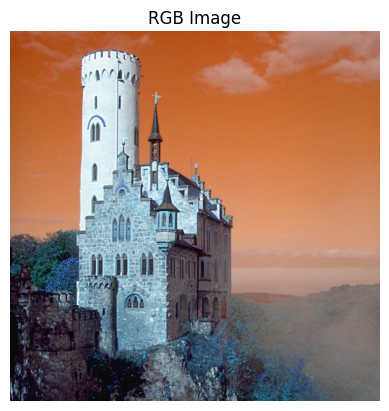

In [ ]:
# Convert BGR→RGB for correct display
img_bgr=np.array(img)
img_rgb= cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

#RGB display
plt.imshow(img_rgb)
plt.title("RGB Image")
plt.axis("off")

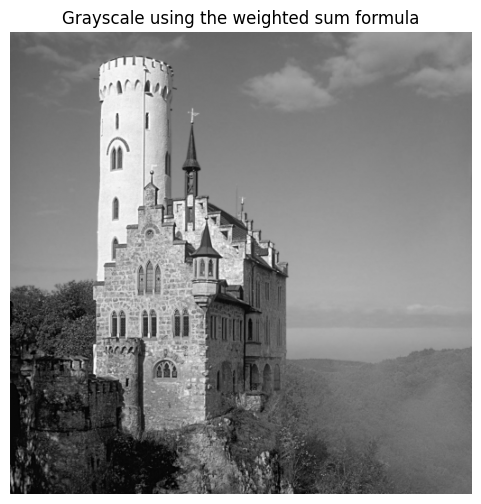

In [ ]:
#Conversion to Grayscale
img_gray= (0.299 * img_rgb[:,:,0] +
               0.587 * img_rgb[:,:,1] +
               0.114 * img_rgb[:,:,2])
plt.figure(figsize=(6,6))
plt.imshow(img_gray,cmap="gray")
plt.title("Grayscale using the weighted sum formula")
plt.axis("off")
plt.show()

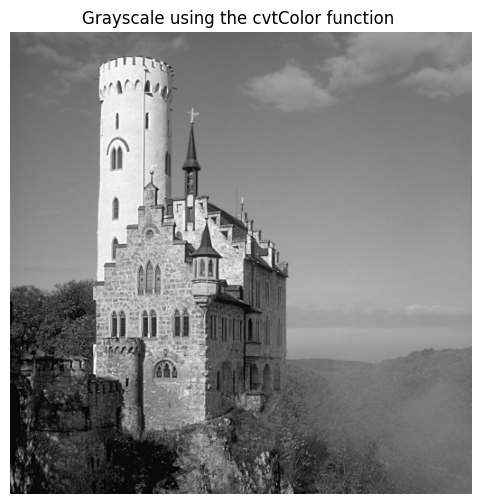

In [ ]:
#Converting to Grayscale using cvtColor Function
cv_gray= cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(cv_gray, cmap="gray")
plt.title("Grayscale using the cvtColor function ")
plt.axis("off")
plt.show()

In [ ]:
# Printing array shapes of images
print("RGB image shape:",img_rgb.shape)
print("Grayscale shape:",img_gray.shape)

# Printing a few pixel values of both
print("RGB pixel:",img_rgb[10,10])
print("Grayscale pixel:",cv_gray[10,10])


RGB image shape: (512, 512, 3)
Grayscale shape: (512, 512)
RGB pixel: [166  74  26]
Grayscale pixel: 96


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.
# B1. Computing the FFT of the grayscale image
import numpy as np
gray_float=cv_gray.astype(np.float32)

fft=np.fft.fft2(gray_float)
fshift=np.fft.fftshift(fft)

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

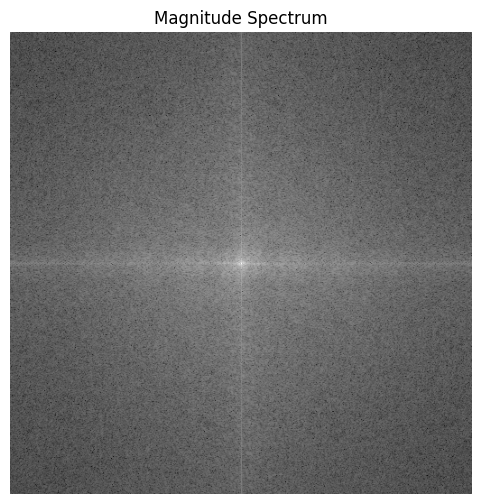

In [ ]:
# B2. Computing magnitude, phase and display Magnitude Spectrum
magnitude= np.abs(fshift)
phase= np.angle(fshift)

# Computing magnitude spectrum
spec_magnitude= 20* np.log(magnitude+1)
plt.figure(figsize=(6,6))
plt.imshow(spec_magnitude, cmap="gray")
plt.title("Magnitude Spectrum")
plt.axis("off")

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

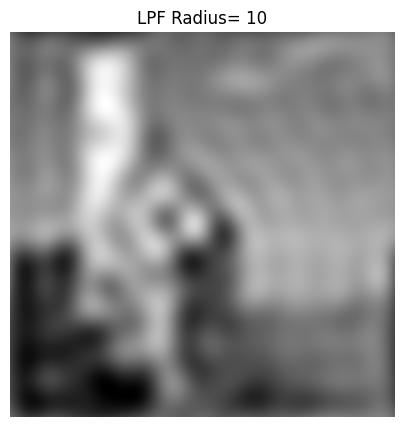

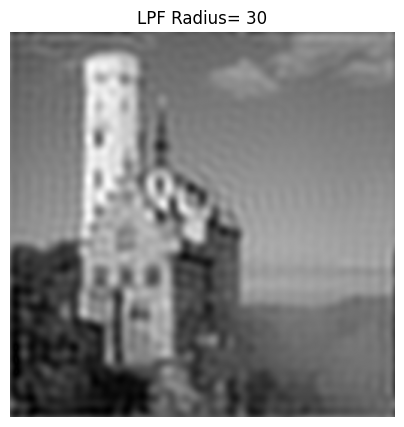

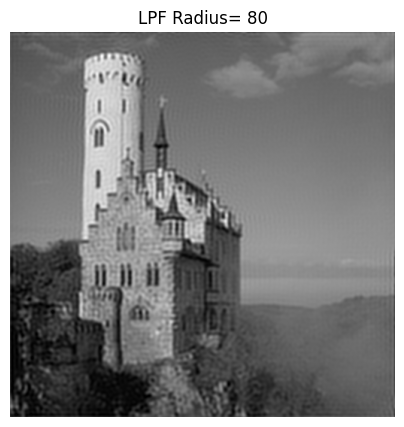

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.
rows,cols= cv_gray.shape
crow,ccol= rows//2,cols//2
radii=[10,30,80]
def apply_mask_and_reconstruct(fshift, mask, title):
    # Apply mask
    fshift_masked = fshift * mask

    # Reconstruct
    f_ishift = np.fft.ifftshift(fshift_masked)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    return img_back

for r in radii:
  mask= np.zeros((rows,cols),np.uint8)
  cv2.circle(mask,(crow,ccol),r,1,-1)
  lpf_result= apply_mask_and_reconstruct(fshift, mask, f"LPF Radius {r}")

  plt.figure(figsize=(5,5))
  plt.imshow(lpf_result, cmap="gray")
  plt.title(f"LPF Radius= {r}")
  plt.axis("off")

  # Smaller radius filter removes high-frequency components and keeps low-frequency components
  # Hence blur levels increases as radius decreases

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

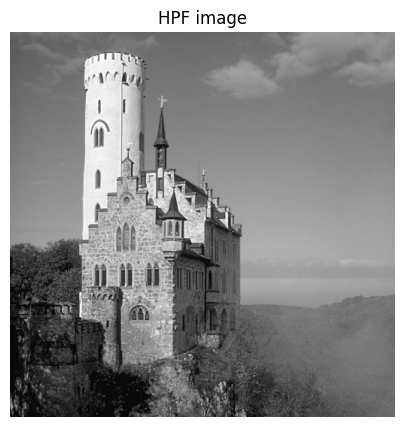

In [ ]:
# C2. Creating HPF mask

mask_hpf= np.ones((rows,cols),np.uint8)
cv2.circle(mask_hpf,(crow,ccol),r,1,-1)
result_hpf = apply_mask_and_reconstruct(fshift, mask_hpf, "HPF Radius 30")
plt.figure(figsize=(5,5))
plt.imshow(result_hpf, cmap="gray")
plt.title("HPF image")
plt.axis("off")

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

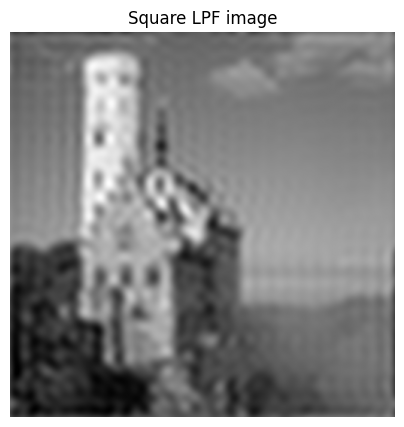

In [ ]:
# C3. Creating a square LPF mask
mask_square= np.zeros((rows,cols),np.uint8)
side= 50
half= side//2
mask_square[crow-half:crow+half, ccol-half:ccol+half]=1

result_square= apply_mask_and_reconstruct(fshift, mask_square, "Square LPF")

plt.figure(figsize=(5,5))
plt.imshow(result_square,cmap="gray")
plt.title("Square LPF image")
plt.axis("off")

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

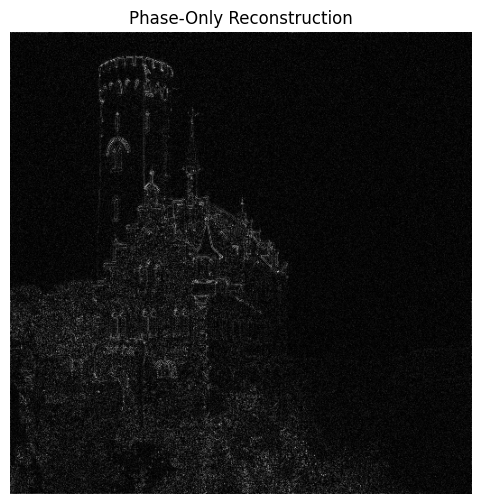

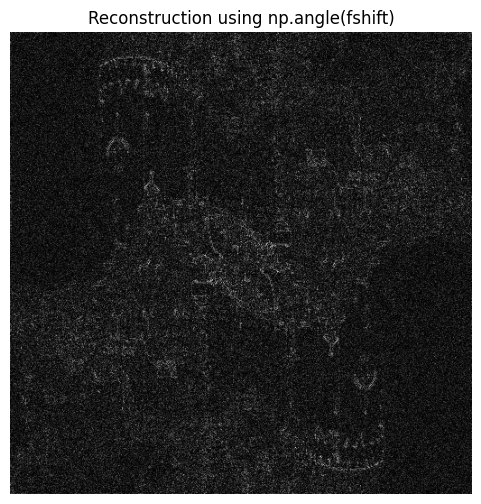

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.
# D1. Phase-only Reconstruction
phase_only = fshift / np.abs(fshift)
f_ishift_phase_only= np.fft.ifftshift(phase_only)
result_phase_only = np.fft.ifft2(f_ishift_phase_only)
result_phase_only = np.abs(result_phase_only)

plt.figure(figsize=(6,6))
plt.imshow(result_phase_only,cmap="gray")
plt.title("Phase-Only Reconstruction")
plt.axis("off")


# Angle Renconstruction
phase= np.angle(fshift)
f_ishift_phase= np.fft.ifftshift(phase)
IMG_PHASE= np.fft.ifft2(f_ishift_phase)
IMG_PHASE= np.abs(IMG_PHASE)

plt.figure(figsize=(6,6))
plt.imshow(IMG_PHASE, cmap="gray")
plt.title("Reconstruction using np.angle(fshift)")
plt.axis("off")

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

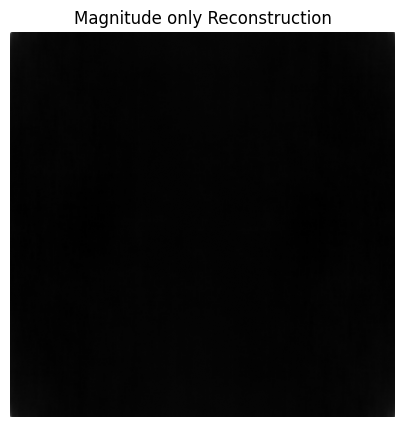

In [ ]:
# D2. Magnitude-only Reconstruction
Magnitude = np.abs(fshift)

# Reconstruct and display
f_ishift_mag_only = np.fft.ifftshift(Magnitude)
IMG_MAGNITUDE= np.fft.ifft2(f_ishift_mag_only)
IMG_MAGNITUDE= np.abs(IMG_MAGNITUDE)
plt.figure(figsize=(5,5))
plt.imshow(IMG_MAGNITUDE,cmap="gray")
plt.title("Magnitude only Reconstruction")
plt.axis("off")


## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

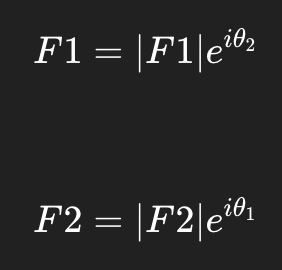

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.
